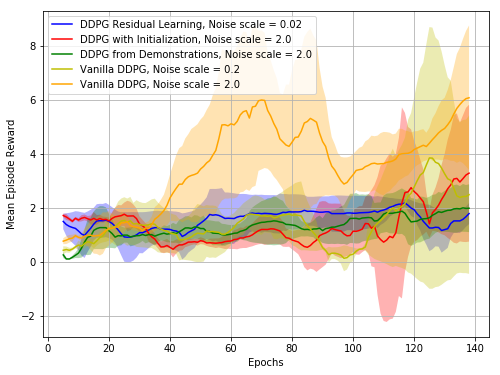

In [54]:

# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
#data without fine-tune, leakyrelu output
# y11 = [1.2270286, 1.188599, 1.4093715, 1.1448311, 1.869919, 1.0729779, 2.2899144, 1.8347906, 1.224232, 1.22981, 1.7138449, 1.468989, 1.240491, 1.3409908, 3.6249356, 2.1010642, 1.8601989, 1.5468388, 1.5721385, 1.359151, 1.166385, 1.3951632, 2.7279093, 1.4102298, 1.5536739, 2.5771146, 1.2453989, 1.1760714, 1.6259867, 1.1583065, 1.055281, 1.2415613, 0.9949365, 1.118509, -3.5507, 0.7063327, 1.0630662, 0.89473885, -0.77581793, 1.1501216, -0.8696952, 0.5600226, 0.4740542, 0.51551974, 0.48051363, 0.64867413, 0.73812956, 1.093685, 1.7125355, 2.7768168, 1.2100468, 1.4773401, -0.5606718, 1.1506466, 0.70382774, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, -1.4955903, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, -1.5539712, 0.5360711, 0.5669033, 0.7507744, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 0.6547531, 0.72899616, -0.8543293, 0.58015287, -0.0987112, 0.6121197, -0.98975116, 0.24522328, 0.5916195, 0.5823496, 0.6873401, 0.588943, -1.5549958, 1.5867382, 1.5867382, 1.5867382, 0.7982356, 1.937486, -1.5602539, 0.5867327, 0.6882412, 0.8813764, -0.849076, 1.5867382, 1.5867382, 0.699431, 1.5867382] 
# y12=[2.1640575, 0.88905555, 1.2307312, 1.5322931, 1.285498, 1.3271334, 2.0807283, 1.3980484, 1.5251253, 1.2367336, 1.1581103, 3.2563493, 1.0585451, 1.3245735, 1.2705339, 1.9776946, 2.0279555, 2.1248512, 1.2216669, 2.224812, 1.4061835, 1.0817946, 1.2869083, 1.2353905, 1.7896421, 1.8579472, 2.7054532, 1.4535106, 1.1447213, 1.8797826, 1.495764, 1.4249376, 1.0204531, -0.009031569, -0.39865535, 0.96509707, 0.58352077, 0.9715537, -0.03630864, -0.13758196, 0.66196984, 0.73137885, 0.97715473, 0.90863883, 1.1215271, 0.73094624, 1.2497472, 0.13120048, 0.93569386, 0.9942295, 1.1573795, 1.3758271, 1.4323618, 1.469484, 2.5226293, 1.5149052, 0.89090735, 0.5839318, 0.8347087, 0.5693639, 0.6950409, 0.6114513, 0.16743311, 0.28263208, 0.077305354, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 0.7429845, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382, 1.5867382]
# y13 = [1.59604, 1.4170481, 0.9156775, 1.9105917, 2.752623, 1.4406482, 1.1892108, 1.2603015, 2.467022, 2.6681638, 1.1657012, 1.4626528, 1.5143585, 1.3544644, 2.0026925, 1.2539283, 2.253171, 2.6076393, 1.3576611, 2.7492735, 2.2737567, 1.7234786, 2.0991542, 1.6756, 1.3821837, 1.3885359, 2.266764, 2.3176732, 1.3409607, 1.24971, 1.3021576, 1.415817, 1.4044248, 1.1504796, 1.0769063, -0.08201541, 0.9790402, 0.5390189, -0.11173092, 0.8779636, 0.5114955, 0.5236455, -0.19580667, 0.5418115, 1.7727783, 0.2885232, 0.55698806, 0.34472233, 0.09166239, 0.17477746, 0.07603804, 1.0423802, -0.23790121, -0.86381567, -2.937754, 0.5289493, -0.6586526, 0.92669976, 0.9463355, 0.1619748, 0.21284461, -0.76533216, -0.8412183, 0.5335169, 0.4763329, 0.6698951, 1.276925, 0.96982616, 0.9255102, 1.3128365, 0.5149266, 0.21938312, 1.1936302, 1.0624185, 0.56567675, 0.5347828, 0.5081689, 0.5337714, 0.5240482, 0.52328855, 0.51160103, 0.5041383, 0.5049956, 0.502557, 0.53694046, 0.5538277, 0.551319, 0.53598917, 0.54526937, 0.5367173, 0.508423, 0.5046035, 0.50688225, 0.50159645, 0.5064421, 0.5133158, 0.52642816, 0.51699287, 0.5091352, 0.50486887, 0.5118581, 0.51257133, 0.528338, 0.52805847, 0.52606004, -0.17680253, -0.17785761, 0.5290058, 0.53835946, 0.52971274, -0.17327087, -0.16428351, -0.16566375, 0.54946107, -0.16903178, -0.17235449, -0.15102853, 0.54222524, 0.5318295, 0.58778894, -0.18309116, 0.551737, 0.52331537, -0.17516224, -0.17187783, 0.5266959, 0.5112228, 0.5371232, 0.68866986, 1.1628433, 0.97522867, 0.25947902, 1.4305195, 1.6624248, 1.6024076, 1.3666264, -0.6167774, 1.3279696, 1.9403894, 1.8234653, 0.74769115, 3.0993161]
#data with fine-tune, small residual action value range, leakyrelu6 output
y11=[1.6517855, 1.5246952, 1.5292429, 1.5004895, 1.8573496, 2.4393687, 1.07833, -0.7581381, -0.1737254, -0.82549185, 0.6684113, 0.6751378, 0.6725911, 0.6815416, 0.68201417, 0.67331904, 0.67095435, 0.6775435, 0.6749312, 0.67806447, 0.6767979, 0.67877007, 0.6772157, 0.68303823, 0.6995502, 0.7116763, 0.7013355, 0.7000118, 0.7115655, 0.70551723, 0.7268098, 0.7281723, 0.71217006, 0.7194944, 0.7383646, 0.75581753, 0.7886921, 1.3548361, 1.3760188, 0.8657586, 0.49846348, 0.7795034, 0.8779176, 0.6521811, 0.25355104, 0.26423436, 0.21070908, -2.0402482, 2.4186375, 2.3219323, 2.3248057, 2.4180892, 4.5751185, 2.3635688, 2.5983157, 2.6583748, 2.3502934, 2.3646004, 2.362282, 2.3670247, 2.4180489, 2.3678539, 2.370304, 2.4183128, 2.4185646, 2.4029121, 2.417617, 2.4183395, 2.469534, 2.4808576, 2.3672242, 2.4003282, 2.3803608, 2.3967245, 2.3244421, 2.3640418, 2.3676887, 2.3827384, 2.3598042, 3.2409267, 2.354769, 2.3765352, 2.355538, 2.3725169, 2.3673074, 2.3177686, 2.352175, 2.379308, 2.3671978, 2.3811476, 2.3806326, 2.4032054, 2.3580594, 2.3218906, 2.4032757, 2.3714178, 2.3768218, 2.3165658, 2.41799, 2.3374627, 2.3703473, 2.380657, 2.369969, 2.3382142, 2.369933, 2.3707755, 2.353742, 2.370708, 2.3667111, 2.3754573, 2.4181736, 2.376816, 2.3506882, 2.3713062, 2.368008, 2.3808362, 2.4028919, 2.35164, 2.3671658, 2.3378577, 2.350992, 2.3687706, 1.4713461, 1.3835509, 1.1503466, 1.2529005, 1.1773243, 1.1582617, 1.5047339, 1.0672914, 1.3395029, 1.3027782, 0.8773863, 0.85242593, 0.83464557, 2.3078523, 1.472563, 0.33592734, 0.55969983, 2.442223, 1.3911312, 1.0452354]
y12=[1.5589902, 1.6614053, 1.5775337, 1.4971272, 1.8516443, 1.9918357, 1.540178, 0.88602245, 0.5466559, 0.47085932, -0.011207206, 0.8047476, 0.80912864, 0.08531509, 0.7910667, 0.58176345, 3.1392674, 3.1308541, 3.1284726, 3.1414678, 1.0204935, 0.7849435, 0.8092011, -0.6599841, -1.3606535, 0.21718194, -0.633108, -0.63013256, -0.07047547, 0.7628332, 0.8176123, 1.479396, 0.79713136, 0.8904462, 0.12824443, 0.675795, 0.77983177, 0.7009665, 0.88540655, 0.7281261, 0.039238606, 0.7086433, 0.7847796, -0.03370125, 0.0738304, 0.7833867, 0.6711172, 0.08872093, 0.73216957, 0.66948414, 0.74524033, 0.8113132, 0.01908912, 0.04862036, 0.7893094, 0.85161936, -0.53321046, 0.12303441, 1.0146691, 0.071466275, -0.5739218, 0.57636315, 0.22053911, 0.86104137, 0.8956799, 0.853779, 0.90662354, 0.94568074, 1.0235194, 1.0333129, 1.1328335, -0.32530314, 1.1851319, 0.519207, 1.2779361, 0.7832381, 0.8439955, 0.5837597, 0.98618233, 1.026088, 0.932137, 0.9512816, 1.3126854, 1.0545985, 0.8780328, 0.8713506, 0.89037484, 2.3401067, 0.87672013, 1.0449464, 0.8746404, 0.8839985, 0.5595219, 0.92195636, 1.1639538, 0.88541573, 0.52470684, 0.8712823, 0.90060097, 0.9026186, 1.0194541, 1.1176289, 0.93040895, 0.8941354, 0.9149184, 0.9403924, 1.0329344, 1.0166247, 1.0729841, 1.5049922, 1.992735, -0.23386054, 2.2573693, 1.6740211, 2.0258102, 2.7097816, 1.8170135, 2.5356164, 2.2823017, 2.2516568, 0.9977526, -0.107166685, -0.17640238, 1.3573858, -0.16202833, -0.2248331, -0.7158613, 0.18359838, -0.27908817, 2.2349336, 1.6421517, -0.25798243, -1.1079743, 1.0033467, 1.1180395, 3.5007622, 2.4164631, 0.9027053, 2.751725, 2.125927, 2.3093705, 1.8061198]
y13=[1.7257689, 1.4632857, 1.6611093, 1.5491649, 1.8735799, 2.1496806, 2.1544392, 2.1551936, 2.154762, 2.1764245, 2.1689804, 2.1486473, 2.1497467, 2.1718252, 2.1481433, 2.1513183, 2.1736972, 2.1548119, 2.155977, 2.1573584, 2.176319, 2.1309981, 2.1354005, 2.1567538, 2.188976, 2.1731536, 2.1484246, 2.1303077, 2.1720088, 2.1290567, 2.1501842, 2.1510062, 2.1274207, 2.1499908, 2.1721292, 2.147023, 2.1518693, 2.1761196, 2.1545284, 2.1733394, 2.1531816, 2.1504617, 2.1681545, 2.1524823, 2.131122, 2.1748574, 2.1530597, 2.145924, 2.1925833, 2.154154, 2.1749215, 2.1509397, 2.1513197, 2.1526992, 2.1714716, 2.1582563, 2.1520789, 2.1452067, 2.1718864, 2.1515796, 2.1689668, 2.152904, 2.168344, 2.1704981, 2.1556416, 2.1538749, 2.1513324, 2.1503844, 2.146903, 2.1509929, 2.131452, 2.151222, 2.1726518, 2.1711292, 2.1512363, 2.1498218, 2.164271, 2.1743932, 2.1715124, 2.1555583, 2.1734462, 2.1734183, 2.1736138, 2.1471999, 2.1282434, 2.150898, 2.1683202, 2.1516588, 2.1466796, 2.1351526, 2.1424541, 2.1546185, 2.1593437, 2.1666644, 2.172475, 2.147268, 2.1499078, 2.199167, 2.1512392, 2.1727145, 2.169497, 2.1746519, 2.1666808, 2.1732447, 2.152878, 2.1468503, 2.1673691, 2.1506598, 2.1467032, 2.177999, 2.1694825, 2.1762633, 2.172357, 2.1474907, 2.1488252, 2.151855, 2.1726174, 2.1314662, 2.1745632, 2.129229, 2.1405509, 2.13145, 2.1565938, 2.1722436, 2.1577363, 2.1548843, 2.171198, 2.1777844, 2.1546574, 2.1538405, 2.1506085, 2.1529503, 2.1693885, 2.1279426, 2.13347, 2.131509, 2.1528983, 2.1716177, 2.1313217, 2.1510658, 2.1560328, 2.1741064]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[0.9657661, 3.160114, 2.2232137, 0.970043, 3.310913, 0.34765646, 0.8687236, 1.1216938, 3.0420341, 1.1166723, 0.97994435, 1.9844325, 2.4865649, 1.3108834, 1.2107451, 1.8018402, 1.5089207, 0.8589243, 1.4462899, 0.81569296, 1.367059, 2.8469653, 2.836452, 1.7789522, 4.009076, 3.4627366, 2.0169456, 1.2210982, 1.8900969, 2.1025302, 2.3512104, 1.3238957, 0.2391475, 1.4438587, 1.9230446, 1.082915, 0.91098773, 0.25721797, 0.78574216, 0.6142468, 0.034380097, 0.95498306, 0.93540376, 1.0894637, 1.0327255, 1.3536232, 1.083315, 0.9734282, 0.20221509, 0.61362773, 0.5997738, 0.59458876, 0.5284974, 0.5094758, 0.5011629, 0.47902444, 0.47865587, 0.43725362, 0.44375655, 0.43331876, 0.43856794, 0.4392655, 0.43505573, 0.43667334, 0.45465335, 0.45214272, 0.45702595, 0.50642985, 0.49225172, 0.44583392, 0.4624121, 0.4671275, 0.46198884, 0.5102557, -0.05273951, 0.6319539, 0.610004, 0.6141509, 0.6265512, 0.4867935, 0.47630742, 0.4694927, 0.65561575, -0.79973936, 0.63137573, 0.6224391, 0.6187828, -0.07151172, 0.6269865, -0.07209933, 0.664176, -0.119742915, 0.6513154, 0.5941283, 0.6654749, 0.60657656, 0.6429477, 0.6271525, -0.08901942, 0.64250517, -0.04696087, 0.7577363, 1.3283271, 3.2675974, -0.81738406, 0.77926964, 0.5472422, 0.6478756, -1.6946458, -6.9773283, 0.37637445, -11.337924, -4.855335, -4.134634, 0.40042666, 1.1729382, 1.1236651, 1.5380133, 1.6080167, 1.6373051, 1.8522235, 2.3832307, 2.2440858, 1.9482621, 1.7491544, 2.3673484, 2.2703004, 2.0852754, 2.0602992, 1.9140527, 1.8454838, 1.931909, 1.844372, 2.0479963, 1.9497372, 1.7860106, 1.9563634, 1.9479625, 2.3229506, 2.4832642, 2.5638366, 2.5809567]
y22=[2.155468, 1.1800228, 2.8712506, 0.8283667, 1.720759, 1.5097586, 1.0800008, 1.8314333, 1.5035417, 1.1589804, 1.3471134, 1.8802854, 2.0773149, 1.5875434, 1.1966449, 1.0192398, 1.4578745, 0.95339054, 1.0430502, 1.290471, 4.2690654, 0.8703003, 0.99498904, 0.9965566, 1.3015188, 1.2757586, 0.88340133, 1.0204395, 1.1362078, 1.4651154, 1.0870558, 1.6909684, 0.47590902, 0.95230496, 0.9037506, 0.98785144, -0.10357039, -0.11035739, 0.5957584, -0.81785214, -0.025783377, 0.473318, 0.5227703, 0.51126593, -0.5988164, 1.2511343, 1.3077723, 1.0235595, 1.261713, 1.1172681, 0.31650445, 1.0466665, 1.0359674, 0.39235878, 0.6751638, 0.4361472, 0.91439444, 0.15343453, 0.86039, 1.109606, 0.75882167, 0.8625091, 0.73056537, 0.6652619, 0.7791057, 0.8373788, 1.0276201, 0.99302566, 1.2621332, 1.5597762, 1.7792407, 2.2334588, 1.8803349, 1.2744226, 1.1404065, 1.1438115, 1.0266105, 1.0186875, 0.9504462, 0.9589514, -0.45064664, 1.0229641, 1.0000795, 0.23225747, -0.45289293, -0.427382, -1.94879, -1.9717723, -0.56682414, 0.9007689, 0.9785854, 0.9412338, 0.9188636, 0.8641873, 0.8290251, 0.8605693, 0.85321754, -2.0174708, 0.18256576, 0.207294, 0.8271137, 0.84547955, 0.84135973, 0.8243578, 0.78902185, 0.7934456, -0.5568268, 1.5462824, 1.0126693, 1.5603932, 1.2561597, 1.13526, 1.0752094, 1.0356959, 1.0710447, 1.0328863, 0.9515823, 0.91676366, 0.9278698, 0.8642408, 0.87094873, 0.8747689, 0.82224447, 0.90233886, 0.89369076, 0.8785757, 0.8308756, 0.93334955, 1.0110427, 0.9363838, 0.963975, 0.9054843, 0.9358533, 0.95039517, 0.941213, 0.8658305, 0.917099, 0.89260715, 0.8945478, 0.81044465, 0.9361624, 0.875885]
y23=[1.4744865, 2.4044921, 2.28326, 1.3671113, 1.1960105, 2.3145983, 1.4252732, 2.442582, 0.92330205, 0.925078, 2.3392718, 1.2909952, 1.5362937, 1.5981462, 3.5698755, 1.362377, 1.088676, 2.4366577, 2.30293, 1.0921549, 0.87483805, 1.2481319, 0.97407436, 1.5756599, 1.4010423, 0.9493302, 1.9702463, 3.103931, 1.6210155, 1.1101544, 1.5571833, 1.8667432, 0.9839781, -1.1508849, 1.0343624, 0.25404882, -0.49424604, 1.0468748, 1.079029, 1.0545193, 1.105867, 0.49605104, 1.0139331, 0.41105917, 0.00068761624, 0.36814433, 0.49307802, 0.49211985, 0.5675743, 1.0258461, 1.0316594, 1.1670681, -0.07350715, 1.0945059, 1.1239915, 0.34455046, 1.3096361, 1.2619065, 1.1655964, 0.7108486, 1.9383897, 1.1599468, 1.2498913, 1.4091377, 1.4101446, 1.7620214, 1.7100105, 0.9216967, 1.6083441, 1.6521423, 1.7508962, 1.9390708, 2.0416007, 2.1197083, 1.993415, 1.3493565, 1.4799377, 1.5580654, 1.1716245, 1.4561876, 1.4132073, -0.61751646, 1.6688784, 1.8861161, 1.9902152, 1.9161116, 1.9996107, 2.7499661, 2.0814087, 2.4278328, 2.25598, 4.729646, 4.2972555, 2.2751546, 1.7524034, 0.8758015, 2.127375, 2.3697884, 2.4804664, 2.3447134, 1.8220018, 2.3387077, 1.8647549, 3.4778268, 2.2296793, 2.8976345, 2.371863, 6.0095444, 3.6075256, 3.5246964, 4.388655, 4.4215918, 7.773899, 2.6962543, 5.0880666, 3.7956104, 4.860274, 5.347989, 11.391546, 17.674488, 1.8435342, 1.3842666, 0.7762837, -0.09678144, 0.57211053, -0.09658723, 0.9980126, 0.74845326, 5.0950856, 12.766643, 5.230068, 5.242025, 5.7249155, 5.1415744, 6.038881, 5.3001313, 6.815245, 5.9649596, 8.742984, 8.157609, 8.219132, 6.893795]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31 =[0.40289924, 0.41951784, 0.48066548, 0.51577014, -0.75790924, 1.1474186, 0.46885017, 0.5535549, 0.6080303, -2.8135073, 0.64774954, 0.8855233, 0.3690283, 0.7232632, 1.0384392, 1.0263308, 0.9994621, 1.0103898, 1.0166324, 1.00518, 1.0052067, 1.0001532, 1.0081652, 1.0023174, 1.0204984, 1.0004989, 1.0237985, 1.0244491, 1.0141205, 1.0115024, 1.021492, 1.00299, 1.0090836, 1.0029724, 1.0174471, 1.0089773, 1.0055212, 1.0201256, 1.0078881, 1.0002426, 0.98225516, 1.0179789, 0.9917202, 1.0127698, 1.0166295, 1.0043342, 1.0061934, 0.9920553, 1.0028447, 0.99410254, 1.0134627, 1.0153023, 0.99199855, 1.0086906, 1.0036747, 1.002178, 1.0061756, 0.99144226, 0.9914612, 1.0025485, 1.026766, 1.0184128, 1.000158, 1.007996, 1.0115579, 1.017462, 1.0121565, 1.0082899, 1.0143191, 1.0183342, 1.0175785, 0.9988069, 1.0028998, 1.0124056, 1.0160089, 0.9964076, 1.008918, 1.0014467, 0.9894266, 1.0105946, 0.99890804, 1.05003, 1.0096891, 1.0150592, 1.0159346, 1.0237943, 1.0111204, 1.0052348, 1.0194397, 1.0103017, 1.0001763, 1.0145111, 1.0078909, 1.0157207, 1.0191411, 1.0020614, 1.0019448, 1.0069042, 1.0226061, 0.9965997, 1.0103749, 1.0288306, 1.0097564, 0.99431187, 1.0070513, 1.0084182, 0.993025, 1.0094386, 0.99969226, 1.0165309, 0.99246436, 0.9885758, 1.0177087, 0.9948424, 1.0014522, 1.0007707, 1.0255724, 1.0089588, 1.0306247, 1.009528, 1.0094004, 0.99345154, 1.010462, 1.0052705, 1.0133622, 0.99501604, 0.99231756, 1.0026342, 0.98819834, 1.0061809, 1.000603, 1.0174129, 1.0265236, 1.0328149, 1.0280133, 0.9870281, 1.0027341, 1.0095793, 1.0046893, 1.0245123, 1.005428, 1.0097007]
y32=[0.40031818, 0.44039115, -0.1963271, 0.1976719, 0.7659387, -0.27563062, -1.1275713, 0.2996631, 0.9747978, 0.25404906, 0.23862515, 0.99119717, 0.18966757, -0.38967684, 0.8999549, 0.9782589, 0.50100094, 0.97395104, 0.3206608, 0.29975632, 1.0418111, -0.34080067, -0.08426399, 0.5440009, 0.57347983, 0.053949058, 2.131454, 0.46079636, 1.4820167, 1.038489, -2.0013633, 0.26302686, 1.1132407, 1.087874, 1.0039979, 1.0570998, 1.0393775, 1.1115997, -0.13496085, -0.3916955, 0.9662712, 0.98358315, 0.48488995, 0.99399996, 0.97146165, 1.0001309, 0.9982926, 0.940515, 0.8954801, 0.9235062, 0.9997158, 1.0265455, 0.9768014, 0.26838174, 0.17554508, 0.19600739, 0.84582484, -0.42039967, 0.96851057, 0.8670928, 0.82883483, 0.82378244, 0.8662632, 0.8061571, 0.8760641, 0.861715, 0.79667336, 0.76039314, 0.8624102, 0.8020773, 0.8289432, 0.8416967, 0.8422557, 0.80659497, 0.6295128, 0.61525977, 0.7425162, 0.8400907, 0.8718179, 0.8671022, 0.94417864, 0.9502372, 2.1822944, 0.9615302, 0.9373473, 0.879015, 0.9267721, 0.6180526, 0.98714775, 0.6228032, 0.91415066, 0.72485256, 0.933712, -0.33032134, 0.88814765, 0.8572485, 0.86424774, 0.90892714, 0.9062868, 0.90190464, 0.91806835, 0.9735113, 1.161744, 0.8797975, 0.67942566, 0.8091992, 1.9138867, 1.3869932, 0.9588744, 1.3751976, 0.6592503, 1.4391944, 4.4862223, 1.8779081, 1.5463352, 0.8853723, 1.3532181, 1.1193552, 0.87279224, 1.066911, -0.41910094, -0.35464975, 0.4302046, 2.2174413, 1.8096125, 1.7973459, 1.9506315, 1.6807336, 1.5843296, 1.6815208, 1.6616575, 1.7757176, 1.7696463, 2.1022663, 1.8414568, 1.7376709, 1.6962681, 1.6467851, 2.2310648, 1.7942469, 1.6149362, 1.638444]
y33=[0.39862517, 0.44045138, 0.4591794, -0.6008841, -0.30792594, 0.32770076, 0.2576107, 0.39808297, 0.42023638, -0.2651268, 0.35548323, 0.5861543, 1.5676601, 1.5502383, 4.215115, 3.79499, 4.4826574, 1.0661108, 1.6731193, 1.700416, 1.3971837, 1.3961515, 0.9705737, 1.4010164, 1.5600759, 1.2856745, 1.3629141, 1.3259493, 1.2785807, 1.378085, 1.2909311, 1.2896222, 1.3100736, 1.2383882, 1.3373033, 1.5179977, 1.6244289, 1.5888647, 1.0541786, 0.93153393, 1.6089456, 2.2059958, 0.8710326, 1.8551475, 2.4085987, 0.92089736, 3.5400124, 1.7241412, 1.7114918, 1.7127379, 1.6186651, 1.7970324, 1.686611, 1.7675893, 1.7135345, 1.5278772, 1.7003828, 1.432742, 1.4795715, 1.5878669, 0.7417179, 1.5116285, 1.5288328, 1.6207292, 1.6962578, 1.9382789, 1.8114384, 2.481638, 2.7756782, 3.5175686, 3.1576307, 2.5278127, 2.4492676, 2.538486, 2.3669567, 2.5714858, 2.6561544, 3.4375749, 3.1502566, 2.281673, 1.9034282, 0.43890303, 0.9608446, 1.5742999, 1.8448662, 1.0406163, 1.5933129, 2.4969258, 2.3032215, 1.7531899, 1.3835942, 2.486048, 2.3159826, 0.7082971, 3.0114098, 2.231296, 3.1877215, 2.4449668, 2.4030964, 2.2713726, 3.0229423, 4.6620965, 2.9201045, 3.0715535, 2.501617, 2.5312426, 2.4504914, 2.1969364, 2.499865, 2.2302678, 1.7597082, 3.110833, 2.225513, 5.0405803, 3.1368637, 2.909654, 2.3678386, 2.9800715, 3.1500587, 2.3143654, 2.8059986, 2.374983, 2.516191, 2.8976064, 2.393172, 3.6053386, 2.740385, 2.6314318, 2.6606941, 3.1659524, 2.0082624, 3.0816097, 2.6311185, 3.1931682, 4.485295, 3.1313107, 3.908168, 2.8896384, 2.3170419, 2.8684223, 2.6763778, 2.9907234]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2.0
y51=[0.41281152, 0.4439606, 1.0728129, 1.133481, 1.1263851, 0.2852586, 1.1178493, 1.0270216, 1.2123392, 1.0201907, 1.0579022, 1.3908514, 1.418561, -0.81513685, -0.41627458, 0.4732125, 0.2140673, -0.08331325, -0.13516855, 0.8786898, 0.3625957, 1.0650508, 1.3720104, 0.25798267, 0.9331727, 1.5908982, 0.37085548, 1.0508261, 1.9695848, 2.0703166, 0.9969191, 0.9959875, 1.6695262, 1.1455578, 0.7248, 2.8812122, 1.7061375, 2.420769, 4.049318, 1.1198108, 1.3667114, 1.6855562, 3.1530228, 2.0960271, 2.0377066, 1.5257227, 2.2290797, 1.1873529, 0.76810783, 1.0888498, -0.938467, 0.8731784, 0.99703515, 1.6895303, 1.2043928, 1.2585106, 0.6643004, 0.60735387, 1.5953608, 0.999014, 1.0878414, 1.8448372, 1.9846766, 1.1597677, 1.7782867, 1.1298816, 1.1023086, 1.4183172, 1.9696075, 1.5615844, 2.4079592, 3.041502, 7.2899284, 2.0133064, 1.6770765, 1.7034842, 0.80863047, 0.6808135, 0.70346355, 1.5029408, 1.3286722, 0.5886007, 1.4905446, 0.8071519, 1.7461511, 1.5666664, 1.6489028, 0.94408023, 1.7037898, 1.8618289, 1.8213022, 2.0406415, 1.8396238, 2.3379972, 2.0198946, 2.4197745, 2.4757116, 2.7872546, 2.6237826, 2.7606964, 2.340395, 2.134867, 2.9756324, 3.008527, 2.6562772, 1.9209596, 1.7575451, 1.5529535, 2.0474946, 1.9063767, 2.6808, 2.2900808, 2.1467235, 1.9239323, 2.7911365, 2.4768734, 3.0373862, 3.1548889, 3.1859746, 3.380098, 3.283652, 2.8867946, 3.2945175, 4.319859, 3.601303, 3.6581006, 4.06559, 3.8995616, 4.221627, 3.2332876, 3.827028, 3.9598203, 4.2478213, 4.6567736, 4.467954, 4.246785, 5.1068616, 4.380647, 3.867443, 3.3164933, 3.5137405, 3.52997]
y52=[0.40723127, 0.43412217, 0.2978235, -0.42398658, 1.6265048, 1.1884936, 0.41644287, 0.3575166, 1.2580783, 0.3088139, 0.9640366, 0.919213, 1.5673274, 1.0003731, 0.27681598, 0.54726404, 0.3468717, 0.91830206, -0.42506266, 1.1375384, 1.4263667, 3.8105679, 1.7960976, 1.5271763, 1.985818, 1.5008303, 1.4635676, 1.8981138, 0.91327673, 0.982622, 1.2376379, 1.8317033, 1.2272538, 1.2850277, 0.4572706, 1.5797415, 1.6146357, 3.920334, 4.4918485, 2.7071145, 3.9849904, 3.7007244, 4.6045685, 4.809051, 5.998592, 5.7295594, 6.817599, 5.659091, 5.514411, 5.473606, 5.4091825, 4.384957, 4.784764, 5.8081856, 5.162174, 4.0057282, 4.8407207, 7.496266, 6.551449, 11.160782, 12.171571, 6.514858, 7.4737897, 6.4991784, 5.913312, 7.773719, 6.20241, 7.9338446, 6.3327627, 6.6776495, 9.855994, 5.0997086, 7.2202225, 7.513952, 8.270799, 4.780204, 5.37188, 3.4542696, 4.759445, 5.9680305, 3.9643455, 4.5602317, 4.909396, 4.454551, 4.834529, 3.940264, 4.46331, 8.363935, 4.448853, 5.843276, 4.5830417, 4.0718513, 4.960804, 4.336564, 3.74553, 4.3033032, 4.3887315, 4.2193236, 4.0292573, 4.344924, 4.0944896, 4.853368, 4.2278566, 4.344662, 4.838088, 5.7085853, 4.2322044, 5.114764, 3.5641806, 5.0209837, 4.341558, 5.151742, 5.3878045, 4.3646917, 4.6441464, 4.285646, 4.270924, 4.135207, 4.913564, 3.983071, 4.7743897, 4.150242, 5.6803, 4.534372, 4.2638016, 4.1470985, 4.404532, 3.8277898, 4.2272015, 3.9221292, 4.2515993, 5.484755, 4.715281, 4.112328, 3.7323797, 4.4920526, 3.7583525, 4.2740316, 4.783812, 4.563294, 4.9022746, 3.845816]
y53=[0.42438275, 0.43226916, 1.3103235, 1.0429345, 0.8905097, 0.6998536, 1.0061328, 1.2378398, 0.43456215, 0.9598775, 0.6786438, 1.0105246, 1.1843861, 1.8327492, 1.5236026, 3.499958, 2.8850563, 2.2087183, 1.892819, 1.2391251, 1.632327, 1.7373213, 1.6115788, 1.6518342, 1.4204237, 1.6721907, 1.2675028, 2.5338883, 0.5753423, 1.3403769, 0.47793365, 0.88943183, -0.040172067, 1.1383588, 1.1222823, 1.2657553, 1.3776761, 1.1885248, 1.1877005, 1.2324663, 1.298692, 0.90045637, 1.0267408, 2.929838, 2.6200964, 1.9853104, 2.6356323, 2.9456947, 3.4142513, 2.8552806, 3.127573, 4.446384, 5.4379315, 7.2367587, 5.515438, 9.965094, 6.6421523, 6.8683143, 6.154268, 7.2063675, 10.181929, 3.0442731, 4.1956596, 6.2814856, 6.4178705, 6.6872067, 14.157773, 8.177553, 12.128608, 7.80193, 10.276038, 6.227276, 4.9133086, 5.3648214, 5.205425, 4.880118, 5.7561226, 8.902917, 4.78164, 5.453221, 6.0490384, 11.123034, 7.163462, 14.120965, 9.502001, 6.80012, 12.72193, 9.181357, 8.292215, 6.7475495, 8.078109, 5.465492, 1.6639366, 0.911417, 1.5702473, 0.6767432, 3.38216, 3.5981834, 2.206254, 2.2767432, 1.7732637, 3.058949, 4.499821, 3.6262436, 4.202417, 3.3626237, 5.1676407, 4.6816297, 5.003566, 3.0247629, 3.5104172, 3.4376893, 3.710216, 5.530213, 4.820136, 4.9324718, 4.96063, 5.184138, 6.303459, 4.016088, 3.041511, 4.4833517, 4.0213923, 5.9580817, 5.2352757, 5.8121915, 5.5576363, 5.3857827, 6.255285, 7.553603, 6.6846733, 7.055059, 8.366087, 6.259354, 9.111469, 9.6835575, 10.602214, 11.65893, 9.976485, 10.314072, 10.507383, 10.839518]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.02', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step3.pdf')


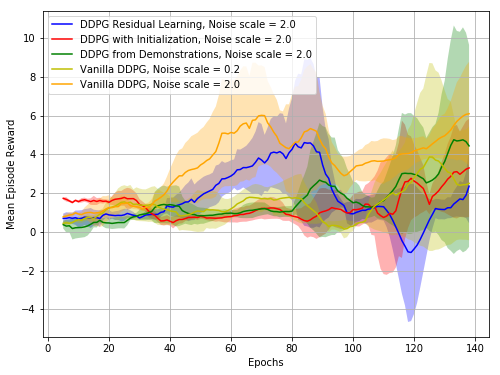

In [50]:

# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
y11 = [0.39936447, 0.38829717, 0.38704714, 0.5980386, 0.84159046, 0.88653934, 0.25081104, 0.95457685, 0.9401752, 0.8358926, 0.17757, 0.6545609, 0.99269855, 0.7608301, 1.2069019, 0.9005655, 0.88886344, 0.14078435, -0.22053984, 0.42809948, 1.5192926, 1.3590375, 1.3823574, 1.203746, 0.5006302, 1.2795461, 1.2670128, 0.64586437, 1.199098, 1.3106037, 0.72155815, -0.47289366, 1.3341389, -0.045105934, 2.2390847, 2.5517077, 0.9285046, 1.1359339, 1.0505561, 1.025622, 0.99918276, 0.7971419, 6.3338904, 2.4047406, 2.4211185, 2.4124694, 2.695616, 3.30944, 3.3186872, 2.8958127, 3.062832, 2.8345845, 3.30078, 2.775473, 2.5194392, 3.1650681, 3.0273511, 3.0396113, 3.6299927, 3.0745358, 3.2638066, 3.248984, 4.4928904, 5.1891313, 3.6539187, 9.944712, 3.1720564, 4.75943, 4.2822843, 6.0135584, 5.363534, 7.2136526, 11.304726, 2.871035, 3.7290738, 8.133848, 8.196994, 6.4067206, 5.913429, 7.972525, 7.7717066, 5.8755026, 11.610708, 9.904014, 18.371675, 13.648756, 6.198299, 14.726412, 7.7374825, 8.912521, 2.6613994, 4.0287566, 10.035516, 0.9974279, 1.2530888, 0.17526934, -0.6167808, -0.67028064, 0.92653525, -0.42621326, 0.6187876, -0.15098457, -0.1309586, 0.5848006, 0.63372624, 0.7956366, 0.5345662, -0.15212986, 0.5822622, 0.6781036, 1.0473441, 1.1560313, 0.24701616, 0.471085, -0.34240764, 0.14762262, 0.35418925, 0.54620475, 0.389123, 0.38193932, 0.27201328, 1.8577312, 0.6768669, 0.6211861, 0.5484942, 0.5394704, 0.5049344, 0.49534908, 0.49290738, 0.49121243, 0.47764206, 0.48448846, 0.46932417, 0.47835252, 0.5455774, 0.5365743, 0.52070564, 0.51061803, 0.5168718, 0.54906815, 0.59336513, -0.82588434, -0.058767114, -1.4660854, -2.173845, -2.8180416, -0.62908554, 0.8843759, -1.2862133, 0.9010744, 1.664027, -0.8557659, 0.18754794, 0.279114, 1.1149458, 1.1225641, 1.2270352, -0.43545207, 1.3922005, 1.1053936, -4.212471, -6.4008307, -5.67326, -2.855238, -2.1214945, 0.72836554, 0.72660106, 0.7464232, 0.7271763, 0.74926466, 0.7929198, 0.7876673, 0.7979272, 0.7732965, 0.83285826, 1.2687999, 1.3768047, 0.58132845, 1.3239816, 0.660608, 1.3969549, 0.70471966, 0.6913624, 0.72359496, 0.6918971, 0.76174784, 1.5461843, 0.91702306, 1.63986, 1.8885629, -0.8092822, -0.15181233, -0.1335633, -0.13946453, 0.57472724, 0.57977325, 0.56045496, 0.55332345, 0.49097273, 0.6679077, 1.0775898, 2.274887, 1.7506256, 1.7437704, 1.6605422, 1.7901775, 1.8475999, 2.1626174, 2.3399222, 2.60146, 2.9003148, 1.7126846, 3.1150453, 2.8386197, 2.191403, 1.4264443, 2.611737, 2.454677, 2.50691, 1.9012916, 1.9120752, 1.8913686, 1.8311007, 1.8282931, 1.940445, 1.9356087, 1.9426615, 1.0371083, 1.6899703, 2.0428042, 2.53943, 2.415053, 2.3559568, 1.6260812, 2.225374, 2.1272275, 2.0597637, 2.0336177, 1.9502877, 1.9148394, 2.0318048, 2.011137, 2.02989, 1.8839052, 2.0146239, 2.0073078, 2.0847547, 2.1504178, 2.1038852, 2.0208886, 2.1999247, 2.0980449, 2.221444, 2.0667207, 2.279876, 2.1110885, 2.0613966, 1.9879926, 2.1021771, 2.2169297, 2.1504183, 2.261007, 2.038395, 2.1646016, 2.08519, 2.2654305, 2.0455022, 2.6186929, 2.2122834, 2.163195, 2.2749243, 1.9756317, 2.1113856, 2.2593145, 2.5245857, 2.418541, 2.0972974, 2.1272676, 2.1056476, 2.4519436, 7.2675486, 3.9340591, 5.7157936, 3.7875214, 2.5484962, 2.0025096, 2.8411314, 0.81679726, 2.7728927, 2.8313267, 2.7953327, 2.8505728, 2.7650726, 5.1685615, 4.6952925, 3.3882241, 3.0364048, 3.694938, 3.5421023, 4.004588, 3.5751305, 9.601489, 2.6431236, 2.9554577, 2.5221088, 3.4782188, 3.1160703, 2.6101584, 2.8245213, 2.8205352, 3.1249025, 4.048453, 4.798282, 3.256679, 3.8871896, 0.9384755, 3.408899, 2.327679, 1.2529823, 5.9949417, 0.8760385, 0.7962098, 0.753301, 0.7950024, 0.7778103, 0.7787961, 0.7897832, 0.7423471, 0.73190737, 0.72993654, 0.768894, 0.6957194, 0.705635, 0.71859825, -0.004206453, 0.6923719, 0.7779204, 0.7451808, 0.7443902, 0.7685118, 0.76688254, 0.79182845, 0.7902394, 0.8489292, 0.8262175, 2.2241468, 0.8202929, 4.023617, 0.99359447, 0.8306899, 0.80617195, 0.78663546, 0.80343, 0.7906343, 0.7794234, 0.77887726, 0.788127, 0.7738529, 0.7800733, 0.77397865, 0.7750822, 0.77310884, 0.7653144, 0.7757621, 0.77215725, 0.7705465, 0.7717387, 0.76904917, 0.769287, 0.77421105, 0.77538806, 0.76602095, 0.7668657, 0.7621854, 0.75763285, 0.7654725, 0.75788766, 0.75926715, 0.7710317, 0.76283944, 0.7591978, 0.76858366, 0.7663298, 0.77078426, 0.7716202, 0.7825224, 0.7920486, 0.7967283, 0.81973565, 0.8441059, 0.8319348, 1.1967608, 3.186362, 4.5923, 3.4991353, 4.292317, 3.6680658, 3.7099545, 4.240316, 3.8917212, 4.211691, 3.9666035, 3.380706, 3.5732834, 3.3321512, 3.5690272, 3.183942, 3.5574381, 3.7804425, 3.542432, 3.9731908, 3.8675926, 4.02732, 3.846711, 4.7927275, 4.6908617, 4.3016386, 4.178824, 4.4932547, 4.0082335, 4.0546165, 4.49037, 4.498985, 4.998683, 4.78793, 5.1230655, 4.954769, 5.4507065, 4.919999, 5.2115784, 5.363122, 5.43535, 5.802667, 4.740131, 5.0387797, 5.325642, 4.7453613, 5.031787, 5.6043754, 4.2831635, 4.7473717, 5.9399076, 5.420268, 6.6926923, 4.8824615, 5.4055886, 5.282073, 5.4894776, 3.9552994, 5.081515, 5.720042, 6.389537, 7.000416, 6.62841, 2.820058, 0.09068214, 0.7382892, 2.1668174, 1.4215859, 3.4243894, 2.5015066, 2.7875826, 4.0542254, 5.848876, 2.7090566, 2.4789002, 3.4276335, 2.6838906, 2.7009254, 2.8390124, 5.469651, 3.1823936, 3.0473428, 6.3203187, 5.246103, 3.4268672]
y12 =[0.8344968, 1.2379998, 1.7808816, -0.040831465, 1.0869404, 1.2345821, 1.1591165, 0.97793645, 0.93309844, 1.4219536, 1.1351824, 1.537199, 1.1203225, 0.9864329, 1.306491, 1.6177809, 1.1871197, 1.6943115, 0.9492339, 0.7739929, 0.96263885, 1.3990606, 0.82105845, 1.2888582, 0.70884895, 1.3356895, 1.2348865, 0.8083555, 0.75353974, 1.4896805, 0.8811937, 1.0594143, -0.78766745, -1.2818755, 1.1631786, 0.98065156, 0.5564936, 0.91489273, 1.0654494, 1.1391628, 2.5015628, 1.0843347, 0.9145575, 1.177621, 1.5072072, 1.1065474, 0.37198573, 0.371196, 1.0585839, 0.5513852, 1.5204927, -0.553345, 1.3187937, 1.3940619, 1.2946913, 1.0325376, 1.0623071, 1.1640488, 0.4048774, 3.0199313, 2.5161784, 2.5907128, 1.9228966, 1.9499445, 3.0814095, -0.37025857, 1.9530581, 1.624733, 1.8538086, 2.0582159, 1.0718442, 1.4415601, 2.310213, 2.1763701, 2.466476, 2.9327385, 2.2909448, 2.289013, 2.0427043, 1.8650519, 1.7742269, 1.7216955, 1.723752, 1.6276758, 1.6804011, 1.5694021, 1.5516447, 1.5081087, 1.4615031, 1.4033443, 1.2916626, 1.2995611, 1.3108978, 1.2990305, 1.3353312, 1.161481, 1.1746424, 1.1627282, 1.1487578, 1.1288936, 1.112378, 1.1334478, 1.0847042, 1.0978222, 1.0805728, 1.0717559, 1.0460585, 1.0692536, 1.040658, 1.0192912, 0.9977079, 0.97880906, 0.96277326, 0.90880394, -3.4255626, -5.606045, -7.779424, -7.800091, -7.81688, -7.8170576, -5.6702685, -9.211164, 1.4167405, 0.6586195, 0.84796387, 0.9556261, 1.4105165, 1.4676465, 1.4875463, 2.0557663, 1.4606335, 0.18429647, 1.0999383, 0.7758698, 3.0936751, 1.7569106, 6.42133, 4.1031704, 5.897654, 0.710124, 6.753569, 14.936969, 6.685853, 9.223643, 6.537986, 11.305278, 8.524408, 8.964574, 11.654253, 6.3243375, 10.351624, 8.199789, 4.1964254, 5.1655893, 7.0564322, 15.750292, 11.480933, 22.166544, 7.692348, 5.735849, 0.67563385, 3.953687, 0.6108427, -0.63418096, 0.601947, 0.67392915, 0.665976, 0.65692604, 0.5604378, 3.1314273, 3.5978334, 4.584705, 3.7936985, 5.5267153, 4.7417254, 4.0390816, 3.6527317, 4.669207, 3.5636845, 5.7408056, 3.5212255, 3.443544, 6.6198683, 11.291595, 6.5130568, 6.677284, 13.781435, 7.173842, 6.375324, 15.8610325, 22.31106, 21.185303, 21.04762, 35.880455, 13.788678, 5.032653, 9.668045, 13.342557, 12.575874, 6.798621, 7.331285, 14.316317, 12.133126, 22.284842, 6.847692, 12.255694, 7.543305, 5.5950003, 7.929101, 5.652587, 5.212543, 4.952652, 14.100447, 6.2083845, 4.6406827, 6.4462247, 5.175682, 3.8564513, 2.693273, 2.209822, 2.0095146, 1.1047897, 1.8226528, 1.2102937, 1.127713, 0.9883653, -1.2446433, -2.7263558, -2.7244678, -4.131829, -1.2099688, -0.5228229, 0.9343526, 0.94521207, -0.46097085, 0.9441363, 0.9373105, 0.9376549, 0.9521762, 0.19239494, 0.9430076, -2.6759412, 0.15203288, -4.1702485, -4.2022557, -3.4997838, -0.69295967, 0.67776805, 0.64799273, 0.6294669, 0.6069849, 0.621559, 0.6264013, 0.65543765, 0.6417637, 0.6081781, 0.61952245, 0.6357509, 0.6377514, 0.63793105, 0.6297006, 0.6263663, 0.6137849, 0.59141773, 0.62154716, 0.62343675, 0.6243151, 0.6013996, 0.58653355, 0.548963, 0.54142493, 0.54572666, 0.5569741, 0.55577797, 0.5582183, 0.56133896, 0.5743632, 0.5859784, 0.5566855, 0.5611179, 0.63718146, 0.564339, 0.5408928, 0.59260184, 0.5336505, 0.5432356, 0.5312657, 0.53974193, 0.5734578, 0.5237604, 0.5366977, 0.5450796, 0.60824144, 0.54587156, -1.5357026, -2.9137385, -1.4894178, -0.8331923, -4.3370147, 0.5423884, 0.5446163, 0.5269494, 0.528788, 0.50066525, 0.4856837, 0.48407826, 0.49014315, 0.4949927, 0.46481588, 0.45180938, 0.4515306, 0.4665819, 0.46258435, 0.45854393, 0.4622166, 0.46431324, 0.48137474, 0.4729671, 0.48135808, 0.4742848, 0.4705535, 0.48157454, 0.47596678, 0.47441834, 0.46168348, 0.47164425, 0.45610183, 0.4650961, 0.4616732, 0.46022204, 0.46080345, 0.4574453, 0.44596466, 0.45314327, 0.45037705, 0.44606215, 0.47175363, 0.49271983, 0.49236086, 0.49483347, 0.508074, 0.4947858, 0.5301892, 0.5294482, 0.54744726, 0.5712146, 0.5650729, 0.5582604, 0.55717695, 0.59138167, 0.62186944, 0.63029814, 0.6376287, 0.620317, 0.659072, 0.6655242, 0.68253505, 0.6991749, 0.69217396, 0.6687421, 0.6788363, 0.7296692, 0.7038516, 0.69227403, 0.6916603, 0.6832689, 0.6765019, 0.64830834, 0.6423152, 0.6579906, 0.6803341, 0.6633927, 0.6811132, 0.6591993, 0.68013144, 0.67064315, 0.6676175, 0.6527599, 0.65189224, 0.67701817, 0.6625684, 0.67063063, 0.6769492, 0.6605217, 0.6526717, 0.640384, 0.62238026, 0.6297008, 0.6085679, 0.6417966, 0.62428224, 0.6250308, 0.6009136, 0.61934173, 0.61988705, 0.6311312, 0.6191777, 0.6127199, 0.6132564, 0.6036249, 0.61847794, 0.59386057, 0.58555156, 0.5891522, 0.56511986, 0.5592927, 0.5533403, 0.5450747, 0.5417642, 0.5330781, 0.53615826, 0.53907377, 0.53988737, 0.5334031, 0.5331873, 0.5338828, 0.5560728, 0.55021447, 0.53879607, 0.4695578, 0.5759997, -2.879578, -2.8193183, -0.6657271, 0.7895493, -0.6567027, 0.46833608, 0.54505795, 0.56123364, 0.6366438, -0.55250525, 1.0477545, -1.8073815, 0.9178444, -0.39818168, 0.19105966, -1.248353, -1.3696063, 0.78312105, 0.9308278, 0.6461154, -0.599332, -0.28758532, 0.5959863, -0.50848496, 1.112652, 1.0442837, -0.34207645, -1.9547341, 0.23551178, -0.39178345, -0.46001837, -0.49730334, 1.1912304, 1.016419, -1.1824616, 1.1191788, 1.0392234, 0.99423397, 1.0047745, 1.1767912, 0.26878262, -0.34301764, 1.1697979, 1.1851767, -0.5803856, -0.69509256, -1.4242035, -1.392729, -2.0885327, -0.8561538, -0.6080755, -1.4370886, -0.833722, -0.698996, -0.073529504]
y13 = [0.4177909, -0.82628363, 1.5836993, -1.4719124, 0.8960995, 1.1125436, -0.15417461, 1.6175989, 0.6313862, -0.56436956, 0.47671798, 0.56737345, -2.097196, -0.8141133, 1.7040185, 0.43589783, 0.9339135, 0.0054102116, 1.4486507, 0.5728459, -0.91501534, 1.6889223, 0.67326105, 0.3435653, 1.3049766, -0.15426125, -0.3071354, 0.5327683, 0.72776794, 0.74637455, 1.5005296, 1.078459, 1.3367186, 1.0284475, 0.9023017, 0.9765851, 0.9451433, 1.0262166, 1.2668288, 1.178912, 0.93664205, 0.8124181, 0.8181315, -0.7287752, 0.079509005, 0.96704495, 1.2640196, 1.1748734, 1.3283805, 1.1951654, 1.7421234, 1.6025304, 3.4305096, 3.1607492, 3.8832614, 2.2322235, 2.9313748, 3.436796, 6.3355784, 2.8885438, 4.3710017, 2.5005548, 2.6513836, 2.669441, 2.8561645, 2.8072963, 2.944048, 6.6762795, 2.7646003, 3.128613, 3.265021, 5.3754897, 2.2765546, 1.7017764, 2.169522, 1.6995213, 11.504442, 1.5966312, 2.1774774, 1.654421, 1.4520271, 1.6275824, 1.5022756, 1.7695249, 1.1598648, 1.7420288, 1.0182589, 1.2478163, 1.5110914, 0.98951924, 1.2203451, 1.2095, 1.256554, 1.4441917, 1.4420823, 1.5795424, 1.7527155, 1.4273512, 1.3145651, 1.5939388, 1.6449435, 1.6457514, 1.4877608, 1.9968469, 3.2142236, 1.849313, 1.9237036, 2.3236125, 2.526378, 1.9541085, 2.3249516, 2.0040755, 2.2919145, 3.2140634, 2.3247893, 3.2251604, 2.5475519, 2.2966368, 1.900423, 1.8573571, 1.9395477, 2.8458629, 1.6156895, 2.2186239, 1.8372918, 1.5222479, 1.9085119, 1.8490783, 1.4417875, 1.6519482, 1.7052087, 2.1344545, 1.5902816, 1.8260653, 1.8805964, 1.5569975, 2.064759, 2.250019, 1.427554, 1.4865243, 1.5208244, 1.6264582, 1.4581512, 1.3690485, 1.6180576, 1.5359715, 1.3855253, 1.4318488, 1.5045258, 1.5753543, 1.6556176, 1.2708086, 1.2342783, 1.7018605, 1.7670181, 1.497009, 1.4075768, 1.4943432, 1.3710104, 1.4554299, 1.5765963, 1.3417097, 1.3358387, 1.3851906, 1.4353606, 1.3357562, 1.4757799, 1.6317569, 1.4902976, 1.4313958, 1.2644299, 1.4444593, 1.479778, 1.346866, 1.7022318, 1.1435632, 1.3219817, 1.3681351, 1.9734656, 1.7815554, 1.7617445, 3.0394936, 2.4034, 3.1697068, 3.5556293, 3.9007983, 3.6360257, 7.784393, 3.488072, 3.841883, 4.050847, 2.7648098, 2.997751, 6.3696084, 2.88588, 3.006145, 2.4186528, 2.59338, 2.377686, 2.6560593, 8.578668, 2.1766627, 2.248593, 2.2110708, 3.0297642, 3.4440277, 2.1113083, 2.4367318, 2.819136, 1.9608086, 2.3123, 1.8190782, 2.7378938, 1.8063428, 1.8201748, 2.094978, 1.9062607, 1.8208864, 3.6077006, 3.5505283, 1.7835119, 1.7622983, 1.6198381, 1.5915967, 1.645569, 1.9376118, 1.543693, 1.4656347, 1.2904701, 1.2988499, 1.2410175, 1.2001203, 1.1520442, 1.0817174, 1.0795032, 1.0411699, 1.0737935, 1.0732731, 1.027774, 1.0435239, 1.0661794, 1.0611732, 1.0541689, 1.0366971, 1.0375408, 1.1232938, 1.09326, 1.0359448, 1.0829338, 1.1157092, 1.0490896, 1.0769453, 1.0893506, 1.0654272, 1.0441793, 1.0890669, 0.3219001, 1.0159379, 1.0710735, 1.0128064, 1.0541757, 1.0050213, 1.0388997, 1.0469388, 1.0383145, 1.0305892, 1.0640526, 1.0623025, 1.0653713, 1.0407723, 1.0145112, 0.99823636, 1.080521, 0.25919336, 1.0384377, 0.9945307, 1.0133637, 1.0217961, 1.0733411, 1.0211748, 1.0903695, 0.98677665, 1.0766023, 1.067758, 1.0262996, 1.051761, 1.0975095, 1.0613724, 1.097974, 1.0304168, 0.32705757, 1.0804507, 1.0636263, 1.1067121, 1.0738403, 1.0658588, 1.0832345, 1.084914, 1.1042708, 1.1090661, 1.1015584, 1.1326404, 1.08834, 1.1043404, 1.0163188, 1.0870274, 1.0539484, 1.1083034, 1.0151424, 1.0854762, 1.2261124, 1.1282929, 1.0549843, 1.1025327, 1.1894735, 1.1576836, 1.059037, 1.0388747, 1.3740839, 1.3429891, 1.2425193, 1.0673076, 1.1474725, 1.1671332, 1.2731856, 1.1199101, 1.776441, 1.1596957, 1.364599, 1.1580698, 1.2904183, 0.70424545, 1.7363949, 0.99132824, 1.0629331, 1.2080494, 1.2148842, 1.3615695, 1.4273062, 1.1951332, 1.4015523, 1.0238225, 1.0916908, 1.2532117, 1.497752, 1.2139009, 1.0317042, 1.3567137, 1.3278542, 1.3207775, 1.3377758, 0.30833825, 1.4494323, 1.8833967, 1.0956668, 1.4518663, 1.5280523, 1.2454396, 1.3973149, 1.5341505, 1.1145637, 1.3764521, 1.5745544, 1.2798303, 1.7671746, 1.3582029, 1.2942402, 1.5000067, 1.3830984, 1.4092854, 1.6084259, 1.6959665, 1.4361346, 1.4763933, 1.5660449, 1.6298233, 1.4960451, 1.3359677, 1.6055242, 1.6813704, 1.7331415, 1.5711166, 1.7254155, 1.5069255, 1.6949646, 1.8533181, 1.6487038, 1.7423189, 1.5467459, 1.5510445, 1.5428036, 1.5728911, 1.5915343, 1.2963698, 1.3061041, 1.7077273, 1.3850697, 1.5400096, 1.4312418, 1.4293793, 1.5624079, 1.4392679, 1.5497233, 1.3871504, 1.5050803, 1.1873599, 1.4357709, 1.6331236, 1.4564444, 1.1604681, 1.376215, 1.2454947, 1.3763324, 1.2675412, 1.3165756, 1.5031539, 1.6135416, 1.389099, 1.3486675, 1.1735493, 1.6266242, 1.2221249, 1.2634428, 1.2884624, 1.1677142, 1.2848841, 1.2213441, 0.61677057, 1.3249738, 1.1665903, 1.2760694, 1.2912937, 1.1439145, 1.2572819, 1.2823578, 1.1590298, 1.2577877, 1.1844784, 1.2253362, 1.2536229, 1.1166176, 1.1345903, 1.1023153, 1.1592709, 1.231578, 1.0739667, 0.9834143, 1.0875895, 1.065641, 1.0698737, 1.0726322, 1.0150771, 0.9587855, 0.9124619, 0.86894995, 0.96884775, 1.0084871, 0.9332045, 0.93250704, 0.91366184, 0.23820882, 0.9444626, 1.0173838, 0.91637665, 0.9143203, 0.9237658, 0.8896619, -0.5387053, 0.96328515, 0.9064368, 0.9078204, 0.9290202, 0.89524907, 0.15535292, 0.8909214, 0.9081181]

y11=y11[:142]
y12=y12[:142]
y13=y13[:142]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[0.9657661, 3.160114, 2.2232137, 0.970043, 3.310913, 0.34765646, 0.8687236, 1.1216938, 3.0420341, 1.1166723, 0.97994435, 1.9844325, 2.4865649, 1.3108834, 1.2107451, 1.8018402, 1.5089207, 0.8589243, 1.4462899, 0.81569296, 1.367059, 2.8469653, 2.836452, 1.7789522, 4.009076, 3.4627366, 2.0169456, 1.2210982, 1.8900969, 2.1025302, 2.3512104, 1.3238957, 0.2391475, 1.4438587, 1.9230446, 1.082915, 0.91098773, 0.25721797, 0.78574216, 0.6142468, 0.034380097, 0.95498306, 0.93540376, 1.0894637, 1.0327255, 1.3536232, 1.083315, 0.9734282, 0.20221509, 0.61362773, 0.5997738, 0.59458876, 0.5284974, 0.5094758, 0.5011629, 0.47902444, 0.47865587, 0.43725362, 0.44375655, 0.43331876, 0.43856794, 0.4392655, 0.43505573, 0.43667334, 0.45465335, 0.45214272, 0.45702595, 0.50642985, 0.49225172, 0.44583392, 0.4624121, 0.4671275, 0.46198884, 0.5102557, -0.05273951, 0.6319539, 0.610004, 0.6141509, 0.6265512, 0.4867935, 0.47630742, 0.4694927, 0.65561575, -0.79973936, 0.63137573, 0.6224391, 0.6187828, -0.07151172, 0.6269865, -0.07209933, 0.664176, -0.119742915, 0.6513154, 0.5941283, 0.6654749, 0.60657656, 0.6429477, 0.6271525, -0.08901942, 0.64250517, -0.04696087, 0.7577363, 1.3283271, 3.2675974, -0.81738406, 0.77926964, 0.5472422, 0.6478756, -1.6946458, -6.9773283, 0.37637445, -11.337924, -4.855335, -4.134634, 0.40042666, 1.1729382, 1.1236651, 1.5380133, 1.6080167, 1.6373051, 1.8522235, 2.3832307, 2.2440858, 1.9482621, 1.7491544, 2.3673484, 2.2703004, 2.0852754, 2.0602992, 1.9140527, 1.8454838, 1.931909, 1.844372, 2.0479963, 1.9497372, 1.7860106, 1.9563634, 1.9479625, 2.3229506, 2.4832642, 2.5638366, 2.5809567]
y22=[2.155468, 1.1800228, 2.8712506, 0.8283667, 1.720759, 1.5097586, 1.0800008, 1.8314333, 1.5035417, 1.1589804, 1.3471134, 1.8802854, 2.0773149, 1.5875434, 1.1966449, 1.0192398, 1.4578745, 0.95339054, 1.0430502, 1.290471, 4.2690654, 0.8703003, 0.99498904, 0.9965566, 1.3015188, 1.2757586, 0.88340133, 1.0204395, 1.1362078, 1.4651154, 1.0870558, 1.6909684, 0.47590902, 0.95230496, 0.9037506, 0.98785144, -0.10357039, -0.11035739, 0.5957584, -0.81785214, -0.025783377, 0.473318, 0.5227703, 0.51126593, -0.5988164, 1.2511343, 1.3077723, 1.0235595, 1.261713, 1.1172681, 0.31650445, 1.0466665, 1.0359674, 0.39235878, 0.6751638, 0.4361472, 0.91439444, 0.15343453, 0.86039, 1.109606, 0.75882167, 0.8625091, 0.73056537, 0.6652619, 0.7791057, 0.8373788, 1.0276201, 0.99302566, 1.2621332, 1.5597762, 1.7792407, 2.2334588, 1.8803349, 1.2744226, 1.1404065, 1.1438115, 1.0266105, 1.0186875, 0.9504462, 0.9589514, -0.45064664, 1.0229641, 1.0000795, 0.23225747, -0.45289293, -0.427382, -1.94879, -1.9717723, -0.56682414, 0.9007689, 0.9785854, 0.9412338, 0.9188636, 0.8641873, 0.8290251, 0.8605693, 0.85321754, -2.0174708, 0.18256576, 0.207294, 0.8271137, 0.84547955, 0.84135973, 0.8243578, 0.78902185, 0.7934456, -0.5568268, 1.5462824, 1.0126693, 1.5603932, 1.2561597, 1.13526, 1.0752094, 1.0356959, 1.0710447, 1.0328863, 0.9515823, 0.91676366, 0.9278698, 0.8642408, 0.87094873, 0.8747689, 0.82224447, 0.90233886, 0.89369076, 0.8785757, 0.8308756, 0.93334955, 1.0110427, 0.9363838, 0.963975, 0.9054843, 0.9358533, 0.95039517, 0.941213, 0.8658305, 0.917099, 0.89260715, 0.8945478, 0.81044465, 0.9361624, 0.875885]
y23=[1.4744865, 2.4044921, 2.28326, 1.3671113, 1.1960105, 2.3145983, 1.4252732, 2.442582, 0.92330205, 0.925078, 2.3392718, 1.2909952, 1.5362937, 1.5981462, 3.5698755, 1.362377, 1.088676, 2.4366577, 2.30293, 1.0921549, 0.87483805, 1.2481319, 0.97407436, 1.5756599, 1.4010423, 0.9493302, 1.9702463, 3.103931, 1.6210155, 1.1101544, 1.5571833, 1.8667432, 0.9839781, -1.1508849, 1.0343624, 0.25404882, -0.49424604, 1.0468748, 1.079029, 1.0545193, 1.105867, 0.49605104, 1.0139331, 0.41105917, 0.00068761624, 0.36814433, 0.49307802, 0.49211985, 0.5675743, 1.0258461, 1.0316594, 1.1670681, -0.07350715, 1.0945059, 1.1239915, 0.34455046, 1.3096361, 1.2619065, 1.1655964, 0.7108486, 1.9383897, 1.1599468, 1.2498913, 1.4091377, 1.4101446, 1.7620214, 1.7100105, 0.9216967, 1.6083441, 1.6521423, 1.7508962, 1.9390708, 2.0416007, 2.1197083, 1.993415, 1.3493565, 1.4799377, 1.5580654, 1.1716245, 1.4561876, 1.4132073, -0.61751646, 1.6688784, 1.8861161, 1.9902152, 1.9161116, 1.9996107, 2.7499661, 2.0814087, 2.4278328, 2.25598, 4.729646, 4.2972555, 2.2751546, 1.7524034, 0.8758015, 2.127375, 2.3697884, 2.4804664, 2.3447134, 1.8220018, 2.3387077, 1.8647549, 3.4778268, 2.2296793, 2.8976345, 2.371863, 6.0095444, 3.6075256, 3.5246964, 4.388655, 4.4215918, 7.773899, 2.6962543, 5.0880666, 3.7956104, 4.860274, 5.347989, 11.391546, 17.674488, 1.8435342, 1.3842666, 0.7762837, -0.09678144, 0.57211053, -0.09658723, 0.9980126, 0.74845326, 5.0950856, 12.766643, 5.230068, 5.242025, 5.7249155, 5.1415744, 6.038881, 5.3001313, 6.815245, 5.9649596, 8.742984, 8.157609, 8.219132, 6.893795]
y2 = np.array([sm(y21), sm(y22), sm(y23)])


# # ddpgfd
y31 = [0.41547585, 0.44334576, 0.33982223, 0.9705939, 0.20710073, 0.9658472, 0.99795026, 0.7702474, 0.7609094, 0.7436095, 0.72683156, 0.04511475, 0.7360919, 0.034352906, 0.7716592, 0.7288977, 0.049901213, 0.028236022, 0.74387324, 0.773775, 0.03389334, 0.059322912, 0.74048793, 0.77020836, 0.78364074, 0.753366, 0.7788429, 0.04912155, 0.04522866, 0.75490844, 0.07833026, 0.752531, 0.84090346, 0.9385367, 0.87493855, 0.93455553, 0.98328847, 1.1041658, 0.92977846, 1.0675004, 1.0173194, 1.0118423, 1.074102, 1.0876554, 1.094443, 0.3784213, 1.181609, 1.1475098, 1.2737348, 1.192664, 1.1445228, 1.1492803, 1.1776266, 1.3209783, 1.2741802, 1.3871287, 1.2264463, 1.1370112, 1.211089, 1.3120688, 0.8093004, 1.3562295, 0.75633246, 1.3117819, 1.275944, 1.4378355, 1.437312, 1.4440411, 1.4747065, 1.5117047, 1.5007155, 1.7312243, 1.4647472, 1.4332647, 1.3432014, 1.6433636, 0.89409626, 1.6049565, 1.4788182, 1.6328974, 2.1138344, 1.5092566, 1.4945066, 1.4860971, 1.7356708, 0.8641947, 0.98364276, 0.6034469, 1.6011499, 1.5438601, 1.6853217, 1.5559311, 1.4564695, 1.6644167, 1.4235142, 0.7682511, 0.8508391, 0.875743, 1.6418949, 0.7735214, 0.7896417, 0.715676, 1.5748768, 0.9835099, 2.4062448, 0.8486637, 1.6077656, 1.5905981, 0.8381969, 1.0090189, 1.4668862, 0.87347203, 1.1174496, 2.3852103, 1.1781017, 1.5339441, 0.8998405, 1.4876806, 2.4122243, 2.0432673, 1.6650897, 0.8108058, 2.4181237, 1.5436312, 0.9126796, 1.5776993, 1.3579016, 1.166596, 1.6365006, 0.8009548, 3.5662177, 1.7258112, 1.3710496, 2.345041, 2.0613208, 1.7971536, 1.3151493, 1.4889716, 1.5249803, 1.354767, 1.2691679, 1.9935266, 1.6285143, 1.3246688, 1.3393705, 1.4455211, 1.4528315, 1.5123512, 1.6189654, 1.7430017, 1.4873325, 1.6372893, 1.2825466, 1.7480525, 1.2383081, 1.3751514, 1.5350778, 0.68338007, 1.3381522, 1.5784017, 1.4725212, 1.2200153, 0.5173689, 1.7237415, 1.4900663, 1.5818546, 1.7622598, 1.5559913, 1.4341956, 1.249382, 2.0681484, 1.2657639, 1.5201435, 1.4271667, 1.3118156, 1.453759, 1.7045939, 1.4283382, 1.2396195, 1.454301, 0.6189906, 1.1841527, 1.3132313, 1.4918479, 1.6697842, 1.7665708, 1.3069323, 1.5215571, 1.3127496, 0.4852793, 1.466403, 0.52609986, 1.3096647, 1.6663506, 1.7911409, 1.6203823, 1.4519594, 0.61224514, 1.3183471, 1.4317437, 1.7629484, 1.4204035, 1.5084584, 1.4123331, 1.4384786, 1.4967515, 1.7692444, 1.4472144, 1.547037, 2.1002738, 1.4239987, 1.8945671, 1.9481804, 1.5920403, 1.7934691, 1.6630579, 1.4974295, 1.9023895, 2.0826037, 1.7848148, 0.70275563, 1.8046119, 4.8781066, 1.7745949, 1.3633616, 1.8249565, 1.5993985, 1.6851156, 1.6424772, 1.8728073, 0.8661075, 7.1510854, 0.57019424, 2.0325534, -0.05066932, 2.5349047, 2.2543433, -0.070282176, 1.9981778, 2.9290373, -0.20119908, 1.3932446, 0.84477705, 2.644625, 0.81131756, 0.6518359, 1.4178101, 1.5694078, 2.1371427, 1.482633, 4.8271985, 1.7792568, 1.4667294, 1.3400109, 1.8583307, 1.4865805, 0.9338061, 1.4709284, 0.6685975, 1.8885738, 1.4368621, 1.3546659, 1.4638773, 1.3406314, 1.607199, 0.8143062, 0.6978038, 1.8102815, 1.7811323, 2.4016404, 2.2636778, 2.7518616, 2.2217662, 2.3452213, 2.6593494, 2.1077921, 2.2342055, 1.8959789, 1.8204663, 2.2878916, 1.7619377, 1.8623592, 1.7532576, 2.5202792, 1.9698055, 1.8377341, 1.7489583, 1.1938496, 1.147299, 1.0756191, 1.0869625, 1.1317096, 1.4599565, 1.2114421, 2.1415668, 0.53699464, 1.3233052, 1.1538217, 1.600567, 1.3436772, -0.46601656, -0.1871057, 0.3472051, -0.17743981, 0.22768453, 1.6277255, 1.0716454, -0.9125487, -1.0058054, -5.5098867, 0.700312, -2.7062469, -1.1771942, -0.33859116, -0.4421065, -0.46318108, 0.42607895, 0.40179795, 0.37893146, 0.816203, 0.4105839, -0.8606599, 5.539209, 3.0958266, 2.4101856, 1.0211952, 1.7148107, 2.4628415, 1.1073483, 0.19074365, 0.50670624, 1.2558491, 5.710823, 2.2051156, 0.8722603, -0.34124702, 1.3207637, 2.6439922, 2.339535, 3.1688552, 3.0470653, -0.2868831, 2.781021, 1.3720286, 2.7319424, 5.3158784, 2.595939, 3.350116, 3.5158665, 3.9169338, 6.101857, 4.5868506, 5.8434057, 2.9430594, 1.685732, 1.2269014, 0.7017706, 1.2331513, 1.1720911, 1.2095937, 1.6920024, 2.1540115, 2.205406, 1.0458065, 1.1799363, 0.5941178, 0.46063814, 0.35217994, 1.0389044, 0.91057426, -0.7827677, -1.8915796, -6.3986616, -4.810405, -3.1394188, -3.3221164, 0.71627575, 0.7085947, 1.1528398, 0.91873556, 1.2983141, 1.1873674, -1.306934, 0.0957878, 0.76781577, -4.911693, -1.3668536, 1.3050869, 1.4209509, 2.1075523, 4.3162293, 5.1576552, 6.2412114, 6.631176, 2.7557337, 2.083741, 2.4434617, 3.920534, 4.002494, 4.35447, 3.821795, 7.809528, 7.10105, 6.6038404, 11.919924, 18.722162, 8.355446, 9.653206, 7.968657, 7.7643933, 9.933579, 9.612452, 7.8351545, 17.578575, 9.6435175, 11.04082, 10.13958, 4.970279, 4.2574987, 8.741328, 15.990317, 14.51689, 13.519453, 9.970149, 12.169509, 11.520562, 7.5631666, 15.92624, 10.545929, 12.110002, 7.661386, 22.655293, 11.460845, 9.794357, 12.39728, 11.709679, 13.339898, 15.587961, 27.169647, 14.49894, 17.158596, 17.26919, 31.562496, 24.63945, 13.3483515, 24.02058, 27.908085, 25.759748, 21.638731, 30.008236, 29.5071, 26.265059, 33.288822, 21.622435, 18.953955, 17.197477, 19.66705, 22.977045, 42.698032, 20.842226, 23.761307, 26.20658, 15.808543, 14.626094, 33.639706, 15.239995, 16.851147, 16.836143, 20.16998, 20.590576, 23.119192, 22.839096, 27.889517, 36.170563, 17.970652, 28.322876]
y32 = [0.41205326, 0.40802714, 0.42351893, 0.43768564, 0.4631467, 0.52209955, 0.65899354, 0.6209932, 0.053726535, -0.42941475, 1.1175877, 0.54881305, 0.82683057, 0.8047338, 0.78280884, 0.7501376, 0.7623806, 0.755514, 0.797332, 0.78997594, 0.7942005, 0.8129783, 0.8139268, 0.8226778, 0.7904669, 0.77982986, 0.81527233, 0.81270754, 0.8014111, 0.7772678, 0.75321025, 0.76174027, 0.7997573, 0.77387273, 0.80442494, 0.77419966, 0.7531435, 0.790422, 0.77883875, 0.7702027, 0.79924357, 0.7951415, 0.8348562, 0.8203713, 0.82287556, 0.79791725, 0.7808401, 0.81394804, 0.8636073, 0.22446688, 0.8561739, 0.84933484, 0.92637527, 0.21356168, 0.84741443, 0.9821974, 0.8491542, 0.9040128, 0.85197055, 0.88803035, 0.934624, 0.8720816, 0.8946145, 0.86349684, 0.8566323, 0.8956133, 0.8501746, 0.85409325, 0.86457384, 0.92190045, 0.87736976, 0.88876724, 0.9156911, 0.838945, 0.85247886, 0.91161436, 0.9055181, 0.8526529, 0.89655083, 0.7855116, 0.8819484, 0.9503202, 0.9122023, 0.9186701, 0.85453933, 0.8716336, 0.85998625, 0.8876355, 0.1910918, 0.8824848, 0.87774384, 0.92377394, 0.8415589, 0.90428436, 0.8665653, 0.84879535, 0.91682905, 0.9163241, 0.9178415, 0.83514005, 0.99778694, 0.8990899, 0.83779866, 0.9109758, 0.9473824, 0.9682673, 0.96601015, 0.879162, 0.8607273, 0.91483945, 0.8577417, 0.19533372, 0.9114341, 0.9355403, 0.86584187, 0.26480293, 0.857427, 0.85374206, 0.21923378, 0.9189357, 0.862099, 0.2346126, 0.9661501, 0.8493162, 0.86150587, 0.9263593, 0.86371785, 0.84963197, 0.82220215, 0.87269765, 0.8307609, 0.84457064, 0.85673803, 0.9262811, 0.22582515, 0.8378577, 0.9427899, 0.8313922, 0.8861027, 0.89046866, 0.8900814, 0.8542858, 0.9130781, 0.8231593, 0.88652766, 0.9305116, 0.82138354, 0.88529724, 0.84040886, 0.85746384, 0.81613636, 0.8458705, 0.849088, 0.81694597, 0.8834972, 0.87074506, 0.8425318, 0.93364704, 0.9311984, 0.8818746, 0.8468957, 0.8294969, 0.85447174, 0.87344646, 0.8847863, 0.85411125, 0.8503567, 0.8487645, 0.8698455, 0.8694364, 0.97096545, 0.8730135, 0.8643945, 0.9064233, 0.8460511, 0.8862118, 0.8590507, 0.8568097, 0.8410993, 0.8634601, 0.8433165, 0.88897115, 0.9123183, 0.9260375, 0.875084, 0.8773575, 0.82750934, 0.89667094, 0.8513759, 0.9153387, 0.8603844, 0.8992194, 0.8584237, 0.17528732, 0.8897851, 0.8493146, 0.9100171, 0.9087285, 0.88158315, 1.1545688, 0.901522, 0.8941907, 0.9091816, 0.9518832, 0.92192763, 0.8658747, 0.8836961, 0.90716785, 0.9177693, 0.84399235, 0.93898857, 0.9023577, 0.91221946, 0.81975526, 0.8502186, 0.8839189, 0.8439327, 0.9447481, 0.91466755, 0.8993753, 0.27436933, 0.8771024, 0.92787033, 0.85275406, 0.858638, 0.19791254, 0.84013075, 0.87616163, 0.8882678, 0.90228, 0.8951439, 0.8916778, 0.9292499, 0.8654374, 0.9139766, -0.21711841, -0.30273977, 0.55570424, 1.3438723, 1.479904, 0.37903914, 0.42725044, 1.1633006, 0.40770105, 0.42884478, -0.34913415, 0.46908098, 1.1367772, 0.4943414, 0.40867954, -0.33214664, 0.42714778, 0.38721156, 1.1172119, 0.40752068, 0.41851813, -0.29780746, 0.45346627, 0.41964525, -0.3262077, 0.5525647, 0.42355677, 0.44044617, 0.427654, 0.50189155, 0.4558897, 0.4390534, 0.4490873, 0.44141236, 0.4248867, 0.41754413, -0.33897537, 0.45019194, -0.26718572, 0.4265011, -0.30684033, 0.42799887, -0.314396, -0.30590525, -0.25494838, -0.34930843, -0.2986384, 0.43471503, -0.30305767, 0.4108746, -0.2733784, 0.45867142, 0.402494, 0.51648855, 1.125098, 0.37912592, 0.50596064, 1.1516697, -0.3022488, 0.42062268, 0.39609888, -0.33309942, 0.4940276, 0.66419095, -0.33386138, 0.43153143, 0.47909236, 0.53984827, 0.5365325, 0.43040037, 1.2232448, 1.1570736, 0.41417357, 0.594704, 1.1083362, 0.39503285, 0.4273018, 1.2061461, 0.4082988, 0.4436293, -0.30696538, 0.5520522, -0.3093319, 1.1093957, 0.44942278, 1.1145935, -0.30281433, 0.4186346, 0.4505283, 0.49482504, 0.41929525, 0.40459839, 1.1846646, 1.3124969, -0.30894572, 0.51195997, 0.40054813, 0.4136288, 0.41321865, 0.46661237, 0.42768192, -0.3063145, 0.46281856, 0.41951615, 0.42712992, 0.4535241, -0.30713135, 0.4402587, 0.42310187, -0.27032855, 0.4408572, 0.48148322, -0.3071353, -0.31417325, 0.4337383, -0.3276185, 0.4270373, -0.30890527, -0.33833843, 0.40405706, 0.45881024, -0.27870253, 0.46063954, 0.4587284, -0.31894225, 0.52287453, -0.33717892, 1.2070771, -0.30843434, 1.1307915, -0.31110886, -0.3112138, 0.41882443, 0.40340424, -0.29014823, 0.39408746, -0.2921322, 0.39751905, 0.4336409, 0.4163305, 0.4042999, -0.31176695, 0.3783937, 0.3939831, 1.1390351, -0.34168038, 1.1705045, 0.4284113, 0.43047807, 0.5773939, 1.1517335, 0.3693361, 1.1907455, 0.4077076, 0.4239295, 0.4431918, 0.4589911, 0.44027948, -0.2797964, 0.41804287, -0.27049503, 0.41869622, 0.40474603, 0.43596998, -0.26241013, 0.44956478, -0.2929272, 0.4050167, 0.43892846, -0.23187988, 0.47347972, 0.43060192, -0.30653206, 1.1276249, -0.29938546, 0.525329, -0.31687972, -0.28055543, -0.29261157, 0.4158559, -0.31894022, -0.3111889, 0.42563364, 0.4730378, 0.41583422, 0.41485766, -0.26218632, 0.38828635, 0.480804, 0.44380522, -0.30401096, -0.27896374, -0.30548826, 0.3959535, 1.2696054, -0.2900787, 0.48125243, 1.4683942, -0.32051998, 0.39940453, 0.43534967, 0.4626408, 0.41237742, -0.28687623, 1.2552783, 0.45177436, 0.47989544, -0.31675276, -0.3166286, 0.45362854, 0.4482343, 0.55524474, 0.48248962, -0.27857494, -0.2908039, -0.3162718, 0.44968018, 1.2453163, 0.43064547, -0.2813675, 0.39068657, -0.3407764, 0.44031343, 0.50959617, 0.4040472, -0.33554053, 1.1633818, 0.4007278, -0.31067947, 0.42807308, 0.45682973, 1.1831845, 0.44666895, 0.46276835, 0.47278723, 0.38832095, 1.1593665, 0.5032755, 0.42124265, 0.4206718, 0.45226237]
y33 = [0.3976765, 0.4213871, -0.16994037, 0.113785155, 0.56197727, 0.9786416, -0.1663945, -0.32658005, 0.33067292, 1.4964206, -0.4378588, 0.3053909, 1.0267621, 0.3170696, 0.9813581, 0.9873743, 0.97240764, 0.96263015, 0.28604156, 0.24127491, -0.44982257, 0.96049845, 0.32279116, 0.95906734, 0.2894571, 0.98413503, 0.951229, 0.94333595, 0.9490013, 0.93544155, 0.28256503, 0.9108369, 0.9143218, 0.9436291, 0.91734886, 0.9108284, 0.9202303, 0.20510793, 0.96309716, 0.29635233, 0.96885824, 0.9710326, 0.25225917, 0.9722533, -0.44886717, -0.3945238, 0.29010668, -0.4114816, 0.26876348, 0.31418175, 0.2581772, 0.95564324, 0.26512328, 0.31139597, -0.42008182, 0.99349827, 0.3147216, 0.9666086, 0.9721059, 0.9595267, 0.9750496, 0.98878, 0.29047802, 0.22417532, 0.3075962, 0.28055733, 0.27165392, 0.9599399, 1.0103401, 0.9632511, 1.0056664, 0.98913825, 0.9568225, 0.90911645, 0.91438246, 0.9313556, 0.91261375, 0.86094046, 0.9906212, 0.9231375, 0.90656316, 0.91927856, 0.9368392, 0.97005653, 0.92030513, 0.9618097, 0.97894317, 1.4246455, 0.67419606, 1.6289395, 0.45624307, -0.263005, 0.06792835, 0.44219032, -0.14510965, 0.57200843, 1.2318604, 0.64286196, 1.188863, 0.42164537, 0.3979531, 0.39860255, 0.39996895, 1.1081754, 1.0805837, 1.1097863, 0.45320684, 0.5994291, 1.2540785, 0.55726165, 1.3223625, 0.5388781, 2.1184032, 1.1850975, 1.3150388, 1.2938725, 2.0472305, 1.0448593, 1.3477753, 1.5154264, 1.3866279, 1.3208879, 1.2270001, 1.3275473, 1.4972355, 1.1593323, 0.7015093, 1.1556683, 0.42779848, 1.2480717, 0.7607667, 1.3364526, 1.4781083, 1.4910325, 1.4003518, 2.9371865, 1.6549901, 2.2597005, 2.1432664, 0.8358931, 2.1170924, 1.3500341, 1.3997973, 1.6783497, 1.364329, -0.02492508, 0.7099289, 0.6651843, 1.508133, 0.79138315, 2.131962, 1.653493, 0.73366976, 2.345637, 1.5991828, 1.8938448, 2.673926, 0.8398196, 1.8122576, 0.8593203, 1.6187602, 0.7555059, 1.5933281, 6.348056, 1.5492524, 0.8902578, 0.8247178, 1.5384783, 1.5121034, 2.0727665, 2.0306537, 1.8319262, 2.7264984, 0.92121, 1.8130376, 1.6790229, 2.147358, 1.4937541, 1.274171, 1.4540857, 1.6934365, 1.8617382, 1.5353754, 2.1810155, 1.2377995, 2.435676, 1.5477284, 0.71857685, 3.2382088, 1.4099013, 1.7813104, 0.7150594, 1.4460981, 0.6959721, 1.4369087, 0.58283883, 1.3107747, 1.3881522, 1.3393661, 1.4474008, 1.5047219, 1.380807, 1.4687773, 1.4565847, 1.3858544, 1.3529723, 1.3662473, 1.3608814, 1.400897, 1.3269645, 1.4096733, 1.397338, 0.011648433, 1.4011381, 0.80356246, 0.73227704, 0.81324786, 0.7667183, 1.5082027, 0.78179747, 0.73295605, 0.80569106, 1.4283063, 1.5037448, 1.235081, 0.62848914, 1.1283787, 0.41054454, 0.56177026, 0.74500555, 0.8374191, 2.026316, 0.13637598, 1.0913056, 0.7668575, 0.3367159, 0.9213332, 2.0675647, 0.8757483, 0.7634949, 1.8016993, 1.1694032, 2.0871227, 1.6554128, 1.7658727, 1.1207197, 1.6499691, 2.085074, 1.8075678, 2.0954936, 1.7511768, 2.6927288, 2.1152768, 1.6760528, 1.0581318, 2.382408, 2.2349975, 1.6085902, 1.274062, 1.5084041, 2.4904027, 1.6514031, 2.0162377, 1.545617, 2.2950947, 1.5571601, 1.9778919, 1.5026753, 1.4942935, 1.8425351, 1.8934261, 0.77560234, 1.8263942, 1.7070608, 2.0226817, 1.6058623, 1.5349877, 1.8658514, 2.567588, 1.3490001, 3.1302946, 1.9089478, 2.1306689, 1.4403726, 1.9615372, 1.6618744, 1.8545016, 1.5033423, 2.903227, 4.662542, 1.5811504, 2.287807, 2.03585, 2.169585, 2.248082, 1.6172001, 1.6236717, 1.4831731, 2.0434136, 1.8697195, 3.826039, 1.948761, 1.5947094, 3.1621215, 1.6783375, 2.923252, 3.2232416, 2.053656, 2.071648, 1.9031422, 1.9832354, 2.0381598, 1.6158808, 2.1932836, 1.8156348, 4.6737747, 2.4795744, 1.9322973, 1.1219711, 0.94214314, 1.7335268, 1.71319, 1.5570986, 1.9227037, 2.1017675, 1.9287449, 1.8301231, 1.8876171, 1.7070123, 2.1554666, 0.91175663, 6.5015407, 1.2651247, 1.0975401, 2.1729305, 1.865944, 1.5455927, 2.0860982, 1.8255424, 2.0980818, 1.8126022, 0.76453793, 1.7812843, 2.0384605, 1.744201, 1.80809, 1.542, 1.7746617, 1.8228928, 1.671866, 1.9488857, 1.6318076, 2.2041245, 1.9241627, 1.7167245, 1.6209081, 1.817318, 1.0572389, 2.3503063, 1.6484083, 2.0449786, 2.6221828, 1.8501413, 1.8611647, 2.0421324, 1.7914793, 1.6940776, 1.6750358, 1.7409737, 3.7209895, 2.2120051, 1.930507, 2.058991, 2.100285, 1.8303092, 1.65196, 2.1704345, 1.8632228, 8.305537, 1.8782003, 3.093178, 1.624137, 2.278446, 2.211198, 1.6762923, 2.0566964, 1.7760843, 1.7961167, 1.6278163, 1.4947414, 5.831275, 1.4509189, 1.5687295, 1.6945133, 1.5926887, 1.8360859, 1.8222276, 1.6504785, 2.7393432, 1.9134076, 2.777019, 1.7455485, 1.0466576, 1.5200843, 2.877485, 2.0733414, 1.9005796, 1.9529312, 1.9186904, 1.2015307, 1.9071541, 3.8574994, 1.5186249, 1.5710212, 1.1903856, 1.5733205, 1.4103459, 3.4685957, 1.5951025, 1.9421127, 1.8149872, 2.7424047, 1.9163215, 2.1830242, 2.0356424, 1.792018, 1.3584837, 1.7317407, 1.6390151, 1.9655418, 1.5972012, 2.4277968, 1.9814138, 2.886957, 2.0795293, 1.696963, 2.1619394, 1.9097635, 1.6325543, 1.9421309, 1.9557909, 1.5945196, 1.9403778, 1.3099977, 2.0913618, 1.7925484, 2.498779, 1.7308439, 1.7486483, 2.0606813, 1.7075034, 2.1575553, 2.0699081, 1.2505043, 2.750579, 1.8012108, 1.9679644, 1.7640425, 1.7335532, 1.360288, 1.582848, 1.6525644, 1.7066926, 1.7602311, 1.1411952, 1.3317369, 1.2129763, 1.2187048, 1.1509521, 1.1168588, 1.096658, 1.0772288, 1.1975136, 1.1966132, 1.2794689, 0.52219146]
y34 = [0.41029075, 0.42228064, 0.4455669, 0.4804783, 0.47405753, 0.57566154, 0.7519196, -0.43273503, -1.9207531, -2.8351448, 0.87072843, -5.030871, 0.881146, 0.8215156, 0.8197309, 0.8347782, 0.6331733, 0.54337, 0.56252986, 0.6309466, -0.77096176, -2.172446, -0.8014628, 0.6215113, 0.5996453, 0.6218154, 0.6089937, 0.59651107, 0.62988406, 1.0906147, 2.811606, 1.1233609, 1.445685, 2.5164068, 1.7248503, 1.2625657, 1.8829651, 2.6270623, 8.378355, 4.8026724, 2.5089538, 2.1305106, 1.7822672, 2.2902546, 1.4700668, 2.3314736, 1.7262014, 1.5856515, 1.4392213, 1.2435237, 1.1336051, 0.5182129, 0.5520988, 1.159221, 1.3354633, 1.0900403, 1.0777888, 0.9588413, 1.0629911, 1.0958364, 1.0425546, 1.0516435, 0.99049807, 1.1085981, 1.0254486, 0.9961185, 2.6475844, 3.3320012, 2.0950854, 1.2136594, 1.1877663, 0.45151314, 1.0129211, 0.93774855, 0.92001003, 0.28699443, 0.98134434, 1.0360649, 1.0537877, 0.35610104, 1.1258086, 1.1487817, 0.6756552, 1.5707446, 7.6439376, 7.373469, 7.7348447, 6.1998796, 6.346943, 12.355322, 7.0677686, 6.7980485, 8.398715, 5.564714, 6.5361176, 3.234304, 3.7956746, 6.3026824, 3.8011665, 4.1852317, 3.6842802, 2.4373744, 1.4054317, 1.5477669, 2.3761861, 1.6462053, 1.5923197, 2.054251, 3.1697612, 2.3851027, 2.4519918, 6.29918, 5.527714, 4.4660006, 7.1726956, 7.3212442, 8.204862, 10.272535, 13.417143, 12.940466, 4.8130174, 6.7433705, 4.4511046, 5.0731387, 5.899794, 4.7600813, 7.5169115, 6.5398088, 16.849218, 8.748693, 8.492747, 11.966477, 17.942337, 14.472234, 19.809296, 19.876926, 16.372553, 12.841644, 7.905578, 11.904473, 8.2016, 9.59109, 11.158231, 9.371024, 13.896888, 10.384256, 11.118348, 12.297928, 15.695018, 19.626009, 12.952943, 26.453604, 21.925276, 17.748766, 20.261744, 22.126621, 19.370838, 15.744141, 21.615873, 15.745176, 19.424257, 13.629393, 15.78477, 14.065457, 17.683817, 16.468761, 20.279448, 23.313028, 21.879116, 24.140383, 25.433207, 22.23233, 25.736845, 15.142791, 17.114788, 23.876482, 20.875275, 19.88436, 31.961252, 24.58023, 24.187754, 23.265186, 19.796785, 19.46712, 34.2336, 20.103518, 19.54807, 19.395967, 16.656122, 23.024265, 24.746244, 25.979925, 33.809883, 22.46899, 25.160065, 24.479204, 26.063257, 25.581465, 15.738617, 26.925556, 25.095636, 24.03064, 25.085957, 27.400654, 22.809069, 30.102144, 44.504482, 22.172712, 39.151306, 24.76093, 26.833908, 23.036129, 44.62038, 34.624615, 23.729185, 25.882967, 27.73584, 24.567688, 46.723446, 35.79367, 24.199764, 32.159077, 38.281277, 25.769573, 17.935913, 32.21845, 22.93128, 19.876446, 32.335934, 22.713604, 25.827406, 24.769129, 29.196472, 22.712252, 22.507542, 25.165405, 24.445646, 22.858929, 23.406721, 25.432255, 23.958714, 27.039074, 19.700026, 32.786762, 29.039915, 30.350742, 28.311903, 24.60784, 27.037554, 24.254622, 48.34719, 24.470917, 26.423971, 25.166452, 21.174809, 30.36088, 36.684124, 20.679333, 28.368448, 22.83301, 29.46428, 26.552273, 32.368763, 32.454956, 35.61548, 22.360203, 19.683323, 20.94163, 35.51365, 25.469166, 30.563128, 25.973036, 30.688808, 23.529146, 33.821526, 31.118603, 29.86679, 24.537813, 27.271288, 26.491928, 24.527203, 37.66609, 41.393257, 29.891144, 33.10864, 30.007383, 29.751633, 22.619465, 25.366896, 31.768385, 25.67713, 34.217167, 34.724987, 24.260668, 22.183605, 37.228733, 27.894125, 20.446852, 29.095785, 27.611359, 25.494528, 34.954235, 32.138653, 31.758747, 27.150534, 26.59884, 23.689932, 24.289328, 23.282808, 23.452335, 33.956806, 34.62117, 32.315872, 29.258196, 23.39942, 23.830976, 24.648891, 28.995235, 23.566832, 30.066313, 24.35231, 27.137873, 20.395723, 29.487043, 27.545364, 27.17175, 26.43602, 25.547222, 31.44856, 27.479216, 25.380535, 28.196917, 21.002789, 24.855503, 32.463905, 26.633942, 23.927523, 37.04925, 25.012676, 22.560177, 33.78884, 32.737587, 25.261166, 21.744493, 28.632236, 41.099953, 29.70618, 36.691746, 29.052053, 32.914494, 31.112726, 18.627726, 35.301247, 30.646479, 33.243237, 20.272352, 22.29736, 26.505388, 27.305264, 28.573683, 29.878387, 19.642078, 28.08668, 25.4023, 26.426636, 36.626488, 29.693129, 23.58859, 21.373938, 25.02539, 22.652536, 31.797758, 31.550467, 29.96935, 37.527348, 38.311302, 37.314705, 35.237278, 28.163763, 24.569452, 30.46616, 31.570578, 31.399435, 27.33182, 28.979767, 25.922934, 31.171083, 20.809483, 27.795431, 35.070766, 28.559755, 20.578445, 22.102354, 31.508957, 25.24343, 38.36554, 27.842405, 34.849323, 34.090755, 32.028217, 25.660212, 26.917511, 33.65238, 37.757385, 30.311245, 33.82736, 38.93258, 30.46771, 26.845076, 24.750687, 27.465946, 25.846743, 23.026947, 23.960539, 29.568363, 22.911163, 19.2009, 21.57435, 22.8044, 31.701782, 21.95302, 38.58254, 34.212547, 21.577707, 48.066143, 37.643528, 27.288847, 23.300838, 28.443277, 33.499218, 30.132267, 30.087734, 28.683924, 31.715559, 26.45972, 23.526682, 25.399292, 29.017492, 33.454147, 28.20373, 28.807386, 29.675508, 22.781199, 31.789509, 26.725847, 29.72051, 23.735332, 27.774464, 21.522264, 30.426971, 25.95886, 32.844948, 27.371988, 24.489689, 25.104584, 36.336056, 20.550274, 21.592106, 31.801647, 34.972847, 29.184353, 21.298695, 32.50159, 34.170345, 29.362446, 27.405945, 25.141947, 29.141598, 25.515778, 26.362576, 36.165695, 23.90192, 39.27351, 29.153788, 30.999208, 34.19283]
y31=y31[:142]
y32=y32[:142]
y33=y33[:142]
y34=y34[:142]
y3 = np.array([sm(y31), sm(y32), sm(y33),sm(y34)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]

y4 = np.array([sm(y41), sm(y42), sm(y43)])
# vanilla ddpg, noise 2.0
y51=[0.41281152, 0.4439606, 1.0728129, 1.133481, 1.1263851, 0.2852586, 1.1178493, 1.0270216, 1.2123392, 1.0201907, 1.0579022, 1.3908514, 1.418561, -0.81513685, -0.41627458, 0.4732125, 0.2140673, -0.08331325, -0.13516855, 0.8786898, 0.3625957, 1.0650508, 1.3720104, 0.25798267, 0.9331727, 1.5908982, 0.37085548, 1.0508261, 1.9695848, 2.0703166, 0.9969191, 0.9959875, 1.6695262, 1.1455578, 0.7248, 2.8812122, 1.7061375, 2.420769, 4.049318, 1.1198108, 1.3667114, 1.6855562, 3.1530228, 2.0960271, 2.0377066, 1.5257227, 2.2290797, 1.1873529, 0.76810783, 1.0888498, -0.938467, 0.8731784, 0.99703515, 1.6895303, 1.2043928, 1.2585106, 0.6643004, 0.60735387, 1.5953608, 0.999014, 1.0878414, 1.8448372, 1.9846766, 1.1597677, 1.7782867, 1.1298816, 1.1023086, 1.4183172, 1.9696075, 1.5615844, 2.4079592, 3.041502, 7.2899284, 2.0133064, 1.6770765, 1.7034842, 0.80863047, 0.6808135, 0.70346355, 1.5029408, 1.3286722, 0.5886007, 1.4905446, 0.8071519, 1.7461511, 1.5666664, 1.6489028, 0.94408023, 1.7037898, 1.8618289, 1.8213022, 2.0406415, 1.8396238, 2.3379972, 2.0198946, 2.4197745, 2.4757116, 2.7872546, 2.6237826, 2.7606964, 2.340395, 2.134867, 2.9756324, 3.008527, 2.6562772, 1.9209596, 1.7575451, 1.5529535, 2.0474946, 1.9063767, 2.6808, 2.2900808, 2.1467235, 1.9239323, 2.7911365, 2.4768734, 3.0373862, 3.1548889, 3.1859746, 3.380098, 3.283652, 2.8867946, 3.2945175, 4.319859, 3.601303, 3.6581006, 4.06559, 3.8995616, 4.221627, 3.2332876, 3.827028, 3.9598203, 4.2478213, 4.6567736, 4.467954, 4.246785, 5.1068616, 4.380647, 3.867443, 3.3164933, 3.5137405, 3.52997]
y52=[0.40723127, 0.43412217, 0.2978235, -0.42398658, 1.6265048, 1.1884936, 0.41644287, 0.3575166, 1.2580783, 0.3088139, 0.9640366, 0.919213, 1.5673274, 1.0003731, 0.27681598, 0.54726404, 0.3468717, 0.91830206, -0.42506266, 1.1375384, 1.4263667, 3.8105679, 1.7960976, 1.5271763, 1.985818, 1.5008303, 1.4635676, 1.8981138, 0.91327673, 0.982622, 1.2376379, 1.8317033, 1.2272538, 1.2850277, 0.4572706, 1.5797415, 1.6146357, 3.920334, 4.4918485, 2.7071145, 3.9849904, 3.7007244, 4.6045685, 4.809051, 5.998592, 5.7295594, 6.817599, 5.659091, 5.514411, 5.473606, 5.4091825, 4.384957, 4.784764, 5.8081856, 5.162174, 4.0057282, 4.8407207, 7.496266, 6.551449, 11.160782, 12.171571, 6.514858, 7.4737897, 6.4991784, 5.913312, 7.773719, 6.20241, 7.9338446, 6.3327627, 6.6776495, 9.855994, 5.0997086, 7.2202225, 7.513952, 8.270799, 4.780204, 5.37188, 3.4542696, 4.759445, 5.9680305, 3.9643455, 4.5602317, 4.909396, 4.454551, 4.834529, 3.940264, 4.46331, 8.363935, 4.448853, 5.843276, 4.5830417, 4.0718513, 4.960804, 4.336564, 3.74553, 4.3033032, 4.3887315, 4.2193236, 4.0292573, 4.344924, 4.0944896, 4.853368, 4.2278566, 4.344662, 4.838088, 5.7085853, 4.2322044, 5.114764, 3.5641806, 5.0209837, 4.341558, 5.151742, 5.3878045, 4.3646917, 4.6441464, 4.285646, 4.270924, 4.135207, 4.913564, 3.983071, 4.7743897, 4.150242, 5.6803, 4.534372, 4.2638016, 4.1470985, 4.404532, 3.8277898, 4.2272015, 3.9221292, 4.2515993, 5.484755, 4.715281, 4.112328, 3.7323797, 4.4920526, 3.7583525, 4.2740316, 4.783812, 4.563294, 4.9022746, 3.845816]
y53=[0.42438275, 0.43226916, 1.3103235, 1.0429345, 0.8905097, 0.6998536, 1.0061328, 1.2378398, 0.43456215, 0.9598775, 0.6786438, 1.0105246, 1.1843861, 1.8327492, 1.5236026, 3.499958, 2.8850563, 2.2087183, 1.892819, 1.2391251, 1.632327, 1.7373213, 1.6115788, 1.6518342, 1.4204237, 1.6721907, 1.2675028, 2.5338883, 0.5753423, 1.3403769, 0.47793365, 0.88943183, -0.040172067, 1.1383588, 1.1222823, 1.2657553, 1.3776761, 1.1885248, 1.1877005, 1.2324663, 1.298692, 0.90045637, 1.0267408, 2.929838, 2.6200964, 1.9853104, 2.6356323, 2.9456947, 3.4142513, 2.8552806, 3.127573, 4.446384, 5.4379315, 7.2367587, 5.515438, 9.965094, 6.6421523, 6.8683143, 6.154268, 7.2063675, 10.181929, 3.0442731, 4.1956596, 6.2814856, 6.4178705, 6.6872067, 14.157773, 8.177553, 12.128608, 7.80193, 10.276038, 6.227276, 4.9133086, 5.3648214, 5.205425, 4.880118, 5.7561226, 8.902917, 4.78164, 5.453221, 6.0490384, 11.123034, 7.163462, 14.120965, 9.502001, 6.80012, 12.72193, 9.181357, 8.292215, 6.7475495, 8.078109, 5.465492, 1.6639366, 0.911417, 1.5702473, 0.6767432, 3.38216, 3.5981834, 2.206254, 2.2767432, 1.7732637, 3.058949, 4.499821, 3.6262436, 4.202417, 3.3626237, 5.1676407, 4.6816297, 5.003566, 3.0247629, 3.5104172, 3.4376893, 3.710216, 5.530213, 4.820136, 4.9324718, 4.96063, 5.184138, 6.303459, 4.016088, 3.041511, 4.4833517, 4.0213923, 5.9580817, 5.2352757, 5.8121915, 5.5576363, 5.3857827, 6.255285, 7.553603, 6.6846733, 7.055059, 8.366087, 6.259354, 9.111469, 9.6835575, 10.602214, 11.65893, 9.976485, 10.314072, 10.507383, 10.839518]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 2.0', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step5.pdf')


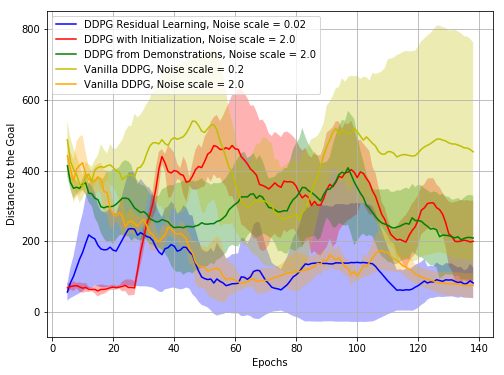

In [55]:

# comparison of distance2goal, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
#data without fine-tune, leakyrelu output
# y11 =[55.97320787662612, 57.982756057296896, 40.70626487409524, 67.97793759742936, 22.561028345356956, 82.37718130647589, 12.083045973594572, 24.331050121192877, 60.74537019394976, 65.73431371817918, 24.186773244895647, 37.94733192202055, 52.69724850502159, 45.31004303683677, 5.099019513592784, 16.1245154965971, 22.360679774997898, 34.52535300326414, 31.827660925679098, 49.49747468305833, 57.38466694161429, 39.395431207184416, 9.848857801796104, 34.438350715445125, 32.802438933713454, 11.40175425099138, 57.87054518492115, 66.48308055437865, 48.662100242385755, 59.405386961116584, 80.77747210701756, 310.09837148879063, 474.2921040877657, 327.0244639166923, -22.013352489361555, 254.33245958783948, 595.2696867807061, 481.2400648325116, 271.1309646646801, 66.48308055437865, -22.07936131550199, 363.61655627872614, 738.0277772550298, 710.2816342831904, 364.5888094826829, 350.0, 572.7660953652896, 384.6686886139812, 600.5439201257474, 43.174066289845804, 570.6356105256664, 142.22517358048822, 693.1154305020196, 162.69296235547498, 393.459019467085, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 274.85450696686786, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 333.73642294481436, 354.5193929815406, 367.78934187928826, 191.637678967368, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 553.4419572096066, 372.39226629993266, 349.09167850293994, 403.8972641650349, 474.93683790584197, 404.2190000482412, 84.5931439302264, 457.62102224438945, 303.1517771678075, 391.111237373717, 300.6559495503124, 365.9193900300994, 342.9343960584881, 28.231188426986208, 28.231188426986208, 28.231188426986208, 277.0739973364516, 233.30880823492285, 356.7408022640528, 287.07664481806944, 538.2824537359545, 582.2439351337204, 353.20956951928696, 28.231188426986208, 28.231188426986208, 228.7116088002531, 28.231188426986208]
# y12 =[49.9799959983992, 114.28473213863697, 62.93647591023825, 37.64306044943742, 48.703182647543684, 48.76474136094644, 79.81227975693966, 42.20189569201838, 35.38361202590826, 58.0, 61.84658438426491, 6.4031242374328485, 93.34880824091971, 50.32891812864648, 50.93132631298737, 20.024984394500787, 24.186773244895647, 36.87817782917155, 53.81449618829484, 22.203603311174522, 43.93176527297759, 77.62087348130012, 54.20332093147061, 54.12947441089743, 22.803508501982762, 28.160255680657446, 11.40175425099138, 42.485291572496, 67.36467917239716, 20.999999999999996, 33.24154027718932, 66.73080248281148, 306.10455730027934, 294.64045886469836, 96.93812459502195, 494.4340198651384, 638.0164574679873, 410.440007796511, 409.10634314319793, 346.15170084805305, 632.5764775898642, 255.00784301664135, 617.6900517249732, 445.7645118221055, 601.0074874741579, 337.13647088382476, 230.5666931714119, 198.8793604173143, 722.7952683851769, 282.70302439132126, 699.8185479108138, 703.8252624053786, 704.1683037456315, 704.5565981523415, 692.1690544946372, 477.1771159642927, 511.7440766633259, 312.1954516004357, 147.36349615830918, 461.52464722915937, 499.1232312766057, 348.54268031332975, 612.2752648931688, 578.9991364414976, 187.52333188166213, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 556.5770386927582, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208, 28.231188426986208]
# y13 = [36.24913792078372, 41.012193308819754, 122.6906679417795, 19.026297590440446, 9.848857801796104, 55.00909015790027, 66.12110101926616, 52.009614495783374, 11.180339887498949, 25.0, 65.62011886609167, 37.64306044943742, 32.31098884280702, 47.20169488482379, 16.1245154965971, 61.05735008989499, 25.238858928247925, 38.948684188300895, 46.010868281309364, 70.21395872616783, 22.47220505424423, 33.734255586866, 13.92838827718412, 24.08318915758459, 42.04759208325728, 44.68780594300866, 13.601470508735444, 11.40175425099138, 46.486557196677836, 59.135437767890075, 44.68780594300866, 296.10808837314795, 302.29290431632694, 49.64876634922564, 191.5097908724251, 309.3428518650463, 666.5883287307091, 289.9137802864845, 343.2273299141547, 404.31670754496406, 514.5658364096863, 515.3882032022076, -22.156257067810923, 331.9171583392459, 14.212670403551897, 94.79451460923254, 385.3232409289634, 70.76722405181653, 250.0319979522621, 217.1128738697915, 204.88289338058462, 109.87720418721983, 39.698866482558415, -22.22668851036514, 297.4155342277871, 297.40544715926103, 159.66527487215245, 105.47511554864494, 216.17816726024856, 232.2154172315008, 116.0, 283.43605980891, 448.06807518501023, 552.268050859363, 579.4178112554015, 463.11337704713304, 357.24641355792505, 421.28493920386, 311.26355392175293, 53.71219600798314, 322.96749062405644, 227.9517492804124, 614.4761997018273, 528.3370136570028, 348.4551621084124, 369.2384053697556, 444.101339786315, 520.5324197396354, 392.2307994025966, 391.1892125302026, 393.15391388106514, 545.5291009652922, 601.0199663904685, 417.44460710374494, 370.32418230517976, 338.32085362862284, 355.8791929854849, 435.1390582331124, 367.9836952909735, 488.15161579165135, 560.2445894428611, 528.2281703960894, 566.8059632713827, 577.0684534784414, 476.5983634046596, 589.6744864753773, 431.5854492449902, 395.8396139852604, 391.6248204595822, 542.2333446035941, 562.1103094589175, 536.3674113888725, 478.0167361086848, 521.7853964993654, 568.7108228265047, -22.035964640867803, 371.13070473891, 461.52464722915937, 352.38898961233167, 497.9327263797791, -22.15209384893862, 421.2944338583172, 496.1461478234009, 552.4717187331855, 510.36555526406755, 516.4803965302071, 353.83188098304544, 530.7522962738833, 497.80016070708535, 292.35081665697464, -22.074736938325664, 548.3520766806669, 574.5572208231309, 574.1262927266091, -22.165913173389754, 442.944691807002, 597.6386868334412, 587.6818867380549, 214.34784813475503, 433.03579528717944, 346.59774955991844, 287.01567901423084, 527.0768444923377, 400.8840231288845, 539.102958626643, 432.03009154455896, 468.4122116256151, 570.3770682627414, 537.4430202356339, 235.26155657055403, 441.41816908686485, 163.6154026979123]
#data with fine-tune, small residual action value range, leakyrelu6 output
y11=[26.0, 31.304951684997057, 30.870698080866262, 32.57299494980466, 19.235384061671343, 10.816653826391969, 87.32124598286491, 293.0614270080592, -22.093299705915033, 309.46728421595714, 259.0077218926108, 258.0310058888272, 259.61509971494337, 254.09643838511394, 256.28499761008254, 263.2128416320146, 267.00187265260894, 263.0304164920856, 265.409118155349, 266.62708039507163, 267.41914665932205, 267.41914665932205, 269.80363229578654, 267.23959287500793, 252.87546342023776, 252.62224763468478, 259.4166532819356, 260.969346858975, 255.56212551941258, 264.5600120955546, 236.6854452643846, 246.6576574931336, 249.92798962901293, 246.10770000144245, 221.51523649627356, 204.38444167793205, 176.7993212656655, 39.824615503479755, 42.941821107167776, 163.47782724271815, 537.5146509631156, 310.0790221862808, 360.3553801457667, 243.232399157678, 89.02246907382428, 84.62860036654276, 110.60289327137876, 208.73428084528905, 15.231546211727817, 17.08800749063506, 17.46424919657298, 15.231546211727817, 3.6055512754639896, 16.15549442140351, 12.529964086141668, 11.661903789690601, 16.15549442140351, 16.15549442140351, 16.15549442140351, 15.811388300841898, 14.866068747318506, 15.811388300841898, 15.811388300841898, 15.231546211727817, 15.231546211727817, 15.231546211727817, 15.231546211727817, 15.231546211727817, 14.317821063276353, 13.601470508735444, 15.811388300841898, 15.231546211727817, 16.15549442140351, 14.866068747318506, 17.46424919657298, 16.15549442140351, 15.811388300841898, 16.55294535724685, 16.15549442140351, 7.211102550927979, 16.15549442140351, 15.811388300841898, 16.15549442140351, 15.524174696260026, 15.811388300841898, 17.08800749063506, 16.15549442140351, 15.811388300841898, 15.811388300841898, 16.15549442140351, 16.15549442140351, 14.866068747318506, 16.15549442140351, 17.08800749063506, 14.866068747318506, 16.15549442140351, 15.811388300841898, 17.08800749063506, 14.866068747318506, 17.08800749063506, 15.811388300841898, 16.15549442140351, 15.811388300841898, 17.08800749063506, 15.811388300841898, 16.15549442140351, 16.15549442140351, 16.15549442140351, 15.811388300841898, 16.55294535724685, 14.866068747318506, 15.811388300841898, 16.15549442140351, 16.15549442140351, 15.811388300841898, 16.15549442140351, 14.866068747318506, 16.15549442140351, 15.811388300841898, 17.08800749063506, 16.15549442140351, 15.811388300841898, 92.11405973031478, 107.33126291998991, 156.97770542341354, 130.91982279242512, 146.7548977036201, 152.10851389715174, 20.8806130178211, 128.00390619039717, 35.22782990761707, 65.0, 156.7801007781281, 178.30591689565435, 193.82982226685343, 18.35755975068582, 64.07027391856539, 112.32987136109433, 55.78530272392541, 13.038404810405298, 68.18357573492314, 97.24710792614863]
y12=[29.546573405388312, 25.632011235952593, 29.068883707497267, 32.64965543462902, 19.313207915827967, 16.76305461424021, 31.304951684997057, 152.80052355931247, 424.75993219699996, 447.6036192883163, 304.591529757477, 463.3411270327727, 469.66903240473505, 301.23910768690047, 460.65171225124084, 497.30473554954204, 7.0710678118654755, 7.0710678118654755, 7.0710678118654755, 7.0710678118654755, 389.61647809095547, 479.7415971124455, 469.16308465180845, 218.5040045399626, 441.5993659415738, 443.73528144604416, 448.7137171961651, 444.0281522606421, 404.5985664828782, 432.8891313026928, 467.0471068318484, 30.23243291566195, 434.2948307313823, 300.1932710771512, 331.4347597944428, 427.4037903435111, 286.08565151017274, 120.20399327809372, 285.6588874864565, 334.90297102295165, 187.77113729218343, 459.35280558629444, 414.9819273173231, 201.1889659002203, 154.02921800749363, 456.05482126604034, 280.43180989324304, 90.44335243676011, 154.31461369552787, 470.1063709417263, 97.12878049270462, 190.5177157116891, -22.06536590944637, 100.72239075796404, 457.38933087687997, 416.83210049131293, -22.131418218243258, 465.4084227858366, 292.7541630788536, -22.252989148226643, -22.163345142793485, 25.80697580112788, 184.76471524617463, 463.8103060519462, 443.8468204234429, 466.50294747193186, 438.75505695091425, 137.78606605894515, 158.91192529196795, 390.9693082583338, 118.0889495253472, 162.27445886522005, 79.32212806020776, 70.3420215802759, 228.0021929719098, 161.05899540230592, 56.61271941887264, 114.42464769445435, 310.87618113969427, 316.48380685273617, 353.9901128562774, 372.2069316925734, 389.03470282225464, 382.099463490856, 391.4958492755702, 389.16577444580093, 389.1169490011969, 260.00192306981114, 392.3111010409978, 378.2287667536672, 390.8247689182455, 391.5673632978111, 333.0015014981164, 395.5780580365903, 358.9874649622185, 388.54214700595867, 340.8005281686048, 385.56063077031087, 382.54542213964606, 378.3556527924487, 382.099463490856, 384.19266000276474, 382.5611062301028, 383.275357934736, 356.0126402250347, 363.1115531073061, 360.2846097184835, 348.69184102872265, 340.75357665034124, 180.24705268048078, 90.21086409075129, 124.16923934694937, 105.67875850898325, 79.64923100695951, 128.89142717807107, 117.34138229968147, 110.0272693471941, 363.44600699416134, 148.38463532320318, 136.07718398026907, 100.00499987500625, 174.26990560621766, 154.69324484281788, 154.50566332662373, 144.51643505151932, 172.7917822120022, 84.40379138403677, 91.7877987534291, 132.21951444472938, 164.93938280471406, 86.88498144098322, 125.60254774486066, 218.81956036881164, 109.65856099730654, 121.84005909387932, 96.5090669315583, 88.60022573334675, 86.57944328765345, 86.53900854527974, 150.60212481900777, 320.22492095400696, 105.75916035975324]
y13=[23.08679276123039, 35.4682957019364, 25.632011235952593, 30.083217912982647, 19.026297590440446, 23.345235059857504, 24.331050121192877, 24.331050121192877, 24.331050121192877, 24.515301344262525, 23.53720459187964, 24.515301344262525, 24.515301344262525, 24.515301344262525, 24.331050121192877, 24.515301344262525, 23.345235059857504, 24.331050121192877, 25.495097567963924, 25.495097567963924, 24.515301344262525, 25.495097567963924, 25.495097567963924, 25.709920264364882, 23.53720459187964, 23.345235059857504, 24.515301344262525, 25.495097567963924, 24.515301344262525, 24.331050121192877, 23.345235059857504, 24.515301344262525, 24.331050121192877, 24.515301344262525, 23.345235059857504, 24.331050121192877, 25.709920264364882, 24.515301344262525, 25.495097567963924, 24.515301344262525, 24.331050121192877, 25.495097567963924, 23.345235059857504, 24.331050121192877, 24.331050121192877, 24.515301344262525, 24.515301344262525, 24.515301344262525, 23.53720459187964, 24.331050121192877, 24.515301344262525, 24.331050121192877, 24.515301344262525, 25.709920264364882, 24.515301344262525, 25.495097567963924, 24.515301344262525, 24.331050121192877, 24.515301344262525, 24.515301344262525, 23.345235059857504, 25.709920264364882, 24.73863375370596, 24.73863375370596, 25.495097567963924, 24.331050121192877, 23.345235059857504, 24.331050121192877, 24.515301344262525, 24.515301344262525, 25.495097567963924, 24.515301344262525, 24.73863375370596, 23.345235059857504, 24.515301344262525, 24.331050121192877, 26.68332812825267, 23.345235059857504, 24.515301344262525, 25.495097567963924, 24.515301344262525, 24.515301344262525, 24.515301344262525, 24.515301344262525, 24.331050121192877, 25.709920264364882, 24.73863375370596, 24.331050121192877, 24.515301344262525, 25.495097567963924, 26.476404589747453, 24.331050121192877, 25.495097567963924, 23.53720459187964, 24.73863375370596, 24.515301344262525, 24.331050121192877, 24.73863375370596, 24.515301344262525, 24.73863375370596, 23.53720459187964, 24.515301344262525, 24.515301344262525, 23.345235059857504, 24.515301344262525, 24.515301344262525, 23.53720459187964, 25.495097567963924, 24.515301344262525, 24.515301344262525, 24.73863375370596, 24.515301344262525, 24.73863375370596, 24.515301344262525, 24.515301344262525, 23.345235059857504, 24.73863375370596, 25.495097567963924, 24.515301344262525, 24.331050121192877, 26.476404589747453, 24.331050121192877, 25.495097567963924, 24.515301344262525, 25.709920264364882, 25.495097567963924, 23.53720459187964, 24.515301344262525, 24.331050121192877, 24.331050121192877, 24.331050121192877, 24.331050121192877, 23.53720459187964, 24.331050121192877, 25.495097567963924, 25.495097567963924, 24.515301344262525, 24.515301344262525, 24.331050121192877, 24.515301344262525, 24.331050121192877, 23.345235059857504]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[110.11357772772621, 38.600518131237564, 99.62429422585637, 102.59142264341595, 83.00602387778854, 43.56604182158393, 132.015150645674, 77.87810988975015, 104.80935072788114, 66.49060083951716, 121.24768039018313, 27.784887978899608, 135.09256086106296, 49.8196748283246, 61.465437442517235, 19.1049731745428, 40.36087214122113, 146.18481453283715, 39.6232255123179, 168.34488409215172, 59.033888572581766, 59.20304046246274, 18.384776310850235, 51.97114584074513, 4.242640687119285, 52.80151512977634, 15.03329637837291, 50.32891812864648, 18.24828759089466, 67.11929677819934, 84.38601779915912, 537.0335185069922, 743.905908028697, 715.5648118793993, 93.62157870918435, 293.3428028774526, 331.11327366929885, 526.6535863354583, 430.08138764657093, 493.6415703726743, 142.61837188805654, 265.34505836740203, 283.9330907097656, 626.764708642725, 206.4097865896867, 511.4938904815971, 194.51735141112732, 437.6391207376233, 623.0866713387472, 778.6719463291329, 493.3153149862672, 474.2003795865204, 530.3319715046416, 538.6891496958149, 566.7027439495948, 542.2361109332354, 632.8230400356802, 717.6322177828973, 576.2508134484498, 705.0283682235772, 727.1217229597806, 776.9298552636526, 770.0422066354545, 645.2441398416571, 769.109875115383, 711.8124753051186, 574.0984236174143, 456.24554792348385, 479.64153281382966, 777.7814603087425, 574.7112318373463, 571.4201606523872, 677.8532289515185, 606.5459586873859, 418.4017208377614, 446.8568003286959, 571.2950201078248, 416.1586236040291, 667.5065542749376, 694.7841391396323, 576.2751079128788, 604.3078685570791, 531.304997153236, 316.2056292984045, 278.18339274658365, 476.1512364784954, 507.8779380914276, 443.64963653766245, 701.4969707703661, 736.5168022523316, 489.2494251401835, 534.8682080662488, 581.0473302580436, 675.4983345649343, 517.3045524640199, 613.7703153460584, 617.2722251972788, 600.2216257350279, 505.460186364861, 692.4738262201685, 475.6574397610112, 680.2470139589001, 416.0, 119.4026800369238, 618.6388283966663, 475.6227496661614, 526.3734415792651, 426.1983106489278, 199.90497742677644, 315.42510997065534, 264.4617174564213, -22.033167689545966, -22.235903106990847, 286.5658737533135, 251.87298386289865, 216.6887168266959, 133.24038426843418, 175.3681841155915, 179.96110690924303, 183.0027322200409, 220.42232191862965, 236.75303588338633, 175.45369759569047, 213.95326592506132, 312.79546032511405, 202.82997806044352, 171.011695506477, 200.0024999843752, 161.3071604114337, 204.80478510034868, 223.02690420664499, 205.73040611440985, 182.4636950190366, 165.0969412193939, 214.1074496602115, 191.0104709171725, 217.79348015953096, 178.1010948871455, 179.06702655709674, 142.67795905464865, 155.1934276958918, 157.40711546813887]
y22=[12.649110640673518, 63.24555320336759, 18.384776310850235, 153.3883959105121, 87.80091115700337, 41.6293165929973, 77.89736837660179, 19.4164878389476, 36.49657518178932, 74.51845409024533, 44.28317965096906, 89.02246907382428, 32.984845004941285, 50.59644256269407, 66.60330322138685, 95.58765610684259, 43.08131845707603, 108.89444430272832, 93.02150289046078, 44.40720662234903, 4.123105625617661, 131.10682667199293, 89.09545442950498, 113.6001760562016, 50.20956084253277, 57.21887800367987, 114.1402645870422, 94.0850678907126, 85.44003745317532, 44.94441010848846, 96.88137075826292, 321.50427679892533, 241.6153968603822, 493.3011250747357, 567.4028551214736, 699.2317212483999, 562.0142346951721, 600.204131941792, 530.687290219014, -22.325625059742606, 412.37967942176783, 650.2007382339704, 349.5840385372307, 449.29834186206386, 230.3584163862914, 123.84667940643382, 383.7512214964273, 195.57607215607945, 420.4878119517854, 361.86461556775623, 415.1939305914767, 374.62114195544274, 514.8397809027581, 253.3396929026322, 327.9405433916337, 256.8209493012593, 477.32588448564155, 339.1651515117672, 365.6241239305743, 321.7203754815663, 333.2641594891356, 280.5298558086109, 265.04527915056326, 332.50112781763613, 199.24858845171275, 322.18783341398847, 96.60227740586656, 273.00183149568795, 220.32022149589446, 231.70023737579555, 201.9108714259834, 171.40595088852663, 246.41834347304587, 300.96179159488, 330.61911620473484, 322.6716597409819, 326.43529220965064, 321.54937412472134, 357.1134273588715, 324.6783023240081, 264.7753764986465, 261.5205536855564, 240.16036309099803, 253.03161857759991, 202.80532537386685, 185.3887806745597, 303.9161068452937, 269.45871668958864, -22.216331452998773, 333.0645583066442, 327.5881560740559, 330.62516540638586, 282.46238687655386, 343.1850812608264, 343.27976928447146, 305.6681206799296, 329.6209944769902, 311.926273340352, 276.08150970320344, 246.45486402179202, 372.75863504417975, 376.80764323458203, 379.8275924679511, 386.76220084180926, 397.6053319562001, 415.21560664310294, 110.6752004741803, 91.67878707749139, 189.04232330353963, 198.2145302443794, 264.1230773711377, 276.5248632582611, 251.03187048659777, 250.49151682242658, 269.74246977441277, 294.4961799412685, 335.72607882021913, 350.96011169362254, 345.85835250865347, 376.0757902338304, 393.16154440636745, 375.59818955900204, 389.0732578833966, 381.1679419888299, 371.856154984693, 400.5820764837089, 375.217270391436, 341.0014662725074, 315.5709112069742, 358.8927416373867, 323.55679563254427, 342.58429619584143, 331.84333653096, 319.77648443874045, 345.41569159492457, 368.80347069950415, 354.0353089735542, 351.4342043683284, 355.4940224532615, 371.0053907964142, 333.3901618224509, 358.11311062288684]
y23=[40.80441152620633, 31.144823004794873, 15.264337522473745, 49.57822102496216, 60.29925372672534, 11.0, 87.09190547921202, 89.44271909999159, 132.9135057095403, 118.29623831720095, 12.649110640673518, 52.61178575186362, 31.78049716414141, 33.97057550292606, 32.526911934581186, 32.01562118716424, 96.04686356149273, 15.811388300841898, 16.278820596099706, 77.10382610480494, 109.5627673984187, 54.08326913195984, 105.3612832116238, 46.40043103248073, 44.721359549995796, 121.69634341261039, 189.28285712129346, 84.89994110716448, 28.792360097775937, 59.481089431852205, 28.635642126552707, 671.697104355825, 648.2669203345177, -22.12121688970306, 637.5743093945991, -22.18245239846377, 246.44674881198978, 114.33722053644648, 740.8920299206895, 693.825626508563, 491.8699014983535, 63.890531379853144, 435.54219083804037, 405.7647101461634, 469.1289801323299, 290.33773437154184, 574.2482041765564, 541.6733332923081, 206.30559856678636, 289.53928921650686, 563.0568354970926, 470.9564735726647, 345.2144261180288, 590.4278109980932, 584.569927382516, 535.4717546239017, 539.2782213292134, 115.97413504743201, 276.14670014323906, 435.83138941567756, 400.8989897717379, 207.9663434308542, 636.996075341128, 242.66849816158668, 317.5059054568907, 60.440052945046304, 254.6075411294803, 190.55970193091719, 374.4609458942281, 244.1986895951737, 207.23899247004653, 222.62299971027252, 231.03462943896528, 259.4802497301095, 191.92967462067975, 369.2384053697556, 275.93115083295686, 124.19742348374223, 101.31633629380802, 440.9194937854302, 62.20128616033595, 310.1370664722293, 325.8297101247828, 86.83317338436964, 139.17614738165446, 139.60659010233005, 272.44265451650557, 234.77648945326706, 148.24641648282767, 154.27572718998928, 79.20858539325141, 229.9652147608416, 284.20063335608523, 279.4011453090341, 360.84345636300515, -22.21597010046861, 349.3150440504961, 371.6019375622253, 338.4213350248474, 319.61539387207245, 301.5592810709032, 290.3962809679215, 303.5951251255527, 295.84455377782433, 319.61539387207245, 290.66303514551004, 262.24606765402604, 278.3522947633089, 240.6013300046365, 210.0404722904612, 139.34489585198304, 164.83021567661677, 181.89282558693733, 185.14858897652988, 127.34991166074673, 150.74813431681335, 134.06341782902598, 143.20963654726592, 91.35097153287424, 14.317821063276353, 306.72626232522055, 186.00268815261785, 441.28108955630535, 595.3990258641678, 691.9898843191279, 185.0837648201484, 449.36510767971293, 137.53908535394584, 84.09518416651456, 1.0, 90.13878188659973, 106.04244433244644, 24.20743687382041, 57.28001396647874, 20.591260281974005, 72.73238618387272, 72.44308110509934, 82.38931969618392, 89.82204629154248, 75.58438992278762, 84.72307831990052, 67.36467917239716]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31=[768.7841049345387, 672.3481241142865, 474.4649618254229, 432.0416646574726, 375.40644640176333, 99.72462083156798, 567.9507020860174, 394.50728763864424, 307.2783754187723, 229.43626565998673, 622.0803806583198, 282.00177304407146, 239.45354455509738, 534.0861353751845, 413.69674883905, 326.18093138624766, 343.11076928595526, 384.2199890687625, 328.98784172063256, 411.6430492550554, 336.40005945302687, 362.5051723768917, 315.8543968349974, 365.62549145266115, 319.23189063751136, 368.12633700945656, 390.57137631936115, 374.0975808529106, 350.06427981157975, 319.7655391063896, 310.00645154577023, 396.24361193588976, 382.46045547219643, 381.3712102401019, 363.6619309193636, 330.77031305726337, 347.731218040601, 325.68236059080635, 309.2264542370203, 357.2786027738017, 374.918657844605, 388.4958172233004, 361.58124951385406, 363.572551219148, 418.7182823808867, 369.6714757727461, 385.44000830219994, 395.9494917284274, 317.81283800375337, 336.168112705533, 332.3386826717588, 386.59798240549577, 414.62874960619894, 353.1416146533852, 343.01166160933946, 338.5291715642834, 404.2820797413608, 371.39736132611387, 373.5304539123953, 389.4226495724151, 397.39778560027236, 424.3795471037689, 356.0730262179375, 390.5444917035702, 365.3286191909963, 401.8556954927975, 342.70978976387585, 308.1509370422229, 346.5385981387932, 338.42281246984516, 360.33456675706265, 334.7626024513491, 350.47681806362027, 332.87234790531943, 338.77426112383455, 353.5449052100737, 394.7822184445495, 386.4776837024358, 384.01041652538544, 344.85069232930357, 333.7439138021846, 424.6998940428406, 398.7430250173663, 312.385979198811, 340.1249770305027, 396.16410741004796, 422.14689386515687, 367.3145790735783, 350.7720057245162, 397.2228593623484, 357.66045350303966, 378.9261141700319, 361.73470942114477, 337.23137457834497, 334.6699867033194, 336.5828278447966, 330.4557459025338, 331.058907144937, 347.57013680694723, 362.7698995230999, 322.0093166354042, 309.2765752526369, 396.6988782439396, 351.9232870953555, 382.17404412126155, 413.6145548696274, 385.507457774814, 394.23977475642914, 364.6107513499842, 372.6258176777342, 385.48281414351015, 387.53709499865937, 368.69635202968846, 417.3260116503643, 331.4754892899323, 405.72034703721727, 447.56340332962884, 344.9478221412624, 393.00127226257166, 390.0, 339.23590611844133, 369.9689176133585, 323.79777639755343, 441.69899252771677, 411.0048661512416, 402.7468187335562, 346.79388691267326, 360.48994438125453, 443.5538298786293, 328.40219244091537, 351.3360214950924, 359.7012649407839, 338.7226003679117, 405.8004435680178, 304.9098227345259, 372.83910739084223, 395.2973564293088, 386.3728768948462, 401.29914029312346, 434.86664622617354, 374.4128737102932, 314.14805426741066]
y32=[742.5967950375224, 587.5321267811659, -22.184295941255442, 509.5537263135262, 279.3152340993953, 429.19692449969864, 346.1011412867631, 129.29423807734048, 421.9300889957956, 413.7257545766277, 369.4157549428557, 384.1106611381673, 305.91828974417336, 260.35360569809666, 264.4730610100016, 346.5082971589569, 400.2811511925087, 353.3624201864143, 380.27621540138426, 330.8473968463407, 431.1287510709533, 438.62170488930434, 423.14300183271376, 444.9820221087589, 356.5459297201414, 487.3817805375987, 546.7723475085403, 412.4002909795288, 319.7889929312765, 283.86792703650053, -22.32379340331073, 216.14809737770074, 226.0486673263083, 254.95097567963924, 303.8321905262838, 277.9946042641835, 302.0149002946709, 286.58157651879856, 367.23970373585695, 290.766229125736, 298.8812473207377, 292.41238003887594, 245.22642598219304, 271.0073799733136, 273.7480593538519, 269.60897611170145, 286.83967647450726, 287.98784696580515, 305.55195957479964, 369.73774489494576, 339.01327407639957, 276.8176294963888, 340.28370516379425, 194.164878389476, 261.23169792351007, 258.9246994784391, 351.17232237179513, 258.7740327003465, 347.0, 388.01159776480915, 443.30576355378014, 632.8427924848319, 381.57830126987045, 485.7911073702358, 425.31517725094176, 583.3575233079625, 311.2715855968868, 197.12178976460214, 517.9826251912317, 593.1652383611164, 418.56062882215764, 560.8921464952064, 314.1591953134589, 80.95677859203639, 309.5561338432821, 316.6654385941099, 129.52219886953742, 589.1086487227972, 554.5448584199479, 592.192536258268, 577.1871446939891, 604.4145928086118, 458.21610622063474, 546.7723475085403, 509.65969038172915, 521.0076774866183, 275.35613303502066, 313.04951684997053, 422.03554352684563, 325.55798254688824, 579.1312459192649, 144.05554484295286, 643.7701453158572, 602.2042842756932, 715.1223671512449, 751.8384134905585, 649.5483045932766, 734.3078373543347, 551.1769225938256, 539.636914971539, 487.54486972995625, 523.9360648018038, 433.3358974283114, 205.0, 189.70766985021982, 187.8084130170957, 171.81385275931623, 138.3979768638256, 123.82245353731285, 137.7425134081704, 146.24978632463024, 159.3643623900902, 153.05554547287727, 114.79111463872106, 183.07648674802562, 172.23530416264836, 238.64827675891564, 336.8085509603341, 292.1711826994579, 309.19573088902763, 162.11107303327555, 618.2313482831488, 61.032778078668514, 108.15729286552988, 101.13357503816425, 97.32420048477151, 157.87653403846943, 115.97413504743201, 228.61539755668255, 104.0, 106.30145812734649, 128.1327436684316, 123.32072007574396, 71.06335201775947, 78.77182237323191, 88.32326986700618, 143.05593311708537, 104.34557968596465, 96.30160954002793, 127.03542812932147, 135.18135966175217, 119.86659251017358]
y33=[741.853085186009, 638.9593101285872, 566.869473512201, -22.10669078651607, 101.83319694480774, 294.7490457999822, 602.7835432391963, 274.6434051638597, 445.64672106950366, 341.4395993437199, 452.58037960123727, 440.2419789161411, 275.72631357924473, 290.6303494131334, 249.46743274423616, 51.15662224971465, 17.029386365926403, 86.46964785403026, 168.40427548016706, 157.99050604387594, 255.8612905462645, 112.53888216967503, 335.0104475982801, 161.15210206509875, 200.53179299053804, 134.937022347464, 110.4943437466371, 104.30723848324239, 179.97777640586628, 97.86725703727473, 249.36920419330053, 284.1548873413934, 186.45374761586316, 306.15028989043924, 148.12494725737457, 72.44998274671983, 131.94695904036593, 112.29425630903836, 38.8329756778952, 41.048751503547585, 151.15885683611134, 16.401219466856727, 63.12685640834653, 11.313708498984761, 12.649110640673518, 157.62296786953354, 4.0, 131.54847015454038, 59.413803110051795, 82.80096617793781, 102.07840124139877, 76.40026177965623, 70.57619995437555, 58.309518948453004, 180.64883060789515, 117.95338062132852, 62.26556030423239, 221.41589825484527, 134.61797799699713, 173.4156855650607, 122.9186723000212, 201.81674856165927, 86.2670273047588, 112.69871339105873, 86.76404785393545, 225.1443981093023, 203.54115063052976, 339.43629741086914, 293.23369519889764, 60.207972893961475, 131.60547101089682, 147.5127113166862, 198.45654436173174, 58.52349955359813, 184.25254408012935, 139.17614738165446, 188.67962264113208, 22.203603311174522, 69.1158447825099, 49.64876634922564, 111.94641575325224, 340.77705321808276, -22.325919639309898, 172.70784579746226, 278.25527847643787, 210.86725682286476, 278.18878482066816, 95.90099061010788, 74.62573282722254, 116.70903992407786, 216.6333307688362, 77.33692520394123, 510.988258182123, 562.5388875446746, 110.3675676999362, 143.17122615944868, 150.23315213360866, 290.11894112587686, 121.27654348636426, 169.54350474140847, 212.52999788265186, 155.72411502397438, 114.12712210513327, 184.1656862719003, 232.46720198772127, 182.96447742663054, 214.11445537375565, 247.42069436488129, 272.0091910211859, 184.94593804677083, 188.2817038376273, 191.84629264074925, 127.90621564255585, 182.33211456021672, 130.36103712382777, 109.48972554536796, 176.08236708995025, 142.12670403551894, 140.42791745233566, 113.35784048754634, 172.16852209390655, 146.08559134972896, 123.01625908797583, 87.66413177577247, 129.55307792561317, 146.972786596703, 148.43180252223578, 132.5028301584536, 188.17545004596107, 129.6919426949878, 153.39491516996253, 153.16984037335808, 154.719100307622, 137.2443077143821, 163.24827717314508, 127.4754878398196, 149.08386901338454, 142.33762678926468, 161.94134740701648, 125.92855117089213, 135.03332921912278, 134.00373129133382]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg noise 0.2
y41=[735.6119901143537, 548.4605728764831, 370.56713291925934, 437.35226076927967, 507.7400909914441, 300.9119472536775, 620.2983153290036, 522.2805759359618, 266.73207531153804, 212.22865028077618, -22.052978876230664, 620.612600581071, 378.06084166440723, 424.736388834298, 593.5697094697471, 389.86407887878056, 733.6879445649901, 620.1580443725616, 356.8935415498577, 274.04014304477363, 342.49817517762045, 365.4326203282898, 319.53090617340916, 320.67740799750766, 298.7189314389029, 285.49080545614777, 315.97784732477686, 250.89041432466087, 412.35421666329546, 582.7949896833362, 434.99195394857594, 655.6043013891841, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 738.0677475679316, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 649.0978354608802, 748.618060161522, 739.41192849453, 292.2618688778952, 258.93628559937287, 278.08811553175013, 526.0237637217543, 383.5635540559087, 434.66998976234834, 537.014897372503, 657.6473218982952, 690.1594018775662, 556.8213357981176, 587.205245208181, 477.5290567075474, 530.7692530657744, 630.474424540758, 432.0474510976775, 414.348886809172, 596.3128373597201, 176.7766952966369, 582.2928816326025, 306.7523431043356, 559.494414628064, 566.3400038845923, 608.8357742445824, 511.9472629089837, 525.76135270672, 287.36040089058895, 445.0404475999906, 471.958684632458, 467.0642354109336, 706.1472934168904, 433.3889707872133, 586.8875531138823, 623.3859157857194, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 439.9420416373048, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 541.850532896296, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885, 733.2148389114885]
y42=[729.5676802052022, 473.1849532688038, 691.5171725994952, 730.5046201085931, 217.3660507070964, 259.0829982843336, -22.17996044840486, 647.5561751693825, 110.54863183232979, 62.433965115151864, 596.1543424315552, 332.0256014225409, 407.33278777923096, 385.77843381920667, 438.0011415510238, 297.7247050548543, 165.14841809717706, 626.0814643478914, 99.62429422585637, 231.14713928578044, 400.6607043372235, 687.3929007489094, 66.57326790837296, 494.2317270269079, 99.32774033471213, 272.44265451650557, 80.80222769206304, 135.76818478568535, 83.21658488546619, 208.54016399725018, 112.80514172678478, 650.6027974117542, 280.04463929880893, 114.03946685248927, 564.7264824673977, 389.62161131025573, 105.72133181151285, 85.05292469985967, 28.30194339616981, 156.95222202950808, 211.98348992315417, 149.4590244849738, 480.05520515874, 617.6544341296353, 109.59014554237986, 104.17773274553444, 126.43575443678897, 141.0319112825179, 412.62210314039163, 627.3284626095009, 44.68780594300866, 72.24956747275377, 135.35139452550905, 79.51100552753688, 407.3831120701986, 130.09611831257686, 203.90684147423792, 165.46903033498444, 107.44766167767449, 212.24985276791125, 204.45292856792244, 203.0, 210.27838690650069, 191.91925385432282, 178.2806775845324, 180.3247071257846, 176.7993212656655, 174.04022523543227, 166.6043216726385, 157.610278852618, 142.87407042567241, 158.05062480104277, 150.90394295710104, 124.42266674525185, 121.23530838827442, 123.4908903522847, 98.67117106835208, 91.2414379544733, 79.76214641043707, 82.15229759416349, 79.0, 78.5175139698144, 71.02816342831905, 71.06335201775947, 69.92138442565336, 63.52952069707436, 75.13321502504735, 404.3723531598074, 410.20117015922807, 407.7658641916952, 415.61640968566195, 518.0, 473.4986800403988, -22.211469202192642, 446.57810067221163, 425.46562728380303, 446.5422712353221, -22.1625300517028, 438.04680115257094, 389.88203344088583, 190.24720760105782, 436.3129610726686, 297.91945220142975, 197.36514383244068, 210.58252539087852, 77.07788269017254, 196.70536342458993, 402.3754465670091, 14.7648230602334, 59.033888572581766, 56.79788728465171, 50.99019513592785, 48.332183894378296, 20.80865204668481, 42.44997055358225, 54.20332093147061, 61.554853586049575, 55.60575509783138, 19.6468827043885, 15.297058540778355, 23.02172886644268, 3.16227766016838, 19.026297590440446, 31.622776601683796, 67.62396025078685, 91.52595260361949, 39.01281840626232, 29.154759474226502, 10.63014581273465, 16.1245154965971, 11.045361017187261, 12.083045973594572, 13.0, 34.17601498127012, 29.0, 14.317821063276353, 26.40075756488817, 16.55294535724685, 22.803508501982762, 14.212670403551897, 10.816653826391969, 22.47220505424423]
y43=[730.8768706150167, 554.1010738123506, 696.7955223736731, 660.0189391222043, 525.3808142671371, 345.2202195700594, 538.7281318067584, 546.8829856559811, 408.0441152620633, 303.2705063140826, 363.85986313414674, 404.55407549547687, 308.3261260418909, 253.7794317906792, 685.4035307758488, 580.856264492344, 275.1908428709066, 393.58099547615353, 315.729314445143, 503.32196455151853, 551.1125111989384, 171.14321488157222, 748.5753135122744, 709.2763918247949, 591.3814335942582, 567.9507020860174, 625.4118642942425, 608.0994984375501, 641.6735930362103, 502.06772451532873, 514.7475109216168, 533.0140711088217, 583.702835353744, 498.96392655181, 497.20016090101984, 472.49232798004243, 409.0378955549229, 336.3346547711074, 434.01497670011344, 495.04747247107525, 601.5488342603616, 568.1769090697017, 561.3287806624563, 613.401173784335, 625.2591462745667, 495.5501992734944, 403.8031698736403, 601.9451802282331, 663.5909884861308, 681.1791247535409, 637.9216252800966, 656.8043848818307, 671.1497597407005, 549.6844549375578, 492.0619879649311, 656.8416856442655, 678.3841094837054, 478.0376554205746, 376.7014733180639, 312.37317426437244, 278.7705149401565, 304.63092423455635, 248.2196607845559, 270.4163456597992, 202.62773748921938, 128.06248474865697, 222.62524564837653, 250.3197954617253, 177.1383639983163, 263.32109676210905, 357.77087639996637, 136.2974687952788, 177.341478509682, 190.16045856065872, 134.23859355639868, 247.00809703327542, 190.90573590125572, 183.3712082089225, 265.0056603169072, 298.00167784762556, 303.0594001181947, 302.026488904533, 229.0087334579186, 235.28068344001383, 151.52887513606112, 579.865501646718, 508.7022704883476, 445.5973518772301, 531.0404880986006, 661.7015943761961, 552.2644294176478, 475.01578921126406, 449.75104224448444, 457.9017361836489, 458.87797942372436, 455.90569200219466, 452.0895928906128, 458.2324737510427, 676.187104284014, 604.4377552734442, 537.5509278198672, 530.9246650891255, 491.0040733028597, 461.6156409828419, 538.7587586295001, 491.25655211915495, 493.7418353755331, 461.1333863428238, 442.6612700474258, 451.37345956535813, 492.39415106193127, 548.1550875436623, 604.3550281084787, 727.9629111431433, 525.7699116533771, 513.047756061753, 526.4570257865308, 508.5135199775911, 559.303137842083, 521.4834609074386, 524.5693471791885, 597.271295141496, 769.7077367416804, 752.8193674448074, 771.0830046110472, 673.5948337094042, 653.1500593278699, 668.6291946961335, 702.0690849197107, 699.7428098951785, 609.840142988308, 691.9371358729057, 697.8345076019099, 660.5641528269605, 658.5081624399199, 672.6083555829499, 588.2108465507926, 614.2939035998974, 563.4935669552937, 594.4451194181007, 576.3505877501991, 512.6763111359837]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2
y51 = [714.9636354388942, 533.3854141237834, 514.9417442779329, 228.98908270919816, 504.92771759926194, 630.7408342576213, 129.24782396620841, 162.1141573089778, 316.5217212135685, 493.8218302181466, 172.62966141425403, 470.7026662342163, 346.6554485364394, 735.4352452799635, 507.38545505365056, 415.4816482108446, 133.9589489358587, 555.9316504751281, 569.7227395847914, 203.3346994489627, 239.26763257908496, 415.2035645319052, 214.73006310249156, 142.23923509355637, 112.16059914247963, 564.0434380435606, 300.3065100859454, 120.24142381059865, 412.0825160086266, 329.94848082693153, 356.3663844977525, 129.634100452003, 133.30416347586447, 280.9216972752372, 300.83217912982644, 187.52333188166213, 180.3690660839602, 122.3315167894194, 133.79461872586654, 139.18692467326088, 212.03773249117714, 319.3195891266303, 312.41798923877604, 253.1896522372113, 177.05366418123066, 135.32553343696821, 133.2816566523691, 121.24768039018313, 72.20110802473879, 169.95587662684687, 418.226015450976, 355.72601816566635, 246.5623653358314, 152.0690632574555, 227.98245546532743, 285.00175438056516, 226.10838109190027, 196.30843079195554, 82.73451516749222, 96.6902270139025, 88.20430828479978, 81.93289937503738, 99.62429422585637, 87.64131445842195, 115.06954418958996, 113.0, 104.1393297462587, 52.08646657242167, 103.01941564578979, 72.61542535852834, 82.87943049997388, 74.70609078247904, 79.07591289387686, 83.02409288875127, 74.24957912338628, 189.6628587784124, 224.17850030723287, 232.03448019637082, 154.01298646542764, 183.17477992343817, 200.42205467462907, 205.1389772812568, 159.15401345866212, 151.33076356114773, 167.60071598892412, 173.78722622793657, 177.39503938949363, 163.68872899500442, 166.652332716947, 192.566871501824, 208.84922791334424, 173.1588865753069, 172.28464818433474, 142.00352108310554, 338.6340207362515, 124.90796611905904, 118.70130580579136, 110.45361017187261, 96.60227740586656, 112.6454615153225, 134.46560898608982, 180.42172818150257, 97.41663102366043, 106.83164325236227, 127.76932339180638, 288.0277764383151, 197.0101520226813, 161.3071604114337, 270.0074073057997, 192.93781381574735, 105.20931517693668, 209.46837470128995, 212.00235847744713, 352.61877431583247, 115.10864433221339, 155.08062419270823, 107.48953437428223, 94.26027795418386, 119.50313803411188, 88.58893836140041, 153.05554547287727, 106.5269918846862, 85.23496934944014, 79.02531240052139, 91.92388155425118, 71.84010022264724, 74.81310045707235, 74.0, 68.15423684555495, 87.55569655939013, 61.61168720299745, 74.14849964766651, 67.11929677819934, 65.73431371817918, 51.86520991955976, 74.00675644831355, 81.02468759581859, 67.23094525588644, 46.09772228646443, 54.56189146281496, 113.56936206565572, 88.81441324469809]
y52=[723.5316164480996, 567.9595055987706, -22.122616249708187, 222.61176967986216, 578.3234389163213, 484.48426187029025, 341.8084258762501, 441.3898503590675, 230.33888078220747, 358.55822400274127, 144.4714504668656, 358.91224554199874, 256.76643082770767, 544.5071165742464, 261.21638539724114, 343.02332282222443, 427.05620239027087, 562.0222415527699, 329.21877224727024, 179.47144619688115, 222.49719099350446, 54.91812087098393, 252.97628347337226, 92.13576938409967, 295.4657340538831, 231.95258136093247, 82.76472678623425, 309.3121400785944, 331.00151057057127, 228.42942017174582, 121.91800523302537, 168.0773631397161, 424.6892981933969, 464.6654710649372, 196.32880583347927, 133.6899397860587, 145.08618128546908, 179.6886195617296, 132.7742444904131, 499.49674673615243, 85.05292469985967, 623.5294700332936, 73.76313442364011, 78.00640999302557, 31.144823004794873, 43.174066289845804, 47.38143096192854, 49.24428900898052, 44.598206241955516, 67.06713054842886, 61.07372593840987, 70.76722405181653, 72.00694410957877, 49.040799340956916, 64.4980619863884, 82.21921916437786, 75.50496672405067, 23.323807579381203, 46.84015371452148, 11.313708498984761, 39.81205847478876, 131.67383946707105, 83.24061508662703, 114.61239025515522, 135.67977004697494, 124.39051410778879, 121.19818480488888, 135.67977004697494, 133.76471881628578, 128.87590930814028, 136.2974687952788, 138.0507153186828, 127.76932339180638, 146.32839779072276, 142.50614021858848, 100.9752444909147, 51.42956348249516, 90.82400563727631, 122.24974437601087, 129.83836104942176, 106.23088063270491, 76.84399781375251, 85.00588214941362, 104.00480758118829, 78.54934754662193, 94.83142938920619, 102.00490184299969, 104.7377677822093, 133.9290857132983, 91.0823802938856, 133.76471881628578, 113.21660655575224, 92.44457799135652, 111.44954015158609, 119.85407794480753, 96.18731725128839, 93.38094023943002, 86.97700845625813, 58.137767414994535, 86.37129152675674, 69.1158447825099, 45.65084884205331, 83.35466393669883, 146.53668482670133, 103.39245620450265, 96.62815324738438, 103.4842983258813, 79.05694150420949, 94.36630754670864, 101.17806086301516, 95.13148795220224, 113.7453295744489, 74.24284477308234, 104.04326023342406, 147.12239802287073, 137.7679207943562, 143.60013927569847, 150.23315213360866, 133.2816566523691, 143.6697602141801, 121.21056059601408, 109.71326264403953, 120.50726119201282, 121.6305882580529, 112.80514172678478, 115.74541027617467, 121.40016474453401, 127.01574705523723, 125.31959144523253, 121.82774724995944, 125.87692401707314, 129.40247292845683, 123.94353553130554, 116.49892703368559, 118.43141475132347, 113.99122773266372, 120.80149005703531, 117.64352935882194, 119.5198728245642, 117.61377470347597, 120.56948204251356, 113.22985472038724]
y53 = [689.7427056518974, 516.768807108169, 141.0319112825179, 209.06697491473875, 475.55441329042463, 613.0579091733505, 744.7100106752963, 517.880295048962, 708.4186615272075, 296.98821525441036, 360.80049889100763, 704.3756100263552, 345.5835644240044, 482.265487050442, 109.01834707974616, 53.53503525729669, 341.67235767618075, 195.3279293905508, 570.6356105256664, 160.11246047700348, 109.04127658827184, 393.64069911532266, 117.72000679578642, 136.7040599250805, 270.44038160008574, 393.1272058761643, 630.2079022037093, 238.37994882120432, 155.66630977832037, 140.00357138301865, 155.56349186104046, 88.54942122905152, 111.83022847155415, 165.5294535724685, 209.82373554962746, 164.05486887014357, 202.9211669589942, 205.0, 259.12352266824405, 279.2131802046601, 325.3459696999488, 336.1086133975147, 381.849446771892, 97.45255255764212, 128.47178678604885, 435.83712554118193, 135.15176654413364, 106.60675400742676, 53.14132102234569, 74.00675644831355, 81.21576201698781, 55.57877292636101, 49.0, 60.14149981501958, 72.53275122315436, 34.132096331752024, 39.81205847478876, 20.0, 25.0, 8.246211251235321, 81.83520025025906, 226.43321311150447, 55.71355310873648, 51.478150704935004, 31.144823004794873, 32.01562118716424, 25.96150997149434, 46.04345773288535, 40.0, 61.09828148156051, 29.0, 58.077534382926416, 76.02631123499285, 78.10249675906654, 65.39113089708727, 72.09022125087424, 50.44799302251776, 22.561028345356956, 53.71219600798314, 42.80186911806539, 58.240879114244144, 12.806248474865697, 107.07007051459338, 75.23961722390672, 104.80935072788114, 161.75598906995685, 82.3286098510111, 135.0, 155.72411502397438, 188.3666637173361, 208.7773934122179, -22.180130636429382, 436.09288001525545, -22.075827386588003, 432.84408278270365, -22.11661954625565, -22.299837491623784, 436.1249820865574, -22.14463545202331, -22.205916677009437, -22.07464836731667, -22.243323512946606, 276.56825558982723, 296.8164415931166, 295.3116997343654, 279.0788419067271, 273.57814240176424, 178.70926109186394, 156.92354826475216, 228.12277396174196, 196.97715603592212, 190.27611515899733, 100.12492197250393, 104.30723848324239, 79.05694150420949, 79.88116173416608, 67.60177512462228, 67.62396025078685, 49.39635614091387, 75.15317691222374, 78.29431652425353, 64.25729530566937, 57.8013840664737, 65.5133574166368, 45.27692569068709, 40.311288741492746, 30.000000000000004, 41.340053217188775, 41.43669871020132, 43.08131845707603, 48.46648326421054, 55.036351623268054, 28.160255680657446, 60.82762530298219, 38.948684188300895, 24.73863375370596, 34.48187929913333, 23.08679276123039, 27.294688127912362, 40.11234224026316, 30.479501308256342, 38.01315561749642]
y5 = np.array([sm(y51), sm(y52), sm(y53)])


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.02', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Distance to the Goal')
leg = plt.legend( loc=2)
plt.grid()
plt.savefig('3000step4.pdf')


# sparse reward

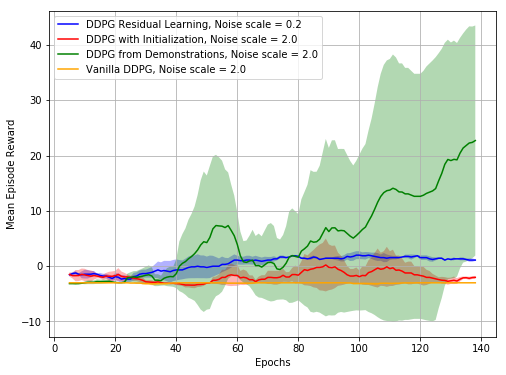

In [76]:
# sparse reward
# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
y11=[-3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, 0.0, 3.0, -3.0, 0.0, -3.0, 3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0]
y12=[-3.0, -3.0, 0.0, 3.0, -3.0, -3.0, -3.0, 0.0, -3.0, 3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, 3.0, 0.0, 0.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0]
y13=[0.0, -3.0, -3.0, 0.0, 0.0, -3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, 3.0, 0.0, -3.0, 0.0, -3.0, -3.0, 3.0, -3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, -3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[0.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, 0.0, 3.0, 0.0, 3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.714286, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -4.142857, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -1.1428572, 0.0, -4.142857, -3.5714285, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, 0.0, 0.0, -3.5714285, -4.142857, -3.5714285, -0.5714286, -3.5714285, 2.4285715, -3.0, -3.0, -3.0, -0.5714286, -3.5714285]
y22=[0.0, -3.0, -3.0, -3.0, 0.0, -3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0, -3.0, 3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -4.142857, -3.5714285, -3.0, -3.5714285, -3.5714285, -0.5714286, -3.5714285, -3.0, -3.0, -5.285714, -3.5714285, -5.285714, -4.714286, -4.142857, -3.5714285, -3.5714285, -4.142857, -3.5714285, -3.0, -3.0, -3.5714285, 0.0, -3.0, 9.0, -3.0, 0.0, 6.0, -3.0, 6.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, 0.0, 6.0, -3.0, 0.0, 3.0, 6.0, -3.0, 9.0, 12.0, -3.0, 12.0, 3.0, 6.0, 9.0, 9.0, 6.0, -3.0, 9.0, -3.0, -3.0, -3.0, -3.0, -3.0, 3.0, 6.0, 0.0, 3.0, 6.0, -3.0, 9.0, 3.0, 6.0, 12.0, -3.0, 3.0, 12.0, -3.0, 0.0, -3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, -3.0, -0.5714286, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, 3.0, 0.0, 0.0, -3.0, -3.0, -3.0]
y23=[3.0, 3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, 0.0, -3.5714285, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -4.142857, -3.5714285, 0.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 9.0, 0.0, -3.0, 6.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, 3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31 = [-3.0, -3.0, -3.0, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 5.428571, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.0, -3.0, -3.5714285, -3.0, -4.142857, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.0, -3.0, -3.0, 3.0, 6.0, 27.0, 9.0, 0.0, 3.0, 5.428571, 12.0, 3.0, -3.0, -4.142857, -3.0, -4.142857, -4.142857, -1.1428572, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -5.285714, -4.714286, -4.142857, -3.5714285, -3.5714285, -3.5714285, -4.142857, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, 2.4285715, 32.42857, 29.428572, 38.42857, 21.0, -3.0, 0.0, 0.0, 30.0, 27.0, 38.42857, 39.0, 44.42857, 33.0]
y32=[-3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, 0.0, 9.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, -3.0, -3.0, 0.0, -3.0, 6.0, 6.0, 3.0, 0.0, 15.0, 33.0, 12.0, 12.0, 15.0, 18.0, 21.0, 27.0, 30.0, 33.0, 24.0, 30.0, 24.0, 15.0, 12.0, 12.0, 6.0, 18.0, 3.0, 2.4285715, -3.0, -3.0, 0.0, 15.0, 24.0, 21.0, 9.0, 9.0, -3.0, 9.0, 9.0, 3.0, 9.0, 0.0, 18.0, 18.0, 27.0, 27.0, 15.0, 3.0, -3.0, 39.0, 15.0, 33.0, 48.0, 24.0, 27.0, 27.0, 30.0, 24.0, 21.0, 30.0, 33.0, 30.0, 24.0, 27.0, 15.0, 18.0, 15.0, 30.0, 42.0, 45.0, 39.0, 51.0, 51.0, 45.0, 51.0, 42.0, 48.0, 51.0, 48.0, 48.0, 45.0, 39.0, 45.0, 42.0, 42.0, 42.0, 45.0, 48.0, 48.0, 51.0, 48.0, 51.0, 48.0, 48.0, 45.0, 48.0, 51.0, 48.0, 45.0, 51.0, 45.0, 48.0, 48.0, 51.0, 51.0, 48.0, 45.0]
y33=[-3.0, -3.0, -4.142857, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.5714285, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -5.857143, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -6.428571, -6.428571, -4.142857, -4.142857, -8.714286, -9.857142, -5.857143, -4.714286, -5.285714, -7.0, -3.0, -3.0, -3.0, -3.0, -3.0, -5.857143, -3.0, -4.714286, -5.285714, -4.142857, -4.714286, -4.142857, -4.714286, -5.285714, -5.285714, -5.285714, -6.428571, -5.857143, -6.428571, -5.285714, -4.142857, -4.714286, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -4.142857, -5.285714, -8.142858, -5.857143, -8.142858, -5.857143, -3.0, -3.5714285, -3.0, -3.0, -6.428571, -5.285714, -5.857143, -5.285714, -4.142857, -4.714286, -4.714286, -4.142857, -4.142857, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2.0
y51=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y52=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y53=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.142857, -3.0, -3.0, -3.0, -5.285714, -3.5714285, -3.0, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -5.857143, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -4.714286, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.2', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
# plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step6.pdf')


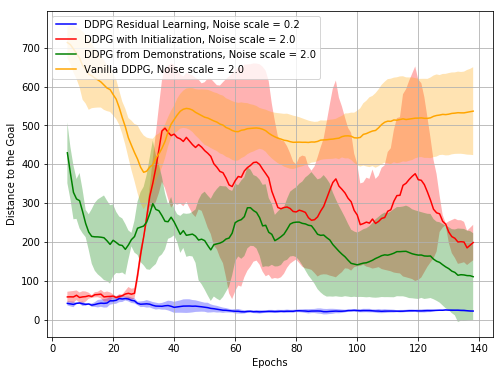

In [89]:
# sparse reward
# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
y11=[41.88078318274385, 80.15609770940699, 24.73863375370596, 47.38143096192854, 73.824115301167, 33.95585369269929, 28.30194339616981, 29.0, 25.942243542145693, 34.36568055487916, 29.546573405388315, 90.55385138137417, 18.788294228055936, 6.4031242374328485, 59.841457201508724, 65.19202405202648, 23.706539182259394, 50.59644256269407, 37.16180835212409, 33.421549934136806, 73.05477397131553, 46.57252408878007, 118.06777714516353, 10.04987562112089, 60.166435825965294, 60.00833275470999, 65.37583651472461, 55.326304774492215, 45.60701700396552, 70.0, 38.01315561749642, 25.80697580112788, 27.892651361962706, 67.23094525588644, 90.4267659490264, 42.05948168962618, 31.25699921617557, 32.0624390837628, 46.84015371452148, 50.35871324805669, 61.68468205316454, 63.89053137985315, 66.85057965343307, 72.80109889280519, 62.81719509815764, 50.59644256269407, 58.52349955359813, 50.24937810560445, 49.03060268852505, 41.23105625617661, 52.392747589718944, 44.10215414239989, 49.03060268852505, 41.773197148410844, 49.72926703662542, 13.416407864998739, 18.110770276274835, 23.769728648009426, 7.280109889280518, 12.806248474865697, 15.0, 18.027756377319946, 21.18962010041709, 15.652475842498529, 14.866068747318506, 20.024984394500787, 17.11724276862369, 22.02271554554524, 21.540659228538015, 13.038404810405298, 12.529964086141668, 11.40175425099138, 16.1245154965971, 22.360679774997898, 12.165525060596439, 16.15549442140351, 19.235384061671343, 20.248456731316587, 22.02271554554524, 6.4031242374328485, 10.0, 21.02379604162864, 22.02271554554524, 30.870698080866262, 14.035668847618199, 13.92838827718412, 12.041594578792296, 4.123105625617661, 14.866068747318506, 7.810249675906654, 9.848857801796104, 13.601470508735444, 18.027756377319946, 11.40175425099138, 19.235384061671343, 17.46424919657298, 20.615528128088304, 13.0, 21.095023109728988, 25.495097567963924, 27.018512172212592, 22.135943621178654, 16.278820596099706, 21.095023109728988, 5.0, 18.0, 15.132745950421556, 8.54400374531753, 29.410882339705484, 16.0312195418814, 7.810249675906654, 14.317821063276353, 24.08318915758459, 15.264337522473747, 21.95449840010015, 17.26267650163207, 20.615528128088304, 18.384776310850235, 22.847319317591726, 19.026297590440446, 18.0, 24.698178070456937, 19.6468827043885, 12.041594578792296, 17.46424919657298, 16.1245154965971, 28.861739379323623, 24.186773244895647, 39.05124837953327, 30.870698080866262, 27.0, 32.57299494980466, 23.345235059857504, 23.021728866442675, 23.769728648009426, 17.11724276862369, 31.575306807693888, 33.24154027718932, 29.427877939124322, 10.63014581273465, 15.811388300841896, 19.1049731745428]
y12=[42.5205832509386, 49.040799340956916, 9.486832980505138, 23.769728648009426, 51.24451190127583, 42.04759208325728, 35.34119409414458, 25.632011235952593, 40.11234224026316, 16.1245154965971, 52.69724850502159, 72.94518489934754, 53.85164807134504, 59.481089431852205, 39.0, 21.93171219946131, 21.93171219946131, 64.63745044476924, 87.46427842267951, 67.00746227100382, 90.4267659490264, 58.69412236331676, 45.0111097397076, 62.433965115151864, 52.773099207835045, 68.94200461257273, 21.2602916254693, 57.245087125446844, 50.53711507397311, 24.0, 22.825424421026653, 21.840329667841555, 22.80350850198276, 62.297672508690084, 62.64982043070834, 15.033296378372908, 30.675723300355934, 33.12099032335839, 32.89376840679705, 20.09975124224178, 5.0990195135927845, 15.811388300841896, 20.615528128088304, 7.280109889280518, 17.72004514666935, 32.7566787083184, 27.294688127912362, 25.0, 26.92582403567252, 17.11724276862369, 23.323807579381203, 21.213203435596427, 6.324555320336759, 10.295630140987, 8.246211251235321, 28.42534080710379, 21.400934559032695, 8.94427190999916, 17.029386365926403, 14.035668847618199, 37.57658845611187, 19.026297590440446, 20.615528128088304, 13.341664064126334, 22.847319317591726, 9.0, 23.40939982143925, 29.068883707497267, 12.36931687685298, 15.297058540778355, 19.235384061671343, 18.027756377319946, 33.83784863137726, 25.317977802344327, 32.01562118716424, 20.09975124224178, 26.570660511172846, 29.832867780352597, 12.0, 20.223748416156685, 25.96150997149434, 25.709920264364882, 23.08679276123039, 33.1058907144937, 19.1049731745428, 19.026297590440446, 17.26267650163207, 14.866068747318506, 27.65863337187866, 34.0147027033899, 21.37755832643195, 22.20360331117452, 16.0312195418814, 30.265491900843113, 33.52610922848042, 30.066592756745816, 18.384776310850235, 25.709920264364882, 19.026297590440446, 23.40939982143925, 32.01562118716424, 17.11724276862369, 20.248456731316587, 9.219544457292887, 33.015148038438355, 25.495097567963924, 28.071337695236398, 33.83784863137726, 15.132745950421556, 35.12833614050059, 23.53720459187964, 23.259406699226016, 19.1049731745428, 21.470910553583888, 25.019992006393608, 20.248456731316587, 24.186773244895647, 25.079872407968907, 22.135943621178654, 21.633307652783937, 20.8806130178211, 20.09975124224178, 27.018512172212592, 8.06225774829855, 23.0, 28.792360097775937, 26.076809620810597, 22.090722034374522, 25.238858928247925, 28.284271247461902, 24.166091947189145, 18.110770276274835, 17.029386365926403, 16.1245154965971, 20.615528128088304, 30.610455730027933, 23.706539182259394, 20.8806130178211, 21.02379604162864, 21.540659228538015, 15.0, 30.528675044947494]
y13=[27.80287754891569, 31.400636936215164, 111.9866063420086, 18.35755975068582, 15.652475842498529, 100.24470060806208, 16.0312195418814, 82.22530024268686, 31.144823004794873, 23.769728648009426, 46.486557196677836, 54.3415126767741, 43.18564576337837, 15.524174696260024, 41.593268686170845, 17.204650534085253, 11.40175425099138, 23.853720883753127, 8.94427190999916, 65.92419889539804, 39.96248240537617, 34.66987164671943, 69.52697318307479, 67.26812023536856, 31.38470965295043, 48.83646178829912, 22.02271554554524, 50.24937810560445, 39.05124837953327, 17.08800749063506, 43.56604182158393, 9.899494936611665, 27.85677655436824, 32.38826948140329, 35.35533905932738, 26.68332812825267, 22.825424421026653, 17.0, 20.8806130178211, 30.886890422961002, 25.495097567963924, 15.231546211727817, 24.596747752497688, 33.24154027718932, 34.23448553724738, 25.179356624028344, 27.294688127912362, 26.92582403567252, 30.4138126514911, 20.09975124224178, 25.079872407968907, 24.0, 34.48187929913333, 32.28002478313795, 21.213203435596427, 20.396078054371138, 39.824615503479755, 41.10960958218893, 26.570660511172846, 29.832867780352597, 31.064449134018133, 25.495097567963924, 21.37755832643195, 31.78049716414141, 23.769728648009426, 20.09975124224178, 23.08679276123039, 27.202941017470888, 30.4138126514911, 28.284271247461902, 36.138621999185304, 20.024984394500787, 21.95449840010015, 19.0, 22.360679774997898, 25.709920264364882, 21.095023109728988, 26.92582403567252, 29.017236257093817, 34.20526275297414, 25.709920264364882, 19.1049731745428, 22.360679774997898, 35.34119409414458, 32.984845004941285, 25.0, 37.64306044943742, 24.698178070456937, 35.84689665786984, 24.08318915758459, 35.4400902933387, 23.08679276123039, 27.16615541441225, 23.021728866442675, 23.08679276123039, 28.861739379323623, 18.601075237738275, 28.460498941515414, 28.30194339616981, 29.966648127543394, 29.832867780352597, 26.076809620810597, 41.48493702538308, 28.284271247461902, 27.202941017470888, 27.294688127912362, 26.92582403567252, 21.540659228538015, 18.24828759089466, 23.345235059857504, 31.04834939252005, 24.186773244895647, 28.442925306655784, 33.015148038438355, 22.561028345356956, 28.442925306655784, 13.152946437965905, 18.439088914585774, 33.83784863137726, 37.12142238654117, 35.11409973215888, 28.160255680657446, 24.351591323771842, 37.05401462729781, 25.079872407968907, 22.561028345356956, 17.26267650163207, 31.953090617340916, 25.019992006393608, 28.442925306655784, 25.298221281347036, 18.110770276274835, 39.21734310225516, 12.041594578792296, 17.804493814764857, 27.018512172212592, 20.0, 23.0, 32.984845004941285, 26.076809620810597, 18.601075237738275, 26.476404589747453]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[33.015148038438355, 46.17358552246078, 79.02531240052139, 69.58448102845921, 18.027756377319946, 20.248456731316587, 44.77722635447622, 37.12142238654117, 39.92492955535426, 5.830951894845301, 24.041630560342615, 152.029602380589, 14.422205101855956, 9.219544457292887, 55.362442142665635, 119.01260437449471, 105.11898020814318, 79.61155694998057, 43.01162633521314, 92.19544457292888, 17.72004514666935, 49.20365840057018, 32.2490309931942, 56.79788728465171, 66.03029607687671, 42.720018726587654, 126.0634760745554, 16.401219466856727, 58.249463516842795, 39.408120990476064, 38.27531841800928, 356.4828186603107, 538.327038146887, 615.0203248673981, 694.288124628385, 775.8376118750624, 773.7415589200311, 762.5726194927274, 750.429210518887, 723.21297001644, 717.899714444852, 660.5603681723571, 710.4984166062582, 691.9898843191279, 611.5962720618888, 593.41806511093, 681.5665778190712, 778.0501269198534, 773.9928940242281, 745.9785519704974, 642.2974388863777, 626.5540678983738, 631.0784420339519, 651.5243663900836, 703.6192152009494, 725.4598541614829, 752.372912856384, 722.9287655087463, 790.7275131168765, 764.6966718902339, 766.5800675728531, 759.0520403766793, 764.6966718902339, 779.1155241682712, 778.2499598458069, 754.2844291114593, 758.1292765749124, 766.4209026377087, 759.3681584053943, 767.2835199585613, 748.2512946864844, 766.4574352173772, 742.4675077065663, 684.9598528381061, 443.9211641721985, 120.50726119201282, 242.0433845408711, 338.5911989405513, 687.6641622187389, 718.672387113906, 613.8574753149138, 530.904887903662, 448.8797166279626, 348.919761549844, 315.6596268134397, 281.58480072617556, 282.85155117128136, 363.9793950212017, 569.7946998700497, 729.8527248698877, 773.6439749652291, 730.0828720083769, 592.3596880274687, 780.97375115941, 769.3802700875556, 745.5823227518206, 604.1870571271782, 51.62363799656123, 446.3653212336281, 430.5124853009492, 411.02433018010015, 454.2477297686803, 138.84163640637487, 464.47604889811055, 91.0823802938856, 668.9521657039463, 224.8777445635739, 413.65686262891853, 745.9524113507509, 102.1077861869505, 571.8959695608984, 407.3143748997818, 556.5294241996554, 528.0340898086032, 788.0412425755393, 786.375228501, 787.1626261453221, 787.175329897984, 790.5162869922416, 719.0716236926611, 654.7136778775895, 772.1845634302722, 744.7791618996869, 413.6786192202831, 681.7404198080087, 380.13155617496426, 203.78910667648555, 187.8430195668713, 73.40980860893181, 240.41630560342617, 122.18428704215611, 186.45374761586316, 148.71785366928881, 141.53444810363305, 84.31488599292535, 63.694583757176716, 27.202941017470888, 92.28217596047462, 273.0567706540162, 115.42096863222038, 217.3131381210073, 192.27584351654787]
y22=[49.76946855251722, 154.7966407904254, 66.91038783328041, 89.40357934669059, 22.47220505424423, 97.082439194738, 16.401219466856727, 119.86659251017358, 65.0, 32.64965543462902, 83.6719785830358, 100.84145972763385, 30.0, 56.85068161420758, 54.12947441089743, 65.85590330410783, 21.540659228538015, 70.43436661176133, 17.4928556845359, 37.107950630558946, 45.34313619501854, 11.180339887498949, 84.64632301523794, 136.40014662748717, 53.665631459994955, 71.61005515987263, 98.76234100101111, 139.12943613772032, 171.97674261364529, 3.0, 7.0710678118654755, 425.5643312120977, 605.800297127692, 440.55646630142655, 578.7270513808734, 498.2298666278448, 359.79021665409414, 338.2927726097618, 320.22492095400696, 314.5313974788527, 423.985848820453, 356.02247120090607, 385.48800240733823, 228.60008748904713, 161.0372627685903, 129.0968628588627, 216.26141588364763, 320.0890501094969, 283.8203657245195, 380.8017857100988, 401.3140914545613, 544.063415421401, 604.4170745437293, 266.1296676434253, 129.52991932368366, 37.48332962798263, 42.190046219457976, 58.008620049092706, 43.104524124504614, 164.19500601419034, 53.36665625650534, 137.03284277865654, 249.92999019725505, 320.7023542164915, 220.27482833950864, 119.9208072020865, 162.96318602678338, 192.04426573058618, 328.5681055732586, 292.4414471308744, 229.01964981197574, 182.13456563760764, 157.33403954643762, 174.34735443934903, 235.5949914577982, 231.00865784641059, 266.47513955339247, 197.3068675946177, 169.3576098083579, 186.3249849054066, 176.0454486773231, 174.77127910500627, 69.81403870282824, 136.444127759314, 66.52818951391959, 82.87943049997388, 65.79513659838392, 62.80127387243033, 111.61093136427094, 84.86459803710851, 57.8013840664737, 127.94530081249565, 140.03570973148243, 70.3846574190711, 70.80254232723568, 74.46475676452586, 64.4437739428721, 118.90332207301863, 101.78899744078434, 118.70130580579136, 80.15609770940699, 85.0, 129.24395537122808, 97.20082304178294, 81.39410298049853, 106.06601717798213, 70.9365914038728, 83.48652585896721, 96.67471230885562, 89.15716460273958, 114.49017425089369, 94.86832980505137, 87.36704184073076, 114.47707194019246, 99.86490875177326, 113.17243480636087, 146.38647478507022, 120.56948204251356, 132.5481044753187, 120.50726119201282, 119.20570456148481, 115.41230437002807, 107.82393055347222, 85.09406559801923, 185.64751546950473, 268.83452159274486, 202.51419703319567, 151.40013210033868, 167.5231327309754, 275.77164466275354, 684.965692571533, 143.8923208513922, 151.82226450688975, 191.049731745428, 289.35963782117227, 203.42320418280704, 90.33825324855468, 165.59287424282482, 236.08896628178115, 308.01623333843946, 298.41246622753545, 290.077575831018]
y23=[60.81118318204309, 14.866068747318506, 93.81364506296512, 51.62363799656123, 36.40054944640259, 35.84689665786984, 158.48343762046557, 35.608987629529715, 32.202484376209235, 111.61093136427094, 101.51354589413178, 101.11874208078342, 12.041594578792296, 53.823786563191554, 63.071388124885914, 94.2443632266673, 11.40175425099138, 110.81967334368028, 105.54619841567009, 107.2240644631605, 97.082439194738, 18.601075237738275, 13.601470508735444, 3.605551275463989, 62.369864518050704, 90.9065454189081, 94.2019108086455, 126.24579200908045, 53.85164807134504, 58.463663928973865, 96.66436778875658, 580.9956970580763, 524.3090691567331, 323.82711436814554, 309.7418279793674, 492.7149277219029, 68.0294054067798, 258.4143958838207, 280.713376952364, 407.4947852427071, 415.5406117336788, 365.92485567394846, 56.32051136131489, 758.516974101437, 758.8425396615559, 390.38698748805655, 280.0017857085915, 534.8018324575936, 133.63382805263043, 182.4636950190366, 140.0142849854971, 184.8053029542172, 267.1198233003309, 369.3954520564648, 98.84331034521254, 196.9771560359221, 324.2344830520036, 169.59363195591985, 181.51583952922675, 167.6007159889241, 155.6181223379848, 137.64083696345355, 158.8238017426859, 236.6600938054407, 255.38402455909414, 195.74728606036916, 462.3905275846381, 289.56001105124994, 160.099968769516, 115.93532679903913, 88.88756943465155, 61.29437168288782, 104.67568963231147, 96.00520819205592, 78.05767098754612, 116.72617529928752, 162.87418457201866, 154.5477272560163, 233.0772404161333, 248.1954874690513, 253.91730937452846, 197.56770991232347, 227.7827912727386, 239.26972228010797, 209.0287061625747, 241.59884105682295, 253.03161857759991, 296.2836478781777, 292.04965331258313, 267.9776110050987, 267.22649569232465, 289.8499611868182, 322.8327740487325, 308.65028754238995, 322.0465804817682, 315.35694062442957, 304.19894805866767, 300.9867106700892, 308.97410894765926, 297.5315109362368, 287.76726707532254, 279.4029348450012, 285.17538463198395, 282.6057324259365, 291.19237627383035, 275.0654467576762, 276.65321252427196, 291.547594742265, 286.69844785069904, 280.94305472817797, 272.9468812791236, 260.40929322894755, 260.9291091465266, 258.6600085053737, 266.092089322475, 259.11580422660444, 253.17977802344325, 239.67686580060246, 243.3105012119288, 262.0534296665472, 249.72384747957094, 236.0, 232.14219780126146, 241.66091947189145, 245.93088459971838, 238.17010727629108, 232.1055794245369, 266.1766330841233, 224.0089283934906, 259.12352266824405, 245.34465553584002, 236.13555429032706, 236.47621444872632, 233.25951213187426, 199.12307751739877, 255.14897609044016, 228.69411885748178, 229.0349318335524, 242.0743687382041, 225.00888871331284, 234.77648945326703, 239.30106560565082]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31=[683.7104650361877, 578.1850914715806, 290.0, 400.3623358908777, 405.0197526047341, 185.27007313648906, 299.1003176193566, 223.6515146382872, 177.11578134090706, 316.5390971112415, 67.54257916307313, 201.42740627829173, 126.0, 305.2212312405544, 80.23091673413684, 83.09632964216891, 150.86417732516887, 60.8276253029822, 218.66183937761065, 179.47144619688115, 320.97507691408066, 358.98746496221844, 206.64946164943183, 335.5145302367693, 212.60291625469299, 223.68057582186256, 119.03780911962384, 76.40026177965623, 69.12307863514182, 55.08175741568164, 103.77379245262264, 59.80802621722272, 112.16059914247963, 127.06297651164952, 87.14355971613737, 103.31505214633539, 170.1763790894612, 187.0, 270.60118255469615, 250.04999500099976, 245.10609947530887, 418.63229689072006, 220.4835594777987, 374.4769685841841, 402.24370722237535, 215.0, 203.09603639657766, 163.97560794215707, 146.81961721786362, 128.3627671873741, 93.53608929178085, 123.54756169184401, 96.46242791885346, 127.47548783981962, 59.36328831862332, 60.108235708594876, 119.41942890501528, 121.1486689980538, 108.07404868885037, 185.17289218457435, 217.5890622251036, 149.4958193395387, 271.3595400939499, 266.6627083039546, 126.90547663517127, 203.2953516438583, 165.64117845511726, 409.8707113224852, 263.0931394012394, 204.24495097798624, 145.96232390586277, 145.6193668438371, 102.39628899525607, 129.49517365523704, 91.35097153287424, 144.83784035948617, 195.25624189766637, 264.5467822522134, 257.5616431070434, 283.6370920736567, 292.2892403082946, 347.89941074971654, 367.78934187928826, 321.1261434389919, 284.63485380395707, 238.01890681204299, 278.1150840928985, 248.34049206683954, 248.93774322107123, 189.4887859478761, 181.22361876973983, 223.98660674245681, 223.6604569431083, 185.33483212823216, 235.15314159075146, 188.53381659532593, 204.215572373901, 226.88322987827902, 207.0024154448445, 170.14405661086138, 180.22485955050706, 180.27756377319946, 205.24375751773792, 202.40553352119602, 218.22007240398395, 211.3764414498456, 218.68927728629038, 224.19857269840057, 232.6972281742952, 222.29934772733816, 243.52617929085162, 241.00622398602076, 213.23461257497573, 212.0, 229.83689869122406, 206.34194920083507, 200.28230076569423, 208.38665984174708, 196.22945752358385, 202.5956564193813, 216.27991122617004, 207.06037766796427, 182.00274723201295, 211.28416883429767, 216.6748716395143, 251.87298386289865, 212.90608258102915, 327.5622078323444, 20.8806130178211, 13.92838827718412, 6.708203932499369, 1.0, 25.709920264364882, 73.08214556237385, 71.5122367151245, 128.4562182223967, 45.35416188179427, 39.59797974644666, 4.47213595499958, 26.019223662515376, 4.47213595499958, 21.37755832643195]
y32=[718.1782508542012, 696.6232841356941, 680.6614430096654, 100.17983829094555, 528.1713737036494, 690.7076081816386, 691.9378584815258, 553.5720368660252, 190.68822721919673, 108.01851693112621, 267.5256997000475, 269.0018587296378, 271.02951868754076, 90.24965373894794, 101.31633629380802, 79.64923100695951, 80.43009387039157, 72.62231062146122, 83.773504164503, 78.05767098754612, 75.05997601918082, 63.198101237299845, 44.9221548904324, 211.69081227110448, 115.41230437002807, 65.11528238439882, 97.59098319004681, 48.38388161361178, 535.6164672599228, 692.5258117933223, 366.0833238485468, 521.359760626, 493.53925882344964, 302.15393427853957, 392.56209699867867, 611.9158438870495, 550.9863882166237, 168.1903683330291, 431.5611196574594, 80.62257748298549, 97.51410154434076, 171.04970037974343, 525.0904683956851, 20.248456731316587, 27.459060435491963, 147.6787053031005, 132.24220203853233, 91.21951545584969, 67.4166151627327, 75.76938695805846, 87.68124086713189, 55.036351623268054, 75.05997601918082, 59.50630218724736, 40.0, 32.38826948140329, 333.9715556750305, 33.97057550292606, 51.03920062069938, 127.81627439414747, 170.83617883809038, 204.88289338058462, 337.81651824622196, 448.7538300672207, 155.46703830716015, 176.8530463407402, 121.03718436910205, 121.06609764917675, 136.12494260788506, 140.24621207005913, 108.15729286552988, 161.07451691686057, 146.32839779072276, 182.1647605877712, 176.50495743746123, 166.7213243709394, 180.49930747789588, 163.36768346279504, 158.61904047118682, 142.57980221616245, 128.65457628860312, 120.07497657713701, 68.41052550594829, 52.3450093132096, 25.709920264364882, 33.015148038438355, 7.615773105863909, 10.04987562112089, 34.20526275297414, 28.653097563788805, 10.198039027185569, 20.808652046684813, 20.615528128088304, 10.770329614269007, 27.202941017470888, 20.09975124224178, 25.80697580112788, 20.0, 14.317821063276353, 34.92849839314596, 26.248809496813376, 26.30589287593181, 26.1725046566048, 22.135943621178654, 19.4164878389476, 14.560219778561036, 10.04987562112089, 13.892443989449804, 6.4031242374328485, 7.0710678118654755, 18.24828759089466, 29.427877939124322, 12.529964086141668, 22.561028345356956, 6.082762530298219, 6.708203932499369, 47.70744176750625, 9.486832980505138, 14.317821063276353, 9.486832980505138, 5.0, 7.280109889280518, 18.867962264113206, 3.0, 35.0, 3.605551275463989, 20.615528128088304, 6.324555320336759, 13.038404810405298, 10.816653826391969, 25.298221281347036, 8.54400374531753, 7.810249675906654, 56.72741841473134, 17.26267650163207, 6.082762530298219, 6.708203932499369, 42.638011210655684, 8.48528137423857, 11.180339887498949, 14.035668847618199, 1.4142135623730951]
y33=[712.9214542991394, 664.7179853140728, 194.164878389476, 460.7168327725828, 390.12433915355757, 353.45155254999236, 251.80349481291955, 255.82806726393412, 224.01785643113362, 273.99452549275503, 270.95571593897034, 239.0188277102873, 441.86536410992886, 168.36270370839262, 222.03152929257593, 482.93270752766375, 503.3219645515185, 429.2528392451237, 390.8068576675696, 327.96341259353915, 274.8981629622141, 203.2953516438583, 63.387695966961914, 143.17821063276352, 167.2423391369542, 276.3494165001982, 303.9819073563425, 301.0398644698074, 282.25166075685013, 297.9546945426435, 367.4615626157381, 311.75150360503477, 164.7573974060042, 138.6001443000692, 362.49275854836054, 387.17696212455616, 403.8972641650349, 127.76932339180638, 251.38217916153087, 166.48123017325406, 158.97798589741913, 150.81445554057476, 133.64505228402584, 118.86967653695369, 239.20702330826325, 333.2641594891356, 408.63675801376456, 371.9744614889576, 325.16149833582693, 338.59858239514233, 419.1479452412954, 428.8822682275405, 402.0572098594925, 382.1230168414355, 260.18839328455834, 346.0014450836875, 528.3937925449162, 447.5991510268982, 435.96559497281436, 388.4958172233004, 400.7043798113517, 286.81004166521086, 295.7177708559295, 378.1904282236662, 287.5865087238968, 679.6506455525515, 523.2332175999533, 677.7905281132217, 310.55595309058236, 246.0081299469593, 253.60205046489668, 238.79907872519107, 271.8602582210206, 302.768888758406, 302.64335446198055, 358.2652648527345, 392.0420895771269, 405.7647101461634, 324.5566206380637, 261.3962509295036, 457.5904282215702, 415.12046444375636, 282.66057383370605, 229.21169254643183, 362.7795473838072, 409.0684539291682, 511.00293541231247, 388.13528569301707, 369.0, 381.5455411874184, 380.3011964219939, 398.05778474990285, 380.76370625362915, 293.47061181658376, 260.9233603953467, 269.74246977441277, 185.39687160251654, 169.49926253526885, 172.13076424625552, 187.0, 198.4263087395419, 200.12246250733574, 205.36065835500236, 249.51352668743232, 297.0269348055829, 251.40604606890423, 213.37759957408838, 234.76371099469355, 246.45486402179202, 298.52973051272465, 237.9768896342668, 271.4000736919576, 303.29523570277195, 278.29660436304283, 300.48294460751015, 306.5746238683169, 332.6875410952445, 267.36678926149375, 333.4936281250363, 295.16266701600324, 236.90715480964266, 228.0021929719098, 260.36320784627003, 281.8386062980017, 273.3587386567329, 258.953663808798, 239.30106560565082, 220.90722034374522, 254.70178640912593, 289.46847842209, 327.7148150450327, 288.367820673528, 312.8274284649605, 273.93612394133055, 252.0972034751675, 252.0972034751675, 304.7950130825634, 243.00205760445732, 284.6840353795766, 277.79488836189915, 272.88275870783775, 253.0177859360879]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2.0
y51=[660.7208185005222, 760.7115090492584, 763.0419385590808, 739.2624703040186, 760.4275113381946, 690.6265271476328, 712.7748592648312, 649.3265742290239, 616.640089517378, 610.7249790208356, 651.1835378754595, 661.6010882699635, 621.003220603565, 632.446045129543, 622.7816631854216, 598.5591031802958, 536.1576260765112, 486.29723420969606, 513.8248728895868, 502.0129480401875, 473.07081922266144, 491.64723125428054, 449.45522580119143, 502.5733777270738, 505.07920170998926, 481.4156208516712, 419.66296000481145, 482.8674766434368, 468.64592177890546, 478.0732161499952, 481.66585928421375, 471.85167160878007, 443.1907038736259, 460.41937404935516, 484.9340161300298, 489.70399222387397, 499.5618079877604, 518.376311187153, 519.2494583531118, 556.2670222114556, 574.1576438575037, 603.5304466222065, 604.5494189890517, 585.0538436759475, 594.8319090297695, 582.274849190655, 588.2388970477896, 583.6308764964376, 586.4716531939118, 574.0679402300742, 574.3561612797412, 594.0134678607885, 593.3843611016388, 602.3985391748556, 584.1438179078847, 585.4032797994901, 573.1195337798215, 579.2495144581478, 554.1091950148455, 579.5903725908497, 575.1252037600161, 556.4287914908789, 579.8706752371601, 557.280001435544, 557.2369334493183, 580.856264492344, 569.3680707591532, 547.4486277268397, 556.3640894234637, 538.4542691817013, 544.273828141681, 533.8108279156578, 536.2359555270422, 545.1541066524218, 548.3101312213737, 544.2949568019163, 537.6178940474359, 530.0660336222271, 530.9256068414859, 524.8275907381394, 525.543528168695, 528.1552801970269, 527.99337117051, 517.8725711987457, 525.0009523800885, 509.77053661426925, 514.1915985311311, 511.54374202017175, 519.747053863704, 544.5383365751212, 532.6631205555722, 555.7130554521821, 524.5969881728258, 525.9781364277417, 537.6067335887824, 523.316347919688, 523.7146169432356, 570.9378249862239, 558.0224009840465, 629.1335311362764, 561.6297712906609, 571.700970788051, 554.2165641696394, 608.9047544567212, 600.1741413956453, 658.9764790946639, 644.0225151343701, 656.6125189181212, 659.8825653099194, 647.2480204681973, 672.6165326543795, 671.9077317608422, 689.0029027515051, 674.8525764935628, 675.4435579676514, 665.1375797532418, 671.6859385159108, 679.2996393345134, 645.5083268246816, 644.43618768657, 660.5369028298117, 684.2002630809199, 643.8276166801172, 642.6515385494693, 662.7888049748577, 677.5322870535396, 675.8113642134172, 685.5807756931345, 691.3298778441447, 686.9133860975487, 657.4191965557441, 673.9272957819709, 649.4251304038057, 684.8839317723844, 683.7909037125311, 671.1929677819934, 703.518301112345, 677.9764007692303, 696.1953748769091, 705.1354479814498, 701.3957513415661, 696.6153888624626]
y52=[709.6055242175049, 725.5480687039282, 790.5042694381859, 764.3906069543241, 788.0996129931799, 788.6222162734194, 787.9016436078808, 777.7814603087425, 762.0767677865531, 760.6319740847081, 750.0933275266485, 751.4093425024738, 752.7981137064571, 744.7227672093824, 705.5983276624173, 701.6010262250192, 690.7459735677074, 649.8653706730341, 682.9824302278939, 659.1540032496199, 661.5655674232147, 607.8174067925333, 579.2495144581478, 450.8979928986156, 410.35837995586246, 257.2353008434107, 189.65231345807516, 240.05207768315609, 229.83689869122406, 284.16368522385125, 300.1666203960727, 247.34186867572583, 198.57995870681412, 277.2381647609146, 402.0572098594925, 475.7856660304091, 400.9114615473097, 464.72357375110636, 456.9168414492948, 456.9748351933616, 472.7123861292403, 487.29457210192686, 490.5527494571812, 490.462027072433, 486.17383722286, 456.6530411592591, 468.0170937049201, 436.74363189404374, 422.4227740072734, 408.3882956207242, 393.83752995365995, 413.7257545766277, 398.39302202724383, 402.1243588742169, 424.8352621899458, 428.1331568566023, 406.1095911204265, 390.16022349798806, 355.9845502265513, 382.47222121351507, 388.0115977648091, 369.4157549428557, 363.93955542095176, 398.8746670321393, 436.16510635308737, 466.0268232623526, 433.45703362617155, 424.4997055358225, 435.08389995493974, 406.0369441319349, 425.7370080225584, 404.71224345206065, 380.5220098759072, 385.3894134508627, 369.2424677633926, 353.42042951702723, 363.14184556451215, 360.64664146502184, 367.3486082728503, 368.2078217528791, 367.0013623952914, 364.04670030093666, 386.700142229092, 387.48677396783495, 388.46492763182624, 387.44806103528254, 405.0098764227855, 396.6673669461606, 428.54404674432243, 408.5156055770697, 394.87213120198794, 414.9072185440981, 417.1390655404981, 392.8612986793176, 403.8972641650349, 408.667346383339, 406.295458995052, 409.6840245848012, 429.7033860699727, 410.41686125206894, 425.02705796219607, 430.99071915761715, 400.3448513469356, 430.9350299059012, 420.55677381300137, 428.84262847809333, 435.7636974324502, 453.85570394124164, 459.309264004113, 410.3656905736638, 437.0743643820809, 433.8767105987598, 422.2913686070318, 416.01923032475315, 444.20715887972807, 449.02672526253934, 425.1035168050248, 432.936484949005, 432.936484949005, 424.7257938953084, 423.1370936233315, 410.48751503547584, 419.5616760382197, 436.58905162635494, 443.7668306667365, 408.58903558465687, 432.7701468447194, 433.2689695789441, 432.7505054878619, 428.32931256219206, 437.0045766350737, 427.6493891028023, 424.5479949310796, 454.22901712682335, 406.69521757699584, 427.36986323324203, 427.387412074806, 421.2030389254095, 415.12046444375636, 426.3578309354714, 416.17304093369626, 417.0047961354881]
y53=[704.3244990769524, 745.4616019621668, 709.1015442092903, 745.5803108988326, 678.8121978868677, 687.5267267532223, 665.6072415471455, 510.13429604369867, 566.30115662958, 553.2630477449221, 533.0084427098693, 546.0741707863502, 539.0454526289967, 339.09438214160963, 587.1328640095016, 515.0242712727236, 606.704211292455, 636.5940621777743, 609.7417486116561, 627.4750991075264, 612.8295032062343, 603.3042350257456, 581.8771347973728, 618.9604187668223, 575.8055227244698, 507.6307713289256, 463.246154868014, 452.0553063508933, 325.5718046760192, 463.01295878193304, 419.3184947030121, 437.0308913566637, 364.38578457453576, 402.5878786054046, 436.86725672680024, 390.24351371931857, 442.6522337004525, 503.0159043211258, 537.0232769629264, 580.4007236384186, 582.3547029088028, 579.7240722964676, 579.9180976655238, 568.1487481285161, 590.3329568980542, 566.0883323298582, 569.0035149276321, 548.8624600025037, 555.4277630799527, 561.7775360407356, 545.7700981182461, 554.0541489782385, 538.2053511439663, 554.0324900220203, 541.8385368354673, 512.0790954530364, 485.10617394545704, 515.3493960411713, 497.0321921163658, 480.82949160799194, 431.3374549004526, 518.4023533897199, 495.04747247107525, 520.4853504182419, 522.5562170714267, 514.4803203233337, 514.78150704935, 511.22695547085544, 472.908024884332, 466.00429182572987, 485.7087604727755, 475.2020622850873, 498.3141579365371, 482.80845063026806, 470.00531911883724, 481.9232304008596, 471.7372149830878, 479.27027865287033, 447.8973096592566, 484.25819559404465, 487.9754092164891, 455.14063760556473, 453.7951079507138, 490.11223204486544, 471.42549782547826, 462.61539101071855, 453.40158799898353, 426.1748467472007, 459.84780090808306, 421.9253488473998, 464.42437489864807, 488.5990176003222, 466.17700500989963, 479.10437276234495, 447.0011185668331, 457.6166517949276, 441.955880150949, 454.25213263120736, 493.23422427889165, 402.4189359361709, 478.5404894050241, 379.0118731649445, 335.90028282214945, 334.3246924772384, 407.5904807524337, 493.3984191300171, 411.4328620808017, 466.1544808322666, 405.51325502380314, 447.54441120407256, 455.6336247469012, 414.79754097631775, 419.1443665373543, 412.08858271007705, 449.2315661215271, 471.8315377335432, 463.64318176804886, 460.6256614649253, 474.3838108536167, 445.862086300237, 466.27459720641014, 464.62457963392336, 477.07965791888466, 493.5838327984416, 493.9311692938602, 445.7084248698918, 460.66256631074333, 470.9278076308512, 495.4200238181739, 493.8511921621735, 494.77267507411926, 485.7869903568847, 482.420977984996, 493.45415187228895, 493.45415187228895, 489.004089962446, 489.1553945322488, 509.40062818964014, 497.3298704079617, 496.92353536535177, 501.74894120466263, 491.7234995401379]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.2', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
# plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Distance to the Goal')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step7.pdf')


# small dataset of demonstations

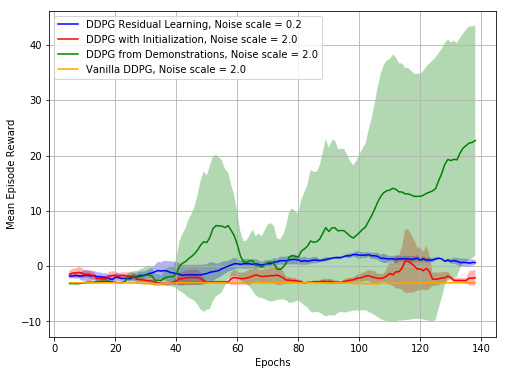

In [74]:
# sparse reward
# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
y11=[-3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, 0.0, 3.0, -3.0, 0.0, -3.0, 3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0]
y12=[-3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, 0.0, -3.0, -3.0, 0.0, 0.0, 0.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0, 0.0, 0.0, 0.0]
y13=[0.0, -3.0, -3.0, 0.0, 0.0, -3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, 3.0, 0.0, -3.0, 0.0, -3.0, -3.0, 3.0, -3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, -3.0, 3.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[-3.0, 0.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 0.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.5714285, -3.0, -4.142857, -4.142857, -3.5714285, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.714286, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 3.0, -3.0, 3.0, 0.0, 0.0, 0.0, 0.0, -3.5714285, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.714286, -4.142857, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285]
y22= [-3.0, -3.0, -3.0, 0.0, -3.0, -3.0, 3.0, -3.0, 3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, 3.0, -3.0, -3.0, 0.0, 0.0, -3.0, 6.0, -3.0, -3.0, 0.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.0, -3.5714285, 2.4285715, 6.0, 6.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 3.0, 3.0, 9.0, -3.0, 0.0, -3.0, 0.0, -3.0, 3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 6.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 12.0, -3.0, 9.0]
y23=[-3.0, 0.0, -3.0, -3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 0.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.714286, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, 12.0, 2.4285715, -3.0, -3.0, -3.0, 0.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -0.5714286, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, 0.0, -3.0, -0.5714286, -3.0, -3.0, 0.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -0.5714286, -3.0, 6.0, 9.0, 12.0, -3.0, 15.0, -3.0, 15.0, 33.0, -3.0, -3.0, -3.0, -3.0, -3.0, 6.0, 9.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.142857, -3.0, -3.0]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31 = [-3.0, -3.0, -3.0, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, 5.428571, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.0, -3.0, -3.5714285, -3.0, -4.142857, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.0, -3.0, -3.0, 3.0, 6.0, 27.0, 9.0, 0.0, 3.0, 5.428571, 12.0, 3.0, -3.0, -4.142857, -3.0, -4.142857, -4.142857, -1.1428572, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -5.285714, -4.714286, -4.142857, -3.5714285, -3.5714285, -3.5714285, -4.142857, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, 2.4285715, 32.42857, 29.428572, 38.42857, 21.0, -3.0, 0.0, 0.0, 30.0, 27.0, 38.42857, 39.0, 44.42857, 33.0]
y32=[-3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, 0.0, 9.0, 0.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, -3.0, -3.0, 0.0, -3.0, 6.0, 6.0, 3.0, 0.0, 15.0, 33.0, 12.0, 12.0, 15.0, 18.0, 21.0, 27.0, 30.0, 33.0, 24.0, 30.0, 24.0, 15.0, 12.0, 12.0, 6.0, 18.0, 3.0, 2.4285715, -3.0, -3.0, 0.0, 15.0, 24.0, 21.0, 9.0, 9.0, -3.0, 9.0, 9.0, 3.0, 9.0, 0.0, 18.0, 18.0, 27.0, 27.0, 15.0, 3.0, -3.0, 39.0, 15.0, 33.0, 48.0, 24.0, 27.0, 27.0, 30.0, 24.0, 21.0, 30.0, 33.0, 30.0, 24.0, 27.0, 15.0, 18.0, 15.0, 30.0, 42.0, 45.0, 39.0, 51.0, 51.0, 45.0, 51.0, 42.0, 48.0, 51.0, 48.0, 48.0, 45.0, 39.0, 45.0, 42.0, 42.0, 42.0, 45.0, 48.0, 48.0, 51.0, 48.0, 51.0, 48.0, 48.0, 45.0, 48.0, 51.0, 48.0, 45.0, 51.0, 45.0, 48.0, 48.0, 51.0, 51.0, 48.0, 45.0]
y33=[-3.0, -3.0, -4.142857, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, 0.0, -3.0, -3.0, -3.0, 0.0, -3.5714285, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -3.5714285, -3.0, -5.857143, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -6.428571, -6.428571, -4.142857, -4.142857, -8.714286, -9.857142, -5.857143, -4.714286, -5.285714, -7.0, -3.0, -3.0, -3.0, -3.0, -3.0, -5.857143, -3.0, -4.714286, -5.285714, -4.142857, -4.714286, -4.142857, -4.714286, -5.285714, -5.285714, -5.285714, -6.428571, -5.857143, -6.428571, -5.285714, -4.142857, -4.714286, -3.0, -3.0, -3.5714285, -3.0, -3.5714285, -4.142857, -5.285714, -8.142858, -5.857143, -8.142858, -5.857143, -3.0, -3.5714285, -3.0, -3.0, -6.428571, -5.285714, -5.857143, -5.285714, -4.142857, -4.714286, -4.714286, -4.142857, -4.142857, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2.0
y51=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y52=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y53=[-3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -4.142857, -3.0, -3.0, -3.0, -5.285714, -3.5714285, -3.0, -4.142857, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -5.857143, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -4.714286, -3.0, -3.0, -3.0, -3.0, -3.5714285, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.2', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
# plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step8.pdf')


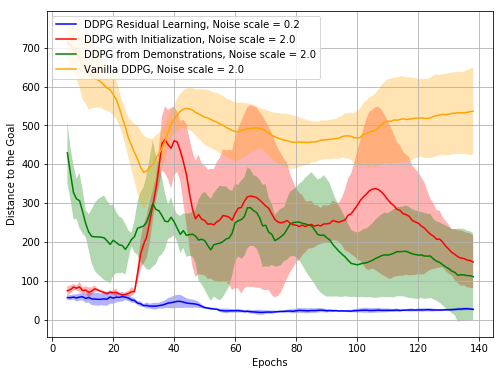

In [93]:
# sparse reward
# comparison of reward, large dataset 1000 episodes;
# 3000 steps, fine tune for each methods
import numpy as np
import matplotlib.pyplot as plt


x0 = [21, 42, 63, 84, 105, 126, 147, 168, 189, 210, 231, 252, 273, 294, 315, 336, 357, 378, 399, 420, 441, 462, 483, 504, 525, 546, 567, 588, 609, 630, 651, 672, 693, 714, 735, 756, 777, 798, 819, 840, 861, 882, 903, 924, 945, 966, 987, 1008, 1029, 1050, 1071, 1092, 1113, 1134, 1155, 1176, 1197, 1218, 1239, 1260, 1281, 1302, 1323, 1344, 1365, 1386, 1407, 1428, 1449, 1470, 1491, 1512, 1533, 1554, 1575, 1596, 1617, 1638, 1659, 1680, 1701, 1722, 1743, 1764, 1785, 1806, 1827, 1848, 1869, 1890, 1911, 1932, 1953, 1974, 1995, 2016, 2037, 2058, 2079, 2100, 2121, 2142, 2163, 2184, 2205, 2226, 2247, 2268, 2289, 2310, 2331, 2352, 2373, 2394, 2415, 2436, 2457, 2478, 2499, 2520, 2541, 2562, 2583, 2604, 2625, 2646, 2667, 2688, 2709, 2730, 2751, 2772, 2793, 2814, 2835, 2856, 2877, 2898, 2919, 2940, 2961, 2982] 
# steps -> training epoch, 21 steps per epoch
x0 = np.array(x0)/21
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# # res
y11=[82.22530024268686, 59.53990258641679, 56.0357029044876, 60.41522986797286, 14.317821063276353, 104.69479452198185, 30.364452901377952, 101.04454463255303, 60.876925020897694, 64.1404708432983, 81.27115109311545, 61.40032573203501, 63.52952069707436, 23.194827009486403, 54.817880294662984, 120.60265337047937, 21.213203435596427, 54.62600113499065, 93.02150289046077, 77.27871634544663, 94.54099639838793, 50.99019513592785, 115.80155439371269, 25.079872407968907, 118.03812943282352, 8.246211251235321, 79.1580697086532, 21.93171219946131, 42.5440947723653, 82.34682750416071, 23.769728648009426, 32.89376840679705, 24.041630560342615, 57.77542730261716, 70.2353187506115, 38.27531841800928, 46.14108798023731, 44.553338819890925, 44.654227123532216, 52.478567053607705, 44.384682042344295, 61.29437168288782, 43.9089968002003, 74.63243262818116, 55.90169943749474, 32.7566787083184, 19.209372712298546, 34.0, 52.80151512977634, 50.53711507397311, 40.311288741492746, 34.0147027033899, 21.840329667841555, 17.08800749063506, 30.610455730027933, 14.866068747318506, 22.67156809750927, 23.259406699226016, 11.40175425099138, 33.28663395418648, 21.37755832643195, 30.083217912982647, 25.45584412271571, 8.94427190999916, 7.280109889280518, 4.242640687119285, 10.295630140987, 15.811388300841896, 9.848857801796104, 16.0, 9.848857801796104, 17.029386365926403, 11.704699910719626, 27.0, 17.26267650163207, 23.0, 34.17601498127012, 25.179356624028344, 29.832867780352597, 22.561028345356956, 31.25699921617557, 29.154759474226502, 25.298221281347036, 32.202484376209235, 37.013511046643494, 20.0, 14.7648230602334, 24.73863375370596, 34.438350715445125, 23.345235059857504, 23.345235059857504, 23.600847442411894, 32.01562118716424, 15.620499351813308, 20.0, 12.529964086141668, 24.020824298928627, 18.110770276274835, 26.30589287593181, 33.54101966249684, 22.360679774997898, 24.08318915758459, 30.886890422961002, 32.69556544854363, 33.734255586866, 29.410882339705484, 29.427877939124322, 13.601470508735444, 45.27692569068709, 29.274562336608895, 33.97057550292606, 23.021728866442675, 28.231188426986208, 35.22782990761707, 15.264337522473747, 30.4138126514911, 32.14031735997639, 17.08800749063506, 26.0, 34.52535300326414, 31.400636936215164, 34.52535300326414, 20.8806130178211, 29.732137494637012, 27.784887978899608, 25.96150997149434, 25.96150997149434, 26.30589287593181, 30.066592756745816, 25.96150997149434, 31.016124838541646, 30.4138126514911, 38.48376280978771, 34.52535300326414, 30.59411708155671, 29.068883707497267, 41.048751503547585, 26.30589287593181, 33.24154027718932, 26.0, 22.360679774997898, 26.076809620810597]
y12=[47.38143096192854, 61.204574992397426, 98.18350166906862, 46.486557196677836, 49.64876634922564, 107.00467279516349, 55.362442142665635, 45.0, 26.076809620810597, 65.73431371817918, 64.53681120105021, 90.4267659490264, 81.74350127074322, 60.92618484691127, 99.36297097007517, 33.28663395418648, 91.98369420718001, 31.38470965295043, 33.95585369269929, 41.773197148410844, 111.61093136427094, 78.44743462982075, 68.96375859826666, 19.235384061671343, 93.13431161500041, 51.088159097779204, 58.52349955359813, 25.632011235952593, 50.695167422546305, 10.0, 57.14017850864661, 33.61547262794322, 8.06225774829855, 26.248809496813376, 15.231546211727817, 46.010868281309364, 29.206163733020468, 69.02897942168927, 83.86894538504703, 73.40980860893181, 67.47592163134935, 62.42595614005443, 77.15568676384133, 60.440052945046304, 64.53681120105021, 42.5205832509386, 29.0, 32.01562118716424, 38.07886552931954, 51.0, 45.254833995939045, 37.8021163428716, 7.810249675906654, 19.849433241279208, 10.0, 4.47213595499958, 8.06225774829855, 33.37663853655727, 5.385164807134504, 26.92582403567252, 26.0, 20.09975124224178, 22.47220505424423, 20.396078054371138, 13.92838827718412, 28.231188426986208, 31.016124838541646, 14.035668847618199, 18.027756377319946, 17.4928556845359, 19.4164878389476, 16.492422502470642, 22.561028345356956, 18.384776310850235, 17.11724276862369, 11.045361017187261, 17.08800749063506, 26.30589287593181, 13.601470508735444, 10.295630140987, 17.26267650163207, 13.341664064126334, 1.4142135623730951, 22.02271554554524, 18.110770276274835, 14.142135623730951, 18.384776310850235, 15.524174696260024, 17.46424919657298, 20.223748416156685, 20.808652046684813, 16.0, 16.64331697709324, 20.223748416156685, 28.284271247461902, 17.72004514666935, 28.284271247461902, 18.439088914585774, 21.02379604162864, 12.041594578792296, 5.0, 18.027756377319946, 16.76305461424021, 13.341664064126334, 20.223748416156685, 17.08800749063506, 19.313207915827967, 15.033296378372908, 15.524174696260024, 12.041594578792296, 20.024984394500787, 23.53720459187964, 18.027756377319946, 19.4164878389476, 31.304951684997057, 17.69180601295413, 21.213203435596427, 16.1245154965971, 22.20360331117452, 18.24828759089466, 11.40175425099138, 19.6468827043885, 28.460498941515414, 18.0, 20.223748416156685, 22.360679774997898, 22.847319317591726, 14.0, 22.47220505424423, 24.331050121192877, 20.223748416156685, 31.78049716414141, 24.186773244895647, 26.627053911388696, 28.160255680657446, 24.020824298928627, 35.014282800023196, 29.017236257093817, 33.54101966249684, 27.892651361962706, 25.317977802344327, 18.788294228055936]
y13=[27.80287754891569, 31.400636936215164, 111.9866063420086, 18.35755975068582, 15.652475842498529, 100.24470060806208, 16.0312195418814, 82.22530024268686, 31.144823004794873, 23.769728648009426, 46.486557196677836, 54.3415126767741, 43.18564576337837, 15.524174696260024, 41.593268686170845, 17.204650534085253, 11.40175425099138, 23.853720883753127, 8.94427190999916, 65.92419889539804, 39.96248240537617, 34.66987164671943, 69.52697318307479, 67.26812023536856, 31.38470965295043, 48.83646178829912, 22.02271554554524, 50.24937810560445, 39.05124837953327, 17.08800749063506, 43.56604182158393, 9.899494936611665, 27.85677655436824, 32.38826948140329, 35.35533905932738, 26.68332812825267, 22.825424421026653, 17.0, 20.8806130178211, 30.886890422961002, 25.495097567963924, 15.231546211727817, 24.596747752497688, 33.24154027718932, 34.23448553724738, 25.179356624028344, 27.294688127912362, 26.92582403567252, 30.4138126514911, 20.09975124224178, 25.079872407968907, 24.0, 34.48187929913333, 32.28002478313795, 21.213203435596427, 20.396078054371138, 39.824615503479755, 41.10960958218893, 26.570660511172846, 29.832867780352597, 31.064449134018133, 25.495097567963924, 21.37755832643195, 31.78049716414141, 23.769728648009426, 20.09975124224178, 23.08679276123039, 27.202941017470888, 30.4138126514911, 28.284271247461902, 36.138621999185304, 20.024984394500787, 21.95449840010015, 19.0, 22.360679774997898, 25.709920264364882, 21.095023109728988, 26.92582403567252, 29.017236257093817, 34.20526275297414, 25.709920264364882, 19.1049731745428, 22.360679774997898, 35.34119409414458, 32.984845004941285, 25.0, 37.64306044943742, 24.698178070456937, 35.84689665786984, 24.08318915758459, 35.4400902933387, 23.08679276123039, 27.16615541441225, 23.021728866442675, 23.08679276123039, 28.861739379323623, 18.601075237738275, 28.460498941515414, 28.30194339616981, 29.966648127543394, 29.832867780352597, 26.076809620810597, 41.48493702538308, 28.284271247461902, 27.202941017470888, 27.294688127912362, 26.92582403567252, 21.540659228538015, 18.24828759089466, 23.345235059857504, 31.04834939252005, 24.186773244895647, 28.442925306655784, 33.015148038438355, 22.561028345356956, 28.442925306655784, 13.152946437965905, 18.439088914585774, 33.83784863137726, 37.12142238654117, 35.11409973215888, 28.160255680657446, 24.351591323771842, 37.05401462729781, 25.079872407968907, 22.561028345356956, 17.26267650163207, 31.953090617340916, 25.019992006393608, 28.442925306655784, 25.298221281347036, 18.110770276274835, 39.21734310225516, 12.041594578792296, 17.804493814764857, 27.018512172212592, 20.0, 23.0, 32.984845004941285, 26.076809620810597, 18.601075237738275, 26.476404589747453]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

# # ini
y21=[41.0, 21.470910553583888, 115.88356225108029, 62.96824596572466, 176.81911661356077, 73.824115301167, 105.60303025955268, 52.773099207835045, 82.46211251235322, 45.617978911828175, 76.47875521999558, 56.08029957123981, 85.14693182963201, 31.78049716414141, 58.008620049092706, 31.400636936215164, 165.8463143998081, 119.33985084622823, 97.41663102366043, 39.824615503479755, 28.160255680657446, 27.018512172212592, 88.83692925805124, 104.1393297462587, 78.03204469959762, 24.186773244895647, 58.89821729050889, 63.60031446463138, 102.59142264341595, 92.84934033152847, 41.0, 658.7093440964687, 709.2263390484028, 433.19856878803284, 198.58751219550538, 368.6312520663434, 528.6066590575642, 346.9437994834322, 734.0551750379532, 756.9372497109651, 746.5668087987839, 516.1240161046568, 523.6993412254783, 476.2541338403269, 424.05777908204914, 329.2779980502797, 315.3490129998824, 309.9951612525589, 327.0244639166923, 330.0802932621092, 308.1833869630224, 649.1995070854567, 572.9650949228932, 610.6267272237599, 354.6632205346362, 367.8654645383282, 393.02417228460644, 520.8800245737976, 460.7830292013802, 548.6456051040599, 628.6763873408958, 622.8009312774026, 644.4920480502456, 663.7266003408331, 669.008221175196, 611.1906412896061, 660.5671805350308, 639.5951844721785, 610.7061486508876, 608.1332090915608, 595.437654167084, 534.5745972266172, 579.511000758398, 533.0234516416702, 474.8863021819012, 521.1381774539263, 420.2975136733502, 418.32045132888254, 440.67221378253475, 416.64613282736707, 388.5061132080163, 237.15395843207003, 276.09056485146317, 256.46247288833507, 353.63823322712153, 339.32432862970495, 197.48924021323288, 411.6430492550554, 421.6740447312355, 238.24777018893587, 205.8834621818858, 144.25671561490648, 298.6000669792289, 241.96280705926685, 287.0017421549911, 317.6727876290319, 320.3263960400391, 381.5363678602605, 413.4017416509031, 444.0382866375376, 536.2629951805364, 495.5370823661939, 593.4879948238212, 660.3279488254302, 690.9594778277523, 671.9203821882471, 684.6342089028271, 630.8922253443927, 513.5133883356889, 610.7479021658609, 501.36014999199926, 521.2082117541895, 501.09180795538856, 518.0974811751163, 485.18862311476346, 481.21201148766016, 406.1625290447163, 450.40537296972826, 419.980951949014, 420.65306369976673, 438.5897855627739, 252.1983346495373, 428.1366604251498, 390.6161799004235, 329.53907203850656, 263.69679558159214, 170.32909322837364, 159.80300372646317, 294.6794869005985, 200.5243127403757, 231.40656861895687, 190.21303845951255, 199.81241202688085, 170.66048165876012, 100.2845950283492, 114.12712210513327, 119.85407794480753, 251.52534663528445, 167.88686666919483, 196.46119209655632, 171.95929750961417, 35.4400902933387]
y22=[127.1416532848303, 60.8276253029822, 99.18165152889924, 55.90169943749474, 172.16852209390657, 44.384682042344295, 35.4682957019364, 145.90750494748377, 27.073972741361768, 152.34500319997372, 91.706052144883, 72.17340230306452, 163.47782724271815, 45.12205669071391, 70.83078426785913, 19.924858845171276, 141.1736519326464, 67.80117993073571, 22.20360331117452, 29.732137494637012, 30.59411708155671, 127.31064370271639, 122.58874336577564, 55.47071299343465, 29.154759474226502, 94.19129471453293, 67.00746227100382, 81.49233092751734, 82.365041127896, 123.7457069962429, 52.88667128870941, 215.4738963308549, 306.88760157425713, 98.49365461794989, 211.81359729724625, 412.62573841194154, 787.6103097344524, 771.6637868916747, 762.0839848730585, 700.9208229179669, 554.9936936578649, 313.56179614232343, 30.364452901377952, 6.4031242374328485, 5.656854249492381, 58.728187440104094, 27.80287754891569, 49.658836071740545, 108.85311203635843, 74.88658090739622, 73.59347797189639, 75.76938695805846, 80.15609770940699, 113.74093370462545, 68.62215385719105, 85.60373823613078, 108.23123393919151, 86.76404785393545, 71.50524456289902, 109.63576058932597, 90.55385138137417, 85.28774824088158, 75.8946638440411, 98.12746812182611, 85.492689745966, 66.70832032063167, 84.48076704197234, 95.12623192369179, 109.20164833920778, 115.91807451816995, 91.00549433962765, 123.71337841963576, 107.11675872616759, 170.35551062410633, 150.23315213360866, 175.025712396779, 68.30812543175226, 126.01587201618692, 108.4665847162157, 168.6801707374047, 179.56892826989863, 178.932948335403, 183.48024416813925, 169.80577139779436, 164.83931569865243, 166.37307474468338, 142.86357128393507, 183.3303030052588, 161.05899540230592, 190.9240686765291, 218.68927728629038, 201.6953147695801, 171.81967291320282, 191.80198122021577, 168.35973390332975, 163.0828010551695, 199.06029237394384, 137.64083696345355, 51.088159097779204, 29.832867780352597, 138.2931668593933, 116.77756633874505, 150.45597362683876, 127.05904139414872, 167.59773268156107, 119.20151005754919, 57.8013840664737, 83.93449827097318, 82.46211251235322, 107.16809226630845, 42.5440947723653, 74.54528824815154, 75.58438992278762, 89.08984229416954, 69.87131027825369, 110.2905254316979, 91.19758768739445, 118.66338946785567, 101.49384217774002, 71.02112361825881, 49.4064773081425, 64.4980619863884, 96.33275663033837, 104.23531071570709, 78.84795495128583, 108.06016842481785, 173.4041521994211, 136.6821129482567, 105.22357150372724, 60.530983801686226, 88.45903006477066, 118.71394189394942, 23.345235059857504, 36.40054944640259, 98.12746812182611, 56.753854494650845, 48.83646178829912, 53.41348144429457, 79.22752047110903, 39.81205847478876, 105.01904589168576, 80.2807573457052]
y33=[40.45985664828782, 50.32891812864648, 33.95585369269929, 57.14017850864661, 92.91393867445294, 68.00735254367721, 46.52956049652737, 45.69463863518345, 82.87943049997388, 22.825424421026653, 26.076809620810597, 49.64876634922564, 66.48308055437865, 88.23831367382311, 74.00675644831355, 87.69264507357501, 49.64876634922564, 96.15092303249095, 14.560219778561036, 31.016124838541646, 56.79788728465171, 35.22782990761707, 139.18692467326088, 55.31726674375732, 131.38112497615478, 31.38470965295043, 51.62363799656123, 126.57013865837392, 41.14608122288197, 69.33974329343886, 60.41522986797286, 306.36579443534487, 595.5543635974805, 687.6118090899836, 658.8300236024463, 659.0758681669357, 599.4614249474273, 613.509576127382, 519.0009633902426, 561.3563930338729, 482.99585919550077, 451.07094785632114, 495.3836896790204, 440.5961870012041, 353.6848880006043, 352.23855552735847, 384.365711269879, 453.0452516029718, 331.44531977386555, 206.49455198624491, 384.50617680344226, 278.9928314491252, 108.00462953040486, 320.8519907994962, 25.0, 28.319604517012593, 129.0348790056394, 95.1892851112981, 91.21951545584969, 190.06577808748213, 181.20706387997132, 63.812224534175265, 34.20526275297414, 123.82245353731285, 343.0174922653362, 455.42507616511415, 432.3806193621541, 354.1143882984706, 304.5931712957466, 336.92877585626314, 374.36479535340925, 661.314599869079, 131.73458164050928, 307.82624969290714, 536.3357157601944, 59.0, 777.2522113188228, 471.4679204357387, 93.81364506296512, 714.228254831745, 493.86030413468137, 492.93001531657615, 122.58874336577564, 289.61353559528254, 239.20702330826325, 338.0014792867037, 21.470910553583888, 425.8286040180955, 382.10208060150626, 527.8825626974242, 495.96471648696945, 519.8047710438988, 511.54374202017175, 123.89108119634763, 491.4509131134055, 239.91039994131143, 693.1724172238823, 444.99101114516907, 655.9367347541987, 404.3080508721042, 515.737336247823, 462.6499756835614, 203.19940944796076, 152.6106156202772, 130.38404810405297, 397.33612974407447, 74.63243262818116, 444.4198465415333, 338.9985250705377, 33.734255586866, 52.88667128870941, 19.209372712298546, 141.00354605470034, 8.94427190999916, 41.72529209005013, 74.24957912338628, 83.21658488546619, 2.23606797749979, 32.2490309931942, 63.0, 103.04368005850722, 97.73944955850733, 164.98484778912274, 161.5239920259526, 67.35725647619564, 15.132745950421556, 197.0913493789111, 603.0961780678103, 297.40544715926103, 112.21853679316978, 276.89889851713025, 147.50254235097103, 128.09761902549164, 107.42439201596628, 291.3829095880539, 53.907327887774215, 207.32824216685964, 138.43771162512041, 187.85632808079689, 123.97580409095961, 186.03494295427404, 162.92636373527768]
y2 = np.array([sm(y21), sm(y22), sm(y23)])

# # ddpgfd
y31=[683.7104650361877, 578.1850914715806, 290.0, 400.3623358908777, 405.0197526047341, 185.27007313648906, 299.1003176193566, 223.6515146382872, 177.11578134090706, 316.5390971112415, 67.54257916307313, 201.42740627829173, 126.0, 305.2212312405544, 80.23091673413684, 83.09632964216891, 150.86417732516887, 60.8276253029822, 218.66183937761065, 179.47144619688115, 320.97507691408066, 358.98746496221844, 206.64946164943183, 335.5145302367693, 212.60291625469299, 223.68057582186256, 119.03780911962384, 76.40026177965623, 69.12307863514182, 55.08175741568164, 103.77379245262264, 59.80802621722272, 112.16059914247963, 127.06297651164952, 87.14355971613737, 103.31505214633539, 170.1763790894612, 187.0, 270.60118255469615, 250.04999500099976, 245.10609947530887, 418.63229689072006, 220.4835594777987, 374.4769685841841, 402.24370722237535, 215.0, 203.09603639657766, 163.97560794215707, 146.81961721786362, 128.3627671873741, 93.53608929178085, 123.54756169184401, 96.46242791885346, 127.47548783981962, 59.36328831862332, 60.108235708594876, 119.41942890501528, 121.1486689980538, 108.07404868885037, 185.17289218457435, 217.5890622251036, 149.4958193395387, 271.3595400939499, 266.6627083039546, 126.90547663517127, 203.2953516438583, 165.64117845511726, 409.8707113224852, 263.0931394012394, 204.24495097798624, 145.96232390586277, 145.6193668438371, 102.39628899525607, 129.49517365523704, 91.35097153287424, 144.83784035948617, 195.25624189766637, 264.5467822522134, 257.5616431070434, 283.6370920736567, 292.2892403082946, 347.89941074971654, 367.78934187928826, 321.1261434389919, 284.63485380395707, 238.01890681204299, 278.1150840928985, 248.34049206683954, 248.93774322107123, 189.4887859478761, 181.22361876973983, 223.98660674245681, 223.6604569431083, 185.33483212823216, 235.15314159075146, 188.53381659532593, 204.215572373901, 226.88322987827902, 207.0024154448445, 170.14405661086138, 180.22485955050706, 180.27756377319946, 205.24375751773792, 202.40553352119602, 218.22007240398395, 211.3764414498456, 218.68927728629038, 224.19857269840057, 232.6972281742952, 222.29934772733816, 243.52617929085162, 241.00622398602076, 213.23461257497573, 212.0, 229.83689869122406, 206.34194920083507, 200.28230076569423, 208.38665984174708, 196.22945752358385, 202.5956564193813, 216.27991122617004, 207.06037766796427, 182.00274723201295, 211.28416883429767, 216.6748716395143, 251.87298386289865, 212.90608258102915, 327.5622078323444, 20.8806130178211, 13.92838827718412, 6.708203932499369, 1.0, 25.709920264364882, 73.08214556237385, 71.5122367151245, 128.4562182223967, 45.35416188179427, 39.59797974644666, 4.47213595499958, 26.019223662515376, 4.47213595499958, 21.37755832643195]
y32=[718.1782508542012, 696.6232841356941, 680.6614430096654, 100.17983829094555, 528.1713737036494, 690.7076081816386, 691.9378584815258, 553.5720368660252, 190.68822721919673, 108.01851693112621, 267.5256997000475, 269.0018587296378, 271.02951868754076, 90.24965373894794, 101.31633629380802, 79.64923100695951, 80.43009387039157, 72.62231062146122, 83.773504164503, 78.05767098754612, 75.05997601918082, 63.198101237299845, 44.9221548904324, 211.69081227110448, 115.41230437002807, 65.11528238439882, 97.59098319004681, 48.38388161361178, 535.6164672599228, 692.5258117933223, 366.0833238485468, 521.359760626, 493.53925882344964, 302.15393427853957, 392.56209699867867, 611.9158438870495, 550.9863882166237, 168.1903683330291, 431.5611196574594, 80.62257748298549, 97.51410154434076, 171.04970037974343, 525.0904683956851, 20.248456731316587, 27.459060435491963, 147.6787053031005, 132.24220203853233, 91.21951545584969, 67.4166151627327, 75.76938695805846, 87.68124086713189, 55.036351623268054, 75.05997601918082, 59.50630218724736, 40.0, 32.38826948140329, 333.9715556750305, 33.97057550292606, 51.03920062069938, 127.81627439414747, 170.83617883809038, 204.88289338058462, 337.81651824622196, 448.7538300672207, 155.46703830716015, 176.8530463407402, 121.03718436910205, 121.06609764917675, 136.12494260788506, 140.24621207005913, 108.15729286552988, 161.07451691686057, 146.32839779072276, 182.1647605877712, 176.50495743746123, 166.7213243709394, 180.49930747789588, 163.36768346279504, 158.61904047118682, 142.57980221616245, 128.65457628860312, 120.07497657713701, 68.41052550594829, 52.3450093132096, 25.709920264364882, 33.015148038438355, 7.615773105863909, 10.04987562112089, 34.20526275297414, 28.653097563788805, 10.198039027185569, 20.808652046684813, 20.615528128088304, 10.770329614269007, 27.202941017470888, 20.09975124224178, 25.80697580112788, 20.0, 14.317821063276353, 34.92849839314596, 26.248809496813376, 26.30589287593181, 26.1725046566048, 22.135943621178654, 19.4164878389476, 14.560219778561036, 10.04987562112089, 13.892443989449804, 6.4031242374328485, 7.0710678118654755, 18.24828759089466, 29.427877939124322, 12.529964086141668, 22.561028345356956, 6.082762530298219, 6.708203932499369, 47.70744176750625, 9.486832980505138, 14.317821063276353, 9.486832980505138, 5.0, 7.280109889280518, 18.867962264113206, 3.0, 35.0, 3.605551275463989, 20.615528128088304, 6.324555320336759, 13.038404810405298, 10.816653826391969, 25.298221281347036, 8.54400374531753, 7.810249675906654, 56.72741841473134, 17.26267650163207, 6.082762530298219, 6.708203932499369, 42.638011210655684, 8.48528137423857, 11.180339887498949, 14.035668847618199, 1.4142135623730951]
y33=[712.9214542991394, 664.7179853140728, 194.164878389476, 460.7168327725828, 390.12433915355757, 353.45155254999236, 251.80349481291955, 255.82806726393412, 224.01785643113362, 273.99452549275503, 270.95571593897034, 239.0188277102873, 441.86536410992886, 168.36270370839262, 222.03152929257593, 482.93270752766375, 503.3219645515185, 429.2528392451237, 390.8068576675696, 327.96341259353915, 274.8981629622141, 203.2953516438583, 63.387695966961914, 143.17821063276352, 167.2423391369542, 276.3494165001982, 303.9819073563425, 301.0398644698074, 282.25166075685013, 297.9546945426435, 367.4615626157381, 311.75150360503477, 164.7573974060042, 138.6001443000692, 362.49275854836054, 387.17696212455616, 403.8972641650349, 127.76932339180638, 251.38217916153087, 166.48123017325406, 158.97798589741913, 150.81445554057476, 133.64505228402584, 118.86967653695369, 239.20702330826325, 333.2641594891356, 408.63675801376456, 371.9744614889576, 325.16149833582693, 338.59858239514233, 419.1479452412954, 428.8822682275405, 402.0572098594925, 382.1230168414355, 260.18839328455834, 346.0014450836875, 528.3937925449162, 447.5991510268982, 435.96559497281436, 388.4958172233004, 400.7043798113517, 286.81004166521086, 295.7177708559295, 378.1904282236662, 287.5865087238968, 679.6506455525515, 523.2332175999533, 677.7905281132217, 310.55595309058236, 246.0081299469593, 253.60205046489668, 238.79907872519107, 271.8602582210206, 302.768888758406, 302.64335446198055, 358.2652648527345, 392.0420895771269, 405.7647101461634, 324.5566206380637, 261.3962509295036, 457.5904282215702, 415.12046444375636, 282.66057383370605, 229.21169254643183, 362.7795473838072, 409.0684539291682, 511.00293541231247, 388.13528569301707, 369.0, 381.5455411874184, 380.3011964219939, 398.05778474990285, 380.76370625362915, 293.47061181658376, 260.9233603953467, 269.74246977441277, 185.39687160251654, 169.49926253526885, 172.13076424625552, 187.0, 198.4263087395419, 200.12246250733574, 205.36065835500236, 249.51352668743232, 297.0269348055829, 251.40604606890423, 213.37759957408838, 234.76371099469355, 246.45486402179202, 298.52973051272465, 237.9768896342668, 271.4000736919576, 303.29523570277195, 278.29660436304283, 300.48294460751015, 306.5746238683169, 332.6875410952445, 267.36678926149375, 333.4936281250363, 295.16266701600324, 236.90715480964266, 228.0021929719098, 260.36320784627003, 281.8386062980017, 273.3587386567329, 258.953663808798, 239.30106560565082, 220.90722034374522, 254.70178640912593, 289.46847842209, 327.7148150450327, 288.367820673528, 312.8274284649605, 273.93612394133055, 252.0972034751675, 252.0972034751675, 304.7950130825634, 243.00205760445732, 284.6840353795766, 277.79488836189915, 272.88275870783775, 253.0177859360879]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

# vanilla ddpg, noise 0.2
y41 =[0.40798584, 0.43427137, 1.0138944, 0.26787254, 1.0229996, 0.6325602, 0.47701097, 0.4736247, 1.059708, 0.18667825, -0.6104923, 0.96323794, 0.845215, 0.7240411, 0.53843606, 1.2052985, 1.0446749, 0.9592587, 1.2307284, 0.78639084, 1.5148885, 1.2892044, 1.3539642, 1.3077046, 1.2798023, 1.2882391, 1.2923096, 1.1852475, 1.1136774, 0.7771649, 1.0326049, 0.79730237, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40758783, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.40965357, 0.5518283, 0.5153843, 0.9262953, 0.4288279, 1.2118714, 1.3306618, 0.77387863, 0.71149015, 0.63712025, 0.50410336, 0.47193608, 2.7099812, 0.53580624, -0.12303429, 0.54131794, 0.78229904, 0.7025746, 2.524313, 1.030274, 0.754428, 0.50981, 0.7061957, 0.5143064, 0.5350119, 0.50711894, 0.50409585, 0.53662986, 0.5596511, 0.49895057, 0.5225979, 0.49932575, 0.45415062, 0.5405188, 0.5017162, 0.45718017, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.5374893, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.46297476, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998, 0.4085998]
y42=[0.40978694, 0.45951658, 0.14293694, 0.2594131, -1.1625938, 1.2526376, -0.12850006, 0.51004946, 1.1567894, 1.2526296, 1.1619109, 0.5197543, 1.1077968, 1.0031374, 0.3231193, 1.1659685, 1.0756475, 0.5424735, 0.6840335, 1.7290928, 2.4590454, 1.9986721, 4.5274234, 1.6735388, 3.1161823, 3.1719463, 3.0938988, 2.061504, 2.1846888, 2.122692, 2.768522, 2.1504192, 3.0120313, 2.5631719, 2.845175, 3.0391135, 2.7568128, 2.7542121, 2.5841577, 1.4745486, 0.97252804, 1.9553015, 2.0458245, 1.3573734, 2.6638143, 2.4058933, 1.6399437, 2.1507802, 2.1644766, 1.9829482, 3.188525, 4.255776, 2.908833, 2.2499917, 1.8187181, 1.8917052, 1.989563, 2.15858, 1.8302118, 1.8540304, 1.9767778, 1.9823287, 1.9459407, 2.1112392, 2.2704854, 2.1899498, 2.2249062, 2.27804, 2.2504027, 2.4456012, 2.5326555, 2.408914, 2.4581711, 2.6693385, 2.7349243, 2.6395564, 3.0140343, 3.146481, 3.2778525, 3.2484741, 3.3593738, 3.4935968, 3.5144672, 3.5532367, 3.581381, 3.718323, 3.6619923, -1.3241503, 0.088238545, 0.7594953, 0.7337963, 0.7845755, -1.3819103, -1.2640991, 0.91022354, -0.572227, 0.14455284, 0.083025254, 0.109611444, -0.55665576, -2.3069377, -0.6867536, 1.4249843, 1.7364036, 2.4502652, 2.09927, 0.5571507, 1.9270754, 8.828905, 3.6101606, 4.6823897, 4.4096212, 4.418168, 5.6793323, 5.1176047, 4.5837455, 4.699769, 5.80247, 6.046707, 6.87608, 7.372616, 11.825241, 8.519445, 11.574155, 10.834899, 10.452324, 8.2683115, 13.677331, 13.985833, 7.183827, 7.7375193, 7.232154, 7.0280175, 5.1636877, 5.4513717, 6.799125, 5.4714394, 6.619072, 5.6549597, 8.561662, 7.394008, 8.732596]
y43=[0.40970013, 0.43698478, -0.1330962, -0.15064307, 0.5743496, 0.5049447, 0.45812482, 0.45242745, 0.51936585, 0.5812541, -0.06404494, 0.7784105, 0.60670185, 0.5680409, 0.46270734, 1.0572764, 1.1056627, 0.54539245, -1.1452607, 0.8502225, 1.4684751, 0.90975887, 0.88981384, 0.7913165, 0.31267777, 0.20646426, 0.24065264, 0.1710986, 0.73814875, 0.81635326, 1.7502754, 0.69488305, 0.7648645, 0.6972879, 0.84187686, 0.9540572, 0.8435153, 1.9606323, 0.16518936, 0.55388063, 0.5065659, 0.4998358, 0.50174224, 0.49913716, 0.50073224, 0.51538116, -2.240835, 0.50890005, 0.52302253, 0.5184602, 0.53271616, 0.52013975, 0.5215718, 0.53339714, 0.62199545, 0.5879503, -0.13464005, 0.5945324, 0.16472732, 0.88501877, 1.0045801, 0.6308373, 1.6450907, 2.320231, 2.7108328, 3.4101946, 2.6655, 1.9196123, 2.3687992, 1.792817, 1.1929046, 1.5883034, 1.5060036, 1.3873593, 1.2205789, 1.1882929, 1.532212, 1.471842, 1.3437548, 1.3820387, 1.3475958, 1.199813, 1.2391974, 1.2282895, 1.2639592, 0.43983403, 0.4553373, 0.49034688, 0.476808, 0.43172115, 0.4495248, 0.49810234, 0.54086316, 0.5439023, 0.5505455, 0.5610575, 0.5658684, 0.5683521, 0.47980222, 0.47254318, 0.47513133, 0.4856197, 0.5132173, 0.51908225, 0.4982776, 0.53081197, 0.51419663, 0.53552276, 0.537634, 0.5411253, 0.50568515, 0.51844496, 0.5026188, 0.48229602, 0.48146132, 0.4797844, 0.4780672, 0.4885809, 0.4674635, 0.465377, 0.4719461, 0.46016353, 0.45154932, 0.43877777, 0.43658528, 0.43938476, 0.4714528, 0.46253225, 0.43119735, 0.42644873, 0.43015072, 0.42924565, 0.42622003, 0.42572716, 0.43073636, 0.42977434, 0.4379933, 0.43358755, 0.4363653, 0.43447495, 0.4386221, 0.4463203]
y4 = np.array([sm(y41), sm(y42), sm(y43)])

# vanilla ddpg, noise 2.0
y51=[660.7208185005222, 760.7115090492584, 763.0419385590808, 739.2624703040186, 760.4275113381946, 690.6265271476328, 712.7748592648312, 649.3265742290239, 616.640089517378, 610.7249790208356, 651.1835378754595, 661.6010882699635, 621.003220603565, 632.446045129543, 622.7816631854216, 598.5591031802958, 536.1576260765112, 486.29723420969606, 513.8248728895868, 502.0129480401875, 473.07081922266144, 491.64723125428054, 449.45522580119143, 502.5733777270738, 505.07920170998926, 481.4156208516712, 419.66296000481145, 482.8674766434368, 468.64592177890546, 478.0732161499952, 481.66585928421375, 471.85167160878007, 443.1907038736259, 460.41937404935516, 484.9340161300298, 489.70399222387397, 499.5618079877604, 518.376311187153, 519.2494583531118, 556.2670222114556, 574.1576438575037, 603.5304466222065, 604.5494189890517, 585.0538436759475, 594.8319090297695, 582.274849190655, 588.2388970477896, 583.6308764964376, 586.4716531939118, 574.0679402300742, 574.3561612797412, 594.0134678607885, 593.3843611016388, 602.3985391748556, 584.1438179078847, 585.4032797994901, 573.1195337798215, 579.2495144581478, 554.1091950148455, 579.5903725908497, 575.1252037600161, 556.4287914908789, 579.8706752371601, 557.280001435544, 557.2369334493183, 580.856264492344, 569.3680707591532, 547.4486277268397, 556.3640894234637, 538.4542691817013, 544.273828141681, 533.8108279156578, 536.2359555270422, 545.1541066524218, 548.3101312213737, 544.2949568019163, 537.6178940474359, 530.0660336222271, 530.9256068414859, 524.8275907381394, 525.543528168695, 528.1552801970269, 527.99337117051, 517.8725711987457, 525.0009523800885, 509.77053661426925, 514.1915985311311, 511.54374202017175, 519.747053863704, 544.5383365751212, 532.6631205555722, 555.7130554521821, 524.5969881728258, 525.9781364277417, 537.6067335887824, 523.316347919688, 523.7146169432356, 570.9378249862239, 558.0224009840465, 629.1335311362764, 561.6297712906609, 571.700970788051, 554.2165641696394, 608.9047544567212, 600.1741413956453, 658.9764790946639, 644.0225151343701, 656.6125189181212, 659.8825653099194, 647.2480204681973, 672.6165326543795, 671.9077317608422, 689.0029027515051, 674.8525764935628, 675.4435579676514, 665.1375797532418, 671.6859385159108, 679.2996393345134, 645.5083268246816, 644.43618768657, 660.5369028298117, 684.2002630809199, 643.8276166801172, 642.6515385494693, 662.7888049748577, 677.5322870535396, 675.8113642134172, 685.5807756931345, 691.3298778441447, 686.9133860975487, 657.4191965557441, 673.9272957819709, 649.4251304038057, 684.8839317723844, 683.7909037125311, 671.1929677819934, 703.518301112345, 677.9764007692303, 696.1953748769091, 705.1354479814498, 701.3957513415661, 696.6153888624626]
y52=[709.6055242175049, 725.5480687039282, 790.5042694381859, 764.3906069543241, 788.0996129931799, 788.6222162734194, 787.9016436078808, 777.7814603087425, 762.0767677865531, 760.6319740847081, 750.0933275266485, 751.4093425024738, 752.7981137064571, 744.7227672093824, 705.5983276624173, 701.6010262250192, 690.7459735677074, 649.8653706730341, 682.9824302278939, 659.1540032496199, 661.5655674232147, 607.8174067925333, 579.2495144581478, 450.8979928986156, 410.35837995586246, 257.2353008434107, 189.65231345807516, 240.05207768315609, 229.83689869122406, 284.16368522385125, 300.1666203960727, 247.34186867572583, 198.57995870681412, 277.2381647609146, 402.0572098594925, 475.7856660304091, 400.9114615473097, 464.72357375110636, 456.9168414492948, 456.9748351933616, 472.7123861292403, 487.29457210192686, 490.5527494571812, 490.462027072433, 486.17383722286, 456.6530411592591, 468.0170937049201, 436.74363189404374, 422.4227740072734, 408.3882956207242, 393.83752995365995, 413.7257545766277, 398.39302202724383, 402.1243588742169, 424.8352621899458, 428.1331568566023, 406.1095911204265, 390.16022349798806, 355.9845502265513, 382.47222121351507, 388.0115977648091, 369.4157549428557, 363.93955542095176, 398.8746670321393, 436.16510635308737, 466.0268232623526, 433.45703362617155, 424.4997055358225, 435.08389995493974, 406.0369441319349, 425.7370080225584, 404.71224345206065, 380.5220098759072, 385.3894134508627, 369.2424677633926, 353.42042951702723, 363.14184556451215, 360.64664146502184, 367.3486082728503, 368.2078217528791, 367.0013623952914, 364.04670030093666, 386.700142229092, 387.48677396783495, 388.46492763182624, 387.44806103528254, 405.0098764227855, 396.6673669461606, 428.54404674432243, 408.5156055770697, 394.87213120198794, 414.9072185440981, 417.1390655404981, 392.8612986793176, 403.8972641650349, 408.667346383339, 406.295458995052, 409.6840245848012, 429.7033860699727, 410.41686125206894, 425.02705796219607, 430.99071915761715, 400.3448513469356, 430.9350299059012, 420.55677381300137, 428.84262847809333, 435.7636974324502, 453.85570394124164, 459.309264004113, 410.3656905736638, 437.0743643820809, 433.8767105987598, 422.2913686070318, 416.01923032475315, 444.20715887972807, 449.02672526253934, 425.1035168050248, 432.936484949005, 432.936484949005, 424.7257938953084, 423.1370936233315, 410.48751503547584, 419.5616760382197, 436.58905162635494, 443.7668306667365, 408.58903558465687, 432.7701468447194, 433.2689695789441, 432.7505054878619, 428.32931256219206, 437.0045766350737, 427.6493891028023, 424.5479949310796, 454.22901712682335, 406.69521757699584, 427.36986323324203, 427.387412074806, 421.2030389254095, 415.12046444375636, 426.3578309354714, 416.17304093369626, 417.0047961354881]
y53=[704.3244990769524, 745.4616019621668, 709.1015442092903, 745.5803108988326, 678.8121978868677, 687.5267267532223, 665.6072415471455, 510.13429604369867, 566.30115662958, 553.2630477449221, 533.0084427098693, 546.0741707863502, 539.0454526289967, 339.09438214160963, 587.1328640095016, 515.0242712727236, 606.704211292455, 636.5940621777743, 609.7417486116561, 627.4750991075264, 612.8295032062343, 603.3042350257456, 581.8771347973728, 618.9604187668223, 575.8055227244698, 507.6307713289256, 463.246154868014, 452.0553063508933, 325.5718046760192, 463.01295878193304, 419.3184947030121, 437.0308913566637, 364.38578457453576, 402.5878786054046, 436.86725672680024, 390.24351371931857, 442.6522337004525, 503.0159043211258, 537.0232769629264, 580.4007236384186, 582.3547029088028, 579.7240722964676, 579.9180976655238, 568.1487481285161, 590.3329568980542, 566.0883323298582, 569.0035149276321, 548.8624600025037, 555.4277630799527, 561.7775360407356, 545.7700981182461, 554.0541489782385, 538.2053511439663, 554.0324900220203, 541.8385368354673, 512.0790954530364, 485.10617394545704, 515.3493960411713, 497.0321921163658, 480.82949160799194, 431.3374549004526, 518.4023533897199, 495.04747247107525, 520.4853504182419, 522.5562170714267, 514.4803203233337, 514.78150704935, 511.22695547085544, 472.908024884332, 466.00429182572987, 485.7087604727755, 475.2020622850873, 498.3141579365371, 482.80845063026806, 470.00531911883724, 481.9232304008596, 471.7372149830878, 479.27027865287033, 447.8973096592566, 484.25819559404465, 487.9754092164891, 455.14063760556473, 453.7951079507138, 490.11223204486544, 471.42549782547826, 462.61539101071855, 453.40158799898353, 426.1748467472007, 459.84780090808306, 421.9253488473998, 464.42437489864807, 488.5990176003222, 466.17700500989963, 479.10437276234495, 447.0011185668331, 457.6166517949276, 441.955880150949, 454.25213263120736, 493.23422427889165, 402.4189359361709, 478.5404894050241, 379.0118731649445, 335.90028282214945, 334.3246924772384, 407.5904807524337, 493.3984191300171, 411.4328620808017, 466.1544808322666, 405.51325502380314, 447.54441120407256, 455.6336247469012, 414.79754097631775, 419.1443665373543, 412.08858271007705, 449.2315661215271, 471.8315377335432, 463.64318176804886, 460.6256614649253, 474.3838108536167, 445.862086300237, 466.27459720641014, 464.62457963392336, 477.07965791888466, 493.5838327984416, 493.9311692938602, 445.7084248698918, 460.66256631074333, 470.9278076308512, 495.4200238181739, 493.8511921621735, 494.77267507411926, 485.7869903568847, 482.420977984996, 493.45415187228895, 493.45415187228895, 489.004089962446, 489.1553945322488, 509.40062818964014, 497.3298704079617, 496.92353536535177, 501.74894120466263, 491.7234995401379]
y5 = np.array([sm(y51), sm(y52), sm(y53)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'DDPG Residual Learning, Noise scale = 0.2', color='b')
plot(x1, y2, label = 'DDPG with Initialization, Noise scale = 2.0', color='r')
plot(x1, y3, label = 'DDPG from Demonstrations, Noise scale = 2.0', color='g')
# plot(x1, y4, label = 'Vanilla DDPG, Noise scale = 0.2', color='y')
plot(x1, y5, label = 'Vanilla DDPG, Noise scale = 2.0', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Distance to the Goal')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('3000step9.pdf')


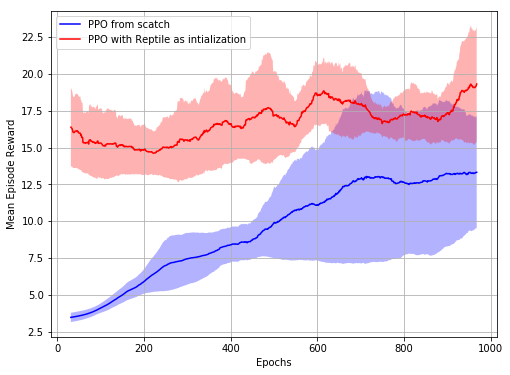

In [88]:
# reptile, kl_penalty
# 10 meta tasks

import numpy as np
import matplotlib.pyplot as plt


# vanilla
y11=[3.2755253646703926, 3.2982574734115926, 3.270736487786633, 3.2657976570748626, 3.2490169776808706, 3.234364524771481, 3.2533141166416693, 3.2646987667467355, 3.288013633522813, 3.2621134557498164, 3.274144371402862, 3.243985706905259, 3.275654939207283, 3.296332634986577, 3.280617790342379, 3.2768636328757537, 3.273971045191589, 3.283541423927106, 3.290162121637529, 3.3021415141529165, 3.286504339154535, 3.315974144268194, 3.2548369689420142, 3.303854430671225, 3.307858080031947, 3.283031945205179, 3.3018028791982683, 3.2733097514561154, 3.318489373525006, 3.320125854830437, 3.3325669885162075, 3.3479569296097695, 3.3012289820930603, 3.333702606864288, 3.378551370622627, 3.3218218583035206, 3.3581911138449305, 3.369990424366689, 3.3600980681332633, 3.3544092419621285, 3.4166093411687863, 3.400605174927571, 3.4157543364177254, 3.4238227599344393, 3.437430244542046, 3.4371961241297884, 3.420646521767446, 3.501638633111882, 3.4939402159592596, 3.4857234419943763, 3.512610432798461, 3.511678796225629, 3.5003785447217397, 3.535378916301285, 3.5592701877007706, 3.585289029019836, 3.6193205088121916, 3.5419272538290354, 3.590402122127614, 3.6455994426775975, 3.6618396248181964, 3.635863596750056, 3.697896784399206, 3.7496439409654414, 3.68362130126173, 3.725845943175659, 3.6902866770760854, 3.7088895276534295, 3.7818099051891694, 3.757758123936673, 3.8112802519539564, 3.8340815982688814, 3.828337096059249, 3.9127093402196134, 3.9074859272612947, 3.8989571334658524, 3.8911879156365643, 3.8402936010257624, 3.9600660084886927, 4.009702610947482, 3.9238820327731787, 3.9944861853713194, 4.041446848292406, 4.031177405480961, 4.009910597913753, 4.080527897804728, 4.039488352179719, 4.1212310948042115, 4.12539037350278, 4.147462422414359, 4.187507730132629, 4.249765759413883, 4.161499009207287, 4.277975020665127, 4.267392517164594, 4.21777689715803, 4.377012662889324, 4.365309345964264, 4.520465211542491, 4.408861641831932, 4.3889734966656775, 4.501084128224889, 4.436443671781617, 4.461153000747323, 4.555843056346548, 4.602883924075247, 4.589116031389741, 4.663214686420502, 4.629441014922299, 4.824039850836019, 4.769918273760485, 4.811577277918355, 4.799293670988668, 4.866090514502285, 4.83306423706548, 4.917385041203593, 4.898833300207841, 4.92054679053712, 4.862996923413532, 4.935750462933018, 4.921352354830502, 4.952844951605293, 5.118240747858657, 5.2438820506223305, 5.152871973804419, 5.162727377811939, 5.186299232434711, 5.1300690397780695, 5.213273480132355, 5.380832174412872, 5.272210804960461, 5.420755898482002, 5.396716753433008, 5.431842233370001, 5.495166262796701, 5.612044649522979, 5.513293353770386, 5.4713718030207374, 5.662405041435863, 5.534292882175855, 5.551623026851733, 5.595509233854154, 5.689794853173513, 5.606071952181892, 5.574203494097979, 5.681150473892374, 5.505381643860243, 5.667290511676683, 5.571347031978933, 5.62325040151607, 5.706983850449414, 5.697348452968012, 5.656345542345167, 5.669576986382722, 5.762219720077814, 5.915324021273089, 5.856856099628328, 5.905976652680566, 5.872681855089082, 5.929564454852035, 5.9026186111067425, 6.057178317396865, 5.906144281416521, 5.966895742143778, 5.926012641880337, 5.879458606527698, 5.896694760711637, 5.9991107971525945, 6.030427468397403, 6.033017823675271, 6.156118185282724, 6.074936972653546, 5.971060173568356, 6.15550166704882, 6.055712431449867, 6.29695224870902, 6.051356874731966, 6.275400203582597, 6.202491190861741, 6.254081155625534, 6.127768024240273, 6.211195115429785, 6.177720489651037, 6.2063255423727695, 6.119675360911467, 6.299953758046849, 6.285107452571469, 6.184212595875023, 6.282609070374837, 6.331907361649885, 6.353361206140212, 6.198487558880851, 6.2614667216683735, 6.253146186982441, 6.314772712261014, 6.294578579727783, 6.244879516760789, 6.235807659393232, 6.29988885436094, 6.199755017672077, 6.3822551382626544, 6.112841295981932, 6.22445607343884, 6.15024133804573, 6.426474966706034, 6.4367734772762075, 6.32888171311789, 6.415387642245392, 6.494524777427116, 6.461442168163608, 6.488312555231848, 6.352687778291666, 6.4016337245384705, 6.4057342237677055, 6.457677237683228, 6.402728856078825, 6.44018396906072, 6.490918258358948, 6.514386311431076, 6.42742676986614, 6.513221103961439, 6.4664171918501765, 6.472267256910914, 6.380981825284814, 6.590060686566279, 6.3119767781931975, 6.3598316406828195, 6.399638536209087, 6.310912562038371, 6.441931419907047, 6.384380044585709, 6.439054834548976, 6.380707840605873, 6.263374236129962, 6.395671187778312, 6.308018747112574, 6.412858699872761, 6.53014853851819, 6.27382646886576, 6.48638434672556, 6.367827085607226, 6.575231348720504, 6.367560623334844, 6.519374894734401, 6.389353947508832, 6.461564335860472, 6.403859082612122, 6.485836911818856, 6.496900535520388, 6.360771525012255, 6.365451805041592, 6.570587861571368, 6.515788687436696, 6.468813155141924, 6.438213776700103, 6.46646410576545, 6.399169773291855, 6.403321262793498, 6.37658570136583, 6.448683785659749, 6.527547332728377, 6.488916462470457, 6.541357138403759, 6.4419315722038775, 6.610918940561304, 6.757629835769486, 6.666157003204937, 6.450322417043038, 6.678722225178248, 6.678917893389433, 6.655131767535039, 6.610212212684956, 6.593783910503533, 6.538904116753591, 6.4912979242492534, 6.593056075200624, 6.539929619603447, 6.736575344851691, 6.621531930131185, 6.5748147855883365, 6.787478888098571, 6.666136812377772, 6.635031352235301, 6.852376314218066, 6.50847533222082, 6.735739979027784, 6.639934200269654, 6.532240079533317, 6.761300150331917, 6.603204733044057, 6.786532035579327, 6.632308435443834, 6.664260409605346, 6.758458095156434, 6.805767996525804, 6.7117957398595545, 6.6725163891984245, 6.612227104195469, 6.753905100138388, 6.67419976855962, 6.556037664248242, 6.691592159297911, 6.712937030918736, 6.694324019975596, 6.771847996439951, 6.798872353659536, 6.7601643153972, 6.675176069231708, 6.611071520691993, 6.541997403559686, 6.719936035480509, 6.683424765393649, 6.659230794917333, 6.566311962431423, 6.528784287381946, 6.481895172812823, 6.6054044855578775, 6.554777098803376, 6.668261319380864, 6.679044990405206, 6.632234120948758, 6.584080846467183, 6.599234907264386, 6.649903393781577, 6.5660080922906925, 6.581814768212497, 6.701417906274956, 6.78696315311578, 6.631164998712141, 6.670857761280496, 6.554517001068442, 6.709888451871635, 6.584335623266221, 6.604747577321146, 6.530086830124987, 6.712362191346757, 6.588567435030776, 6.623026016939756, 6.605420527534436, 6.5708790528865615, 6.606750415652652, 6.623726036656974, 6.637758465953919, 6.581557782925934, 6.513808922022059, 6.638492628137777, 6.566970232590642, 6.532449495303836, 6.570426209237477, 6.605293287177132, 6.63200821822695, 6.586619743389502, 6.544971126846441, 6.708764443683194, 6.698428781783024, 6.473512645425264, 6.6197709917801815, 6.760463652010579, 6.664478676718166, 6.679647274882765, 6.531549512975687, 6.872913248123571, 6.578591634070684, 6.73537494937123, 6.593245030712108, 6.699111837971713, 6.7572916985375, 6.564420497485028, 6.720833996593535, 6.600091899993427, 6.966848261787926, 6.627136632152275, 6.726358367553143, 6.788513545653854, 6.725258749511936, 6.83738244712576, 6.831273567623721, 6.760545427307272, 6.816977787674187, 6.959615307242306, 6.981568615907905, 7.024295004915599, 6.897585622636654, 6.953664793245189, 6.82182905881796, 6.796385799207866, 6.9529529302977755, 6.833438131783178, 7.037987368940446, 6.8755717856517125, 6.8047114163899876, 6.985621436712235, 6.833481719517927, 6.9048486493942125, 6.774181436648577, 7.023352135147592, 6.830677947000012, 6.936171752645092, 7.150372478212384, 6.8319456324962555, 6.820268353654322, 6.764702837007261, 6.722481920326899, 6.970777605928882, 6.883442647998233, 6.880187604517744, 6.812942201564318, 6.931487253616865, 6.975885372921439, 6.874221931163662, 6.659214733744594, 6.923625383199732, 6.838825583523007, 6.983647121496642, 6.9612643738074675, 6.8656569883879905, 6.79478671174766, 6.861721506420014, 6.837159599768995, 6.8584473537719655, 6.7120521724380815, 7.126845530798443, 7.046892315479479, 6.927094074388744, 6.970292899954108, 7.031197162639591, 6.844909480958957, 6.943913611071109, 6.942696406124841, 6.924668923145605, 6.829823892508893, 6.734643261040939, 6.943271074568136, 6.989181494828903, 7.022693981534801, 7.243826495274141, 6.846267339072597, 6.866857498086861, 6.813400786446283, 6.844976223819596, 6.744421397726414, 6.953028069889877, 6.947963029822006, 7.061334142034923, 7.093892434658867, 7.039787195275166, 7.116218454930909, 6.870006740787994, 7.1392490190698705, 7.206021164230515, 6.896625680738712, 6.8971991706747415, 7.212089308524324, 7.308254382662287, 7.00081844863152, 6.984433549948078, 7.100557290720186, 6.982356939090187, 7.173373383512976, 7.07881631662267, 7.224955262649167, 7.012830695149835, 7.086258207735574, 6.984792768230885, 7.14334295965097, 6.963313260566377, 6.8421980560278755, 6.909167586290607, 7.043483961334167, 7.036517165508711, 6.877540041873031, 7.132874572317683, 6.729707180745417, 7.021480615074207, 6.96221324555072, 6.913253892999857, 7.230657620085806, 6.955717361734418, 6.798379495031749, 6.776906306960453, 6.918504595450534, 6.82541493883147, 6.819176652734513, 6.914104994944737, 6.907505323422346, 6.660248476931276, 6.916747804339683, 7.012892838451321, 6.923110857179143, 6.8017628228288824, 6.812343239006489, 6.770637707719478, 6.9527279781365925, 7.001560194165184, 6.754384404122535, 6.991853208695935, 6.8035878935274425, 6.954378555753294, 6.9451493834297136, 6.875369118575356, 6.888606058850697, 7.074795953347062, 6.95975612825027, 6.959348223626659, 7.0989484082033485, 6.794593410828563, 6.961724332135421, 6.912238626795396, 6.771786323483672, 6.935125722987136, 7.062084111007356, 6.807255320266794, 6.863757402070765, 7.02270954938427, 7.061611920881588, 6.837595568745107, 6.8562931864696, 7.063097645751117, 6.898688818431775, 6.814894842842399, 6.93414165031384, 7.012809899341603, 6.985190563502991, 6.872496152837368, 7.034407769186467, 7.010761065434516, 6.950689405572477, 6.8835304551212255, 6.993069840958841, 6.9613740235765675, 7.020437620078546, 7.385428271041225, 6.957189052214377, 6.912892745076387, 6.9485312910314825, 6.999022570474499, 7.084270371754436, 6.795383796699208, 6.88837400496352, 6.894768072748263, 6.995706674210274, 6.975871913777956, 6.867065818933239, 7.043715757348303, 6.902851950231428, 7.166440381018534, 6.968726794681459, 6.9216731619543275, 6.833775532870844, 6.994364269859588, 7.1217637405091265, 7.209021080378833, 7.012841754780464, 7.265383046249881, 6.968683011253713, 6.8158684553923585, 7.264069260780434, 7.189356602858713, 7.108603451196865, 7.140022230848019, 7.205172907015547, 7.269903074857889, 7.2729858434798516, 7.1006380264435816, 7.027717299974705, 6.978624235193046, 7.204409216694976, 7.113592158728045, 7.049785128446741, 7.212393970222892, 7.184102151816958, 7.231665159379311, 7.238448692315266, 7.180652680525615, 7.319124156541153, 7.354731807482763, 7.193110912916229, 7.095186619763658, 7.161610324609768, 7.235020038463237, 7.2373608761709445, 7.22807637433258, 7.272554021525822, 7.192578335810843, 7.222788789510355, 7.289042444568771, 7.215346321730772, 7.340316741699172, 7.317106557975687, 7.124810046087684, 7.262316032991622, 7.131075535411287, 7.090298847660575, 7.262420512999314, 7.807388048170303, 7.244007177109292, 7.012537538211002, 7.2142193346543575, 7.3134209914731505, 7.178312346605468, 7.24842649634968, 7.154763116473682, 7.140443514193114, 7.192183736201, 7.128873082363507, 6.975392519064405, 7.505907362853499, 7.21070840616783, 7.094053305365202, 7.187599260710048, 7.220978578411691, 7.390163010356757, 7.1378868439928045, 7.216502498787501, 7.228262632358272, 7.322135044533225, 7.340526586653306, 7.254243737828698, 6.938300132697054, 7.148892023672461, 7.2942812759627005, 7.3770675823604295, 7.085531258937411, 7.223939624871386, 7.505052740942511, 7.24205220352285, 7.2458289022333044, 7.114160626883104, 7.0612776043647765, 7.202377935113087, 7.062679475795187, 7.1780850002740975, 7.010821195321835, 7.199173219619813, 7.158540705448431, 7.272840573327046, 7.125110268816523, 6.810272472316616, 7.238086109318599, 6.994802606762274, 7.205732323167915, 7.161325136993637, 6.961817695414728, 7.0954184541820045, 7.066047230218658, 7.1353067010099736, 7.134891905280741, 7.310029325669634, 7.096373316910052, 7.325211404790189, 7.278550916709644, 7.043190008653174, 7.306760528632924, 7.1403919872132615, 7.030657031443176, 7.327150797053645, 7.11692759693498, 7.133221015643213, 6.845700140383899, 7.084856792781307, 7.036378721647196, 6.938913111651542, 7.22415338778543, 6.938409082887254, 7.14868514469246, 6.957042898712217, 7.035683430170117, 7.017661856714652, 7.156510702274227, 6.942149719014118, 6.850707184051921, 7.0669400081773635, 6.7579933054839145, 7.055871035616749, 7.11886732584823, 6.785297101381786, 7.08984847866777, 7.098618351443848, 7.089694530861754, 7.284810427520392, 7.190650168717722, 7.498633137469442, 7.106716251152951, 7.3818727588257795, 7.347621257291049, 6.8756250189696, 7.035794865918143, 6.894508849004319, 7.331151833380754, 6.960195764915241, 7.293500194191832, 7.279331551144852, 7.585506153250259, 7.013932011113737, 7.236315677224398, 7.0933081011217896, 7.410203715734982, 7.099066052989401, 7.020357199292674, 7.131446602421132, 7.080543678712075, 7.193822668483838, 7.36010929879082, 7.481279985948428, 7.058580730809645, 7.349330037160532, 6.987858679398873, 7.394953061197446, 7.11580710034533, 7.162154189734731, 7.010770287163775, 7.269650489356362, 7.302021930983203, 7.425489282276682, 8.19886471224412, 7.60268855451929, 7.3450599523513525, 7.301469660937416, 7.2397497875085595, 7.688402063185629, 7.236038727427954, 8.591288379009802, 7.237493084774683, 7.244107825924509, 7.15247376555348, 7.788216613494938, 7.5852129602273966, 7.452359250908802, 7.809370165756202, 7.298002096361137, 7.45577588914244, 7.5664247469352155, 7.325155697248219, 7.525228962495879, 7.670850055703037, 7.329021225869898, 7.883820087402975, 7.768009941479421, 7.677964006763488, 7.501227752324879, 7.850195907317106, 7.828986872700753, 7.949305429676411, 7.960846364318221, 7.919340562372733, 8.302942700805303, 7.704910995245842, 8.361230107177228, 8.232751279026266, 7.647589815865686, 8.452473818913013, 7.674953783619054, 7.886364216370451, 7.1918331955917845, 8.503842636101695, 7.902554223237822, 7.750051572499331, 8.052100818501012, 7.676513572705348, 7.592491006361013, 7.990627379686259, 7.58655512942337, 7.3498259946973254, 7.107635660278346, 8.022648698193365, 7.216787381993378, 7.270296539845944, 7.355583888737298, 7.131708890127599, 7.533619919577509, 7.256786181955312, 7.245009866686547, 7.26946771779632, 7.5519809058215, 7.376972964409649, 7.449794147231136, 7.359537094546993, 7.930908507844802, 7.354081934341699, 7.650878778057014, 7.404908737349989, 7.306600425191678, 7.8239502401005065, 7.637942933716124, 8.21769388456333, 7.516814820777831, 7.963780249872038, 7.805174973168203, 7.770891150376709, 7.713058302620641, 7.390955631440476, 7.807860552807837, 8.285098106098339, 7.95813417400237, 8.684738960206463, 8.664984261105953, 8.719543178083859, 7.135607156733776, 8.088215225032402, 8.354748566197568, 8.198194360326722, 8.094620154005684, 8.191831296183482, 8.101931770585113, 7.30668419599011, 8.717629296425072, 7.957958494402844, 8.038722541535892, 7.648958417698009, 8.37647168955261, 7.422965027882974, 8.153759252920219, 7.5030994814437095, 7.609073846244564, 10.266270279311899, 9.020728744999305, 7.527152861306113, 8.940922190626884, 9.017803207343968, 7.371926974588095, 7.706976073191059, 8.576425603239548, 8.778209429640711, 7.177762245149264, 9.328592555113945, 9.517643094762228, 10.506752482264757, 8.620878607576508, 10.1672820270815, 8.518154969007378, 8.691525582007714, 8.050215787974505, 7.4129383825100215, 7.940772060798416, 7.95981832629248, 7.04868130498556, 8.104711061727318, 8.290551427540143, 8.955618010247347, 8.07564238550659, 8.00571284889152, 8.382164563891003, 7.984958943194776, 7.967069868698138, 7.357607736093485, 7.10742441086349, 7.2058031631677935, 7.1375862394885905, 7.620875768595347, 7.636091010729716, 7.065569867679709, 7.622957489547474, 7.1283788975048585, 6.974581974844107, 7.1636223549779805, 7.271942465383655, 6.9893652891562725, 7.4982822271977225, 7.574225094822949, 7.058993161293166, 7.524532351678442, 7.049261799800877, 7.008134722645008, 7.040113406972321, 7.112139163232219, 7.848677315406865, 7.150074078988314, 8.803482361373348, 8.314140855089036, 7.824376888287688, 8.208071134848566, 7.901673325132663, 8.152158627211119, 8.675071578382, 7.860884687795215, 8.846008884851852, 8.360291973968245, 7.780670293371969, 7.734757435416295, 7.979550573574839, 8.12657554577897, 8.794116316527695, 7.790513930030716, 7.813075253156382, 8.362305542892603, 7.861721464318495, 8.146678409983318, 8.497203733318718, 7.784283433638201, 7.749688193014548, 8.049907573570168, 8.782646232670352, 7.713758356193755, 8.060083746164805, 8.03505733364202, 9.000571726329902, 8.672533707813828, 7.557147587259703, 8.087063827173264, 9.377571542275328, 7.738028841672949, 7.592189894678507, 7.989055739843459, 9.185003594128492, 8.530110421432083, 8.544689561184697, 9.716757957193153, 7.725287564294733, 8.975259802172877, 8.684439507783335, 8.899379451961979, 8.213126095627608, 9.280562448662762, 8.496282841949979, 8.440699572788846, 8.982967766213598, 8.100339289700097, 9.424384241677778, 9.209198318012161, 7.575052916048188, 9.319159865206375, 8.81464663462154, 8.977063649675493, 9.466911389981533, 9.113978045627348, 8.179453125342933, 9.222050886415616, 7.824895244770173, 9.410593750910135, 7.217497659590494, 8.523087385070587, 7.288953394015414, 9.066349920585626, 8.01371393074547, 8.787367709445158, 7.669413146090224, 8.810345191918785, 8.505420625573793, 8.57585371085391, 10.011123627905715, 8.190852354690298, 9.507701836973153, 7.8678243322608505, 7.203497738183825, 7.357423882218318, 8.840325714167049, 8.4206097019443, 8.444948269241943, 8.746660724842812, 7.009834010181064, 9.440289550982039, 8.798205601652946, 8.040175370133511, 10.544484217295828, 7.662511878576475, 7.033935211101207, 7.002002008746002, 7.444514807943941, 7.130182923280929, 7.0256238517577865, 13.227981215340666, 8.596959519853867, 8.91627561923368, 7.807027259472049, 7.831582631865195, 7.632589850401445, 9.022865005674152, 9.655261730722417, 11.856093771155415, 9.896841412717647, 10.136716119947236, 9.281677072647776, 8.208855348489571, 11.516321798538208, 11.806776261088118, 10.320352628067079, 10.561217040452169, 8.568051968587394, 7.3008660064185245, 8.28005926096741, 10.706340234192517, 7.315884877411768, 9.377609505453037, 7.999151236488926, 7.09599152915955, 7.524702115454427, 7.069994942229633, 7.5745642665407065, 6.971962647841467, 7.210809020152688, 7.112847589488826, 7.242480859525593, 8.379385268171044, 7.2333627489316425, 7.383213507799761, 14.081639533980896, 7.175798943232374, 7.086129493672433, 7.082118762379561, 7.777960841306529]
y12=[3.6992425229399526, 3.682318299346027, 3.790447722414405, 3.7652757949556603, 3.691412296047864, 3.8409717046926195, 3.8365851993575135, 3.794748108579582, 3.8730350360942754, 3.9692017146552017, 3.831429084141221, 3.814377843326226, 3.8479654279881728, 3.868651816688794, 3.7315738014544872, 3.8991086694683883, 3.747145626770735, 3.8603204126959705, 3.905063728288644, 3.786726667586188, 3.882146760034016, 3.7789579630552863, 3.8326008097291866, 3.7501119162596925, 4.002525255518225, 3.937854533597508, 3.890819588724844, 3.906041209865913, 3.9241790809569186, 4.0427237096646, 3.873442810160054, 3.8677979025491727, 3.8615425276911943, 3.9134977408747758, 3.945255079439246, 3.8745880818335503, 3.932649567333201, 3.866961504659744, 3.8612491730870437, 4.039158745586274, 3.927302454419128, 3.8977454542580467, 4.028963086036683, 4.11092629007065, 3.9448390771092083, 3.9736135202125005, 3.8804690859282065, 3.904474448674947, 3.9270557950057037, 3.96086968920281, 3.9558732896312616, 3.8595535847486215, 4.106613263262261, 4.064270308250963, 4.013623680978578, 4.124192222041711, 4.011152492633964, 3.9189422887299417, 3.932209945231009, 3.9002558146827218, 3.875580818192699, 4.102770666221273, 4.083064411188061, 3.9770324066365217, 3.9934400345626546, 4.060852729167071, 4.171414537459594, 3.90178345873863, 4.172926900604603, 4.107208457373954, 4.086356353145759, 4.028737640514184, 4.210368598661563, 4.166280290419954, 4.02876627611605, 3.939952271353898, 4.089793736096419, 4.038792319376327, 4.020499659247038, 4.065147234186414, 3.9744064214771804, 4.036073957925824, 4.221127701457055, 4.040402734875846, 3.946530887889902, 4.1484958325518715, 3.9604716772558457, 4.143568415870037, 4.092015108859427, 3.945486145734618, 4.081118377105655, 3.9139237094328205, 3.8974933721030802, 4.175482322735468, 4.085655216740805, 4.204658593796343, 4.135442699118337, 4.137532794024258, 4.051004925359683, 4.157626055185249, 4.039756634333556, 4.335945893235695, 4.151420438915464, 4.145631441789756, 4.346114739516795, 4.131756776974014, 4.152585681552871, 4.045344216918685, 4.059860929753154, 4.117459029504933, 4.065197579871051, 4.160679333144556, 4.157857651967792, 4.134721792483371, 4.001148866922431, 4.063424717239348, 4.218563092652742, 4.191777645833274, 4.236114875301068, 4.161141095016812, 4.373228944364952, 4.299801252645467, 4.3338149882509915, 4.350011875828508, 4.389585557801777, 4.130753822127914, 4.3164241460551205, 4.214197339640265, 4.218277411080554, 4.474180378791974, 4.294990689110998, 4.349334532180637, 4.355740899625818, 4.154398548860717, 4.2529612854246714, 4.296311857762697, 4.188711854816244, 4.288365328630768, 4.2935626159678915, 4.351631487800446, 4.349405755248971, 4.61524175438864, 4.300451044822644, 4.356450449244238, 4.379267618598469, 4.34597768560798, 4.264729890922818, 4.265405073551992, 4.422777805139583, 4.53822708552467, 4.282878610106929, 4.51567819640194, 4.563046606861217, 4.270195285104853, 4.368829926401847, 4.270597678902107, 4.351410532329616, 4.443776430184909, 4.421235053770196, 4.178022593576459, 4.422699149912631, 4.361388082047687, 4.486636197410692, 4.601616763324586, 4.254082806575528, 4.378490520524151, 4.496042948723019, 4.548732394240548, 4.401977852046611, 4.5862455971981255, 4.6247667731839055, 4.503261092928474, 4.733118293044796, 4.587742454118511, 4.768424163382062, 4.358741781704417, 4.4410068701609795, 4.543819566154788, 4.749829862134764, 4.7147049070601526, 4.387673262078806, 4.225011423117565, 4.441348742309877, 4.772414323625371, 4.64440742567265, 4.3125427401053535, 4.649805880091644, 4.5550779233342755, 4.541649803530066, 4.592537060572614, 4.567922675739048, 4.686261076762113, 4.764010733722598, 4.736030570925645, 4.420495244751626, 4.558134766673245, 4.864632441900921, 4.708504381652797, 4.957041048208899, 4.9036661842943206, 4.4404829407320445, 4.877347304098869, 4.634188752281146, 4.922483320325577, 4.794687388198696, 4.844070024847839, 4.886592211756402, 4.949325751173338, 4.6112740940630275, 4.730170376253866, 5.114389847394861, 4.783439692066121, 4.6820006692619405, 4.859214622275165, 4.901484036101051, 5.28386519961567, 5.427618928265593, 4.935358049666379, 4.696393089582049, 4.704379886277737, 5.076041362447674, 5.093729821905057, 4.754354715371798, 5.2730936239319695, 4.987720445510529, 4.82834291045638, 4.783078257356495, 5.532193627515393, 5.026701753512019, 4.823044563319289, 4.903065736689206, 5.163479684303002, 4.931478378661219, 4.889457919735808, 5.5190510523723795, 5.19463835846629, 5.371460463739324, 4.820293833122879, 4.907609502462531, 4.998359851487868, 4.760348369761617, 5.21635143109587, 4.800497093630876, 5.268489664468205, 4.869988939666344, 5.241359585766905, 5.1218616030284565, 5.348934250892556, 5.4198783082553055, 5.154540814047897, 4.991240394316958, 5.022114836865246, 4.997129866467715, 5.08676825523523, 5.505234241304743, 5.086666092648542, 5.3314512983815145, 5.230561633688305, 5.242289850179062, 5.1858485429201755, 4.917827263172965, 5.14493880085543, 5.3736666046784975, 5.482754109734938, 5.368079359040825, 5.280126541972248, 5.317960435032584, 5.785745018813849, 5.300455454225199, 5.758812484353677, 4.877142024727771, 5.52274544092897, 5.454894469199851, 5.205306512492177, 5.2053859836552, 5.387725864869843, 5.813752018570959, 5.2417272869886435, 5.617184003702209, 5.403040642803803, 5.395966742690223, 5.808734150121211, 5.13568856242864, 5.231271938858404, 5.62407199038456, 5.707690533199842, 5.837229872535281, 5.355018394552629, 5.577916926347942, 5.922331854609816, 5.2482401894125585, 5.941338920150093, 5.974674493293239, 5.832887650216227, 5.6953918308010625, 5.32148802965556, 5.40448693274987, 5.109176655303681, 5.375303741218972, 6.300817247647873, 5.659401057969243, 5.965858342313606, 5.596301697946492, 6.192757784893177, 5.362264907061634, 5.694504378990788, 5.732614458333805, 5.54796770609846, 6.001691050265759, 6.035394955560166, 6.021018006519938, 6.159354859616011, 6.535145811641089, 6.501723344885162, 6.420406465503722, 5.697787544415899, 5.8836050160724955, 6.202748250329864, 5.8361789781852265, 6.290183620282211, 6.253409303092254, 6.33228918416859, 6.396150502750615, 6.5174187289044525, 6.253634758320363, 5.951931485685331, 5.8470812250181545, 6.497836081008744, 6.749193045444691, 7.107578112783392, 6.943254421605231, 6.27689561824514, 6.025465156280258, 6.243408520131837, 6.892797306678516, 7.2564389807079595, 5.695186141391684, 5.945475219025079, 6.614346296618345, 6.755384963244213, 6.083441248246473, 6.030677189864066, 5.573760580676751, 6.081896877307909, 6.246417333822076, 6.755054128222245, 6.136667929810129, 6.259378529327054, 6.672054275228145, 6.203796306213912, 6.861343039429522, 7.639858040625895, 6.39374938717508, 5.8476557446924184, 8.614570040134534, 8.036004932673109, 6.12378385636542, 7.884826733558522, 7.330161966234222, 6.206733943938259, 6.847048084784003, 7.645331964789871, 7.682642305653027, 6.714093053866369, 7.808336980621503, 7.782323115342122, 7.21788327197243, 7.163884682698024, 8.719363411622268, 6.408597791129537, 7.490576060377075, 6.992748256588955, 6.874452956682962, 7.9187493415754355, 7.002817998258038, 8.456406155295111, 7.842418909137028, 8.80894114036604, 7.497597318632755, 6.559067398634851, 12.510545269875385, 6.633371180185067, 7.853691777264537, 9.992275594465216, 8.762325355281734, 7.881428643914684, 6.94233127865928, 8.340634037957761, 9.248567200647631, 8.005287514812775, 8.336130541470638, 6.82416567947994, 9.063252504369926, 8.063060080893726, 10.399476975936873, 9.178934877538632, 10.316273994135413, 8.210704689931472, 7.481702328000263, 7.852327742986144, 7.645405768540344, 14.176911902809309, 7.229801616048467, 9.124563707029923, 7.253951178790609, 10.181835793416742, 18.61741795023135, 9.372297792563032, 8.231739047005682, 8.178572599325104, 8.366682982394561, 8.147031324762512, 8.76944806309662, 8.673609447977285, 8.838497861604411, 6.252380424118878, 7.641497281059353, 8.887970946481849, 8.18827808231568, 6.991988907894571, 7.896148330702218, 8.66557462901609, 9.175624424992575, 10.03397265327048, 9.886481843412135, 8.479313289036861, 5.908428891004293, 7.620342461221744, 8.533959382860873, 7.998833209784605, 10.28830215233997, 10.42018622676241, 7.02206578158276, 7.620999602679978, 12.213608176730517, 8.67551226814716, 8.098939102844097, 7.317816762467958, 6.3641341886262195, 6.91216008261774, 10.87536085255205, 7.313214658352748, 7.624260149504742, 8.709159467848027, 8.295092763044824, 8.403789621848627, 7.264506227907614, 7.671728870437515, 7.528187094246579, 10.43003337821933, 10.528232654102347, 18.402132703518554, 10.097313967202094, 8.407652749324859, 10.040242277844772, 8.544495540793143, 13.43377902409214, 7.0066689688118, 7.885711670325575, 7.975728420022114, 8.083434346188692, 8.89114976286907, 8.644442079075946, 8.822410152184752, 7.689161304735992, 10.878782063177503, 10.205716740879506, 8.753647308607494, 8.665645726780319, 7.585617906705049, 15.029729521838824, 12.219898616337058, 10.783875851906764, 8.209380653997888, 9.223239171469714, 7.777440025704246, 8.54259188245328, 10.860891983875032, 14.673766791088163, 14.171757971935536, 7.8612393244047665, 9.306437250032777, 18.685906929328805, 8.613400229378138, 8.855440387238696, 13.885417829744556, 9.851044208014919, 8.832881164257834, 10.242191489032386, 12.854783285734548, 7.791626074686625, 13.747017818795172, 9.614959051274527, 19.819166014028543, 24.3465362301295, 11.334702819084558, 9.411386389698604, 20.351752651852994, 9.821766305758997, 8.956293362526555, 13.416275919618776, 15.789887542163399, 16.942843210226616, 13.569496912835726, 11.0432363405708, 18.29893066209329, 9.948222960732268, 12.81022081295717, 11.52795218556895, 10.731646044216234, 16.405697162070773, 10.036480222486325, 9.821162864683084, 10.629428204320762, 18.23040769191663, 10.579843774269765, 16.212327759510337, 7.42464433211146, 17.19193041753502, 18.850590192479228, 13.983269355514558, 9.762227563376713, 12.250078359091395, 8.92810614350164, 15.111020967548454, 11.622895307914218, 22.672311036248942, 12.001499397457353, 16.68057820027517, 17.82839980089679, 16.792019009294172, 16.79785022585208, 12.77191037957229, 10.682822719256013, 9.75838942876401, 11.108130517010915, 15.90105109676733, 8.09210688293087, 10.875270112743294, 14.425115710367443, 16.990001987106353, 9.13154719939057, 17.48148744879489, 12.882902484395718, 18.55155731383588, 18.888459344269698, 17.519948471638006, 15.052127727528642, 12.481487926369903, 15.64443314454516, 13.776107406995942, 17.41236150079444, 13.180548280094001, 15.5120430231107, 12.785768159732324, 15.94911405771071, 15.604646801156564, 20.395215764816204, 19.65941938466456, 13.499869132562713, 22.07411055908509, 14.847009621817097, 16.865678647344374, 19.1451186065439, 19.746664604137152, 15.34738954522677, 18.15272757749251, 17.30490459156924, 21.43932148820764, 13.727088438848526, 18.97132283999193, 15.644079212226966, 13.859575851705838, 12.330764948679569, 20.874113310553877, 12.882824786992673, 11.97658328052148, 17.80265985285461, 17.493882350412473, 15.417690526637951, 12.474735804583746, 11.706075721339413, 17.98054093091403, 13.242711549545625, 20.115230231725864, 12.905930868574044, 9.245503172226739, 14.52939192765405, 13.655574948857318, 12.63431340083981, 17.258660292895726, 20.419328527762364, 22.94670261137372, 15.576732128333038, 12.917900472857252, 18.429366699300445, 12.933680174933082, 15.45603666183128, 18.399916065669466, 15.951781976761879, 15.041036516652301, 11.83583635079942, 15.998718836737758, 17.836717644066688, 16.512183891607915, 15.265139563160616, 17.0970338219043, 17.86845487785223, 15.749264889967801, 19.850815476644645, 17.563394778225117, 14.807265886174074, 21.97490514481228, 22.765437043212383, 13.75488779887553, 14.58395815293105, 17.124345338182515, 18.434422795001915, 16.151935848020656, 19.29828162217699, 13.986567232782509, 20.335914327232025, 14.942955256548508, 18.9362388406982, 13.637062898106429, 10.70293153099552, 16.341050486366232, 15.415245372130224, 17.027786769037302, 20.105311320669145, 21.978687456319697, 16.227181202153922, 17.765917848855352, 13.755430686651358, 23.51664385977468, 16.032365286942323, 24.98982453128155, 17.34953491138901, 19.27228010421472, 17.575224631547584, 15.680923028151359, 18.007805361260036, 18.98413510620309, 15.922414384901806, 14.514927484662497, 18.479063721925208, 17.548344938290818, 17.610220337421236, 14.684053313495138, 23.729070923026413, 18.700611204578973, 11.918557721254112, 20.757299903046444, 27.678495850809202, 18.58334899183777, 17.217128865403176, 21.925059383130264, 16.9761465457486, 18.21039164928517, 15.524396292481464, 17.582340620114092, 13.506109358547675, 16.851889562613973, 27.07729731170141, 19.100743757347264, 14.995546391781243, 18.99573303359337, 17.214871437542254, 21.454162876965505, 17.986568032417026, 13.961998508506202, 30.07114125273632, 22.40722027749272, 17.290073945006544, 33.92234841124934, 14.490364501378405, 15.888916751166606, 21.306345006557777, 18.487696448406325, 21.987685641107337, 17.075950728412668, 32.842179062966025, 17.802659294285494, 26.913493867887937, 17.671841716627533, 20.407919614986156, 26.36420424820355, 17.970248078263868, 17.331653952336058, 24.499806042290928, 30.034878708779146, 16.517607067390898, 18.19604329321051, 19.033914156254735, 23.969268046164675, 17.325295404498956, 16.287708571739476, 23.153068359632776, 16.606002870693732, 20.195914831910443, 18.344358919107208, 18.206784944938256, 17.523639205249975, 22.142549749907822, 19.827743304759455, 17.263148880348396, 26.9802201489665, 18.965989054923483, 21.51717500900903, 17.646180937129945, 20.84891850832662, 21.85108248313542, 32.37738429807837, 25.732865528885345, 16.302015275639615, 19.416399453590294, 16.892423249859938, 19.779463325311383, 21.45251709179351, 19.894707827380127, 23.427423911491722, 16.41458530512231, 19.816555405416274, 25.86454053622036, 22.731717511179696, 20.947562458637016, 17.666897684843086, 18.77946481983625, 20.101322699953887, 20.01506818602237, 19.438799614888985, 22.953789458352848, 17.94102875739535, 26.32681477445646, 18.648855038760967, 17.000090236284308, 18.478422350861262, 20.517492346910593, 25.569201755547546, 16.445421551101486, 45.36416217495481, 20.39668997673891, 19.545541055318257, 20.879230598074855, 18.82629183849757, 37.097349800523986, 18.13011155237723, 17.00513110504584, 21.38680331559075, 23.403838172140496, 20.8934037701797, 18.75617099544816, 18.456541733248034, 18.859233579055257, 17.13283625022899, 24.115826935086822, 17.058691143976954, 18.70478023724035, 18.257227163389743, 18.01073950867405, 18.117906341975594, 18.513927305104374, 22.81011598845809, 21.318071511447492, 26.008762209279354, 18.41340001693375, 17.80499309856806, 24.58680552113922, 17.680234325451078, 23.61388979215432, 18.805060618452984, 27.22666854234874, 17.301362157567077, 19.11433692456223, 22.859440017594927, 23.075487913187043, 18.45030466668408, 16.95430417090473, 33.18016767409588, 16.25503430463909, 21.12080552122262, 18.074874362343593, 18.134181470697204, 17.420063991708442, 23.47967499563105, 16.774152720752866, 18.061950928023148, 17.49486179293018, 21.608303933464157, 20.691876137947105, 18.503851427865637, 17.893214710888792, 17.37205937391299, 21.288498168616634, 18.71486651184588, 21.390715233145418, 16.489361449260684, 17.5579260484317, 17.726705468378047, 17.650873305729693, 20.410322441783066, 16.56086259356072, 21.121595039616803, 20.40558900743851, 18.78225045807936, 18.097732199553203, 20.67182690607371, 19.376463770787726, 18.71276029750798, 20.167950515306448, 19.06194162930204, 18.603311737645186, 15.94022008199392, 19.050891616690485, 19.166094108700165, 19.296664830000942, 19.631139293184976, 19.62102872638463, 22.04368703098171, 18.735599097499822, 22.11649361255402, 23.082118167076555, 23.347539089808873, 17.07066857573703, 23.012662626949783, 17.88245807321749, 16.961173563494143, 17.093639984737255, 16.960904951526434, 17.27693336542635, 18.543660922703598, 19.250927105821756, 17.15826726383779, 16.671845086608094, 20.245902675763233, 17.46843643442502, 20.470380617958277, 18.318157666215395, 20.617712034628543, 18.069765540089843, 17.695996042368453, 21.791788725178083, 17.140759461749838, 18.340817793817248, 28.15642707533966, 20.1736851782423, 19.86812985585985, 18.60184431927256, 18.58021672519443, 19.04009042938765, 17.526405900803677, 19.61923174829472, 23.544867564362562, 17.913316504591613, 21.082451940738366, 21.599861991250343, 17.78304024244439, 23.241565226763466, 17.3943363450414, 20.536984616283974, 20.67565964017241, 18.374743631838907, 17.64824124720297, 19.91325371743565, 16.72987080107223, 16.28740685267074, 19.9631231422593, 19.45475545265578, 20.299306126928947, 22.561227648849556, 18.43645910407807, 19.676963680124203, 18.728409949304044, 19.266471063879138, 21.106146534302514, 27.183129430693565, 18.92824018320095, 21.048836787114084, 22.356260760790878, 18.979610937706823, 17.269596864301587, 20.666865321696474, 16.63790202755376, 18.321972000046205, 19.80480050119204, 19.411170397901614, 32.84637961539903, 21.34003136081645, 18.373065391534162, 19.431547779119665, 19.51284756219159, 16.07363390259518, 21.14654713817083, 17.803922221839798, 19.068738503850792, 19.32765688331236, 18.088407938968214, 23.994982481709084, 23.684629626792457, 16.435997534210767, 21.31452017238283, 18.202753193730725, 18.114778915904413, 19.942040519123857, 17.54022045149566, 17.138970925929808, 17.87201123711022, 17.11706766826817, 23.397708143750606, 24.19489592394381, 19.786940615849154, 26.6185598708797, 25.378308660817762, 23.298097946245672, 19.53496874286415, 19.087830873699446, 18.70072930410091, 17.71113074155141, 20.28504487633785, 18.49602316593593, 17.31065263102255, 17.879537116588285, 21.880425492995933, 18.436806689766502, 18.357065353328235, 19.713141193908516, 19.346851722906422, 20.826046688410507, 17.35338837497562, 23.33779386955064, 18.037907463161797, 16.76508210481979, 21.662849904545663, 17.739029579737213, 18.137630813682712, 21.880998473420885, 17.393107919406543, 18.287352101661128, 17.89781792391094, 19.923659440018998, 21.837848891743857, 15.64666865528372, 15.738388837703235, 16.586931629180032, 22.52594070909703, 18.549193906040095, 18.502109799849023, 17.140926518291057, 20.10943525824514, 18.35175235011639, 18.453922062445432, 17.813595461196908, 17.985794157249288, 18.245336540898318, 20.07772676763895, 16.95454019176441, 14.64769602833285, 18.428484265747983, 15.439150600744838, 18.497829344601723, 26.101746228292058, 16.583141314929797, 17.452275402311532, 16.05062247630795, 18.7733463408881, 16.147742543052203, 18.068399048951512, 15.521228142362446, 16.521743953104803, 19.660183209041662, 16.986304546174424, 18.49394486877787, 15.49530471584396, 18.303328680282107, 16.468379668248, 16.184723416789527, 17.200166012726285, 23.78575122967563, 16.40143321777455, 18.89548463022688, 17.468774295030197, 17.625186156442062, 19.695353954277778, 17.359332334045735, 17.945879829826936, 16.005066871331078, 16.73293660073418, 16.41585941371856, 17.472370137732646, 17.160770415979634, 15.919967630120766, 17.049007581585577, 16.030016659726105, 17.385565950195492, 18.094105524945732, 14.577838676613764, 16.63068797062107, 21.11664877820475, 20.13800040330436, 17.3815043013276]
y13=[3.1379095429259425, 3.145449992934423, 3.1508601358018264, 3.139220929757181, 3.1265417960661415, 3.1292927162332056, 3.1270231178960097, 3.1404508332721885, 3.1286980048214468, 3.12790266704702, 3.1350730185808002, 3.1258138972387037, 3.128134846419314, 3.1354051331604413, 3.1312200147003106, 3.130313250327858, 3.1300823941266356, 3.128745622333061, 3.134356855121198, 3.1344574627904493, 3.1328891328232964, 3.132076280559195, 3.1313389020690505, 3.1367173715860104, 3.1398607180348015, 3.1413366613825637, 3.132490713483743, 3.139542315569344, 3.1370887982073845, 3.1378140734826494, 3.1367069614782586, 3.1533573704409137, 3.13802712546469, 3.14353840860133, 3.161485626671757, 3.1435706378895745, 3.1465756798643434, 3.1511517552538644, 3.1494562427101798, 3.152881764662973, 3.1451211247787283, 3.1371903249871362, 3.157317946552649, 3.1551254419280554, 3.1438547407411503, 3.171969917274389, 3.1623098040938826, 3.1471817058512377, 3.187838042794309, 3.178693413963115, 3.1852628197119808, 3.1814629189336507, 3.1820416651302423, 3.16002673969391, 3.2056457148650455, 3.1743550864061727, 3.1898594277580763, 3.202168703655726, 3.2216381574126816, 3.225390545280466, 3.258925503085204, 3.2471832679993873, 3.2709185787870956, 3.2640782725825552, 3.2757587298387434, 3.31114493771876, 3.26976187992597, 3.325239595677571, 3.322144422214398, 3.3007265863609274, 3.3449540630108037, 3.295039364169153, 3.3034929818436014, 3.3374949981359245, 3.3400315498410738, 3.3705423358417654, 3.3463969603194443, 3.330990506546508, 3.3139800138974773, 3.3586175903400757, 3.352753605438837, 3.319356965980247, 3.340493110910459, 3.3770643559791758, 3.3420119837238205, 3.362650048437879, 3.443947712386699, 3.440385582842643, 3.401065174905341, 3.3474257731986548, 3.463619629442483, 3.4906447825499103, 3.677945341203366, 3.513365563035937, 3.5663759368901147, 3.5123014553281178, 3.5275409550261982, 3.6134598034848415, 3.570511803835387, 3.4824862431949897, 3.6416952240924605, 3.643375982008991, 3.6489594098628158, 3.659542044632806, 3.6243343060643345, 3.735502877636091, 3.6675019654921615, 3.7193571916596238, 3.730688703271439, 3.8092141325644664, 3.7101215102116423, 3.81662103435085, 3.829905938377773, 4.009699897971015, 4.188978374389858, 4.096773541135076, 3.995810720924145, 4.117091206250021, 4.157844784967742, 4.251974558226694, 4.344891661988509, 4.243168244459592, 4.106829464760448, 4.169060511706181, 4.044872578746968, 4.109116799924996, 4.131719999660008, 4.278201376175578, 4.216916017933183, 4.182688540909126, 4.147459927923389, 4.250077077035453, 4.321071311254011, 4.4041524499581595, 4.036590942409134, 4.574858587174885, 4.383309104783552, 4.165970958500824, 4.431229773065688, 4.217052405743025, 4.263821749561268, 4.3726239849234965, 4.546696477991185, 4.250506292881887, 4.69887136475303, 4.494413739517444, 4.713760373819011, 4.558747621952259, 4.687026532105185, 4.693812936450687, 5.260619180739054, 4.705640855345245, 4.894212253265296, 5.6325087695300295, 5.734576195874366, 5.352557274456961, 4.913096640494143, 5.683510268560629, 5.465010797130228, 5.193289226618556, 5.3498849156957125, 5.5612987446266455, 5.061777579803141, 4.675750795492053, 5.097367612394567, 5.54581071931224, 5.198657130454158, 6.071354392874791, 4.82105880495405, 7.313827083336373, 5.791828207608404, 5.135424546038339, 5.511299280374097, 5.614195127645572, 5.686753523196336, 5.21680511140292, 5.865752968154002, 5.441754891824216, 5.310748237913527, 5.608735262946958, 6.803845268476989, 6.400196932078115, 5.782517145207335, 6.2567354061122185, 7.332894413554495, 7.53441659571715, 6.594794850636766, 6.136108677994976, 8.911862604605622, 6.6620161331435455, 6.929012963604372, 5.900921666812215, 6.402668585593935, 7.130025100080202, 5.7973493433200725, 6.1975069322986815, 5.448575825653472, 6.162986112117697, 5.358483767942469, 5.535350762129223, 5.0316382924548275, 5.4469370894799125, 6.448560860385388, 6.2773891893720455, 5.7267521669568024, 5.707153877973525, 5.530571427594264, 5.908061055663371, 5.237487389646638, 6.366977969432236, 6.1645573279562536, 5.905021920589768, 5.9045174002964, 7.842059200453616, 6.0356353811791905, 8.362267997078623, 7.022042961961519, 8.508850670983856, 9.846148548449715, 9.152353883665302, 7.003146633273422, 7.61996512477292, 5.824201520956126, 8.39436946708295, 9.012203653396842, 9.123284611624616, 6.707061794385287, 8.857701214844584, 6.819287314408743, 9.226469704261811, 10.50370691861264, 9.677038889453007, 8.346761880641498, 9.460687601302409, 9.743048519058588, 9.85312691197546, 9.6626351544705, 9.507733951835755, 9.64504593054307, 9.012390062538596, 8.198873950411139, 9.763382957734633, 9.889437822965196, 10.142133140421592, 10.14989110859938, 9.891896849066196, 9.563972719634611, 10.056363234525502, 9.631538186136488, 10.01913022444563, 10.431774737942883, 10.291656217780083, 9.202802707808107, 9.858391331285395, 9.540915730929154, 10.318222588341703, 9.229264945353922, 8.268456444672596, 9.424783024985903, 8.714807231471076, 9.710837670975458, 9.112094675044386, 8.778812902607854, 8.117601307091924, 10.123662837276687, 9.40139136978134, 9.09812105634141, 9.24427434094046, 10.350266308445677, 9.101285638131824, 9.672271853582162, 9.776432128099502, 9.983544066672083, 10.233675540279545, 10.235122105646694, 9.376247437210159, 9.688746882245889, 10.032016129146259, 9.854005168736862, 9.95153664896282, 9.701337387927785, 9.47767874834705, 9.824991995897616, 10.427181872493984, 10.190429764533354, 10.196237936206622, 10.597604420596017, 9.880995859990149, 9.880297650163897, 9.908108790872536, 10.046828364501069, 9.868026745205999, 10.314273252871454, 9.791764715960882, 9.983367494899378, 9.341766321791965, 10.445918686732913, 10.07710792661371, 9.480936686077719, 9.284201658811892, 9.514412364728914, 9.660424867991766, 9.78214481623746, 10.088417358547517, 9.242161522094108, 10.066043374637715, 10.678410215016585, 10.240474757117267, 9.935098715305744, 9.797482458647742, 10.198285602083828, 9.572438749139808, 10.123875834558097, 9.840722245444699, 9.525138539711671, 9.602651024490374, 9.719764652025082, 9.66822363740435, 9.013065872870841, 10.69989420051391, 10.306646354685977, 9.98273556213134, 9.688174817526635, 10.370418972803627, 10.037172941641835, 10.162126581926655, 9.948661989789565, 9.698766320569982, 9.404935137879093, 10.320602353908702, 9.414960022384959, 9.493554346150612, 9.798322704349914, 9.779114886940105, 10.179660734196665, 10.02174466707129, 9.62755264320165, 10.466951130586667, 10.642140115513556, 9.501754969254804, 10.461751064669356, 9.687884878412738, 10.408449719596817, 9.518627669002631, 9.85686238539, 10.199534560254095, 10.029037720054196, 10.239691362067417, 9.648176508213165, 10.01552782287899, 9.862163494452213, 9.92267948999253, 9.681664463810842, 10.410379586979586, 10.095381441015467, 9.46648298058882, 9.151523027980243, 9.804488510825466, 8.995650748804737, 10.065289486915875, 9.787414767885574, 9.090184184682096, 9.447321310913983, 10.30053908507399, 10.007441086399846, 9.415920967476266, 9.168384981066485, 9.399082658282492, 9.331564502163442, 9.720150320770482, 9.725622588176645, 9.662084443224224, 9.682030949342106, 9.686994280594206, 10.104874902038759, 9.436745179866211, 9.633154544432463, 9.38803909826732, 10.003766201504298, 10.366898767349898, 9.445799421265813, 10.089546805591572, 9.327371138474113, 9.779455001626104, 9.478990994803004, 9.121926883276023, 10.28765600562326, 9.591777692547153, 10.322257394021626, 9.22205997953799, 10.04176392639593, 9.897670631956801, 10.149522508520425, 9.71457852680098, 10.090766177011679, 9.595970434719929, 9.393274475843167, 10.155332954278244, 9.903338049610273, 9.583991940878807, 10.105812010386714, 10.114447607713554, 9.628691970014788, 10.560281072277247, 9.80856190537079, 10.35967731607701, 9.532207447667764, 10.309414880503692, 10.304936793490755, 9.667822246996652, 9.422569356072596, 9.691891844964802, 10.158422735166996, 9.962582384217118, 9.873535906833796, 9.543068134821917, 9.978093725095555, 9.551141148819774, 10.293033987308672, 9.971842047611139, 9.279329608993605, 9.400699557772729, 9.787643866042451, 10.337150167003365, 9.501762823483055, 9.091803073645487, 9.361957640306937, 9.639653776618475, 10.231649450803262, 9.390848988958364, 9.68764992168823, 9.782187655857943, 8.703688178958725, 9.608462604832242, 9.902717092474093, 10.0800967719644, 9.825688094070866, 9.410283984403327, 10.106743509736225, 10.006599335403264, 10.242343078257512, 9.551576219047165, 9.779195882644267, 9.50077189386683, 9.982296376790508, 10.317185539259038, 9.87764932394995, 9.602522932328585, 10.235062294304482, 10.273347421869985, 9.503327542333368, 10.568941980836549, 10.104358012686353, 10.162461780987632, 10.051477500722308, 11.000303751091664, 10.408108572823227, 10.050625259115643, 10.548378677149792, 10.167912626501424, 10.393558763173589, 10.353342031122484, 10.087509571296177, 10.142973791496711, 9.917979566784659, 9.614570692302902, 10.032624014574008, 10.314946185763398, 10.378321749301243, 9.959614767131796, 10.506438188830337, 10.421353047477442, 10.505973218463263, 10.169435151494705, 10.026990279426428, 10.295041813468696, 9.559874934000126, 9.985186222930986, 10.21152580600254, 9.616362243272345, 10.448338485599951, 9.859039721777409, 10.215245000267071, 10.325313315792142, 10.046707978646712, 10.149268761035149, 10.87408606816364, 9.979713134766897, 9.636793654903006, 10.078754731379064, 9.522792956933694, 9.484249921092347, 9.833130906571261, 10.115880622915014, 10.099341694646588, 9.57069942569899, 10.269526916333229, 9.360315479830527, 10.06538606531438, 10.189407527484988, 9.778355222217982, 9.855829831420035, 9.507940852813668, 10.336704591388507, 10.367334511161115, 10.208803350364205, 9.902133365129677, 9.803229290369869, 10.11153463111824, 9.991795701446577, 9.294578343996257, 9.621975043907364, 10.456502766708466, 9.554555197473652, 9.75394562705748, 9.438236004066127, 9.846547448306577, 9.868351608686346, 9.383049131116447, 9.369132612407356, 9.797699818135714, 9.989783596580464, 9.960116818556681, 9.964133295737152, 9.531773084801806, 9.552620128117779, 10.33795863860817, 9.84622959229884, 9.834449984770117, 10.44793459182375, 10.182831564797649, 9.665267488118449, 9.779079660659407, 10.008914190999663, 9.489084528697667, 10.157484738666243, 9.966627477528295, 10.087443062092133, 10.020895753150189, 9.628024219412143, 10.201473218145988, 9.470656137997304, 9.675472030651722, 9.900955304604276, 9.437495384511497, 9.113715875546903, 9.414583198120015, 9.858329825369449, 10.05460274369259, 10.393285680690754, 9.880232274328037, 9.522290432211127, 9.584646491622605, 10.049257835506163, 9.7946589640072, 9.952038208488883, 9.927543687550255, 10.432169243980516, 10.408629381724865, 9.882992031518562, 10.279675880668565, 9.596776285562202, 9.545869435800777, 9.914100590533932, 9.956794539590891, 10.538956469345369, 9.950887464118642, 9.914419907145003, 10.066721370884586, 9.694668732962365, 10.534053800510295, 10.196363743468117, 10.156870850971199, 10.274706647828914, 10.244373959656519, 9.890197704766797, 9.8713970062534, 9.990818370663403, 10.246612149638938, 9.954497251266783, 9.663724508534447, 9.974734154681968, 9.444407804602148, 9.815726246883472, 9.868064511230163, 10.31212995346995, 10.123770502662653, 10.53844095140405, 9.708227999175348, 9.26521036004681, 10.025666692319623, 10.475540063476636, 9.450721427543463, 9.44517344985672, 9.511889797343878, 10.063618259244839, 10.373518854435, 10.137791707777758, 9.89013366354028, 9.567326018758928, 10.59923607478166, 9.563378602082622, 10.271820439348094, 9.931456845322895, 9.750557895131228, 9.789762192155038, 10.158991702080225, 8.919407782974245, 9.302986314073005, 10.214198004983627, 10.165169415821234, 9.80821498722423, 9.63112712665061, 9.63995779250893, 9.759141885975563, 10.304274343495873, 9.747219576670597, 10.161536622968082, 9.738315606042518, 10.028329602505812, 9.37020712853287, 9.933654893954696, 9.963897110761849, 9.632981812594913, 9.844852817575388, 9.819391960744559, 9.492779506963108, 10.065231913052852, 10.018279559052235, 9.595542918374703, 9.739228795987945, 9.518521147309835, 9.750145451891488, 9.263676795702766, 10.027239282229065, 9.608009104726595, 10.522746726760381, 10.049648065460005, 9.983105700692933, 9.906819840360832, 9.81354990859206, 9.661966814243982, 9.71634108465148, 9.841104402950569, 9.593535856372144, 10.533130879124174, 10.34627921449272, 9.674237992252388, 9.723970278071834, 9.786237134138805, 9.683755031953323, 10.629665749614725, 11.129780244178505, 10.26283300615096, 10.766474388717409, 9.808579934121882, 10.673195100656455, 10.287644515849598, 10.535183536447745, 9.711102922797062, 10.216869890441766, 11.557961972391691, 10.082411950779662, 10.378313279886797, 11.270581693543402, 10.452976389677694, 11.028902889755711, 11.131186023346505, 11.159245715422179, 10.696670153633788, 11.22063432404095, 10.741060029238122, 10.715993500785407, 11.105605631639317, 10.691160287093604, 11.40560424410986, 10.925009123289872, 13.154664962364313, 11.505478399469014, 10.401397691678513, 10.193106506982794, 10.55770135202946, 9.50877236600469, 11.1367846023684, 10.295887543891398, 12.133372954072405, 11.016881529450911, 10.774885563618708, 10.891749899071911, 10.170709373604677, 10.27127964874585, 10.628706571865102, 10.801173189378316, 10.680896319601294, 10.543873005617144, 10.618840812930529, 10.801787674103815, 10.123757921008735, 11.322861366468464, 10.117045854440349, 10.211674026022486, 10.053898468843165, 9.948494790551047, 10.508217780121297, 11.445381239809743, 10.285390133062545, 9.923499851976942, 10.23071325645664, 9.775329125742381, 11.301610640716344, 10.359445344980713, 10.808183114586718, 9.943294728694134, 10.894120903004174, 10.16810547431504, 10.29427218612689, 9.979325540005586, 10.540350955177896, 10.30611142351908, 10.811839764149328, 11.165510092246187, 10.623549269844967, 10.78428605663828, 10.843426518038608, 10.247716296777996, 10.694246897759824, 10.388883411415744, 10.113211145871508, 10.542548432035888, 10.631807057983908, 10.270940806880633, 10.075731165982193, 10.088306862416758, 10.452646741062596, 10.483612411388012, 10.297423735403964, 10.598278617126041, 10.293010758671802, 9.945863014380654, 9.998501477077447, 10.294621049015152, 10.749701209034265, 10.461262588287171, 10.383015527473194, 10.0767396594899, 10.4452347463247, 10.124503055780275, 10.016934046863229, 11.175571253198417, 10.544193524944415, 10.730646007040333, 10.123281756758749, 10.3369050653357, 10.223471829932478, 10.649304336114247, 9.46741661709655, 10.517540530763581, 10.559369180627964, 10.104214208656497, 9.64513779265345, 10.621961161505446, 10.847283907654335, 9.96352441916975, 10.030469283974725, 10.30773084093454, 10.125631092580386, 10.752626248295797, 10.08614378552509, 11.039008579669103, 10.666701281529832, 10.322088012061023, 10.058461142459558, 10.482820054067702, 10.992054031500386, 10.031225406238041, 10.964447252647231, 10.379613740555696, 10.231688192670509, 9.600600845455679, 10.55326002615885, 10.758575115430455, 10.029272446094488, 9.732900589954252, 10.423600681640945, 10.411895202113666, 10.54906637780138, 10.794170934773277, 10.333116013964602, 10.127485840525438, 10.315310279074753, 10.31800161210556, 10.445050025531614, 10.68438840076178, 10.449965820020932, 10.880490231895804, 10.410186073489546, 10.322881874224581, 10.421411841966561, 10.404761963878203, 9.81135995028734, 9.823448663537794, 9.999528326419872, 10.254730125481936, 10.114388065046322, 9.596695885878916, 10.046141336251653, 9.709084137845329, 9.840057792809311, 9.542072745512138, 9.719158055906512, 9.961230760331528, 10.880123167410195, 9.693506695278174, 11.39146537752877, 9.854115730526681, 10.210274788797324, 9.867866723219162, 11.193970815328608, 10.06416318280179, 10.347986940575819, 10.044139743270923, 10.338998286923928, 11.19886451824949, 10.424916372021658, 10.729870841547795, 9.994180814367448, 11.033760690345444, 10.138977396455745, 10.450581559749075, 10.725552310911699, 10.790220078340651, 10.288303446751684, 10.360325423211837, 10.523728233759897, 11.06273719491174, 10.231594177010017, 11.178523824160687, 9.941672711819313, 9.862780422140634, 9.532250358228074, 9.859949307964431, 10.20672145728141, 10.146092552075853, 10.002644598820067, 10.38374776207997, 10.504080782726092, 11.898544272345882, 10.447371239389714, 10.987565322183006, 11.31622373077671, 10.580530932979977, 11.311895166224918, 10.724267932693909, 10.899978450290225, 10.806214958490422, 10.416488191627337, 10.553380170941866, 10.515120718290081, 10.658236908130053, 9.99824612432911, 11.271298825233753, 11.88105837951821, 10.458368881212268, 11.696985266662812, 11.16021334774662, 10.463167207294305, 11.647029875210384, 10.65203953913587, 10.423468668242112, 11.243316379045538, 10.349379317373144, 11.564227641407555, 10.427422607755082, 10.963083154937069, 10.563351258599068, 11.556204513166906, 9.973594194151353, 11.161934596734788, 10.258310726302582, 10.186098514158111, 11.054842693865368, 11.176171349331476, 10.262079462811752, 10.789512989938725, 10.519552341700605, 10.780521591652485, 10.500602650345925, 11.192692365554551, 11.288655229159698, 10.712091404099366, 10.163018804931516, 10.566589535854025, 11.56268544540951, 10.50326814542003, 10.77678923491896, 11.327284534778974, 11.221923570081374, 11.78378085437487, 11.44226420049363, 11.794824029986428, 11.385182107235739, 11.272158965297749, 11.55705289266378, 11.436586803802374, 10.294199958487713, 10.596214148472631, 11.535364904734328, 10.706378179999701, 11.898521509331689, 11.909186818923763, 14.191020528568558, 10.765091240288378, 13.588301717390419, 12.54724283483796, 11.851504804822758, 12.028562807551218, 11.695140415786137, 10.862176696036439, 12.106999336409794, 11.166578530877024, 11.505981338142881, 11.644631556197364, 10.362780971106734, 13.439713297073755, 13.108104751943825, 10.925000848686931, 12.268731383831797, 10.423560210385496, 12.521102659141171, 11.233318728776439, 11.265327255510154, 11.086461043774111, 11.464586475210803, 11.30552548458642, 11.58768806200845, 10.75939121677607, 11.150261578289676, 11.18414683213957, 11.458095468103853, 10.705308692166877, 11.847160822537488, 11.71564842483784, 12.18561864813441, 12.886399657828555, 12.26613647108071, 13.751411176794482, 10.78918759780995, 13.990146767006175, 12.57795486206499, 13.623397006476132, 15.708620152783036, 13.038264738756718, 13.54779211187681, 13.733213337024674, 12.217218222417635, 12.913006874015078, 10.74096769136001, 14.700727219894354, 12.23128855615163, 13.128780231309994, 12.340939033339852, 13.63606877216029, 13.288067969290204, 11.212482669974628, 12.401769530864165, 12.518720799650879, 13.963311446892781, 15.00881356889398, 14.757693916240443, 13.887844479906379, 10.63754357648747, 15.369318473435248, 12.405050849060629, 11.87458649847801, 12.86791155226394, 10.676585088882195, 17.067781967483665, 11.960895733264927, 12.464163823290177, 14.93351677989971, 30.29809097949551, 12.498017897327504, 12.614572764392387, 12.933369452634016, 14.839538452519495, 11.762998891917778, 14.011857613136733, 13.853200447563685, 15.283148073370867, 20.99383250559295, 13.405878118576226, 13.986902961750898, 12.352959507422586, 17.499246849498686, 11.630740324562378, 15.587498018098316, 12.866024208051133, 17.92251086767359, 12.8286280395938, 13.834535862848547]
y1 = np.array([sm(y11), sm(y12), sm(y13)])

x0=np.arange(len(y11))

# meta-learned
y21=[11.52168871871397, 12.280945121609578, 12.090579184572807, 12.390295932412835, 12.449560165587588, 12.462884200564892, 12.33155094050098, 12.275596823282804, 13.162349556808634, 12.182739456049307, 11.951521750196115, 12.542824046028048, 12.725865738160813, 12.805179032731537, 12.337193055157856, 12.395067482760357, 12.873790104098418, 12.295739183283144, 12.50159396348176, 12.764862955765162, 13.789803096631115, 12.751132323414891, 12.872766008070895, 11.838814336797467, 14.049977058660081, 11.659345576243508, 13.051619040966331, 12.173092627859457, 13.715066096828037, 14.323751194778723, 12.13483038841752, 11.912793720448859, 11.630662984464896, 13.255939435576591, 13.282129475246517, 12.424649749768003, 11.824457698179318, 12.806979116157065, 12.721264016812885, 13.023838631477222, 13.935954698828432, 12.018504356668341, 11.838596336517778, 12.159282314915405, 13.06062037442224, 15.099308024443115, 12.340094092318566, 12.134107234849132, 13.837608976827715, 12.521494245287636, 12.808336050087135, 11.87658198970334, 12.336075862831557, 11.505403238996285, 12.20012172273062, 12.366902528189424, 12.400227314071882, 12.852064457186925, 14.705983574205392, 11.936905879181884, 12.000756118891125, 13.017995201205192, 11.483767412870161, 13.026697179720076, 12.815993111933393, 13.24518733815521, 12.592138402517929, 12.458715631329943, 12.386361631017829, 12.421987782317064, 12.624068044808785, 12.620603739731783, 13.160512029264813, 12.583440183526731, 11.690744654231345, 12.234723952985867, 12.205566229239267, 12.628001960516812, 12.127431788793226, 12.383786831875543, 10.929695346441603, 12.12690468895382, 13.587264161396215, 12.972612293233539, 11.792924114789804, 11.7253163517047, 12.735855857915324, 11.721349758045058, 12.711378968662524, 12.172881732104125, 11.770727200069945, 11.995231362832754, 12.546473736696033, 12.050558888869567, 11.262986263346368, 12.446918167306183, 12.902131414092143, 12.791789271815146, 12.738966584745972, 13.084589645470643, 13.854080660641623, 12.95588501278667, 11.828865439716933, 13.207036280002146, 11.83278989730364, 13.452877392137122, 12.19456919556034, 13.406209444514712, 12.287172825784621, 12.501844753128367, 13.345930407147309, 12.300211625566433, 11.518509782054876, 12.445704343329185, 12.175321265439617, 12.495460274839493, 13.038061734986693, 11.87025825661086, 12.559327512298518, 12.366785959751443, 12.004383988760129, 12.816208668463608, 13.17148366664425, 12.773096639743665, 13.492964077401707, 13.199921592538129, 12.124912277469019, 12.03256373127094, 11.821247729382613, 12.48831431827399, 13.800707536868192, 11.7905393841848, 12.693326033763219, 11.523399501441633, 12.295793213798461, 14.745072146103382, 12.28579105064246, 12.528734089550282, 12.335056658217214, 12.652045661706197, 12.536295846820419, 13.826840081420208, 11.78151073680118, 12.038013925738735, 12.52576373010201, 13.952617401063913, 12.085828343483245, 12.183599196092631, 13.028607233706529, 12.407435274985705, 12.413941401041862, 14.074340922475198, 13.589272552003877, 12.62261924829132, 12.246342771614264, 12.916084638355805, 11.940101292405616, 13.388356686232493, 13.476994893877436, 12.931898266327483, 12.788083812493753, 13.189985958163723, 13.13821098377203, 14.543850569628363, 12.580092505458895, 12.580975810214445, 12.448763830076139, 12.345989593354481, 12.244261530481815, 11.874198886995343, 12.954048687044367, 12.174321246803867, 12.290867709131792, 12.020449193002316, 14.131463331917736, 12.652610994064966, 14.015854965118102, 13.186651515182309, 12.320859892365167, 13.175572285191453, 12.640123514650325, 11.406240146756604, 13.10919460478009, 12.477973622838336, 12.932373628114181, 13.122706946741516, 12.36495237512969, 11.932761762268148, 13.42942799265588, 11.900932656825743, 12.032706473200696, 12.298429158393928, 12.290815833513271, 12.700196264615476, 12.743417648851597, 11.655503593316647, 13.023488695207174, 12.419337590235772, 12.734655818109667, 12.344757099433528, 12.018481551701173, 12.940861325154415, 12.97972097740942, 11.744972166753525, 12.833955454668182, 13.043503564008555, 13.14318164903291, 11.99988992073668, 12.79531425349701, 13.10881085732736, 12.725817710342199, 12.562002692222542, 14.078564816743443, 14.08013053736417, 11.890211404606951, 12.791792304342106, 12.444328124607544, 13.850625072572326, 12.14512933862035, 12.167308745268109, 12.280075524538216, 11.841287617981378, 14.134767277696927, 12.309635757697595, 12.33928279288277, 12.39527957572973, 12.920831947408427, 14.668872182520321, 12.878134974154237, 12.39611039733321, 11.78704758748015, 12.618480045665878, 11.605350542296275, 13.285037978119593, 11.33514819112846, 12.870645498082627, 13.553602597225307, 12.839957755163708, 12.950406407516859, 14.026461271076467, 12.604826638375522, 11.872658813135807, 14.190654139382023, 14.119717328815161, 13.974578216217925, 12.566596005403277, 13.176522443872347, 13.124910906376916, 12.980925248113651, 14.129405711552176, 11.626637473997425, 11.669367412148302, 12.395596615865106, 12.382076516076884, 13.213555287429788, 13.084444229754096, 11.721624631191755, 12.321016651358802, 11.589492511069553, 13.605275363985154, 12.942691234514255, 11.995434268306154, 12.214110674134204, 12.288300046787787, 12.126142088312738, 12.310660744447631, 12.96332411059224, 12.671621987298295, 12.79846751921282, 12.418333278752092, 12.319812625185238, 12.615121993190622, 11.531180899768856, 12.808080600181288, 13.266006204749404, 13.28714680414387, 12.52005377753514, 11.816873974148487, 12.303949684642326, 12.83282539092412, 13.290013694982807, 11.73602587695689, 13.202523747714741, 12.663881313944225, 13.255975349071674, 12.81824874387042, 12.13917412642426, 12.207447519503035, 11.60323550705881, 12.55800544611592, 12.979221625904986, 12.331773066198352, 13.191842047238037, 12.855496129407038, 11.900260422510009, 12.85391234233021, 12.395943810973787, 12.914709061551724, 12.535089618258304, 11.880176910283671, 14.941833706631517, 11.283206554428412, 12.1296732634274, 13.580654513183138, 12.367220447389137, 12.271921628009116, 12.936440901828112, 13.592676235306364, 12.360285846450221, 13.420179600718683, 12.461719067940441, 11.47529385105145, 14.394453191130934, 14.237320113448849, 13.162569181663493, 13.187805369349997, 11.61857279179446, 13.61944110291818, 13.148454367212416, 15.796393338156467, 12.753560792449253, 13.055238413967267, 12.234038826347037, 12.739504623848989, 13.797985869483766, 13.443720689544483, 12.052451283254394, 14.962286664375663, 12.935593861774171, 12.54018278378384, 13.381202690897062, 12.956492358946157, 13.788681403617318, 13.413699643169402, 14.717708589997178, 12.347858076545768, 11.80512727687662, 12.803724184998368, 13.683367356821794, 12.01999171582318, 13.564292114283003, 13.267085904077014, 12.402734584569131, 12.01102077934206, 13.818085170948937, 16.505507079474675, 13.66661498970217, 12.902986634154566, 12.29939077308776, 12.418909957675584, 12.497880378658916, 13.126918243106676, 11.724865190053027, 12.285409093308846, 12.310330528625554, 12.344199243241965, 13.322711923577696, 13.140273945867596, 13.2498912330159, 13.149950135961983, 13.846505187055351, 12.615148229644731, 14.01174920065091, 12.199054707207099, 13.632665324745625, 12.02843825165905, 12.6053492893338, 12.99204409853681, 13.478473852751348, 12.920940299342517, 12.952939329259127, 12.096523757782832, 12.555852060476285, 12.026102524405456, 13.330245256663844, 12.310499147241092, 11.840996335531997, 12.915382646480886, 12.162960163797948, 12.446894453266356, 13.712408068829841, 12.287039200010572, 12.424712109830207, 12.066160733203366, 12.191625676071656, 13.3430285242648, 13.257009621015504, 12.932187509470987, 12.81281251918959, 13.935386996791713, 12.391304747098623, 12.244529155067069, 14.545138927150166, 12.974120144435048, 13.288791749122968, 14.770446964356287, 12.386085754989079, 12.87799311840051, 13.190649254388836, 13.373586575255338, 13.87930268253654, 13.211065835626716, 13.000636840420121, 13.232801312521751, 13.494414221020744, 12.283238923128398, 15.14112903269387, 14.748617265918984, 13.893055339494467, 12.193313087722794, 13.769274691945107, 14.281250259171156, 13.590357429105197, 15.89118758819443, 13.125102430259226, 13.169722480355755, 14.41355349251644, 12.269446211891792, 14.400293008317663, 12.821325913599566, 11.77438367324606, 13.214852157971103, 12.565672758780517, 12.446831145863156, 12.444396909921846, 12.497919149978255, 13.410574984138648, 12.815471178237003, 12.46860253850647, 12.372963534323484, 15.315576933348142, 13.85085060742968, 13.626306203833606, 13.15301484918504, 13.627006207835494, 13.175327531385234, 13.93289879002515, 19.32773357364019, 13.31186892288307, 14.549443643903027, 13.17994152208626, 13.21483330822622, 13.622719999129727, 12.978535053279689, 12.335795934116938, 15.022073265874534, 13.407277811609989, 12.737559752249952, 13.009932079228232, 12.766108455350805, 13.686174732871354, 12.101454971200425, 13.296815686572627, 12.560972007774303, 11.808209242309685, 13.57061978561364, 14.659452491927345, 14.776529525629224, 12.264906741309344, 13.235943799774912, 12.627728074284079, 14.883370330872074, 11.610142259321831, 13.724028411520099, 13.753270839501333, 11.782567347519418, 12.743274798015463, 13.164209282960128, 12.636055761894767, 13.117873657660555, 12.012376902513777, 13.65020592647932, 13.038585909563253, 13.01492723459565, 13.498783098582619, 14.936127350202552, 13.734817233244643, 13.375145534880625, 13.538440970123784, 12.991601518014463, 12.982385694475173, 13.695384837974805, 13.4498727434569, 12.276788695739814, 14.153058656532725, 13.691609645411605, 16.046975182491693, 13.359128649823328, 14.102425804428151, 15.521187198954305, 15.128978950445966, 14.263303843862131, 14.001783341773994, 13.08089232175447, 13.56048477015518, 14.04673534654206, 15.553082917980676, 14.131598226985524, 13.844351641019477, 14.168974309162845, 12.154362635612621, 13.838767002004468, 15.001590910815636, 14.088248013359063, 16.12755635889798, 13.104186585580004, 12.79166047975226, 12.746956762315302, 13.915734585342825, 14.342883737758306, 12.802761546155919, 14.352740008840293, 14.120000991271407, 15.112915794264007, 12.921585396776816, 11.833623601783643, 15.149420399343848, 14.764983754211938, 14.37620640997321, 13.207094305728626, 14.560669581098594, 12.475941196231588, 14.505961866942867, 13.1181256645308, 14.245254960744843, 14.185153638569101, 13.764172148079103, 12.370900285548986, 13.877154774337264, 14.725501759040284, 14.706837825651217, 13.58352697523912, 12.747403719450352, 13.518629480270466, 13.4556759403842, 12.156036225815798, 12.758341767301596, 13.129526025983075, 14.825902973990958, 13.686246281834832, 13.708011225891768, 13.377618760918855, 12.93759477258002, 15.014689792080356, 14.309761122793308, 13.303105736614521, 13.383747357248735, 14.735584500746373, 13.715202561020249, 13.042819917329824, 13.301583846150908, 13.636614246595816, 15.969843364507101, 15.473441843228414, 14.139740323757055, 14.853038432005658, 13.719357275417305, 14.137227282239852, 15.590964522084011, 14.679679885057876, 15.606290100936542, 13.830841406590991, 14.13406002787668, 16.66269936485562, 14.604142086797498, 13.694768489433642, 19.87623451150202, 13.556121968747245, 16.678085079294494, 16.376402982274424, 16.115631190404027, 15.489446409084874, 12.91578701537145, 13.917250151810222, 15.110185346137508, 14.028454087830326, 13.706816479414398, 16.840840939782517, 12.45719588335301, 18.650782234955695, 14.880826203884743, 14.555610052429696, 16.264338111125532, 14.087789942233055, 17.40774191867371, 20.3623530098328, 14.426513761075482, 15.29808113757218, 17.316505897950794, 14.420043846646529, 15.441775131286427, 17.534807695476125, 16.888439258795735, 15.711941138607987, 16.049818673086534, 16.06587531064778, 15.033047970277346, 15.125753613211437, 15.183142625978931, 14.130738123631113, 16.376509503974166, 18.76487228311128, 16.660877500691917, 18.278563684634776, 18.44768610618909, 14.783432590828221, 16.73489910845341, 17.814398217946533, 16.794126798330332, 14.557819147749715, 16.46304770639398, 21.021583822742095, 16.405209281474164, 15.228341382161371, 20.93877982725864, 17.544680889775123, 15.163831751030779, 19.326662687489183, 16.071030959532184, 16.931992422438118, 17.33764881876208, 15.985318463825255, 17.022684222339475, 28.35406338807955, 16.128119502710746, 16.19485697095266, 14.15991038235616, 15.674019988861858, 16.926643396491958, 16.515826276930554, 17.902151278723533, 17.620586833414055, 17.076191299977754, 14.161804173431108, 13.608620869111974, 14.0148333111994, 14.991838946879474, 15.899209740469097, 15.418891936585363, 14.188908654185774, 15.989102942705637, 15.124748176253968, 19.310272772785964, 14.927816110090836, 19.02505295535719, 23.025089755651454, 18.451771517329245, 14.013974921503067, 17.503872485561313, 15.900149299590531, 16.64466120982259, 18.495576250534434, 16.29365700516785, 13.25959390737239, 14.869598480743782, 15.338065921209118, 15.25077176959685, 14.820934814592368, 14.190960195891403, 17.08780172849382, 15.648580399470212, 14.806953682063199, 16.651545989305855, 14.260475084531206, 15.489366948230806, 14.96640326335067, 17.20454019445226, 14.005277713601787, 14.670078665630433, 13.961907903203661, 19.99595127241979, 14.743459214402368, 16.338033862242124, 17.20217247543481, 15.370676255926941, 17.92140898067275, 15.797298787999821, 14.926809459819616, 14.92238898984786, 14.838682626449538, 16.299720398356456, 15.128289322453343, 13.906962447426556, 15.498977545837752, 14.888963556606576, 14.573139543756787, 18.171302669647062, 16.118111981815954, 19.818046982389664, 16.49505280062691, 15.706515083851661, 13.966047094271126, 16.02780992603043, 14.575057597743632, 16.48001286022251, 18.5520817467328, 13.737552907354418, 17.94051272799847, 15.46593325882044, 14.103189730169582, 16.356270250237507, 15.336893835275406, 16.7782186732372, 14.120521059100891, 16.445761141837007, 14.335785706202968, 16.87294960176496, 22.419287449631703, 14.4686633036439, 16.00876497576461, 13.905742823624227, 17.164118522122426, 15.84847857722121, 17.94566812258424, 14.611654049120206, 16.413537871148772, 15.27579766367934, 15.095112750021151, 18.64792281113995, 14.851849624638195, 14.316451947781122, 16.826212160988533, 15.741595345622997, 18.291171620946425, 13.681438825129423, 13.990070966426664, 18.403330991767465, 14.914997280949159, 16.03462350737989, 14.82913776415662, 13.706649327552409, 17.452700684934992, 17.6588694050093, 15.850262427321372, 15.721861109511746, 15.25306675487505, 14.280105290606754, 14.259457413106356, 15.378320824822142, 15.616474997407385, 15.189429093634164, 14.774184702435333, 13.207708541009405, 15.304196301819339, 18.216320604975362, 13.333136115057794, 14.075636956020166, 14.665187084825885, 12.940720389023424, 13.856403239249898, 20.538281524286482, 14.398969946132507, 15.56375717636524, 13.44044001412905, 15.291507366038676, 15.488339275561493, 16.97117130807233, 16.25352213739575, 13.914935103772317, 16.035897594944075, 15.657955586154168, 15.129649767823366, 13.790053096573555, 17.172065723861106, 14.698882123950172, 14.534632106301862, 14.998491448769455, 15.080218609065483, 19.77621484882118, 16.97476752820323, 17.66996958722372, 17.58382630813155, 14.786897361081477, 15.023616639955705, 14.80346566035075, 15.49444619540727, 14.969261836802719, 13.474334148143267, 15.673154072065197, 15.148454142975291, 13.398980038318282, 13.61826377430183, 15.418846595855005, 17.824328974428283, 18.08519414668878, 14.483613305184104, 14.819473197500258, 15.393800843201166, 17.274688018619713, 18.851176140817202, 14.286221663999987, 13.597842988439348, 15.567621065374558, 14.98550601775479, 14.150476889390708, 15.725359875048934, 15.46087994115324, 15.643038951650162, 13.669055185788917, 17.08470444452649, 13.36414623361966, 20.28584716337891, 15.69478414759604, 13.333493949810729, 14.814160164451089, 14.29976792299388, 14.25872802978905, 12.729222131853314, 16.071352639283017, 17.515738851971612, 13.85637624925062, 14.890352635661303, 14.75158127386045, 15.502959472202065, 16.184227820236025, 14.26482050518437, 16.02815689749926, 15.081409874501636, 16.464230708860885, 19.65880255500101, 14.353514558310616, 14.729796262740072, 13.8689844778684, 13.17436636145068, 12.1444499919916, 16.826029648501418, 14.276746011943317, 16.14757440238901, 16.845614324174022, 16.358998361113567, 14.324218192169706, 14.288132383594318, 13.13221721380668, 13.776365149771937, 13.146950659599351, 13.076707029003076, 16.399008369031634, 16.57478989928197, 14.67661182638912, 18.65697373278487, 14.420053336506811, 14.930152906220297, 13.71038960753339, 13.375724286307712, 14.650611991222982, 15.129669580920062, 17.442668680104603, 15.461827048672719, 15.99256421986277, 17.004877710783486, 13.48181094962547, 14.783561708867277, 14.378303294322238, 14.554227663816887, 15.228160924358695, 13.650030242821922, 15.707284541321279, 15.253838972214812, 16.391168780788817, 15.42504963783427, 19.109690770610644, 14.437015685813988, 16.35157921159153, 16.129033562503487, 15.740822941018587, 14.201422152746957, 15.604712262784084, 15.808339552047178, 17.25520668347634, 13.529671114520662, 14.675901246888705, 16.362446124161874, 14.651516410962282, 15.986072488047878, 15.256615372497741, 13.968569612969148, 15.524722612760158, 15.353864082922149, 14.243308497987087, 14.19335550129079, 14.130562538439724, 14.118653293673136, 14.144363123139268, 13.955452165407385, 16.386482826451918, 12.94017549298653, 15.976964440990473, 13.459916805985056, 12.754010729475208, 15.326423434350431, 13.276224211206372, 14.389237891203718, 16.372182931316164, 14.546836081886472, 13.625426942026808, 13.923091042904998, 15.572710185140565, 15.176991814484843, 13.458662076126641, 13.321656307696891, 12.97195131450664, 13.473946337792885, 14.72028971971662, 15.15652043814436, 14.533584692574728, 15.21787936849727, 13.491446879407812, 16.247189884253004, 14.40374401831708, 12.263748226541427, 13.089634717932517, 14.886570958731596, 14.342972630339661, 18.13985503414158, 14.205254890463333, 13.601171317804095, 17.330866513930907, 16.92259797398536, 14.239157555503054, 15.100917176184275, 15.005430556171405, 15.034023313931126, 14.690440530105557, 15.985981085124426, 13.863643000524746, 16.065100528635373, 13.66535495214422, 14.653813147744952, 17.92277317898794, 13.637833190741862, 14.22479135959364, 15.96920465418077, 14.880737793239595, 15.887525410274128, 13.595304923938631, 13.103697271364146, 13.809174850181952, 16.188322925884727, 14.524295254622759, 13.761377891078126, 22.704596582694414, 16.072269129723242, 14.263424957078515, 16.93505870681859, 15.084667187873293, 15.355867519908259, 14.76294607946564, 13.664732864067977, 13.6497413096369, 13.899764050262519, 13.152894138449597, 15.339811458745139, 14.4667137581005, 16.895087624387635, 13.709846493824253, 12.881915602865737, 15.390473416214942, 13.116844059340929, 14.68055601218629, 13.914395122285919, 14.71349037101042, 17.60225731495775, 13.36730823284167, 13.809913407207548, 13.387004533076585, 13.196632511539264, 13.102498913443053, 15.877154126072972, 14.378500179041056, 13.43024801831056, 13.021580747342512, 15.340330228268657, 14.795611679021768, 13.971954422791764, 14.122501996658473, 14.201573703140378, 12.403190951744147, 13.332453810340049, 12.91848658200378, 13.801079031294448, 15.876005808227063, 14.408998357441124, 16.49510911306666, 16.014348363195545, 13.302291883281812, 14.808686638403167, 14.385659573139229, 14.08509603382042, 15.843919874112567, 13.476306518167396, 13.505907376428192, 13.868361702159659, 13.741253203345664, 14.521652413677328, 15.428644932585517, 14.075517611043333, 15.27580842591065, 12.627554408069123, 15.47640770872208, 14.098183067044856]
y22=[15.15465161512391, 24.221764825654404, 21.270092059424428, 37.98516294254095, 32.81734328493486, 17.714631207981608, 16.453556907114315, 15.617323664046815, 16.25590811366638, 17.962703359515192, 15.022821327743081, 16.08197026423597, 15.935232485945166, 16.27014550644401, 25.203059020311116, 14.26334163994137, 14.676078886451382, 25.422060984421055, 15.28941258065108, 18.414750427152548, 20.418667734126792, 14.488424178635558, 17.197549151055124, 14.53896379817983, 43.272656520582174, 19.124656322535927, 16.34828620281897, 17.62919876187652, 13.158304983728021, 16.765430812977833, 15.409382625378674, 16.138679526383974, 16.88926318352145, 18.016902200738222, 18.297454199862706, 14.923497559546623, 15.728752211699048, 15.742522317043528, 14.60380027403276, 15.248431219179828, 33.263707619136305, 15.181356060725294, 15.32871411886448, 19.428244871066553, 15.463442682204743, 16.478760345859445, 16.13422116517583, 15.521894703909632, 14.382058161087356, 19.86404357552491, 17.41716964368435, 14.384842829333694, 14.860851608907247, 24.832354860503198, 14.198591188127125, 17.274826964903973, 17.222248363628395, 15.941094661547329, 14.624493001136438, 15.50854474219707, 15.820045830921748, 14.675231064589088, 14.478292122352528, 16.589473224286333, 16.583211110187783, 15.316598543146531, 15.55462083884095, 15.865010249562317, 15.076061612635476, 14.56358090426548, 19.028746455551204, 16.059788619813204, 13.080133402730233, 13.032079849268728, 16.734272304840218, 18.708066960508006, 17.999073386964536, 15.52772448240838, 14.414640979512633, 15.040673655386819, 15.24402052510898, 14.587725779362957, 14.780009992196648, 17.04271626653635, 15.453517906894033, 16.410676741907977, 14.900835248461187, 14.147879699993062, 17.51591745793317, 15.06448058901999, 14.17020535913444, 13.28120760251782, 16.006400175922597, 15.825051752735215, 13.938521745650906, 14.014096495740569, 16.464533750607767, 12.772908906151718, 14.125552353231331, 14.804458258056055, 13.918060476973562, 14.013597278944932, 17.78268750987026, 14.560601484003469, 15.542668258073986, 13.564096661381242, 13.604122908612707, 15.861679006837571, 14.734161803040235, 13.648392294842578, 14.279285714596679, 14.153078358286882, 14.104784117422296, 13.400283560712372, 15.00157376893105, 13.341842159178933, 16.122306780376842, 13.766794281148705, 18.010583876727566, 14.848898956459305, 13.567733352937033, 13.993919849033494, 16.345143533817044, 16.176664489889387, 25.124157273417833, 14.441273838835487, 14.174746392563682, 12.892213579039518, 17.116278000478236, 16.244687306494196, 13.90790764382821, 13.85792998044323, 13.759073165424343, 13.005786886167591, 14.943417575132402, 13.90636550912558, 12.31352463247704, 13.938583242733863, 14.019252418150261, 12.130255991437934, 14.41845308692656, 14.05475172843805, 14.066472283920078, 14.751131182208956, 21.323211576400087, 13.916082711193276, 16.98223916596585, 14.853947386843426, 14.151833319509421, 14.619812156261945, 16.903466776809314, 16.679464174978524, 15.592071991372807, 14.290467537184497, 14.044404413713455, 16.652514145367142, 13.292896613893099, 14.388644523692902, 14.044569529135462, 16.28109795319445, 15.363064967367528, 14.041090814684948, 15.50005015190452, 15.868861691628, 21.66606172653818, 16.788325770302226, 14.236844830944907, 14.678516605269062, 14.042549918704738, 13.395321730668309, 14.286723099773802, 13.873809954648676, 13.799680244084767, 21.11814328503311, 17.09097759679001, 14.072680174692435, 15.121574411272206, 13.02166629496413, 16.002927139528605, 15.762858601261712, 16.2596114007575, 14.184723353117038, 15.191150738664374, 13.754701332767047, 13.837854433521217, 14.691140359862004, 15.801604284257774, 20.23006559574676, 16.48916989273205, 18.977541775655915, 13.628961644836103, 15.300212781163426, 13.325694326901072, 15.263674144056822, 14.427866133689212, 14.30578886656274, 14.497556423278843, 13.549871473416133, 14.80286494625947, 14.166137190779924, 13.420318062754246, 16.387830607301243, 14.274750265401883, 12.622109027160397, 12.892022675935815, 15.087191989378944, 14.62146906552961, 12.229424407332418, 15.006822194489626, 14.412011109788775, 15.713271075635195, 16.283220089604757, 16.9050525497771, 13.782171619389375, 14.643669243117326, 13.78959674768701, 16.565033414171314, 14.44660839310321, 14.938139576756592, 15.592840209088983, 18.600523839157454, 14.242776807985768, 14.082255766796951, 12.49892053413174, 16.36565922308262, 14.624253403694272, 14.02662596535838, 19.836029872304668, 14.449871711562533, 15.18292316915207, 16.058304021428953, 17.00560303465429, 14.930571695340529, 15.556637720298902, 13.567722182445031, 15.420561522983835, 13.64939254920128, 14.31497772814441, 13.230845075030969, 13.119590075703622, 13.413596263782027, 16.39881637791517, 14.285394704322353, 13.798900448773384, 16.667410447712, 15.23185740217518, 14.234641134029589, 13.211907437790986, 16.203653175937845, 13.531555517610366, 13.355044783084757, 14.123839202352219, 15.070516770554212, 14.152422661758198, 17.00380091096919, 14.274184165273734, 14.567975069992421, 15.32245381418054, 14.499685511337212, 13.694402453714142, 13.143008491667404, 13.973659170687391, 14.80574037495858, 13.086316257927482, 14.511643111602117, 18.898114869721127, 15.308258080936609, 14.755395028690193, 13.004020925728796, 12.988023540718723, 13.039653761905166, 14.728274915704496, 14.978579289857887, 13.952909794177465, 14.603626168626747, 13.708354553237427, 15.403960794109974, 13.1474005708453, 15.960290188570513, 13.413301751547737, 13.524260125538316, 15.264095582277266, 14.854642442525376, 13.652944348852248, 15.9051257896782, 13.727087762019071, 13.64410598180594, 13.937896742408796, 13.063181374430128, 15.323512653326588, 13.797773723276427, 18.170703502137815, 16.11572799700501, 15.398705301718644, 13.130916599147227, 13.574032759524796, 16.28610614609307, 14.175721864129477, 15.510544576013956, 13.228569321872232, 13.487704728328971, 16.528819107166864, 13.960624473515658, 16.466589238830235, 13.870753002895501, 14.814197406055499, 15.445859245669125, 15.02581140806655, 12.714157722506846, 14.163749637576787, 13.008659836583517, 12.883435956701048, 15.046014829161036, 30.87860396653759, 14.136043804572394, 14.821391686252726, 13.154823693027131, 12.447227859671049, 12.635398026762259, 13.788388597263149, 13.309704662528064, 13.11382332403111, 14.603390811444926, 12.612853716957769, 15.987613841233564, 16.932365153021717, 13.666675479275867, 13.613516268838138, 16.038431155458053, 13.912325711796102, 12.547338046823436, 16.369740853106386, 16.188852642169948, 13.88113930826006, 13.546322171848832, 13.196995728128133, 15.36818289892886, 12.876524817329104, 14.717427763497618, 16.93689775044543, 14.16338011730758, 14.77079814955413, 12.10689000771397, 15.95054378435397, 19.555271845217757, 14.399543074130271, 15.365369602802689, 17.74750735321469, 12.79985135715, 17.080636109619228, 17.94705638633676, 14.731564403407285, 13.296209212406033, 17.250992849370228, 13.237129967773694, 14.378424879309373, 13.35044495467946, 13.114061802965095, 19.91723709477148, 15.957139381041104, 18.511749344127526, 15.476860281572039, 14.376351447848178, 21.562386122296584, 15.928349385165317, 14.273305942812915, 15.152330960910193, 28.095790566343393, 14.49470494662198, 14.436750700291846, 14.951433792685618, 28.649662837216162, 18.947611618895532, 19.1147380160166, 17.661664132620622, 21.54082273130426, 16.95655312775115, 15.50443645698777, 17.14494324819354, 18.341753015641203, 18.472209003259607, 15.42565140899438, 14.721767923691308, 14.407358036261812, 15.20350646780495, 16.434465737174957, 14.43955270487287, 14.25381979101198, 21.427857184241375, 16.535582879895657, 14.92392681910319, 13.973904642631426, 21.527305040487114, 15.005946016560724, 13.778129643613088, 16.612989106115933, 16.245699287300496, 14.697013214213086, 14.651878411881782, 16.734335945972912, 20.55935992361936, 18.835615225836065, 14.66446381688117, 14.598614201203784, 16.42785976814657, 13.503608282644977, 14.479248804095043, 14.510386823206705, 13.349406356241788, 13.654988769273373, 15.245495659195996, 13.490634334733768, 54.0299275136741, 14.336358596311975, 14.497992069733927, 15.567074457892586, 19.056862938704658, 15.683702059685398, 13.828673521395206, 13.70240861403644, 16.051447560614047, 13.273149304669392, 22.537141317522547, 14.220877785076922, 21.496864921400494, 14.93366448195212, 21.855810190815646, 14.780783703566911, 20.467489120071146, 20.723623875441046, 15.078406881126094, 21.844867348877415, 13.720617728786772, 14.487328828321056, 23.00633925854356, 14.123778385268311, 14.577036461582114, 14.414815393129853, 26.753607809914154, 15.102796431733205, 18.069719530859373, 26.09915865224648, 14.604960626400745, 14.951800013902165, 17.56999440448759, 13.126414521928508, 19.352903161102677, 23.492057151480466, 17.16166598651891, 15.245318998062071, 17.551858519699746, 13.950397248422643, 20.47159971079359, 16.901251771405445, 17.775673923010462, 13.38729659228359, 17.873801908392448, 16.86413508943618, 14.266741549202166, 16.95785652402571, 16.632547538696492, 17.050380244412768, 14.346327684750428, 15.91415129006571, 21.91481549886733, 14.657068317265992, 16.939298057215, 13.549854786665621, 14.042875692425095, 15.570864555334957, 20.140455512531997, 13.716953763505426, 13.75436206462856, 13.942637048349903, 13.407928017548636, 16.78264551475315, 16.15420596784991, 15.49103479422335, 16.613118763068623, 14.589487386765432, 13.674585721504496, 25.343212383529455, 17.101857781784467, 16.160422624286902, 16.331980220505287, 19.7481629444062, 15.353372536639272, 16.511354748757768, 18.064347146897752, 16.89886203383407, 14.967098197896554, 14.731667468354917, 38.369017164261756, 14.948837091787308, 28.101181407600922, 15.585667059667953, 14.977556036170313, 14.518485327407396, 15.193231460185464, 14.219803036640979, 16.342463618495643, 15.007827146325075, 15.180939125167368, 19.60526442003178, 14.672341755367324, 15.378930065805992, 15.600448883673579, 15.479888960061169, 17.37425809817081, 17.906555563692024, 14.975500225842659, 15.082287597111167, 18.050154548259766, 13.424332499896238, 15.264586583453072, 29.725274469173023, 15.738147137271556, 14.455839615551067, 12.418784341826221, 13.295357503194051, 14.610441428032617, 14.308291625774443, 13.480633536756706, 21.402333411375334, 17.220726436525528, 15.931388210790114, 14.576952565939793, 12.34755116124479, 15.35447189231732, 15.872558426525448, 15.815396213047416, 15.899243172673188, 23.28418554835689, 20.965537293491636, 14.834588414448069, 18.349622682560316, 19.61568625823994, 14.235369538972268, 24.717611687302224, 13.384655789775675, 28.12536447254513, 15.493984682724882, 15.116660923705993, 16.884138740721514, 15.032216365500387, 26.243099696683345, 15.777023810925348, 15.897423623167308, 16.866282977241355, 15.063778091160207, 14.100717703317253, 19.000493519114176, 18.80440932333895, 16.572250286642483, 13.633234667820211, 17.307233841056433, 13.12383538340315, 15.272834414077188, 14.206760951153434, 14.853998589612358, 14.22128193368834, 15.592424428516217, 14.784690550649572, 13.288287124319819, 13.789409271666985, 14.684953978107316, 15.846994648320939, 14.945527533811896, 34.8065896956563, 13.483311307497951, 14.246313619676318, 14.575126446102445, 14.334468990923677, 16.925936297300336, 22.571266757008978, 14.163166710904093, 15.610003181700202, 14.38573952015043, 14.448775112349436, 15.338307790426969, 15.008269744452305, 14.78917473897513, 29.308775791794776, 20.019016814741995, 15.784564148871896, 20.486768067358863, 15.761374403004945, 16.754168772626063, 21.2942836252617, 15.181491086559298, 32.814066053011736, 21.646579384540136, 14.917643855128263, 17.315016175510827, 25.103656817854265, 60.14141657707441, 13.567756506947184, 19.61960092221152, 17.894536005297876, 15.673789017926786, 15.978859629703559, 16.529854815782105, 15.333908067418545, 17.637416978691267, 16.406284587149425, 19.656928233096007, 15.29521010904267, 18.21387730996538, 14.148322470505066, 14.333334987394323, 16.144905791734143, 14.092699999144925, 16.87951126380024, 14.739659123308538, 14.875768181285089, 15.33698236687151, 14.741654245041257, 16.798376921117782, 30.984743013059067, 13.170265568662199, 14.234499479249537, 17.42172593450622, 14.787248440134217, 18.22779877251538, 28.05288478639219, 15.24806633149964, 13.359951370100967, 14.936410436907336, 15.114006163840315, 16.24189341033756, 14.223956082699612, 12.770103251996678, 21.586716897501162, 16.12975356814784, 16.282387471523602, 13.839524860694167, 14.718093850260521, 14.045116911364843, 13.559740266356613, 27.95636029049496, 18.01230269534656, 15.791743415008558, 15.000721467213525, 17.870906876715726, 13.329335392041333, 18.695754816611146, 15.79601692422333, 15.411599740350201, 24.063974209264124, 14.845709598754583, 17.4390838962526, 15.047894861194454, 14.602193950905656, 22.439985375414675, 17.082378166900966, 18.60647865290868, 26.54021023782008, 15.740169658168115, 18.436669411174126, 16.28462187694282, 19.88187585074195, 15.580645576484935, 13.68225161658198, 13.685843496390007, 15.642347249943471, 22.617014987651313, 19.882291124885324, 14.381961992617066, 15.132828829032539, 14.232132765222913, 14.389327280230576, 14.119219892638819, 13.410302139933187, 16.61884641565905, 14.799979578181505, 14.146468162740799, 14.410661553177134, 22.84439415013508, 14.58299837749151, 13.247694326818722, 28.8590280516258, 18.145200272179896, 18.39705340198358, 14.054772577845176, 15.537022677015035, 18.098427204652655, 23.028624453472688, 16.47509386748665, 16.031660169940217, 15.804777845196822, 20.34352761077916, 14.677227170880917, 19.603700802915853, 18.46940745954673, 15.06897103288237, 14.991948166712787, 13.938879574050931, 15.660845388699487, 17.73485167845287, 16.9226796530803, 16.24283685350089, 14.259897530408727, 16.00930272017971, 16.2557884389262, 13.776705494879918, 13.02165855234575, 13.762001433160657, 21.81239300097526, 16.338643608625222, 15.942877471241948, 15.793690954523974, 17.60003647972414, 14.841301223779768, 16.863365471649082, 15.122104537420146, 19.348882329512215, 22.88758907233937, 38.04009119513237, 17.18740282609026, 16.491962734368684, 14.402975504045685, 12.8627610183184, 13.437514041544176, 16.25982040385217, 16.401249761385504, 30.227790079517884, 16.04968785114258, 13.045324570085974, 16.59743754233559, 16.294912324431607, 16.425390584282802, 16.158508892659594, 22.251533949365953, 20.372097500402504, 14.632768309650844, 19.30956077352347, 15.156984990575097, 15.431203395724285, 27.74070959523602, 14.718759708240592, 13.528252161358042, 19.791411274501616, 31.45104029629138, 16.087810550524214, 14.584392254741388, 19.253064051906545, 15.783353322865329, 14.760483888466997, 16.067095118415534, 29.06977957867622, 15.680353431837656, 15.108419129770011, 16.202246502743048, 16.465111175860542, 13.840546364180419, 15.439178487374315, 14.803380237286627, 14.656568491334383, 13.579368536399436, 19.088703105208964, 13.747239906739493, 15.709128149890818, 13.707110652704115, 15.53765921558791, 17.84418508304487, 20.419218574238776, 15.30056133239479, 15.643868771523247, 17.697070217905985, 17.708536505851022, 14.832753027292869, 17.175830608852895, 14.78266220743257, 14.207070489605753, 14.843544348204391, 15.977237943605244, 14.650506796647507, 22.851091349638764, 13.329751912664875, 16.50450580209693, 13.222032808574674, 12.944844135253447, 26.76597294020291, 15.402501628130997, 15.664283402306918, 15.040550283379053, 18.705731078870635, 16.630971229046203, 14.388706804333681, 14.516813316489694, 12.660458635508013, 17.72423221360329, 17.23909602728228, 13.414768912938793, 13.840855069804146, 16.40964627508931, 15.633754192053463, 17.290475431990465, 15.069360720850712, 36.87743936408478, 14.46078739739952, 20.42437714689611, 16.113078237754404, 16.69201111800609, 15.13932536610681, 19.40803420509772, 19.954876441150205, 19.230524937847232, 13.7801411798373, 16.200386596773154, 14.592481437485946, 16.34728236302644, 12.416576038494552, 15.820952848106137, 15.73082999379159, 16.99138491144815, 13.848494828076793, 25.745961612945116, 22.88902995041785, 15.835935542590947, 16.614336337203575, 15.785812738788627, 33.779947010184465, 14.404000878796918, 16.341301186463845, 14.253627195955902, 13.663521189694768, 18.94882654969, 22.475997950449, 19.383772282066378, 16.761146011199664, 20.97229488130482, 15.947140962484125, 14.948560450249719, 14.623464856584803, 13.157975896449454, 13.841871255950753, 14.782385993185656, 14.82081425977403, 17.209373074030506, 16.71441920232547, 28.601625215657688, 17.881707185095078, 13.884636441479383, 14.692233739626001, 20.2241063714312, 16.42934950695035, 17.89781575526436, 15.03223662125755, 12.890055160780408, 13.426587467867288, 18.895284985556017, 17.452436803288407, 15.502894706183598, 13.601124021800684, 15.369644937335435, 15.055256605943056, 17.581123490516077, 16.4515164167794, 14.828970571586295, 16.94145607101878, 22.750992552071683, 14.090264609644617, 15.831102847204342, 26.785362993641872, 13.403898714084262, 17.48584546331251, 15.216657113382864, 13.54338256624747, 14.833123749135448, 17.07063216260234, 25.14722667752235, 15.258863632188264, 18.284020191203126, 16.47619305409892, 14.428192256989497, 18.883317779994133, 14.558988382796306, 13.580490194753231, 30.251317962903492, 15.263147315656477, 17.565729162495447, 13.850714102947215, 15.736363740500202, 15.776358522821486, 16.834614586150256, 15.776061167434356, 16.171202484562095, 14.666440409566324, 14.237758967725513, 18.80997385319714, 16.16422988335057, 14.405713417301348, 12.711429380126537, 31.112885613208626, 19.49217621815001, 13.64771243697883, 14.936025019234563, 14.479181294171937, 27.204247310485744, 17.641041907555923, 16.707013644624475, 13.409546814677725, 16.228030036885798, 22.058558110593378, 17.600665667461737, 15.989300805947147, 32.28715654618422, 13.376684925301783, 16.6544033778535, 24.311784694595225, 14.046445773148802, 28.360993404164706, 15.443357858002562, 13.795511727135452, 14.96186428818101, 13.754753081435844, 38.85064458811672, 30.492132712948948, 14.640188381841126, 13.916418789605173, 15.593695495767026, 18.574704332197225, 13.931704491309228, 16.13658016962131, 18.49318285163099, 13.87859510785583, 19.647588435616136, 21.105540140052753, 13.413865306512472, 17.995353244503946, 14.191433901254241, 13.555407591956403, 15.289595932755406, 15.693635000730147, 16.32250873233058, 16.24368632350064, 44.26226514263691, 15.668356618467602, 21.107246902683954, 18.81091203954064, 17.690071253245016, 13.477138483415688, 17.03465930546024, 13.589484358448901, 19.622798187810382, 15.519793867247815, 14.920929833524209, 39.361282546639245, 24.608136556404823, 19.299623091752792, 14.76598977324203, 14.984230878431706, 15.86768556422674, 16.82019654682632, 13.488542663239521, 14.633070628776105, 20.610791319078718, 28.122623900295935, 19.110203817087292, 14.433352908850287, 25.413249619363043, 19.390757387714395, 18.917288059038746, 15.208949010605323, 16.4375605650931, 13.662277415502366, 18.083201267853145, 14.758357972691794, 16.0517381963613, 13.806770027090671, 24.97595222198349, 13.340927525923645, 22.546281786041604, 18.929713112354893, 17.893032249897765, 23.411942809259543, 20.398532904624105, 18.7747371273025, 16.80822344599929, 57.64489145265191, 13.948255894538534, 16.174745410793772, 14.041392003803557, 18.81329495708065, 27.515034520373344, 14.174890537459927, 14.703178798594776, 15.631591567517967, 12.757389104562481, 15.214945856417668, 16.31053016235877, 14.391329680809879, 16.62623800506359, 20.87375982478503, 18.70849554616079, 22.344013752349447, 18.92486782463092, 26.32255364257899, 19.69236837730474]
y23=[27.91195880007396, 13.937886585145627, 16.609670584017312, 14.473749131258622, 18.776314972004283, 16.585570270623403, 14.471071318646867, 15.414241832002775, 15.854650601131517, 16.512216915957097, 16.714079462827574, 15.202702601334611, 14.600608016324848, 15.91557903964597, 17.552469089953696, 15.211240167618751, 24.683768650669567, 17.800150042205725, 15.81489794154074, 13.937180899705945, 15.468144935527667, 16.046968050021018, 37.72394379810268, 14.136391557995509, 16.452257493810105, 18.20628599933066, 14.66994543166489, 77.19021058740289, 14.150882598366994, 16.592785235915684, 14.37482084761516, 19.433683126201213, 21.81026848341706, 17.565581090973335, 14.325505263881091, 14.772056931227791, 14.980285867476866, 14.562893478660621, 14.47760127681853, 18.53659485819478, 18.70424945677766, 15.171919431062696, 17.98588030643401, 14.028197806394381, 14.84272916281836, 28.405540153824898, 15.372783958823337, 15.822496184721047, 22.28121867172596, 14.51741320584663, 15.955290130898273, 13.723813390288171, 15.283580162506288, 14.642913933146659, 14.414380773057857, 27.21215710923262, 14.336363823945053, 19.04142219156322, 15.944579587569859, 15.653786156245445, 13.84021076472902, 15.407045834436223, 49.18504821046949, 17.785982118392848, 14.357043252514496, 13.946081618591085, 15.019980341768093, 14.985239961230342, 14.066009479742963, 15.087263264087943, 14.376423746035705, 23.30841558963175, 28.75737156444604, 20.280464519628595, 16.159902085341173, 15.08635549983112, 14.556896601361627, 15.761990558412968, 20.749899653698847, 18.225608646002748, 14.957412777502453, 15.111348076337068, 15.171906405844387, 18.68993341460516, 15.982307952159726, 14.072295761091407, 15.5316545883988, 16.99273064896506, 20.09784955552219, 14.868451791567034, 15.950381275364242, 16.085394112634237, 14.517295601604717, 16.596624577648523, 19.033067137036603, 22.025242561746513, 16.8001676730529, 28.34573740248861, 15.0097853709435, 15.087227898829772, 17.906918053464224, 17.096396295869084, 16.654464642092638, 15.307365017829914, 62.05838681544467, 22.97144087312193, 18.570308891260094, 19.947231414810176, 14.766589059431812, 16.60709411573061, 17.383358926086935, 13.886309575435194, 20.384724296844748, 14.962141110363305, 18.535863156889288, 15.250390646595832, 14.146611656774542, 15.772370307723083, 16.386576992665344, 17.122077961463248, 32.1604380014772, 16.01489654391962, 19.75411306759875, 19.253105743103983, 15.659114546440195, 16.626230206803466, 21.242417411826377, 16.327356956580577, 16.42298289397544, 16.540580290998022, 15.8671660413236, 15.567967113397707, 15.067095369439986, 15.20582121599558, 16.087914576388517, 15.6156556543208, 15.347216864587514, 15.878236800854124, 20.459140339473006, 15.631528153538294, 26.623554591033564, 14.83198784664892, 14.88112267590025, 31.053028290865026, 14.848542656738681, 15.029877183367107, 26.22093254719166, 15.316837141610554, 14.792767743276928, 14.903305287949646, 15.028856216102573, 15.700119529218401, 15.332907757017948, 14.824458287667287, 14.939677505242924, 16.113239757873792, 15.870360492387132, 14.266849781893336, 22.024854576216008, 21.9836627805838, 22.209188027409763, 15.322828519567276, 21.692115782968592, 14.38333002329789, 15.442046862741071, 13.344165840483607, 14.590151899658744, 26.870363117167717, 22.396218425397507, 14.19451642228856, 14.734386962853124, 32.286465076993466, 18.872606961303, 14.490199589417436, 16.462754394638466, 13.645434812897552, 14.370901551926705, 15.647575121317976, 21.21247396661337, 13.777957741356115, 15.41116226679891, 17.730226111629403, 17.10729664298962, 14.853782815505895, 14.671168242338215, 15.046741323484152, 27.18162973432573, 17.023537312537034, 16.910245112986292, 14.603859482376574, 18.900479591021043, 15.162810345114039, 15.847371417409088, 15.792326289618899, 14.81479959454138, 16.532229350801607, 15.38005904274807, 17.216149590519542, 14.972712735940172, 15.361880458252337, 15.10840277078401, 16.852686951472595, 15.601273542703577, 15.095812518742214, 15.593544730763123, 16.77370978170974, 17.481785840923784, 15.114013114530994, 14.969442979840387, 13.836559377379714, 15.01158255178991, 14.268000487926603, 14.320726097222197, 14.802955576144319, 18.04175853324595, 17.265754558963962, 15.46007682361414, 15.570921521528035, 16.06150559128671, 15.470771607024904, 15.989112223426226, 14.995651666391177, 15.563216804559005, 18.570838227964668, 29.3243063594004, 16.048587800344162, 22.07331123190258, 17.043621105546045, 13.999394253616398, 17.13399114490621, 21.09741819458216, 27.036285159974536, 15.176213019552542, 17.29922090754955, 14.698071320805917, 16.469672074062203, 13.98889682189451, 15.07727703112988, 13.75906194933736, 16.417385384759193, 14.716026992671031, 14.733249887929125, 15.092476311069431, 17.403147461418623, 15.133634539578106, 14.671298775294323, 13.619765719618838, 14.421523338900613, 17.34642589343578, 25.497266468152002, 16.25905817653638, 15.315675128437586, 15.897564556158326, 15.59125024731947, 14.601111401749423, 17.401539372632385, 15.228332944531099, 17.516132883731036, 21.81082045961821, 14.7758397333493, 32.87343960936848, 16.198214893487474, 14.350368060955633, 15.215227937535097, 23.941137927192806, 15.512333065111555, 16.620553388297928, 17.51353012549855, 15.176484330980319, 34.391506752523824, 15.450912024594533, 15.091598378885816, 20.470086747388187, 16.54910535273816, 33.18501335242326, 16.241574153297968, 17.702091338283996, 15.759978157136034, 15.984824382558052, 19.72915139530998, 15.16934660934336, 15.805747609908835, 16.117174681633788, 15.83927077047939, 18.770812904893894, 16.63874741602649, 17.521048295788063, 21.60357021661466, 18.46486507367397, 25.15198651488584, 29.456166856302538, 15.547746680557742, 15.809199597959166, 26.9329080497106, 16.320978236291126, 19.980651150224958, 17.574002690319837, 17.22911314163526, 16.27176873632393, 18.185159672451185, 21.95211804906531, 22.3325109558366, 16.047329324738918, 15.783251825937421, 14.916527873079264, 19.496687856723412, 15.500222140225425, 16.780031127976606, 55.015817824636095, 20.82748260949998, 18.66230792986635, 17.262607583706373, 15.633512370172367, 20.516748410071354, 31.78314985323951, 15.179187010062778, 15.819342503828084, 17.066506525629368, 15.907359315422083, 16.771051020437067, 17.38697590364112, 14.871817706955936, 14.451072859520503, 16.344755581658294, 18.787020035688613, 21.322184074522532, 17.036151584644987, 19.87827922925631, 16.070641736315213, 14.67787040520809, 19.433445522708848, 19.375732713614756, 15.345705266396891, 15.218400656544343, 16.218712410498437, 21.41923064854926, 26.24787705618266, 16.00120732626216, 25.256722682450196, 26.92650443913829, 17.567391835850746, 20.111112813452134, 15.729863826712743, 16.947774684163186, 17.816218060149872, 23.172909772646026, 16.00446316263594, 16.101545742088028, 22.548034006587688, 18.168008620992836, 15.03577170664997, 15.256073656431015, 16.12352860617773, 17.848060728313747, 18.078806187254813, 15.659732703714932, 17.046749597905382, 16.94594487427749, 25.528512320579882, 20.536371311413994, 32.03568362621115, 21.376114939990703, 21.57763340271248, 34.17217495268007, 17.545138911926774, 23.696112274637528, 15.573338353615393, 24.00079837614729, 16.60694025565365, 16.52197291401838, 48.38954137305959, 19.989061888842684, 19.32238375687774, 20.904943280334567, 19.93304458309579, 17.73517009242838, 24.508098963402297, 20.50178085353248, 16.228840239689468, 17.666584596628468, 15.605202046783871, 15.958493240741927, 18.751821485087564, 26.501233831022972, 27.785457704232435, 21.728659402435458, 18.36519779275863, 23.583668510456835, 21.755946578184368, 18.463435618273742, 21.022506152620853, 17.922571420369025, 34.67664757432014, 15.923111961485084, 16.254674974407614, 19.501872947568195, 17.680652249017676, 21.21010821280503, 16.30628879001261, 19.23025877677907, 20.191201745670753, 16.3617402367782, 20.460511737301086, 18.827462012968397, 15.449380115840475, 22.08948873301066, 16.56044454613212, 18.220618652744907, 15.470986346346171, 18.94120010197377, 16.027379398824507, 18.00928710735011, 18.371481723943635, 15.97896916829183, 16.105537040145713, 18.136996796739073, 14.94603909731217, 17.16096074418237, 25.335362121888426, 16.046472367396568, 16.91227876800961, 26.940478436877193, 16.452054333962476, 22.780981768947303, 16.237311056946588, 15.986929432229498, 15.253268347445823, 15.965595742154484, 18.468712133756007, 16.513182253117, 23.722370011492764, 15.627484434095638, 18.198254612763122, 21.593341742697543, 18.89406397795608, 16.34147037857616, 18.821006044613203, 16.515611225995254, 15.616279440078314, 16.50946469057942, 18.57392189092268, 20.926915740518822, 16.85450328271065, 16.379039519913977, 20.44368504174707, 16.405297323402575, 23.10615032068628, 20.12621030238717, 18.928176837320716, 16.163443776797166, 23.590557436664565, 17.093934009341808, 22.58533670260395, 19.859048321999346, 14.71170340575969, 15.569530605461605, 20.480797934269958, 15.895819854163099, 19.31290724658276, 19.844806725050372, 16.00768908078222, 33.17382043639914, 30.192975708208394, 30.26033822630752, 21.816988611952343, 18.87526298647521, 74.52361163720353, 26.123582174897702, 19.095453752015842, 17.70678410677037, 22.77295492545773, 18.965181487662214, 22.916289334145684, 18.00778569589302, 20.00915225799461, 37.92181065797779, 25.05872187922772, 15.12852682041268, 17.532166542160116, 26.662673452135607, 28.72331442851846, 18.233429969902048, 16.726277419423646, 16.169100780006712, 18.158134064428754, 15.727832416193651, 18.745363382264078, 18.143812047971295, 27.731979883845188, 19.83291637342767, 17.5610632735728, 16.48341947329412, 19.098348148781078, 18.60558912840606, 17.36281507934857, 21.102971791754698, 38.6620258770076, 20.867232217080506, 19.919363924261095, 18.771645860277516, 24.89887641416642, 18.87840538727847, 16.53930770704469, 54.250216007856956, 16.274564577028624, 15.76832553412884, 37.466540541843045, 26.394710574185876, 19.40007414708699, 19.149354185991726, 22.850093065273548, 23.261558596402587, 21.983427015137263, 19.711989996016502, 15.514621832613903, 29.05477560139806, 20.509953952792078, 17.80715918040061, 16.289390542072738, 20.07076641924961, 16.848572658368774, 17.19808964936602, 15.947354168401755, 17.09904992860688, 15.006044154826558, 28.419119491054285, 19.20631554135229, 22.593434431186267, 16.60075257992504, 14.828411636390433, 21.751456398647825, 18.41245514486723, 18.36762389873326, 18.79511189742088, 20.42624864328276, 18.953628939959323, 18.337808747693174, 16.370798888339905, 16.454571306193063, 19.214315840332382, 16.3651097977711, 16.128031578985293, 16.054564373175495, 15.29624838648249, 15.816093857722185, 16.609520553887926, 15.758642822004363, 16.66911254224705, 16.29084180382223, 15.853935668793246, 16.288104622187724, 21.229134844110078, 16.444341940410855, 17.732988491063693, 30.96832012813618, 19.589240720282252, 16.345384947435146, 16.185057439678765, 17.422025753251198, 16.74102631901538, 16.895541423126886, 30.32690934473529, 15.741782207797021, 17.899465718020448, 21.729030673783555, 18.104015026732927, 23.858558267050455, 25.333097171166227, 24.045258147579887, 18.954691482904696, 20.65324406406751, 16.304499497451932, 21.36467881748335, 17.562156847088715, 21.729316135015406, 16.328829507365267, 16.255572536524724, 16.194271862001994, 15.876690296665725, 17.397626305344478, 17.68792164768349, 16.222738423848387, 18.147189181867347, 17.501291709911158, 17.401364267567658, 45.835945170895094, 21.842687218456376, 16.923403191714602, 17.009325628177923, 28.648502651007544, 18.91846978646605, 17.479384290989397, 15.811860766260343, 28.174823588093734, 17.65741777997798, 23.449809588378848, 15.501532020887392, 17.74142580203459, 32.578774501937005, 17.03421872763827, 18.764979864321603, 16.191141516972312, 17.208240970760468, 20.015820951748267, 24.74783315648162, 26.07898555504545, 23.949824550550105, 19.438164875765203, 24.50437269100543, 16.535155682530096, 24.3806530488118, 15.867052206749612, 20.071083048653907, 19.101944523904677, 37.657798172429985, 16.172860263059576, 22.570126768452784, 19.979221171779045, 16.636775847175045, 45.18656948636404, 15.113367437676796, 16.835811615103395, 51.42094982021521, 16.36577533404213, 22.403339324995816, 17.406077314104596, 45.30456287734721, 19.0937336885225, 17.247093566702837, 17.673508940022035, 25.751755998375607, 16.094663064775837, 17.529827210020333, 18.579869696604387, 22.83470412666731, 17.664440078459883, 26.237047180396655, 16.58580491113775, 16.00269402661184, 16.188350784658468, 16.40039961205375, 15.927918137940276, 20.12842752744481, 23.92187554160552, 24.436136361547227, 34.618337131526154, 19.143701885230534, 14.768917584166614, 16.83143591065717, 23.55375504767948, 26.13744160156091, 16.126585936737317, 17.003196472611712, 31.53154034293074, 15.555479949305031, 19.374872624587955, 15.657776751361835, 38.82989491390822, 16.728310567145503, 21.376824046785302, 16.109526106938144, 16.882004293769793, 31.654556873287206, 17.478451419941536, 17.493836301984885, 20.53754566156384, 14.631047291009693, 18.34488405106894, 19.799829066868313, 19.458832736713777, 17.488168857827795, 37.752754752044574, 21.044136885770545, 26.22878998462017, 16.912173295584264, 19.958378179640274, 17.278717299363393, 21.064400970215157, 17.677399337459903, 22.032102064315502, 29.044191704300076, 32.58358131677021, 18.840623699119043, 27.50110736732057, 22.711979986539205, 16.886274983448402, 23.401917611744086, 25.561707644750335, 20.3562069925726, 19.421162914616733, 19.337005929704347, 39.065270301498025, 20.910882849228148, 24.90499779230379, 16.917195076157878, 30.320770186752362, 15.170465592354102, 21.58850512266602, 20.714856545051134, 19.05587924179537, 20.476953923236934, 15.757305414506016, 19.75178919287942, 24.29141860580684, 22.162791195178126, 21.43037807155008, 19.411845508379553, 22.870955808341574, 16.14129994722813, 19.727127369186608, 15.637602000144156, 26.268938770695126, 21.54314485300568, 18.24856101367321, 19.896937670892317, 19.815163223609254, 18.456736607281766, 18.955074591690032, 25.970872198026974, 18.752076369615487, 18.767545311242273, 16.027019375851197, 18.124416274307812, 16.8591951661361, 17.566910788144227, 16.195278585997993, 17.215248427389334, 16.61944490248569, 19.824441525944287, 15.86494639046421, 16.707464017216907, 17.92157095234672, 17.02963156046075, 18.473032286089836, 16.61388542669126, 16.14175028263592, 18.759980701191186, 17.444663102978403, 15.643547408293436, 16.80649671981751, 16.594220737852854, 21.495435814162636, 17.520350063283875, 16.382063652244263, 15.680745003400409, 16.903807912064316, 16.70264072491215, 15.535893609369863, 16.305537134910008, 16.344856877834125, 16.595275069635772, 17.58697716193629, 16.11821381439085, 16.886876606183023, 17.369609889580722, 18.837431837761564, 16.960767472189637, 15.726119649100827, 17.017900924033178, 16.814074919778935, 15.897913987016716, 15.924307726781805, 18.491185694905905, 16.457429341845714, 24.660977905113377, 17.31615855799532, 15.45385788196925, 16.12724376691224, 21.615521162796068, 16.75987041565395, 15.885159200116057, 19.900188859195804, 25.217303210446495, 22.79385604660961, 17.095714642940823, 15.827368982165016, 23.246700504454378, 17.36881286853884, 20.5787951529847, 19.515377891130083, 20.168164572929076, 16.07168069423265, 30.803271011465906, 16.02546525659796, 16.88279590005749, 15.73288243650973, 24.030824469412522, 16.727165539098625, 19.736862016986272, 15.791356482335855, 16.14000346532886, 18.449822291488665, 24.78321846492284, 15.413435246344518, 16.133470755784273, 17.63531832139484, 25.90327694681094, 20.920844141717758, 20.226363520612736, 19.661597804994216, 19.68267325247, 24.713557851323976, 15.675502589976086, 17.550427715546785, 20.680737717541895, 25.92932967383686, 24.06669280616917, 18.803234390139536, 15.849101273687245, 22.59762241710821, 20.331868465287087, 19.937713601871526, 19.622107415815528, 16.628797860372348, 17.45219186102738, 16.24497425775057, 18.50756171012236, 16.189768589790532, 20.187303139883774, 15.622700113722876, 16.39522126234191, 17.31215258685739, 19.893074145585356, 16.158050326330304, 21.837141709992853, 16.251651503810532, 16.681481876041598, 18.700694967951176, 24.22580780293119, 17.71036453375165, 19.709848749356095, 19.931166143158844, 15.26382453251362, 22.32380495220641, 22.83937147703232, 26.804946214358125, 26.67405473879757, 16.280138597006573, 15.486176192197485, 24.92150817730412, 16.633570976634914, 19.539483494761942, 16.08623963020473, 18.35440323955006, 19.626206150728837, 19.652192842460433, 50.296618993306375, 26.317457336010524, 20.804911657925068, 20.229615663438697, 15.900566167116986, 17.086204275474113, 16.08515555002849, 16.3474269968682, 20.716755600507376, 16.374217466103474, 16.801579974097404, 17.524711939837697, 15.463667211028985, 16.762552328538458, 24.073578811507986, 17.44585306887191, 15.695372844397125, 15.753651033485875, 18.325844818873627, 17.591457152240366, 16.534894482428744, 16.17594940253992, 15.809031780214594, 19.54057093866708, 15.618218021849447, 18.954727580132293, 14.94375572569042, 26.140350508453466, 15.75438762065276, 16.83978220390903, 20.15217437616294, 18.205803342570597, 16.747022445021393, 16.18471969169463, 19.38229097941707, 15.46148190039022, 17.76124402413259, 23.3491304667168, 19.89851338382349, 17.856447210098263, 24.17885380355257, 16.109052602134412, 16.425889754024862, 16.369806040558338, 19.535623500139046, 17.767407886330858, 26.4132897103934, 16.013489817447173, 17.367328909159863, 27.759686979136767, 26.433043947563768, 16.152332620270492, 16.942949942947642, 15.990181548853002, 17.598893060663457, 16.767678549559037, 17.208397591370552, 16.737247044355623, 19.75355773793181, 16.91569296207097, 17.17911396212129, 20.468396618146652, 16.911643296236363, 16.531172026287443, 39.13270126523271, 15.644564887763975, 17.531356240554192, 19.09625438287574, 16.973849975302237, 19.445457636247543, 16.98358093129113, 17.19532174155071, 16.756642888338597, 23.246781070497693, 17.5142630509806, 21.824071672572632, 15.988190977500153, 19.05812808341137, 33.24862803156454, 18.346903175812784, 23.890479982171644, 29.756453960007477, 16.869568951921178, 17.408058879896995, 26.245259218900475, 27.30930925009274, 20.195955862038613, 16.021541011458485, 16.168423774989105, 16.917033201470144, 17.596046020834397, 16.87416987174139, 17.41224797063603, 20.596853043889897, 24.00248752095767, 17.93227497287385, 21.502575356367178, 15.812971505401132, 17.43174347800909, 36.16973625716218, 54.5664413600856, 17.807975099044327, 27.2513745217826, 16.708536822124703, 15.66002320891426, 34.87575406845999, 18.85795546459788, 45.81013529310642, 30.551825162662567, 17.017071484323093, 27.302296313890213, 28.02022147146684, 16.98504344355894, 63.491376842101424, 21.26190118462201, 46.22537891420833, 22.9451809621329, 24.462978013733355, 27.49566258925252, 26.917318433969637, 17.889840284931992, 18.46640767442379, 19.80787823800235, 17.040530352955876, 25.504431831778223, 19.431295233709623, 19.76133000941531, 42.44063306928271, 20.598630580433383, 22.02823385802356, 16.169579877992913, 20.507534405771292, 21.59056390764102, 19.938476104695706, 24.936731351747174, 29.861174526948886, 17.10170562502904, 45.909063852853485, 17.34535054006367, 28.37448230291473, 16.45302934498006, 19.752358984934567, 16.866977513790978, 26.555062268595407, 17.594606165193763, 20.529272852373726, 19.33299682719513, 27.4253733186104, 17.635264717190307, 17.252848472875684, 20.66111737297848, 16.043793164822624, 16.804549940153105, 33.48107284090084]
y2 = np.array([sm(y21), sm(y22), sm(y23)])


plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]



def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

plot(x1, y1, label = 'PPO from scatch', color='b')
plot(x1, y2, label = 'PPO with Reptile as intialization', color='r')

plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('Reptile.pdf')


(938, 4)


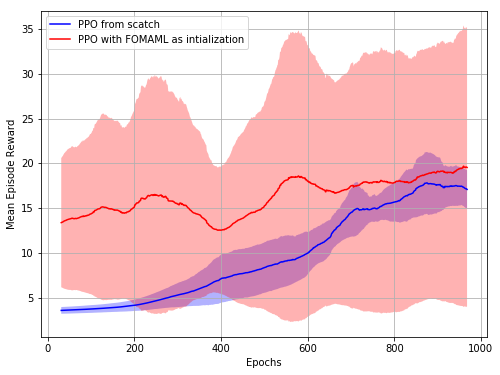

In [8]:
# fomaml, clip
# 10 meta tasks
import numpy as np
import matplotlib.pyplot as plt

x0=np.arange(1000)

plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]

# vanilla
y11=[4.025426508656054, 4.026366253148079, 4.047034652017377, 4.028867868428096, 4.033405534633557, 4.02705786278008, 4.0343919095205605, 4.023546524362016, 4.021234774780649, 4.017302081556016, 4.019709020569252, 4.028493858028536, 4.012967261424452, 4.023520623532055, 4.031930768395019, 4.026009604145483, 4.019967223480931, 4.030699709892815, 4.020294906420645, 4.024752907238728, 4.044066146172022, 4.0255503497117475, 4.026040497007534, 4.033613278463847, 4.035671625150292, 4.052967417645612, 4.039059174136143, 4.027510156522552, 4.02695649824892, 4.042911962407712, 4.041240387908511, 4.036417801464835, 4.0363456322112805, 4.026845615631832, 4.045273186410765, 4.023815398123546, 4.037472031292425, 4.055586695055506, 4.048418255852916, 4.040322228887352, 4.048535880252124, 4.052252624732153, 4.049857609807279, 4.065505916867172, 4.081556359363818, 4.059890832982586, 4.053749180300456, 4.074140259444803, 4.041838465819506, 4.096479858641908, 4.055672056031478, 4.077775800483715, 4.100732101515575, 4.0772254331379525, 4.107669539174789, 4.103133405880195, 4.094777447783104, 4.124100634300074, 4.111923231825841, 4.179466994423791, 4.12637883914713, 4.1111276557339, 4.139456529618429, 4.16893181084463, 4.174390401515955, 4.197516814227914, 4.143842312460668, 4.200396183214171, 4.140161133623313, 4.153899601018028, 4.1546668039612085, 4.159668969216035, 4.20915432088888, 4.146571678104089, 4.167279986954308, 4.142898400842151, 4.120085886190531, 4.166286380017779, 4.172050706615654, 4.153403830588619, 4.129655538366728, 4.2154375076402015, 4.211782707829318, 4.2516101591742546, 4.222828254598809, 4.172647946289346, 4.234947506745445, 4.248870304193369, 4.22182315499774, 4.268605091238795, 4.207788354063009, 4.259371923246066, 4.219451737993901, 4.282978304308743, 4.227856382463843, 4.228950791067684, 4.221931224438349, 4.288336772763209, 4.17078962367012, 4.278816805498574, 4.260410420185692, 4.185415312080088, 4.254142694899365, 4.225068497311637, 4.251285981044793, 4.3116501005996435, 4.267505045422104, 4.36693797310951, 4.291154931948964, 4.2775980774535745, 4.356491301415107, 4.330757791098377, 4.266572973248917, 4.355102187521602, 4.306661279523043, 4.292586840271789, 4.421421892871437, 4.385503691995767, 4.363874755176929, 4.4529771820400965, 4.396987943761427, 4.3063424511230295, 4.377626058277257, 4.368704719231108, 4.355925319301191, 4.298561947500792, 4.38840223448892, 4.356045776720593, 4.357860547721345, 4.378937384679236, 4.431903927370972, 4.476731302630742, 4.297682698760133, 4.306100160879551, 4.340081179944825, 4.454009903209283, 4.413664190469693, 4.363411381158805, 4.28571392120876, 4.336196533583514, 4.375008155073655, 4.339198140292615, 4.396989849557354, 4.331132700763167, 4.381408262442988, 4.359946037540853, 4.520321426397284, 4.541031660246519, 4.377266656054891, 4.451484838672723, 4.482659802590972, 4.363618404996905, 4.4572305275482424, 4.556771219636644, 4.4972952164318425, 4.522765292335222, 4.414527025386908, 4.484876448696072, 4.559919240756943, 4.464499562572055, 4.524917003605401, 4.5900995091236965, 4.4275429394499906, 4.558691071419496, 4.694752476131972, 4.554090600109801, 4.563905026771501, 4.586726949985305, 4.545612582856419, 4.508097829096782, 4.629315154848143, 4.48795416301088, 4.642091244277347, 4.699503503530211, 4.660984641671761, 4.577352282819361, 4.641706094578426, 4.592853719673414, 4.6513757651255565, 4.768445251681211, 4.66437897955872, 4.621276605810275, 4.673027056324262, 4.72595186959289, 4.679472393819461, 4.7109249748757085, 4.8744093871454135, 4.637622286976194, 4.676412616987195, 4.780202593360054, 4.867104820289892, 4.7587370864243415, 4.713158529180244, 4.864869631939432, 4.805900622102403, 4.876170054251471, 4.747839419151346, 4.764914418014726, 4.878738800364088, 4.9154269081673565, 4.786523889648861, 4.8210161880103, 4.88057610722966, 4.973777488623527, 4.933777807731977, 4.876837162529612, 4.978112949879101, 4.682197347747472, 4.913639877183425, 5.051254645611574, 4.964160470805377, 4.8347856406403285, 4.9013392172294985, 4.817331075069879, 5.003476777878975, 4.982263923950618, 4.998997238067943, 4.957472886129081, 5.041160259216673, 5.123287560270509, 4.970277076524418, 5.164747344646874, 5.099048930560907, 5.117393046073447, 5.337820556615453, 5.372790740400446, 5.449512835354613, 5.189524248177932, 5.285564198280047, 5.41912690396294, 5.475588725869698, 5.284673955931018, 5.4120508302554935, 5.325413599066483, 5.614034751621089, 5.6296939049075165, 5.550314955478363, 5.696275253317448, 5.575110451301861, 5.6591984307287895, 5.541068213376599, 5.784613934303303, 5.7533303882685285, 5.85823966079587, 5.919347543043475, 5.853640010848775, 5.877193183498445, 5.911379270139143, 5.813460015198354, 5.9768842942382445, 5.585136486352973, 5.789108155321911, 5.689512134709501, 5.67323580935013, 5.755407020902529, 5.927649924063717, 5.8627996194067995, 5.9665337727764705, 5.768605293278168, 5.840232334777006, 5.942283383608221, 5.957382329465204, 5.85776870905373, 5.91656960647531, 6.001246416486573, 5.902077601049971, 6.081199251304877, 5.934931086221143, 6.110410706957212, 6.074793974551358, 6.040340815581016, 6.001244995992094, 6.158947139509885, 6.151622421385124, 6.1747417969401415, 6.145247387732146, 6.004576587903306, 6.247537308624795, 6.16864803861773, 6.255639866981893, 6.255354838966426, 6.251811822690607, 6.233699991178083, 6.142462844693559, 6.148745639885155, 6.256301127060821, 6.216143309017008, 6.334302403862091, 6.204627111162363, 6.318948634527039, 6.357454060574296, 6.458775042968686, 6.306275538709805, 6.340988275133145, 6.3227196216606005, 6.403061369894333, 6.312897907933398, 6.411729757284129, 6.4323669476118015, 6.442662267073878, 6.277020006459722, 6.451717885801892, 6.3157201321835, 6.373211223274503, 6.440605037877609, 6.402708794868693, 6.431430601212174, 6.418483848531601, 6.229523212791462, 6.363272960084432, 6.414436613246877, 6.448847657309855, 6.47191786692874, 6.353453897864431, 6.358668776874121, 6.479546318186164, 6.368595246182183, 6.373660095393947, 6.457816822399343, 6.467063030752022, 6.388700726412199, 6.304422669423757, 6.34302438552693, 6.386411176156618, 6.3550560637397515, 6.412690012649895, 6.411033686703417, 6.315120274628272, 6.476893836817642, 6.379120050028101, 6.5402118454335, 6.436848053850694, 6.535666410282916, 6.440977082658987, 6.492321423116179, 6.375651933800439, 6.54576191557589, 6.479767997142303, 6.522237716939755, 6.471102755320617, 6.57021791055893, 6.521655070353377, 6.519897848296387, 6.494770627399354, 6.591715854121286, 6.480167294016438, 6.658910208184031, 6.5043682657995445, 6.556836505191316, 6.425495650708593, 6.5315792619154465, 6.587067316845257, 6.588527974613105, 6.582835063073265, 6.5196086770207815, 6.537154218895524, 6.573199358999956, 6.610935313880935, 6.630759197596543, 6.620523575051969, 6.6633319506121875, 6.6010404062257715, 6.5794745910018175, 6.619405222044337, 6.548013816352114, 6.60907156207375, 6.775320959636482, 6.644730793257309, 6.650324462863565, 6.684829553265983, 6.704494914347166, 6.684830298248146, 6.652300817531053, 6.71341431917516, 6.686657826406851, 6.768348797398159, 6.613985473130969, 6.765840225694349, 6.735625652867546, 6.675070097199073, 6.711925429278701, 6.667096479249128, 6.697164091281924, 6.767144609278173, 6.718045758296942, 6.6892060250339895, 6.7548092006652105, 6.709557807142496, 6.783626626485883, 6.717422969134204, 6.774624409911273, 6.737580277649928, 6.727424720574172, 6.837797573005388, 6.790438663985348, 6.855434403966518, 6.8210498227308145, 6.818831506051329, 6.806340013345036, 6.729836928843603, 6.823583858225973, 6.717808431321232, 6.753162042926088, 6.888459922871622, 6.828757493617656, 6.875040778828313, 6.866245839713406, 6.8492429085737685, 6.844636186142319, 6.960277839630532, 6.859729663450686, 6.789512149536327, 6.769703940016822, 6.968469251844906, 6.90201300608003, 6.956746318365608, 6.826252834954644, 7.007085254274754, 6.9160295843050275, 6.9031001782892, 6.91593550953991, 6.866030271791654, 7.0413993001172255, 7.009869708622276, 7.039045337547576, 6.973555609960296, 6.971412059693525, 6.989369564544876, 6.9405710226393955, 6.995356989300588, 7.005991738879681, 7.1614870219727464, 7.040479570058334, 6.9495601718234035, 6.975253493230831, 6.993954541625689, 6.933221015114358, 6.898052941392115, 6.896479305144603, 6.887467806515407, 6.854944839732722, 6.90067939322108, 6.905044107148295, 6.954456404307157, 6.849449558505693, 6.930755580003818, 6.904935008023758, 7.074175144340796, 6.9283315109736066, 6.910699136787322, 7.0506354566119915, 7.143488955517372, 7.01593304559038, 7.10347431977324, 7.050481166550523, 7.012074665373536, 7.057071059690753, 7.116700568450364, 7.2098474993442325, 7.187793692632337, 7.001790756503594, 7.198966162711347, 7.0846534291809, 7.057254888507886, 7.092765143309163, 6.956003756053909, 7.1765485939458795, 7.162410711641697, 7.089681446216023, 6.928530769030766, 6.996202037584167, 6.90616171717082, 6.877811768456079, 6.962114112677671, 6.913060894185743, 6.829621654639925, 6.822275203527806, 6.953010061645022, 6.908371737257324, 6.86162845408119, 6.885800618319475, 6.922428961656634, 6.95067983915348, 6.981067776032369, 6.79582464699658, 6.994324899052424, 6.9217676994021025, 6.920209085373513, 6.792630400401566, 6.906325907302644, 6.726148733148881, 6.918598368462289, 6.787690983503654, 6.833394874262529, 6.793722470817038, 6.8454312165573015, 6.757890667333291, 6.735566361321334, 6.733185366798389, 6.777943637814878, 6.805445270046255, 6.709635653270807, 6.878718139987749, 6.766094657553724, 6.838082577087208, 6.7306063997576775, 6.718662042755726, 6.978940235268712, 6.852857154615646, 6.790621030165244, 6.919230905402985, 6.802554213878977, 6.745127872741984, 6.808751401770082, 6.744302564790785, 6.975890862946344, 6.770881840113307, 6.8338070936537125, 6.836204042318613, 6.814794006005758, 6.8484408465046185, 6.823272397800572, 6.905801451174664, 6.843877579468017, 6.7995317133669095, 6.882564897958411, 6.8780615484694545, 6.75026023142458, 6.85297058013476, 6.943265648739298, 7.0415424080685085, 6.778977662428794, 6.903133328508067, 6.957546978325697, 6.9105021697082, 6.931037517959682, 6.896576935045395, 7.01964044306009, 7.052810912339624, 6.940361033148055, 6.787754081226543, 6.748515112374827, 6.828996186448105, 6.8698398095623165, 6.904586860774254, 6.850664707066707, 6.823626507800905, 6.975779381766754, 6.888631112127181, 6.909680429465989, 6.933525606469191, 6.962989736124353, 6.92773394851582, 6.943362033550696, 7.151773069985444, 7.005621167064172, 7.052548862645076, 7.002862658804455, 7.2013984962551145, 6.963252679852519, 6.919623073464327, 7.010364867802279, 6.982032456826058, 6.932727311870222, 7.02522190603265, 7.021315816997211, 7.088567322752118, 7.333194246172792, 6.9971075962792355, 6.95717662498025, 7.008139013105816, 6.93344451913662, 6.991756447123646, 7.035821636612673, 7.102228913816738, 7.02868347383091, 7.2231634109136795, 7.072433903869936, 6.967130242119271, 7.277657361405302, 7.001270220274329, 7.21290038233135, 7.3309379192493695, 7.310544163006106, 7.356811203482866, 7.156242838416417, 7.33340254999216, 7.4032626107027255, 7.200815030881053, 7.44477389412944, 7.211319052447158, 7.312420723386308, 7.415065658013243, 7.44347769141688, 7.417425989354084, 7.372813039616657, 7.5866580501149, 7.592245153329672, 7.567855984192456, 7.384701108357555, 7.677789675918537, 7.618672589797552, 7.9410465346374055, 7.565820773761799, 7.673277479261973, 7.803555205447732, 7.750952606262629, 7.810254525687444, 7.966143759641871, 7.708903004077953, 7.974330199973068, 7.710876748633462, 7.899239403461766, 7.8483647655676485, 8.046825389854224, 8.087504437099856, 7.932514054245096, 8.029418429626155, 8.061952628974103, 7.928846294853495, 8.18609154673869, 8.029813836009456, 8.107859772262428, 7.800534752844768, 7.928872311088659, 8.063947123151788, 8.136576316587238, 8.20830279136855, 8.05871261680334, 8.320011655806393, 8.176533601771553, 8.319986396940935, 8.502767237454732, 8.432184851692073, 8.482382106572288, 8.455698350006351, 8.501741597876192, 8.557057152873002, 8.929911476040692, 8.491043333400299, 8.862953145085958, 8.621608073375231, 8.995177744395901, 8.81209643121518, 8.710424567914279, 8.536835063609505, 8.631262020739404, 8.446933301827507, 8.577070431435272, 8.585208745202504, 9.203262970874466, 8.832048247045337, 8.679418318755301, 8.877076138550938, 8.902838987455757, 8.714908057374503, 9.002938690152831, 8.550910827334285, 8.93920227502772, 8.973014978907358, 8.94846028001141, 8.968978572483422, 9.479554764234623, 9.36844931158858, 8.959337464332037, 9.155887673438036, 9.295468966164446, 9.639076818293098, 9.511641060471913, 9.738551348732765, 9.699933522331156, 9.78565277565064, 9.838889148257028, 10.14162967518875, 10.3421892973679, 9.7620878746768, 10.132166019426725, 10.186283959519928, 10.245348804680214, 10.287544263876436, 10.099138695891448, 10.130332973359367, 9.821782693365474, 10.305746785771582, 9.650565475869806, 10.55662375024672, 10.113109947293488, 10.155978931884412, 10.237027279499728, 10.784146949422478, 10.78807278311097, 10.891797093468899, 10.465178793338428, 10.38491032271606, 10.940068171833714, 10.408269505573225, 10.534271347701988, 10.93980041607286, 11.154238532203818, 10.5227182152493, 11.433589649896657, 10.802222807570592, 10.58320775259735, 10.965458144438173, 10.955594781092872, 11.79509655746132, 10.868197053169899, 11.208355572974309, 11.15762067600459, 11.12731730731332, 11.271793230829678, 10.545376454721552, 10.799329209104872, 10.941838485338062, 11.694707146045106, 11.178434765174114, 11.372710159750238, 11.05240075191506, 11.139667891398242, 12.191267603827473, 11.573162282241043, 11.542926447378333, 11.915328044892421, 11.688649235086867, 12.231184671796331, 12.693483300028731, 12.654899036768109, 11.918808369841475, 12.68460807285266, 13.469821218234756, 13.054618133953483, 12.095351595709571, 13.162631343659912, 12.15839868200404, 13.221361191295554, 13.398829954805919, 11.81955187308009, 13.269891764328264, 12.529910963965627, 13.151447835094473, 13.417667355544177, 12.45517614906895, 14.8349829903299, 14.548178428215632, 14.575709510565753, 15.560825344543847, 15.175441679054913, 14.340922682558686, 15.243381217830871, 15.166291655507504, 14.839131487161449, 14.627461200703841, 14.071787427780713, 15.4939595607281, 15.650715759019889, 17.433107644806157, 14.386506852331816, 16.255116913830708, 17.05885588013524, 15.532872298165216, 15.423187942429314, 17.595385567033915, 18.190755715345883, 16.37679922479085, 17.99219266249124, 18.033747475954883, 16.3629852601258, 17.35379292921097, 15.59143598151047, 19.151026940062287, 18.101337594286626, 16.672438871395645, 16.148484173603137, 16.33160714812482, 17.571291754076885, 16.280156736546896, 16.303769059293757, 14.71512607658931, 16.347730369171625, 14.056872242447788, 14.69615565951097, 14.215896880468705, 13.599244435391304, 13.574943088201215, 15.77000619459058, 14.585459244441925, 15.727907316887471, 15.390992164121432, 15.278900021227244, 15.613263927600247, 16.11542499928939, 17.51859336363605, 16.550310943819166, 16.99537271561778, 17.237750366757172, 15.899584963966554, 15.389714044929839, 23.81704220510528, 31.227147346900082, 24.969235745825156, 21.110125620471415, 21.15067866748796, 23.779442256285915, 24.509411865890538, 19.30694199857693, 22.685402205534345, 20.978961754648974, 20.22241482921223, 21.512989267972486, 20.83584965172173, 20.08528427805172, 20.132998373704197, 20.711577156735224, 19.748184567341635, 21.20188577835964, 19.5740622676773, 20.20543795580906, 20.10385659269583, 19.392705110171324, 19.731379557884242, 20.01608895402742, 19.5275509432472, 21.829962521272748, 20.280142211133978, 21.710741279910224, 19.90336662787469, 20.31721869811319, 20.665701976778156, 21.09531165281623, 19.341538721762696, 20.158217495683253, 20.402587057824704, 19.26508601703073, 20.093377080350585, 19.58696411288515, 20.000521907775287, 20.18525558640058, 20.201627267789803, 20.409522237806847, 20.42171565723969, 19.763302049900943, 20.72843557099506, 20.298227158868063, 20.624036770632184, 19.781242142561226, 20.995764767851664, 20.342833672551247, 21.007476169308337, 20.830201832180652, 20.39565633312481, 20.66049468963717, 20.79998668352609, 20.705276977033922, 22.722735642705295, 21.804800536129218, 22.625726181999756, 21.75488253317784, 20.6852928295934, 22.778142032491566, 21.312272705688898, 21.469810562483048, 23.40179374657925, 25.268096669142633, 27.87237016724684, 26.261297516308122, 22.85149903350325, 22.157973051602447, 26.307023045265563, 21.341388078215353, 18.318021738211392, 20.90220584205475, 21.27787127906533, 19.514050860210606, 20.699594542481766, 23.104847013769618, 31.90689665344774, 39.32382981687936, 22.55555736867887, 28.924779105620825, 24.771886483056182, 23.15236722798137, 47.49130861954396, 25.741081047836364, 22.68711855691862, 27.964117939748224, 21.585976728811815, 23.605864517802214, 24.138901594840473, 21.094439224448603, 25.498943407934796, 21.426600306987286, 21.16373307677842, 20.86355924533461, 20.54428312732474, 20.79480793996643, 21.78564581033531, 23.75374601925171, 21.348072584879507, 22.19962514741368, 20.93553843892819, 21.71877628822376, 34.60875536610906, 22.2560262121555, 21.706776298922986, 21.472072227718673, 20.082836190760425, 20.737629025777846, 20.589260605026396, 21.308365038046613, 20.269545596341345, 19.880368356205754, 20.111541282444588, 19.991936316155236, 19.908001510970102, 19.543557401856607, 20.02479052613417, 19.950155782483918, 19.218198932562153, 19.533232191809283, 19.221022179934373, 19.638300820923433, 19.875294639962764, 19.437721543236325, 19.716635879741492, 19.324837140448853, 19.335974513495216, 19.63322522354382, 19.401665827018512, 19.40008277625442, 19.402112196842086, 19.88514331054885, 19.651213760124868, 19.505941648958853, 19.053566546345685, 19.519041868954492, 19.202132366415654, 19.321740946639277, 19.236786781726668, 20.249514874303156, 19.14322947936757, 20.181562399736034, 19.537570079426473, 19.573874878159714, 20.131796789906996, 19.666633341727678, 19.713925079977535, 19.061842345418675, 19.43008450843983, 19.920830925802957, 19.551955845748726, 20.5930460701546, 19.769419107305804, 20.135122471081008, 20.62778364562761, 19.109222375345922, 19.725842944447166, 20.632135581699163, 21.000034056232725, 21.063088264604175, 22.847851431236396, 30.529212056108452, 20.0734603906576, 20.444453863567745, 21.303910335366616, 21.57759666940621, 19.865624240232396, 19.99133052904798, 20.793270075847147, 21.448804595808266, 20.170320945346965, 19.811191552372968, 22.15559512079121, 21.265291470487416, 20.389623305324065, 19.60170788595865, 20.536232546928495, 18.67724561244132, 19.65705240519505, 19.399979926321564, 19.348883893856456, 18.9951701826628, 19.917848573403774, 19.283068090962836, 19.8614419884311, 19.531933886708416, 19.24068056588118, 19.859901601258837, 19.204650883090142, 19.237250247114726, 18.94308753567509, 19.47041169308448, 19.4769058460033, 19.090689344679525, 19.497470097853732, 19.280829655245462, 19.411948152324424, 18.933139197720404, 18.68844971041831, 19.192216625191307, 19.122074375416737]
y12=[3.062799045842599, 3.1138838993937297, 3.135350064601351, 3.0555508058454257, 3.039463182616976, 3.0644387161168196, 3.077805608378203, 3.0555313853126913, 3.080580506635572, 3.0760740346168967, 3.09683161278874, 3.078711680341377, 3.087943618814282, 3.055826609127891, 3.113562502730632, 3.026038665316528, 3.0925990924388644, 3.1959426321421796, 3.0385343150781305, 3.0966876509917687, 3.1096854563663094, 3.0983623902182234, 3.1146989047081797, 3.16430973084551, 3.1423015380703467, 3.078858788564763, 3.019144479041812, 3.0169693336754584, 3.0629427323168548, 3.113083537395334, 3.224966499845051, 3.078495984957674, 3.083001817248551, 3.1117740579594444, 3.064631189734724, 3.066353364635101, 3.125029827878127, 3.1976472616734166, 3.1127881479298996, 3.0558103656748274, 3.132638550242314, 3.0948094388453566, 3.0996647600046634, 3.07297319920819, 3.1560992103396734, 3.0526521754351683, 3.202203711105524, 3.216832469155167, 3.17635883318115, 3.1463396927081297, 3.109437091077811, 3.1628320589503134, 3.182374824008745, 3.1523320588688617, 3.2475805370993878, 3.146167071264807, 3.1523035702543734, 3.1825364225929516, 3.096746750964973, 3.08913758698466, 3.091742941181166, 3.256818927460118, 3.138586398957694, 3.151744133533497, 3.1439816229680453, 3.1117461517414267, 3.189069985254994, 3.1486716924027185, 3.176314085676233, 3.191268158611932, 3.1260048037024677, 3.1329621879801417, 3.1510406623878082, 3.124502716938547, 3.1367716156572425, 3.126725301872254, 3.2041938409162305, 3.2313240431616195, 3.1984528834999373, 3.1751980367399892, 3.1642350355486304, 3.17118133447109, 3.2097657551526777, 3.1374914390496373, 3.275741801765214, 3.345173189074998, 3.2257715069574533, 3.1823770737724115, 3.2099978526566915, 3.1859180701259078, 3.215709850197426, 3.275179839635005, 3.2111349869862473, 3.125111779228307, 3.279124301320625, 3.231824251935489, 3.134106111509189, 3.1785563101707948, 3.211298436471885, 3.238590600635929, 3.265491217910128, 3.2822930550775213, 3.316388298497147, 3.2553866637182347, 3.2038217230819597, 3.26754785279947, 3.273826233609855, 3.2592165634330246, 3.390403975379834, 3.1905414487192223, 3.2439026534675586, 3.4452874832725207, 3.27912073975629, 3.1860064244214317, 3.285109841409416, 3.1915767682389204, 3.3184145919535473, 3.144543131522893, 3.3609990916801347, 3.287477285135883, 3.2793806867531465, 3.1689431425553116, 3.321996260777416, 3.264148489525401, 3.4243547296200294, 3.288283263230217, 3.224818716297642, 3.1796507264033615, 3.191573898580548, 3.199244576964198, 3.2431322166485486, 3.2629548709889136, 3.2631061695099017, 3.329522999521125, 3.2059782461965254, 3.39893351882422, 3.4138128354538932, 3.3697877106209506, 3.400011356092837, 3.3783066823314356, 3.3271415121730596, 3.4219435194371703, 3.1605962687031495, 3.4020352003235788, 3.4714392194342967, 3.326641618236866, 3.3172021125477005, 3.4396680882070054, 3.553245559193652, 3.4206093500194594, 3.205499535654328, 3.360708260395474, 3.213078384329473, 3.2409877308004074, 3.329554357786218, 3.3067829822298833, 3.622051215646275, 3.3598487106822983, 3.687969959345444, 3.418077712352053, 3.439592530179836, 3.285956371524346, 3.3813963461504173, 3.3760036240064517, 3.4277649015422242, 3.3448313065986928, 3.542463025534089, 3.504191395299916, 3.4870279352604143, 3.42088762177748, 3.621053402704342, 3.365272628940456, 3.291664064885165, 3.4732605406260415, 3.28261630014223, 3.4839121955351975, 3.4758999905216683, 3.5350206666642614, 3.619573599153375, 3.5301139316596553, 3.6543126077829506, 3.4425109379642014, 3.453293173921605, 3.4604124235485267, 3.4991012276293034, 3.4918024417339497, 3.432222026230625, 3.606024172402592, 3.449801818520073, 3.3130887499305164, 3.445980448057808, 3.3687695764780665, 3.757644858118587, 3.7002719907881962, 3.6413945406240114, 3.4838996973003726, 3.6498499986359034, 3.562314446740177, 3.6293157220953063, 3.6197288776784973, 3.44097759865969, 3.567458849995611, 3.4388580745210935, 3.6159043149263423, 3.7676426555956586, 3.461730151849999, 3.558270849529953, 3.413487882298732, 3.646528331985493, 3.515379515991544, 3.65784094476862, 3.6640335146621403, 3.594297314192642, 3.5013149023061776, 3.568738157641771, 3.6186231954563524, 3.9426693234067702, 3.5792228333213654, 3.743466991611703, 3.8277834582605093, 3.635177632786899, 3.5148941545306354, 3.5293799259204413, 3.9325089326600464, 3.7619201217713614, 3.7761986739305105, 3.82023514145318, 3.785177156465366, 3.9613894741208306, 3.7286649475076907, 3.83164396526522, 3.6844260856019106, 3.982423147459056, 3.7449002960123705, 3.8299916832668415, 3.755969323095825, 3.771664459039842, 3.777032116646655, 3.7088255646615145, 3.8807588339695354, 3.701430582695741, 3.971257898718383, 4.038411121634267, 3.8701187004256634, 3.958059547048861, 3.7848183424435105, 4.042264272815709, 4.111027133581675, 3.976476720651937, 3.7114425205526125, 3.92284299451638, 3.993799084119551, 3.861989929706507, 4.085137727207228, 4.3670331730148, 3.848781313350722, 4.034405741751199, 3.792276720299316, 4.404682345213892, 4.331594969869694, 4.0768574269361375, 4.164097712332909, 3.8126107670469493, 4.013104110952747, 3.94907534811881, 3.965990322685664, 4.337736874692405, 4.427582414643719, 4.033468972717631, 4.344655519010504, 3.9921169734394573, 3.8260623439878048, 3.902443083350958, 4.673874897106544, 4.267690989176581, 4.954203676181044, 4.562754326219587, 3.904477643517841, 4.458866877288566, 4.010177043980193, 4.016392452561616, 3.89237821146305, 4.157499384552557, 3.951596764434587, 4.005045521883727, 3.942535246824381, 4.671238362255819, 4.7289748331612484, 4.022792695048249, 4.770270527930568, 4.298102667429809, 3.9387364598092804, 4.115059397728515, 4.374544697464836, 4.840097977128083, 4.218222256181081, 4.746300915957112, 4.252090674774017, 3.803692627999638, 4.716828626449378, 3.9630418791991513, 4.383049163879106, 4.3076151399416425, 4.909127696806737, 4.160292543737321, 4.0318769041503, 4.172107401385647, 4.406731872392976, 4.400046610633805, 4.31616353432316, 4.295979602261889, 4.463220923257218, 4.380226914845667, 4.914966272070956, 4.390942775165266, 4.613222616460597, 4.473538526097421, 4.33131658865502, 4.345988445138467, 4.2449195746811474, 3.7269280966014615, 4.105245036664747, 4.303414525407979, 3.995495470866574, 4.795949468789131, 4.3289130886466065, 4.437848641976603, 4.5256120665671435, 4.483266907977658, 4.908264691428068, 4.706196596179127, 4.6936604642707165, 4.525132931927001, 4.4389796441230756, 4.70441404709738, 4.102746126271046, 5.847811839457275, 4.45612413358163, 4.7050231801464095, 4.633176730555662, 4.81788492418387, 5.253293707148522, 4.68081475176198, 4.707480087844877, 4.399010705850391, 4.77165505260258, 4.574320244680296, 5.194213472436306, 5.3594826472854145, 4.742680870689935, 4.654096969548446, 4.37822630232686, 4.319986694938626, 5.090688158555922, 4.648506285725842, 5.409120928946216, 5.0935104753407145, 5.160133453917197, 5.056024542667831, 5.8185071296580295, 5.081033777860925, 4.558414734341524, 5.016968381656051, 5.151836363856157, 5.278905194927075, 4.364785236804313, 5.259759565077865, 4.73785271647284, 4.6853683753476165, 4.48399970587129, 4.484057390763387, 5.387072618498851, 4.872186945100471, 5.665311831011735, 4.631883637757655, 5.0293935730800055, 5.298236365181348, 5.436236709854016, 4.6486247635793285, 6.052357858251078, 4.789917171198191, 5.71927296939819, 5.698820532887644, 5.077244187689831, 5.551313270616572, 5.872127242041482, 5.940848341274891, 4.981786697852471, 6.477342487628384, 5.4230756178095145, 6.205351909185572, 5.254387432611792, 5.298639761526112, 4.964808350696724, 4.766752073531246, 5.435006976851608, 4.6043921063318445, 7.036115889283977, 6.493411303319521, 4.9709310973821506, 5.839046070584967, 5.592305493598329, 4.381688597129262, 7.034188660434913, 12.450708244350519, 6.004335071258273, 4.978234073423389, 5.511569651527426, 7.386833969333287, 7.632794417824955, 6.147052003773247, 5.624759543441645, 8.51144775512798, 8.638818585054421, 5.53579789888126, 7.299371440159647, 7.973162505401763, 5.532129394022814, 8.311402018068026, 7.1679561707670985, 5.752919301319241, 5.581193388595487, 6.599159113881285, 5.225217115465647, 5.645289406946714, 4.967167319786402, 8.662205123401353, 11.657745736460722, 11.796813100143027, 7.360777328872903, 8.754570424410621, 6.7686029110340735, 11.913893583496694, 7.224185326848766, 5.583468246071792, 5.840312388250757, 5.648460265979348, 5.840242112524098, 6.629303117386322, 5.344344345951505, 6.13837393734667, 4.8263433986256326, 6.595631720959913, 10.992934532455235, 7.107728304531236, 6.0740979134994095, 8.103271732156571, 7.194819729175737, 10.909926028112228, 6.918031840142974, 5.670965555142233, 6.266992130925804, 6.168212903922254, 8.582095688266032, 6.314558491580148, 8.671679760986073, 6.95106486051292, 5.7344095601303255, 10.861658642498323, 7.255000751593793, 10.558538307140484, 6.524207449439735, 6.0879267296898, 6.095870015382692, 8.941763827043266, 7.395934153722467, 5.692911407698901, 12.07984485289955, 6.096585244721053, 6.989861618258715, 6.670406829465351, 9.536372992163102, 7.624284712115637, 12.607989173488829, 8.130532631539218, 9.480486595858086, 6.768910061956373, 6.576042168219734, 6.1945673022464085, 7.088672560805858, 5.719475173504992, 8.441676375266521, 10.735738887809825, 5.7403970152316415, 12.32899895678345, 6.227599648608646, 6.890577064709606, 6.233297889950554, 5.934256613629617, 5.75679749732156, 11.629081603951427, 8.257811901796819, 9.43795568999518, 8.379667559238795, 12.522007125774898, 9.563716243979417, 8.567556330544587, 12.526761669261338, 6.296215082072207, 6.903486018759223, 6.838439889244238, 5.572759381643434, 8.039711872223885, 6.562882564483932, 5.823406354029722, 10.30425595766615, 9.390068771276894, 8.122379541366731, 7.4213101551297065, 11.341507778873435, 9.874043608681191, 7.353152592781354, 10.291009300759042, 12.10044649120119, 6.920448842732311, 7.8740787354121915, 13.61441293341949, 6.4919175717493935, 6.363569071060558, 11.711154728301604, 10.845831286078973, 11.293712827340897, 7.3725120551197785, 11.843464797660078, 13.129076674140553, 14.186691173234438, 12.87356147713447, 10.208029474971271, 10.32813713956747, 10.187806126581764, 11.882227452115629, 10.524925673809548, 9.9375114919535, 7.37130166622115, 11.843509410763465, 11.686974381129737, 14.03568095876688, 14.668851722158633, 11.72119734338218, 12.60230271318094, 8.481526671525149, 7.6344755973465865, 12.271481782230257, 8.906966308574601, 7.2138863940952875, 12.976940463180538, 7.27926823331506, 7.170956918392782, 11.57607461366753, 14.93039755907617, 12.030902043066565, 12.703326628056587, 8.470950603925345, 10.624025809702436, 14.536212183214625, 13.733183813434946, 13.114898885490073, 8.230781859869108, 13.902933775574176, 5.896253663694061, 12.909523842650795, 5.7331167467972755, 14.280998630228577, 12.685817161019044, 14.962072443025487, 12.038460166459373, 11.039529789883684, 15.952323926772102, 14.786116902910877, 13.151974726769064, 9.067755487196631, 11.481955311333449, 6.479383799679207, 8.499160276311056, 12.691989181365937, 13.078683549514617, 9.411472341384085, 13.310821095672527, 14.17062040035626, 9.336740214066943, 7.941221603972101, 6.432202369303015, 12.708150726022199, 8.207990521959234, 14.097271163288726, 13.256971961984743, 12.129972741524293, 7.9302285193649285, 11.778147901062407, 13.843327962770424, 13.883681574664255, 7.049011627926933, 9.778015702429407, 13.922745828057408, 9.63008383125251, 11.976435060683011, 14.374148996634574, 9.536047059681783, 7.9377298467702175, 12.572400538981558, 12.498347430400965, 11.352093081483678, 11.964671849944054, 7.756857974472411, 14.998368732642032, 14.37975875848154, 12.250337298041694, 13.756379160641556, 7.7428126747253305, 16.01270223407988, 11.37216372291636, 8.227302024025828, 12.435848728773662, 13.885743123181307, 14.46620516341621, 13.516322890111837, 16.32979450036179, 13.72493422501113, 14.355824618475989, 16.52978588119553, 13.297203500422974, 14.215311797572703, 10.60175190496572, 13.67382952074626, 14.006172173860268, 15.939976060426943, 12.511703526082329, 16.832696760242847, 12.411390520466288, 11.744232496237869, 15.632828507256477, 12.723472286862267, 11.139446354546969, 13.937058529220264, 6.490940260887359, 13.906977105838672, 14.488102354083082, 13.559571057114898, 14.608738595342547, 12.858863243147976, 14.907589515593807, 13.077502809565559, 12.19922115233736, 14.427432249607715, 16.206826650990678, 6.579742840409841, 14.274798868238252, 8.396296925403046, 14.429047862594626, 14.791160514517053, 12.818725532325745, 11.358262832513557, 11.57581069220301, 13.345754357107294, 12.752312354139734, 15.172101175008919, 10.440597428810602, 13.310640226215114, 12.892325705622042, 12.074670427885916, 14.070174819323643, 14.512920525993113, 15.610363987146632, 12.75766921529866, 12.227162951147152, 14.099609485372575, 13.613807151000628, 11.028606408129821, 14.206879253946765, 13.705796866689694, 14.704253707109732, 13.573382757275766, 13.907272290566318, 13.33644247061111, 14.834511835883157, 13.069312893433903, 14.941636674055967, 14.877778669051315, 14.008055208760918, 13.77466693485341, 12.047878976728326, 13.214238332359766, 12.515490425268037, 14.35559015591382, 14.700052922057445, 16.253387030757114, 14.799143529470944, 13.631834187649783, 14.658710911559538, 15.07180000072358, 12.603723683512452, 14.977564968194194, 14.415657020043504, 14.496988964983734, 14.042427550012494, 12.626971970788912, 16.198682158768435, 13.802923728442376, 13.237440303718003, 14.075987354754103, 14.396503689361491, 12.732144348365855, 12.033715644170922, 13.005645697256618, 13.411438784107059, 16.935833655233637, 14.100057930304708, 14.809030368040293, 13.946830099768485, 15.865102586294679, 13.302556908349148, 14.581944741496557, 12.454779743215147, 15.150227166611092, 13.586846601149206, 13.35599277047939, 14.154101786356811, 13.178577057161927, 13.086532181769504, 14.93926886203578, 13.474896740256186, 13.410494283919384, 13.021270392787702, 14.05403175085849, 13.373115628395654, 13.61011078215513, 14.828416677388034, 15.436845579933273, 14.867616656047595, 13.527228887284906, 12.723888622574071, 12.982033308193527, 14.849886172074315, 12.573526929758502, 13.106228740675709, 15.106765368431093, 15.349390332858802, 14.274336160087863, 13.138670546748056, 14.685319568670199, 15.442738121330658, 15.219336203767954, 14.65690189252657, 14.266116952116182, 13.040897716573022, 12.948489920871628, 12.749161269653571, 12.994337531330416, 13.737223595063321, 14.053591528493797, 14.855230412757521, 14.467783708418928, 14.255294340204498, 14.18960964837198, 16.070781506615088, 13.832510168253888, 15.39854879622788, 14.335194885855655, 16.91510879708244, 11.807626060746923, 14.37160058192531, 12.95505717946357, 13.053149948908361, 15.544302661576644, 12.810017615185771, 14.526389301092772, 15.525753607526575, 13.907224321413294, 12.59486343164125, 13.61235581797843, 14.069870076927803, 13.904084885174528, 15.226079552215175, 14.89309744082964, 14.261554022295805, 13.265468971253233, 13.25055535709085, 14.819116313744455, 15.222853872618339, 12.295475988487143, 15.862725192405742, 14.847418997178048, 14.313918683987103, 11.877028306295635, 13.567024657133684, 12.710835239918746, 11.414614888201625, 14.422979441673908, 14.490910846855483, 16.120058875133278, 13.292268931323024, 13.404698361244945, 12.7591112730437, 15.944615191378936, 13.820184297203511, 14.542150166023196, 14.626689508395698, 14.889942365189832, 16.416417685202624, 12.584286380353433, 12.90697865275921, 13.462307211478278, 16.663285422481504, 14.630026601921342, 15.391256632687075, 12.600252992959723, 13.784339201342519, 14.778044098241873, 14.062399888804118, 14.452213231486072, 14.11406074014791, 14.18761122392742, 14.863769821043714, 14.413698730196987, 13.416990124951141, 15.72683362598126, 13.323183285617956, 12.459866334674636, 13.189850174383846, 13.330756594448616, 14.406013995849397, 13.274142843768661, 14.450915881631426, 13.142264627032665, 14.234414572126838, 12.679679527746906, 13.441544013884762, 13.812999467710345, 14.572425411814509, 14.544302273340683, 13.51362254134884, 13.46311062681524, 13.180350196980978, 15.257337414942024, 13.774178790899919, 11.622259376003893, 14.956268391487558, 12.081179346909686, 12.407488687988986, 15.302952055328454, 14.366535877911332, 12.649438561430559, 13.812588758831856, 13.020027279336627, 16.35994968199558, 16.001746156171418, 16.566298228568893, 16.612014066080356, 14.187404543955317, 15.029452576448595, 15.423899692958603, 16.975564486643403, 14.974219641561387, 14.357108454602823, 16.06010674751286, 15.456746020328184, 14.841010720608194, 12.841067860707232, 13.848039667532339, 13.45245472732688, 13.539231836785818, 12.99912394224798, 15.896224161567883, 14.313628134088983, 13.819756745334155, 15.927886861504618, 13.935904230243587, 12.496518175140032, 12.919568831884988, 14.896978452664865, 16.06616086723384, 16.03068872156258, 17.33768223536027, 16.19173203758342, 13.960240280214903, 15.279110879872222, 14.505171836178608, 13.032439688345887, 13.96381944544563, 12.248945648856065, 13.963348231865238, 16.986984374060807, 14.029849671856416, 13.618641388622635, 15.377485794586628, 15.996789740441907, 13.433953821055864, 15.377823557309235, 13.231513636804337, 12.774605026645277, 13.796012752785973, 16.52585307641183, 12.512394140881524, 15.870868718985827, 12.885707970130948, 15.325875819187631, 12.378163413480214, 13.587797104636207, 13.695803389858183, 14.911652726222844, 14.600213154817116, 13.48514983527149, 14.591873442397493, 15.336081787154123, 16.578687046316922, 13.751484092259782, 13.713746153406412, 16.31545158801126, 12.534227573071758, 12.236612108790517, 15.856006767411994, 12.618237739723837, 14.283319043834979, 13.05231609785641, 15.081534308178002, 13.87591320179247, 14.4910518827315, 12.862903970960485, 12.147796336030463, 13.125530676911392, 16.249460079006194, 15.215255519128217, 14.286641039847744, 15.38399068384246, 13.914428762160673, 13.627305853934486, 15.645273955988927, 14.22013743103179, 13.235758570054958, 16.12396701321266, 15.974886589344205, 16.169487254459703, 15.31781812721296, 15.45957575029679, 15.22144297682542, 15.704380852018634, 12.963714761000162, 15.031302748263915, 14.029002540173883, 12.869790824145353, 13.32130884519447, 15.725425092021261, 16.402916609917142, 12.798811680980474, 14.732384888070849, 17.092144003995937, 15.747606995944126, 13.600101159933354, 16.169969402160902, 15.443865228695666, 12.859458623038162, 15.578760839591167, 12.511525841302033, 15.343103653631468, 15.276130335832564, 15.781626106772638, 14.89243911088323, 14.644658791104563, 13.82802392141523, 13.830633056562613, 13.647189900898274, 14.526538076176717, 13.995357247609315, 12.822713068572972, 13.401720659836787, 15.032887243404012, 12.006350468782449, 13.140218567116873, 12.896351571440357, 12.894686432753955, 12.22724889767854, 14.003642118942066, 13.021852520263227, 15.12547749329435, 14.081500804574436, 14.757238157382911, 14.045837155145838, 16.04669564251487, 14.501112521640344, 12.492757236137692, 13.72137628380708, 14.293636524257863, 14.00985281767175, 16.171966115993538, 15.867687447834538, 12.99299362978999, 15.099541430975568, 12.257679355736899, 12.071977806011297, 12.43578907562476, 12.367206225204585, 13.851376975710096, 13.669293224470561, 12.18243609896868, 15.725507123405658, 13.451801049597435, 12.816634102818824, 16.93610497912845, 16.033654498290705, 11.467419176871946]
y13=[3.3064187804506746, 3.2447199294722995, 3.271988045435243, 3.269993623395533, 3.2693974373583803, 3.2946547638645622, 3.2887816801963607, 3.280946654047291, 3.300613884624041, 3.288343499458641, 3.299890915874268, 3.263540433105624, 3.299703771071866, 3.287837993036309, 3.270924486791818, 3.293605262767831, 3.2558285827575264, 3.267246927321004, 3.2725573289618963, 3.283626471452112, 3.2688659484636977, 3.2879769220295527, 3.2534430109717456, 3.271060990574322, 3.2506932494215794, 3.28149979571043, 3.2700046574180646, 3.3239520909445255, 3.3220935950601604, 3.2911018052209227, 3.274830561225837, 3.306526521618617, 3.3041220942706215, 3.290986578492175, 3.2798785462659885, 3.276044070358406, 3.266016746295768, 3.345818035736123, 3.34809419377102, 3.2872943435137936, 3.3083185491864744, 3.3143443895669242, 3.3266393502351113, 3.345600860437337, 3.3388713472864024, 3.30431787321611, 3.3215172540126088, 3.2730423228155847, 3.3049284474768683, 3.306010405658297, 3.3378368320782466, 3.319639853575543, 3.273228721527254, 3.3323330400705045, 3.3213145770291326, 3.297589483781957, 3.387974176162378, 3.3262254989803717, 3.344764671374058, 3.3473274520881775, 3.3166454030644297, 3.3292655328362732, 3.334989559777263, 3.402958984384532, 3.330306784819255, 3.301105226232267, 3.3181067599755685, 3.3219249106944133, 3.345318303279278, 3.325802776649249, 3.356923320845893, 3.343285520174964, 3.3657301788455856, 3.348105685549433, 3.3557809864583867, 3.3614971264037985, 3.3633570255488525, 3.297408086055611, 3.405922693463652, 3.3777624822269257, 3.385971124487558, 3.3875276215594403, 3.3175188636079036, 3.3639699169221062, 3.3500218098838697, 3.3568877270257347, 3.3699800642813855, 3.3415264902732233, 3.3278799707510403, 3.3450396455266564, 3.3544975131043513, 3.3518413815237866, 3.3859531669588496, 3.3607638686042485, 3.3891293974879577, 3.3467485273270916, 3.3580213220783444, 3.342139319559054, 3.3795641568354755, 3.363818648731945, 3.3820361577775984, 3.3737133316121977, 3.419617450697568, 3.397295460100696, 3.385399060887493, 3.3875827794325266, 3.3387052757873494, 3.3467583347944587, 3.3673149891789556, 3.366272285382917, 3.3319498666314105, 3.3664399950818438, 3.4171580230876883, 3.4095723651311602, 3.3629513587454287, 3.3733656550290534, 3.414832616407123, 3.4003608635167297, 3.390748099145884, 3.3970375950416596, 3.3787121459680107, 3.439778954815827, 3.415653783958453, 3.4395256506613245, 3.4198859466267018, 3.4627022305099198, 3.4118783643875576, 3.4407726012295767, 3.4151584235459356, 3.3825618850732058, 3.385340696110767, 3.356176891671039, 3.4234338438929335, 3.4595665670242894, 3.4239135602761395, 3.3886796545497266, 3.386183122838397, 3.4149304515532988, 3.4567642729236354, 3.4371811745889187, 3.393982036432508, 3.3888354024345393, 3.382362739842915, 3.416189054148894, 3.4524059472560222, 3.4110696179906563, 3.449849238199166, 3.3545366745162033, 3.4071605453086398, 3.389971123814685, 3.4079018180586367, 3.429645101860145, 3.4288006355699907, 3.4393048831415696, 3.401140245318781, 3.4611243372585356, 3.4189041022537943, 3.4223700909507033, 3.4744176399436215, 3.411892400563347, 3.4491810178570637, 3.407339639391891, 3.4914323991600176, 3.3934691994189907, 3.441425492030423, 3.425952279047674, 3.3776876997171565, 3.431329119044539, 3.440081078712913, 3.4550226110382547, 3.475571501796761, 3.437812211580094, 3.392257809486293, 3.4028755055846798, 3.44776688359059, 3.4411601624214327, 3.4193976789804297, 3.376211393138151, 3.4346629164038487, 3.3980019666887973, 3.4114455829657793, 3.367207005898129, 3.389643651517071, 3.353204899378328, 3.4077969936634123, 3.395345718686314, 3.3816243751281325, 3.375826444173925, 3.3690656910457317, 3.3810578330646672, 3.3797548226223055, 3.428294374847281, 3.4295833411942747, 3.3840694585787436, 3.3959727431179605, 3.4163059509763394, 3.421450589686964, 3.400984877043758, 3.4001318629761164, 3.405404430267101, 3.4309725635376696, 3.4241119253023453, 3.456307782802814, 3.4155877050106436, 3.42345113041335, 3.4092483351472977, 3.4340532245608446, 3.384796626830409, 3.431767603394535, 3.440337786747958, 3.4336923528506973, 3.422791732455041, 3.4446119861295807, 3.4220118488688125, 3.4333645271531603, 3.491694999318557, 3.4601368344921575, 3.461016123374357, 3.450465484365133, 3.4679087092451613, 3.4819472790808077, 3.4672923786397343, 3.435219856721111, 3.4648179044665857, 3.480579773018644, 3.454809229660656, 3.4759759203549385, 3.4523669053567594, 3.457450047340045, 3.478330917739358, 3.490907964718993, 3.519471867926079, 3.474731281434459, 3.540207729884162, 3.4533408504517924, 3.4711591940540663, 3.4838806867488943, 3.444442408755869, 3.5339005207486442, 3.4546764797722567, 3.471500649016883, 3.4881318347672545, 3.532685035392626, 3.5094766007854674, 3.513980261327852, 3.552105602547741, 3.528819266854515, 3.5196449469564355, 3.491712358092906, 3.5300271108437054, 3.4920251746992896, 3.511600129414176, 3.555124041359472, 3.5171098129332794, 3.5724260200684395, 3.554506614421277, 3.507352560160243, 3.6162087105329896, 3.527019437171347, 3.542909112311206, 3.5464383650275035, 3.5793269669544894, 3.5438458073801904, 3.5201155466098397, 3.5546478572636335, 3.5278893330953776, 3.5729996981892134, 3.605004966583995, 3.579013923100933, 3.5834197307666296, 3.550084156806744, 3.5987345806077937, 3.5751959401367386, 3.523318151796098, 3.5692043901442556, 3.603119913093386, 3.661442187040908, 3.558805750178249, 3.5841234822309342, 3.600289976783174, 3.590332937920368, 3.647609245806972, 3.5760398949131695, 3.57174604818769, 3.559185169525866, 3.5844442569647823, 3.5282011883085556, 3.5587300426977673, 3.552657024941262, 3.5529340536110467, 3.610088050859866, 3.554636374434225, 3.6061058083303634, 3.56645231769089, 3.5726751704220767, 3.6196032135214775, 3.6162691631155983, 3.6128565819625593, 3.641432843454212, 3.585757849126659, 3.6812784622525885, 3.670406314263118, 3.6027969752587112, 3.5916836068984264, 3.6485148711752258, 3.5689098359742566, 3.628515422202062, 3.6121960356642333, 3.583523137250026, 3.6863169904571085, 3.6436849031363625, 3.609611532963122, 3.6349575490209016, 3.695299276564929, 3.60016913967533, 3.6321767171889996, 3.6166572786177733, 3.634585198256102, 3.695016754153435, 3.6619444937187544, 3.6910144559005156, 3.6848730775855953, 3.634553955320743, 3.7162484676298377, 3.6578971442860846, 3.685449408924475, 3.6549679002735584, 3.6677373410157275, 3.8082201460856453, 3.6944908497298474, 3.7428580054669904, 3.7275990793747216, 3.699461237016847, 3.746716468899555, 3.7292429294837963, 3.6906514276317104, 3.7664708003327787, 3.703856179816069, 3.7218799448216333, 3.740529235634779, 3.7649951524608793, 3.761213756696659, 3.717691216893425, 3.77279216323981, 3.790901259898817, 3.7229781127112447, 3.7720287923661324, 3.7707894900872616, 3.758509108864422, 3.7774703456804803, 3.756986037807465, 3.826577931583207, 3.7439774410391213, 3.846667687468493, 3.758648847412277, 3.7130646577510302, 3.7312608975700865, 3.796120530001294, 3.826882244999549, 3.695867812826714, 3.7891598638785817, 3.8352018120129046, 3.795456124139119, 3.848260567994922, 3.856841732430289, 3.843767182590544, 3.836432751466506, 3.885481238847198, 3.8774310756390027, 3.884343400306677, 3.853447549896226, 3.843625934146159, 3.8724029154532333, 3.9724883396781956, 3.793296651176097, 3.850041626831433, 3.9207319196909864, 3.86987080075954, 3.885239612317819, 3.9641176950380865, 3.846738780122728, 3.938840876142299, 3.8787404518538233, 3.9091159922611083, 3.968852934298663, 3.81979644167621, 3.9447863417252016, 3.8898022628332365, 3.8692821861709414, 3.945769474151223, 3.857383622732056, 3.960635609393121, 3.9470416733259186, 3.877715163960221, 3.950521422074262, 3.8983272428496853, 3.9772384918512738, 3.9254779612241673, 3.951984278653004, 3.933902736093823, 3.958484554641651, 3.949717306558798, 3.9227601913546772, 3.9110066745420795, 3.93948481296955, 3.909776924620974, 3.990785711795658, 4.0644978151224205, 4.019845070470656, 4.042944399065042, 3.9707090815968127, 3.9883960983936846, 4.046148311228077, 3.980103586848055, 4.048942867816809, 3.95130825750752, 4.11412499730962, 4.082710588775653, 4.007169357154162, 4.059310151401063, 3.995403068886776, 4.054971555316585, 4.021013868255563, 4.064372420117033, 4.056435018176207, 4.069516097816903, 4.1410665750920455, 4.029099663625551, 4.071795013271908, 3.9702848635290544, 4.133708217960098, 4.034496279607222, 4.065000060432866, 3.9864586145086145, 4.131507373958568, 4.405880042228476, 3.9760894339531716, 4.0973601113725, 4.204764431034519, 4.137497462394818, 4.331000504957849, 4.360228459187856, 4.233233487360788, 4.144211720814667, 4.229505927253779, 4.173436046561429, 4.226292997057164, 4.176918049565158, 4.218372371049903, 4.167951872794913, 4.332534553155202, 4.194996213195142, 4.307207948240617, 4.260179155594458, 4.3845479836302514, 4.257890484115332, 4.231811418466273, 4.2728976372237915, 4.400425992636235, 4.4202528631299325, 4.321946650876659, 4.478007936365334, 4.488556453563168, 4.541444051429999, 4.667957002912676, 4.440237234522208, 4.581717582895295, 4.621435165356416, 4.3990315776934, 4.5377185305188315, 4.47035378036406, 4.450804414888218, 4.436142526528312, 4.665548670902797, 4.715288004989104, 4.514776650263611, 4.567485410655515, 4.761565427179044, 4.627367837016528, 4.696169472986632, 4.648861637723543, 4.907811400994776, 4.827646766708009, 5.063759046092169, 4.864615703175042, 4.733874681533177, 5.000105193640821, 4.8103196140519415, 4.865519148254872, 5.032552365443473, 4.8738672967769485, 4.743753690048942, 5.037871955940088, 4.838233490763037, 4.888070316969244, 4.7301459738941825, 4.950656679422653, 4.956913412296776, 4.989470606183091, 4.963257969904779, 5.085897210091108, 5.320475549328934, 4.985306881806801, 5.065941833681192, 5.033456634067351, 4.9509258530698546, 5.240903317347277, 5.241609204297828, 5.325409099111117, 5.298250097327543, 5.385080441449436, 5.3517149109509505, 5.411631071501839, 4.976433512124355, 5.280231226360168, 5.459113407763389, 5.358074686876822, 5.377753994450939, 5.352015464573204, 5.489641627223976, 5.123444669552963, 5.07272569643803, 5.275919235240856, 5.214310553633974, 5.235825616597466, 5.226660812959093, 5.250483570736614, 5.268572680321141, 5.271415235990407, 5.381593270043826, 5.416031560047331, 5.270213875254757, 5.217054474492507, 5.22390705244223, 5.411853696068503, 5.281373382553343, 5.481655877387146, 5.190869552663142, 5.61387279932249, 5.566526036746567, 5.432348493539792, 5.161407491588732, 5.9993767020280355, 5.713919734172722, 5.523080325568453, 5.182477290117431, 5.162773725291192, 5.811168168792516, 5.4437870908223625, 5.597814152523169, 5.585500044227338, 5.416300971236, 5.680007769636171, 5.497441484064278, 5.501338236089253, 5.520474597198727, 5.99820167289512, 5.452170947174334, 6.236780910669426, 6.100339975821309, 5.976559173977724, 5.867193627936337, 5.980224485790623, 6.115411557969313, 5.819989761591998, 5.869879082773632, 6.299939589486536, 5.6144853189271196, 5.547321303032186, 6.027263836234257, 6.017115327369934, 6.2569705879633455, 6.267522648165483, 6.5077961314903465, 6.38007874668231, 6.106574304183598, 6.147567315068202, 6.353306383744642, 6.683469057846414, 6.110440368934742, 6.223602604736732, 6.708815399177762, 7.003402777280441, 6.229458015953737, 6.3401666148746045, 7.657535379523089, 6.381556992083399, 6.548562688220244, 7.046055492883555, 7.503390248498103, 7.146634971715352, 6.507828499948936, 7.824127283625398, 6.968445214098386, 7.284619403355471, 7.097563076356662, 7.54466222496753, 8.037280613757346, 6.953085521191239, 8.251819557366844, 8.560505157736966, 8.130899795774294, 6.84817991856274, 8.402003822178946, 7.925207393757292, 7.004918953734954, 7.068514595510634, 7.225959166010529, 6.980155863112961, 7.242071474312585, 7.8488776848322, 8.132481856548177, 6.9380439611457625, 7.506625971813978, 6.929301427144462, 8.302181867570889, 7.146905686434585, 7.654194468918368, 9.683749822324474, 7.644225616488054, 7.794827597012954, 7.512045789747972, 6.970101883882537, 7.964981251087169, 9.265399492689639, 8.726511160756415, 10.58928965517418, 9.697214321409833, 10.039948438496767, 12.385986310090487, 12.953574668150006, 12.903818393194644, 11.380265651635987, 15.385936520163032, 9.94887986570362, 11.93574554871396, 17.057298778331102, 9.543840271724887, 11.190960393827217, 10.87118923738883, 11.312547582498796, 13.512941308130099, 13.802573710117542, 11.421692979841168, 12.466162457162262, 9.04170087605921, 11.441285970508986, 8.943523844269983, 17.76858703572176, 10.193220590667647, 9.901832796596242, 11.095158129560103, 10.993404636130919, 9.829019520989874, 10.477533179625057, 10.778636056361956, 9.328884371523198, 8.255107970672903, 7.799430510056802, 9.378861102664139, 8.640016809898588, 8.46229197872546, 7.6374084430786, 8.379325476235708, 9.396174349339928, 7.148998153077837, 8.90639355597487, 8.665525906818132, 8.46392122738165, 9.616242196797327, 15.202582325184057, 8.808519846157694, 8.05128729675613, 12.012154705011913, 9.521214330924339, 12.346308471394003, 17.50589550602028, 10.398862889697295, 15.020361574969424, 9.255693812692762, 17.461540923314402, 13.549505194927708, 11.889629799494855, 18.98177743872558, 19.84441074529554, 23.354633878768038, 44.66192924851617, 25.26860730625317, 13.131951118050539, 32.2828657041121, 15.205236005082156, 20.306002200803583, 29.595868004251216, 10.84042256110131, 19.83508693995941, 9.567710554981705, 26.03588429284935, 24.79260403126746, 12.499471177416776, 37.31747759427977, 16.132890035332288, 19.91502942937262, 18.431496154895143, 16.0377804465538, 18.34664375669339, 18.010716090073053, 16.263804268001984, 41.70200456427277, 14.757276358383265, 22.599226077426714, 19.616695443018692, 24.612742782928997, 16.569317657379248, 16.179850891659658, 19.05827385730519, 20.778732870243992, 16.010489346278995, 15.42766107425251, 19.0803264270496, 22.714648744669738, 16.591976972183225, 16.921797838320952, 14.355857219833052, 19.481856848511825, 25.97089061647771, 23.182997911053825, 15.954505228005829, 24.163118185591415, 16.37027892538884, 14.695529702544745, 15.77791799141164, 15.427942558926814, 19.14422183021164, 15.648967657951463, 16.288013350433168, 20.59844977619668, 22.92332856518739, 22.57794451806536, 17.583475705078047, 23.254688646138934, 16.280203523229027, 16.30735981640915, 15.799762948465165, 15.844383984984614, 16.244786014772643, 15.662962468388727, 16.363162803323995, 15.507112679415876, 17.857176278098027, 18.724807213913305, 15.898332592230684, 17.36810996533844, 17.62630550462457, 17.31552022439213, 16.35686966884263, 15.857348486895502, 16.139720604645753, 16.580563717792028, 15.547890914705363, 17.926839227336924, 16.033827600187138, 17.208129774365716, 17.174873453617188, 15.075315388061046, 15.478021420790022, 14.235622478218692, 15.047197268997998, 14.770400537101127, 15.413695424993254, 15.65994990398632, 15.141024478064871, 16.005525481262048, 15.066672505163597, 14.753973247644186, 15.960470383400901, 18.10620072285402, 17.936723399001874, 18.714055914641307, 18.92056573620564, 16.409712845414795, 26.517265166881174, 16.90520640102936, 24.155367761468334, 18.943418849315464, 19.72048394527902, 15.98009402413155, 17.086701510382795, 14.888119574068027, 16.08117796607783, 15.76995243338715, 19.46662379655357, 16.007740202109588, 17.285822328263098, 19.344838570668998, 16.976810547849563, 17.256212606264846, 20.427283995175067, 16.458186056504015, 14.476669976959641, 17.515666710151898, 15.043750491427051, 15.90452849231973, 17.87077920207937, 15.456725453241306, 17.175374813388643, 17.86748724363555, 16.480697661112345, 15.421505926839387, 15.110645992142038, 15.368206824392434, 14.140919133605761, 15.172912478189824, 15.531228630425176, 15.615228956943405, 15.846135502875107, 14.761043481024329, 15.079617187814398, 15.838034220744591, 14.518173808962722, 14.985336095393993, 15.496844506448275, 15.533058128317688, 16.878076777868433, 13.838425157522774, 14.60639531185878, 15.828396226341544, 16.30684290567611, 14.969907224099583, 16.043660383196734, 14.793582953770875, 15.131664755273995, 14.765558593770518, 15.653961043813448, 14.760118625497336, 14.56173833169498, 14.894013728452713, 16.39629897219146, 17.31260042650171, 18.339253702232224, 16.41473972001604, 21.778795346942314, 17.24963588256414, 16.294731661260965, 15.59432266025049, 21.644108486122157, 19.49329882365022, 28.464705336111184, 15.341976756963946, 18.70084556818847, 18.410415053142565, 15.944218742996375, 19.840686866260782, 19.324224706351423, 22.30692153822565, 15.221273414794245, 15.903179447187485, 19.29985915211408, 23.336079838121467, 17.127867743618555, 16.21591543239931, 26.290636238339417, 16.731267930262153, 16.266736075196835, 15.572340326580996, 15.44916230552591, 15.800982656669726, 15.302232552592855, 16.108541809868395, 18.260962561399616, 18.24060809891564, 20.42319440551481, 16.508586598010012, 15.66151468374315, 16.25064246873039, 18.196656681574243, 18.94314108902695, 16.200024700676956, 28.149815573852326, 16.518029542305655, 17.36350859942376, 16.025061916233163, 16.92914569434906, 17.41330578175555, 15.474954123792973, 16.236667752054576, 19.405887102272498, 18.23486492220018, 20.06730350411721, 15.361363230042052, 16.037448831248533, 17.073623265240048, 20.080925687917667, 15.370107283301099, 15.957228071549208, 17.585219808577918, 16.142039738671762, 19.749513077860428, 16.256062537841466, 20.707189640127705, 24.208006866872406, 20.350472805083992, 20.728775724900355, 15.684216399292483, 16.700958865728758, 16.095378921179712, 23.666488617421408, 16.430752289569, 15.96028892867261, 16.924601127776775, 17.07962284700981, 18.490380413556753, 19.469607652562463, 15.518989646415656, 19.46631361374695, 26.061867049266922, 17.32107839483717, 17.748129825936914, 19.143313825549072, 17.17217748401784, 17.906414283897355, 18.401567375672784, 16.648132367394652, 20.931677307998488, 18.42289889308803, 15.471189289762929, 28.637327253179567, 19.612219597869604, 17.136821568570802, 15.838326808524698, 24.398526840103376, 16.162641831300068, 21.393669360522278, 18.62224101039526, 15.116661092931473, 15.26091672625071, 19.702861447981842, 15.943086376329012, 15.438255266745214, 15.50146118058725, 17.17384017321951, 16.515642223366797, 18.98871431659379, 22.511870312071373, 16.05030156037386, 15.583279456402755, 17.64469243796424, 16.664444462932202, 22.24772960953544, 46.899529829782594, 15.506619848337126, 18.66283634668864, 15.635618829220881, 15.712178139756041, 18.639079926154444, 16.29538433478702, 15.393842405240406, 15.65746550048511, 16.22296641999478, 15.079640178529193, 21.536076862810006, 17.463977958458923, 16.232198342958053, 21.34721605867682, 34.50269509114826, 21.861485817354886, 17.669473420225145, 21.264046167849852, 17.435925222816618, 19.55286699056774, 20.80167246028918, 16.92007677069841, 18.711064017974557, 25.860643919754228, 16.934728077838688, 19.958651665971875, 14.43019041640975, 14.217955492809693, 15.77515121562376, 15.701547347035545, 18.426060563006715, 16.107568674625032, 14.894557086507875, 16.13224018501564, 15.011859959504772, 15.36021422475517, 16.70999547246519, 15.743458506002279, 14.874219362199213, 16.417961637433898, 14.453187498602706, 14.592852002210792, 14.992236158332483, 13.01349396664514, 15.23214013534528, 15.226343951354034, 13.695777218087837, 15.602931201956498, 16.98393943225948, 14.465731842489879, 14.49698089827387]
y14=[3.6867964674231546, 3.710394669312601, 3.7124461069315102, 3.742030527111407, 3.7557396563164893, 3.7420659823449314, 3.7142879579990926, 3.7711338088322286, 3.790283706937827, 3.738023814321187, 3.733547208950901, 3.710245233784602, 3.7709974802380204, 3.7842342149762556, 3.8151686665555458, 3.7338819851982366, 3.7379553167470636, 3.7514288423957676, 3.8063425662717227, 3.8324183916153314, 3.8088519348023397, 3.7807589560942234, 3.8166766204631735, 3.7707399893494737, 3.811834360741388, 3.77446046202904, 3.8170058019105806, 3.7743094934922645, 3.797950218535994, 3.7862231822150685, 3.726843242738962, 3.8279087915135306, 3.7829121952375666, 3.7637245626716958, 3.7870499664040747, 3.758072851821155, 3.8828115873984377, 3.798368740081537, 3.7936751120005785, 3.8331170452047023, 3.807140417007972, 3.824939481389979, 3.787308544967367, 3.9039070550847312, 3.8057866117355656, 3.8625829351611873, 3.754921810171666, 3.792029962614472, 3.8297571402982578, 3.8302527688866, 3.8422924609820335, 3.8527694901051524, 3.80882840229092, 3.838308500380161, 3.795290488823019, 3.8832688530185804, 3.8162743880533534, 3.928881620895961, 3.851712925000765, 3.8549210766077686, 3.929407515677149, 3.9310839138429734, 3.8950652672877126, 3.8501901265048533, 3.8539235055410606, 3.8769285530185615, 3.9265946552608275, 3.87996733799426, 3.91451153382238, 3.8973945294435146, 3.9189635090740964, 3.9219875262746737, 3.964850545466519, 3.9262935027474337, 3.954167693606147, 4.030297736008783, 3.858083026766293, 3.9111906327639736, 3.9571275101485353, 3.946477271242352, 3.949413070593264, 3.974539011926787, 3.9356016591141203, 3.957184774579048, 3.9303342964347316, 3.9085586360951057, 3.946309643874824, 3.979528539905859, 4.037161136301328, 3.9058509032641915, 4.152052236156611, 4.022755191251142, 3.941081991905283, 3.8844548432909205, 3.9623907647322243, 3.9600179309240757, 3.973101689933676, 3.991166826386874, 4.007503711502009, 4.0778591563977935, 4.028567851486738, 3.972774650499779, 4.0235027208240295, 3.9791476919296622, 4.063282450921099, 3.9992829654215685, 3.915373471331269, 4.086034771687048, 4.008525977603585, 4.132874087866811, 3.9780527227306175, 3.879109663570114, 4.062871202769893, 3.899639859228144, 4.025930456484003, 4.017373781833418, 4.078832002894425, 4.0568039043250606, 4.148666167245224, 4.095750571950749, 4.079583515915714, 4.114885653249165, 4.111793983340762, 4.156209182657497, 4.1119892005490035, 4.147941443445873, 4.016040769332718, 4.162920773721842, 4.082306758584918, 4.132347198628578, 4.320338403709724, 4.203203485604931, 4.244428647614811, 4.166354649733902, 4.0398983832978885, 4.160318890425961, 4.097371332586916, 4.105836213351621, 4.0787404175401045, 4.2471269392831985, 4.192561158056487, 4.053240408973475, 4.304073024174491, 4.293542262698075, 4.352182683462528, 4.197257408461333, 4.185477057814131, 4.08589518211121, 4.384711716548488, 4.215641541262925, 4.330022600667754, 4.2974885694751315, 4.335616612046817, 4.221440897519092, 4.403355188116155, 4.299155249236872, 4.270957974060826, 4.283288428822329, 4.174538602158844, 4.291423721227315, 4.458663350758327, 4.487771949862967, 4.246139716350625, 4.349566380323809, 4.414407562029122, 4.377920848366297, 4.26683633848319, 4.376868540791785, 4.437449173264674, 4.487940994073315, 4.435988852940858, 4.377683839142932, 4.236310961267846, 4.340853191249852, 4.673357330750752, 4.548433405619817, 4.459987065679147, 4.534815306000789, 4.397948792602997, 4.291421576038138, 4.480668476256935, 4.278589127386478, 4.383473477329182, 4.6398107475269885, 4.39925489535286, 4.394171994262096, 4.406242223650306, 4.364108747484539, 4.368315611647705, 4.549286147729151, 4.286083273734013, 4.2799099815028, 4.30026959143048, 4.671794801514994, 4.9390151811778376, 4.598889671904056, 4.380315568373007, 4.451113126641366, 4.661234624686906, 4.522350940060622, 4.705953523289692, 4.799541334064766, 4.52625048548191, 4.695973602435236, 4.556285460100122, 4.2615361802694265, 4.811753029078865, 4.490834890180125, 4.995769867703684, 4.660848455730477, 4.797005089163442, 4.769470306120665, 4.750675523239752, 4.874194372202547, 4.756818827610553, 4.896919286538092, 5.033500839091851, 4.706832597453883, 4.754889482001246, 4.902275454983877, 5.194419870475677, 4.897711198475542, 4.988923730936111, 5.156325349421146, 5.127109797030703, 4.701462415200668, 4.905632493520051, 4.7775900161638765, 4.6921787148764444, 4.604296224574617, 4.484654759048862, 4.915333818215471, 4.959008886433473, 5.178207618770836, 4.958142718078384, 5.2384478441560125, 4.827231664331777, 4.678522014794564, 4.8816645875179425, 4.783771223517483, 5.350001870271928, 5.0458376774931, 4.883302777572713, 5.165728305077994, 5.349089408248911, 5.046534061265167, 4.743921827414639, 5.0875631078138674, 5.053013185426652, 5.467462835910983, 5.05836515952535, 4.764714745599731, 5.43076696844557, 5.2552106844725985, 5.74876639970737, 5.17570757970951, 5.677853478597927, 5.327030796634517, 5.820133171462128, 4.948677164177983, 5.821325077959534, 5.728677710604681, 5.817793391548836, 5.329412560990205, 5.650614135239623, 6.013734909100104, 5.643634706442789, 5.44862035361955, 6.013465111993365, 5.710003434024319, 5.938724340085889, 6.00657461141008, 5.82075641635941, 5.2610961523293875, 5.206082852516266, 6.494812465633165, 5.694474444957019, 5.961395276015983, 6.111868579946354, 5.681911714579063, 6.445026493796291, 6.647883896190791, 6.312613621942858, 5.847845843590634, 5.7922247131796585, 6.527694696604872, 6.417405044902035, 7.234833186533864, 5.8350341908337775, 6.063077638097164, 6.0405268229112545, 6.15688012649764, 7.26687982828248, 6.426184918892578, 6.199228834981401, 6.602187534463124, 6.960459261494698, 6.409466771303947, 6.88275447398393, 7.150529179167245, 6.680281746838499, 6.0848503790396, 7.147015830225182, 7.162448161749448, 7.505164303211955, 6.417435947108793, 5.930042316366475, 7.301488297164511, 6.462487489436618, 7.058507763325794, 7.070282683548754, 10.231392574409394, 6.562905640650696, 8.226536080555471, 9.555662016366428, 6.679218635343624, 6.568594892752642, 6.730889740676464, 8.903916524296335, 7.258810868133618, 7.391449605988746, 7.13977441450692, 6.241049018205944, 10.045637878945222, 7.308782349636305, 7.979914359037633, 7.718423849674907, 8.503102890954107, 6.494237190451025, 7.375528135526344, 7.7700048309481815, 9.362100895468531, 7.898335611503066, 8.900344518604753, 7.0780964993397575, 7.7375964023711505, 6.856363555727312, 6.3780143348872995, 6.785561188692002, 6.839360069999825, 9.990706881924964, 8.311482595495471, 6.886438205792428, 6.736771450625041, 7.669427713426217, 8.899777334008972, 7.333927992757393, 7.759292495109377, 7.451244071540523, 8.138984261197908, 8.623315420625973, 8.359525409050041, 7.837945124725984, 10.393935388994294, 7.44963502766087, 9.982943402832936, 9.106965320610765, 9.038449217580029, 8.656546428476483, 10.374682792615475, 11.59111118787752, 12.692087535914775, 7.578135267961547, 8.220908387500991, 10.753087383024821, 7.20910258231585, 7.678552640181824, 8.257182569525963, 10.065716555570322, 9.229733896754503, 10.751155297614257, 9.172863303777923, 14.385513794510391, 10.652482857652686, 11.165555139683853, 8.365688774726369, 14.182608260549191, 11.595633326731447, 11.861743170385298, 11.483558302147397, 9.579107783655461, 8.978769254347002, 11.306944327114392, 12.079867992285989, 9.434671164686387, 9.452758762609072, 11.09353342166601, 10.314201321963393, 9.518400169022753, 11.422282784812692, 10.034309297956934, 10.884110024502002, 12.918296298513422, 10.562048377332417, 11.690176576516752, 8.049787374764652, 9.445340325098577, 10.416302745539834, 11.310799473782671, 12.183918937430468, 10.820268398261296, 11.819590677225321, 15.638689536514493, 13.49954921764365, 9.633992794327451, 11.01542990061035, 11.179470056230844, 11.733696607965202, 11.404692822818083, 13.246757724886542, 12.4704642384445, 14.817913063538366, 12.651831008413533, 12.222170268900776, 13.233400990201801, 10.258237001968267, 10.654065354724496, 11.012072715478876, 11.328147794622428, 12.204555297013936, 11.640901600467323, 12.355273299534991, 13.152157768001269, 11.61637093903212, 9.721620562426795, 11.974611883984638, 10.984998189628962, 14.104889294066206, 12.424428985297787, 10.403110753415996, 11.19217904604951, 12.02062897452959, 11.910944323593846, 13.77198684845286, 10.393592588927474, 12.267947907057048, 10.72972395106623, 12.320895812203817, 11.902810379723457, 11.049522355185196, 10.238230345836303, 12.563924719659807, 10.540301546444022, 11.576183692589003, 10.950922154447909, 12.1450708004551, 11.91559337582791, 10.70309059524734, 10.56384310973088, 11.661301495660634, 13.008959881392315, 11.283159033748442, 10.588089213219774, 13.375851160292797, 11.900548626171647, 12.124647319828078, 12.69380000954514, 13.341903785932988, 12.082430545267432, 11.160926228716036, 12.850031583961995, 11.77936277457687, 11.7032018185357, 13.289736221399897, 12.648699529019334, 11.369289684036737, 12.941850238083978, 12.276883066424245, 12.605995777811323, 11.627280846495237, 12.024107023240264, 14.292464649081062, 12.421338235367617, 12.75553085667719, 12.166051061230709, 12.935545490720244, 13.470314718973198, 12.229998099804172, 12.293957990539061, 11.79730419918116, 11.963931567869098, 12.902025293613287, 10.24232036223786, 11.909200452803951, 11.73031226485629, 11.655229822919551, 14.499075434414829, 13.25444974686577, 12.976834726361846, 13.042369902797235, 13.40652000492586, 13.29759021841006, 11.871421960569721, 12.196688749865714, 11.778987314846544, 13.452376324890697, 13.19495438766144, 13.07454946940294, 11.038367180542334, 13.308004495962335, 13.112583121303546, 11.516502198838957, 13.473861291083152, 13.230221924991747, 12.503762459541464, 12.718509148603706, 14.099852950518958, 11.642515610817703, 12.105597899601005, 13.348114590455099, 12.996297662322783, 11.673813515265483, 11.337512896030065, 14.697689251540016, 11.970912890680902, 13.234726688951028, 10.700644539692625, 11.592190707362537, 12.158069551458173, 12.501169587282668, 13.293317935382841, 12.1843353249577, 14.107221870789804, 11.789094837727335, 11.350329767028184, 12.00418136971877, 12.829065835379806, 12.800827681422557, 12.548989202283625, 14.120463370906513, 12.815327592310293, 13.063793844230444, 17.83211051625538, 10.441610537195087, 13.40590478772953, 11.867877191505062, 19.280569111794115, 12.073731851405325, 13.107151396390263, 12.656555848690749, 10.926104969852366, 11.346189142373188, 11.074044081969388, 12.210930181461944, 13.857408354881844, 11.847277050453403, 13.260557757976395, 13.244806531713913, 11.808980013655304, 11.644473254474565, 11.121576815455164, 11.388061488266562, 12.224805921000018, 13.247710469533315, 12.693122793588554, 11.876967167105446, 12.744317494600892, 10.927312684719777, 12.379765681619215, 12.527854163967644, 12.532487123767806, 11.250400171714736, 12.980474742481295, 12.141545369416923, 12.262919324141727, 12.517080515860162, 12.509625634777635, 13.86379208281975, 12.343537656949517, 12.475578508081302, 12.183853786637744, 13.953200364197794, 10.62088984117935, 13.305749453435448, 11.492019295049262, 13.127535361279815, 11.826379619898681, 12.425975164348731, 11.56454169120859, 14.433598101151361, 11.796483808310361, 12.738148677472044, 12.098640240421753, 11.671785564538636, 12.614670350719484, 15.471472525284478, 11.911531877095749, 11.451446999788942, 11.814528898312547, 10.804439868666499, 13.581690498575073, 12.279474375877157, 12.836524685757478, 12.310984010411287, 14.570109954915138, 11.872311089808171, 14.383295153187806, 12.211151615296586, 11.576825914239755, 12.242522979186075, 14.320688525061904, 12.23849079557518, 11.707442793593504, 14.224897413898773, 15.166186514626009, 12.840757380545726, 12.710722237099075, 11.079709044230023, 13.929575225610236, 11.358045425826145, 12.932898211967956, 13.364589860966166, 16.66471039152577, 11.317912300495205, 12.1035883393296, 12.445971283587278, 11.526847677632938, 13.08779260709462, 12.327832870854198, 11.696580183494437, 12.474621019885275, 14.090670590522645, 12.81539383170926, 11.829905275173237, 11.631203165741708, 11.8841970418209, 11.653591234503342, 13.07896023799447, 11.429050996856267, 12.341048249826981, 12.387763608915328, 11.993665398674711, 11.919405245287965, 15.099042887663447, 11.370288483758966, 12.346562883065761, 14.221517908512764, 13.158737737980898, 16.04156811149339, 15.059558244024961, 11.22608159620017, 11.694836395311668, 14.35282297838554, 13.424037107666583, 13.804392714415966, 13.52932492083919, 14.960809135574882, 13.937836440565633, 13.504233161282912, 12.876891934583568, 12.833463308630238, 13.332504644702896, 15.824446339432019, 13.816450051541642, 17.96302162502775, 12.853769966595676, 12.752229856266757, 12.867477747073504, 14.786178663671478, 14.29892489455595, 12.868426597491908, 14.55187360641522, 13.91100535489864, 13.455731423200133, 13.57889831782528, 20.61217975751511, 14.438856938836262, 14.946190905076307, 15.644116728410566, 12.634514300313963, 14.814263485716642, 15.888819243138123, 14.620560731970174, 14.989006186185769, 15.230430635193505, 14.467721418018272, 13.20826362370342, 13.73784393187017, 16.999789537203405, 14.738526354721133, 15.975983129739426, 12.887415024082486, 14.209265044518716, 15.517330209468629, 15.916032265786223, 13.664122087580486, 15.472369154610746, 18.198129042841508, 12.692752109222983, 13.279687483688022, 13.977888129247344, 13.523723159215166, 14.008159071512857, 17.266241472687394, 13.886429141035892, 13.609361147705934, 12.71361263194051, 20.269833117506312, 12.660977723271477, 12.371521729805417, 13.58782780363979, 14.215831419257512, 14.668651686219121, 12.071388480510917, 14.230939963056427, 15.361175169332293, 13.90274500428955, 14.822882396736668, 14.172103638950526, 15.134086575716308, 14.634732008600837, 15.995134948442235, 14.295564540308296, 13.189008240496607, 13.822592920824787, 12.754677927802888, 13.934601038221919, 15.092506073567975, 16.915580608230353, 12.393269379384385, 16.73887787680162, 13.595163142505058, 15.100152578422511, 14.832905616520593, 12.720842288190875, 15.14854826353367, 15.89200046845262, 15.880157322000755, 13.593511884444567, 14.341239511088945, 12.551628519294702, 14.964969757661372, 12.080723304864897, 13.564186397573286, 15.366433674345238, 12.392703895943995, 12.823918386139663, 13.508281514792554, 14.735166698026664, 13.116473084056473, 13.552562429835033, 13.402270320205215, 12.874093126486752, 12.374804643237438, 13.284985010163332, 12.715194937607357, 13.603846032129022, 12.600030002996013, 12.536158371503548, 16.291974390230493, 12.91705707764358, 14.033483317007208, 13.743154523669666, 14.145038719617778, 12.081793455673045, 15.736771341726175, 13.535378865938421, 14.839137921699372, 13.725731528042687, 13.219310094279644, 13.043189649433819, 13.359957396998063, 12.529270551572159, 13.631908637488273, 12.978169223350692, 13.869524970494155, 12.684533817311513, 13.232921038426284, 13.386880106737944, 12.55614593318706, 13.411769919114404, 13.697849432647208, 13.043168942042074, 11.83270483201317, 13.770906719952292, 13.043983182220403, 11.806522584165691, 12.868201676583526, 12.39956726680727, 15.21394645564541, 12.850061047341182, 13.906046577926372, 13.550043270623805, 12.876217201782268, 13.377365210462507, 13.920216583451209, 15.171830978746542, 12.247961510187231, 11.361083439945155, 13.130874656261582, 12.021230366267751, 11.078606143878808, 12.804274987047942, 14.884807436680228, 11.98779092422111, 14.124273358259167, 13.921275227797912, 15.071075041873076, 12.220592228257964, 14.388327026268842, 13.23990793199042, 13.87019172870428, 13.14250200928594, 13.798083328553034, 12.111675671651152, 13.941997285570553, 10.515012431472618, 12.715663051697351, 11.806322387653644, 14.777454738103733, 13.767025878922732, 14.014937938644701, 11.630541449681255, 12.720689500544081, 16.174468853985875, 12.057285555952415, 12.50359776400867, 14.18226787529066, 15.636986809449992, 12.241090148715731, 12.297660503469796, 13.47719331817161, 12.056818323157149, 15.175318060678915, 14.495477795551157, 13.850876459886699, 13.329498368874889, 14.91473651893917, 13.093752572039008, 13.038366265885976, 14.977329385654823, 15.709780113690524, 12.730399511747372, 13.682432244423776, 15.092480008956688, 11.595764975521519, 12.682644781601544, 14.100731614888069, 11.64169252221961, 12.884792924445984, 14.555042327404099, 13.92661631375216, 15.334894574421709, 13.08110895193838, 12.244458669812209, 14.716671695546257, 16.565490409796652, 13.533921498797817, 12.607010880398082, 14.052898775614317, 14.688469412293427, 13.224366448924997, 14.48877850682512, 13.882768674472533, 14.71222383959497, 11.826557186488461, 13.358299857693366, 12.901861894688217, 15.058100966278069, 15.378573807317085, 12.845861524332198, 13.507424173574828, 22.42242203965927, 22.105012311241378, 14.375230412548056, 22.414523528860983, 15.52329281474814, 17.889269032313145, 12.758232315685984, 16.87386721593531, 13.404989260366031, 16.91593776521613, 14.144600866463781, 13.197198072220267, 14.57495606712113, 19.909360049926818, 14.126195020254448, 16.091611684742162, 13.993064752758128, 14.167998807680839, 15.797602866808234, 18.939458279499753, 14.270422684531379, 13.725158241029, 15.611293380285224, 13.335841606618382, 14.897179088559465, 16.643378478156343, 18.699557481035825, 13.378624917634822, 14.714314312453094, 17.898572907924812, 14.379674455240588, 15.104282524917735, 15.58409583453704, 13.818446038338598, 13.44424320819796, 13.085857152473885, 14.316666856291286, 14.22876133923189, 16.945612156885616, 17.0320940770173, 14.843175138984412, 15.31871933694368, 15.022617582253883, 13.247291707839711, 13.380572720857714, 14.07051175281934, 13.38589202943802, 15.990056841430048, 13.84499106846767, 17.397563151668344, 15.862926176712744, 15.467544593754537, 17.39091857014668, 14.51438171959158, 14.859761777847348, 13.379852031097204, 20.42680143010937, 14.532230554046018, 13.360156309906987, 15.352671473989759, 15.242979607559253, 16.771049410513474, 13.549771318473029, 14.198039226421432, 16.130206317019933, 17.988716561522043, 14.872594408980293, 15.937422307648895, 19.59718126303941, 15.468809269549663, 18.86115821679384, 16.462319472788227, 15.720789750183977, 14.574828826764993, 27.95275102566464, 15.776471499875633, 16.88898204461223, 20.14919258102218, 16.989476635337745, 15.962091800469807, 14.708670458963361, 17.376984062504945, 13.595543580902877, 19.69957867590159, 16.402054527181242, 15.954964878137414, 23.2679610005717, 16.845502192518374, 19.50859504305033, 20.555530921478077, 15.891512683498872, 16.103360670244243, 18.18010665264242, 18.04994904906387, 14.276530214604783, 16.982168440783553, 14.483740864468547, 15.571551024373148, 16.694612548087587, 16.54282035795813, 14.209014238673147, 15.137067626183251, 15.883440833564283, 15.333092878797771, 22.430396202993833, 16.037350582204855, 16.333499538413513, 15.104295327159154, 16.078233182613253, 13.73361286838935, 13.407421587905002, 14.19751024489347, 15.272096775553399, 17.56814870528755, 12.611049624492722, 17.482879670733684, 17.121949800316802, 19.73534995804259, 16.150283610970625, 16.627525846967742, 15.000168400586341, 15.406709768255302, 14.298707708411326, 26.755762737833773, 17.152361853296014, 14.308098220927581, 18.375709824045504, 17.066889377308826, 16.765954041321844, 13.450247231595164, 17.34946228677196, 14.48445172520995, 14.801972499651374, 16.014558714164203, 14.081683354370405, 13.55609771979933, 13.233816547475381, 18.83890316856461]
y1 = np.array([sm(y11), sm(y12),sm(y13), sm(y14)])



# meta-learned
y21=[20.32326928737086, 19.273596369484675, 19.053907177484756, 17.89992401671639, 20.61116277462932, 19.457720789949683, 20.6434713412225, 20.358349356471727, 20.207801949315012, 18.962470669968553, 22.6430091646354, 22.720910515508635, 21.773771427278845, 23.863933222795897, 21.78576216842199, 23.072283657982318, 24.303218636414265, 21.524807231245447, 24.114451341568927, 22.34507253409203, 24.2130225076873, 23.13786561218402, 24.53893016297396, 22.971342878274218, 24.02295132569545, 27.305247140573734, 31.556103915854198, 23.752221195381622, 28.75103620721275, 27.684148470058666, 24.925338903014453, 23.297712353980888, 25.17385038774355, 32.85849402271067, 26.467089499287, 28.222082467037936, 25.874593754872215, 27.473025636294814, 23.25632476969789, 26.314982473683855, 24.95566035471948, 26.602008054566618, 26.768197553538265, 27.172602660385834, 26.311957537087377, 24.358571364004618, 28.5780482507979, 27.49748569339533, 26.578807818199916, 25.387343547809067, 35.62680104228043, 21.71348387360755, 34.819332006909434, 23.67430741026633, 27.36690615373054, 26.45105868090145, 35.37889971373754, 28.32178694595963, 29.980667822051515, 29.875607228061998, 27.643742342928668, 28.5671827290648, 29.2906458714123, 25.37414576297767, 26.08080274387776, 26.2273595629868, 23.54655654691004, 31.66877769309536, 25.493956569415197, 30.28043904813346, 24.572727063121558, 24.55789953784907, 25.784427707884554, 26.91904409143636, 25.358702747844283, 30.196645494110204, 28.57082175918059, 27.397710270552366, 25.031445970657877, 27.761680575136086, 23.2455689760311, 27.574424376868738, 22.179774256723746, 26.051643670260233, 25.22357116022815, 31.910312761106923, 29.644249461020948, 24.93013279807138, 28.728361503170262, 23.44406192079603, 23.559784039238973, 23.92387214208739, 25.739647930764846, 27.03341992900492, 26.771625131889888, 27.669510465186463, 26.43340477756241, 25.408549810264418, 30.717490813293992, 31.537520183585514, 31.41381148629314, 25.783058348296564, 31.658650027132296, 28.43017110584506, 31.93496229813692, 34.90592600540395, 31.518883041928717, 32.84515976524183, 32.49996764352995, 34.266867006606844, 24.92211470554029, 32.54228964864752, 34.69371846551904, 25.94526322883835, 32.418339584130045, 28.859922840731457, 32.59883024451702, 29.80906505778828, 33.65341070319304, 32.235003160222895, 36.21187366820381, 37.47864038289283, 27.12441841884481, 35.81093553476197, 31.263109861171504, 31.36176937391415, 34.36209037945196, 32.56612492758059, 36.962047119785616, 28.548695885908224, 29.93756769718444, 33.50109168196308, 35.25639775333128, 38.847910156832874, 32.72722005834325, 27.87959729752704, 52.14929807532535, 29.019005920951944, 25.655782595506945, 65.93033052765287, 35.36685791450973, 25.83440417055678, 32.83804674977292, 31.42622823403687, 37.00542030992046, 31.120976753037837, 35.31282515541464, 31.9804407103568, 32.8925898850937, 33.12424823347869, 28.01409977664573, 30.735991897933065, 37.45970157982173, 38.005940713290705, 36.78356169863805, 31.208954903463077, 31.600716220869785, 31.599436335943704, 27.9821157877849, 28.286286398777953, 25.364929905360906, 24.93513947779055, 25.057019419892175, 30.031849474544693, 30.29811384067123, 29.863810283812548, 27.084009323829896, 29.096925102486026, 26.142684162634726, 28.695148484121333, 30.60745107236488, 26.257087713115858, 27.150833217097194, 29.22346290347906, 30.842818599360786, 27.060607124274835, 32.05068021064798, 29.883588130575106, 34.4090630606404, 25.106035481590446, 26.955661834958896, 25.99808012387208, 30.854644515335778, 30.951658641125107, 26.628510150350824, 33.83806140343571, 28.79362515190094, 35.24483806138134, 31.606010221755287, 31.48066949699531, 38.105174961426975, 37.33544783679925, 28.871391312409624, 27.14416660942174, 27.457643543003908, 28.9244290468094, 34.8668854942112, 27.766876815618236, 27.62670554251946, 28.897417431401593, 25.766069762160654, 34.87984549625227, 43.11863793147026, 28.461145518931698, 32.19272132089732, 32.528031501067936, 32.651676993316656, 26.73154383336719, 33.78602797463061, 42.319070957660934, 36.73908891514784, 33.263789409948835, 30.34056817130365, 44.305884809022515, 41.124672527417545, 38.24246717117088, 41.01079605729839, 47.923430232310125, 38.807222592491385, 31.305892504769943, 41.403329615438885, 38.39866636765103, 43.55282251097512, 46.90335131885219, 30.96802291649, 34.386343315422835, 42.05182613392845, 40.89899933233549, 39.25848447135374, 36.66354530364975, 35.080480953371776, 50.02344996521704, 79.65483099197385, 34.193712753032244, 39.97439699428756, 46.05824669132004, 44.285512107975265, 30.60203920795722, 28.32970011962979, 38.591721284991415, 32.63732663410818, 41.47124306906917, 59.6174202946422, 34.876957596435176, 31.629717015027556, 38.198135664357466, 84.06697562808495, 41.84338639843695, 30.66155816758655, 33.18695086125056, 27.23751671178816, 26.91751501830822, 34.54808170476266, 27.26034406517423, 32.90859543063927, 32.25139674153595, 23.57620465273691, 42.07732168083763, 43.12617532690282, 39.52665959443114, 49.775787129643646, 50.427618530282196, 38.86465493830295, 36.5041941078944, 25.254858178502445, 35.26614460851272, 31.697144101228506, 42.971564202821526, 40.90322193253835, 36.43799879586099, 36.50646796827349, 36.3857452592705, 39.5156751831541, 30.907906472824976, 26.164754488188674, 49.74205745376884, 39.84287969056395, 36.72582573869953, 60.142503124933135, 30.871890138668817, 37.16039282419395, 37.44134634914731, 43.94453025575193, 32.104738783678336, 35.158806079166425, 37.70238432770698, 37.021311520049416, 29.591658157332596, 41.68976351716902, 44.824439286661374, 43.486017159276464, 51.19774279922909, 33.84450365384355, 37.63398531414079, 34.49785017621869, 48.19583547017372, 49.981025191836515, 30.221887627808304, 39.60005229276739, 30.89020073731036, 42.88839351561067, 39.2896869882635, 36.9446573295684, 41.621336134784, 28.91210345869974, 28.14622527705374, 24.998927348049186, 31.70868817714034, 26.233281771896543, 28.664621506588084, 36.6425580876319, 29.88962030440431, 31.04786716490517, 29.62790080925373, 28.08910519248772, 32.010997401112476, 30.84860807005213, 31.537216171880758, 28.364267561909994, 27.88929463680953, 29.597356515151596, 45.55860195629079, 27.578987191206913, 44.718910809631865, 36.39571274171915, 30.196210429428707, 24.561203831122057, 23.78487892584057, 30.359468357860237, 35.94445586286332, 27.455666232308154, 32.3773120554024, 28.892501212240752, 31.606760322176292, 25.263326717520926, 82.1413417425136, 32.66087917946051, 34.50638709398662, 27.912272682302543, 33.636991483497, 49.68533648919538, 30.146440152918586, 34.787357091070504, 28.039032049635622, 32.368338890083066, 25.380888142467555, 25.923515246110796, 42.74098807297716, 35.80551798645924, 30.19168138242434, 32.43115219685025, 29.035470705397373, 25.366342444877084, 29.832690156307077, 31.22779361434067, 25.127061657153497, 25.072514219431593, 25.27033043098671, 30.86018678164485, 27.168999224032785, 24.948167376300415, 23.874151459072912, 25.896420188581097, 22.55001305796153, 27.093891499073656, 21.565888658717785, 28.340903811988493, 22.024664564251918, 24.039671304396272, 23.63021974896212, 20.765400670666693, 25.039419844609377, 22.832156233814665, 22.671964711796754, 27.896329465736308, 28.7982243512298, 23.299078940183097, 27.243881188256715, 24.997951003048392, 26.52379994016075, 27.15948350906464, 22.51501226622178, 24.54636828487901, 24.113716053872096, 24.316504818865695, 23.929011983772924, 22.914517581097673, 22.315524553327844, 21.829490553826123, 20.164342391213644, 19.99173463105679, 24.80722998082124, 19.893666001175795, 23.895449644370306, 19.735497640741343, 19.234815895129596, 21.26873831319599, 22.34710290755512, 23.277590715158688, 21.55271203531612, 22.448369562315406, 21.86985373648978, 21.437969395427153, 22.69878646604133, 26.631501551218143, 24.13375370319892, 22.114639237512236, 20.434897970580376, 26.971721954228833, 22.8642920357185, 22.320638163008194, 23.929686757871437, 24.954493875395336, 23.22595491099343, 25.532033799327767, 23.836851502597906, 29.085058814140226, 27.351925908001014, 24.861270988257736, 25.050643040684207, 30.40638546755635, 23.056345734350327, 22.46547999832082, 22.203388702978728, 25.37687259689492, 28.00087872179677, 30.14235314534889, 26.504793867027548, 25.680777942070844, 24.47190739014341, 27.71590355358058, 24.790562214373537, 26.585150716255924, 27.11329167514772, 31.028591436493475, 27.179256668088026, 28.165724726478704, 25.43385739684911, 27.589823480877765, 40.06206553865398, 36.32711194113146, 26.827719386318005, 32.0942000762207, 29.12711392993714, 38.04516356159339, 32.81981431777123, 32.605959301634805, 33.249280241776354, 27.369589855046264, 29.417089495618566, 28.67544687968998, 32.15294315018366, 30.949229703561365, 31.653587271354667, 33.1141827827746, 36.94762163851578, 32.32902498634389, 33.86482544734989, 39.107606948497185, 28.39286828532567, 31.665836961618126, 26.268592268475455, 31.476612383719022, 27.378596912722163, 32.74170464467998, 33.16952896814904, 39.016935052913205, 29.485183723976114, 30.943327524000633, 32.40514122306125, 36.01345977329531, 28.858968455150915, 26.96141934219782, 26.853195504014383, 27.416681759087023, 29.921526705851175, 32.87685774438853, 28.327829364949906, 30.65770219006866, 31.133562277016942, 32.98353368159746, 28.20714240213943, 28.775075567071713, 34.05896254469097, 37.080338282241954, 29.558235691265633, 30.748137006076668, 33.27546300983426, 43.81115005271016, 31.683486158064987, 35.654201964074545, 38.30793047879838, 32.75422303409927, 32.019987491065656, 30.74563752981171, 38.66681101021804, 35.76865415496179, 34.11453738830598, 27.56054058687855, 35.58982830877694, 36.6729594035086, 37.79868803156305, 34.34272713105573, 30.087568833100846, 33.20185473491324, 34.082906763495714, 35.03615749154358, 31.796801040868154, 35.606681081688386, 31.66027269959361, 34.63218837634696, 48.05516409348192, 37.05220824353096, 27.81359720293597, 34.673365762778374, 41.58318926450003, 33.72341745206685, 35.855954960761984, 39.71442157681308, 34.88339695900609, 37.79597649183502, 33.402130235374194, 36.84969601451156, 38.82571902507687, 30.12963413613282, 53.00989409656929, 33.92655251046094, 36.50436474171278, 36.1403336009803, 42.878792815404374, 42.77562803116894, 56.917374897716726, 40.239439365781344, 38.97091514209724, 40.75218087561368, 44.141802633779406, 46.373634370748974, 48.731544205533915, 39.07639554956564, 37.3648895367929, 42.36922066100037, 54.87474947617133, 35.975507238215314, 41.32054997891478, 42.27766893447848, 41.066610687778976, 47.38706700289034, 36.61727825355742, 51.56575047153783, 54.55810997905527, 35.38202010750794, 58.40643979870441, 37.6490705101831, 38.144449846385434, 43.018753536096746, 62.53399237388401, 48.9287007386717, 47.17511800399435, 41.64377169329209, 53.77246622881736, 38.83604150682696, 48.017845713614484, 40.56992320457697, 84.58780217998454, 39.97767773771975, 38.18650910516551, 54.556671814697474, 83.19840915158215, 37.57048838733898, 35.102152359045114, 67.47697572315863, 38.817671408374274, 37.22951805952527, 41.332193972086856, 65.51910210396693, 38.11328541577847, 44.55050103683536, 48.922027020341694, 42.23978187688423, 39.59054790228786, 40.255270447322424, 44.285620793718785, 32.615625024857984, 39.172717975145574, 36.954763065165686, 38.46629794815234, 42.030968522102924, 82.41875995640775, 38.21823071492227, 33.06479159007652, 45.49576770824201, 57.72015615065782, 38.70035373326598, 41.889616421900925, 47.71165836269762, 55.174651893460066, 35.292124651498256, 41.04290802207896, 38.648952869755036, 46.93350452992728, 38.8039071635152, 40.45945348044413, 39.344457860488646, 55.326721447292776, 41.45674809233797, 37.1959406237317, 39.718904336274626, 48.2534245613645, 38.6580244250909, 65.50139232013323, 38.80078008485739, 37.55342392536929, 36.34967443824094, 41.16759308313823, 41.93796023598291, 59.89642958697926, 37.00530592865983, 42.14170608098093, 42.0820396319173, 37.45767216965451, 40.16117623525891, 43.7999812082477, 48.563500060811094, 38.957459359610745, 41.25491132477839, 45.14851520470947, 34.481611056271994, 48.23908736352956, 32.47127946786982, 38.59878980138402, 57.6037990603063, 34.156848150520126, 34.98818464993734, 38.31615032892799, 33.26028828157551, 40.48829249568417, 37.53675488267959, 34.30852685605881, 38.81893786836558, 36.05700984246679, 37.11215971705243, 36.09311312539598, 40.41197418067719, 34.429193219113095, 31.533751890506426, 36.685673757344155, 34.47415246670266, 32.629574546746056, 36.62310489381164, 37.15465715167192, 39.48830218125797, 33.77445999233297, 33.957380591122806, 36.63554869999776, 38.85002596962175, 36.45694681132057, 38.31214821625758, 30.976401315022464, 38.52635091902149, 31.635677789948097, 37.95533173233296, 33.008595972004436, 29.9664391946706, 31.500016397215568, 40.769245353885196, 33.10622284466641, 32.8333662834838, 33.50992860570637, 33.48005516190249, 33.097955766250415, 37.519727038697056, 31.41574666254585, 31.61486929527023, 38.50313960500641, 80.4347169283002, 32.87000819516275, 38.40629800611084, 34.762578295116896, 40.40779443457926, 48.90781659753197, 42.137326336007966, 34.24985581164109, 36.159555263344, 36.77112236776955, 33.9548045931322, 35.993921324949724, 34.17450016859632, 37.38061690614477, 38.12176714560638, 35.05185391460782, 32.41885248695301, 40.8954820383075, 32.499582691354, 32.52348065208542, 39.01085906334019, 33.03687707088973, 32.06464422838785, 42.93883019994102, 45.5831955066691, 40.403112658060664, 39.70542648643392, 37.59188210008347, 40.49420675216072, 39.47311200500789, 36.96783989029292, 49.110005286671175, 36.19088667274537, 40.27237707792448, 37.884359004259835, 43.7885485304841, 41.15422380032308, 34.94673067383768, 40.171290023275326, 36.34232995946887, 40.32050984056845, 38.01935632444114, 42.96147538309252, 39.94763243045785, 38.8088724847009, 35.12993229368314, 33.798336936744235, 39.36866261357492, 41.23246545472942, 40.34684934000506, 40.723546101806484, 40.704773042397576, 40.078095275167904, 40.72890325608695, 58.890957714457464, 45.36075825381659, 48.89843952971718, 43.3611554509879, 38.601214257586165, 37.49801653042615, 34.66705843166273, 37.27352640189094, 31.67620782089764, 40.40206826774741, 54.55888139685217, 40.26798506791215, 40.29919684726158, 48.63481762133425, 46.92248876970328, 37.685170454157294, 45.879928728887066, 38.236388807238264, 40.97479962055849, 40.0575802073229, 39.71595344922521, 38.84958567271432, 37.96279446548185, 37.90078180634856, 64.16896510944558, 36.790153569606154, 43.98727208018509, 43.237294911289226, 39.86450017325976, 33.44210812070904, 49.48812548865054, 47.80674659750397, 47.530437062644666, 40.57439561275656, 45.151098076473346, 37.41655422219836, 43.54071464792302, 36.01877409186241, 41.12781414899661, 37.8784783934041, 35.95044255161437, 40.80314625325353, 35.075895710517, 35.337718067269904, 38.71314042252476, 32.96803262794511, 47.61839874041539, 44.13196733659781, 41.243094015642455, 36.724071969570524, 43.955904889435054, 36.29340763027927, 34.904414136765986, 50.474863689266066, 56.8693106283776, 33.76995960764011, 39.738017676089754, 38.86610198349407, 36.98318609965952, 46.24045153472347, 43.261951641552976, 39.39922682218952, 47.7936419291595, 34.312552276982885, 66.84215957997947, 40.470397849658774, 39.28787453532826, 33.8768594853185, 43.44666803197274, 48.27355909311497, 37.52437803849194, 44.08003732212596, 66.06082391755075, 49.03444742747637, 37.67008340240545, 36.09160143286985, 36.3024732631714, 36.27828182364079, 37.6903806072895, 48.22259501986639, 46.05652284882434, 32.438904226008745, 36.8005659370019, 39.81224704133652, 48.260023423042064, 38.613057358936395, 34.770953458576855, 36.887752985473774, 52.24267576366133, 38.3495153336819, 36.43585248504609, 42.715049851473744, 40.50563551405295, 35.03743559284555, 55.51358796272552, 39.67299509900351, 36.79803176220424, 41.292713377942995, 37.7336882657022, 39.59498170531183, 35.57158208249871, 40.025171068938405, 39.204092213118095, 38.51675253128887, 37.07253542493741, 38.892108428839215, 55.012314612655786, 40.119707663574225, 40.38388093120315, 43.32257755120997, 40.829457661437, 39.2767974664132, 38.64012350151466, 44.61321046428305, 39.58876981899468, 38.644657936111464, 44.29030546245351, 40.01163680369068, 39.95918957753982, 35.12241444365317, 34.45814037315658, 37.73751742845868, 37.52199680420021, 37.32386314300729, 39.70667679673488, 39.55381889461079, 37.045640052956294, 39.15452376091189, 36.29040685166921, 39.5880951223659, 42.29021832298834, 33.39028502678453, 35.43986126024917, 43.32612748116425, 46.64630880986517, 38.448241986208565, 32.07903439271562, 35.64267004761661, 33.0418477991019, 36.22274358458756, 29.505961672636612, 40.64285993262973, 37.63052142128572, 38.65109391639021, 47.50157846929594, 35.26452521251135, 36.44772350131128, 48.183438171051485, 42.250756346033256, 39.68167016442591, 30.31939123691779, 38.270260244753096, 37.1549697692457, 40.488963549421214, 65.68721125745152, 37.56080226325245, 65.81883333433503, 42.018657945680694, 43.18810802216158, 35.31063722398375, 30.65698272109673, 38.47908591794165, 45.42057007498342, 38.582256984255935, 37.31848849063864, 37.004236606279335, 37.743691778910986, 39.07103936855008, 40.10796064921285, 40.58938943435164, 38.16829629718689, 37.76067053119992, 44.79919228969191, 41.88181850190803, 41.27249199610259, 31.491309569097172, 43.58047222384754, 42.42801662327882, 36.11186546353953, 41.00822532451138, 38.183086006036035, 41.29665669489537, 36.096915600966426, 36.03418048148005, 37.20286515966592, 33.17368773648883, 34.99058370171724, 39.47606011210069, 36.27755423703843, 48.3811485037363, 45.3435222428663, 40.20768893946699, 41.964713869250765, 37.21962344768648, 36.241124819881534, 42.921786247233676, 36.16548233408866, 37.76191033714847, 31.370360941099648, 37.37837002565611, 39.41302736468146, 66.5716736820968, 37.64630136961895, 41.10116242549578, 39.47170734834358, 35.61981578090078, 33.96460788904104, 38.76728488572071, 47.94706778173748, 43.60143057980458, 59.893157211678385, 44.91048856699321, 43.6882634802202, 37.19115741447535, 40.19823090997659, 38.06240103205074, 41.03448891034271, 44.744933462373986, 55.39641870719933, 47.01509498756374, 39.865718838620204, 36.70041799969316, 35.320492901257055, 47.21894419572548, 40.8678738375824, 37.730907574638074, 53.52906876207544, 39.360609740473116, 40.50800139725934, 38.631063883510635, 40.82697216668974, 43.33709632209627, 42.65831837283746, 36.48221976347313, 37.34064101122252, 40.56032379159243, 35.877160566226756, 37.37174402054222, 41.4874354781004, 38.24050693164731, 48.536150848033785, 65.96808235068555, 41.843384993509765, 55.222394102867995, 36.09298959607432, 40.2844895877688, 63.264377454081064, 44.90204432154748, 43.63131530389011, 32.71214154902679, 48.79289895876441, 45.50208131768572, 44.97959446586122, 58.71740272630118, 41.95949220099256, 43.38263811738557, 43.137435552656996, 39.70533035061776, 37.434703860129034, 42.755193197447745, 40.91458665035006, 37.66972041949324, 67.39171304525652, 52.298224697126784, 44.028889065276296, 34.8514466305597, 34.42041795071462, 38.65254481048443, 48.35715654283673, 38.45224816196503, 34.581027291600364, 34.0859846532713]
y22=[6.758117846921634, 6.7033513184607605, 6.697676179725309, 6.6965372897562, 6.73051493427705, 6.796269990579536, 6.615875830773108, 6.871190682858811, 7.034236691955776, 6.984727411506985, 7.078730752932242, 6.899920712943455, 6.979760418642513, 6.716328874189295, 6.745297056366173, 6.871755838879627, 6.706237997404704, 6.8874914051633995, 6.871390177760707, 6.779975656544459, 6.689366812813882, 6.675646941358536, 6.736758769565443, 6.640393571664719, 6.48045637375391, 6.481714972686586, 6.635921646228653, 6.672354973573545, 6.702118451071108, 6.472122998653181, 6.426701778534428, 6.670321292934847, 6.519133572302837, 6.5629683783840544, 6.602255209292442, 6.54559702305507, 6.6064696105378875, 6.5978609939816995, 6.474600902862889, 6.6167825551541855, 6.587122367960303, 6.605651716394599, 6.542533877432785, 6.662411120501242, 6.490272369327142, 6.440979126922461, 6.607538103250377, 6.471125876825859, 6.7841341830516795, 6.6874370858535315, 6.767927675160667, 6.776965572298217, 6.74016778753674, 6.688876723127279, 6.785518740906223, 6.789749217848769, 6.797332412380136, 6.856997698865187, 6.6408558842649485, 6.612782191195018, 6.625561768485523, 6.446793347638379, 6.633530556518259, 6.663538624209707, 6.556959935228394, 6.574404335669381, 6.656213617822927, 6.615754456274362, 6.724944938090185, 6.563809805256243, 6.702625114767812, 6.8720090179795, 6.690197660048977, 6.687679591552708, 6.636200219195933, 6.584360058886325, 6.52679577721732, 6.680125696249905, 6.535674447697318, 6.555753466122612, 6.640956760306049, 6.662228537522519, 6.490013947094786, 6.657876582251022, 6.611529606769517, 6.527945963021388, 6.516431957322243, 6.3097296915991175, 6.621704942956292, 6.6168199816364375, 6.620308245418621, 6.49975981254807, 6.487554943892221, 6.435175293187797, 6.401835285794799, 6.510217720839433, 6.405184163956305, 6.4518657298849655, 6.464396130051667, 6.570299535602041, 6.412491140755056, 6.5478604598922825, 6.685921192622263, 6.648615201563768, 6.525480960719166, 6.555309955082754, 6.652401481051809, 6.55071952386227, 6.616991347034935, 6.585258896130599, 6.492711185867058, 6.782847481629403, 6.728891161453071, 6.715935470062825, 6.532195923736544, 6.524458887401864, 6.270961957375652, 6.479149762702491, 6.455309209810591, 6.58409705641334, 6.41334704848475, 6.565358612998991, 6.527382987886522, 6.351044768541436, 6.382653409124651, 6.517301982616525, 6.422098909343021, 6.3320253591331115, 6.488085490914065, 6.480473490745354, 6.531113956936569, 6.615865425914552, 6.796573790285974, 6.497124608596928, 6.563465158344409, 6.658700160593534, 6.507492804114432, 6.571859398735129, 6.603894545380309, 6.634383821747432, 6.67423104026249, 6.610171158017313, 6.550395445601633, 6.597104039276049, 6.651690013134794, 6.691931168729049, 6.617896960712772, 6.691003423696037, 6.692426183486182, 6.674520229881092, 6.671929351442251, 6.63926333713953, 6.601170497176822, 6.563216351228019, 6.752003480651604, 6.392283041719099, 6.511767303447368, 6.655877597171237, 6.537432956772647, 6.595880092606285, 6.464579345377822, 6.604553665257207, 6.527705173049982, 6.568325390534705, 6.578290624423209, 6.628699708799321, 6.49320766626168, 6.489072932936396, 6.478569429940523, 6.429920555592711, 6.419630231140829, 6.4087523320728605, 6.496919497104091, 6.358755520754253, 6.415050897129456, 6.446746938961483, 6.407494368869971, 6.333404006387119, 6.423562546061367, 6.4263285279367155, 6.364732335442994, 6.388332056448032, 6.293179042659683, 6.268341685725279, 6.223048010816163, 6.165224893563295, 6.301054847584892, 6.385368798574638, 6.273467148871454, 6.334908826139033, 6.183704592571401, 6.186016956069979, 6.109745857828325, 6.200545760648668, 6.062526933612882, 6.144961753907555, 6.158495250500758, 6.045383386011928, 6.1823151993923915, 6.12049932973548, 6.115304660564572, 6.217685044699692, 6.160030221116203, 6.127655770598224, 6.3111641885586565, 6.094079094926413, 6.356953077072591, 6.207532705460593, 6.210576393032751, 6.3361417149099335, 6.34346841126177, 6.253904890497825, 6.334753657880895, 6.2955115937052915, 6.216670926669533, 6.292285025655685, 6.3145596219425935, 6.406625817248569, 6.485477247422059, 6.3649647331288985, 6.4132979593657575, 6.2121150901362645, 6.320309268932501, 6.334287200022794, 6.297020606423551, 6.3205142785267645, 6.274541065293696, 6.248412985285992, 6.091074177984795, 6.144786792132744, 6.1848461758419795, 6.382183093532473, 6.218723375965496, 6.215429922656668, 6.38884356534712, 6.481694110881554, 6.277062101472139, 6.443427949414935, 6.370993145102309, 6.430661086492089, 6.415462936905865, 6.420556738832032, 6.320128723928193, 6.40454696392144, 6.503981905521309, 6.319654332353526, 6.311080353984108, 6.31595167494921, 6.283894380902074, 6.312815444856622, 6.326765846744662, 6.297483889848492, 6.208982723206136, 6.3062457492939314, 6.346837930354812, 6.36073867712242, 6.243669198461131, 6.306499470846837, 6.272745361374662, 6.131737186517378, 6.372017352193281, 6.2336888012780065, 6.268391539702636, 6.247212573446124, 6.308717551374675, 6.295642566431794, 6.293865230465689, 6.241253172048486, 6.281003917983671, 6.231575658944837, 6.436029951533165, 6.313222456500548, 6.234801331914943, 6.32273847990911, 6.314925575216564, 6.358760098416426, 6.2292867350494525, 6.459511041009973, 6.437153601893688, 6.384428468692343, 6.283573975366945, 6.4751110178769, 6.480530320998988, 6.380112624557223, 6.458942262059219, 6.307693454895959, 6.459011199989347, 6.448418740258182, 6.380418157437599, 6.485820714291747, 6.437158444030389, 6.573621899700259, 6.425152379980315, 6.359899031869805, 6.432093132606625, 6.436014156738569, 6.529790332163071, 6.458622074094862, 6.393824423182936, 6.392244140473612, 6.366209133708357, 6.285184648793795, 6.379540498723953, 6.251642069818429, 6.323622436328609, 6.536796453355815, 6.4783780048841395, 6.445963436003731, 6.566062673205674, 6.442100978433458, 6.496406660024252, 6.4711665091843695, 6.426016334569433, 6.489333601933892, 6.3859584572994486, 6.551660022758196, 6.520558097173155, 6.4329439856375945, 6.374031492275499, 6.581296611477498, 6.427965713478374, 6.314779813463052, 6.440154219285128, 6.379421131241172, 6.2611435259130825, 6.347870421070602, 6.4084735471767305, 6.537627560743443, 6.645610531239168, 6.472267856448559, 6.382330126666385, 6.598583717587294, 6.584301084661011, 6.728415985128177, 6.6066219665904224, 6.648318393540463, 6.556439508414949, 6.734063416736551, 6.352037293280768, 6.730623449654815, 6.432932833071784, 6.728829112805269, 6.579604540586794, 6.415485089090853, 6.317064056892978, 6.50034386712245, 6.349931158857617, 6.428143590042126, 6.331057086880039, 6.558537798365314, 6.27633529793907, 6.316842695421368, 6.472319648827229, 6.340208202815795, 6.3971368277176355, 6.285644732510185, 6.265975290715473, 6.153345460566276, 6.203813481061387, 6.216840096234093, 6.192798496647322, 6.1623192906124, 6.296877407241079, 6.1993269924960615, 6.135990608452932, 6.073224665212296, 6.107988570120987, 6.072768054066922, 6.001010909474504, 5.935759168113449, 5.945419569184657, 5.869567245428232, 5.887168502490146, 5.945056946956435, 5.967296983824136, 5.965676060014851, 5.960367122921547, 5.96584118827752, 6.1263862976839, 5.928369734401202, 5.98743334982772, 6.091883546889875, 6.145744802193027, 5.85413098800146, 5.916648236241659, 5.880363881119457, 5.968515667842208, 6.13694742076995, 5.909150585972661, 6.03110391008613, 6.0186887225865915, 6.041142067700479, 6.140147597706688, 6.147206322257271, 6.096598981923314, 6.154872137670891, 6.0141667119583655, 6.018249310791351, 6.1052110473366525, 6.199853213149173, 6.22450862835957, 6.223896003494728, 6.203813737179187, 6.317726146115952, 6.121380525330121, 6.164710225778123, 6.199486674304403, 6.253859071911015, 6.151601882802792, 6.064970010883076, 6.327074525996916, 6.256009063278132, 6.267531162505185, 6.278809883509159, 6.229778558919296, 6.258758807141226, 6.203680453095261, 6.3221852021323635, 6.233116310515295, 6.163049151911975, 6.192490450558506, 6.129103055613437, 6.238956835832085, 6.245477767996953, 6.266646624593998, 6.2850546946012695, 6.211166013819369, 6.208268796437269, 6.352106115799388, 6.333618769294119, 6.222506912299344, 6.235697639387067, 6.212480096874801, 6.2391241855006525, 6.353002131493437, 6.307655648027399, 6.294439926313629, 6.212758786610838, 6.2924538090327475, 6.163973902769749, 6.0185634091962745, 6.272543379240194, 6.177514494885292, 6.172460258692943, 6.165716479454328, 6.165690423275151, 6.026717542245072, 6.025908901555715, 6.0097871244082635, 5.98961243952842, 6.0808351814354, 6.115433715635143, 6.118490768838098, 6.0949222410989785, 6.023635894086449, 6.009979387887073, 6.02020410574092, 6.071199751751535, 6.042564601524642, 6.105467063515063, 6.004520907241655, 6.028917120905365, 6.161457908863859, 5.991378826746549, 6.137644709011968, 5.882757085366699, 6.023381086698175, 6.09355530988972, 6.084332765105684, 6.022850016943971, 6.008473674432303, 6.092938330073788, 5.972778105728079, 5.916468766538343, 6.150806230212256, 5.976184736827683, 5.826492789886014, 5.953298231850294, 6.076654895973126, 6.138338512529693, 6.0928390563036565, 6.021809161632684, 6.046695731019388, 6.173100876472603, 5.989117122904296, 5.951364927498583, 6.037505496883978, 6.004886316676805, 5.968251049216946, 6.028138186938684, 5.972910172076303, 5.962970020927163, 5.9127024396076635, 5.966371620957241, 6.078276098443538, 6.07794186556249, 5.922660971944696, 5.9233422471856105, 6.053355972882469, 6.266214855684664, 6.079533804237645, 6.17050033522374, 6.084802317844361, 6.150297272462581, 6.10584302976558, 6.132878065158953, 6.02231214641341, 6.061442419781917, 6.133104591361013, 6.0526707884675295, 6.1109427624364825, 6.032939797896154, 5.9975019652030355, 5.9679228316716175, 5.991402078451193, 6.038701626734073, 6.014002263725839, 6.077196393418224, 6.176960150746495, 6.351566013951206, 6.110978599594682, 5.923429173946772, 6.185462404172696, 6.1067594583282965, 6.16599218002822, 6.05369265840492, 6.113877404966161, 6.041644339297689, 6.28303072370143, 6.068968501317809, 5.958991683769516, 5.970084829109616, 5.985483661253372, 6.273647015905961, 6.206212282471419, 6.1717248596754475, 6.182041345710459, 6.152111298724707, 6.154367006284843, 6.035142234346583, 6.182398087872887, 6.204005003423835, 6.013434959219842, 6.135618996217252, 6.038394123923421, 6.215177188517477, 6.05908634451728, 6.196872074423273, 6.160657752960484, 6.14013142880234, 6.160029941663578, 6.085618150308753, 6.01864502025845, 6.045937793943764, 6.198793465651729, 6.106987914468378, 6.159778561213212, 6.195655460590061, 6.253678125334206, 6.121782667473537, 6.079412895266266, 6.25848063855477, 6.2782634014282035, 6.233644274584844, 6.140014120895099, 6.2546900896682045, 6.208021979569199, 6.10303536741549, 6.329288381231499, 6.23195924636297, 6.235552707164416, 6.127487616122705, 6.224210660120495, 6.0431213225176625, 6.046350163650276, 6.092403559858904, 6.094495048998447, 6.067915441402461, 6.096248878677446, 5.965676956035225, 6.016907188781162, 6.100373490399151, 6.034729396597849, 5.981582362036115, 5.981907973547533, 6.015400419834599, 5.979678725748065, 6.0523827233871295, 6.094210310270477, 6.0357996961334885, 6.043320862761846, 6.153478546923126, 6.168866890653518, 6.091863778440631, 6.040738511035756, 6.127327237139549, 6.019722969605875, 5.970276523656285, 6.212062855751235, 6.152869702182114, 6.069775980710552, 5.982383622040241, 6.152554256349823, 5.975486299008198, 5.9932040295199505, 6.072850827663402, 6.178420097650259, 6.231925355197383, 6.231194937065204, 6.134483884507429, 6.11173178701959, 6.12633959911312, 6.404854987801942, 6.259355315819061, 6.182638633709025, 6.32816528182897, 6.457525826071041, 6.332973235471652, 6.300179088016912, 6.29562811707033, 6.281310922370119, 6.272843428337773, 6.374156420171139, 6.21138325167218, 6.200738535551222, 6.268196218021635, 6.2951098181788305, 6.266471542803026, 6.303359808197493, 6.257840587315622, 6.253151176847133, 6.125588216651629, 6.049343643441695, 6.296366637291403, 6.198561744563083, 6.233533412261344, 6.101049414850399, 6.082428805615444, 6.039472483067893, 6.022263768239057, 6.121198323955481, 6.061274713550405, 6.082961671900752, 6.081096181550692, 5.986321479002486, 5.958166505935482, 5.856167146626399, 5.938690751821484, 5.906992776311759, 6.063084013392465, 5.866502052368996, 6.028595812025912, 6.014626278571626, 6.085914452052049, 5.840358153167601, 6.062098980064529, 6.1131664376254795, 5.955611051346782, 6.01081289311863, 6.066051453888647, 6.074705898139595, 5.967696669021365, 6.159723318263615, 6.09410785695129, 6.029295454136531, 6.0756403139493145, 5.994184290065187, 6.011618294350123, 5.803456242042281, 5.983217481414714, 5.990873899252774, 5.996837207879932, 6.009465795922739, 5.905922605129282, 5.761497931999444, 5.843697695038354, 5.879828557964553, 5.917214875799545, 5.973917861208452, 5.82944873383764, 5.6783528977102, 5.802343226665819, 5.667230424452013, 5.697875326214823, 5.6422204994222795, 5.604458264549094, 5.634958078605374, 5.738035115486325, 5.706491703251318, 5.52109649371827, 5.528363344986582, 5.612299144777142, 5.611758831220204, 5.555821450395094, 5.52682126106142, 5.599460464058532, 5.42753392561483, 5.418878010500597, 5.521691858147521, 5.3869055448512455, 5.3471513481331785, 5.430318276579247, 5.383271495495738, 5.397211724595199, 5.4136005437899195, 5.5040877872332015, 5.421690946033618, 5.4983495249878285, 5.441449737218597, 5.517654067444989, 5.526679077347034, 5.446346782970424, 5.48514256314069, 5.458537340714445, 5.464983107084364, 5.373770295592771, 5.444246351961572, 5.328235196798619, 5.339093473573272, 5.292122737025587, 5.4343328516240135, 5.3584987766587515, 5.345168858251534, 5.387615290306332, 5.325691971627323, 5.387647511812907, 5.348154774018772, 5.389244024291361, 5.213828526532648, 5.303666056327799, 5.282670887737881, 5.276063969776646, 5.276913019848203, 5.320512626430161, 5.239018966271818, 5.375890965051615, 5.2451692326483395, 5.263188651197774, 5.2824091879201305, 5.2337812273785564, 5.151549151626925, 5.159816860515747, 5.306152292288193, 5.2652106151534905, 5.241986876047841, 5.211951992062435, 5.346539377607627, 5.284648941566559, 5.182573749185919, 5.146589940105197, 5.140379074627188, 5.2132275733977895, 5.156187030271567, 5.109882085599083, 5.2262577720680845, 5.290087344927701, 5.1960930342303735, 5.216230196315653, 5.362690917119866, 5.2599645718531205, 5.272849555401997, 5.268586095327669, 5.297838604195365, 5.2762712046029945, 5.243664480305522, 5.311011269741082, 5.212067807442832, 5.362368214944785, 5.254690891877774, 5.318907800113835, 5.304112258606912, 5.3970348702598985, 5.420070071848035, 5.384465831134564, 5.35726864672489, 5.333599736214149, 5.1410452171783, 5.197776921413264, 5.35273449166446, 5.253291036973185, 5.3086202486775385, 5.219304641388558, 5.3113933316373245, 5.258172686381159, 5.405210412437617, 5.391913078045894, 5.278286874649511, 5.343660108949707, 5.384123176433159, 5.418972585069973, 5.423454448793896, 5.364525603224693, 5.368456390689475, 5.226422736947559, 5.1703812350063805, 5.427418298304955, 5.248189872652943, 5.354268749276056, 5.30705610221958, 5.314602618118937, 5.321760442695005, 5.390219554318248, 5.302081855972207, 5.418734651015385, 5.400894403893648, 5.319299147863825, 5.275175132259927, 5.297402304699548, 5.185424174285332, 5.264688598787951, 5.306030344646749, 5.253288543115673, 5.275408781125189, 5.207918781326994, 5.210297929205297, 5.284915040329211, 5.273116956221078, 5.376415041646989, 5.190356658789778, 5.282601886735712, 5.323961687142347, 5.296385731483561, 5.27719705014818, 5.260599480117342, 5.239649091892687, 5.2389340007073475, 5.300430463106889, 5.194786415804139, 5.216904171872134, 5.237949384618031, 5.334659340529653, 5.119333856510727, 5.288230507302404, 5.0761417422203685, 5.186603344674309, 5.180654852782908, 5.146118929580777, 5.2198490119188925, 5.204280887287013, 5.109122401591074, 5.192207000481897, 5.165425829385682, 5.059489954462282, 5.194573339106805, 5.149906048455041, 5.171072814901735, 5.1804639390054925, 5.151154844750185, 5.124890662404208, 5.147333121262077, 5.166195121991245, 5.109889443150015, 5.064302818050583, 5.11744668466205, 5.108445295328002, 5.195576908596107, 5.163510856237252, 5.153087408594664, 5.092175276691091, 5.225592591641868, 5.143071906218818, 5.238745471204381, 5.105110922633518, 5.182814461152362, 5.152211571726976, 5.183632810802209, 5.1374756119069644, 5.168206984825223, 5.227297405010411, 5.05385892769566, 5.1562963629661285, 5.195828985912367, 5.287858977587984, 5.272004711918718, 5.142551167981735, 5.298126076367838, 5.10499498205996, 5.090261050159443, 5.124608420456797, 5.128067066422459, 5.088349568020876, 5.197867081060081, 5.176650494467624, 5.171127439486802, 5.009418432682737, 5.1504197473558975, 5.098474652325665, 5.168720373203884, 5.26258065859817, 5.136516513032717, 5.086687714598857, 5.098062105677727, 5.2103785478421045, 5.083897109735951, 5.116582551091026, 5.15600273727599, 5.194023621678815, 5.263645538457143, 5.237480454887576, 5.106226535305946, 5.1639982924854015, 5.098324550524554, 5.127380614409892, 5.122128396357596, 5.028909221537804, 5.124115337627803, 5.0267721711887186, 5.0933570957682, 5.1532549173164, 5.0669848851787025, 5.061553457934604, 5.101666872766263, 4.998166343916383, 5.04620209015671, 4.937371599267333, 5.051684818542865, 4.956556586593219, 4.97688943064985, 5.084759938941293, 4.998893929270575, 4.877621943263124, 5.010749077746614, 4.977942459196566, 5.001802641538698, 4.892884332951075, 5.102351206680088, 5.010437975377024, 5.01841520539846, 5.049692841495146, 5.086687599052383, 5.059882184320918, 5.0109477598086345, 5.11329553741266, 4.966640242708611, 5.084051851578274, 4.942136617658903, 4.863850475553962, 4.975091224121183, 4.843748317280259, 4.9569830449254155, 4.910987241338271, 4.885429183770536, 4.991247331165732, 4.885563266228059, 5.006628122476203, 5.0548855264306205, 5.0290062463864835, 5.0656948345372514, 5.01921806766233, 4.9818366844629205, 5.2013146893729525, 5.035271834335787, 5.12617966776883, 5.014866050656434, 4.98804467596036, 5.074913411509462, 5.1633591199969535, 5.085914038930976, 5.1225871045261595, 5.219504599597607, 5.061276626453, 5.1742894545272495, 5.107445038173424, 5.178689971148949, 5.076588155701957, 5.19809609534559, 5.173881799891275, 5.048463924453528, 5.045466825408751, 5.191858187392565, 5.171229154406639, 5.20524768564102, 5.111578832351571, 5.172803032821786, 5.088104387701266, 5.204528279121762, 5.197690396123488, 5.130713206334366, 5.130184349365767, 5.102475382235368, 5.184934979601221, 5.223520243157568, 5.148413887815851, 5.149205263660557, 5.162182479755079, 5.260163843384009, 5.191199103646302, 5.219809547635477, 5.220351819374484, 5.337367616556471, 5.290890415146388, 5.246349294772962, 5.267419475794612, 5.252126800111403, 5.191335941114116, 5.292799697813118, 5.341498859981186, 5.2773296160130245, 5.222282182494944, 5.314367200199825]
y23=[8.755064253282214, 8.695044972965254, 8.723613367370533, 8.65933221169244, 8.361349019027159, 8.561596642850791, 8.233314079537918, 8.382977654204508, 8.458889958819842, 8.560543067820186, 8.382176340854626, 8.419652400856519, 8.224181829842744, 8.454000489700508, 8.419704624749059, 8.615050785711674, 8.361083678489475, 8.407559128418697, 8.644716697822146, 8.917571835613863, 8.450301100551414, 8.48691691818473, 8.89756182606329, 8.571192570735406, 8.575487064527962, 8.537441283673212, 8.773756622441464, 8.794417011867674, 8.787505820018637, 8.750233937673139, 8.642839246178042, 8.452931103516649, 8.969832415685502, 8.577521296207888, 8.928832537066691, 8.642122927931492, 8.675627677492889, 8.696924496648563, 8.489022054390524, 8.164932762276797, 8.561069539969363, 8.370964154881621, 8.565392315190909, 8.280846867264163, 8.395501275610535, 8.536493648145619, 8.489188212550992, 8.625323741501555, 8.515766062111828, 8.330777085549999, 8.422418464979677, 8.35820705954969, 8.249464591931293, 8.787422477425546, 7.977142916348125, 8.04827544252506, 8.547178816304845, 8.420900050322828, 8.203630488747386, 8.612236460222594, 8.461157087843931, 8.3833048821762, 8.346370722399726, 8.411882625293845, 8.120957334651285, 8.122688716819658, 8.337903501490086, 8.300519866310156, 8.379014971884223, 8.282571849878213, 8.274707346098769, 8.186845068641682, 8.510622197930154, 8.032967626029247, 8.391058646584085, 8.408520666756004, 8.568396770288489, 8.454507479938986, 8.335582813064176, 8.240837687378454, 8.340078129157185, 8.304194599999759, 8.273412744542437, 8.280485433520239, 8.560284703066444, 8.217583908413346, 8.055631482085445, 8.020199287676538, 8.06568705390041, 8.108241982600125, 8.248004526848291, 8.478347008804517, 8.431649448097424, 8.24624664481949, 8.101650408418715, 8.295686413671106, 8.412773849668486, 8.283367565530485, 7.97738512546749, 8.089978819004735, 8.007427197953456, 7.98261475419902, 8.344227459862706, 8.081279423464638, 8.129016730159808, 8.228553610760585, 8.101661357781222, 7.973956124256624, 8.137829515526928, 7.83128748977669, 7.910324462029374, 7.985226659166901, 7.88794286071598, 8.195829822683073, 7.931387163181831, 7.8142921802888115, 7.84854899948711, 8.051475682119175, 7.790271668763169, 7.775029907445919, 7.932453756415608, 8.164273274570789, 8.050347536341047, 8.399999158942908, 8.071249533437218, 8.079307776327727, 7.996530147440733, 8.579223811594199, 8.208939023362488, 8.487040975280804, 8.157190946393708, 8.163653747504279, 8.362696842341006, 8.067104621533087, 8.377258118486106, 8.291826142103275, 8.393929645175806, 8.173092903469707, 8.399580307661303, 8.782783588696226, 8.56313054992042, 8.572932560065768, 8.162415337951561, 8.344902765142553, 8.265805110286749, 8.220787000226048, 8.290408281620426, 8.010540881021676, 8.129339346147095, 8.490409350862155, 8.367701351563516, 8.506661821075976, 8.214999707648607, 8.494655564235781, 8.314094941041505, 8.492038272939327, 8.571771509822497, 8.209562923790173, 8.309722661049449, 8.288261747496556, 8.479810871017389, 8.22857368929624, 8.389855145525134, 8.324808252713604, 8.181646183652143, 8.252061481824853, 7.887530239335381, 8.253603962952338, 8.179842705067845, 8.232244915975784, 8.186137845217615, 8.296280059890337, 8.562190511118999, 8.091556781148675, 8.410342195783656, 8.337922206889193, 8.491797866091177, 8.60240911348297, 8.440172469836483, 8.46663293565769, 8.382698789488702, 8.355978539967978, 8.735240948598806, 8.76943374893367, 8.637655440177413, 8.894908532550547, 8.977279137341016, 8.531093623174847, 8.891421494960806, 8.682677198931298, 8.705698832542314, 8.616977257638684, 8.278258159901661, 8.573183982916332, 8.407687668597946, 8.513465956174775, 8.447959981809419, 8.69493470992239, 8.611911322858688, 8.375502293668909, 8.52911932837239, 8.656054860426991, 8.600449874529028, 8.52635316552642, 8.64971443216049, 8.58303303581402, 8.4364484157552, 8.479159515775352, 8.546337077684127, 8.307867650563098, 8.649702304539746, 8.361593344717948, 8.230003527669707, 8.413131473521988, 7.947686142807893, 8.13358376317315, 8.354049463176036, 7.903366798479415, 8.369769068783649, 8.179363869029451, 8.2194579581565, 8.091546857770478, 8.310465482623728, 8.275984888354657, 8.175723654904411, 7.893798711704044, 8.044604443566666, 7.8905974877303064, 8.056522741799231, 8.187507727704725, 8.02972469154412, 8.02966928665159, 8.396957370840019, 8.104386910893888, 8.334315087202684, 8.239039070805784, 8.314651382267343, 7.89116729891253, 8.032308178104849, 8.239328681383125, 7.997245525835793, 8.05068001053709, 8.041333932027689, 8.028701303615613, 8.120980874312, 8.18245992382498, 8.015583041179218, 8.160634203480253, 7.873718602050351, 8.434930284156332, 7.96297428552438, 8.187864078026282, 8.230095405866997, 8.481240869647866, 8.50009330230434, 8.288116841689597, 8.237841285735563, 8.064542671339755, 8.048311165703213, 8.028688980462055, 8.49671387841015, 8.060743345770156, 8.26300458711376, 7.906315490701474, 8.070907221989156, 8.007049202158711, 8.18914075107221, 8.124241815439463, 8.379503626753952, 7.822326521196451, 7.86577420766356, 7.790094982849615, 8.02112352069569, 8.042176668961622, 7.823072991954578, 7.912960523385999, 7.5557875610825285, 7.827255033014986, 7.6946574958245115, 8.039077326471146, 7.877429077740899, 7.95158934532982, 7.856951527003507, 7.9259766747884015, 8.03954484732649, 7.945449944609218, 7.982129141298155, 7.72133871528262, 8.00850994968665, 7.862306376293761, 7.587501431495127, 7.729200657176911, 8.23917696481689, 7.744729221350214, 7.934352780978124, 7.631340583863035, 7.8748699809183424, 7.732699044745033, 7.7658599818485925, 8.107345717072253, 7.831451925211271, 7.77322504353054, 7.652081462227899, 8.016179911872863, 8.122430280117907, 8.123685271201664, 7.802451087775681, 8.120613211721121, 7.97149843742637, 7.792830730174261, 7.918692899408492, 7.976646899957014, 8.109249799579837, 7.840120472665296, 7.860180263267155, 7.597078435486953, 7.876910809962149, 8.21706033124688, 7.954671274965786, 7.510474716431046, 7.7249333413520445, 7.69852210267644, 7.486099200044985, 7.867044722035814, 7.495126430480658, 7.462574363887076, 7.402668953996224, 7.604699414517127, 7.267147983258707, 7.296771761723162, 7.498244329382859, 7.296988517924701, 7.564176368742693, 7.671052622651529, 7.340973765461534, 7.407633415455062, 7.498206933058574, 7.3916181421828835, 7.515487668820045, 7.302142859329426, 7.5872476460827, 7.478972189724049, 7.158603185533136, 7.243972029552939, 7.34512851979092, 7.245845774059602, 7.147948799870596, 7.424696266206626, 7.507337654148496, 7.296810039445423, 7.296510733790792, 7.48464621147549, 7.363329771306918, 7.326711672708902, 7.71425458035772, 7.557498632196897, 7.361494010051809, 7.698078095090742, 7.551115231789622, 7.423126197210214, 7.393823118399803, 7.524912753474024, 7.521443592643503, 7.631926961398867, 7.397534238494062, 7.535713660948789, 7.46762304998402, 7.593414688382919, 7.55165831359048, 7.387974757516567, 7.488136457717881, 7.425804250883444, 7.4976593050554525, 7.540221964547518, 7.2755955375101475, 7.504641617983697, 7.279599239895626, 7.384477628932681, 7.357701925899846, 7.0776316888216675, 7.213050536283378, 7.3009186377637345, 7.2660429537803335, 7.270038790648439, 7.264714951159558, 7.265691411821452, 7.371165923590601, 7.179267603489797, 7.262445432836611, 7.382370754871307, 7.185753454050675, 7.20307899054143, 7.26151299333031, 7.357150359126454, 7.253412173480858, 7.233840924481134, 7.195720804653288, 7.075276067040112, 6.9747993183458705, 7.263682646062149, 7.348114166347654, 7.340096162772688, 7.115737922937178, 7.043554969121733, 7.106477240579978, 7.0558591931963734, 7.044920382064696, 6.984797597417466, 7.166182148248016, 7.078418715612953, 7.144298042893992, 7.040386155376437, 7.193110562093043, 7.094531903956659, 7.0551564787785725, 6.921740479714003, 6.913008671193258, 6.981598135435079, 6.852747689766697, 6.971165339803743, 6.929569916423834, 7.006007420891187, 6.906914959242785, 6.9222037186848775, 7.114803827480584, 7.222941483778177, 6.947760326487145, 7.102446342906222, 6.904708489048723, 6.994173367488068, 7.004041537032966, 7.1228753984192155, 7.073533048843427, 7.0609071328510975, 6.957694503473046, 7.217766487512733, 7.167135708539792, 7.168605024635339, 7.101380275362063, 6.898867240761342, 6.881516405054632, 6.972421963996299, 7.040793291386148, 6.951509907075799, 6.848114173901898, 6.946603515310553, 6.780838905105926, 6.955911464742333, 6.882819143174752, 6.907954591700673, 7.064685496875629, 7.054835019686443, 7.154354132669233, 7.092275540093179, 6.966651339349475, 6.923997963954734, 7.101923958654972, 7.173701356410198, 7.148828767821402, 7.11110584375593, 7.217217426370832, 7.091252402252583, 6.973171019347791, 7.028735325824602, 7.167918954005343, 7.080646861463401, 7.242202663596833, 7.085055038055136, 7.2186232240486685, 6.984571040758771, 7.058525717864875, 6.945997486195171, 7.165729845655134, 7.119865846921667, 6.880883009979347, 7.1890744039344865, 7.172960993627431, 7.143497516021116, 7.055159691939975, 6.93472724961566, 6.936658111452172, 6.775389719349266, 7.071151160148656, 6.97348218619194, 6.887063204313686, 6.876690666501274, 6.854028976157817, 6.973281374630866, 7.143282834865652, 7.136514265239774, 7.039835676696328, 6.866756221882541, 7.153661692963248, 7.080727899986592, 6.939741549970968, 6.634414666992776, 7.026983995708532, 7.024158517865336, 6.950530033759893, 6.916293563066206, 7.088094396087308, 6.9932483672816845, 7.052096518710472, 6.892914399713895, 7.044860496147793, 6.884128523374076, 7.098722852667249, 6.9229394907954545, 7.140229173199269, 6.942214267127502, 7.101461019342558, 7.336596345237325, 7.090893323035899, 7.225513512624531, 7.23940672338728, 7.276074552011407, 7.152643718388231, 7.134460434912187, 7.1525014462523435, 7.140217579818173, 7.040256141999228, 7.207300892312404, 7.129826673635332, 7.131662874842217, 7.2219412091479365, 7.105279977116638, 7.219314067336879, 7.292642745421514, 7.072926199661659, 7.077358300602865, 7.065870999409949, 7.089341849226464, 6.886855179120674, 6.8357528769707985, 6.902470632413919, 7.110774488744073, 6.981909681339556, 7.043645266920032, 7.036601155658387, 6.985393578442578, 7.065843016373696, 7.080656496514719, 7.112506319803835, 6.858846506492625, 7.052739606644362, 6.930237942939889, 6.928417506553676, 7.0937100822246295, 6.985308870674245, 6.694216144007877, 6.8663778329406195, 6.7501939905306845, 6.830304412328804, 6.759686859194362, 6.864297703665413, 6.784386104381129, 6.769806541794417, 7.044268234952305, 6.886628082859522, 6.938731856763061, 6.737101619711517, 6.93927499363608, 6.781880070136896, 6.70630497905577, 6.8057046160657615, 6.791602948097347, 6.780978718603272, 6.800245144671548, 6.5692177128698805, 6.4721724381904915, 6.703919495339181, 6.653615875538128, 6.4408157236387344, 6.625253303725494, 6.669069050992298, 6.659508695148537, 6.563946917284324, 6.420743963961796, 6.613893233540921, 6.50545745604768, 6.789100354325394, 6.562772924848948, 6.67679341846728, 6.749472943929543, 6.603575296353812, 6.565603476345256, 6.4639503033399315, 6.607269777148835, 6.4087691951163945, 6.554773999064756, 6.677234405742741, 6.558092019800203, 6.488130002190912, 6.457541583067116, 6.634301254955956, 6.377213452479643, 6.7005331420000775, 6.6467988071088335, 6.568863965969255, 6.661169956141791, 6.69334709675679, 6.675357837969589, 6.707680392809417, 6.780739169149275, 6.802988786208404, 6.7944494678172065, 6.927458768123772, 6.720904700769189, 6.765260362161567, 6.683379221611137, 6.822027594522017, 6.734263763010461, 6.981737001347939, 6.686981246100251, 6.628047083797431, 6.942729869708922, 6.72230336645139, 6.762166939949099, 6.903063016862372, 6.928150789494519, 6.8082546291817785, 6.784930248577794, 6.726092189084107, 6.7779597226240575, 6.727985259264079, 6.927084512287346, 6.734105454377829, 6.762593794673808, 6.883007713224454, 6.788788296717575, 6.869890863491566, 6.872735680351873, 6.771601029634082, 6.827720289551647, 6.562006680395675, 6.916170437676328, 6.6407625507456265, 6.641702985586933, 6.681020649400811, 6.550988833442792, 6.564178037065416, 6.635100758346886, 6.51820192916668, 6.577553966413717, 6.578170263921416, 6.658704424611554, 6.758690551842027, 6.622001512414779, 6.736767646022023, 6.815370741916045, 6.6755189936254204, 6.62760720635285, 6.639684964812193, 6.552730796700963, 6.594112495786064, 6.596619338737169, 6.50490718114098, 6.655966785231504, 6.713150575102469, 6.5313145976311, 6.386061837005341, 6.5151136224678226, 6.572423568333261, 6.710697550527177, 6.452314426402571, 6.592630471049324, 6.611523504175121, 6.574508140726596, 6.650856488720842, 6.536674781480465, 6.642998235497694, 6.490913874380133, 6.465081616423116, 6.376479757006052, 6.489768651104152, 6.5707497656198806, 6.663389757405619, 6.571556453403552, 6.688535430159868, 6.582136727728511, 6.58094459308845, 6.641224394675791, 6.587583583080664, 6.626230943409848, 6.548390932240477, 6.726750860277652, 6.314965495407022, 6.623038885205831, 6.51808885127558, 6.397700204555366, 6.44429310166069, 6.353335541758463, 6.300806525513023, 6.4531838701739055, 6.403525945721334, 6.4720141565792, 6.59159814858036, 6.646201478840377, 6.529219224778851, 6.4347246558175115, 6.601256051704248, 6.484074112401623, 6.4997075011679675, 6.568253745855964, 6.60052612877365, 6.601659120217689, 6.520645889850688, 6.698752840340498, 6.5753035821940164, 6.518506153520389, 6.5443684821964245, 6.665935481164886, 6.516119421567686, 6.436046510441547, 6.396551747478817, 6.669721634376969, 6.557492754100064, 6.430187976798264, 6.5045995661436695, 6.500967450920836, 6.4311650650334204, 6.486753784208084, 6.444952939713423, 6.167679726526742, 6.414401890319108, 6.229583867768969, 6.373492453382446, 6.485447243200062, 6.418305713547693, 6.50986779582064, 6.486822251165313, 6.357623140459994, 6.485672337923445, 6.536454261506704, 6.468329801704016, 6.4409199500962435, 6.453679224491469, 6.407732823346585, 6.447773290992201, 6.538246058660831, 6.4968335468863625, 6.514299632820383, 6.461864614546836, 6.5799272182334105, 6.356657986772846, 6.38343094429972, 6.465884025042169, 6.396326868295867, 6.41279908547625, 6.459994417170041, 6.468022766194906, 6.405198341862276, 6.420078218612728, 6.568820681316682, 6.428811660785813, 6.40995271083852, 6.62737845997844, 6.489113606933777, 6.545491761583925, 6.432462041883867, 6.57707833999516, 6.482008141984387, 6.4457342757528435, 6.578212470556437, 6.5297253482857025, 6.4862332368660445, 6.6127503696943934, 6.507147054705452, 6.38670989920227, 6.505462176234204, 6.5742646166950465, 6.51494806452364, 6.610785261415776, 6.600995802927556, 6.4045562785502765, 6.586634345697924, 6.492543105389644, 6.52227397598506, 6.565108964083095, 6.6423795193373625, 6.4715612314087645, 6.45667995823662, 6.440640189850908, 6.53905880244554, 6.50200858161643, 6.338721821077117, 6.4077311233573795, 6.408638708576064, 6.593295609463757, 6.37601476065763, 6.632619576884501, 6.580567231264781, 6.616931077292685, 6.496856875487244, 6.560095660126995, 6.417849287348049, 6.4075406306147356, 6.560687875054856, 6.475430938500383, 6.7728709186414635, 6.62741060906059, 6.476480805063555, 6.362795971540569, 6.331341065571371, 6.509674779651715, 6.461351188824951, 6.436284853762354, 6.385568754106223, 6.290980117455002, 6.301543939119792, 6.293152268137949, 6.292033478576875, 6.369476358065963, 6.236170823106657, 6.507879961339783, 6.3413729967738774, 6.2671828218582695, 6.229476209708268, 6.2443439690784555, 6.232956419580374, 6.139892811731805, 6.421441547723704, 6.331258088172532, 6.1815700250245404, 6.231912399140413, 6.418667297760762, 6.332391456614205, 6.119935623270246, 6.307619959590956, 6.327968684102335, 6.282035500089078, 6.259667683683016, 6.3556633455930385, 6.2596010040022625, 6.304145700163715, 6.389864510001772, 6.306360492728566, 6.297060717788982, 6.434340704857135, 6.438120924451774, 6.4681201253738045, 6.5406337620107475, 6.390161787421543, 6.5141540359456425, 6.445859185266215, 6.424362472990374, 6.462020455675748, 6.507727842905636, 6.371473600820552, 6.484780933416248, 6.5724064317524435, 6.359394926592808, 6.555999944633256, 6.488486419550316, 6.568266639104426, 6.388126274688159, 6.382945491127188, 6.457490217465711, 6.4660134749237645, 6.651761782800474, 6.486500318583701, 6.5104001856351585, 6.469270082828794, 6.5089553887519145, 6.730939910209639, 6.5800662789313655, 6.883889150725372, 6.761682933632847, 6.605381105123752, 6.779694731475318, 6.711875276263429, 6.948487776582889, 6.944466691129883, 6.914684826835183, 6.628426649106756, 6.800784631271424, 6.6516146140990235, 6.954954049589429, 6.821293823544656, 6.678387132115295, 6.730188855022377, 6.75254986238625, 6.775491575007481, 6.84886788713879, 6.675329038755501, 6.61633760686595, 6.670812787757727, 6.854975356068573, 6.833449673635267, 6.830848293003538, 6.843402373644376, 6.717434923976314, 6.83599698134744, 6.714883791087932, 6.66659209637019, 6.7071391857477485, 6.6504998054613695, 6.767559601619544, 6.772638139867983, 6.791025600131256, 6.840074293507007, 6.8293369841466545, 6.782552281688193, 6.849547850049672, 6.765333290517832, 6.529008487709044, 6.779073760683725, 6.850018498966414, 6.592368034219796, 6.578373380826982, 6.55578712919297, 6.699645365567758, 6.654332224120746, 6.679838509104396, 6.595454847560144, 6.597949729153757, 6.670294012995929, 6.66846668698337, 6.5659736794037, 6.4515546227200735, 6.734111216194254, 6.443616012201545, 6.514239849817113, 6.373165113658472, 6.458965907929128, 6.571220116924703, 6.521920599226855, 6.532593653480815, 6.531141252264018, 6.5067492885904645, 6.462610381761513, 6.453626606188458, 6.538363167222659, 6.31675965456362, 6.499040461191891, 6.477215174482603, 6.58496624010686, 6.5346243553136825, 6.478133937910117, 6.522674527563101, 6.425969353166479, 6.5338348425791075, 6.332422213922182, 6.286171523659265, 6.323711687593133, 6.131238083866376, 6.3644755173780325, 6.469193275521752, 6.25709929267895, 6.229509269640484, 6.526448703703792, 6.184232361391404, 6.487536098855621, 6.342232917370549, 6.316528686695074, 6.368237764218062, 6.193350224452617, 6.242368299376474, 6.257570924100909, 6.271673213735832, 6.296831808031104, 6.378557112780499, 6.211681487333563, 6.303545064125464, 6.1395718663006065, 6.183795140842085, 6.1378278921542515, 6.072476483848862, 6.246732516871429, 6.341079746015004, 6.144169605748703, 6.098557017460489, 6.199492475839298, 6.079170231377863, 6.256507580423047, 6.09736082399804, 6.166848721704643, 6.141683278439022, 6.093271597457327, 6.125696942066966, 6.070241094501821, 5.996411070125386, 6.004203394338404, 6.019264246021047, 5.991927973063306, 5.999745634512454, 5.903132629476468, 5.986869114218941, 5.833076332038534, 5.8396813522670605, 6.024906845388341, 5.921214374938717, 5.899949484151304, 6.023540611851848, 5.996360974395545, 5.893267336404082, 5.918956106301373, 5.859494812632781, 5.987684201846028, 5.876344064675243]
y24=[13.631879024608482, 13.844010319812595, 12.446377149319128, 13.552676059094534, 13.485398750947045, 12.887520573774358, 13.68071002652403, 12.796828570741145, 12.490553405435932, 12.755867894860266, 12.698816914528585, 12.28325059676861, 12.714901056173204, 12.847277911806072, 12.708129795251706, 12.798688891419413, 12.58911744922622, 12.829632778814839, 13.076256757741596, 12.572262320030527, 12.64055599351492, 12.909406772674485, 12.857009022083894, 11.84157455179662, 13.234211460175255, 12.6023863133688, 12.17088431364233, 13.230851731739877, 13.280057610793738, 12.7169047405109, 12.96143490890444, 13.316617357156307, 12.768011418703766, 12.835046108800475, 12.53169981307248, 12.775373255940979, 13.51742063931163, 13.234752355755065, 12.850623016684128, 13.271072176823981, 12.785367494506882, 13.216794492277725, 13.074534899361693, 12.633739219899597, 13.277919037795996, 14.371005734911455, 13.517032126442622, 13.737392634761022, 13.230802338393373, 12.991183970284736, 13.870920916223534, 13.21872132261174, 13.252987288882593, 13.666637906049676, 12.889212551197916, 13.577613224012685, 13.170548573860367, 13.19645187057548, 13.690304707043241, 13.488095656870408, 12.285324811048998, 13.860322241443292, 13.45935554887863, 14.313512607871479, 13.57989070263594, 12.558416664168048, 12.59036564469076, 12.937791729779452, 13.420983414139004, 12.952219356011636, 13.437667889265734, 12.537869410362347, 13.345029367404297, 13.259987198338479, 12.620288337681611, 13.525326157161546, 12.990298560797108, 13.628249558068704, 11.994621579325493, 13.723215340787586, 14.531325610249786, 13.571642028825666, 13.567453230960721, 14.460841094315215, 13.59594854574374, 13.096018166509134, 13.514197440864208, 13.216675958148805, 13.27117369165897, 13.909826886277807, 13.618928384490275, 13.70619172877786, 13.79377254531999, 14.212833803285864, 13.671311460919496, 13.956160755117548, 14.310316553025627, 13.710430424013282, 14.04463310513543, 13.616454237478951, 13.488715217741042, 12.592955938705636, 12.594582727175107, 14.482918568017881, 13.63461030002676, 13.780903429144892, 12.642226126711785, 13.645271066651047, 13.23017117745425, 13.200260902416739, 13.286925723727204, 13.096483591606647, 13.100801976580414, 12.790310884237488, 13.082225229713789, 12.601722185888326, 12.574582267132786, 13.682705417243923, 13.418873784288403, 13.541809314661876, 14.34298451196448, 12.827114080321229, 12.880197703708317, 13.854528192170644, 12.92512524716111, 13.82031231395395, 13.02898595670338, 13.603319842521264, 14.131794603666183, 13.43309918336286, 13.825154966525384, 13.509392780272382, 12.608940891242, 12.88156513104306, 12.714516995026777, 13.49339878537139, 12.21187506227886, 12.626086798416816, 12.763307724940466, 13.450186215211698, 12.435718407705082, 11.981282036935681, 13.37912119399715, 11.81906144274297, 12.506176877292955, 12.154948777835466, 12.514383046347353, 13.206155421917106, 12.275755198599576, 12.700783316121456, 12.603862941042348, 12.06726894555947, 12.715400139742988, 12.629579116162665, 13.602281019353601, 12.753823515306292, 11.769133512196792, 12.66650913710932, 12.19218106840092, 13.103324400485587, 12.609935193678787, 12.523577471087165, 13.085724678176847, 12.57753736955719, 12.601595195633358, 12.15240997752066, 12.64757937463789, 11.884829185594347, 12.823305875693007, 12.120848348735692, 12.207469652302267, 12.266811901704823, 12.158068154424239, 12.524140505807901, 12.420616580823367, 11.939896254321928, 12.269642270838236, 11.985661137435692, 12.60215233404359, 13.421900345227577, 12.794141157855695, 12.01464824149495, 12.445061495073501, 12.610606664708454, 12.422250615476402, 11.825971083350655, 12.112251371182719, 12.423447936414352, 11.67329452911384, 12.138373853620347, 12.02686717487712, 12.442274251585749, 11.998844058771555, 11.526400425509932, 12.037148089066394, 12.30575776866412, 12.803829822190764, 12.067812661320568, 11.786344678095261, 11.729425664758883, 12.050555534762491, 12.37556649421583, 12.154121634360841, 12.412472146632052, 12.857591969024538, 13.091188619964306, 12.524740861838566, 12.355074073279695, 11.823669723948331, 12.395715812829383, 12.548210361002235, 11.975246798758311, 12.354736230798602, 12.404459134788238, 12.521905055343721, 11.507130534639575, 11.71978342563174, 12.313385738728947, 12.75468223287594, 11.615027044098053, 12.596255908506965, 11.75211075297887, 11.818023671910899, 12.128797217971766, 12.022878331006925, 12.207454983779357, 12.567809002918564, 12.262068835316866, 11.986400459313895, 12.15466364311404, 12.227003639239747, 11.938366892553965, 11.79397631552782, 12.46566962614548, 12.577273682408329, 12.625077992143057, 12.271397527661877, 11.93726753101244, 12.732980674343716, 12.364774833868593, 12.189148302885991, 12.67760838677804, 12.365439877681455, 12.508194341206762, 12.529545342893673, 12.508477562370382, 11.719475903390249, 12.368247426041592, 13.3729206772777, 12.873681185777599, 13.219021938467446, 12.824989622785358, 12.369601258140253, 12.152219623835848, 12.112924325189017, 12.617498399291154, 12.229490922214623, 12.574940897188005, 12.417100669320389, 13.16091204263803, 12.53521538161514, 12.972858623030943, 12.277306781113838, 11.735833028141995, 12.388208016065898, 12.441095621842207, 11.979034871198467, 12.431151160204612, 12.184621850682046, 11.842452061285748, 12.78002013487195, 11.862256477791238, 12.14407348467713, 12.227310919710092, 11.673566716606043, 11.640978732469918, 12.218344531934479, 11.65280987627837, 11.728698314452599, 11.801701902784746, 11.5477001779341, 11.4834125251237, 11.989140040059276, 12.503869236041744, 12.009254098866649, 12.08799653490106, 12.620519400540326, 12.157529291492038, 12.745517599577827, 12.501634760464421, 11.880014428667941, 11.993055971310257, 11.767513834958544, 12.255593888199828, 12.279739375576765, 11.908080339843561, 11.306021200290969, 12.593888258870358, 11.828772315928674, 12.150176856705118, 12.629905321407605, 12.044492887937583, 12.539355849651738, 11.249695373176223, 11.7193447126579, 12.213981107700329, 12.206683345102345, 11.92372166981618, 12.582270607218009, 12.008074669229249, 11.471623674153244, 12.310805421884586, 12.060122518165898, 12.07936388401124, 12.321937042416582, 12.524527742545235, 11.934612408801847, 11.898519125012239, 12.315781912607989, 12.433697337166777, 12.783351436852408, 12.849250931344345, 13.09046806099227, 12.673999546089792, 13.026048621945538, 12.938983941432056, 13.567262279259444, 13.130271771368998, 13.01078576755418, 12.784442625743281, 12.677345356523485, 12.322495734276126, 13.142739927615892, 13.07411258374628, 12.883766465647252, 13.66952281073303, 13.03388437569824, 12.43483445174968, 13.49432262890877, 13.056471861919137, 12.63316779064475, 13.137260743399953, 13.09416933473817, 12.314513549994702, 13.714667783184767, 13.17329195642094, 13.57518465492809, 13.789898093691193, 13.043932072919691, 13.31564698989335, 13.180570854268245, 13.101096446386723, 13.74791797170805, 13.789682410234649, 13.520166110479199, 13.224586632351759, 14.299584686287615, 14.577178444683854, 13.928461597379087, 14.460705222460378, 13.974131255170265, 14.816327379743331, 14.09511581931502, 14.157369754754015, 13.744408147359561, 13.662897271926676, 14.15864924543065, 13.70340901762094, 13.898218939702192, 14.086909861816377, 15.781810390929321, 14.142320927753532, 13.552840311239493, 14.92199169172468, 14.304714399770837, 13.947655714988626, 13.32716219570695, 14.390192314699826, 13.690029146884338, 13.353707748985743, 14.043397997063183, 13.876067683058217, 13.450638572132803, 13.074285510420461, 12.44529748941366, 13.11112730063671, 12.193239664745798, 12.462825784524272, 12.63459695329221, 12.745887459002056, 12.729605646000381, 12.613819511582635, 12.21224677149004, 12.4110134630541, 12.34436987371112, 12.690407468621899, 12.49183790935526, 12.693653663898118, 13.023128484147875, 11.873334627580167, 13.026050759937787, 12.638451503641102, 12.546494606941222, 13.008471480980162, 12.488912036400853, 12.869846266041156, 11.957878672446563, 11.847150669476493, 11.997673854588005, 12.178071363088002, 12.292050879233056, 12.716073629847614, 12.433287470569224, 12.466310762057233, 12.113318250516933, 12.052862080320484, 12.201750430499438, 12.729018847576627, 12.28318500519085, 12.185226226650935, 11.9390211606065, 12.899439002009453, 12.191667519152087, 12.111275508285615, 12.718376712278154, 11.969466103580965, 12.08966398955415, 12.332170382649997, 12.210308530611705, 11.865462763039062, 11.867572851444985, 12.487390417193453, 12.320337214861913, 12.783105740282705, 12.525272719396229, 12.942874314824653, 12.201358863879785, 12.307866817288401, 12.489375698045468, 11.744229629727744, 12.050666337040798, 11.925959186455891, 12.358058122211618, 12.994135379498148, 12.182923545037024, 11.575162673969558, 12.685014335082789, 12.058136652899773, 11.90480356139786, 12.059569436525045, 12.58252168851259, 11.436468239848375, 12.407259122780198, 12.39461787641538, 13.289604176168407, 11.937612584992552, 12.101979148203867, 11.514282892910071, 11.901174184213861, 11.666494381884203, 11.74859189258215, 12.392659603393017, 11.962444361014699, 12.486525485465105, 12.279110580187647, 11.907516433242634, 12.820877909191813, 12.273248908883966, 11.641588556565662, 11.80048749373052, 12.21402688937251, 12.82258075787318, 12.83257705643871, 11.547662848033793, 12.485401172613734, 12.779758426380695, 12.364033544635152, 13.31794004924977, 12.481599131539525, 13.949078137144316, 12.686193999814302, 13.194259174812839, 13.50604412143841, 13.76998239933774, 13.09282144817799, 13.610957449797855, 13.270453141017663, 12.257403370555307, 12.470120116994027, 13.516184649938074, 12.869245584827642, 12.46108941313266, 12.382350108787081, 12.589409733998956, 13.171271340132332, 12.905890824613447, 13.523745221038354, 13.439874058832963, 13.399193404027931, 13.56010945910742, 13.247280391613597, 13.169153313762386, 13.175401572000686, 12.290743759170342, 13.466236663587258, 12.38935847371425, 14.34492543535086, 12.812470748247147, 13.458026122472468, 12.94398060176298, 12.525067334602078, 13.07679729403209, 12.814205019744783, 12.470654332844738, 12.435073822142494, 12.587897342968793, 13.725396486242436, 13.517072362328848, 13.750435340696868, 13.532185248914328, 13.233022761273347, 12.88053097051186, 12.982884357555928, 13.418629382122663, 13.340033634626309, 13.054920200847208, 14.72562351014365, 13.943005145903363, 13.893036771260585, 14.574361676570028, 13.82263849472808, 13.609421596899104, 13.93183907439222, 14.601694414415334, 14.229064012556032, 13.762234623900222, 13.559123619469375, 13.833041386846539, 13.612653870446357, 13.14894006419846, 14.796387578528751, 14.181833012228383, 15.734342771010681, 15.151691683216267, 14.513041729905439, 15.499360505518922, 14.357195625534686, 15.234576430051073, 15.370668411056341, 15.099739820998924, 15.206615430077504, 15.350703065124963, 15.030495188760927, 15.341698491682514, 15.863866851677281, 16.24150659691227, 15.74775762015007, 15.002663936585115, 16.080207473209196, 15.339055205674429, 15.129661670988805, 16.227485993657776, 15.971376625560339, 15.235269318417645, 15.594742831417246, 15.17722562422133, 16.08284387921588, 14.995590173649772, 14.702929674845917, 15.605536677443746, 16.164030156688654, 15.373958985603402, 14.759983832, 15.436520906523587, 15.45692643920667, 15.513860465486662, 14.83252639990059, 15.893162545893391, 16.230646215547413, 15.931500692040718, 14.679586690363664, 16.031597417818823, 15.918050753595566, 16.10983733333578, 15.222530458743616, 14.59894160765087, 15.324521737822481, 14.978052768210533, 15.219183418257588, 15.819278012920218, 15.374131293307517, 15.383154621869569, 15.592881293408073, 15.812880779359883, 14.652736123803919, 15.998875111217457, 15.557795636626432, 16.26315527265728, 15.185886884400377, 15.572277255067148, 15.198712021259006, 15.748223646721202, 15.436228447084202, 15.684682459715663, 15.503267853695913, 14.821949724071837, 16.13858478943741, 16.424223449707824, 16.764382346438225, 16.98953864080648, 16.412200828313306, 15.348946616642765, 15.986403456261804, 16.57735114149919, 16.14852538700689, 15.877196553666671, 16.133836765097115, 15.518113435839666, 15.721064022987582, 15.905808032241325, 17.23959950895452, 17.432348339193982, 16.091017938876746, 16.19420257538864, 15.177065882971707, 15.585020903500894, 16.721673287586956, 16.226650229502642, 15.89624068920956, 16.98469219464822, 17.435807647617448, 15.757650494663665, 16.251046977216156, 16.490781184124184, 16.090553606053234, 18.29096326436194, 17.83324889609936, 16.88722037925367, 16.41386928688621, 16.315173508357333, 17.203098741961064, 15.530753361932511, 17.335219927561294, 17.471911202459772, 18.00185735540501, 16.321115546291484, 17.23871917478784, 17.888155520918506, 17.513808981028102, 16.151618331249097, 15.939353712998386, 16.958031502637436, 16.25627889708603, 17.844985007009626, 17.31750336783617, 17.68153127081776, 17.96750643904049, 17.38110869303231, 18.1713157751153, 17.685766298130556, 16.802677856590755, 17.72034733913193, 16.818239773972813, 19.37355221755037, 17.620339475191244, 17.933080946590703, 18.221312118346194, 19.39619665314482, 18.219163778323733, 17.06403104726426, 18.661557077751755, 17.868331576792112, 16.418872838718578, 17.33041673035319, 19.2034486460699, 18.340523241323787, 18.50530962475107, 18.781407092786527, 19.040746718165135, 17.15260704742011, 18.02391493279631, 17.827393845361577, 18.500861477450304, 18.89826247508644, 19.366130480085744, 18.959788775843744, 18.443797791021055, 17.814020500777225, 18.335245149192815, 20.004034014127768, 18.839239293548996, 17.760169232868655, 17.574109723541206, 17.902505328414367, 17.409832591539015, 17.510567137830392, 18.31682194826649, 17.835442213223768, 18.614918411786817, 18.6839652324594, 17.599856632587695, 17.81139193162823, 18.36924296034667, 18.530580530486418, 18.189048810506343, 17.85503662463681, 18.523530530980672, 18.868740321462703, 18.186069155381762, 18.434088952412846, 19.2192502809334, 18.449885268497233, 18.635332760617874, 17.642707081076487, 18.9417042185644, 16.94210244486119, 20.77232800700936, 17.300349534570127, 18.550652520443975, 20.1921025236272, 17.338623061614797, 17.895907376310383, 19.040847663243454, 19.282393520695443, 17.95816670169319, 19.05961126357956, 21.25630179869644, 19.6735620177299, 18.518285531483127, 19.103049096758856, 19.541335959220696, 17.587936167803765, 17.564996094164222, 18.866910459666435, 18.64340572205744, 17.14583767970251, 18.54825382726068, 19.024209074840982, 17.444975273610048, 19.05124522506536, 18.630836809101314, 17.43419423271641, 19.028755546714642, 16.957071294391124, 18.70830133312267, 17.7595760809876, 18.19077438051836, 19.918993807089223, 18.345771105627556, 18.20126211031402, 18.611282548946267, 20.38691472594364, 18.01887769010395, 17.65524003884113, 19.90659232982987, 19.112900996897547, 19.384451375462767, 19.238778197093065, 16.546402396079817, 17.75003113529017, 18.724643411144648, 18.396878142110815, 19.33751114956931, 19.087163015141275, 19.045307764188312, 19.003288539694466, 17.681071663893327, 17.663004579995594, 18.105539298394767, 16.411460634988543, 19.14770850168482, 17.627307388580984, 16.673436008412004, 17.79568083024461, 16.988001931874265, 17.34752084125722, 16.93054440715833, 18.176272728837468, 17.626978797380577, 17.910883258109706, 19.30049033405131, 17.13722658273322, 17.68596449176164, 18.8045297092443, 17.88381358814626, 18.537834779727575, 18.732913311351044, 17.493575957035297, 17.36583989754942, 19.737991274431582, 18.005437829755635, 18.60142872883599, 17.90170123744684, 17.284306446979304, 19.859741566980347, 18.272224212143925, 19.072025225067176, 20.252461397062255, 16.947275592184578, 18.51248186142054, 18.69313231870972, 16.837053192006493, 17.939595647267247, 17.915612446411128, 18.756340301415268, 20.104905805668462, 18.427307495428455, 17.23843882219125, 18.26796464768095, 17.481166912622495, 17.276272661486992, 17.383567262905228, 16.640670595523705, 18.186193429392734, 19.019296093402655, 17.50380374659725, 18.10664994544339, 17.94775603499175, 18.39810716103566, 18.879234185601554, 17.79263255054887, 18.6628819404047, 18.437565751462586, 19.904028587982285, 19.189893280048434, 19.596778468243723, 19.334891479651525, 19.556112655136623, 21.918672059814284, 22.60669149352485, 23.392794325882036, 19.75808126089374, 23.209572717033037, 18.079468479149526, 19.27697581922321, 18.760351329585262, 19.53568181168715, 20.272789716570188, 20.2176625524244, 17.878921467644343, 20.494939602164404, 19.78173498508517, 20.692810459567482, 18.26055861713553, 18.67808475290734, 20.20491905885479, 19.682479852994767, 17.817629926853545, 21.85753142774197, 19.792244026462733, 21.03392867900396, 20.701995269971526, 20.904451330648286, 24.024995359060068, 19.6319466994064, 25.16418471412463, 22.11632569933635, 22.384041168291848, 23.06602316667786, 21.850284413412737, 21.55152521963636, 22.49311281758047, 23.401007064781922, 24.5422397129985, 25.34827615366184, 25.21478096790061, 24.243203047212877, 22.116110225303114, 23.69462179536874, 26.68381825633466, 26.011947578919315, 25.335041860710767, 23.435702204739925, 23.345703582417265, 24.35766201536942, 23.42696307004573, 25.210780182495643, 26.964663527399093, 27.056247309518177, 25.678904507038276, 23.96619967285413, 24.745166654344832, 23.626206790237873, 25.655079860172336, 24.94285734652761, 21.294953073320393, 24.97844107882255, 26.936189041468786, 29.39903311452961, 26.67030677153344, 25.11498368389475, 22.263670308475145, 29.134006760585745, 26.384732717404788, 23.55387758621206, 26.78084302773222, 25.236932355499047, 24.913489055029057, 23.12076835204232, 22.962954073613336, 27.435550021602086, 23.643810102853813, 26.10870235677058, 24.02475455489482, 26.309455287406376, 23.920933932451536, 25.16456344012116, 23.459994347897865, 23.81811778230935, 24.297445712418742, 25.80569928590142, 25.2356318279765, 23.566342367762346, 22.80567847471441, 20.708465922322027, 24.75990662763614, 23.56423149062658, 22.48484869830949, 21.575165023208093, 24.78131548845787, 23.231620874489632, 22.534451472114235, 24.388073041549244, 22.968298719287567, 22.178231989451707, 23.42571277984374, 21.4358204940434, 21.84619862638256, 22.90725189117034, 21.103967723841784, 25.04507836421027, 23.56923389796642, 25.178476831759724, 23.720094544682762, 25.786627874286122, 25.10968111713332, 19.759889971103362, 20.51740631766237, 23.204517662944017, 21.561241630793095, 22.37912353839312, 24.607651021805232, 25.939691672342413, 22.50162990038484, 23.013348823171473, 24.579526387640293, 21.98296677761926, 22.52286723036789, 23.04076273422171, 24.09240115087508, 24.02937478177762, 21.168876698693165, 20.91674402231987, 21.88980069251403, 24.731323185478743, 22.366504057727795, 26.246252994686813, 22.565911655903992, 22.92393187318113, 22.982312548401445, 26.993291260635697, 24.626305579127028, 24.37547924725358, 25.243262781227756, 23.8289691149227, 24.175793766815875, 24.115139558006863, 23.944867865454917, 22.683427537271363, 25.95948839762352, 23.249464949103555, 21.509767150970497, 22.61770962235501, 25.89128003674095, 22.923237008461918, 24.84959642154879, 23.120712181340725, 25.066663200736382, 25.939307811054128, 23.877691367252936, 25.50174794732863, 22.179752891311256, 23.581660078972636, 23.103744066447213, 24.070049925340907, 21.288878016664903, 23.43123454509826, 24.0383594879701, 26.121987384859793, 22.591782281867328, 24.87514759260959, 23.42485972482269, 21.95242910249174, 21.709672849703434, 24.51163393692005, 21.974598516615156, 21.596426763127273, 26.97280636442114, 25.781765863146582, 25.087616640136368]
y2 = np.array([sm(y21), sm(y22),sm(y23),sm(y24)])


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

print(len(x1), len(y1))
plot(x1, y1, label = 'PPO from scatch', color='b')
plot(x1, y2, label = 'PPO with FOMAML as intialization', color='r')

plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('fomaml.pdf')


(938, 3)


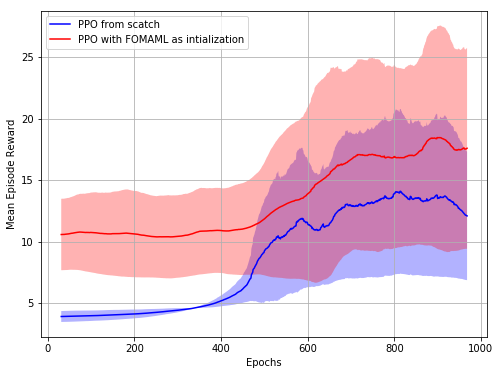

In [9]:
# fomaml,kl_penalty
# 60 meta tasks
import numpy as np
import matplotlib.pyplot as plt

x0=np.arange(1000)
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]
# vanilla
y11=[4.508754126399833, 4.476341238365054, 4.520519601985059, 4.4981854590502275, 4.497374246912297, 4.503221204958982, 4.493908686899396, 4.504998099089463, 4.507907619934679, 4.540458395526666, 4.494332718223718, 4.54569070092056, 4.514236082594421, 4.50139037462326, 4.527099459411604, 4.496603094388179, 4.4801942339412335, 4.507552642906612, 4.503828895002404, 4.50948048421145, 4.514473149022493, 4.492369897436112, 4.512083714395613, 4.5188692403240776, 4.476465018750542, 4.510809150700113, 4.5099456795025, 4.51905474402264, 4.51749313051052, 4.504841531428167, 4.524992047099196, 4.510445800049351, 4.505460366981593, 4.493578621121662, 4.532777007514703, 4.521336806735744, 4.507133931230875, 4.53456445560669, 4.543120762830758, 4.534208865186696, 4.556564454501806, 4.514056448740269, 4.539254947992886, 4.555822490450853, 4.524545018804093, 4.5210379852859415, 4.5220321013329166, 4.527475346560422, 4.580262230396138, 4.526634961315172, 4.535967073438529, 4.555776298579642, 4.5565437145465575, 4.564413493854155, 4.543396809494959, 4.5440080177620406, 4.552781160951677, 4.568505220548703, 4.548321317140778, 4.561953266922605, 4.569895632599348, 4.563519472271602, 4.601176057618809, 4.563137596628312, 4.546479424259752, 4.5928881975266584, 4.561621328056702, 4.578107943361595, 4.603851726080969, 4.56746980222633, 4.556736256598033, 4.585538792440993, 4.5603362096226725, 4.570094669299341, 4.588689507498027, 4.568316143149859, 4.5663411728550845, 4.574147961527693, 4.587171695301065, 4.556630512196011, 4.569893286899026, 4.571755137555314, 4.6206888890014355, 4.541176014843213, 4.579767395980835, 4.5236953224988685, 4.538775531331089, 4.525488943640724, 4.584853495648159, 4.53131144245713, 4.55067101254298, 4.564864004197465, 4.615217090613974, 4.5562716252528705, 4.541384253455564, 4.55202398097253, 4.535014065897807, 4.52655142751248, 4.539941075084701, 4.520250328280327, 4.523315821039434, 4.52466140011097, 4.552393827755953, 4.543018179420011, 4.517637497247224, 4.54561146039918, 4.520745156865209, 4.575265437966937, 4.568907528097592, 4.524610180152709, 4.588845556138523, 4.567192256614687, 4.540280720039901, 4.5617712296273245, 4.525204257735611, 4.567210257979944, 4.5552350720488715, 4.55070556667093, 4.583081294195281, 4.56156759493171, 4.521637149672246, 4.593229490181345, 4.542420567689875, 4.584068356309891, 4.561655663769057, 4.555040786382244, 4.6224144992806, 4.552898662518325, 4.573131520866936, 4.615321694279921, 4.590872182773302, 4.56049602121546, 4.5762655062874265, 4.576406651294034, 4.565092448441259, 4.586493443432534, 4.579769832708756, 4.586992461838067, 4.587605596916926, 4.642868242964519, 4.578391759223448, 4.601181589782882, 4.61345403189341, 4.592558939358057, 4.619136624568902, 4.58938812790258, 4.647688451125837, 4.602958348344326, 4.585094092186733, 4.597874937129696, 4.636485132623471, 4.603843220433243, 4.605361738389815, 4.613359174227976, 4.605624565963481, 4.618723106498296, 4.616400705818658, 4.583190817225783, 4.6337421259194915, 4.598622313558483, 4.597660964609868, 4.576949124247207, 4.675418702318875, 4.63758475591895, 4.597786010186539, 4.661298052789718, 4.603297668255845, 4.653838268545419, 4.616372087616014, 4.610670288377028, 4.628777090013911, 4.60418281197001, 4.6042292854300815, 4.638670024718323, 4.591100567887882, 4.612166656893006, 4.557042951988041, 4.599162498204699, 4.609592686335052, 4.573575706352672, 4.5745403805682, 4.610727356933235, 4.657668912793122, 4.55740046729864, 4.567413979340359, 4.5785561966097745, 4.620499879341006, 4.5641529582840015, 4.545760748714029, 4.613250749560724, 4.583277461655088, 4.544444194549067, 4.578495736868182, 4.602545615572043, 4.507102974043949, 4.6016068970994155, 4.645202319531414, 4.6030938769729985, 4.646037505341692, 4.616691748496175, 4.573802299062474, 4.634737576638787, 4.632311874655993, 4.638919451149089, 4.671860411262088, 4.640662364454078, 4.602517425285334, 4.656675877449269, 4.63810759080303, 4.663752067213622, 4.603443388490782, 4.634621933041091, 4.669484062862132, 4.684408925122475, 4.708000343597945, 4.61955718170481, 4.65485008374506, 4.674574440067863, 4.63125661041626, 4.641276950870204, 4.66364320528787, 4.687746799171482, 4.670191700923932, 4.631360319759377, 4.6033788532286595, 4.619727520645713, 4.633679284331609, 4.609162479053769, 4.608394129675468, 4.605754666083321, 4.6140002804666675, 4.605484931922902, 4.645482899440119, 4.622507435617814, 4.619857084752756, 4.620068778592849, 4.612316628461341, 4.598080446265039, 4.565506076894713, 4.586124362805962, 4.57466455100172, 4.622155627455202, 4.611111827428287, 4.6127519195930455, 4.658572043074745, 4.620505366929221, 4.612809382307198, 4.59535869806221, 4.676845011620213, 4.632420249604956, 4.627194267430527, 4.658964283494434, 4.679968396803917, 4.683631834457584, 4.629868729649561, 4.6553139870144395, 4.659580567756456, 4.672736152271194, 4.685024176615091, 4.6556220104272255, 4.692792616581341, 4.674837177281149, 4.666966402422835, 4.674358038359319, 4.637861260309751, 4.665887676994954, 4.640627274410218, 4.661303006537441, 4.701146405982963, 4.61893912993065, 4.63862122826024, 4.659795797182844, 4.644107737326541, 4.645695507809538, 4.646452473937777, 4.619152559056494, 4.6679671732130625, 4.686421132163199, 4.654844536346273, 4.672586124218086, 4.671400493644774, 4.663783577699396, 4.692928139863269, 4.69164414446347, 4.688470079771278, 4.656480423698144, 4.6442617928289796, 4.657318790315248, 4.670085530142144, 4.614842590356343, 4.656905456729253, 4.631042376304538, 4.624400256011317, 4.629624076216717, 4.624559601490189, 4.640473021332952, 4.652102971301705, 4.703891368403794, 4.626400818462271, 4.68967718241014, 4.677775826704773, 4.619976278542014, 4.651321662860567, 4.682818813939465, 4.666415141824106, 4.668686806705712, 4.698043822405425, 4.652662966962606, 4.677449941215445, 4.680118027267188, 4.696051767666971, 4.660821983268743, 4.640198311391895, 4.648463840829277, 4.711721322566716, 4.665453180245582, 4.648679358548169, 4.631143580602482, 4.687520317349316, 4.71438229252617, 4.662488285744072, 4.686743960347465, 4.654518595766017, 4.620297607441573, 4.655797161274302, 4.667595397702146, 4.647675606759178, 4.651400398193639, 4.593520631498193, 4.556889099135701, 4.586087062916698, 4.583520770941634, 4.585731166022534, 4.603364919841791, 4.640541820575712, 4.562867998488198, 4.561906649485511, 4.601996139689562, 4.588630331531498, 4.569812489552233, 4.59243904475926, 4.62314904141889, 4.577751029042736, 4.561937334338752, 4.5715064402038745, 4.59890154547709, 4.554480024674452, 4.633503643928555, 4.573788729053579, 4.586225995323021, 4.556612020893841, 4.554147046548391, 4.505917949463661, 4.547872748441466, 4.555130615659342, 4.518128546936413, 4.513153129122327, 4.511811256398105, 4.528599954473472, 4.538808466173414, 4.497035809129666, 4.52341053748966, 4.494348903189544, 4.545777454251253, 4.546657765801299, 4.56074345119807, 4.5185622658355395, 4.537943336452761, 4.523192097665352, 4.489017147395048, 4.52490290974556, 4.608172568802306, 4.584705256552305, 4.570738971869046, 4.5332467569563475, 4.5774162698450676, 4.6169308740041375, 4.573838075276829, 4.541334922981779, 4.584660038664771, 4.539937349599308, 4.581903326680894, 4.593340357015943, 4.578435731750499, 4.617833533530365, 4.581554581155917, 4.63066054341964, 4.5809543544310465, 4.59562946574129, 4.530856113627345, 4.546494633639993, 4.618490734674802, 4.59068743632323, 4.602442555182871, 4.572221801425598, 4.549339665684517, 4.601484122784088, 4.584574436876417, 4.538366253447204, 4.530809246309223, 4.539271272530542, 4.537266924353138, 4.586093524368852, 4.521744656567082, 4.479612251608612, 4.52819721869212, 4.549568612905635, 4.540626389200949, 4.490032928968336, 4.524350283768344, 4.526962448161719, 4.558301256463253, 4.5104569451491825, 4.540385482322054, 4.573896559420739, 4.546075341205994, 4.585988479310439, 4.522874181543466, 4.529367639223239, 4.668303954002631, 4.615690005626858, 4.552868670175264, 4.58066501423673, 4.5749984575472045, 4.542316065816534, 4.617909645284954, 4.582959762149088, 4.618321544859301, 4.583588256056717, 4.615760998012085, 4.629973042273735, 4.589129151749517, 4.562350572812949, 4.64911446047473, 4.623961502760371, 4.621874843486206, 4.634488971797768, 4.6040768206219465, 4.623860153635469, 4.640961868847909, 4.558625674072726, 4.5355227584086055, 4.523743933494145, 4.511169703555114, 4.536264742362331, 4.5565276988056125, 4.511401036505641, 4.551436076549501, 4.522671761269109, 4.505144951549375, 4.550828365308139, 4.528068231549221, 4.510791553476723, 4.4975867143702875, 4.547005505160736, 4.512113336204246, 4.513766687935207, 4.501815082827605, 4.521966252153747, 4.51991633149354, 4.5246384487142395, 4.5759914677924955, 4.4891155081320155, 4.560896090582113, 4.536423608537307, 4.536038589926972, 4.52360217005036, 4.534108167096935, 4.545703614654351, 4.545515566184208, 4.597324463842652, 4.587091921847758, 4.512336741962264, 4.538249822246126, 4.509323508741459, 4.504734540302027, 4.539763425211172, 4.513939353540278, 4.588748376862408, 4.4913723964260885, 4.513418885527435, 4.506871425071142, 4.562433608057674, 4.524010250216161, 4.472869352684933, 4.48807632172041, 4.560297575556314, 4.514302592706019, 4.448863379980983, 4.539418475580231, 4.496410045523314, 4.551007535888582, 4.511882098175693, 4.537430325708942, 4.512923089394594, 4.491888375388457, 4.500115894538018, 4.511725604974331, 4.510917066659449, 4.496146936643073, 4.533582205069865, 4.500748327717885, 4.5151803325531334, 4.517815241829681, 4.481424406788367, 4.520025756088559, 4.580808645124366, 4.458444225121529, 4.502343208318805, 4.46698075678222, 4.489230696041602, 4.451339878147504, 4.510093151829194, 4.5114080588091525, 4.476577868806071, 4.496583157956253, 4.497814998291621, 4.460932868303365, 4.5249256129154976, 4.441202373512588, 4.480322036680168, 4.477984584493292, 4.5092520117138335, 4.472931883759441, 4.462839957284402, 4.4783438802710185, 4.450729585639299, 4.445349320379705, 4.473568959954883, 4.463205862286371, 4.485726228871392, 4.479977504532442, 4.463059709688658, 4.4421469836162775, 4.487788220100828, 4.432212461780044, 4.46077708611753, 4.418181276605096, 4.408189282087156, 4.45474812472614, 4.426717093675907, 4.443399304956289, 4.515679693762821, 4.425660398759451, 4.4132888704568485, 4.45306690953645, 4.463860679401464, 4.471866567807338, 4.461830325298806, 4.452840666517705, 4.55833112387522, 4.5296565124389065, 4.4990145618379405, 4.51150210029935, 4.5231120622727765, 4.445550283788916, 4.495780986258002, 4.567313184783398, 4.4718490684358505, 4.493967185044359, 4.50058085934496, 4.580100001331199, 4.468579225941711, 4.5569703801447154, 4.573595264223745, 4.51839409160051, 4.592133213227149, 4.512114895668039, 4.58720188355332, 4.5655636683821665, 4.47058031328448, 4.548248248461107, 4.621328882104894, 4.545844459484416, 4.502364540021706, 4.551703063421729, 4.549730144557966, 4.54160138704081, 4.560029609159108, 4.592431087957069, 4.570742078211678, 4.607546904567758, 4.574109321729554, 4.483623721388063, 4.554894386682304, 4.560328633017214, 4.528506864157229, 4.5038450504927825, 4.476919797902869, 4.5699093805967195, 4.547299333757364, 4.5321984697493205, 4.58534477427108, 4.448240625448069, 4.5933051870620165, 4.54967292132457, 4.510861638201248, 4.533099728541112, 4.47894422020441, 4.585231801024146, 4.56237195413133, 4.581189183698202, 4.512073100102749, 4.523228349204691, 4.541526207991006, 4.558682168533136, 4.548259966180123, 4.558921754607232, 4.568211414055888, 4.539329017094391, 4.5105451770660245, 4.511869423187009, 4.625723514150302, 4.56886508803268, 4.549495667821823, 4.545038319021121, 4.514899060283839, 4.532385291419069, 4.611316723156109, 4.6539429622323, 4.492292868503075, 4.528765353432515, 4.551945144344327, 4.541611937495271, 4.509376655490227, 4.527267228551134, 4.625033036527746, 4.558805751591095, 4.454774108875239, 4.493980962960935, 4.499665760928289, 4.481568838533165, 4.567513038746706, 4.5205633613330045, 4.614411750460554, 4.540720793123184, 4.48834438984537, 4.537971582690012, 4.48704432521468, 4.486013473439973, 4.56735080205385, 4.47859239686293, 4.528033097139791, 4.521487693957424, 4.54609736304347, 4.513921185542371, 4.52091555770794, 4.57563181813342, 4.511604434489047, 4.503765605745057, 4.488807938771485, 4.555804773008025, 4.489525118011443, 4.675810225555515, 4.50826776580292, 4.513779457077782, 4.526198891290625, 4.6128425168635445, 4.490587751812417, 4.578247329047439, 4.500732759004031, 4.513541950491365, 4.528884600353677, 4.650700445011637, 4.5706214996348375, 4.589158230304742, 4.574214557428591, 4.462785962153749, 4.5345418062989316, 4.513861949989072, 4.625234777275602, 4.5706989458291325, 4.530994957538093, 4.442541674853723, 4.555250563685963, 4.499952222699336, 4.479919957519384, 4.745904323564593, 4.487814905676506, 4.659763854616264, 4.56462885008035, 4.654333175306722, 4.489660481824529, 4.49054634012961, 4.550178307605857, 4.491012533262757, 4.553654334954482, 4.539188736122081, 4.524991111101069, 4.466602195855575, 4.4815871380953896, 4.464270342122663, 4.44468190081014, 4.539376114082639, 4.537921164295316, 4.498146986474032, 4.552257798848377, 4.574457285431325, 4.553715436864783, 4.558252236983241, 4.498767908488129, 4.56553707123108, 4.5579079175780555, 4.50096727818485, 4.555353139951232, 4.49875365831451, 4.550741685862696, 4.5344284340987056, 4.626197601199432, 4.569054573011972, 4.658651821915993, 4.585894933718546, 4.672322887652772, 4.727388710079903, 4.6004338292156834, 4.625208317392534, 4.636429403627234, 4.649469899319798, 4.610550880306998, 4.573678431289311, 4.581933964730421, 4.545042004985313, 4.559857370482116, 4.5394143447542215, 4.529354315673386, 4.53246991088191, 4.605652832133198, 4.615698523217662, 4.546109143105467, 4.665464757286135, 4.62845970856199, 4.609719419603713, 4.5471431310947645, 4.5618668588485, 4.692532286175012, 4.594046168733213, 4.560767781059909, 4.593227786559924, 4.670543084230598, 4.560206556523637, 4.607984392191247, 4.610347019981932, 4.668601537934663, 4.601095658394416, 4.650417127313167, 4.622651260686613, 4.647001936209988, 4.6844351758813545, 4.62336420340183, 4.630508486538492, 4.7128540892629625, 4.629791085679232, 4.678877996549208, 4.674889147162257, 4.642552412481172, 4.709803160605413, 4.746242257954778, 4.635412344472407, 4.771254988757426, 4.6675803199228385, 4.795035805410187, 4.661969984883253, 4.607283949188206, 4.677604808112426, 4.636305760902414, 4.651985406966074, 4.701941024632324, 4.754812925851756, 4.70027815784565, 4.635561651545453, 4.764916168110295, 4.686613463735719, 4.635470296913609, 4.808192847577519, 4.665497677579277, 4.72788787963873, 4.635273793575859, 4.741626973300824, 4.71305279452418, 4.700897835731031, 4.734868697222465, 4.60014446191099, 4.740103585889888, 4.742435312442691, 4.652278145622372, 4.616112316083032, 4.646491862158195, 4.647130800105485, 4.7152671785016045, 4.693046743520558, 4.686727401871985, 4.705471097927026, 4.5389456282839005, 4.635068647191953, 4.61916903364401, 4.7855460119187025, 4.759079317014836, 4.625475790781494, 4.707756673762881, 4.553513996031815, 4.700626919444791, 4.63221231484652, 4.655163812529974, 4.734823844117216, 4.729019859162082, 4.692958097860867, 4.803345855302888, 4.66573765252628, 4.692350828024235, 4.6867295095908155, 4.75990154735584, 4.737760853614654, 4.7517899802163015, 4.762865992797843, 4.731988329646319, 4.706317631165832, 4.721357892378802, 4.726013837943995, 4.688982397586104, 4.701674657902517, 4.7651895451493465, 4.714451399790485, 4.670209953664964, 4.751923146204841, 4.838732164111591, 4.77569585421306, 4.840657468947376, 4.764870204574021, 4.795470929612747, 4.80933697148581, 4.796203675205146, 4.683004705091271, 4.6913382485326025, 4.713628820117387, 4.716931894279076, 4.630082972399345, 4.804032511762938, 4.662049009032313, 4.7179283142593915, 4.68226344823923, 4.73482086274439, 4.751224652486767, 4.759872052538532, 4.740014977562677, 4.670932809358083, 4.741377994492037, 4.759521588642197, 4.845704574533083, 4.777980831587803, 4.75418727520389, 4.781205193282401, 4.752513109817597, 4.782910745990261, 4.767660853674044, 4.8300924488072825, 4.749732027292743, 4.743459505807725, 4.788200368662656, 4.792852905352329, 4.8244470584975785, 4.723093974248668, 4.759603876945465, 4.689985599334099, 4.734527735701019, 4.6778307199180755, 4.7632727425928625, 4.716110762745479, 4.733709463801364, 4.758814089080309, 4.749856234817954, 4.709476626941201, 4.793004783164774, 4.772113422797232, 4.756859580324403, 4.7520674045783835, 4.720409777798353, 4.776410456229015, 4.801106002745076, 4.6719730379345945, 4.760305086540718, 4.74818389651662, 4.72807577332917, 4.772171655770203, 4.854696847995143, 4.759138303035833, 4.759209990564412, 4.790370868882549, 4.736327285566799, 4.758656653347182, 4.882666687140061, 4.767046962323985, 4.741803494602438, 4.8692243462234845, 4.774425051111574, 4.7457413926749314, 4.698691752166007, 4.825214756408719, 4.768377800447446, 4.823956737923032, 4.794229546793278, 4.864728707530609, 4.825725719955987, 4.799601700901626, 4.8557953968137815, 4.766718673370806, 4.722957407171453, 4.754346298647232, 4.65958265870059, 4.743422063878117, 4.771987251347056, 4.690527603244355, 4.737548403924474, 4.774523867672669, 4.682239061886493, 4.767352053120396, 4.719199505471128, 4.712509362873795, 4.728095048304939, 4.625368848279883, 4.756915107730161, 4.669996227206562, 4.67019953741833, 4.673365488132351, 4.70423931816145, 4.6652149400861305, 4.805292903190186, 4.6400529576879, 4.8102360007048635, 4.70855365147373, 4.755982045824784, 4.801936872720591, 4.950284125746758, 4.728734407932223, 4.736903689691119, 4.731159939610419, 4.750312248934551, 4.752099314899655, 4.74783306634259, 4.699661748969499, 4.778389969262391, 4.688288596150551, 4.7892213587913695, 4.706968098768066, 4.743097446631429, 4.833386966043147, 4.779196570323869, 4.737107885695082, 4.718639173995807, 4.707582345352117, 4.794571272516828, 4.7910594113767395, 4.7512163983601665, 4.782706597906835, 4.745483227355541, 4.735491724935438, 4.704131405807788, 4.7546030319553605, 4.73765375341623, 4.781378881111323, 4.670877955665594, 4.647502909990869, 4.713306481584567, 4.694649231437168, 4.756314199624888, 4.72872253386249, 4.740956036191922, 4.719427140128316, 4.657289109278587, 4.667701933789565, 4.689908822841629, 4.624221824401956, 4.655249357071006, 4.704797812189273, 4.663315942714099, 4.674597836857659, 4.6834320889151515, 4.65939116339552, 4.6163205654086665, 4.61523278065896, 4.659446834880379, 4.663283984667552, 4.630603606667682, 4.624254022182777, 4.7419534394490075, 4.648253997385591, 4.724875684264406, 4.656216107529005, 4.68856121871136, 4.644156921803197, 4.679037481939174, 4.687637090782539, 4.632941530129271, 4.631348249908279, 4.711777265379428, 4.71218704395888, 4.792969425214099, 4.648778347616719, 4.6707051997579905, 4.690132832803416, 4.652613401546126]
y12=[3.45094569586266, 3.435009089289697, 3.4599937057201635, 3.420374403843232, 3.460745668335108, 3.4663813264762626, 3.4640198505922775, 3.4631052834246, 3.474399143316804, 3.497664894164634, 3.472553811100845, 3.5194242187392084, 3.47312998792516, 3.4595610601439226, 3.4940490467914866, 3.4579091660593364, 3.4901918108163907, 3.492678715800253, 3.4412194512882692, 3.4878512368090373, 3.5135788218054342, 3.4847650256189393, 3.516417821963643, 3.458353147047924, 3.4467384304226423, 3.4789525398061882, 3.5530736457682996, 3.473202561362933, 3.49463742757773, 3.501426157058548, 3.4865767927264004, 3.4587660486610843, 3.4709515262702286, 3.485148026157599, 3.5095324838452195, 3.5310190567365485, 3.5300785069571403, 3.476242992921823, 3.4727362832060384, 3.5020630376519404, 3.525186386996422, 3.5115496335317182, 3.467659808825596, 3.4830782772804096, 3.5203526359936985, 3.4391922480761195, 3.4951142810814746, 3.501642148412193, 3.521400700057086, 3.527465204065049, 3.455591698567219, 3.519893745961568, 3.5269844236070416, 3.4690813799314806, 3.50761793579449, 3.4645565300080308, 3.5223186526267116, 3.5587231023356045, 3.5383440747356314, 3.518685719680696, 3.4746025261763864, 3.590997476479238, 3.5514709906192214, 3.508334990969479, 3.5158315687697397, 3.545533593768772, 3.567514043922496, 3.517600752397164, 3.5593391364099385, 3.5550122027533724, 3.4805445976997196, 3.5309506117885454, 3.4547676171560373, 3.501876358563959, 3.501406667091359, 3.519531020418347, 3.495593876634637, 3.5617244430985275, 3.5159148751867804, 3.566443293615376, 3.5524348045373317, 3.4949588891675334, 3.542254196826992, 3.547104388478825, 3.571043510431441, 3.5805303641250106, 3.5918185571627883, 3.5935021199879738, 3.540731555127706, 3.538230260042857, 3.629873247314986, 3.537368189089888, 3.5598681953841016, 3.5684375462902977, 3.5521888759372007, 3.6190674290123384, 3.565467788618804, 3.596671874048319, 3.5522174518438034, 3.6213805104253503, 3.5697055596543956, 3.638562626329345, 3.5357856774745997, 3.5652206722217303, 3.593049551093258, 3.590147702975614, 3.559714409095114, 3.535489690512259, 3.564574564975299, 3.6279442219102807, 3.5626029246787985, 3.6227066380174384, 3.611925142267416, 3.54129788234972, 3.6162303913198146, 3.6200875303993016, 3.5501260224632913, 3.592117224002407, 3.5617441579169182, 3.628915586662885, 3.5817490534145437, 3.5980267046277414, 3.5524675498082487, 3.5438252970181963, 3.5886043423476464, 3.6696539846699068, 3.640876574553076, 3.698272780215607, 3.6086587578883873, 3.60451139687918, 3.6255990965420235, 3.6496031922811287, 3.6301979009809875, 3.6220703005820476, 3.6762771656118844, 3.6886241593657143, 3.6286751895939955, 3.602501013146694, 3.5863365231427133, 3.6022228119609796, 3.6297766566614698, 3.592551637562678, 3.611506709776152, 3.636663250876905, 3.5966172490859267, 3.625395601690167, 3.5757588762179155, 3.5957108727421163, 3.6287300134157006, 3.622844177414355, 3.5714259245702578, 3.6626045847098254, 3.719597814416893, 3.685814276816337, 3.633651571236664, 3.6340718601124995, 3.699126589602691, 3.6127821332614696, 3.7044939794119056, 3.6213273122967977, 3.660335885832601, 3.7611212403567795, 3.703409408255244, 3.6642645370630564, 3.7840776884054743, 3.722927759625905, 3.695610464657792, 3.7016498867314676, 3.5945127733817652, 3.6422747450411608, 3.6505219634268227, 3.774750156412489, 3.7839190554278037, 3.682518856011045, 3.6867915725483895, 3.715539245671833, 3.7039902751779445, 3.7212806492901347, 3.7222150083106618, 3.7930665860968094, 3.7230110109048606, 3.7055172660407747, 3.7420731424494917, 3.7678753205809117, 3.7503006394939167, 3.7104522564236615, 3.6207934045490404, 3.6894382727019015, 3.697421269140121, 3.774781598216186, 3.9246851308983945, 3.7870644637834188, 3.7281696489115648, 3.8151943061283866, 3.7718766327869107, 3.806916649455483, 3.778884494423166, 3.857347795878822, 3.818046750445299, 3.82329660995339, 3.7991099725467747, 3.7774187882208508, 3.713156803158856, 3.7118228928892343, 3.757244728388851, 3.9430135635939796, 3.9457566146895124, 3.8700640501664445, 3.7814477563407176, 3.850867042327807, 3.7700819244481036, 3.751214607612401, 3.7957712712889897, 3.9124007610179614, 3.837094772618318, 3.8411198310604617, 3.757563796668227, 3.8792647654445496, 3.9167846706412766, 3.746927774600299, 3.9214416161925336, 3.831747196871581, 3.8710712907762694, 3.877874578846813, 3.745121659696675, 3.8893961456106805, 3.869690402010301, 4.032184038510471, 3.9333482829722697, 3.8618603406377185, 3.858451937265362, 3.9784335761210086, 3.8205860504766194, 3.8638861893539067, 4.001490194628783, 3.9227107789116125, 3.9929526407951808, 3.9521474319546326, 3.835763910376356, 3.9226725081616918, 3.8485298768055247, 3.9815613748556844, 3.793523820315889, 3.97039755548635, 3.844264449753264, 3.9931998440539833, 4.060205147136384, 4.035034066588891, 3.919170463214443, 4.051781424912155, 3.919348673673446, 4.069111001506785, 4.012448329934321, 3.9085052010968853, 4.043957887709922, 4.06400205559493, 4.086238602112543, 4.041121225958316, 3.8915368504464385, 4.020714038424794, 4.256956116927111, 3.993207923531786, 4.133410690519408, 4.112390188487433, 4.089513960973354, 4.217938786493234, 4.08065555641135, 4.078591121306531, 4.055343685420199, 4.0993645302959925, 4.26534254807182, 4.029130160677099, 4.108651274622243, 4.072605415107855, 4.042019415920448, 4.062560146083205, 4.1221773033738565, 3.991343523250323, 4.043692775309721, 4.181719996838192, 4.234387637857942, 4.45020816140889, 4.012074156655203, 4.306268208746609, 4.050360538178468, 4.184910726524587, 4.1889574896925135, 4.289807671829559, 4.003820098245877, 4.279874424416166, 4.38518153501479, 4.292449696470128, 4.21919008666948, 4.12173855297196, 4.25183377169486, 4.285452777650051, 4.365497483827584, 4.342037880146056, 4.558661911600684, 4.162930437209624, 4.161703801086295, 4.300499146946055, 4.488142897929328, 4.356200753386137, 4.380743762007631, 4.035955235343999, 4.28667783682405, 4.1324619422340945, 4.179717857487907, 4.307951483702282, 4.354755132006625, 4.053435296854441, 4.447680155991039, 4.562418715010897, 4.2119898987838855, 4.3988117360106465, 4.575663949726361, 4.305405058137872, 4.515634999516087, 4.403706618377165, 4.54127207935624, 4.36483065909673, 4.288795345809877, 4.527882680200551, 4.384769878653869, 4.753937998446674, 4.520139293927872, 4.463540822065874, 4.5109033636771905, 4.438054680265072, 4.604899579605264, 4.475867555263069, 4.487793625763921, 4.524323876883273, 4.474203022952105, 4.4168143674576035, 4.737560528266544, 4.393254783465166, 4.493534234941097, 4.205577284138368, 4.517613529342086, 4.633406104781562, 4.687262157066054, 4.568118826719824, 4.605640141101671, 4.409553679431963, 4.730910259396115, 4.663323925950021, 4.668356648793376, 4.6598806322517525, 4.749194068290679, 4.779946232187186, 4.729721338976953, 4.547716329814131, 4.657633549864979, 4.573981653955458, 4.8183233977730495, 4.901410505229794, 4.579875198455964, 4.510295229834181, 4.59873252838029, 4.940463925331098, 5.055169866522793, 4.709934068602641, 5.244456724795434, 4.772566508779064, 5.174066229621176, 4.852282755926974, 5.128175435565349, 5.078117182899238, 5.169121560723302, 4.987047245665555, 5.013699361348446, 5.070610941738232, 5.288851300812625, 4.813050528239683, 4.987555212065637, 4.9465566880626675, 5.077137774911711, 5.1983820753883325, 5.13319684888853, 5.219043337827315, 5.376593324179184, 5.342576075355941, 4.945902029650241, 5.201404871627172, 5.553696552999964, 5.354952658177282, 5.217126910629255, 5.193452538560361, 5.306504177109641, 5.549410280363101, 5.279398385094568, 5.28664881892296, 5.210825105468369, 5.198830150458654, 5.246630626657148, 5.6654071967944, 5.7356435320160895, 5.437082329320273, 5.616821057599637, 5.359232664153446, 5.551182865395746, 6.05735247320849, 5.959073765979812, 5.534510377324985, 5.662294308187094, 5.575632892821162, 5.939689506254756, 6.177143932522537, 5.527068318725586, 5.3475574338749245, 5.766630125278236, 5.48407339763314, 5.844216661787439, 5.736118130510528, 5.637878607635086, 6.2247422405440425, 5.683623524469585, 5.552849014857415, 6.320014229858217, 6.703968077104269, 7.368123490681222, 5.557218428433871, 6.068564352506009, 6.195541361340611, 6.213883094097136, 5.767230278147528, 7.376948759192812, 6.081358146572809, 6.399488934348059, 6.632876964784376, 6.5361333749692205, 6.04285461028194, 5.851008360135858, 5.908259433690811, 8.374691051378953, 6.675288226885849, 6.1047891711526905, 6.05451443473778, 6.926518375783176, 6.356523130754432, 6.738858345477527, 6.73219321797691, 6.271327614723543, 7.082719341444352, 6.493892125141799, 6.767417428304028, 6.817197719490338, 6.805751717328848, 6.493651799435611, 6.399270406414891, 6.764305418238191, 6.5507126461274785, 7.778871513498118, 8.477632102787322, 7.122814907027377, 7.409940142465511, 6.999137538883547, 6.29787796301823, 7.549639194721557, 7.1770372756281775, 6.478185641569564, 6.173706291286007, 6.95347043748834, 6.68575144447712, 10.84673777163453, 7.956340539501206, 7.621133507368701, 6.963029553970649, 6.515593786171473, 6.67985357726134, 6.605692098013059, 7.599505544340721, 6.573549046206599, 6.217986153133663, 7.628643724152963, 6.540406651486623, 11.933828289189599, 8.368322872876547, 7.389332931771562, 7.017042107003224, 9.730375299934945, 8.282791430875927, 10.583839266479114, 7.4815143859967, 6.618624975534484, 8.113903165505787, 8.13517056354499, 6.662747916726511, 7.333570207188634, 9.249701375016327, 7.3019548468767015, 7.575267869448183, 10.273079720789692, 10.309513367461467, 8.214738653304757, 14.877666458557133, 7.382827912901428, 7.36503083268333, 12.178807214803934, 6.582619788362534, 9.165935764984543, 9.484742021376833, 9.991560604089988, 10.002315120623535, 7.795229246137701, 6.962112089059945, 7.322064933199039, 12.918263838910594, 8.88041975948082, 7.9692006253438965, 6.832358250745445, 8.52170944791447, 7.912329766829628, 7.535628736446181, 7.578695596513559, 7.663011507684245, 10.155173499217382, 7.656078423401164, 7.730194426589565, 7.847573315346766, 7.701237476875478, 7.872567116655972, 8.467879545561301, 10.227290614792512, 9.892679682368627, 9.610109795725183, 8.828428950838184, 8.400844314642004, 8.409038132743042, 17.008157325798116, 18.62265054936831, 10.289367553974934, 11.966680833817776, 8.630229492251326, 8.322261162280043, 7.546721963541468, 6.923035918312373, 9.823255058741125, 8.291959476963244, 8.084461482728567, 9.704940923495846, 8.686373696134675, 14.339634742738916, 17.444348773740128, 8.57139202506874, 10.689628054505734, 7.571354576807596, 8.743962269079656, 9.689634946760691, 8.154659361075776, 9.418407364485113, 8.493712277551449, 15.341375157716374, 8.649510255481882, 8.46566565768335, 7.325992167627197, 9.403385226071247, 19.02283252299752, 9.120398925478005, 10.369684308932552, 13.701410323583765, 10.321077929003295, 13.645949585262704, 8.652313657069762, 7.671663317699345, 12.371297558754057, 17.49867740126372, 16.00262013214134, 9.611412010851797, 8.61034668313403, 12.411895449806913, 17.165186534979213, 9.559685585421645, 9.342481460589617, 11.260389738544301, 12.687158241536697, 14.01067118485712, 8.48385239741349, 8.608730856318354, 21.776884682337, 14.430466496138227, 12.900992429845164, 12.317060394801489, 12.247566839229236, 8.499165570689696, 14.019392911073078, 11.539110506396444, 13.34691137644616, 9.20438652705235, 17.019214406910045, 7.652616501410664, 10.231692587797236, 12.002623986636216, 12.687253916961325, 13.333345725323621, 16.84602880704811, 11.36209142749107, 14.304143833472239, 9.992969625244733, 9.683221040162039, 11.009388460229431, 12.05292469963248, 10.159950644150673, 18.293487237993645, 15.786385130594436, 9.196213667634307, 11.766583608602021, 20.21280667449075, 15.470699371018931, 19.500045567120672, 13.580749164929596, 10.190109728633326, 19.982050504837915, 12.541483743342825, 11.19450318005403, 11.674568702976378, 13.882939990907946, 12.035490373737002, 10.741200528970865, 19.25960205079653, 10.015715073136645, 13.37577023030566, 13.980809039377341, 12.573988965186023, 8.165080296710975, 9.582485398079388, 19.96324891365573, 13.026877389387721, 16.93919381026074, 9.019275826490265, 10.236469536674761, 13.436469509055968, 11.830002228900778, 16.455015599696296, 13.2469401362933, 10.100116555737905, 13.751564568972249, 16.61444469131432, 12.31855129720196, 9.367763244634766, 14.191316761631953, 10.455695049708385, 13.901390808187362, 15.953534345992551, 13.611703565790116, 14.762142204649974, 19.13052359723811, 16.510320190041526, 15.001259231718683, 21.706914768294652, 13.78805456816941, 12.149355076139422, 14.440970418970231, 11.06028448813692, 14.899147394583883, 21.44395409988548, 15.532010279129244, 11.784299063405186, 17.351905469730802, 16.886367965984483, 21.66064000488189, 13.38418917876217, 17.51240579260984, 21.818629920032194, 13.842548470032597, 19.788483649023583, 16.83249234164362, 12.036763205349361, 17.7142985256738, 20.479385232534092, 19.95817757228224, 20.234202141890282, 18.492518049950093, 14.313298849553412, 21.78552548168319, 13.700514152790298, 14.44288123795875, 12.410545446070909, 15.194334853786323, 20.235937287563242, 19.449674551289373, 15.831806396834365, 14.945119039350343, 18.72008656549083, 15.809638646691205, 14.30074805790308, 16.537201811278564, 14.435390982497843, 15.988472569657727, 23.493572435145403, 14.780420950489066, 9.75523333492467, 22.828146637385263, 13.761574746236537, 15.645907447044019, 17.986030607727088, 17.58345080670813, 16.672401526371186, 13.540927175651998, 14.621650399798737, 21.004601999735797, 14.472941880876839, 16.596858588222236, 11.141258172979002, 17.231950504145402, 10.212871686863364, 19.775840167984494, 14.226213733319415, 20.297277900616326, 14.16963400977998, 16.710397830112395, 15.281912968073204, 17.41362968830524, 15.688829558681746, 19.12161888794798, 18.266363525629025, 31.69582366402254, 17.445725259929766, 13.597494538037697, 13.308693603626166, 20.147217654029955, 19.875845770198573, 17.87968492748876, 19.656376028101363, 16.72658213006021, 21.45411346783083, 14.186409159843727, 26.008914340034284, 15.286733626959714, 19.605574982084434, 14.669866392835628, 20.254245786236467, 15.435385204243227, 15.788958739572475, 13.215194656042074, 18.970774844642055, 13.996309502743859, 17.609437383819916, 15.234723609176749, 17.072608859992258, 15.050332482003963, 13.497421410281511, 16.464450537770407, 15.461540542874989, 13.368994750438537, 16.470480433806635, 14.405541903736838, 16.983558953582822, 14.929362414387999, 17.291076210481386, 19.554447332693762, 15.532085858139409, 15.716892493439957, 15.765777963685862, 17.97867066069999, 16.052133382376624, 14.574752387960695, 13.059173172770421, 17.48691670854017, 16.33860495235414, 25.315330524814694, 11.639228701044308, 14.00353083626958, 17.39471538627442, 17.47622861334923, 14.948705656707066, 14.558683410990326, 19.426957408429978, 15.310223766752063, 13.921124201996822, 15.878672519468669, 15.69888003119409, 15.728224364380425, 16.15161164394771, 13.947948409167013, 15.465742329039834, 17.111393354992927, 18.998434635346108, 13.681381034579422, 15.64320897237041, 15.405855003478694, 18.22712149643882, 19.05907618653908, 16.636884445791374, 15.880472294024374, 14.123563014051951, 14.769729362531136, 16.9397342074914, 13.94742578433822, 19.18083649277198, 17.988329731904713, 19.76918792657739, 17.99140772305501, 17.670502766283768, 20.639223944636473, 17.646282380121786, 14.15348837169134, 15.372963790758506, 17.72136605963308, 14.111750024442022, 19.825785866522423, 15.02047587907242, 16.60194760941954, 18.298945897403744, 14.895942732758227, 17.96697428379915, 35.33847830527935, 19.605787998454574, 19.704745634703407, 17.149707302591743, 16.35471067251944, 14.020323460025981, 19.863121366141186, 16.011109326560756, 15.826567441189733, 16.46954001023797, 13.672633182682905, 15.628488388383792, 18.149022116804616, 15.171042504285616, 20.304329067990494, 18.632021075597653, 15.548148845781327, 19.229260603734872, 22.915889965979268, 15.709178894376311, 16.297784450619872, 20.126416350824837, 15.201973978834069, 16.938868220051663, 20.374509595912258, 24.273088187225998, 17.58597387052837, 17.78531175704885, 13.85730906946511, 19.66405602650024, 19.95329079809061, 15.497070994009874, 17.077113982038036, 16.701850115123364, 17.635820727577734, 15.290763269995058, 18.065038206768133, 19.63001168780964, 17.909814318646895, 14.166878883850526, 18.08422358828513, 14.978573585226966, 18.20996261768762, 13.899091577165136, 14.154625395513964, 17.909956240533102, 17.22923716713632, 17.459531851702415, 16.37795071990729, 20.091912938649592, 19.701967228814617, 13.70124838631009, 16.047577866273667, 15.476025076003278, 15.14882795661631, 15.064371472561211, 14.82186820780141, 18.386149651034014, 14.780095674708207, 13.626804795895337, 16.337528231934815, 16.81358262674362, 13.879999311652703, 20.911709598842222, 14.956762850678423, 13.840576830016705, 15.694678798323697, 15.144376176452866, 20.321762963776365, 14.34774729009474, 17.253496256395966, 16.123811234857026, 18.094162967578836, 15.32745959609066, 19.2538783655252, 14.257095158834973, 20.042494493355143, 17.250044316120068, 14.978788739217466, 16.346029224875554, 14.52837443969666, 16.256911220984502, 24.436730200640035, 13.896942717062672, 16.84355252146082, 18.690017662086902, 17.581021315950856, 15.652062778873962, 15.314698094852037, 14.665695462521171, 15.926241999429408, 18.384459137605777, 16.462605950901846, 19.250956941667262, 13.299599765028137, 16.024433748620947, 16.323915425626275, 16.16823418692222, 17.33298704294355, 14.084467512492603, 16.40870742980991, 15.776034570329703, 14.133142392370972, 16.943865690520077, 15.996739983318262, 14.339421336534132, 18.794720295473123, 14.385874852261225, 15.614392523980339, 14.001869652160666, 14.960549848594312, 15.526901925813148, 13.718179730798862, 15.749558093531684, 15.61389119214239, 14.798796768191176, 15.20213353030592, 14.933017905099854, 18.687047584956662, 17.044723646584124, 14.491373435859932, 15.74861475061856, 14.808785999155777, 15.093851107510162, 16.267250482587045, 13.829992607585533, 13.622653575359807, 14.911582384603387, 15.064650292191837, 14.068163575158756, 14.75016484847479, 13.866841928399468, 22.23719612841071, 14.584807803805983, 14.420311683612155, 17.732274304488307, 14.929546995141395, 19.1106688814283, 17.35780990805296, 20.939194313931758, 17.723418420497936, 14.759117836611704, 17.05272945392869, 14.466147729846346, 15.240998529249403, 16.562388257992335, 16.077670461249554, 18.410124876387247, 14.562313296055528, 16.078274979221725, 15.887328391265344, 15.951992024786541, 14.283255622632739, 18.262862894502987, 13.920200927776946, 14.935034505076525, 16.040314107875208, 14.444459353908476, 19.894703840505727, 14.71041480560868, 16.968587932098448, 15.263973797621244, 15.108394113395553, 14.71123597003924, 15.201837197233084, 17.28435509128485, 14.461005176452238, 13.136748216158637, 13.806145456421671, 14.478281261015566, 13.897035816808794, 13.671931598748138, 15.268645414176618, 14.568435495875105, 13.680432683317875, 14.362699518669903, 15.145459768942363, 14.325172029069158, 14.937688549553814, 16.949115659913637, 17.7640233446065, 15.439369693314786, 15.051408188967198, 14.371609897162703, 13.388203379710005, 15.827442577719445, 13.809856995100755, 14.700835157760226, 15.780264223061582, 13.659483511541685, 13.834905734185108, 14.560204157327705]
y13=[3.6755322641221126, 3.6929349288239273, 3.680307363583194, 3.659475565668237, 3.7010464947376684, 3.654251818685043, 3.674887901752865, 3.6981817213109096, 3.6832490012909953, 3.6737557245222, 3.6780605360983456, 3.674192658990781, 3.6851307879850737, 3.7197677730280003, 3.7009766248982268, 3.6851648431402855, 3.673307356955645, 3.698333388877953, 3.6814544968266785, 3.671611461797585, 3.6776814921627787, 3.683810027482039, 3.6957217191775564, 3.7205136283711986, 3.6772087836114546, 3.7188096928028997, 3.717255020430777, 3.7065280877644, 3.6935042194690757, 3.7244575210216606, 3.6924236818028215, 3.7235590297920904, 3.712344273061189, 3.7145887972971736, 3.7333294561596264, 3.68597340043773, 3.7124546005264683, 3.6887104412368696, 3.7080338558075225, 3.706145480712081, 3.711215518926512, 3.7134368623735208, 3.691503324968073, 3.697131289342797, 3.741213338736645, 3.7481360633965393, 3.757904038213175, 3.7618508053445474, 3.697614624604323, 3.702473391856103, 3.7418110841081296, 3.7135548130112492, 3.7246812121672535, 3.755867057393864, 3.7853759623377354, 3.7411888596658733, 3.719939253397537, 3.7744634618171395, 3.7056324992956307, 3.8331333766543776, 3.699039609233009, 3.789171582689259, 3.7467456157557253, 3.722274810279349, 3.766965538110271, 3.7330044276947048, 3.7481462579319023, 3.7273007597263, 3.7080188473294857, 3.720236529320859, 3.7698202755534567, 3.717953646385192, 3.7136850969666244, 3.7725246576684706, 3.7595702796167396, 3.742452467672119, 3.7556339228230033, 3.7561968413461053, 3.7654223766731865, 3.7561636537597187, 3.752810527318905, 3.7393255846018953, 3.759322739667975, 3.7784169299129857, 3.765923085176097, 3.7075706096721763, 3.789238840801666, 3.754762298675285, 3.734648124472598, 3.7748345756790904, 3.77991187318215, 3.7884601733568735, 3.734628018403594, 3.777634758678616, 3.8120419022859933, 3.783690664596047, 3.759502649503669, 3.7707230240495915, 3.8163928153457167, 3.7215336807460866, 3.761245797888858, 3.809132669908172, 3.800020936725672, 3.7661660630281557, 3.7721986211496272, 3.776981305628197, 3.819392700756412, 3.779348711136983, 3.7855047633699037, 3.7489292348494976, 3.780152576821943, 3.8096977516301216, 3.8443452307855077, 3.7839191809002837, 3.8239141948107385, 3.8063308458326217, 3.7741357084104945, 3.8191173797137314, 3.917445888379681, 3.7760310367893926, 3.857469978785921, 3.8282508221118476, 3.801232778397728, 3.812722379606156, 3.7506653278057698, 3.8284292741227164, 3.8100322713485975, 3.808221557288939, 3.795337283259798, 3.7895835080004923, 3.8315439408008434, 3.8043040418906067, 3.802724074194911, 3.834217963154036, 3.836326295806335, 3.7955025628613352, 3.828382789570867, 3.829903928498986, 3.8866706753802167, 3.8246005186244947, 3.8393636832494225, 3.8251257775745393, 3.889569780963934, 3.826911367318231, 3.847817512508136, 3.829939994097368, 3.834177481499723, 3.8537991722043565, 3.8586089573598494, 3.86270971687883, 3.8974395631067735, 3.8670096417418387, 3.8589350820211834, 3.8721554120055615, 3.8707132707302776, 3.8244249328722906, 3.8576590086732727, 3.887463271393486, 3.868329620826823, 3.8843904114380594, 3.8862502829416297, 3.903343553383085, 3.8362357571130548, 3.8571228602336802, 3.884074607383234, 3.881883890970735, 3.885553403075442, 3.917374825415648, 3.8618194216365422, 3.8795184788696164, 3.920334517340666, 3.91167787445357, 3.9299063906505203, 3.928001580380935, 3.9173635883118267, 3.953128292104234, 3.921661198770862, 3.9043685188676585, 3.9482684154441468, 3.988631637025573, 3.9117558277851443, 3.9151944630170092, 3.9670431914006157, 3.8923300072625646, 3.974669648613573, 3.907022513211653, 3.9599167080804833, 3.8888557485789037, 3.9452212156301374, 3.8780917041174194, 3.8743139900514323, 3.902418362591553, 3.9249223423085997, 3.9214061021465256, 3.9458375305431868, 3.928228488485242, 3.8647394671385196, 3.9050047129631595, 4.002224641792651, 3.9403327694340304, 3.976662653529889, 3.956915010300212, 3.96833531900583, 3.8672457859539424, 3.885704123567637, 3.920571377754528, 3.958394660827797, 3.93615683673259, 3.9613264500751586, 3.9281517942182984, 3.862602142574185, 3.927871915638935, 3.953927476317422, 3.990643987551732, 3.9587393669791004, 3.90823037464927, 3.925334442473756, 3.955636243256227, 4.006890717446082, 3.993752021251751, 3.962083182178063, 3.9236761027102776, 3.963017433263852, 3.9011330046104225, 3.956844062416531, 3.9534831932069165, 4.014608681771316, 3.9474989132221396, 4.02664121085928, 3.936342235052452, 4.061358158763009, 4.001853625880048, 4.0142101775378105, 4.080619013743038, 4.050338831305676, 4.055997486386491, 3.9900095151102546, 4.02520219482693, 4.07886075062106, 4.035035097288476, 4.071148317752447, 4.059399477722744, 4.078914479489239, 4.053912749306521, 4.035367492485296, 4.040509957017409, 4.018066992261177, 4.040560937677663, 4.076402796527408, 4.084081137299995, 4.137568877793577, 4.020104666913419, 4.108893803500578, 4.155333661513638, 4.088733401502692, 4.156361325268395, 4.1139669875453, 4.154225464708045, 4.152195179095882, 4.10243434704946, 4.165150267611315, 4.208147092418458, 4.169996477222357, 4.224571836829188, 4.150279145340539, 4.181328976979929, 4.2073751290178, 4.12856979394339, 4.102917504695245, 4.210138395704794, 4.213934189517966, 4.207528586065455, 4.1343135568221125, 4.173952824429263, 4.220178921631163, 4.205972571947447, 4.139299866950871, 4.16979178925972, 4.279158169769233, 4.130966237565438, 4.264913016427177, 4.208994025367332, 4.188779405135878, 4.218639223443878, 4.276727156669627, 4.1176343775244, 4.2641474703297915, 4.288284792226351, 4.246275365093147, 4.235957799040048, 4.157727229482578, 4.216280911521629, 4.2247567221329065, 4.159751101024511, 4.285171244438122, 4.2998325014569865, 4.278438802285867, 4.283908778544839, 4.328782951079916, 4.336975462624906, 4.2813092973253335, 4.415797736926472, 4.326212281352305, 4.424113887134263, 4.352843661332474, 4.321038081968882, 4.352663065374143, 4.345726657856516, 4.223936175469512, 4.411067260273493, 4.332824714162807, 4.37426017419428, 4.371667813558123, 4.424585408528822, 4.405617388072221, 4.334976090177166, 4.302863975101662, 4.357538976198129, 4.23477156569938, 4.4148981329958055, 4.393660525669963, 4.481302111222123, 4.367418751269022, 4.432591013691269, 4.377231076970348, 4.47187246835744, 4.502105278967343, 4.523428689691909, 4.541989018297387, 4.396730294997454, 4.544238326512499, 4.474143902909358, 4.592714140424641, 4.711173114999758, 4.526340831509297, 4.675669538495088, 4.5843238305383105, 4.663335685581881, 4.602601333919395, 4.697811069724447, 4.697518391331936, 4.6247226231823815, 4.758712002237406, 4.63759051997274, 4.639739787046897, 4.645332546358203, 4.5261788327634465, 4.819260850316726, 4.627161748453234, 4.710668904836299, 4.804133282230797, 4.772888529511778, 4.768097616014476, 4.810441700687854, 4.699461620629716, 4.7688830285252966, 4.798260644632958, 4.872250439115641, 4.751880397311861, 5.053241765772984, 4.749811796339527, 4.829922603073794, 4.6501970013027325, 4.849808476250945, 4.789181602353668, 5.003566138253403, 5.119337288671661, 4.887246389946234, 4.8471797480140095, 4.980863311127807, 4.968854660735925, 5.0515600639558045, 4.771778505400567, 4.9977799795794215, 5.129996338678074, 4.93288417066704, 4.839310690254811, 5.034865235414829, 5.3044431673945, 4.938052645999936, 5.122059473048829, 5.027339190315026, 5.21383112508698, 5.029388848500735, 5.1683485550548784, 5.066818162340604, 5.130208328088915, 5.570461334222617, 4.939987387697386, 5.0326127431708425, 5.1550116831235435, 5.052080511457136, 5.234427270048578, 5.069115227805591, 5.133405577810426, 5.280789760606284, 5.121841569156153, 5.10376819995823, 5.151999841792144, 5.1684184824017745, 5.299875321569, 5.1709182433211085, 5.2230964481736395, 5.237503285118748, 5.501495004069496, 5.17448632008868, 5.3282396481520395, 5.2713724434000335, 5.556827206142881, 5.111128502218577, 5.693215843939229, 6.044095833471326, 5.5786195566720105, 5.681258966463577, 5.810607371514492, 6.01794821715098, 5.689211152972489, 5.907841433682818, 5.654268188715515, 5.7164644219029555, 5.7930134995780564, 5.607711281948871, 5.912264165968513, 5.541288105168941, 5.481595364822537, 5.53685028489575, 6.224429889155902, 6.051060793651994, 5.560828329837553, 6.198335393035763, 6.575699349359491, 6.2489361484490535, 5.704403244380451, 5.954656017545515, 6.177852887973068, 6.282385663977345, 6.10332066971351, 6.267686768913864, 5.89390141871654, 5.860650219756604, 6.526276775567654, 6.329176843028243, 6.422074310705588, 5.817056161841508, 7.165700654272355, 6.563357963177718, 6.480408301790727, 6.78587539998861, 6.621087029402093, 6.2577621342143015, 7.310702879512265, 6.491116573297009, 7.483723174314955, 7.314908936285649, 7.165014154306752, 6.061613188185279, 6.748429276681041, 6.899582363434844, 6.526861221756076, 7.248708617906376, 6.355692116269289, 7.067698183359816, 7.007132001505268, 7.846824791739344, 7.747993837938844, 8.590193831755816, 7.622620784097481, 8.814038027023107, 8.246887986070865, 8.769850227505827, 9.114965829862223, 7.971378919090357, 7.816956937568627, 8.364200852784847, 8.14439548901622, 7.340237067258511, 7.542370390060192, 8.655573786454845, 8.129116565074957, 9.596817785205838, 8.495309902232163, 11.66740902461168, 9.793821434268725, 10.34383377040919, 10.647591452536066, 11.21549557757789, 9.15967332974094, 10.92456618251792, 10.983689874950095, 9.47316713502423, 11.32230015416032, 12.709942564425926, 17.375233216902615, 15.906113801132811, 14.682729902122288, 15.187183846201545, 14.629551486930694, 14.399069664064758, 17.352516126361756, 10.533299591284157, 11.86753988441692, 52.62146322390459, 16.833204073844257, 17.86718146073869, 12.181893434336008, 47.916721779783416, 12.322738026867405, 16.519845425014054, 14.133250124211987, 17.372295041722428, 15.93505045045602, 14.08893901972213, 22.394685988603314, 16.708008446132254, 24.189325792141197, 25.60600188804431, 17.33604474796683, 17.874870755804903, 18.58578097874044, 15.046942087795077, 10.584809030396364, 12.555901254544036, 15.60614383288224, 16.166201671963336, 18.264451420118384, 16.050649011293913, 11.426693696606186, 10.264441284088234, 18.979604505069176, 13.625875988650659, 12.42009945849764, 22.21677176541529, 10.639173406586199, 10.611501798394166, 15.353997075635778, 9.730973682112113, 11.904858015703562, 10.02416285780429, 12.462816708642134, 13.06428759806497, 17.36115029367366, 12.882119321450087, 20.23252514515056, 23.69537730813125, 12.876615363015357, 17.248486055879177, 16.924168917257838, 13.01904670038164, 14.756078832535017, 11.344447937768566, 16.656695672394804, 27.45654468401086, 12.072820678139582, 11.967193879505853, 16.761698347438102, 12.416848680466666, 14.698068348087276, 31.065989983871027, 18.391191851899418, 32.30478768756542, 15.542444128524979, 19.270407589326005, 16.84760966520483, 18.25441697571188, 15.449326826232546, 15.221657803985464, 14.018634877866106, 21.47520423154399, 19.47462382355682, 22.331098595805514, 19.912398610678995, 16.734264097609767, 11.323061414995815, 17.311817773878857, 17.16946984039717, 17.718091095478783, 25.972842886101986, 13.669295008409653, 36.050051574351045, 13.112897584597993, 18.294335861744944, 16.287306657768603, 19.87997281432002, 17.88155979643389, 20.801180028683923, 20.359086343257864, 17.839559172766165, 19.084023951522074, 16.796312420923353, 16.47000687516314, 21.234961006429696, 20.65876757082763, 15.23947844048937, 20.924526302500407, 17.83070512736995, 17.051066699297856, 15.34455855440853, 12.774644540083761, 12.467123728670689, 15.162209508517611, 15.608952880456352, 14.590088419775341, 15.320884255499466, 13.865194091003021, 14.174150067504286, 68.03786289980366, 17.959017756632534, 31.17607607062219, 16.878362011557567, 14.540170613121767, 14.301302288182578, 12.941129251755317, 12.742622446445216, 19.9049341736288, 15.076245186542568, 15.908832817750977, 15.575894782863134, 14.599742963320379, 12.822190410588068, 11.735411107887257, 13.171955921009523, 11.823726582347284, 12.221932450398585, 10.894467749292247, 12.98029231776529, 11.201312659339752, 11.796935712046102, 12.170143708232567, 11.149635690718338, 12.075663508205936, 11.23891040088724, 9.981165587424522, 11.827521863359674, 14.017850383101221, 10.504107791943925, 11.217552732138767, 11.170165106447795, 10.327810299408481, 11.099053724521438, 13.195706518983505, 11.447071920999251, 11.618681627388808, 13.765151264478837, 11.403677075703733, 13.974689013237187, 11.499209651511055, 16.388879175119225, 11.64222063310596, 14.88662277204414, 13.352146617011115, 13.682324941059452, 15.151811982840629, 13.690583325740107, 17.038347831910123, 11.354211095334971, 12.7962760595857, 16.316947626191315, 14.077849012345311, 16.427195277475956, 15.283239851822565, 18.313646197417317, 33.56446346654593, 16.540908952234645, 16.15153183319894, 22.06095971052191, 15.137029844937903, 18.643081437623938, 18.811046795593754, 27.697670100599954, 19.19064621421104, 15.805450162871763, 18.963055996076076, 15.016769532041993, 18.059575649625366, 14.44858149018345, 14.992132760296426, 13.147164208495958, 17.480284470686307, 15.913851412268476, 14.168810528076623, 19.063112339759122, 23.071290020025778, 16.95010631026861, 13.23580070798397, 18.95072257111721, 16.008100365146735, 19.89624451870065, 18.617582008166917, 16.760777437675678, 19.234140264256286, 22.331160250959947, 31.606395821948222, 17.561933967900444, 20.811018070207165, 20.502904430011203, 15.007958694398098, 18.265893436810256, 14.148332858553786, 16.48180312235652, 15.269661363716093, 14.98011475391107, 15.827665578052562, 16.855596919338016, 13.260926670195143, 12.89080147025978, 11.915248393909632, 12.209724762758665, 17.704133931100323, 21.824587629320764, 11.87281256039605, 26.45380901072606, 15.791021214937816, 17.146416486193143, 20.192256529537794, 12.263626151017966, 13.475876516689981, 13.323436010003403, 19.700088273961796, 18.88122114781218, 17.905085489782696, 18.61445893992385, 20.72823915130336, 12.90008605046093, 14.583306347812135, 16.865973279825468, 11.741177287868883, 15.128504679535466, 21.29437393170046, 19.567373072438027, 18.990571327200477, 14.384602481937238, 15.569156006395982, 20.685517434434356, 15.805705365956335, 11.254642905057548, 22.095446286282982, 19.115541078373926, 21.977791687487496, 13.043056807133816, 11.792687401107441, 15.948566365784478, 16.87249206357619, 19.056893900598673, 25.980705987962537, 18.72779187675566, 18.09279654090793, 13.041076948425093, 17.80122190530689, 38.84807532085785, 12.668578608335885, 33.288028754657205, 16.119262791110508, 20.043385579933375, 18.253825827611983, 20.341542758292807, 17.784254670112585, 17.74353474347628, 14.119625625758474, 18.75785617306294, 19.030433178065586, 16.027254697521723, 12.931847766929941, 17.14802108222293, 20.0019872281371, 19.51678181971956, 23.062505493627892, 15.228156995626291, 19.69059823604805, 16.2575144925081, 17.47869590867536, 15.144254726393198, 18.718522962296177, 17.688247650151503, 15.597966594935134, 17.11380409499216, 25.789651018777313, 16.545453714417548, 18.176821883265816, 23.55335425290561, 18.631133614236834, 20.87077656192746, 20.24046315322979, 17.331842151891305, 17.24069175043456, 20.971420186136594, 17.628688358858017, 27.392625302386605, 23.498040183898063, 20.76692087435907, 24.18709544565639, 19.66329388164491, 20.943311266860874, 19.98362729196026, 22.03644442321579, 24.71657005260654, 15.210600625697927, 22.659359075012844, 17.06419693677668, 13.715898017637835, 34.438092090948935, 17.25900520935053, 18.98043597243538, 15.688729883360025, 18.37258150674422, 19.085625145992303, 16.548199479320726, 17.045501366366526, 21.52215273507703, 18.78839051875148, 23.565240287010695, 14.83737875349044, 16.671476615511043, 17.226674478951686, 17.315439264083967, 14.828606458125515, 17.565925683741163, 17.265243387208283, 15.486888875829965, 22.876311862764503, 16.357226131888343, 15.372744410307675, 19.159215845588484, 14.198717481459527, 15.577859346849666, 19.186505740572592, 19.65110662987348, 24.970820370756616, 21.20679482128609, 22.24930017028863, 49.698007001000775, 27.853996813596943, 18.380750440599414, 18.648784599994602, 18.416691308284246, 27.454458180171233, 18.072103309042994, 13.545786257236204, 15.334715110132787, 16.508000526324523, 16.899750771820543, 17.24090042541352, 15.928120553673526, 14.888692433527064, 18.185168101561292, 41.61512260878081, 14.597305666662255, 16.963660169949193, 11.281533238379865, 12.152632916466658, 14.462227391478073, 16.92033487726085, 15.420003796025872, 18.601077333276137, 15.59669149428374, 14.677260320316279, 14.249082901582206, 14.424751567445139, 20.038689553310277, 14.223659216203188, 13.917755136841176, 14.38643406535547, 13.365357744673217, 18.269252343335108, 11.141732641236935, 17.721441636395358, 17.862037038457164, 11.66455001178456, 24.97320654449572, 63.49055184726693, 15.541828984009422, 15.245775334198946, 16.84882421885238, 17.333148009004816, 15.278759917463335, 14.761760785595357, 20.598516245702147, 16.280722016447267, 27.981959203766277, 15.64161690160963, 16.004470274889496, 22.676247931574714, 15.864216508844343, 15.701177091978774, 14.907544237456062, 20.164162127106895, 14.45275523049637, 24.917236328655672, 20.678263072286803, 17.820602140270378, 19.637510630913976, 20.23448875146321, 24.14539270556272, 24.394254502864243, 21.359617328043587, 14.948281431953168, 24.103357691686703, 16.132782926576365, 27.935162187467554, 16.790552891232824, 16.68221008760073, 20.589170860868037, 19.870878705941706, 19.40305480754204, 14.808277744017337, 19.576458253162084, 19.525855013683888, 43.66163857656776, 15.91169650122447, 17.893377481811513, 19.09917295470248, 15.449154528155459, 18.006460027942026, 19.201371037745638, 20.981102622229773, 16.171900396310523, 23.161172955619666, 31.698455435459305, 16.90194443084853, 15.70600716550367, 21.61671726457267, 20.151019338439344, 20.571360001953305, 16.61429170208635, 19.6429524336285, 24.486345884024985, 22.02565351887804, 20.103101330285195, 22.722148108880937, 21.928188023649337, 17.319879552293642, 19.060713127434518, 15.049848987842998, 26.44585072730356, 19.183957219922576, 15.543610573206506, 19.381703341507514, 16.80657620882265, 34.19230035242501, 17.4899380886922, 15.606169100172403, 19.424008532451733, 20.16904176642711, 18.711630230125362, 18.294413802261776, 17.34890807956038, 24.180450536350378, 18.453316366626435, 23.432531715680188, 18.88318989368262, 18.131589852707556, 14.125031757399206, 15.578867643138034, 13.87382716790112, 14.654564258684752, 16.6274563477362, 14.965264872505099, 16.25400857151209, 15.284489450744989, 16.77182154656129, 23.440777347353194, 15.248880691703702, 15.987392745849634, 13.573385868128522, 14.116355137834029, 17.782331786054833, 17.891944589423396, 15.488346732516154, 11.815605228607893, 14.277962219190231, 14.32749753004526, 17.63392572703533, 20.66294776627236, 13.361437236791643, 15.263450697239838, 15.493585055159494, 16.02447237993753, 14.337690965574257, 12.01329461939045, 13.561509262323089, 11.996000705196538, 18.753558938549748, 12.670079814528554, 12.40845259864935, 13.009134545036844, 13.338307947241512, 14.670804857848733, 19.124231390126333, 14.20391843819078, 12.567238450339573, 12.833624903026093, 14.325387552731568, 14.59689574442675, 11.182576766642347, 12.856702606536334, 11.365540787160826, 16.249624268575992, 16.952407740946917, 14.037001421091839, 13.388730335225208, 14.97387461632559]
y1 = np.array([sm(y11), sm(y12),sm(y13)])


# meta-learned
y21=[13.486299606915772, 13.531953609662777, 14.252858577460282, 13.351303001383979, 13.777551646734382, 14.015587043094841, 13.704539225717738, 13.419330064836629, 13.991169018273844, 13.978084929298943, 13.522868034929045, 13.98188550330837, 14.027445631842733, 13.626010723040162, 13.567326845070667, 14.66098490443212, 14.177994395375542, 14.266923229748487, 13.6522982833506, 14.07537816076873, 13.973712973808468, 14.6651813830435, 13.858321047964921, 14.094364302179986, 13.856599167137375, 13.076961780523744, 13.551576192958304, 13.740866386607461, 13.501875438385328, 13.169946781795876, 13.52588229961574, 12.782442014811993, 13.295560594472676, 13.465734156403556, 13.891610015702843, 13.758806432560947, 13.63906140071165, 14.101417804492723, 13.717638358163308, 13.326090189163732, 13.54942062858694, 14.004654419496017, 13.898315348235254, 13.727137291114412, 14.73801163587291, 13.89391642214893, 14.174156867725893, 13.895302993304686, 14.407191447383358, 13.898322766607883, 13.575842248746437, 14.166735427828065, 14.275947070409343, 13.844929967502425, 13.751700640310435, 14.329302288161724, 13.809668321038254, 14.111987502447194, 13.830748156895536, 13.671943298608529, 14.524758610906808, 14.23802664330029, 13.736065280211463, 14.03871887799947, 14.198015631886932, 13.878451782917413, 14.622971508505712, 13.584448916801941, 14.485334864666525, 13.903867221443052, 14.894681005040601, 14.050327721093929, 14.15006174408709, 13.856509112234225, 14.621456253714392, 14.146762491587666, 14.462714133084614, 14.272540182656188, 14.274687270112869, 14.372266784948994, 14.291819024095604, 13.80048119544655, 14.846091852339404, 14.947085017786524, 14.770512674581331, 14.621226741643682, 15.003587063206163, 14.302937391728337, 14.27272016221429, 14.776199325066356, 14.012766986800152, 14.199591148400973, 14.567684144062342, 14.269538500947473, 14.233449322247445, 14.620799032194235, 14.93989039452613, 14.404849148395812, 14.379457734640582, 14.990321829993023, 14.664511263883911, 14.126211921339394, 14.76455453477845, 15.021920204150492, 14.55857290419112, 14.19467285034313, 14.937867321693748, 14.068863408750095, 15.098574252610812, 14.094415374179917, 14.857249984637, 14.635823269133429, 14.556233768366727, 14.39565848076137, 14.655574996329022, 14.384168011244746, 14.113858111434286, 14.630788411975356, 14.565718652954434, 13.88627394704341, 15.4707854271049, 14.184121481511102, 14.790576732047981, 14.476080289895751, 14.545284077613527, 14.860971046057523, 14.65839726870012, 14.165567351711505, 14.898111892805517, 14.428486678732183, 14.975445918984292, 14.793085009456616, 14.803669502374746, 14.664156404834713, 14.951428842907092, 14.376442262114546, 15.154420371976514, 14.992251161269209, 14.588153988582768, 14.94468433673716, 14.154021851563837, 15.484058248482661, 15.365602463158277, 14.94833428845468, 14.362167015070575, 15.21583274207514, 15.076440251278262, 14.908288379714314, 14.805291918003737, 15.013156305926536, 15.751857598364998, 14.51955324364573, 15.144006560596772, 15.061487467165787, 15.396170331326616, 15.47694306883723, 16.13543227824079, 15.992073058639797, 15.225552185949594, 15.107610362038201, 14.606353079028285, 15.918599274490038, 15.324320896870269, 15.573082101235766, 15.63398115989104, 15.727649886055438, 15.328750207693682, 15.12556559713627, 14.93631007165837, 15.52261770519749, 15.788069635144957, 15.189448089619031, 15.431176076377573, 14.742026129549323, 16.47452573569245, 14.988211522215117, 15.8223489981485, 15.958991449127424, 15.952424140194882, 16.149382355456837, 15.692829159255588, 16.012362344208423, 15.942923330622559, 16.272078299667957, 15.920925350595917, 15.848098354376974, 15.647640679672518, 15.819849194887137, 15.688251304066611, 15.462393162199195, 15.9575542719368, 15.909170550809455, 16.29675361991539, 16.247295584701128, 16.02021224993081, 16.208404520823688, 16.28597130616639, 16.152113722158152, 16.172346082183562, 16.05642369294128, 16.751413136595183, 16.472499623806435, 16.00988783333108, 15.669286810748565, 15.660751205923841, 15.998773569749716, 15.489867427730632, 15.784854239670613, 15.554682561527228, 15.602067820001432, 16.07742374080397, 15.49647819947981, 15.734395939821619, 14.928261600639228, 14.696381282611766, 16.209172290373203, 14.995903548798081, 14.765335498998292, 15.169162068518993, 14.705337082456666, 14.396696354389185, 14.888638558500949, 15.470824810528052, 14.664130023621267, 14.52075132838452, 14.703597592931077, 15.469852514769018, 15.249918995119076, 14.394110549242393, 14.90599276336338, 15.054083352735265, 14.83122867308504, 15.832645496297298, 14.711151518131487, 15.345704486075972, 15.17027198883069, 14.757106518197835, 14.346669329764085, 15.002447001778584, 14.845677370026175, 14.330579141937616, 14.783600380107433, 14.456217056865386, 14.77766064985938, 13.84585597953571, 14.499870336151773, 14.72827628176573, 14.760161761770538, 14.77239011329728, 15.537799635073782, 14.437738325595793, 14.550818256925933, 15.116455873835674, 14.630803812435603, 14.614625117816663, 14.602192799668076, 14.385790789522394, 14.545465914223978, 14.586852473916492, 14.834563410638495, 15.221757777810565, 14.382544498462254, 15.43717567621024, 15.659053591119317, 14.510272450431623, 14.496151837875178, 15.624852062879329, 14.611579302753828, 14.715246782163828, 14.994788428767372, 14.918387388203586, 15.668196059264186, 14.944045790128605, 14.792969072678407, 15.279980174327639, 15.232130543026514, 15.745076784435273, 14.70623236416789, 14.440555172630809, 15.102070385714361, 14.742816628366857, 14.543142252801804, 15.115270605837441, 15.171709729275294, 15.591387460190136, 14.970605594664944, 15.352467823928325, 15.435180739242323, 15.028452910552362, 15.39029374329236, 16.2948602571898, 15.040605578661221, 14.70534295609656, 15.028059851221322, 14.616083333696736, 15.406358935441055, 16.060629973951464, 14.82569592975264, 15.704253930807422, 15.004364207088104, 15.36735505326767, 14.356086340415128, 15.231837664178567, 15.621762120250184, 16.18855731015508, 14.25388616779155, 15.126856785454887, 14.976382668805172, 15.39255166422634, 15.286818530642522, 14.738135845224537, 14.622939265273605, 15.333449483701212, 14.710903533260907, 15.01584719088129, 14.899429926180016, 14.558493551047581, 14.727051685316747, 14.660885155850693, 14.753490518622746, 14.652395414986506, 14.44857229515383, 14.691090724830493, 14.23725390822721, 15.773048635085031, 14.141374313655401, 15.014505744760418, 14.033026571609726, 14.766346327876601, 14.48881936536008, 14.50879131578994, 15.674408159677812, 14.718922156937882, 15.325529181825189, 14.994332385920764, 15.747271310302215, 14.231524259495291, 14.428235917114016, 14.769104321982816, 14.962543283551101, 15.335081289364336, 14.895198442938536, 14.281870908988129, 15.988312739049775, 14.95636238267097, 14.913951904077642, 14.63115787415255, 14.80165578026764, 15.125812193711017, 16.114756592446646, 14.220561656786032, 14.646026651868619, 14.347498705962058, 15.903917796316238, 14.240474633558037, 15.456873469711338, 15.185716591689589, 15.005757817557223, 14.986707158304155, 15.041099841558207, 15.008481223551797, 14.902686424433519, 15.985468033439954, 15.251045104869904, 14.711857212197454, 15.52827513655667, 15.94205096125022, 15.943374024760319, 15.976548492693135, 15.820250859895275, 16.225221366468233, 15.46395086912382, 15.534024106310973, 14.858683754845071, 15.491348067133472, 15.024397605354562, 14.413251445830314, 15.269394734583607, 14.816710355317461, 15.977745034858028, 15.277371573786402, 14.999875563196507, 15.578374923454495, 14.97199044114084, 15.222184634701325, 15.841327504202068, 14.684551146047518, 14.607747281032957, 14.343700707357302, 14.73938784891306, 15.163975175739319, 15.020929613040002, 14.832413777898308, 14.622955007946874, 15.154503541867005, 14.254964377948864, 15.355849608671058, 14.523505186228604, 15.112040848374436, 15.304547232600607, 15.319444410379019, 14.445869392336817, 15.5389553209977, 15.687351354673336, 15.684263057251425, 16.17388104767393, 14.872839891692703, 15.564834190299791, 15.066078222712427, 15.545888401821163, 16.039788153154127, 16.15061049444629, 14.935331413106983, 16.31727644658254, 15.944224314127718, 16.53745807702436, 16.012254054125755, 16.215269391779838, 16.127739729603057, 16.13145842514937, 16.565554091545017, 16.636746818272577, 16.264626162009414, 15.984319547884219, 16.353360960767098, 16.66548361023205, 16.294515735765657, 15.898190138012199, 17.14699125306315, 16.43212578818601, 15.769825033760092, 16.709078725166066, 17.040906986597513, 16.14838186743338, 16.37514154403482, 15.83424871072282, 16.241662932385587, 16.458940512036893, 15.932138958304607, 16.95594054839799, 16.18343837526494, 16.46485151142165, 17.43671334205632, 16.35892050860981, 17.069906206239338, 16.928095097890935, 15.971209912393254, 16.509308845760202, 15.994891662820674, 16.094918359121078, 16.226095067862044, 16.375350183886816, 16.402986264447094, 16.2134698137998, 16.542231866419698, 16.12539169035719, 16.54499462276424, 16.157781660760065, 16.336228058742034, 17.78412866101749, 16.91205950141549, 16.337469467174582, 15.942689765464305, 17.585587982610498, 16.813682729307697, 16.123907124952748, 17.04697399900832, 16.228156962683247, 16.38561155090168, 16.75776851265577, 16.432789294149494, 16.37219864918199, 16.685757720143705, 16.089699381408987, 16.685717181788714, 16.724356266683415, 16.795456946141822, 16.76095217107911, 16.45164009108587, 16.318796417352786, 16.532699415014882, 16.408824839217928, 17.226518549974017, 16.690939174716053, 17.405324880814575, 17.275130327646913, 17.498298505723838, 18.33812515901023, 16.339353704560757, 18.1690226616469, 17.730083956272452, 19.301634783156423, 18.06509740530237, 17.69562704453483, 17.7961828877245, 18.326184246804566, 18.643629340047735, 18.451409305998098, 18.210691596103022, 18.867755045023294, 18.56677732151823, 18.12517483681083, 18.2965709690718, 18.893004430389748, 19.994058273320817, 20.010384191440732, 18.64099580312541, 19.972213206518447, 19.85607846596728, 18.937076505130484, 18.51922261061383, 18.998066966733226, 19.42608427672335, 18.558999190339307, 18.60621405424406, 19.00042056527127, 18.6665318191126, 19.22376227788347, 19.756212532832137, 20.137433575739653, 19.094961899456024, 21.43387224406547, 22.227167931258307, 19.965369974013477, 23.423618112545324, 21.83893210064486, 23.820886142358145, 20.572687803840157, 21.024323988740292, 21.610310036705293, 21.843395567152967, 22.513456903154847, 22.09993945406054, 24.016492143915265, 23.283004025056293, 22.512887229097302, 24.720853236182055, 22.187128559072928, 21.392829553153707, 23.869080621729594, 22.562110651553684, 22.899605522667766, 22.99913326220708, 22.087382956596247, 23.789341401012585, 23.419456687249916, 23.354165005745852, 21.823470354619435, 21.588326620237318, 21.43622610926623, 21.119063714100893, 21.580785534829932, 22.702300071378115, 24.013363743019145, 21.677357739812273, 21.66914241185603, 22.054255606343755, 24.142836885788288, 20.26317881641565, 22.683710051618096, 20.835905493627127, 23.8408512155021, 20.45579906191882, 23.61111873884304, 22.137256446355725, 21.22992843221177, 22.57180671567604, 21.90684631013253, 21.784099887076174, 23.257963202382506, 21.158111306664896, 21.88206852342328, 21.646367249475425, 20.455650510248116, 22.583046819224773, 23.911714582517966, 20.437350839689397, 21.550084989215357, 20.722937609876894, 20.47867942556784, 24.076025028965752, 21.94707100773233, 24.445454818466313, 21.885883711592797, 23.080826070120438, 23.90591951770302, 22.463112434733844, 24.46792870416718, 26.515755344214007, 24.172213292970213, 24.6097663481045, 23.38313021997639, 24.99635416950648, 21.535768885253297, 25.204755123443906, 23.81341653177463, 24.201172403523906, 26.20499011575381, 23.829856902066986, 22.70085999712073, 24.3924963785285, 25.865638119037065, 24.425330418831244, 25.994159243014238, 25.367341791587055, 22.726834571792214, 23.16409301551444, 25.502158345358517, 23.69389390354149, 23.135476213219995, 22.022245334611082, 22.152014489656395, 26.03804131557508, 23.786199613738624, 23.921428982785727, 31.06235926201702, 25.837990047603075, 24.56030828828854, 23.225756807857046, 26.17676995634637, 22.34626551130119, 25.012992389645596, 34.82106163288995, 26.407670133027317, 30.195114988648072, 28.414187602792634, 25.880190389073007, 25.184668142888057, 29.797330721188793, 35.98742211385398, 26.590922831175885, 28.539340308200984, 26.400032296786925, 28.28826414068314, 26.294655038368976, 28.40230114401717, 27.36176617140962, 26.11440857967071, 30.528589889505056, 49.60197878112796, 26.79514747088923, 29.56859752923972, 30.29299195836215, 30.74920355046605, 27.21452759630595, 31.33588658542146, 27.63233636502585, 49.54524113482655, 28.15538458458397, 27.245706279448765, 33.287590754951154, 26.151005223745518, 27.389071804332488, 26.240849984227797, 30.07450830457447, 26.16907863818607, 25.629345999261467, 24.63102004885132, 27.414212780689063, 27.278072713279354, 27.125326756066407, 26.722252346885536, 27.16928082279774, 26.193902825911902, 25.23883119990483, 25.892924154583074, 25.399305022953104, 27.141156730994147, 25.245355830341648, 27.59077994085166, 26.701673641738502, 26.403604454176826, 26.733814621840985, 28.286719473151642, 27.293308753507404, 27.665064966949913, 30.472587085918512, 25.208397632881326, 26.646798288472112, 28.887972663969546, 24.631677838660618, 25.666859373411008, 28.159185745712207, 30.941084845099233, 44.42523791854006, 29.2204008873732, 27.424977212916538, 25.45272368686829, 26.813762484261044, 26.71531398342852, 26.597056140992425, 24.736617307790993, 25.65068864230548, 25.18264152894968, 25.46245489590548, 33.00265836796583, 24.738450302315346, 27.354016127916477, 27.283215128830165, 30.276365654486007, 26.144698631568875, 27.88545464746273, 28.063761441650673, 24.48585227976265, 27.869407013771447, 28.23828696220298, 24.650758205232894, 30.218736408264494, 27.593567707044077, 26.16788714887488, 25.64957770666474, 26.32802764266861, 27.128729772050697, 27.08953735089318, 26.83011439990512, 25.48702830735246, 27.827263719945243, 25.45345631900713, 25.766501326334968, 26.543511416482502, 30.549135416032886, 26.819200376639476, 25.227980687473323, 27.259759070433038, 36.550348060305154, 24.683465111792884, 26.55787255015632, 24.901727257671965, 26.253823992064554, 27.30354700921879, 26.91796103704092, 27.43613615727188, 27.25741308709726, 27.415446147513435, 26.487532408624922, 28.572923149040047, 29.327124761575984, 36.66068631631485, 28.54968103986361, 29.661421338289816, 28.420396022302143, 28.11574836388975, 36.11251520427111, 33.12003157117927, 29.796648840226794, 28.079649312644893, 51.28894898553496, 41.20716724251899, 31.074032404450477, 25.444060856913207, 26.37462197976984, 26.953633584976355, 28.560702982505024, 26.507029650992184, 26.10850604636081, 24.24301746520908, 25.4004212095004, 25.764801589053878, 27.066413958083675, 25.272246964898862, 28.26688612195459, 27.467152636184803, 28.44421297279082, 25.107972654951144, 27.2288937936006, 28.03616863926763, 25.989443700384378, 25.178098120612507, 27.199475136472834, 26.06770735260507, 36.46218025501013, 29.842154452018256, 33.31863223985397, 27.128661333701448, 27.05345404388048, 27.063446816521793, 27.964633008533248, 25.49083488259698, 27.261018087794692, 29.717763009623642, 24.088168451344632, 26.700132015578166, 26.66751369355996, 26.423579524381193, 27.56036081137714, 26.933866926959166, 24.996043494540668, 29.4795201457004, 31.34481087113594, 24.509752094040007, 26.45778649758156, 29.69673357002013, 26.930743634345852, 24.047215807640548, 28.35084578476282, 24.960015900077565, 24.884694949090388, 25.772853032961784, 25.060752647503538, 24.304198647081765, 27.3610443283486, 23.234442453985892, 29.142158221582264, 24.44531414249103, 30.22927183152333, 24.217967040073862, 24.85961074451802, 38.709024287768635, 29.780931018224933, 25.736652905559136, 34.204881666186225, 29.468858563583215, 33.940140386130224, 26.0691140336754, 30.639571225415136, 29.90039573735788, 25.387537838979966, 26.563635052212323, 25.76101137469733, 27.644531243413066, 24.00460003095849, 25.01225625548779, 25.531331452901036, 24.245642973265614, 24.939818699434944, 25.6820388307626, 26.4536416821154, 27.365859141178532, 25.049484988056193, 25.089728859909023, 34.840809767867434, 25.133096902012223, 25.385999316625934, 26.96124775579108, 24.63555241179776, 28.52534183226206, 26.094459337878398, 23.596295537133912, 24.12729416209183, 25.73232660197082, 25.436786842952753, 26.825879845414395, 25.13569261565175, 25.290934001586315, 25.610952022288423, 24.521071733005318, 26.356917117326176, 24.898765825938163, 25.20073066812065, 25.399029843326513, 24.88685206602833, 26.23936096951076, 24.410473140247774, 25.642053531118567, 25.75692862840655, 26.87551081436832, 30.32597556417902, 28.692501506504872, 24.49262131982116, 29.94021728535066, 25.527869295863045, 25.49948955423828, 24.925693572027164, 26.98701563245758, 22.954863859540428, 24.571499070228498, 25.021056373018347, 22.817885702360943, 30.71267862354056, 23.391517376156884, 26.065036976104746, 24.920974938786973, 26.73887628255735, 24.451584580289918, 24.045289668301056, 25.98495567206196, 25.238378979880544, 24.601654169539522, 26.819937069706025, 25.43326408216095, 24.294809670972167, 25.785101143997597, 24.96582745631771, 27.464249515108758, 27.095392218766296, 28.884361063084253, 28.242890691432333, 29.97350111446794, 28.738541971989658, 26.003855511231993, 26.477780735369443, 36.08064953869605, 27.66247194477428, 27.13979969328325, 33.84429701525565, 29.49454287603213, 28.020662268794574, 51.447599057738756, 46.34832641012246, 29.545890427874777, 39.02182428247446, 29.116619574184952, 31.08448010856839, 38.342360698781775, 25.7987099578515, 46.34844909869271, 32.71440869273416, 33.11863336052275, 27.671921792180555, 27.453667602720724, 28.933557840738313, 27.578737902943196, 27.77645654528862, 29.893703053874063, 31.801536585628174, 28.051241734990104, 26.89622089398435, 28.540424639849714, 33.63317925032523, 26.5760876223367, 32.490664497781715, 30.224530465005195, 28.37730056709832, 28.879189408431266, 27.088799061081634, 26.277069942346596, 24.88591283688984, 29.250623069501376, 30.294989049834513, 24.143629842696054, 45.33729049869532, 32.0487776598452, 26.940481490763478, 27.78835020386465, 24.807615037350335, 29.126719598494528, 26.487099620199608, 27.62116885778419, 28.09673420835348, 26.037480595357, 24.058521042207893, 24.70718418589185, 23.113336053837827, 27.393445423238767, 25.72153973226993, 23.572456321039144, 25.683051435416537, 27.98520240012851, 27.28470594925971, 23.475799910462406, 27.35422073239277, 24.817139841809983, 23.841658024701875, 28.00626602739399, 22.911023456634844, 24.674646081071597, 23.825568798584975, 27.440061040643826, 23.800731896451204, 26.03654163491509, 25.962994220619766, 25.49664796077981, 25.88676018279, 26.572146523846214, 24.357116432764176, 25.970693881387273, 25.09401167882388, 25.505991837868915, 26.99594477480892, 25.289474429443494, 25.151541212925373, 27.049186988913583, 27.17317014012551, 24.93855100033255, 26.568626601579705, 31.422967863745356, 24.51177335467982, 27.607139288932032, 32.70525080776502, 27.952293852102205, 27.56817362997996, 27.08452999140313, 25.60269893263397, 26.117652080033764, 29.047317085809084, 31.555924821793255, 32.724564379571554, 28.3566162661694, 26.67206942401528, 32.56222827103505, 29.947040648871344, 26.83603734866605, 31.340782392167654, 29.15865147921163, 26.089532034060873, 29.102047469383308, 27.114378364379103, 31.253097891413244, 31.330486051674665, 28.654217587481867]
y22=[7.497942282662781, 7.421412721541459, 7.220038061007284, 7.19342936176671, 7.210884958087791, 7.39021480453318, 7.367007012632154, 7.280030003011554, 7.1942441916876945, 7.327597479137774, 7.340440177279532, 7.230473490007049, 7.076320620135424, 7.190272088610657, 7.372891764236301, 7.118892231313095, 7.182799756480288, 7.195663047446436, 7.160732608623033, 7.125007804691423, 7.277533460033438, 7.406654284494134, 7.272122609684498, 7.299754592882544, 7.34892711296377, 7.151775824898977, 7.315744704786657, 7.2288708243909126, 7.396775849808121, 7.353471869967549, 7.335173197033029, 7.290541034279665, 7.338123199135958, 7.333363680621735, 7.3156341014086745, 7.333370426761789, 7.2545405260461955, 7.282075416259141, 7.213037470580449, 7.4147225137555814, 7.289998639796847, 7.363060345830166, 7.313216158379615, 7.201775217510608, 7.343589967402764, 7.237910374361138, 7.158493402998227, 7.296424776309383, 7.307042909595146, 7.433258380194406, 7.542798537995908, 7.369169951771197, 7.412248846439899, 7.323768859237805, 7.4620096067056805, 7.423814083165867, 7.322326400969882, 7.233013276015379, 7.41270136033297, 7.367866566805852, 7.351285283505762, 7.569879405136955, 7.338556553368502, 7.400235772620397, 7.4844492935626565, 7.463445883402278, 7.527185612986075, 7.563140465470403, 7.5172740105384905, 7.53194493583121, 7.471011174612635, 7.443240268588861, 7.4185924170540085, 7.550854398264454, 7.510824017172543, 7.429685839770656, 7.456660471947696, 7.545368246957937, 7.589327946692081, 7.570761931343242, 7.506847923238839, 7.655339202752263, 7.444241730309315, 7.570223426924289, 7.565315801034924, 7.4563937044522435, 7.562673444367527, 7.438183437809853, 7.295339555945792, 7.565996785498841, 7.577913966424094, 7.68010597290742, 7.7003232775337755, 7.48474292409996, 7.548906980744055, 7.526597944187578, 7.643917968953342, 7.5211120546822885, 7.470309602366379, 7.547458067184829, 7.479697419926027, 7.492812264456442, 7.462654384345985, 7.481509991103505, 7.558381741071192, 7.538791331654343, 7.505598703080553, 7.4321428291984475, 7.304394037499796, 7.198656600949616, 7.436567837654848, 7.451397826927787, 7.287093464226715, 7.445489985351415, 7.30811931585191, 7.276442977446878, 7.401481992564993, 7.0822618023022645, 7.214405035921638, 7.403815473558358, 7.421580526259954, 7.342410255581507, 7.3122577552506955, 7.397957334681654, 7.3437537450112265, 7.334523316618176, 7.3935102657135365, 7.2948726912026345, 7.2013199508031125, 7.290894165782334, 7.329661835509967, 7.326974100160763, 7.287597608790711, 7.241365458352241, 7.187128751766693, 7.345514464359732, 7.272517647034537, 7.371966571841351, 7.318517431056446, 7.1403960902212775, 7.332548826746207, 7.319985836182954, 7.346644640676784, 7.3413574149568825, 7.262444748203234, 7.424101637735162, 7.481911319845045, 7.528541910521385, 7.4923373086644975, 7.540613851248914, 7.415983285803434, 7.680423804489684, 7.650776150180243, 7.489969622133108, 7.681831398832387, 7.711393916978073, 7.62466551252586, 7.571702905903217, 7.69119769338345, 7.633873866977337, 7.504852309298258, 7.735727408015538, 7.559553911865209, 7.563861530666575, 7.406346782560461, 7.499798422035168, 7.481389686637433, 7.486997598874515, 7.5875184351261264, 7.547073761577287, 7.53990660254492, 7.647025795074788, 7.428892128228439, 7.834013301007092, 7.4991679158357645, 7.556055697677074, 7.513318944593698, 7.4638035303798596, 7.736651012053705, 7.582117555126482, 7.39552009278057, 7.525409476162146, 7.519783798404705, 7.628218194935846, 7.7907701611994655, 7.609896233222884, 7.587164823007972, 7.492466970784673, 7.595850777036421, 7.617423576821736, 7.612606011892848, 7.632922384646261, 7.6265553602136515, 7.776271917478229, 7.4649151844184525, 7.566385753526133, 7.603358563226058, 7.699918054056176, 7.670693227213349, 7.7002732936205565, 7.491436536481832, 7.5380422744037245, 7.621884445037692, 7.753345352237479, 7.605281652936009, 7.576191006676193, 7.669989986665539, 7.4586157221027065, 7.579110798099467, 7.452426523472381, 7.490398206370581, 7.692535993147814, 7.420354834013665, 7.577887453205011, 7.437898223093019, 7.7160318910173, 7.688592667490634, 7.603410266331356, 7.67178377219784, 7.65259771897765, 7.528772372388542, 7.673171085572283, 7.555116873204448, 7.586076191865752, 7.583446045135021, 7.523329799074968, 7.582652285035012, 7.792008591482177, 7.573070866648816, 7.672938035901475, 7.80555352068462, 7.549331763281635, 7.4651083953117645, 7.34503028376857, 7.6946542605529045, 7.4625765006422915, 7.710370951386098, 7.5931185931016865, 7.522054983120372, 7.553992203354407, 7.520811338879897, 7.585245989977009, 7.527134831701699, 7.307968589847321, 7.145631539288011, 7.240958515035687, 7.457921467482287, 7.301078008207583, 7.526640900788936, 7.46121119178031, 7.524910137555597, 7.228251294358548, 7.5736899746348625, 7.462796448014656, 7.3557397118036665, 7.21413845585414, 7.429092068527428, 7.337740602556102, 7.426790925726756, 7.262820109766973, 7.247993746052647, 7.213568972320873, 7.333142577502212, 7.239654062983231, 7.221577098907598, 7.303549419410607, 7.491812174917057, 7.465455324927394, 7.388699452569854, 7.442999809357604, 7.487356401529218, 7.254920638880269, 7.473620702831858, 7.53539244412236, 7.334903053282904, 7.269307591958643, 7.374135569273095, 7.470012463152877, 7.481052671098825, 7.510202377185311, 7.37306876266968, 7.291474972873634, 7.425933296166898, 7.373639807617571, 7.21426070151274, 7.339373376074322, 7.301215425666691, 7.294043595852927, 7.34964072467948, 7.446863256768852, 7.329942325826106, 7.231087823975538, 7.272756978644257, 7.21909364370118, 7.183722137138699, 7.369549683199236, 7.342835075263459, 7.130116511257812, 7.308438395256061, 7.438418295125665, 7.335045490715572, 7.1892366759254696, 7.298310664911974, 7.411223830161113, 7.369222362677359, 7.288031191759233, 7.471202986128277, 7.471439231232408, 7.2856607322597755, 7.310763987668148, 7.42570221983639, 7.396087854609294, 7.353568252356794, 7.383546070558481, 7.628891772898278, 7.456528831068012, 7.401434139208654, 7.445053667320012, 7.631957721196893, 7.848475051740845, 7.723076965245271, 7.579153632615801, 7.589376815382188, 7.576143919054399, 7.6873749812565775, 7.665073584997118, 7.554719548448539, 7.471195824441737, 7.675743784854938, 7.673784852450329, 7.546046210596461, 7.5789084581218065, 7.5294455867016294, 7.542252798620687, 7.3891474690885275, 7.619112606853527, 7.594143066178871, 7.526734818517072, 7.596890357226357, 7.6132163515674645, 7.591925912060349, 7.520106635542337, 7.716419831170373, 7.581891797147152, 7.701972957138792, 7.618019951833368, 7.758702316510294, 7.607490093479149, 7.542816898773004, 7.671565816714944, 7.589067841325701, 7.741067613475384, 7.453156341304406, 7.51623856229781, 7.727795792597625, 7.7392302745277775, 7.689270902726825, 7.543402083797928, 7.646729620512082, 7.692289258076173, 7.623154449304356, 7.648356124341595, 7.718503694945058, 7.7841323831623885, 7.746054726176271, 7.802075862718802, 7.786755887194101, 7.93730053141688, 7.836700612511552, 7.799233668341726, 7.890133677268702, 7.9001795611834105, 7.9449441554695115, 8.067005569645904, 8.07763575406583, 8.217945654676575, 8.237864020799526, 8.21585500096096, 8.364119202837829, 8.203952967132798, 8.26421720257969, 8.411516817119672, 8.320659551546917, 8.099576858747385, 8.497577720883587, 8.13180914177465, 8.26055464396751, 8.021782774297037, 8.195834200036378, 8.209326565402886, 8.42181468961778, 8.336314122611649, 8.248411826633223, 8.35951752374861, 8.377433439650638, 8.330498988433579, 8.37318573480983, 8.209520979720095, 8.457697296750554, 8.45075819516635, 8.519028830609937, 8.587961823963798, 8.381569527910095, 8.335752355425848, 8.321396518616641, 8.392090535946405, 8.46312996407867, 8.522337525588364, 8.480798721562586, 8.659462346719222, 8.79106852598319, 8.879509045995993, 8.660831945314234, 8.575471818532208, 8.993142913403256, 8.607859725782196, 8.613259205969012, 8.742932507786785, 8.445499513629404, 8.560991312804383, 8.564825684351511, 8.639225647401084, 8.537158635273371, 8.56771278865991, 8.514973842598472, 8.541874000626546, 8.393995379976023, 8.659936657456504, 8.39757364031103, 8.507127985853904, 8.619299570300177, 8.534218822822883, 8.542558887866415, 8.559784332242119, 8.161212468015863, 8.31099598938066, 8.329908827315132, 8.275456362868436, 8.277422160344413, 8.111193289373379, 7.999769827073088, 7.980736437583793, 8.253610840537906, 8.17527893754128, 8.230722659945947, 8.297668747485615, 8.395222409118466, 8.195507296778148, 8.478646723701456, 8.390146080958374, 8.63749419282177, 8.509310861423723, 8.503948562981904, 8.77286776185357, 8.57796433746626, 8.64329863070829, 9.002692617012976, 8.738104979156308, 8.66120835573474, 8.927268205691952, 8.826757784175916, 8.894022425982984, 8.937010146506388, 9.1579066233706, 9.017090681073194, 8.71287942670618, 8.916729803190801, 8.740963274149841, 8.50384193120284, 8.878789541154932, 8.478296055007256, 8.724346362250314, 8.596581279140203, 8.415405300599986, 8.794008623022075, 8.457435622756593, 8.714355937469707, 8.963051457272922, 8.705286220385078, 8.723691871969653, 8.917092744567958, 8.971551854186915, 8.87566067213026, 8.713511593812044, 8.7558162711226, 9.077688533050358, 9.121333935066582, 8.76252809895368, 8.895320027505393, 8.781016300130947, 9.053421301341437, 8.377563146434255, 8.797562703796851, 8.706870771549916, 8.616966538093413, 8.795683650749815, 8.771285524291706, 8.735236863352743, 8.633060857465656, 8.657665399077962, 8.679595389740939, 8.762118079406966, 8.72922662116066, 8.741939821583031, 8.857373246348821, 8.869165228736284, 8.635930181423221, 9.129628641761, 9.231822708395427, 9.136707860753155, 9.2420873085265, 9.470071591422679, 9.757250212702518, 9.367635856727894, 9.353521734271123, 9.749106766792911, 9.4716014290304, 9.099172816001643, 9.220515626957523, 8.91716121583066, 8.915166273718992, 9.097029512852451, 9.126255565735558, 8.956738392846999, 8.72472962003951, 8.859998029346539, 8.411060754524573, 8.799955545792317, 8.407879218051558, 8.320616939380574, 8.584210443813967, 8.514743191284124, 8.641086272366753, 8.308403897233298, 8.465764110560464, 8.669850546780566, 8.475575055980869, 8.485998816558865, 8.570279730055026, 8.380882618881227, 8.530734295472651, 8.652277194798152, 8.60839218040974, 8.80038781500179, 8.738624800608372, 8.73642066722, 8.746276530730535, 8.640241359380623, 8.583636585998791, 8.624690487297032, 8.55745924690172, 8.650101473267496, 8.575730103627743, 8.438755888379674, 8.633495906263235, 8.597672299873976, 8.535966361705968, 8.569863046954211, 8.298436804121973, 8.177017594074117, 8.622969277842698, 8.288156963420843, 8.542975894464195, 8.242771559163375, 8.235386549901165, 8.407714933510633, 8.206355406310712, 8.378584659866643, 8.360617046059003, 8.472210833120446, 8.273197330404916, 8.41774488312453, 8.172806647634971, 8.25477851332251, 8.477619595412259, 8.588043703459226, 8.502664621274675, 8.333822607972838, 8.374669680195707, 8.609348811641725, 8.531582338124789, 8.522212060745643, 8.344844878801641, 8.410350393423723, 8.509874976109748, 8.502901323638135, 8.371640368881062, 8.433839878046669, 8.690392061231694, 8.440551437412166, 8.490444217329868, 8.646600074464073, 8.665954851503587, 8.802823387970744, 8.552756693085744, 8.75081316210093, 8.523587214951608, 8.465931000242017, 8.44426650276464, 8.425970207135745, 8.646316583543696, 8.472045112206601, 8.349666881082612, 8.703125670506374, 8.581959530892256, 8.446911198273016, 8.744358291816113, 8.74537399164987, 8.568821534867123, 8.53394601135086, 8.257507935401373, 8.553532650214589, 8.738616403196344, 8.651165081451962, 8.579412174768166, 8.715522983976161, 8.605374085226277, 8.493771279702372, 8.60657403795219, 8.545711377318069, 8.733597728912656, 8.63410285600652, 8.53703488311834, 8.538858771768432, 8.826983266810526, 8.881434776213549, 8.980741785949203, 8.789010375978082, 8.727879529003854, 8.632824804106418, 8.48041266569015, 8.682681066022337, 9.130503993191542, 9.002462733641556, 8.849043312835558, 8.69682363075231, 8.802820647459356, 8.966711597751408, 9.0653029005169, 8.84430664374677, 9.242601629906414, 9.01538576890858, 8.976749567481509, 9.109124496561181, 9.003144348416916, 9.378105189248856, 9.74623978473748, 9.762638877715382, 9.561903677590387, 9.309788855623593, 9.551095164241806, 9.7109736926318, 9.77903382244764, 9.9231681685503, 9.78035028632552, 10.173017801999087, 10.187741831419933, 10.4822613897006, 9.6704535595747, 10.233416311486256, 10.872282828005776, 10.170411720000319, 10.40022070431832, 10.501115196609787, 10.234331824842702, 10.643644494435566, 10.307257160757842, 10.531952271659101, 10.297498378277291, 9.953687142682906, 11.035629566369195, 10.045298867099541, 9.832528238859092, 11.155882389317016, 11.509173526460655, 11.139862608699177, 11.488895907126148, 11.483594958838484, 11.51165646657707, 11.937570243635466, 11.855826444563926, 14.649816122267953, 12.43188801704722, 14.3864140635331, 16.812199745851483, 13.126716611122394, 12.875835387554991, 16.95914126294975, 17.19186818975976, 13.755718528364094, 19.008347598585807, 15.864945150025315, 17.73831467723035, 15.257686114751502, 18.656421962733788, 17.873191423559867, 16.642013321651753, 16.105171892517674, 15.184311442699244, 21.261300833481318, 15.896847093750573, 16.883052858932967, 12.950023235196738, 13.918684063554897, 13.272037548147981, 15.30234353587948, 15.81592258827078, 13.713055953750168, 14.79606594830678, 14.0305327534992, 13.35511648926494, 15.120362358641318, 15.230765289960246, 14.963699729046368, 13.270088259815207, 13.347717177827263, 12.700639171773378, 12.860068983818731, 12.399316697852147, 15.263161187148828, 13.781886274809285, 12.091387644202001, 12.3787834863869, 13.59243167503498, 15.374493588893097, 13.510948940286852, 14.779214282610639, 14.45855471769978, 14.282195202485866, 17.4327781720883, 14.139866203852215, 15.365123875575057, 14.98564054529689, 17.908353454250534, 14.004975239090191, 15.924439875615104, 13.933375335886605, 15.925742524082759, 13.153708236991777, 14.392099705961666, 13.672907455060122, 12.700803924899652, 13.814012389776284, 13.465185782825031, 13.101560066755706, 12.542906489695499, 13.63533994180752, 14.091920231646164, 15.007091843444446, 16.86773463294858, 14.68075935740232, 13.442460530501668, 15.079184595873249, 13.539136906395791, 14.224916961128432, 15.826271853117037, 16.29141958783201, 19.866257788728827, 16.30835571602314, 14.369548960333553, 16.59950601926288, 15.02661726804574, 16.22471191839549, 13.770370798324343, 17.628285196196437, 13.503330742942525, 13.823781625974215, 15.54257699521007, 14.001898251495884, 16.473626000271953, 16.214625082365863, 14.390425608620738, 16.570846171355115, 16.35308559457867, 15.038105989886647, 15.651506718828415, 14.82258358137021, 12.870379284856442, 16.520529401604577, 15.268695842187372, 12.16482026623703, 14.413576027662305, 11.136800228646118, 12.663315002429126, 12.179005231218355, 13.939895139555558, 14.454295822409255, 12.558092184509917, 12.54305519899813, 11.880652926247803, 14.771440875600483, 12.913315279896675, 15.069702849970467, 15.737635110062572, 13.225210852692495, 17.081627553480246, 16.758910917624014, 16.746635514326872, 16.048071559794494, 15.247087321216764, 14.698358091744764, 15.520358391281462, 16.35022783108362, 16.227238454825347, 16.159610328603378, 21.02238276576038, 16.802823697339004, 15.436189010126881, 14.921590305892016, 14.315987910555183, 15.342032558931464, 15.995219366723713, 16.947543134621366, 15.995895363797025, 16.20594860230732, 15.94939718816402, 15.672763841062682, 14.977234737286077, 14.785431968428437, 15.271927615010117, 15.960441318531704, 14.558763469311488, 15.149609656895585, 14.668140764541421, 14.499637489670615, 16.55348574182678, 15.631476871372477, 15.481997723462879, 17.15137681672164, 15.490754754034624, 13.904610707213047, 14.78261560462527, 14.387076514622711, 14.19305414984682, 12.663445870611003, 14.693045970511573, 13.989830958277878, 15.480488621232954, 16.16885739480764, 14.999061109919145, 13.112538479243252, 15.38604622364387, 12.830487204046438, 12.932451824950672, 13.580464448145358, 12.64973845750443, 12.930691133616252, 12.46824471898698, 13.224628591890955, 13.162323389471059, 12.434375812632211, 13.758576072564146, 11.588038528970213, 13.543495338157527, 13.63283258523391, 11.241518012243663, 17.837845139616505, 14.780826870414991, 14.73809363879885, 12.568128107128585, 12.118537064742135, 14.999229788346268, 14.145232287282113, 13.4895776360177, 15.213984886956922, 13.271947513240763, 12.985200955445059, 15.076254100486267, 13.947871115533816, 13.938825310788163, 14.04417595995532, 12.757471821645339, 13.88925776594337, 13.259230113744996, 12.965574201035526, 12.712271369486539, 13.599227021339434, 14.213808269484257, 12.868904244735111, 14.640557284449805, 15.94359510111136, 15.517658691715472, 15.811413533590034, 16.383547797792602, 14.544795368961815, 14.102832344936694, 14.175050029636902, 14.30950748707074, 14.242158870202424, 14.59505233084298, 14.563999367347654, 14.072933986582814, 12.780952737927151, 12.450718310416462, 14.00185163031816, 14.505173564279168, 12.021645637856494, 13.545981009341165, 12.737213094169302, 14.048166499473625, 14.046725858277025, 13.903934194614823, 13.864108847240304, 13.817735291730855, 14.227448401317806, 13.453378145773705, 12.956449511654508, 13.534359955148846, 12.893165924994415, 12.43478536331422, 13.47946126339519, 11.869804010073809, 11.816911469609602, 12.756402345375488, 13.311602583874695, 12.267753426679603, 11.933610732487486, 12.645212156053603, 12.012610426885725, 11.36408332458025, 11.3716436881618, 11.921681397640315, 11.852800328082582, 11.308422974299965, 11.65358095479148, 12.414692402873875, 11.904475995098231, 11.361337461290512, 11.445719686976147, 12.508304606017917, 12.858330683390085, 12.33869305743546, 12.495521110608221, 12.735023200639514, 13.149297108384298, 12.593964611052328, 12.829154244808333, 12.06920379319686, 13.274647756089227, 13.094836450416532, 12.289404552320642, 13.185031415887618, 12.64423851992063, 12.964556789418276, 13.020144516475346, 14.305471504572765, 15.400010925619727, 13.333353213687792, 12.834525249124344, 13.446161690760208, 14.868158159126542, 13.2807851669324, 13.274674482931456, 13.606407484139618, 13.84880462874358, 13.725068490817117, 13.026200672095957, 13.747768554165727, 13.856369341755077, 14.338028337785548, 14.098141052961966, 14.046558838291142, 14.385527444895782, 14.275297533566468, 13.910671919379094, 13.163565583234615, 13.546974071867393, 12.637596269387277, 13.204609508852004, 13.505773126294487, 12.579893802982516, 13.386191493583592, 14.309939311291087, 12.599658875188187, 13.225719605058632, 13.151571166196204, 13.489819392314264, 13.144265266964846, 13.633719749594682, 12.957888390126401, 14.626970246692801, 12.699392725773487, 13.915312243728376, 14.18558109948015, 13.03589915793847, 13.837872564024618, 13.356214400169996, 13.37793480881141, 13.179972918399859, 12.61842433783582, 13.493021496570783, 13.049803099722316, 12.796560395098803, 12.918354852215808, 13.638748602385975, 13.903521094003281, 13.284530280875101, 13.236090770805715, 13.174649851745377, 13.624126294424485]
y23=[8.154789959445047, 8.016069815469198, 8.146517450921781, 8.060189362004085, 7.941440309522207, 7.860236474600143, 7.9130035955855735, 7.833392253258576, 7.818520246235788, 7.820761699067482, 7.86067772287674, 7.935667437817329, 7.83958314348515, 7.863268384059645, 7.903257268161127, 7.8109207000089, 7.830560495792561, 7.955620593121955, 7.787519199010972, 8.04260297316338, 7.845357156916518, 7.939187605045349, 7.917679694935621, 7.991111114478504, 8.001210580823987, 8.186910433522808, 8.17730566321871, 8.084792603191598, 7.998987727942559, 8.008969122082915, 7.98244984380135, 8.081607664267338, 8.16459624868173, 8.012582633717148, 8.111460727525385, 8.063878511490797, 8.099823902035638, 8.303929354256224, 8.319471269002083, 8.275682871534755, 8.396381847917537, 8.251084059946628, 8.376508580670253, 8.335899508303225, 8.479677766505045, 8.437493571382568, 8.556771107542428, 8.407608241842194, 8.533112798081538, 8.29526048971085, 8.305469776897558, 8.187815274686084, 8.27738783911221, 8.226755454870979, 8.230800872738133, 8.326240390544436, 8.25672369768628, 8.060621931986926, 8.080220691225911, 8.050442875162224, 8.015260629106978, 8.04180477405436, 7.963038920108251, 8.044436700866605, 8.06686399101284, 8.007863040627967, 7.909068838156314, 7.964714705458707, 8.026154014835425, 7.9036252123005974, 7.819147144638046, 7.928616582827345, 7.780209430915612, 7.733719853875587, 7.75602411201561, 7.790208706612176, 7.853623181493262, 7.735287816017018, 7.863673872519039, 7.877422123961004, 7.901418813081078, 7.800308538067795, 7.8309877839481965, 7.769693653963724, 7.838076105470539, 7.687206620504357, 7.766134568779928, 7.6099257149196395, 7.687545155928395, 7.619173607056945, 7.665436714434927, 7.639538503120367, 7.634398748874453, 7.6997283745315475, 7.663902321885857, 7.715226306250363, 7.6355570928350085, 7.58334158977243, 7.676661534873975, 7.608457099313633, 7.6345225493165, 7.71091636343272, 7.58047384003953, 7.580255005337775, 7.475747074548867, 7.519167386589422, 7.530604132845051, 7.418851148486993, 7.528478871012463, 7.5055192500681525, 7.482512715356889, 7.548822612825668, 7.478243308281713, 7.483953446236811, 7.350709087511928, 7.363112557547933, 7.489355976735679, 7.452704071336645, 7.534757301963191, 7.469975050667056, 7.469060683148806, 7.480556500986206, 7.423782208090382, 7.450810063173969, 7.36210646630722, 7.377942800764836, 7.305233448213215, 7.37797742980396, 7.326159467557638, 7.365655695475789, 7.445145980316525, 7.326861621534019, 7.304208587702886, 7.304165097881764, 7.306301655848086, 7.319721154464951, 7.174520709542897, 7.316590798189636, 7.333400204365417, 7.303305751368421, 7.317177661961617, 7.264713463444939, 7.221259621200396, 7.267663006609017, 7.184481040168413, 7.267108285995551, 7.195051579462438, 7.157423194904512, 7.118240912072183, 7.1026053864800724, 7.135069345638948, 7.281114204168818, 7.125672409511404, 7.176729524849113, 7.200846283431027, 7.083334189470567, 7.1051743945425505, 7.103606895108995, 7.153017318085848, 7.12754846735017, 7.2329876165746345, 7.147397054260254, 7.13491441157984, 7.22358236045164, 7.201329026024071, 7.200344877632017, 7.154596818721211, 7.248203957908326, 7.158566175773544, 7.166453476970687, 7.208327944090376, 7.092508211111513, 7.142111933044515, 7.25665918776469, 7.153203075495993, 7.185210874963684, 7.085826440117884, 7.102069353545975, 7.166017127451168, 7.233866843256069, 7.121539612857218, 7.168423166207868, 7.230931414496517, 7.215604735217966, 7.170684687294873, 7.108886073322508, 7.144261514256966, 7.158362945276789, 7.12686290791876, 7.213471969944562, 7.031983487567308, 7.073816917668557, 7.021920930181123, 7.035647391841176, 6.985604296189346, 7.036471238807163, 6.998096880077829, 6.954217119805519, 7.0265530227850554, 6.8343742329122, 6.984043579465948, 6.966783348537037, 6.970738348968038, 7.082209589410758, 6.9978651686852595, 7.111535809269234, 7.0380983281691885, 6.9495927395087955, 6.856285769408275, 7.042606284224048, 6.896233020450478, 6.962853567999373, 6.983016622640939, 6.992409806713359, 6.980577965471452, 6.912403106417397, 6.920142499691625, 6.950865767228114, 7.1725399493395186, 6.961695348643788, 6.920569536535318, 6.9133866744645935, 6.966303939908869, 6.9731418259625295, 6.989319805569957, 6.99370635689866, 6.830713179262578, 6.954594733685241, 7.027327445941501, 6.923965284406807, 6.894149056920907, 6.8905719204680596, 6.973165837239967, 6.985142894970084, 6.847748967644015, 6.833325067846596, 6.967773930406512, 6.883303220257487, 6.878281749318963, 6.875508605080813, 6.924964999363578, 6.9420777726667176, 6.968850485814449, 6.888465089883583, 6.945512058345867, 7.144517817789567, 6.881822946903681, 6.941446627478339, 6.892240901875368, 6.824878743569926, 6.872474311078371, 6.9439393591947685, 6.971044399283067, 6.92872410172481, 6.976694435981838, 6.89077429519157, 6.914450417111951, 7.01981276553354, 6.884425438477029, 6.917377194105294, 6.995303473404943, 6.950541219601493, 7.03172863054773, 6.935162444015886, 7.095472322616784, 6.993186555921894, 7.088017426734897, 6.928354946301184, 6.952569026397905, 6.97947846650223, 7.012502337195571, 6.962339639766806, 7.005418487054227, 7.027208508375185, 6.969454215276883, 6.978219799389296, 6.950357056121524, 6.882690602661682, 6.980036207283643, 6.937715528753231, 7.068593908211891, 6.946810426475063, 7.028417102498721, 7.027314522984305, 7.069719545708455, 6.954461143938932, 7.030958188833574, 6.900696510859074, 6.915651570948396, 6.983975473435208, 6.9395268787356414, 7.005623977295137, 6.997258409745423, 6.964526946512374, 7.0926354996487575, 6.928071054016757, 6.996371380128963, 6.890084548467115, 7.062306020702561, 7.080825945047436, 7.066763421200858, 7.040320309215755, 7.017857337678233, 6.962643292907291, 7.058468991952908, 7.055826357366387, 7.024451641439693, 7.119225170117597, 6.953639825719106, 6.959412020733011, 7.01627564033783, 7.024762439587434, 6.945529820410608, 6.952834661429537, 6.946176390892847, 7.017967696795471, 7.096563332165191, 7.109395049211325, 7.074048770845012, 7.014537665813132, 7.030844870414092, 7.106958485342504, 6.993089437436221, 7.0558011770477975, 6.999477115047714, 6.960284539451729, 6.91231171765691, 7.021272712827601, 7.0134900551612205, 7.03960081694912, 6.981502504189922, 7.0913267998080505, 7.108914091642545, 7.071253742770762, 7.088086768345918, 6.969933259013009, 6.979277870267529, 7.050952960629721, 7.046265733582101, 7.060079179674156, 7.047072722185506, 6.938016716124598, 7.107838185594879, 7.0610011700558895, 7.074246533541757, 7.090223917537394, 7.054542847775203, 7.069369570649232, 7.031360071051639, 7.045878823659761, 6.966031088864411, 7.1316561568583285, 6.98405251306171, 7.034617260416072, 7.107794858919608, 7.041265734981105, 7.156895435443332, 7.0996194111586926, 6.955878822252809, 6.988333769007923, 6.991060301878861, 6.963999073406414, 7.019317296206352, 7.062513938319088, 7.046379455895453, 7.028579039628089, 7.016173481501072, 6.97541917497429, 6.934803297358929, 7.060008934795249, 6.876703472716421, 6.979872895811858, 7.004301715956756, 6.9265693889692335, 6.971701119269729, 6.93967104139067, 6.917644270949648, 6.931818959774487, 6.8453359001519845, 6.835175930099618, 6.945227918000321, 7.004616880083489, 6.9523734874402665, 6.923770200011744, 6.805784816564394, 6.997447767390374, 6.890666738994342, 6.86789542834174, 6.9744692066096885, 7.087977941507094, 6.803172348427368, 6.966015660671432, 6.971793094241509, 7.022649456332477, 6.967067483962657, 6.795024666729989, 6.765043607927646, 6.915151733943117, 7.010083577854556, 6.803739966308403, 6.897008278003112, 6.886246927091509, 6.839054212447593, 6.961945392363593, 6.890426574387149, 6.991630741393393, 6.941609885972438, 6.952937279842349, 6.874032951653246, 6.947456704717179, 6.865317506986272, 6.743707586362367, 6.844524758625477, 6.662089245340607, 6.870344016273292, 6.840016124161498, 6.762300299845518, 6.8503500774964605, 6.694327405802061, 6.785053476976168, 6.621104430566843, 6.9474295362384115, 6.688775563782471, 6.80154260868221, 6.723315705958093, 6.7484442269297045, 6.744097820724997, 6.828027446804574, 6.798508339705775, 6.651593785739672, 6.672840516331594, 6.691091804914627, 6.740363502395801, 6.692628341595962, 6.664486156608562, 6.783529251490603, 6.767189179201488, 6.880103291230245, 6.680266582690029, 6.593381251058913, 6.9990144026986885, 6.739325817310589, 6.788568196481735, 6.659297137323726, 6.785392695880613, 6.8271508779074805, 6.704403954383334, 6.764746756964611, 6.726336270448506, 6.689543367360082, 6.818519612176901, 6.714718356671434, 6.841228264722024, 6.734369081294265, 6.770915508400161, 6.7361868520029375, 6.681452639661099, 6.642522876114314, 6.733213321281296, 6.715390615246567, 6.804305069387253, 6.754000867166323, 6.796183588981446, 6.694699078268999, 6.701442257841916, 6.664888288300024, 6.679170888541685, 6.79788969992359, 6.784372242917472, 6.645999944635925, 6.8298512386517345, 6.726342029352184, 6.765277066118421, 6.8645744194888865, 6.6824134111553315, 6.669688019818132, 6.693019937620051, 6.543820128683607, 6.564140383788461, 6.73703343611694, 6.70896929257923, 6.767499562407037, 6.645990902540817, 6.621809905216088, 6.855382459563633, 6.7298609344520415, 6.79899035992225, 6.68434682135689, 6.809438489939254, 6.6842398692987475, 6.724792673649476, 6.713831182091216, 6.731756759978552, 6.686137599893191, 6.787451215663204, 6.788762868605179, 6.753887896358856, 6.579696393104164, 6.615112742075682, 6.682266401145636, 6.682120795601338, 6.732033382701858, 6.669322833328583, 6.768011503850771, 6.7387398652098955, 6.6773845692621006, 6.598445218327933, 6.645902857004246, 6.672678512045247, 6.6609219836484455, 6.688920111217171, 6.635254754583923, 6.709708878101302, 6.6400333296242735, 6.623386202975076, 6.608514822649054, 6.594883320651225, 6.53673893409924, 6.742826015761528, 6.742970730346376, 6.576464537789556, 6.6512642545696385, 6.61577855427569, 6.607394384298937, 6.787098827852335, 6.730503372228828, 6.753246436929389, 6.659258510995112, 6.809259728424343, 6.7849415260492005, 6.736613517818039, 6.644467844894071, 6.619981230219902, 6.689610643210275, 6.7273044707487175, 6.676388494225727, 6.79191692154911, 6.694561995604561, 6.665644064510876, 6.812258518209742, 6.76530477494684, 6.771868663686219, 6.801729918647216, 6.71328395531129, 6.676224223727307, 6.75574468054769, 6.790444339933929, 6.72635944379477, 6.778441606841723, 6.673493648324773, 6.731319236687092, 6.738072447855826, 6.688163603852524, 6.659478454470763, 6.653376504947584, 6.670887879554789, 6.780009107127912, 6.72911801175933, 6.474799872174183, 6.58524992032056, 6.640487520358648, 6.674792807503615, 6.603890976894994, 6.61847924875563, 6.622697594934118, 6.72838897861011, 6.661030809346735, 6.71177915687542, 6.739076790536471, 6.791626585544937, 6.630114376761725, 6.765128001918038, 6.67546101105031, 6.641677970489198, 6.709411669151577, 6.631037909837435, 6.693165156368319, 6.660799190484445, 6.711427835853498, 6.5890665261342924, 6.682002110931784, 6.640187627649408, 6.65738717645224, 6.73545966061632, 6.604238010456474, 6.790804669459165, 6.642822202506669, 6.687943030867293, 6.6259617361455785, 6.7606768926514675, 6.6539888980605335, 6.515133828981932, 6.632065627530329, 6.63367472209961, 6.451441456145345, 6.574878552032792, 6.524858927833521, 6.618565558382055, 6.535533095270168, 6.537432067483983, 6.608619104488457, 6.559839688930247, 6.6519022393856355, 6.606692334180544, 6.509664632356043, 6.510520123175428, 6.528236109646809, 6.519288731771846, 6.627296040496649, 6.52950954949271, 6.511383181578574, 6.606976892799321, 6.667439388264044, 6.579159420385725, 6.601468220540829, 6.5338494204367255, 6.5624495401565115, 6.6536258891159585, 6.606770900329244, 6.492704804160932, 6.517265920614245, 6.65859643047841, 6.573258627739505, 6.617509376694007, 6.474410402152025, 6.49826058542827, 6.560210899245316, 6.508948799701116, 6.567304786625409, 6.524747863076268, 6.614618452804781, 6.592456688422525, 6.563809536934162, 6.693421491831444, 6.512416943389485, 6.553628026755513, 6.5218741428491, 6.642275144426969, 6.611129731336481, 6.5768109028612045, 6.560750136441153, 6.574746291481263, 6.587226586854767, 6.528932371961499, 6.494255876935163, 6.4771429974176495, 6.519496337103364, 6.4793468392163485, 6.6120340325976175, 6.5389162308625215, 6.5988535891128794, 6.5440306472598495, 6.586341133220714, 6.618040585208983, 6.655292367607043, 6.659185488889522, 6.667383736479651, 6.660237709266071, 6.648619416794957, 6.707319408579865, 6.495228201563072, 6.56212013983828, 6.605532652173538, 6.6849916855856435, 6.582254393734339, 6.576813896065286, 6.601182758905991, 6.554976587130344, 6.622488139462636, 6.660378032064421, 6.69476777255527, 6.5741980264096, 6.660340895029921, 6.58291535068103, 6.620996388446026, 6.6701217702451805, 6.73257938151977, 6.60704546353097, 6.533303519990373, 6.827496798142709, 6.534625504889109, 6.599017466324367, 6.59744248756652, 6.731626150547288, 6.604781118489745, 6.661190780629253, 6.7567794116916, 6.718522444798166, 6.733900817540151, 6.599892326314631, 6.643234682420981, 6.679152538057744, 6.557588883122721, 6.633625424526162, 6.709695897054348, 6.6393563432276475, 6.749616796367783, 6.675154079469991, 6.70672730485453, 6.572605742015961, 6.683976766966863, 6.748902338758163, 6.681688961008849, 6.758189207896897, 6.710719886964241, 6.590381729744387, 6.69260968714859, 6.741315944783631, 6.746984759731907, 6.828173412801966, 6.765584938879116, 6.648235073354108, 6.6968353616431395, 6.77030161815328, 6.650445307043349, 6.777792118265904, 6.681290350210707, 6.7490147187147596, 6.760036184663552, 6.687967380146423, 6.732945857788781, 6.749621866889215, 6.670331026328011, 6.659204727887058, 6.70577687224718, 6.778309494791488, 6.800822190915199, 6.803432792359485, 6.729815679761909, 6.748656882858478, 6.72871466969222, 6.665862954522086, 6.667435101101726, 6.722160264561822, 6.613162156344971, 6.767583542527995, 6.7104316800255965, 6.687796789743776, 6.7551434538002315, 6.744201293879854, 6.770550246641397, 6.718092469674047, 6.819148660531237, 6.744407755665649, 6.832671894144775, 6.764335725330897, 6.832133289213599, 6.811674612050928, 6.79366176578335, 6.701403477219064, 6.726701378151569, 6.610119243653205, 6.674023193726262, 6.673144028262658, 6.623627711757813, 6.632029925850252, 6.5771182805471815, 6.653886115032794, 6.652412494245248, 6.673087718249434, 6.669247276884441, 6.559932797725729, 6.662212233611166, 6.753596044755344, 6.67703518580891, 6.561366754308143, 6.684158788414861, 6.5419064831115055, 6.68904949370998, 6.671638130125706, 6.56778554428389, 6.668480082619545, 6.4324513586708845, 6.492521417302569, 6.567357613966561, 6.589751640970982, 6.571489238965402, 6.515957596318101, 6.4679337063194255, 6.591002716200197, 6.557700235803166, 6.633002284493801, 6.650782588197816, 6.634997443889053, 6.819976022091095, 6.534574868763513, 6.653646620962996, 6.618555365390557, 6.640905254461863, 6.635076783781842, 6.692120595301286, 6.623885342682919, 6.604709884624886, 6.580634267532866, 6.704807201952782, 6.745406514393887, 6.662953722440899, 6.554208648097052, 6.6483464825447545, 6.616868922659362, 6.617523145828784, 6.5862272642601445, 6.594213862942683, 6.727919076887415, 6.774161558707373, 6.73663768070256, 6.663577441407403, 6.597630437184521, 6.696381251229184, 6.617879297268355, 6.724891663092672, 6.60144889521927, 6.647209888887179, 6.65893116792093, 6.608745062070783, 6.667230194064821, 6.709949971295471, 6.60244288484481, 6.57198315637593, 6.631050425390825, 6.64702505116686, 6.575773599913932, 6.5325158185987835, 6.630854415602132, 6.649268831127608, 6.63039993591488, 6.626487192435259, 6.459034867314153, 6.596617047369193, 6.555256981951753, 6.516826086680834, 6.468486684904694, 6.591080461408966, 6.57129632760373, 6.670769705535826, 6.740000889029825, 6.615204886422788, 6.653133077805797, 6.548403186073379, 6.69245913040132, 6.613095200649099, 6.5766725468181475, 6.663823564269195, 6.580812262929785, 6.579354995148552, 6.527224955607114, 6.644065402375733, 6.555714890926454, 6.674708178707389, 6.684233953509744, 6.635844541637334, 6.616655679443538, 6.65491894741846, 6.5459520992533875, 6.556563584902718, 6.487661573441494, 6.572079230510228, 6.625320538031093, 6.610616100485721, 6.637852829651837, 6.5397748020008795, 6.724446058376376, 6.737275868554714, 6.649499488522773, 6.753794904806742, 6.574747811267453, 6.610083385403118, 6.657157916251443, 6.638079802561394, 6.640361430697224, 6.83501482622555, 6.760490444096851, 6.66513736623631, 6.711338344973143, 6.613839703285663, 6.661177376353954, 6.671322022422511, 6.679166739245081, 6.6818020039261645, 6.585960625820845, 6.777589491191243, 6.7409404373949915, 6.662517150965852, 6.672098688731605, 6.668540548878195, 6.630386706306565, 6.73950264281358, 6.683974129132684, 6.665230304403674, 6.723380104353554, 6.780407056373483, 6.5480157407748445, 6.622038402094573, 6.5047919751644585, 6.6200615788511925, 6.535065838875913, 6.614946287874521, 6.605832503227317, 6.633155802762799, 6.535378992949151, 6.636966332618498, 6.553435127257109, 6.569037248775109, 6.508389310995585, 6.614204619217204, 6.504795919784047, 6.495899916131228, 6.500479278785034, 6.590256801837615, 6.605163696614483, 6.4782608856328, 6.493654311730721, 6.5252820684273365, 6.5242074793182345, 6.468492001554401, 6.532405010737367, 6.4628075352407235, 6.3451290404398755, 6.530863298492394, 6.381326600888528, 6.408461991785919, 6.399555455209421, 6.349156852207598, 6.4309557336147645, 6.523603005219465, 6.375462145809847, 6.485324420173896, 6.3887602659348035, 6.457523038900194, 6.440537890910099, 6.403637407577665, 6.500544933754658, 6.49192697417178, 6.513785247372579, 6.512944555725764, 6.406451373325138, 6.435986984743591, 6.4560052882282655, 6.375849077968368, 6.596868232755117, 6.372656407506075, 6.415652543992706, 6.463209932956419, 6.374821394709011, 6.445256871919269, 6.441048383957146, 6.428622146184968, 6.292669941449412, 6.377744832205605, 6.363410649273587, 6.469582240372921, 6.3359045783976535, 6.3192217277169185, 6.512308945391967, 6.277915378346779, 6.309174668253114, 6.338803304837196, 6.374427086741434, 6.360204632380896, 6.418105494048372, 6.361458498314812, 6.3680599432027405, 6.431066524763539, 6.433289955828428, 6.352681772318873, 6.451806083898008, 6.388766351411704, 6.463483339889542, 6.462207759978222, 6.323857259982426, 6.263359087797743, 6.327761021459528, 6.280670957780064, 6.302835435914834, 6.336917882467974, 6.40931787446064, 6.301304802993454, 6.328662233059462, 6.17748664486965, 6.303750530095844, 6.37338965157531, 6.30533703521981, 6.296813548827713, 6.400646128175867, 6.320103610392808, 6.305066192257766, 6.261292713960381, 6.263140679301362, 6.453085662064097, 6.368625105611815, 6.385384073996442, 6.30443503226466, 6.367371348483083, 6.375310878759075, 6.334270952578752, 6.38108613467216, 6.37944308921323, 6.264954969796826, 6.361863016803822, 6.367435095132434]
y2 = np.array([sm(y21), sm(y22),sm(y23),sm(y24)])


def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

print(len(x1), len(y1))
plot(x1, y1, label = 'PPO from scatch', color='b')
plot(x1, y2, label = 'PPO with FOMAML as intialization', color='r')

plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('fomaml2.pdf')


(938, 3)


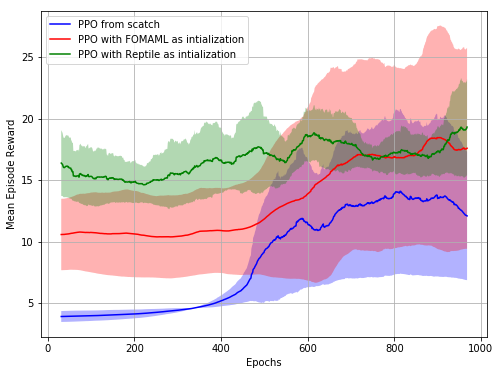

In [11]:
# fomaml,kl_penalty

import numpy as np
import matplotlib.pyplot as plt

x0=np.arange(1000)
plt.figure(figsize=(8,6))
def sm( y):
    halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
    k = halfwidth
    xsmoo = x0[k:-k]
    ysmoo = np.convolve(y, np.ones(2*k+1), mode='valid') / np.convolve(np.ones_like(y), np.ones(2*k+1), mode='valid')  #valid output the real overlap are of the convolution rusult
    downsample = max(int(np.floor(len(xsmoo)/1e3)),1)  #bigger or equal than 1
    return ysmoo[::downsample]   #downsample after second : is the step in the range 
halfwidth = min(31, int(np.ceil(len(x0)/30))) # Halfwidth of our smoothing convolution
k = halfwidth
x1 = x0[k:-k]
# vanilla
y11=[4.508754126399833, 4.476341238365054, 4.520519601985059, 4.4981854590502275, 4.497374246912297, 4.503221204958982, 4.493908686899396, 4.504998099089463, 4.507907619934679, 4.540458395526666, 4.494332718223718, 4.54569070092056, 4.514236082594421, 4.50139037462326, 4.527099459411604, 4.496603094388179, 4.4801942339412335, 4.507552642906612, 4.503828895002404, 4.50948048421145, 4.514473149022493, 4.492369897436112, 4.512083714395613, 4.5188692403240776, 4.476465018750542, 4.510809150700113, 4.5099456795025, 4.51905474402264, 4.51749313051052, 4.504841531428167, 4.524992047099196, 4.510445800049351, 4.505460366981593, 4.493578621121662, 4.532777007514703, 4.521336806735744, 4.507133931230875, 4.53456445560669, 4.543120762830758, 4.534208865186696, 4.556564454501806, 4.514056448740269, 4.539254947992886, 4.555822490450853, 4.524545018804093, 4.5210379852859415, 4.5220321013329166, 4.527475346560422, 4.580262230396138, 4.526634961315172, 4.535967073438529, 4.555776298579642, 4.5565437145465575, 4.564413493854155, 4.543396809494959, 4.5440080177620406, 4.552781160951677, 4.568505220548703, 4.548321317140778, 4.561953266922605, 4.569895632599348, 4.563519472271602, 4.601176057618809, 4.563137596628312, 4.546479424259752, 4.5928881975266584, 4.561621328056702, 4.578107943361595, 4.603851726080969, 4.56746980222633, 4.556736256598033, 4.585538792440993, 4.5603362096226725, 4.570094669299341, 4.588689507498027, 4.568316143149859, 4.5663411728550845, 4.574147961527693, 4.587171695301065, 4.556630512196011, 4.569893286899026, 4.571755137555314, 4.6206888890014355, 4.541176014843213, 4.579767395980835, 4.5236953224988685, 4.538775531331089, 4.525488943640724, 4.584853495648159, 4.53131144245713, 4.55067101254298, 4.564864004197465, 4.615217090613974, 4.5562716252528705, 4.541384253455564, 4.55202398097253, 4.535014065897807, 4.52655142751248, 4.539941075084701, 4.520250328280327, 4.523315821039434, 4.52466140011097, 4.552393827755953, 4.543018179420011, 4.517637497247224, 4.54561146039918, 4.520745156865209, 4.575265437966937, 4.568907528097592, 4.524610180152709, 4.588845556138523, 4.567192256614687, 4.540280720039901, 4.5617712296273245, 4.525204257735611, 4.567210257979944, 4.5552350720488715, 4.55070556667093, 4.583081294195281, 4.56156759493171, 4.521637149672246, 4.593229490181345, 4.542420567689875, 4.584068356309891, 4.561655663769057, 4.555040786382244, 4.6224144992806, 4.552898662518325, 4.573131520866936, 4.615321694279921, 4.590872182773302, 4.56049602121546, 4.5762655062874265, 4.576406651294034, 4.565092448441259, 4.586493443432534, 4.579769832708756, 4.586992461838067, 4.587605596916926, 4.642868242964519, 4.578391759223448, 4.601181589782882, 4.61345403189341, 4.592558939358057, 4.619136624568902, 4.58938812790258, 4.647688451125837, 4.602958348344326, 4.585094092186733, 4.597874937129696, 4.636485132623471, 4.603843220433243, 4.605361738389815, 4.613359174227976, 4.605624565963481, 4.618723106498296, 4.616400705818658, 4.583190817225783, 4.6337421259194915, 4.598622313558483, 4.597660964609868, 4.576949124247207, 4.675418702318875, 4.63758475591895, 4.597786010186539, 4.661298052789718, 4.603297668255845, 4.653838268545419, 4.616372087616014, 4.610670288377028, 4.628777090013911, 4.60418281197001, 4.6042292854300815, 4.638670024718323, 4.591100567887882, 4.612166656893006, 4.557042951988041, 4.599162498204699, 4.609592686335052, 4.573575706352672, 4.5745403805682, 4.610727356933235, 4.657668912793122, 4.55740046729864, 4.567413979340359, 4.5785561966097745, 4.620499879341006, 4.5641529582840015, 4.545760748714029, 4.613250749560724, 4.583277461655088, 4.544444194549067, 4.578495736868182, 4.602545615572043, 4.507102974043949, 4.6016068970994155, 4.645202319531414, 4.6030938769729985, 4.646037505341692, 4.616691748496175, 4.573802299062474, 4.634737576638787, 4.632311874655993, 4.638919451149089, 4.671860411262088, 4.640662364454078, 4.602517425285334, 4.656675877449269, 4.63810759080303, 4.663752067213622, 4.603443388490782, 4.634621933041091, 4.669484062862132, 4.684408925122475, 4.708000343597945, 4.61955718170481, 4.65485008374506, 4.674574440067863, 4.63125661041626, 4.641276950870204, 4.66364320528787, 4.687746799171482, 4.670191700923932, 4.631360319759377, 4.6033788532286595, 4.619727520645713, 4.633679284331609, 4.609162479053769, 4.608394129675468, 4.605754666083321, 4.6140002804666675, 4.605484931922902, 4.645482899440119, 4.622507435617814, 4.619857084752756, 4.620068778592849, 4.612316628461341, 4.598080446265039, 4.565506076894713, 4.586124362805962, 4.57466455100172, 4.622155627455202, 4.611111827428287, 4.6127519195930455, 4.658572043074745, 4.620505366929221, 4.612809382307198, 4.59535869806221, 4.676845011620213, 4.632420249604956, 4.627194267430527, 4.658964283494434, 4.679968396803917, 4.683631834457584, 4.629868729649561, 4.6553139870144395, 4.659580567756456, 4.672736152271194, 4.685024176615091, 4.6556220104272255, 4.692792616581341, 4.674837177281149, 4.666966402422835, 4.674358038359319, 4.637861260309751, 4.665887676994954, 4.640627274410218, 4.661303006537441, 4.701146405982963, 4.61893912993065, 4.63862122826024, 4.659795797182844, 4.644107737326541, 4.645695507809538, 4.646452473937777, 4.619152559056494, 4.6679671732130625, 4.686421132163199, 4.654844536346273, 4.672586124218086, 4.671400493644774, 4.663783577699396, 4.692928139863269, 4.69164414446347, 4.688470079771278, 4.656480423698144, 4.6442617928289796, 4.657318790315248, 4.670085530142144, 4.614842590356343, 4.656905456729253, 4.631042376304538, 4.624400256011317, 4.629624076216717, 4.624559601490189, 4.640473021332952, 4.652102971301705, 4.703891368403794, 4.626400818462271, 4.68967718241014, 4.677775826704773, 4.619976278542014, 4.651321662860567, 4.682818813939465, 4.666415141824106, 4.668686806705712, 4.698043822405425, 4.652662966962606, 4.677449941215445, 4.680118027267188, 4.696051767666971, 4.660821983268743, 4.640198311391895, 4.648463840829277, 4.711721322566716, 4.665453180245582, 4.648679358548169, 4.631143580602482, 4.687520317349316, 4.71438229252617, 4.662488285744072, 4.686743960347465, 4.654518595766017, 4.620297607441573, 4.655797161274302, 4.667595397702146, 4.647675606759178, 4.651400398193639, 4.593520631498193, 4.556889099135701, 4.586087062916698, 4.583520770941634, 4.585731166022534, 4.603364919841791, 4.640541820575712, 4.562867998488198, 4.561906649485511, 4.601996139689562, 4.588630331531498, 4.569812489552233, 4.59243904475926, 4.62314904141889, 4.577751029042736, 4.561937334338752, 4.5715064402038745, 4.59890154547709, 4.554480024674452, 4.633503643928555, 4.573788729053579, 4.586225995323021, 4.556612020893841, 4.554147046548391, 4.505917949463661, 4.547872748441466, 4.555130615659342, 4.518128546936413, 4.513153129122327, 4.511811256398105, 4.528599954473472, 4.538808466173414, 4.497035809129666, 4.52341053748966, 4.494348903189544, 4.545777454251253, 4.546657765801299, 4.56074345119807, 4.5185622658355395, 4.537943336452761, 4.523192097665352, 4.489017147395048, 4.52490290974556, 4.608172568802306, 4.584705256552305, 4.570738971869046, 4.5332467569563475, 4.5774162698450676, 4.6169308740041375, 4.573838075276829, 4.541334922981779, 4.584660038664771, 4.539937349599308, 4.581903326680894, 4.593340357015943, 4.578435731750499, 4.617833533530365, 4.581554581155917, 4.63066054341964, 4.5809543544310465, 4.59562946574129, 4.530856113627345, 4.546494633639993, 4.618490734674802, 4.59068743632323, 4.602442555182871, 4.572221801425598, 4.549339665684517, 4.601484122784088, 4.584574436876417, 4.538366253447204, 4.530809246309223, 4.539271272530542, 4.537266924353138, 4.586093524368852, 4.521744656567082, 4.479612251608612, 4.52819721869212, 4.549568612905635, 4.540626389200949, 4.490032928968336, 4.524350283768344, 4.526962448161719, 4.558301256463253, 4.5104569451491825, 4.540385482322054, 4.573896559420739, 4.546075341205994, 4.585988479310439, 4.522874181543466, 4.529367639223239, 4.668303954002631, 4.615690005626858, 4.552868670175264, 4.58066501423673, 4.5749984575472045, 4.542316065816534, 4.617909645284954, 4.582959762149088, 4.618321544859301, 4.583588256056717, 4.615760998012085, 4.629973042273735, 4.589129151749517, 4.562350572812949, 4.64911446047473, 4.623961502760371, 4.621874843486206, 4.634488971797768, 4.6040768206219465, 4.623860153635469, 4.640961868847909, 4.558625674072726, 4.5355227584086055, 4.523743933494145, 4.511169703555114, 4.536264742362331, 4.5565276988056125, 4.511401036505641, 4.551436076549501, 4.522671761269109, 4.505144951549375, 4.550828365308139, 4.528068231549221, 4.510791553476723, 4.4975867143702875, 4.547005505160736, 4.512113336204246, 4.513766687935207, 4.501815082827605, 4.521966252153747, 4.51991633149354, 4.5246384487142395, 4.5759914677924955, 4.4891155081320155, 4.560896090582113, 4.536423608537307, 4.536038589926972, 4.52360217005036, 4.534108167096935, 4.545703614654351, 4.545515566184208, 4.597324463842652, 4.587091921847758, 4.512336741962264, 4.538249822246126, 4.509323508741459, 4.504734540302027, 4.539763425211172, 4.513939353540278, 4.588748376862408, 4.4913723964260885, 4.513418885527435, 4.506871425071142, 4.562433608057674, 4.524010250216161, 4.472869352684933, 4.48807632172041, 4.560297575556314, 4.514302592706019, 4.448863379980983, 4.539418475580231, 4.496410045523314, 4.551007535888582, 4.511882098175693, 4.537430325708942, 4.512923089394594, 4.491888375388457, 4.500115894538018, 4.511725604974331, 4.510917066659449, 4.496146936643073, 4.533582205069865, 4.500748327717885, 4.5151803325531334, 4.517815241829681, 4.481424406788367, 4.520025756088559, 4.580808645124366, 4.458444225121529, 4.502343208318805, 4.46698075678222, 4.489230696041602, 4.451339878147504, 4.510093151829194, 4.5114080588091525, 4.476577868806071, 4.496583157956253, 4.497814998291621, 4.460932868303365, 4.5249256129154976, 4.441202373512588, 4.480322036680168, 4.477984584493292, 4.5092520117138335, 4.472931883759441, 4.462839957284402, 4.4783438802710185, 4.450729585639299, 4.445349320379705, 4.473568959954883, 4.463205862286371, 4.485726228871392, 4.479977504532442, 4.463059709688658, 4.4421469836162775, 4.487788220100828, 4.432212461780044, 4.46077708611753, 4.418181276605096, 4.408189282087156, 4.45474812472614, 4.426717093675907, 4.443399304956289, 4.515679693762821, 4.425660398759451, 4.4132888704568485, 4.45306690953645, 4.463860679401464, 4.471866567807338, 4.461830325298806, 4.452840666517705, 4.55833112387522, 4.5296565124389065, 4.4990145618379405, 4.51150210029935, 4.5231120622727765, 4.445550283788916, 4.495780986258002, 4.567313184783398, 4.4718490684358505, 4.493967185044359, 4.50058085934496, 4.580100001331199, 4.468579225941711, 4.5569703801447154, 4.573595264223745, 4.51839409160051, 4.592133213227149, 4.512114895668039, 4.58720188355332, 4.5655636683821665, 4.47058031328448, 4.548248248461107, 4.621328882104894, 4.545844459484416, 4.502364540021706, 4.551703063421729, 4.549730144557966, 4.54160138704081, 4.560029609159108, 4.592431087957069, 4.570742078211678, 4.607546904567758, 4.574109321729554, 4.483623721388063, 4.554894386682304, 4.560328633017214, 4.528506864157229, 4.5038450504927825, 4.476919797902869, 4.5699093805967195, 4.547299333757364, 4.5321984697493205, 4.58534477427108, 4.448240625448069, 4.5933051870620165, 4.54967292132457, 4.510861638201248, 4.533099728541112, 4.47894422020441, 4.585231801024146, 4.56237195413133, 4.581189183698202, 4.512073100102749, 4.523228349204691, 4.541526207991006, 4.558682168533136, 4.548259966180123, 4.558921754607232, 4.568211414055888, 4.539329017094391, 4.5105451770660245, 4.511869423187009, 4.625723514150302, 4.56886508803268, 4.549495667821823, 4.545038319021121, 4.514899060283839, 4.532385291419069, 4.611316723156109, 4.6539429622323, 4.492292868503075, 4.528765353432515, 4.551945144344327, 4.541611937495271, 4.509376655490227, 4.527267228551134, 4.625033036527746, 4.558805751591095, 4.454774108875239, 4.493980962960935, 4.499665760928289, 4.481568838533165, 4.567513038746706, 4.5205633613330045, 4.614411750460554, 4.540720793123184, 4.48834438984537, 4.537971582690012, 4.48704432521468, 4.486013473439973, 4.56735080205385, 4.47859239686293, 4.528033097139791, 4.521487693957424, 4.54609736304347, 4.513921185542371, 4.52091555770794, 4.57563181813342, 4.511604434489047, 4.503765605745057, 4.488807938771485, 4.555804773008025, 4.489525118011443, 4.675810225555515, 4.50826776580292, 4.513779457077782, 4.526198891290625, 4.6128425168635445, 4.490587751812417, 4.578247329047439, 4.500732759004031, 4.513541950491365, 4.528884600353677, 4.650700445011637, 4.5706214996348375, 4.589158230304742, 4.574214557428591, 4.462785962153749, 4.5345418062989316, 4.513861949989072, 4.625234777275602, 4.5706989458291325, 4.530994957538093, 4.442541674853723, 4.555250563685963, 4.499952222699336, 4.479919957519384, 4.745904323564593, 4.487814905676506, 4.659763854616264, 4.56462885008035, 4.654333175306722, 4.489660481824529, 4.49054634012961, 4.550178307605857, 4.491012533262757, 4.553654334954482, 4.539188736122081, 4.524991111101069, 4.466602195855575, 4.4815871380953896, 4.464270342122663, 4.44468190081014, 4.539376114082639, 4.537921164295316, 4.498146986474032, 4.552257798848377, 4.574457285431325, 4.553715436864783, 4.558252236983241, 4.498767908488129, 4.56553707123108, 4.5579079175780555, 4.50096727818485, 4.555353139951232, 4.49875365831451, 4.550741685862696, 4.5344284340987056, 4.626197601199432, 4.569054573011972, 4.658651821915993, 4.585894933718546, 4.672322887652772, 4.727388710079903, 4.6004338292156834, 4.625208317392534, 4.636429403627234, 4.649469899319798, 4.610550880306998, 4.573678431289311, 4.581933964730421, 4.545042004985313, 4.559857370482116, 4.5394143447542215, 4.529354315673386, 4.53246991088191, 4.605652832133198, 4.615698523217662, 4.546109143105467, 4.665464757286135, 4.62845970856199, 4.609719419603713, 4.5471431310947645, 4.5618668588485, 4.692532286175012, 4.594046168733213, 4.560767781059909, 4.593227786559924, 4.670543084230598, 4.560206556523637, 4.607984392191247, 4.610347019981932, 4.668601537934663, 4.601095658394416, 4.650417127313167, 4.622651260686613, 4.647001936209988, 4.6844351758813545, 4.62336420340183, 4.630508486538492, 4.7128540892629625, 4.629791085679232, 4.678877996549208, 4.674889147162257, 4.642552412481172, 4.709803160605413, 4.746242257954778, 4.635412344472407, 4.771254988757426, 4.6675803199228385, 4.795035805410187, 4.661969984883253, 4.607283949188206, 4.677604808112426, 4.636305760902414, 4.651985406966074, 4.701941024632324, 4.754812925851756, 4.70027815784565, 4.635561651545453, 4.764916168110295, 4.686613463735719, 4.635470296913609, 4.808192847577519, 4.665497677579277, 4.72788787963873, 4.635273793575859, 4.741626973300824, 4.71305279452418, 4.700897835731031, 4.734868697222465, 4.60014446191099, 4.740103585889888, 4.742435312442691, 4.652278145622372, 4.616112316083032, 4.646491862158195, 4.647130800105485, 4.7152671785016045, 4.693046743520558, 4.686727401871985, 4.705471097927026, 4.5389456282839005, 4.635068647191953, 4.61916903364401, 4.7855460119187025, 4.759079317014836, 4.625475790781494, 4.707756673762881, 4.553513996031815, 4.700626919444791, 4.63221231484652, 4.655163812529974, 4.734823844117216, 4.729019859162082, 4.692958097860867, 4.803345855302888, 4.66573765252628, 4.692350828024235, 4.6867295095908155, 4.75990154735584, 4.737760853614654, 4.7517899802163015, 4.762865992797843, 4.731988329646319, 4.706317631165832, 4.721357892378802, 4.726013837943995, 4.688982397586104, 4.701674657902517, 4.7651895451493465, 4.714451399790485, 4.670209953664964, 4.751923146204841, 4.838732164111591, 4.77569585421306, 4.840657468947376, 4.764870204574021, 4.795470929612747, 4.80933697148581, 4.796203675205146, 4.683004705091271, 4.6913382485326025, 4.713628820117387, 4.716931894279076, 4.630082972399345, 4.804032511762938, 4.662049009032313, 4.7179283142593915, 4.68226344823923, 4.73482086274439, 4.751224652486767, 4.759872052538532, 4.740014977562677, 4.670932809358083, 4.741377994492037, 4.759521588642197, 4.845704574533083, 4.777980831587803, 4.75418727520389, 4.781205193282401, 4.752513109817597, 4.782910745990261, 4.767660853674044, 4.8300924488072825, 4.749732027292743, 4.743459505807725, 4.788200368662656, 4.792852905352329, 4.8244470584975785, 4.723093974248668, 4.759603876945465, 4.689985599334099, 4.734527735701019, 4.6778307199180755, 4.7632727425928625, 4.716110762745479, 4.733709463801364, 4.758814089080309, 4.749856234817954, 4.709476626941201, 4.793004783164774, 4.772113422797232, 4.756859580324403, 4.7520674045783835, 4.720409777798353, 4.776410456229015, 4.801106002745076, 4.6719730379345945, 4.760305086540718, 4.74818389651662, 4.72807577332917, 4.772171655770203, 4.854696847995143, 4.759138303035833, 4.759209990564412, 4.790370868882549, 4.736327285566799, 4.758656653347182, 4.882666687140061, 4.767046962323985, 4.741803494602438, 4.8692243462234845, 4.774425051111574, 4.7457413926749314, 4.698691752166007, 4.825214756408719, 4.768377800447446, 4.823956737923032, 4.794229546793278, 4.864728707530609, 4.825725719955987, 4.799601700901626, 4.8557953968137815, 4.766718673370806, 4.722957407171453, 4.754346298647232, 4.65958265870059, 4.743422063878117, 4.771987251347056, 4.690527603244355, 4.737548403924474, 4.774523867672669, 4.682239061886493, 4.767352053120396, 4.719199505471128, 4.712509362873795, 4.728095048304939, 4.625368848279883, 4.756915107730161, 4.669996227206562, 4.67019953741833, 4.673365488132351, 4.70423931816145, 4.6652149400861305, 4.805292903190186, 4.6400529576879, 4.8102360007048635, 4.70855365147373, 4.755982045824784, 4.801936872720591, 4.950284125746758, 4.728734407932223, 4.736903689691119, 4.731159939610419, 4.750312248934551, 4.752099314899655, 4.74783306634259, 4.699661748969499, 4.778389969262391, 4.688288596150551, 4.7892213587913695, 4.706968098768066, 4.743097446631429, 4.833386966043147, 4.779196570323869, 4.737107885695082, 4.718639173995807, 4.707582345352117, 4.794571272516828, 4.7910594113767395, 4.7512163983601665, 4.782706597906835, 4.745483227355541, 4.735491724935438, 4.704131405807788, 4.7546030319553605, 4.73765375341623, 4.781378881111323, 4.670877955665594, 4.647502909990869, 4.713306481584567, 4.694649231437168, 4.756314199624888, 4.72872253386249, 4.740956036191922, 4.719427140128316, 4.657289109278587, 4.667701933789565, 4.689908822841629, 4.624221824401956, 4.655249357071006, 4.704797812189273, 4.663315942714099, 4.674597836857659, 4.6834320889151515, 4.65939116339552, 4.6163205654086665, 4.61523278065896, 4.659446834880379, 4.663283984667552, 4.630603606667682, 4.624254022182777, 4.7419534394490075, 4.648253997385591, 4.724875684264406, 4.656216107529005, 4.68856121871136, 4.644156921803197, 4.679037481939174, 4.687637090782539, 4.632941530129271, 4.631348249908279, 4.711777265379428, 4.71218704395888, 4.792969425214099, 4.648778347616719, 4.6707051997579905, 4.690132832803416, 4.652613401546126]
y12=[3.45094569586266, 3.435009089289697, 3.4599937057201635, 3.420374403843232, 3.460745668335108, 3.4663813264762626, 3.4640198505922775, 3.4631052834246, 3.474399143316804, 3.497664894164634, 3.472553811100845, 3.5194242187392084, 3.47312998792516, 3.4595610601439226, 3.4940490467914866, 3.4579091660593364, 3.4901918108163907, 3.492678715800253, 3.4412194512882692, 3.4878512368090373, 3.5135788218054342, 3.4847650256189393, 3.516417821963643, 3.458353147047924, 3.4467384304226423, 3.4789525398061882, 3.5530736457682996, 3.473202561362933, 3.49463742757773, 3.501426157058548, 3.4865767927264004, 3.4587660486610843, 3.4709515262702286, 3.485148026157599, 3.5095324838452195, 3.5310190567365485, 3.5300785069571403, 3.476242992921823, 3.4727362832060384, 3.5020630376519404, 3.525186386996422, 3.5115496335317182, 3.467659808825596, 3.4830782772804096, 3.5203526359936985, 3.4391922480761195, 3.4951142810814746, 3.501642148412193, 3.521400700057086, 3.527465204065049, 3.455591698567219, 3.519893745961568, 3.5269844236070416, 3.4690813799314806, 3.50761793579449, 3.4645565300080308, 3.5223186526267116, 3.5587231023356045, 3.5383440747356314, 3.518685719680696, 3.4746025261763864, 3.590997476479238, 3.5514709906192214, 3.508334990969479, 3.5158315687697397, 3.545533593768772, 3.567514043922496, 3.517600752397164, 3.5593391364099385, 3.5550122027533724, 3.4805445976997196, 3.5309506117885454, 3.4547676171560373, 3.501876358563959, 3.501406667091359, 3.519531020418347, 3.495593876634637, 3.5617244430985275, 3.5159148751867804, 3.566443293615376, 3.5524348045373317, 3.4949588891675334, 3.542254196826992, 3.547104388478825, 3.571043510431441, 3.5805303641250106, 3.5918185571627883, 3.5935021199879738, 3.540731555127706, 3.538230260042857, 3.629873247314986, 3.537368189089888, 3.5598681953841016, 3.5684375462902977, 3.5521888759372007, 3.6190674290123384, 3.565467788618804, 3.596671874048319, 3.5522174518438034, 3.6213805104253503, 3.5697055596543956, 3.638562626329345, 3.5357856774745997, 3.5652206722217303, 3.593049551093258, 3.590147702975614, 3.559714409095114, 3.535489690512259, 3.564574564975299, 3.6279442219102807, 3.5626029246787985, 3.6227066380174384, 3.611925142267416, 3.54129788234972, 3.6162303913198146, 3.6200875303993016, 3.5501260224632913, 3.592117224002407, 3.5617441579169182, 3.628915586662885, 3.5817490534145437, 3.5980267046277414, 3.5524675498082487, 3.5438252970181963, 3.5886043423476464, 3.6696539846699068, 3.640876574553076, 3.698272780215607, 3.6086587578883873, 3.60451139687918, 3.6255990965420235, 3.6496031922811287, 3.6301979009809875, 3.6220703005820476, 3.6762771656118844, 3.6886241593657143, 3.6286751895939955, 3.602501013146694, 3.5863365231427133, 3.6022228119609796, 3.6297766566614698, 3.592551637562678, 3.611506709776152, 3.636663250876905, 3.5966172490859267, 3.625395601690167, 3.5757588762179155, 3.5957108727421163, 3.6287300134157006, 3.622844177414355, 3.5714259245702578, 3.6626045847098254, 3.719597814416893, 3.685814276816337, 3.633651571236664, 3.6340718601124995, 3.699126589602691, 3.6127821332614696, 3.7044939794119056, 3.6213273122967977, 3.660335885832601, 3.7611212403567795, 3.703409408255244, 3.6642645370630564, 3.7840776884054743, 3.722927759625905, 3.695610464657792, 3.7016498867314676, 3.5945127733817652, 3.6422747450411608, 3.6505219634268227, 3.774750156412489, 3.7839190554278037, 3.682518856011045, 3.6867915725483895, 3.715539245671833, 3.7039902751779445, 3.7212806492901347, 3.7222150083106618, 3.7930665860968094, 3.7230110109048606, 3.7055172660407747, 3.7420731424494917, 3.7678753205809117, 3.7503006394939167, 3.7104522564236615, 3.6207934045490404, 3.6894382727019015, 3.697421269140121, 3.774781598216186, 3.9246851308983945, 3.7870644637834188, 3.7281696489115648, 3.8151943061283866, 3.7718766327869107, 3.806916649455483, 3.778884494423166, 3.857347795878822, 3.818046750445299, 3.82329660995339, 3.7991099725467747, 3.7774187882208508, 3.713156803158856, 3.7118228928892343, 3.757244728388851, 3.9430135635939796, 3.9457566146895124, 3.8700640501664445, 3.7814477563407176, 3.850867042327807, 3.7700819244481036, 3.751214607612401, 3.7957712712889897, 3.9124007610179614, 3.837094772618318, 3.8411198310604617, 3.757563796668227, 3.8792647654445496, 3.9167846706412766, 3.746927774600299, 3.9214416161925336, 3.831747196871581, 3.8710712907762694, 3.877874578846813, 3.745121659696675, 3.8893961456106805, 3.869690402010301, 4.032184038510471, 3.9333482829722697, 3.8618603406377185, 3.858451937265362, 3.9784335761210086, 3.8205860504766194, 3.8638861893539067, 4.001490194628783, 3.9227107789116125, 3.9929526407951808, 3.9521474319546326, 3.835763910376356, 3.9226725081616918, 3.8485298768055247, 3.9815613748556844, 3.793523820315889, 3.97039755548635, 3.844264449753264, 3.9931998440539833, 4.060205147136384, 4.035034066588891, 3.919170463214443, 4.051781424912155, 3.919348673673446, 4.069111001506785, 4.012448329934321, 3.9085052010968853, 4.043957887709922, 4.06400205559493, 4.086238602112543, 4.041121225958316, 3.8915368504464385, 4.020714038424794, 4.256956116927111, 3.993207923531786, 4.133410690519408, 4.112390188487433, 4.089513960973354, 4.217938786493234, 4.08065555641135, 4.078591121306531, 4.055343685420199, 4.0993645302959925, 4.26534254807182, 4.029130160677099, 4.108651274622243, 4.072605415107855, 4.042019415920448, 4.062560146083205, 4.1221773033738565, 3.991343523250323, 4.043692775309721, 4.181719996838192, 4.234387637857942, 4.45020816140889, 4.012074156655203, 4.306268208746609, 4.050360538178468, 4.184910726524587, 4.1889574896925135, 4.289807671829559, 4.003820098245877, 4.279874424416166, 4.38518153501479, 4.292449696470128, 4.21919008666948, 4.12173855297196, 4.25183377169486, 4.285452777650051, 4.365497483827584, 4.342037880146056, 4.558661911600684, 4.162930437209624, 4.161703801086295, 4.300499146946055, 4.488142897929328, 4.356200753386137, 4.380743762007631, 4.035955235343999, 4.28667783682405, 4.1324619422340945, 4.179717857487907, 4.307951483702282, 4.354755132006625, 4.053435296854441, 4.447680155991039, 4.562418715010897, 4.2119898987838855, 4.3988117360106465, 4.575663949726361, 4.305405058137872, 4.515634999516087, 4.403706618377165, 4.54127207935624, 4.36483065909673, 4.288795345809877, 4.527882680200551, 4.384769878653869, 4.753937998446674, 4.520139293927872, 4.463540822065874, 4.5109033636771905, 4.438054680265072, 4.604899579605264, 4.475867555263069, 4.487793625763921, 4.524323876883273, 4.474203022952105, 4.4168143674576035, 4.737560528266544, 4.393254783465166, 4.493534234941097, 4.205577284138368, 4.517613529342086, 4.633406104781562, 4.687262157066054, 4.568118826719824, 4.605640141101671, 4.409553679431963, 4.730910259396115, 4.663323925950021, 4.668356648793376, 4.6598806322517525, 4.749194068290679, 4.779946232187186, 4.729721338976953, 4.547716329814131, 4.657633549864979, 4.573981653955458, 4.8183233977730495, 4.901410505229794, 4.579875198455964, 4.510295229834181, 4.59873252838029, 4.940463925331098, 5.055169866522793, 4.709934068602641, 5.244456724795434, 4.772566508779064, 5.174066229621176, 4.852282755926974, 5.128175435565349, 5.078117182899238, 5.169121560723302, 4.987047245665555, 5.013699361348446, 5.070610941738232, 5.288851300812625, 4.813050528239683, 4.987555212065637, 4.9465566880626675, 5.077137774911711, 5.1983820753883325, 5.13319684888853, 5.219043337827315, 5.376593324179184, 5.342576075355941, 4.945902029650241, 5.201404871627172, 5.553696552999964, 5.354952658177282, 5.217126910629255, 5.193452538560361, 5.306504177109641, 5.549410280363101, 5.279398385094568, 5.28664881892296, 5.210825105468369, 5.198830150458654, 5.246630626657148, 5.6654071967944, 5.7356435320160895, 5.437082329320273, 5.616821057599637, 5.359232664153446, 5.551182865395746, 6.05735247320849, 5.959073765979812, 5.534510377324985, 5.662294308187094, 5.575632892821162, 5.939689506254756, 6.177143932522537, 5.527068318725586, 5.3475574338749245, 5.766630125278236, 5.48407339763314, 5.844216661787439, 5.736118130510528, 5.637878607635086, 6.2247422405440425, 5.683623524469585, 5.552849014857415, 6.320014229858217, 6.703968077104269, 7.368123490681222, 5.557218428433871, 6.068564352506009, 6.195541361340611, 6.213883094097136, 5.767230278147528, 7.376948759192812, 6.081358146572809, 6.399488934348059, 6.632876964784376, 6.5361333749692205, 6.04285461028194, 5.851008360135858, 5.908259433690811, 8.374691051378953, 6.675288226885849, 6.1047891711526905, 6.05451443473778, 6.926518375783176, 6.356523130754432, 6.738858345477527, 6.73219321797691, 6.271327614723543, 7.082719341444352, 6.493892125141799, 6.767417428304028, 6.817197719490338, 6.805751717328848, 6.493651799435611, 6.399270406414891, 6.764305418238191, 6.5507126461274785, 7.778871513498118, 8.477632102787322, 7.122814907027377, 7.409940142465511, 6.999137538883547, 6.29787796301823, 7.549639194721557, 7.1770372756281775, 6.478185641569564, 6.173706291286007, 6.95347043748834, 6.68575144447712, 10.84673777163453, 7.956340539501206, 7.621133507368701, 6.963029553970649, 6.515593786171473, 6.67985357726134, 6.605692098013059, 7.599505544340721, 6.573549046206599, 6.217986153133663, 7.628643724152963, 6.540406651486623, 11.933828289189599, 8.368322872876547, 7.389332931771562, 7.017042107003224, 9.730375299934945, 8.282791430875927, 10.583839266479114, 7.4815143859967, 6.618624975534484, 8.113903165505787, 8.13517056354499, 6.662747916726511, 7.333570207188634, 9.249701375016327, 7.3019548468767015, 7.575267869448183, 10.273079720789692, 10.309513367461467, 8.214738653304757, 14.877666458557133, 7.382827912901428, 7.36503083268333, 12.178807214803934, 6.582619788362534, 9.165935764984543, 9.484742021376833, 9.991560604089988, 10.002315120623535, 7.795229246137701, 6.962112089059945, 7.322064933199039, 12.918263838910594, 8.88041975948082, 7.9692006253438965, 6.832358250745445, 8.52170944791447, 7.912329766829628, 7.535628736446181, 7.578695596513559, 7.663011507684245, 10.155173499217382, 7.656078423401164, 7.730194426589565, 7.847573315346766, 7.701237476875478, 7.872567116655972, 8.467879545561301, 10.227290614792512, 9.892679682368627, 9.610109795725183, 8.828428950838184, 8.400844314642004, 8.409038132743042, 17.008157325798116, 18.62265054936831, 10.289367553974934, 11.966680833817776, 8.630229492251326, 8.322261162280043, 7.546721963541468, 6.923035918312373, 9.823255058741125, 8.291959476963244, 8.084461482728567, 9.704940923495846, 8.686373696134675, 14.339634742738916, 17.444348773740128, 8.57139202506874, 10.689628054505734, 7.571354576807596, 8.743962269079656, 9.689634946760691, 8.154659361075776, 9.418407364485113, 8.493712277551449, 15.341375157716374, 8.649510255481882, 8.46566565768335, 7.325992167627197, 9.403385226071247, 19.02283252299752, 9.120398925478005, 10.369684308932552, 13.701410323583765, 10.321077929003295, 13.645949585262704, 8.652313657069762, 7.671663317699345, 12.371297558754057, 17.49867740126372, 16.00262013214134, 9.611412010851797, 8.61034668313403, 12.411895449806913, 17.165186534979213, 9.559685585421645, 9.342481460589617, 11.260389738544301, 12.687158241536697, 14.01067118485712, 8.48385239741349, 8.608730856318354, 21.776884682337, 14.430466496138227, 12.900992429845164, 12.317060394801489, 12.247566839229236, 8.499165570689696, 14.019392911073078, 11.539110506396444, 13.34691137644616, 9.20438652705235, 17.019214406910045, 7.652616501410664, 10.231692587797236, 12.002623986636216, 12.687253916961325, 13.333345725323621, 16.84602880704811, 11.36209142749107, 14.304143833472239, 9.992969625244733, 9.683221040162039, 11.009388460229431, 12.05292469963248, 10.159950644150673, 18.293487237993645, 15.786385130594436, 9.196213667634307, 11.766583608602021, 20.21280667449075, 15.470699371018931, 19.500045567120672, 13.580749164929596, 10.190109728633326, 19.982050504837915, 12.541483743342825, 11.19450318005403, 11.674568702976378, 13.882939990907946, 12.035490373737002, 10.741200528970865, 19.25960205079653, 10.015715073136645, 13.37577023030566, 13.980809039377341, 12.573988965186023, 8.165080296710975, 9.582485398079388, 19.96324891365573, 13.026877389387721, 16.93919381026074, 9.019275826490265, 10.236469536674761, 13.436469509055968, 11.830002228900778, 16.455015599696296, 13.2469401362933, 10.100116555737905, 13.751564568972249, 16.61444469131432, 12.31855129720196, 9.367763244634766, 14.191316761631953, 10.455695049708385, 13.901390808187362, 15.953534345992551, 13.611703565790116, 14.762142204649974, 19.13052359723811, 16.510320190041526, 15.001259231718683, 21.706914768294652, 13.78805456816941, 12.149355076139422, 14.440970418970231, 11.06028448813692, 14.899147394583883, 21.44395409988548, 15.532010279129244, 11.784299063405186, 17.351905469730802, 16.886367965984483, 21.66064000488189, 13.38418917876217, 17.51240579260984, 21.818629920032194, 13.842548470032597, 19.788483649023583, 16.83249234164362, 12.036763205349361, 17.7142985256738, 20.479385232534092, 19.95817757228224, 20.234202141890282, 18.492518049950093, 14.313298849553412, 21.78552548168319, 13.700514152790298, 14.44288123795875, 12.410545446070909, 15.194334853786323, 20.235937287563242, 19.449674551289373, 15.831806396834365, 14.945119039350343, 18.72008656549083, 15.809638646691205, 14.30074805790308, 16.537201811278564, 14.435390982497843, 15.988472569657727, 23.493572435145403, 14.780420950489066, 9.75523333492467, 22.828146637385263, 13.761574746236537, 15.645907447044019, 17.986030607727088, 17.58345080670813, 16.672401526371186, 13.540927175651998, 14.621650399798737, 21.004601999735797, 14.472941880876839, 16.596858588222236, 11.141258172979002, 17.231950504145402, 10.212871686863364, 19.775840167984494, 14.226213733319415, 20.297277900616326, 14.16963400977998, 16.710397830112395, 15.281912968073204, 17.41362968830524, 15.688829558681746, 19.12161888794798, 18.266363525629025, 31.69582366402254, 17.445725259929766, 13.597494538037697, 13.308693603626166, 20.147217654029955, 19.875845770198573, 17.87968492748876, 19.656376028101363, 16.72658213006021, 21.45411346783083, 14.186409159843727, 26.008914340034284, 15.286733626959714, 19.605574982084434, 14.669866392835628, 20.254245786236467, 15.435385204243227, 15.788958739572475, 13.215194656042074, 18.970774844642055, 13.996309502743859, 17.609437383819916, 15.234723609176749, 17.072608859992258, 15.050332482003963, 13.497421410281511, 16.464450537770407, 15.461540542874989, 13.368994750438537, 16.470480433806635, 14.405541903736838, 16.983558953582822, 14.929362414387999, 17.291076210481386, 19.554447332693762, 15.532085858139409, 15.716892493439957, 15.765777963685862, 17.97867066069999, 16.052133382376624, 14.574752387960695, 13.059173172770421, 17.48691670854017, 16.33860495235414, 25.315330524814694, 11.639228701044308, 14.00353083626958, 17.39471538627442, 17.47622861334923, 14.948705656707066, 14.558683410990326, 19.426957408429978, 15.310223766752063, 13.921124201996822, 15.878672519468669, 15.69888003119409, 15.728224364380425, 16.15161164394771, 13.947948409167013, 15.465742329039834, 17.111393354992927, 18.998434635346108, 13.681381034579422, 15.64320897237041, 15.405855003478694, 18.22712149643882, 19.05907618653908, 16.636884445791374, 15.880472294024374, 14.123563014051951, 14.769729362531136, 16.9397342074914, 13.94742578433822, 19.18083649277198, 17.988329731904713, 19.76918792657739, 17.99140772305501, 17.670502766283768, 20.639223944636473, 17.646282380121786, 14.15348837169134, 15.372963790758506, 17.72136605963308, 14.111750024442022, 19.825785866522423, 15.02047587907242, 16.60194760941954, 18.298945897403744, 14.895942732758227, 17.96697428379915, 35.33847830527935, 19.605787998454574, 19.704745634703407, 17.149707302591743, 16.35471067251944, 14.020323460025981, 19.863121366141186, 16.011109326560756, 15.826567441189733, 16.46954001023797, 13.672633182682905, 15.628488388383792, 18.149022116804616, 15.171042504285616, 20.304329067990494, 18.632021075597653, 15.548148845781327, 19.229260603734872, 22.915889965979268, 15.709178894376311, 16.297784450619872, 20.126416350824837, 15.201973978834069, 16.938868220051663, 20.374509595912258, 24.273088187225998, 17.58597387052837, 17.78531175704885, 13.85730906946511, 19.66405602650024, 19.95329079809061, 15.497070994009874, 17.077113982038036, 16.701850115123364, 17.635820727577734, 15.290763269995058, 18.065038206768133, 19.63001168780964, 17.909814318646895, 14.166878883850526, 18.08422358828513, 14.978573585226966, 18.20996261768762, 13.899091577165136, 14.154625395513964, 17.909956240533102, 17.22923716713632, 17.459531851702415, 16.37795071990729, 20.091912938649592, 19.701967228814617, 13.70124838631009, 16.047577866273667, 15.476025076003278, 15.14882795661631, 15.064371472561211, 14.82186820780141, 18.386149651034014, 14.780095674708207, 13.626804795895337, 16.337528231934815, 16.81358262674362, 13.879999311652703, 20.911709598842222, 14.956762850678423, 13.840576830016705, 15.694678798323697, 15.144376176452866, 20.321762963776365, 14.34774729009474, 17.253496256395966, 16.123811234857026, 18.094162967578836, 15.32745959609066, 19.2538783655252, 14.257095158834973, 20.042494493355143, 17.250044316120068, 14.978788739217466, 16.346029224875554, 14.52837443969666, 16.256911220984502, 24.436730200640035, 13.896942717062672, 16.84355252146082, 18.690017662086902, 17.581021315950856, 15.652062778873962, 15.314698094852037, 14.665695462521171, 15.926241999429408, 18.384459137605777, 16.462605950901846, 19.250956941667262, 13.299599765028137, 16.024433748620947, 16.323915425626275, 16.16823418692222, 17.33298704294355, 14.084467512492603, 16.40870742980991, 15.776034570329703, 14.133142392370972, 16.943865690520077, 15.996739983318262, 14.339421336534132, 18.794720295473123, 14.385874852261225, 15.614392523980339, 14.001869652160666, 14.960549848594312, 15.526901925813148, 13.718179730798862, 15.749558093531684, 15.61389119214239, 14.798796768191176, 15.20213353030592, 14.933017905099854, 18.687047584956662, 17.044723646584124, 14.491373435859932, 15.74861475061856, 14.808785999155777, 15.093851107510162, 16.267250482587045, 13.829992607585533, 13.622653575359807, 14.911582384603387, 15.064650292191837, 14.068163575158756, 14.75016484847479, 13.866841928399468, 22.23719612841071, 14.584807803805983, 14.420311683612155, 17.732274304488307, 14.929546995141395, 19.1106688814283, 17.35780990805296, 20.939194313931758, 17.723418420497936, 14.759117836611704, 17.05272945392869, 14.466147729846346, 15.240998529249403, 16.562388257992335, 16.077670461249554, 18.410124876387247, 14.562313296055528, 16.078274979221725, 15.887328391265344, 15.951992024786541, 14.283255622632739, 18.262862894502987, 13.920200927776946, 14.935034505076525, 16.040314107875208, 14.444459353908476, 19.894703840505727, 14.71041480560868, 16.968587932098448, 15.263973797621244, 15.108394113395553, 14.71123597003924, 15.201837197233084, 17.28435509128485, 14.461005176452238, 13.136748216158637, 13.806145456421671, 14.478281261015566, 13.897035816808794, 13.671931598748138, 15.268645414176618, 14.568435495875105, 13.680432683317875, 14.362699518669903, 15.145459768942363, 14.325172029069158, 14.937688549553814, 16.949115659913637, 17.7640233446065, 15.439369693314786, 15.051408188967198, 14.371609897162703, 13.388203379710005, 15.827442577719445, 13.809856995100755, 14.700835157760226, 15.780264223061582, 13.659483511541685, 13.834905734185108, 14.560204157327705]
y13=[3.6755322641221126, 3.6929349288239273, 3.680307363583194, 3.659475565668237, 3.7010464947376684, 3.654251818685043, 3.674887901752865, 3.6981817213109096, 3.6832490012909953, 3.6737557245222, 3.6780605360983456, 3.674192658990781, 3.6851307879850737, 3.7197677730280003, 3.7009766248982268, 3.6851648431402855, 3.673307356955645, 3.698333388877953, 3.6814544968266785, 3.671611461797585, 3.6776814921627787, 3.683810027482039, 3.6957217191775564, 3.7205136283711986, 3.6772087836114546, 3.7188096928028997, 3.717255020430777, 3.7065280877644, 3.6935042194690757, 3.7244575210216606, 3.6924236818028215, 3.7235590297920904, 3.712344273061189, 3.7145887972971736, 3.7333294561596264, 3.68597340043773, 3.7124546005264683, 3.6887104412368696, 3.7080338558075225, 3.706145480712081, 3.711215518926512, 3.7134368623735208, 3.691503324968073, 3.697131289342797, 3.741213338736645, 3.7481360633965393, 3.757904038213175, 3.7618508053445474, 3.697614624604323, 3.702473391856103, 3.7418110841081296, 3.7135548130112492, 3.7246812121672535, 3.755867057393864, 3.7853759623377354, 3.7411888596658733, 3.719939253397537, 3.7744634618171395, 3.7056324992956307, 3.8331333766543776, 3.699039609233009, 3.789171582689259, 3.7467456157557253, 3.722274810279349, 3.766965538110271, 3.7330044276947048, 3.7481462579319023, 3.7273007597263, 3.7080188473294857, 3.720236529320859, 3.7698202755534567, 3.717953646385192, 3.7136850969666244, 3.7725246576684706, 3.7595702796167396, 3.742452467672119, 3.7556339228230033, 3.7561968413461053, 3.7654223766731865, 3.7561636537597187, 3.752810527318905, 3.7393255846018953, 3.759322739667975, 3.7784169299129857, 3.765923085176097, 3.7075706096721763, 3.789238840801666, 3.754762298675285, 3.734648124472598, 3.7748345756790904, 3.77991187318215, 3.7884601733568735, 3.734628018403594, 3.777634758678616, 3.8120419022859933, 3.783690664596047, 3.759502649503669, 3.7707230240495915, 3.8163928153457167, 3.7215336807460866, 3.761245797888858, 3.809132669908172, 3.800020936725672, 3.7661660630281557, 3.7721986211496272, 3.776981305628197, 3.819392700756412, 3.779348711136983, 3.7855047633699037, 3.7489292348494976, 3.780152576821943, 3.8096977516301216, 3.8443452307855077, 3.7839191809002837, 3.8239141948107385, 3.8063308458326217, 3.7741357084104945, 3.8191173797137314, 3.917445888379681, 3.7760310367893926, 3.857469978785921, 3.8282508221118476, 3.801232778397728, 3.812722379606156, 3.7506653278057698, 3.8284292741227164, 3.8100322713485975, 3.808221557288939, 3.795337283259798, 3.7895835080004923, 3.8315439408008434, 3.8043040418906067, 3.802724074194911, 3.834217963154036, 3.836326295806335, 3.7955025628613352, 3.828382789570867, 3.829903928498986, 3.8866706753802167, 3.8246005186244947, 3.8393636832494225, 3.8251257775745393, 3.889569780963934, 3.826911367318231, 3.847817512508136, 3.829939994097368, 3.834177481499723, 3.8537991722043565, 3.8586089573598494, 3.86270971687883, 3.8974395631067735, 3.8670096417418387, 3.8589350820211834, 3.8721554120055615, 3.8707132707302776, 3.8244249328722906, 3.8576590086732727, 3.887463271393486, 3.868329620826823, 3.8843904114380594, 3.8862502829416297, 3.903343553383085, 3.8362357571130548, 3.8571228602336802, 3.884074607383234, 3.881883890970735, 3.885553403075442, 3.917374825415648, 3.8618194216365422, 3.8795184788696164, 3.920334517340666, 3.91167787445357, 3.9299063906505203, 3.928001580380935, 3.9173635883118267, 3.953128292104234, 3.921661198770862, 3.9043685188676585, 3.9482684154441468, 3.988631637025573, 3.9117558277851443, 3.9151944630170092, 3.9670431914006157, 3.8923300072625646, 3.974669648613573, 3.907022513211653, 3.9599167080804833, 3.8888557485789037, 3.9452212156301374, 3.8780917041174194, 3.8743139900514323, 3.902418362591553, 3.9249223423085997, 3.9214061021465256, 3.9458375305431868, 3.928228488485242, 3.8647394671385196, 3.9050047129631595, 4.002224641792651, 3.9403327694340304, 3.976662653529889, 3.956915010300212, 3.96833531900583, 3.8672457859539424, 3.885704123567637, 3.920571377754528, 3.958394660827797, 3.93615683673259, 3.9613264500751586, 3.9281517942182984, 3.862602142574185, 3.927871915638935, 3.953927476317422, 3.990643987551732, 3.9587393669791004, 3.90823037464927, 3.925334442473756, 3.955636243256227, 4.006890717446082, 3.993752021251751, 3.962083182178063, 3.9236761027102776, 3.963017433263852, 3.9011330046104225, 3.956844062416531, 3.9534831932069165, 4.014608681771316, 3.9474989132221396, 4.02664121085928, 3.936342235052452, 4.061358158763009, 4.001853625880048, 4.0142101775378105, 4.080619013743038, 4.050338831305676, 4.055997486386491, 3.9900095151102546, 4.02520219482693, 4.07886075062106, 4.035035097288476, 4.071148317752447, 4.059399477722744, 4.078914479489239, 4.053912749306521, 4.035367492485296, 4.040509957017409, 4.018066992261177, 4.040560937677663, 4.076402796527408, 4.084081137299995, 4.137568877793577, 4.020104666913419, 4.108893803500578, 4.155333661513638, 4.088733401502692, 4.156361325268395, 4.1139669875453, 4.154225464708045, 4.152195179095882, 4.10243434704946, 4.165150267611315, 4.208147092418458, 4.169996477222357, 4.224571836829188, 4.150279145340539, 4.181328976979929, 4.2073751290178, 4.12856979394339, 4.102917504695245, 4.210138395704794, 4.213934189517966, 4.207528586065455, 4.1343135568221125, 4.173952824429263, 4.220178921631163, 4.205972571947447, 4.139299866950871, 4.16979178925972, 4.279158169769233, 4.130966237565438, 4.264913016427177, 4.208994025367332, 4.188779405135878, 4.218639223443878, 4.276727156669627, 4.1176343775244, 4.2641474703297915, 4.288284792226351, 4.246275365093147, 4.235957799040048, 4.157727229482578, 4.216280911521629, 4.2247567221329065, 4.159751101024511, 4.285171244438122, 4.2998325014569865, 4.278438802285867, 4.283908778544839, 4.328782951079916, 4.336975462624906, 4.2813092973253335, 4.415797736926472, 4.326212281352305, 4.424113887134263, 4.352843661332474, 4.321038081968882, 4.352663065374143, 4.345726657856516, 4.223936175469512, 4.411067260273493, 4.332824714162807, 4.37426017419428, 4.371667813558123, 4.424585408528822, 4.405617388072221, 4.334976090177166, 4.302863975101662, 4.357538976198129, 4.23477156569938, 4.4148981329958055, 4.393660525669963, 4.481302111222123, 4.367418751269022, 4.432591013691269, 4.377231076970348, 4.47187246835744, 4.502105278967343, 4.523428689691909, 4.541989018297387, 4.396730294997454, 4.544238326512499, 4.474143902909358, 4.592714140424641, 4.711173114999758, 4.526340831509297, 4.675669538495088, 4.5843238305383105, 4.663335685581881, 4.602601333919395, 4.697811069724447, 4.697518391331936, 4.6247226231823815, 4.758712002237406, 4.63759051997274, 4.639739787046897, 4.645332546358203, 4.5261788327634465, 4.819260850316726, 4.627161748453234, 4.710668904836299, 4.804133282230797, 4.772888529511778, 4.768097616014476, 4.810441700687854, 4.699461620629716, 4.7688830285252966, 4.798260644632958, 4.872250439115641, 4.751880397311861, 5.053241765772984, 4.749811796339527, 4.829922603073794, 4.6501970013027325, 4.849808476250945, 4.789181602353668, 5.003566138253403, 5.119337288671661, 4.887246389946234, 4.8471797480140095, 4.980863311127807, 4.968854660735925, 5.0515600639558045, 4.771778505400567, 4.9977799795794215, 5.129996338678074, 4.93288417066704, 4.839310690254811, 5.034865235414829, 5.3044431673945, 4.938052645999936, 5.122059473048829, 5.027339190315026, 5.21383112508698, 5.029388848500735, 5.1683485550548784, 5.066818162340604, 5.130208328088915, 5.570461334222617, 4.939987387697386, 5.0326127431708425, 5.1550116831235435, 5.052080511457136, 5.234427270048578, 5.069115227805591, 5.133405577810426, 5.280789760606284, 5.121841569156153, 5.10376819995823, 5.151999841792144, 5.1684184824017745, 5.299875321569, 5.1709182433211085, 5.2230964481736395, 5.237503285118748, 5.501495004069496, 5.17448632008868, 5.3282396481520395, 5.2713724434000335, 5.556827206142881, 5.111128502218577, 5.693215843939229, 6.044095833471326, 5.5786195566720105, 5.681258966463577, 5.810607371514492, 6.01794821715098, 5.689211152972489, 5.907841433682818, 5.654268188715515, 5.7164644219029555, 5.7930134995780564, 5.607711281948871, 5.912264165968513, 5.541288105168941, 5.481595364822537, 5.53685028489575, 6.224429889155902, 6.051060793651994, 5.560828329837553, 6.198335393035763, 6.575699349359491, 6.2489361484490535, 5.704403244380451, 5.954656017545515, 6.177852887973068, 6.282385663977345, 6.10332066971351, 6.267686768913864, 5.89390141871654, 5.860650219756604, 6.526276775567654, 6.329176843028243, 6.422074310705588, 5.817056161841508, 7.165700654272355, 6.563357963177718, 6.480408301790727, 6.78587539998861, 6.621087029402093, 6.2577621342143015, 7.310702879512265, 6.491116573297009, 7.483723174314955, 7.314908936285649, 7.165014154306752, 6.061613188185279, 6.748429276681041, 6.899582363434844, 6.526861221756076, 7.248708617906376, 6.355692116269289, 7.067698183359816, 7.007132001505268, 7.846824791739344, 7.747993837938844, 8.590193831755816, 7.622620784097481, 8.814038027023107, 8.246887986070865, 8.769850227505827, 9.114965829862223, 7.971378919090357, 7.816956937568627, 8.364200852784847, 8.14439548901622, 7.340237067258511, 7.542370390060192, 8.655573786454845, 8.129116565074957, 9.596817785205838, 8.495309902232163, 11.66740902461168, 9.793821434268725, 10.34383377040919, 10.647591452536066, 11.21549557757789, 9.15967332974094, 10.92456618251792, 10.983689874950095, 9.47316713502423, 11.32230015416032, 12.709942564425926, 17.375233216902615, 15.906113801132811, 14.682729902122288, 15.187183846201545, 14.629551486930694, 14.399069664064758, 17.352516126361756, 10.533299591284157, 11.86753988441692, 52.62146322390459, 16.833204073844257, 17.86718146073869, 12.181893434336008, 47.916721779783416, 12.322738026867405, 16.519845425014054, 14.133250124211987, 17.372295041722428, 15.93505045045602, 14.08893901972213, 22.394685988603314, 16.708008446132254, 24.189325792141197, 25.60600188804431, 17.33604474796683, 17.874870755804903, 18.58578097874044, 15.046942087795077, 10.584809030396364, 12.555901254544036, 15.60614383288224, 16.166201671963336, 18.264451420118384, 16.050649011293913, 11.426693696606186, 10.264441284088234, 18.979604505069176, 13.625875988650659, 12.42009945849764, 22.21677176541529, 10.639173406586199, 10.611501798394166, 15.353997075635778, 9.730973682112113, 11.904858015703562, 10.02416285780429, 12.462816708642134, 13.06428759806497, 17.36115029367366, 12.882119321450087, 20.23252514515056, 23.69537730813125, 12.876615363015357, 17.248486055879177, 16.924168917257838, 13.01904670038164, 14.756078832535017, 11.344447937768566, 16.656695672394804, 27.45654468401086, 12.072820678139582, 11.967193879505853, 16.761698347438102, 12.416848680466666, 14.698068348087276, 31.065989983871027, 18.391191851899418, 32.30478768756542, 15.542444128524979, 19.270407589326005, 16.84760966520483, 18.25441697571188, 15.449326826232546, 15.221657803985464, 14.018634877866106, 21.47520423154399, 19.47462382355682, 22.331098595805514, 19.912398610678995, 16.734264097609767, 11.323061414995815, 17.311817773878857, 17.16946984039717, 17.718091095478783, 25.972842886101986, 13.669295008409653, 36.050051574351045, 13.112897584597993, 18.294335861744944, 16.287306657768603, 19.87997281432002, 17.88155979643389, 20.801180028683923, 20.359086343257864, 17.839559172766165, 19.084023951522074, 16.796312420923353, 16.47000687516314, 21.234961006429696, 20.65876757082763, 15.23947844048937, 20.924526302500407, 17.83070512736995, 17.051066699297856, 15.34455855440853, 12.774644540083761, 12.467123728670689, 15.162209508517611, 15.608952880456352, 14.590088419775341, 15.320884255499466, 13.865194091003021, 14.174150067504286, 68.03786289980366, 17.959017756632534, 31.17607607062219, 16.878362011557567, 14.540170613121767, 14.301302288182578, 12.941129251755317, 12.742622446445216, 19.9049341736288, 15.076245186542568, 15.908832817750977, 15.575894782863134, 14.599742963320379, 12.822190410588068, 11.735411107887257, 13.171955921009523, 11.823726582347284, 12.221932450398585, 10.894467749292247, 12.98029231776529, 11.201312659339752, 11.796935712046102, 12.170143708232567, 11.149635690718338, 12.075663508205936, 11.23891040088724, 9.981165587424522, 11.827521863359674, 14.017850383101221, 10.504107791943925, 11.217552732138767, 11.170165106447795, 10.327810299408481, 11.099053724521438, 13.195706518983505, 11.447071920999251, 11.618681627388808, 13.765151264478837, 11.403677075703733, 13.974689013237187, 11.499209651511055, 16.388879175119225, 11.64222063310596, 14.88662277204414, 13.352146617011115, 13.682324941059452, 15.151811982840629, 13.690583325740107, 17.038347831910123, 11.354211095334971, 12.7962760595857, 16.316947626191315, 14.077849012345311, 16.427195277475956, 15.283239851822565, 18.313646197417317, 33.56446346654593, 16.540908952234645, 16.15153183319894, 22.06095971052191, 15.137029844937903, 18.643081437623938, 18.811046795593754, 27.697670100599954, 19.19064621421104, 15.805450162871763, 18.963055996076076, 15.016769532041993, 18.059575649625366, 14.44858149018345, 14.992132760296426, 13.147164208495958, 17.480284470686307, 15.913851412268476, 14.168810528076623, 19.063112339759122, 23.071290020025778, 16.95010631026861, 13.23580070798397, 18.95072257111721, 16.008100365146735, 19.89624451870065, 18.617582008166917, 16.760777437675678, 19.234140264256286, 22.331160250959947, 31.606395821948222, 17.561933967900444, 20.811018070207165, 20.502904430011203, 15.007958694398098, 18.265893436810256, 14.148332858553786, 16.48180312235652, 15.269661363716093, 14.98011475391107, 15.827665578052562, 16.855596919338016, 13.260926670195143, 12.89080147025978, 11.915248393909632, 12.209724762758665, 17.704133931100323, 21.824587629320764, 11.87281256039605, 26.45380901072606, 15.791021214937816, 17.146416486193143, 20.192256529537794, 12.263626151017966, 13.475876516689981, 13.323436010003403, 19.700088273961796, 18.88122114781218, 17.905085489782696, 18.61445893992385, 20.72823915130336, 12.90008605046093, 14.583306347812135, 16.865973279825468, 11.741177287868883, 15.128504679535466, 21.29437393170046, 19.567373072438027, 18.990571327200477, 14.384602481937238, 15.569156006395982, 20.685517434434356, 15.805705365956335, 11.254642905057548, 22.095446286282982, 19.115541078373926, 21.977791687487496, 13.043056807133816, 11.792687401107441, 15.948566365784478, 16.87249206357619, 19.056893900598673, 25.980705987962537, 18.72779187675566, 18.09279654090793, 13.041076948425093, 17.80122190530689, 38.84807532085785, 12.668578608335885, 33.288028754657205, 16.119262791110508, 20.043385579933375, 18.253825827611983, 20.341542758292807, 17.784254670112585, 17.74353474347628, 14.119625625758474, 18.75785617306294, 19.030433178065586, 16.027254697521723, 12.931847766929941, 17.14802108222293, 20.0019872281371, 19.51678181971956, 23.062505493627892, 15.228156995626291, 19.69059823604805, 16.2575144925081, 17.47869590867536, 15.144254726393198, 18.718522962296177, 17.688247650151503, 15.597966594935134, 17.11380409499216, 25.789651018777313, 16.545453714417548, 18.176821883265816, 23.55335425290561, 18.631133614236834, 20.87077656192746, 20.24046315322979, 17.331842151891305, 17.24069175043456, 20.971420186136594, 17.628688358858017, 27.392625302386605, 23.498040183898063, 20.76692087435907, 24.18709544565639, 19.66329388164491, 20.943311266860874, 19.98362729196026, 22.03644442321579, 24.71657005260654, 15.210600625697927, 22.659359075012844, 17.06419693677668, 13.715898017637835, 34.438092090948935, 17.25900520935053, 18.98043597243538, 15.688729883360025, 18.37258150674422, 19.085625145992303, 16.548199479320726, 17.045501366366526, 21.52215273507703, 18.78839051875148, 23.565240287010695, 14.83737875349044, 16.671476615511043, 17.226674478951686, 17.315439264083967, 14.828606458125515, 17.565925683741163, 17.265243387208283, 15.486888875829965, 22.876311862764503, 16.357226131888343, 15.372744410307675, 19.159215845588484, 14.198717481459527, 15.577859346849666, 19.186505740572592, 19.65110662987348, 24.970820370756616, 21.20679482128609, 22.24930017028863, 49.698007001000775, 27.853996813596943, 18.380750440599414, 18.648784599994602, 18.416691308284246, 27.454458180171233, 18.072103309042994, 13.545786257236204, 15.334715110132787, 16.508000526324523, 16.899750771820543, 17.24090042541352, 15.928120553673526, 14.888692433527064, 18.185168101561292, 41.61512260878081, 14.597305666662255, 16.963660169949193, 11.281533238379865, 12.152632916466658, 14.462227391478073, 16.92033487726085, 15.420003796025872, 18.601077333276137, 15.59669149428374, 14.677260320316279, 14.249082901582206, 14.424751567445139, 20.038689553310277, 14.223659216203188, 13.917755136841176, 14.38643406535547, 13.365357744673217, 18.269252343335108, 11.141732641236935, 17.721441636395358, 17.862037038457164, 11.66455001178456, 24.97320654449572, 63.49055184726693, 15.541828984009422, 15.245775334198946, 16.84882421885238, 17.333148009004816, 15.278759917463335, 14.761760785595357, 20.598516245702147, 16.280722016447267, 27.981959203766277, 15.64161690160963, 16.004470274889496, 22.676247931574714, 15.864216508844343, 15.701177091978774, 14.907544237456062, 20.164162127106895, 14.45275523049637, 24.917236328655672, 20.678263072286803, 17.820602140270378, 19.637510630913976, 20.23448875146321, 24.14539270556272, 24.394254502864243, 21.359617328043587, 14.948281431953168, 24.103357691686703, 16.132782926576365, 27.935162187467554, 16.790552891232824, 16.68221008760073, 20.589170860868037, 19.870878705941706, 19.40305480754204, 14.808277744017337, 19.576458253162084, 19.525855013683888, 43.66163857656776, 15.91169650122447, 17.893377481811513, 19.09917295470248, 15.449154528155459, 18.006460027942026, 19.201371037745638, 20.981102622229773, 16.171900396310523, 23.161172955619666, 31.698455435459305, 16.90194443084853, 15.70600716550367, 21.61671726457267, 20.151019338439344, 20.571360001953305, 16.61429170208635, 19.6429524336285, 24.486345884024985, 22.02565351887804, 20.103101330285195, 22.722148108880937, 21.928188023649337, 17.319879552293642, 19.060713127434518, 15.049848987842998, 26.44585072730356, 19.183957219922576, 15.543610573206506, 19.381703341507514, 16.80657620882265, 34.19230035242501, 17.4899380886922, 15.606169100172403, 19.424008532451733, 20.16904176642711, 18.711630230125362, 18.294413802261776, 17.34890807956038, 24.180450536350378, 18.453316366626435, 23.432531715680188, 18.88318989368262, 18.131589852707556, 14.125031757399206, 15.578867643138034, 13.87382716790112, 14.654564258684752, 16.6274563477362, 14.965264872505099, 16.25400857151209, 15.284489450744989, 16.77182154656129, 23.440777347353194, 15.248880691703702, 15.987392745849634, 13.573385868128522, 14.116355137834029, 17.782331786054833, 17.891944589423396, 15.488346732516154, 11.815605228607893, 14.277962219190231, 14.32749753004526, 17.63392572703533, 20.66294776627236, 13.361437236791643, 15.263450697239838, 15.493585055159494, 16.02447237993753, 14.337690965574257, 12.01329461939045, 13.561509262323089, 11.996000705196538, 18.753558938549748, 12.670079814528554, 12.40845259864935, 13.009134545036844, 13.338307947241512, 14.670804857848733, 19.124231390126333, 14.20391843819078, 12.567238450339573, 12.833624903026093, 14.325387552731568, 14.59689574442675, 11.182576766642347, 12.856702606536334, 11.365540787160826, 16.249624268575992, 16.952407740946917, 14.037001421091839, 13.388730335225208, 14.97387461632559]
y1 = np.array([sm(y11), sm(y12),sm(y13)])


# meta-learned
y21=[13.486299606915772, 13.531953609662777, 14.252858577460282, 13.351303001383979, 13.777551646734382, 14.015587043094841, 13.704539225717738, 13.419330064836629, 13.991169018273844, 13.978084929298943, 13.522868034929045, 13.98188550330837, 14.027445631842733, 13.626010723040162, 13.567326845070667, 14.66098490443212, 14.177994395375542, 14.266923229748487, 13.6522982833506, 14.07537816076873, 13.973712973808468, 14.6651813830435, 13.858321047964921, 14.094364302179986, 13.856599167137375, 13.076961780523744, 13.551576192958304, 13.740866386607461, 13.501875438385328, 13.169946781795876, 13.52588229961574, 12.782442014811993, 13.295560594472676, 13.465734156403556, 13.891610015702843, 13.758806432560947, 13.63906140071165, 14.101417804492723, 13.717638358163308, 13.326090189163732, 13.54942062858694, 14.004654419496017, 13.898315348235254, 13.727137291114412, 14.73801163587291, 13.89391642214893, 14.174156867725893, 13.895302993304686, 14.407191447383358, 13.898322766607883, 13.575842248746437, 14.166735427828065, 14.275947070409343, 13.844929967502425, 13.751700640310435, 14.329302288161724, 13.809668321038254, 14.111987502447194, 13.830748156895536, 13.671943298608529, 14.524758610906808, 14.23802664330029, 13.736065280211463, 14.03871887799947, 14.198015631886932, 13.878451782917413, 14.622971508505712, 13.584448916801941, 14.485334864666525, 13.903867221443052, 14.894681005040601, 14.050327721093929, 14.15006174408709, 13.856509112234225, 14.621456253714392, 14.146762491587666, 14.462714133084614, 14.272540182656188, 14.274687270112869, 14.372266784948994, 14.291819024095604, 13.80048119544655, 14.846091852339404, 14.947085017786524, 14.770512674581331, 14.621226741643682, 15.003587063206163, 14.302937391728337, 14.27272016221429, 14.776199325066356, 14.012766986800152, 14.199591148400973, 14.567684144062342, 14.269538500947473, 14.233449322247445, 14.620799032194235, 14.93989039452613, 14.404849148395812, 14.379457734640582, 14.990321829993023, 14.664511263883911, 14.126211921339394, 14.76455453477845, 15.021920204150492, 14.55857290419112, 14.19467285034313, 14.937867321693748, 14.068863408750095, 15.098574252610812, 14.094415374179917, 14.857249984637, 14.635823269133429, 14.556233768366727, 14.39565848076137, 14.655574996329022, 14.384168011244746, 14.113858111434286, 14.630788411975356, 14.565718652954434, 13.88627394704341, 15.4707854271049, 14.184121481511102, 14.790576732047981, 14.476080289895751, 14.545284077613527, 14.860971046057523, 14.65839726870012, 14.165567351711505, 14.898111892805517, 14.428486678732183, 14.975445918984292, 14.793085009456616, 14.803669502374746, 14.664156404834713, 14.951428842907092, 14.376442262114546, 15.154420371976514, 14.992251161269209, 14.588153988582768, 14.94468433673716, 14.154021851563837, 15.484058248482661, 15.365602463158277, 14.94833428845468, 14.362167015070575, 15.21583274207514, 15.076440251278262, 14.908288379714314, 14.805291918003737, 15.013156305926536, 15.751857598364998, 14.51955324364573, 15.144006560596772, 15.061487467165787, 15.396170331326616, 15.47694306883723, 16.13543227824079, 15.992073058639797, 15.225552185949594, 15.107610362038201, 14.606353079028285, 15.918599274490038, 15.324320896870269, 15.573082101235766, 15.63398115989104, 15.727649886055438, 15.328750207693682, 15.12556559713627, 14.93631007165837, 15.52261770519749, 15.788069635144957, 15.189448089619031, 15.431176076377573, 14.742026129549323, 16.47452573569245, 14.988211522215117, 15.8223489981485, 15.958991449127424, 15.952424140194882, 16.149382355456837, 15.692829159255588, 16.012362344208423, 15.942923330622559, 16.272078299667957, 15.920925350595917, 15.848098354376974, 15.647640679672518, 15.819849194887137, 15.688251304066611, 15.462393162199195, 15.9575542719368, 15.909170550809455, 16.29675361991539, 16.247295584701128, 16.02021224993081, 16.208404520823688, 16.28597130616639, 16.152113722158152, 16.172346082183562, 16.05642369294128, 16.751413136595183, 16.472499623806435, 16.00988783333108, 15.669286810748565, 15.660751205923841, 15.998773569749716, 15.489867427730632, 15.784854239670613, 15.554682561527228, 15.602067820001432, 16.07742374080397, 15.49647819947981, 15.734395939821619, 14.928261600639228, 14.696381282611766, 16.209172290373203, 14.995903548798081, 14.765335498998292, 15.169162068518993, 14.705337082456666, 14.396696354389185, 14.888638558500949, 15.470824810528052, 14.664130023621267, 14.52075132838452, 14.703597592931077, 15.469852514769018, 15.249918995119076, 14.394110549242393, 14.90599276336338, 15.054083352735265, 14.83122867308504, 15.832645496297298, 14.711151518131487, 15.345704486075972, 15.17027198883069, 14.757106518197835, 14.346669329764085, 15.002447001778584, 14.845677370026175, 14.330579141937616, 14.783600380107433, 14.456217056865386, 14.77766064985938, 13.84585597953571, 14.499870336151773, 14.72827628176573, 14.760161761770538, 14.77239011329728, 15.537799635073782, 14.437738325595793, 14.550818256925933, 15.116455873835674, 14.630803812435603, 14.614625117816663, 14.602192799668076, 14.385790789522394, 14.545465914223978, 14.586852473916492, 14.834563410638495, 15.221757777810565, 14.382544498462254, 15.43717567621024, 15.659053591119317, 14.510272450431623, 14.496151837875178, 15.624852062879329, 14.611579302753828, 14.715246782163828, 14.994788428767372, 14.918387388203586, 15.668196059264186, 14.944045790128605, 14.792969072678407, 15.279980174327639, 15.232130543026514, 15.745076784435273, 14.70623236416789, 14.440555172630809, 15.102070385714361, 14.742816628366857, 14.543142252801804, 15.115270605837441, 15.171709729275294, 15.591387460190136, 14.970605594664944, 15.352467823928325, 15.435180739242323, 15.028452910552362, 15.39029374329236, 16.2948602571898, 15.040605578661221, 14.70534295609656, 15.028059851221322, 14.616083333696736, 15.406358935441055, 16.060629973951464, 14.82569592975264, 15.704253930807422, 15.004364207088104, 15.36735505326767, 14.356086340415128, 15.231837664178567, 15.621762120250184, 16.18855731015508, 14.25388616779155, 15.126856785454887, 14.976382668805172, 15.39255166422634, 15.286818530642522, 14.738135845224537, 14.622939265273605, 15.333449483701212, 14.710903533260907, 15.01584719088129, 14.899429926180016, 14.558493551047581, 14.727051685316747, 14.660885155850693, 14.753490518622746, 14.652395414986506, 14.44857229515383, 14.691090724830493, 14.23725390822721, 15.773048635085031, 14.141374313655401, 15.014505744760418, 14.033026571609726, 14.766346327876601, 14.48881936536008, 14.50879131578994, 15.674408159677812, 14.718922156937882, 15.325529181825189, 14.994332385920764, 15.747271310302215, 14.231524259495291, 14.428235917114016, 14.769104321982816, 14.962543283551101, 15.335081289364336, 14.895198442938536, 14.281870908988129, 15.988312739049775, 14.95636238267097, 14.913951904077642, 14.63115787415255, 14.80165578026764, 15.125812193711017, 16.114756592446646, 14.220561656786032, 14.646026651868619, 14.347498705962058, 15.903917796316238, 14.240474633558037, 15.456873469711338, 15.185716591689589, 15.005757817557223, 14.986707158304155, 15.041099841558207, 15.008481223551797, 14.902686424433519, 15.985468033439954, 15.251045104869904, 14.711857212197454, 15.52827513655667, 15.94205096125022, 15.943374024760319, 15.976548492693135, 15.820250859895275, 16.225221366468233, 15.46395086912382, 15.534024106310973, 14.858683754845071, 15.491348067133472, 15.024397605354562, 14.413251445830314, 15.269394734583607, 14.816710355317461, 15.977745034858028, 15.277371573786402, 14.999875563196507, 15.578374923454495, 14.97199044114084, 15.222184634701325, 15.841327504202068, 14.684551146047518, 14.607747281032957, 14.343700707357302, 14.73938784891306, 15.163975175739319, 15.020929613040002, 14.832413777898308, 14.622955007946874, 15.154503541867005, 14.254964377948864, 15.355849608671058, 14.523505186228604, 15.112040848374436, 15.304547232600607, 15.319444410379019, 14.445869392336817, 15.5389553209977, 15.687351354673336, 15.684263057251425, 16.17388104767393, 14.872839891692703, 15.564834190299791, 15.066078222712427, 15.545888401821163, 16.039788153154127, 16.15061049444629, 14.935331413106983, 16.31727644658254, 15.944224314127718, 16.53745807702436, 16.012254054125755, 16.215269391779838, 16.127739729603057, 16.13145842514937, 16.565554091545017, 16.636746818272577, 16.264626162009414, 15.984319547884219, 16.353360960767098, 16.66548361023205, 16.294515735765657, 15.898190138012199, 17.14699125306315, 16.43212578818601, 15.769825033760092, 16.709078725166066, 17.040906986597513, 16.14838186743338, 16.37514154403482, 15.83424871072282, 16.241662932385587, 16.458940512036893, 15.932138958304607, 16.95594054839799, 16.18343837526494, 16.46485151142165, 17.43671334205632, 16.35892050860981, 17.069906206239338, 16.928095097890935, 15.971209912393254, 16.509308845760202, 15.994891662820674, 16.094918359121078, 16.226095067862044, 16.375350183886816, 16.402986264447094, 16.2134698137998, 16.542231866419698, 16.12539169035719, 16.54499462276424, 16.157781660760065, 16.336228058742034, 17.78412866101749, 16.91205950141549, 16.337469467174582, 15.942689765464305, 17.585587982610498, 16.813682729307697, 16.123907124952748, 17.04697399900832, 16.228156962683247, 16.38561155090168, 16.75776851265577, 16.432789294149494, 16.37219864918199, 16.685757720143705, 16.089699381408987, 16.685717181788714, 16.724356266683415, 16.795456946141822, 16.76095217107911, 16.45164009108587, 16.318796417352786, 16.532699415014882, 16.408824839217928, 17.226518549974017, 16.690939174716053, 17.405324880814575, 17.275130327646913, 17.498298505723838, 18.33812515901023, 16.339353704560757, 18.1690226616469, 17.730083956272452, 19.301634783156423, 18.06509740530237, 17.69562704453483, 17.7961828877245, 18.326184246804566, 18.643629340047735, 18.451409305998098, 18.210691596103022, 18.867755045023294, 18.56677732151823, 18.12517483681083, 18.2965709690718, 18.893004430389748, 19.994058273320817, 20.010384191440732, 18.64099580312541, 19.972213206518447, 19.85607846596728, 18.937076505130484, 18.51922261061383, 18.998066966733226, 19.42608427672335, 18.558999190339307, 18.60621405424406, 19.00042056527127, 18.6665318191126, 19.22376227788347, 19.756212532832137, 20.137433575739653, 19.094961899456024, 21.43387224406547, 22.227167931258307, 19.965369974013477, 23.423618112545324, 21.83893210064486, 23.820886142358145, 20.572687803840157, 21.024323988740292, 21.610310036705293, 21.843395567152967, 22.513456903154847, 22.09993945406054, 24.016492143915265, 23.283004025056293, 22.512887229097302, 24.720853236182055, 22.187128559072928, 21.392829553153707, 23.869080621729594, 22.562110651553684, 22.899605522667766, 22.99913326220708, 22.087382956596247, 23.789341401012585, 23.419456687249916, 23.354165005745852, 21.823470354619435, 21.588326620237318, 21.43622610926623, 21.119063714100893, 21.580785534829932, 22.702300071378115, 24.013363743019145, 21.677357739812273, 21.66914241185603, 22.054255606343755, 24.142836885788288, 20.26317881641565, 22.683710051618096, 20.835905493627127, 23.8408512155021, 20.45579906191882, 23.61111873884304, 22.137256446355725, 21.22992843221177, 22.57180671567604, 21.90684631013253, 21.784099887076174, 23.257963202382506, 21.158111306664896, 21.88206852342328, 21.646367249475425, 20.455650510248116, 22.583046819224773, 23.911714582517966, 20.437350839689397, 21.550084989215357, 20.722937609876894, 20.47867942556784, 24.076025028965752, 21.94707100773233, 24.445454818466313, 21.885883711592797, 23.080826070120438, 23.90591951770302, 22.463112434733844, 24.46792870416718, 26.515755344214007, 24.172213292970213, 24.6097663481045, 23.38313021997639, 24.99635416950648, 21.535768885253297, 25.204755123443906, 23.81341653177463, 24.201172403523906, 26.20499011575381, 23.829856902066986, 22.70085999712073, 24.3924963785285, 25.865638119037065, 24.425330418831244, 25.994159243014238, 25.367341791587055, 22.726834571792214, 23.16409301551444, 25.502158345358517, 23.69389390354149, 23.135476213219995, 22.022245334611082, 22.152014489656395, 26.03804131557508, 23.786199613738624, 23.921428982785727, 31.06235926201702, 25.837990047603075, 24.56030828828854, 23.225756807857046, 26.17676995634637, 22.34626551130119, 25.012992389645596, 34.82106163288995, 26.407670133027317, 30.195114988648072, 28.414187602792634, 25.880190389073007, 25.184668142888057, 29.797330721188793, 35.98742211385398, 26.590922831175885, 28.539340308200984, 26.400032296786925, 28.28826414068314, 26.294655038368976, 28.40230114401717, 27.36176617140962, 26.11440857967071, 30.528589889505056, 49.60197878112796, 26.79514747088923, 29.56859752923972, 30.29299195836215, 30.74920355046605, 27.21452759630595, 31.33588658542146, 27.63233636502585, 49.54524113482655, 28.15538458458397, 27.245706279448765, 33.287590754951154, 26.151005223745518, 27.389071804332488, 26.240849984227797, 30.07450830457447, 26.16907863818607, 25.629345999261467, 24.63102004885132, 27.414212780689063, 27.278072713279354, 27.125326756066407, 26.722252346885536, 27.16928082279774, 26.193902825911902, 25.23883119990483, 25.892924154583074, 25.399305022953104, 27.141156730994147, 25.245355830341648, 27.59077994085166, 26.701673641738502, 26.403604454176826, 26.733814621840985, 28.286719473151642, 27.293308753507404, 27.665064966949913, 30.472587085918512, 25.208397632881326, 26.646798288472112, 28.887972663969546, 24.631677838660618, 25.666859373411008, 28.159185745712207, 30.941084845099233, 44.42523791854006, 29.2204008873732, 27.424977212916538, 25.45272368686829, 26.813762484261044, 26.71531398342852, 26.597056140992425, 24.736617307790993, 25.65068864230548, 25.18264152894968, 25.46245489590548, 33.00265836796583, 24.738450302315346, 27.354016127916477, 27.283215128830165, 30.276365654486007, 26.144698631568875, 27.88545464746273, 28.063761441650673, 24.48585227976265, 27.869407013771447, 28.23828696220298, 24.650758205232894, 30.218736408264494, 27.593567707044077, 26.16788714887488, 25.64957770666474, 26.32802764266861, 27.128729772050697, 27.08953735089318, 26.83011439990512, 25.48702830735246, 27.827263719945243, 25.45345631900713, 25.766501326334968, 26.543511416482502, 30.549135416032886, 26.819200376639476, 25.227980687473323, 27.259759070433038, 36.550348060305154, 24.683465111792884, 26.55787255015632, 24.901727257671965, 26.253823992064554, 27.30354700921879, 26.91796103704092, 27.43613615727188, 27.25741308709726, 27.415446147513435, 26.487532408624922, 28.572923149040047, 29.327124761575984, 36.66068631631485, 28.54968103986361, 29.661421338289816, 28.420396022302143, 28.11574836388975, 36.11251520427111, 33.12003157117927, 29.796648840226794, 28.079649312644893, 51.28894898553496, 41.20716724251899, 31.074032404450477, 25.444060856913207, 26.37462197976984, 26.953633584976355, 28.560702982505024, 26.507029650992184, 26.10850604636081, 24.24301746520908, 25.4004212095004, 25.764801589053878, 27.066413958083675, 25.272246964898862, 28.26688612195459, 27.467152636184803, 28.44421297279082, 25.107972654951144, 27.2288937936006, 28.03616863926763, 25.989443700384378, 25.178098120612507, 27.199475136472834, 26.06770735260507, 36.46218025501013, 29.842154452018256, 33.31863223985397, 27.128661333701448, 27.05345404388048, 27.063446816521793, 27.964633008533248, 25.49083488259698, 27.261018087794692, 29.717763009623642, 24.088168451344632, 26.700132015578166, 26.66751369355996, 26.423579524381193, 27.56036081137714, 26.933866926959166, 24.996043494540668, 29.4795201457004, 31.34481087113594, 24.509752094040007, 26.45778649758156, 29.69673357002013, 26.930743634345852, 24.047215807640548, 28.35084578476282, 24.960015900077565, 24.884694949090388, 25.772853032961784, 25.060752647503538, 24.304198647081765, 27.3610443283486, 23.234442453985892, 29.142158221582264, 24.44531414249103, 30.22927183152333, 24.217967040073862, 24.85961074451802, 38.709024287768635, 29.780931018224933, 25.736652905559136, 34.204881666186225, 29.468858563583215, 33.940140386130224, 26.0691140336754, 30.639571225415136, 29.90039573735788, 25.387537838979966, 26.563635052212323, 25.76101137469733, 27.644531243413066, 24.00460003095849, 25.01225625548779, 25.531331452901036, 24.245642973265614, 24.939818699434944, 25.6820388307626, 26.4536416821154, 27.365859141178532, 25.049484988056193, 25.089728859909023, 34.840809767867434, 25.133096902012223, 25.385999316625934, 26.96124775579108, 24.63555241179776, 28.52534183226206, 26.094459337878398, 23.596295537133912, 24.12729416209183, 25.73232660197082, 25.436786842952753, 26.825879845414395, 25.13569261565175, 25.290934001586315, 25.610952022288423, 24.521071733005318, 26.356917117326176, 24.898765825938163, 25.20073066812065, 25.399029843326513, 24.88685206602833, 26.23936096951076, 24.410473140247774, 25.642053531118567, 25.75692862840655, 26.87551081436832, 30.32597556417902, 28.692501506504872, 24.49262131982116, 29.94021728535066, 25.527869295863045, 25.49948955423828, 24.925693572027164, 26.98701563245758, 22.954863859540428, 24.571499070228498, 25.021056373018347, 22.817885702360943, 30.71267862354056, 23.391517376156884, 26.065036976104746, 24.920974938786973, 26.73887628255735, 24.451584580289918, 24.045289668301056, 25.98495567206196, 25.238378979880544, 24.601654169539522, 26.819937069706025, 25.43326408216095, 24.294809670972167, 25.785101143997597, 24.96582745631771, 27.464249515108758, 27.095392218766296, 28.884361063084253, 28.242890691432333, 29.97350111446794, 28.738541971989658, 26.003855511231993, 26.477780735369443, 36.08064953869605, 27.66247194477428, 27.13979969328325, 33.84429701525565, 29.49454287603213, 28.020662268794574, 51.447599057738756, 46.34832641012246, 29.545890427874777, 39.02182428247446, 29.116619574184952, 31.08448010856839, 38.342360698781775, 25.7987099578515, 46.34844909869271, 32.71440869273416, 33.11863336052275, 27.671921792180555, 27.453667602720724, 28.933557840738313, 27.578737902943196, 27.77645654528862, 29.893703053874063, 31.801536585628174, 28.051241734990104, 26.89622089398435, 28.540424639849714, 33.63317925032523, 26.5760876223367, 32.490664497781715, 30.224530465005195, 28.37730056709832, 28.879189408431266, 27.088799061081634, 26.277069942346596, 24.88591283688984, 29.250623069501376, 30.294989049834513, 24.143629842696054, 45.33729049869532, 32.0487776598452, 26.940481490763478, 27.78835020386465, 24.807615037350335, 29.126719598494528, 26.487099620199608, 27.62116885778419, 28.09673420835348, 26.037480595357, 24.058521042207893, 24.70718418589185, 23.113336053837827, 27.393445423238767, 25.72153973226993, 23.572456321039144, 25.683051435416537, 27.98520240012851, 27.28470594925971, 23.475799910462406, 27.35422073239277, 24.817139841809983, 23.841658024701875, 28.00626602739399, 22.911023456634844, 24.674646081071597, 23.825568798584975, 27.440061040643826, 23.800731896451204, 26.03654163491509, 25.962994220619766, 25.49664796077981, 25.88676018279, 26.572146523846214, 24.357116432764176, 25.970693881387273, 25.09401167882388, 25.505991837868915, 26.99594477480892, 25.289474429443494, 25.151541212925373, 27.049186988913583, 27.17317014012551, 24.93855100033255, 26.568626601579705, 31.422967863745356, 24.51177335467982, 27.607139288932032, 32.70525080776502, 27.952293852102205, 27.56817362997996, 27.08452999140313, 25.60269893263397, 26.117652080033764, 29.047317085809084, 31.555924821793255, 32.724564379571554, 28.3566162661694, 26.67206942401528, 32.56222827103505, 29.947040648871344, 26.83603734866605, 31.340782392167654, 29.15865147921163, 26.089532034060873, 29.102047469383308, 27.114378364379103, 31.253097891413244, 31.330486051674665, 28.654217587481867]
y22=[7.497942282662781, 7.421412721541459, 7.220038061007284, 7.19342936176671, 7.210884958087791, 7.39021480453318, 7.367007012632154, 7.280030003011554, 7.1942441916876945, 7.327597479137774, 7.340440177279532, 7.230473490007049, 7.076320620135424, 7.190272088610657, 7.372891764236301, 7.118892231313095, 7.182799756480288, 7.195663047446436, 7.160732608623033, 7.125007804691423, 7.277533460033438, 7.406654284494134, 7.272122609684498, 7.299754592882544, 7.34892711296377, 7.151775824898977, 7.315744704786657, 7.2288708243909126, 7.396775849808121, 7.353471869967549, 7.335173197033029, 7.290541034279665, 7.338123199135958, 7.333363680621735, 7.3156341014086745, 7.333370426761789, 7.2545405260461955, 7.282075416259141, 7.213037470580449, 7.4147225137555814, 7.289998639796847, 7.363060345830166, 7.313216158379615, 7.201775217510608, 7.343589967402764, 7.237910374361138, 7.158493402998227, 7.296424776309383, 7.307042909595146, 7.433258380194406, 7.542798537995908, 7.369169951771197, 7.412248846439899, 7.323768859237805, 7.4620096067056805, 7.423814083165867, 7.322326400969882, 7.233013276015379, 7.41270136033297, 7.367866566805852, 7.351285283505762, 7.569879405136955, 7.338556553368502, 7.400235772620397, 7.4844492935626565, 7.463445883402278, 7.527185612986075, 7.563140465470403, 7.5172740105384905, 7.53194493583121, 7.471011174612635, 7.443240268588861, 7.4185924170540085, 7.550854398264454, 7.510824017172543, 7.429685839770656, 7.456660471947696, 7.545368246957937, 7.589327946692081, 7.570761931343242, 7.506847923238839, 7.655339202752263, 7.444241730309315, 7.570223426924289, 7.565315801034924, 7.4563937044522435, 7.562673444367527, 7.438183437809853, 7.295339555945792, 7.565996785498841, 7.577913966424094, 7.68010597290742, 7.7003232775337755, 7.48474292409996, 7.548906980744055, 7.526597944187578, 7.643917968953342, 7.5211120546822885, 7.470309602366379, 7.547458067184829, 7.479697419926027, 7.492812264456442, 7.462654384345985, 7.481509991103505, 7.558381741071192, 7.538791331654343, 7.505598703080553, 7.4321428291984475, 7.304394037499796, 7.198656600949616, 7.436567837654848, 7.451397826927787, 7.287093464226715, 7.445489985351415, 7.30811931585191, 7.276442977446878, 7.401481992564993, 7.0822618023022645, 7.214405035921638, 7.403815473558358, 7.421580526259954, 7.342410255581507, 7.3122577552506955, 7.397957334681654, 7.3437537450112265, 7.334523316618176, 7.3935102657135365, 7.2948726912026345, 7.2013199508031125, 7.290894165782334, 7.329661835509967, 7.326974100160763, 7.287597608790711, 7.241365458352241, 7.187128751766693, 7.345514464359732, 7.272517647034537, 7.371966571841351, 7.318517431056446, 7.1403960902212775, 7.332548826746207, 7.319985836182954, 7.346644640676784, 7.3413574149568825, 7.262444748203234, 7.424101637735162, 7.481911319845045, 7.528541910521385, 7.4923373086644975, 7.540613851248914, 7.415983285803434, 7.680423804489684, 7.650776150180243, 7.489969622133108, 7.681831398832387, 7.711393916978073, 7.62466551252586, 7.571702905903217, 7.69119769338345, 7.633873866977337, 7.504852309298258, 7.735727408015538, 7.559553911865209, 7.563861530666575, 7.406346782560461, 7.499798422035168, 7.481389686637433, 7.486997598874515, 7.5875184351261264, 7.547073761577287, 7.53990660254492, 7.647025795074788, 7.428892128228439, 7.834013301007092, 7.4991679158357645, 7.556055697677074, 7.513318944593698, 7.4638035303798596, 7.736651012053705, 7.582117555126482, 7.39552009278057, 7.525409476162146, 7.519783798404705, 7.628218194935846, 7.7907701611994655, 7.609896233222884, 7.587164823007972, 7.492466970784673, 7.595850777036421, 7.617423576821736, 7.612606011892848, 7.632922384646261, 7.6265553602136515, 7.776271917478229, 7.4649151844184525, 7.566385753526133, 7.603358563226058, 7.699918054056176, 7.670693227213349, 7.7002732936205565, 7.491436536481832, 7.5380422744037245, 7.621884445037692, 7.753345352237479, 7.605281652936009, 7.576191006676193, 7.669989986665539, 7.4586157221027065, 7.579110798099467, 7.452426523472381, 7.490398206370581, 7.692535993147814, 7.420354834013665, 7.577887453205011, 7.437898223093019, 7.7160318910173, 7.688592667490634, 7.603410266331356, 7.67178377219784, 7.65259771897765, 7.528772372388542, 7.673171085572283, 7.555116873204448, 7.586076191865752, 7.583446045135021, 7.523329799074968, 7.582652285035012, 7.792008591482177, 7.573070866648816, 7.672938035901475, 7.80555352068462, 7.549331763281635, 7.4651083953117645, 7.34503028376857, 7.6946542605529045, 7.4625765006422915, 7.710370951386098, 7.5931185931016865, 7.522054983120372, 7.553992203354407, 7.520811338879897, 7.585245989977009, 7.527134831701699, 7.307968589847321, 7.145631539288011, 7.240958515035687, 7.457921467482287, 7.301078008207583, 7.526640900788936, 7.46121119178031, 7.524910137555597, 7.228251294358548, 7.5736899746348625, 7.462796448014656, 7.3557397118036665, 7.21413845585414, 7.429092068527428, 7.337740602556102, 7.426790925726756, 7.262820109766973, 7.247993746052647, 7.213568972320873, 7.333142577502212, 7.239654062983231, 7.221577098907598, 7.303549419410607, 7.491812174917057, 7.465455324927394, 7.388699452569854, 7.442999809357604, 7.487356401529218, 7.254920638880269, 7.473620702831858, 7.53539244412236, 7.334903053282904, 7.269307591958643, 7.374135569273095, 7.470012463152877, 7.481052671098825, 7.510202377185311, 7.37306876266968, 7.291474972873634, 7.425933296166898, 7.373639807617571, 7.21426070151274, 7.339373376074322, 7.301215425666691, 7.294043595852927, 7.34964072467948, 7.446863256768852, 7.329942325826106, 7.231087823975538, 7.272756978644257, 7.21909364370118, 7.183722137138699, 7.369549683199236, 7.342835075263459, 7.130116511257812, 7.308438395256061, 7.438418295125665, 7.335045490715572, 7.1892366759254696, 7.298310664911974, 7.411223830161113, 7.369222362677359, 7.288031191759233, 7.471202986128277, 7.471439231232408, 7.2856607322597755, 7.310763987668148, 7.42570221983639, 7.396087854609294, 7.353568252356794, 7.383546070558481, 7.628891772898278, 7.456528831068012, 7.401434139208654, 7.445053667320012, 7.631957721196893, 7.848475051740845, 7.723076965245271, 7.579153632615801, 7.589376815382188, 7.576143919054399, 7.6873749812565775, 7.665073584997118, 7.554719548448539, 7.471195824441737, 7.675743784854938, 7.673784852450329, 7.546046210596461, 7.5789084581218065, 7.5294455867016294, 7.542252798620687, 7.3891474690885275, 7.619112606853527, 7.594143066178871, 7.526734818517072, 7.596890357226357, 7.6132163515674645, 7.591925912060349, 7.520106635542337, 7.716419831170373, 7.581891797147152, 7.701972957138792, 7.618019951833368, 7.758702316510294, 7.607490093479149, 7.542816898773004, 7.671565816714944, 7.589067841325701, 7.741067613475384, 7.453156341304406, 7.51623856229781, 7.727795792597625, 7.7392302745277775, 7.689270902726825, 7.543402083797928, 7.646729620512082, 7.692289258076173, 7.623154449304356, 7.648356124341595, 7.718503694945058, 7.7841323831623885, 7.746054726176271, 7.802075862718802, 7.786755887194101, 7.93730053141688, 7.836700612511552, 7.799233668341726, 7.890133677268702, 7.9001795611834105, 7.9449441554695115, 8.067005569645904, 8.07763575406583, 8.217945654676575, 8.237864020799526, 8.21585500096096, 8.364119202837829, 8.203952967132798, 8.26421720257969, 8.411516817119672, 8.320659551546917, 8.099576858747385, 8.497577720883587, 8.13180914177465, 8.26055464396751, 8.021782774297037, 8.195834200036378, 8.209326565402886, 8.42181468961778, 8.336314122611649, 8.248411826633223, 8.35951752374861, 8.377433439650638, 8.330498988433579, 8.37318573480983, 8.209520979720095, 8.457697296750554, 8.45075819516635, 8.519028830609937, 8.587961823963798, 8.381569527910095, 8.335752355425848, 8.321396518616641, 8.392090535946405, 8.46312996407867, 8.522337525588364, 8.480798721562586, 8.659462346719222, 8.79106852598319, 8.879509045995993, 8.660831945314234, 8.575471818532208, 8.993142913403256, 8.607859725782196, 8.613259205969012, 8.742932507786785, 8.445499513629404, 8.560991312804383, 8.564825684351511, 8.639225647401084, 8.537158635273371, 8.56771278865991, 8.514973842598472, 8.541874000626546, 8.393995379976023, 8.659936657456504, 8.39757364031103, 8.507127985853904, 8.619299570300177, 8.534218822822883, 8.542558887866415, 8.559784332242119, 8.161212468015863, 8.31099598938066, 8.329908827315132, 8.275456362868436, 8.277422160344413, 8.111193289373379, 7.999769827073088, 7.980736437583793, 8.253610840537906, 8.17527893754128, 8.230722659945947, 8.297668747485615, 8.395222409118466, 8.195507296778148, 8.478646723701456, 8.390146080958374, 8.63749419282177, 8.509310861423723, 8.503948562981904, 8.77286776185357, 8.57796433746626, 8.64329863070829, 9.002692617012976, 8.738104979156308, 8.66120835573474, 8.927268205691952, 8.826757784175916, 8.894022425982984, 8.937010146506388, 9.1579066233706, 9.017090681073194, 8.71287942670618, 8.916729803190801, 8.740963274149841, 8.50384193120284, 8.878789541154932, 8.478296055007256, 8.724346362250314, 8.596581279140203, 8.415405300599986, 8.794008623022075, 8.457435622756593, 8.714355937469707, 8.963051457272922, 8.705286220385078, 8.723691871969653, 8.917092744567958, 8.971551854186915, 8.87566067213026, 8.713511593812044, 8.7558162711226, 9.077688533050358, 9.121333935066582, 8.76252809895368, 8.895320027505393, 8.781016300130947, 9.053421301341437, 8.377563146434255, 8.797562703796851, 8.706870771549916, 8.616966538093413, 8.795683650749815, 8.771285524291706, 8.735236863352743, 8.633060857465656, 8.657665399077962, 8.679595389740939, 8.762118079406966, 8.72922662116066, 8.741939821583031, 8.857373246348821, 8.869165228736284, 8.635930181423221, 9.129628641761, 9.231822708395427, 9.136707860753155, 9.2420873085265, 9.470071591422679, 9.757250212702518, 9.367635856727894, 9.353521734271123, 9.749106766792911, 9.4716014290304, 9.099172816001643, 9.220515626957523, 8.91716121583066, 8.915166273718992, 9.097029512852451, 9.126255565735558, 8.956738392846999, 8.72472962003951, 8.859998029346539, 8.411060754524573, 8.799955545792317, 8.407879218051558, 8.320616939380574, 8.584210443813967, 8.514743191284124, 8.641086272366753, 8.308403897233298, 8.465764110560464, 8.669850546780566, 8.475575055980869, 8.485998816558865, 8.570279730055026, 8.380882618881227, 8.530734295472651, 8.652277194798152, 8.60839218040974, 8.80038781500179, 8.738624800608372, 8.73642066722, 8.746276530730535, 8.640241359380623, 8.583636585998791, 8.624690487297032, 8.55745924690172, 8.650101473267496, 8.575730103627743, 8.438755888379674, 8.633495906263235, 8.597672299873976, 8.535966361705968, 8.569863046954211, 8.298436804121973, 8.177017594074117, 8.622969277842698, 8.288156963420843, 8.542975894464195, 8.242771559163375, 8.235386549901165, 8.407714933510633, 8.206355406310712, 8.378584659866643, 8.360617046059003, 8.472210833120446, 8.273197330404916, 8.41774488312453, 8.172806647634971, 8.25477851332251, 8.477619595412259, 8.588043703459226, 8.502664621274675, 8.333822607972838, 8.374669680195707, 8.609348811641725, 8.531582338124789, 8.522212060745643, 8.344844878801641, 8.410350393423723, 8.509874976109748, 8.502901323638135, 8.371640368881062, 8.433839878046669, 8.690392061231694, 8.440551437412166, 8.490444217329868, 8.646600074464073, 8.665954851503587, 8.802823387970744, 8.552756693085744, 8.75081316210093, 8.523587214951608, 8.465931000242017, 8.44426650276464, 8.425970207135745, 8.646316583543696, 8.472045112206601, 8.349666881082612, 8.703125670506374, 8.581959530892256, 8.446911198273016, 8.744358291816113, 8.74537399164987, 8.568821534867123, 8.53394601135086, 8.257507935401373, 8.553532650214589, 8.738616403196344, 8.651165081451962, 8.579412174768166, 8.715522983976161, 8.605374085226277, 8.493771279702372, 8.60657403795219, 8.545711377318069, 8.733597728912656, 8.63410285600652, 8.53703488311834, 8.538858771768432, 8.826983266810526, 8.881434776213549, 8.980741785949203, 8.789010375978082, 8.727879529003854, 8.632824804106418, 8.48041266569015, 8.682681066022337, 9.130503993191542, 9.002462733641556, 8.849043312835558, 8.69682363075231, 8.802820647459356, 8.966711597751408, 9.0653029005169, 8.84430664374677, 9.242601629906414, 9.01538576890858, 8.976749567481509, 9.109124496561181, 9.003144348416916, 9.378105189248856, 9.74623978473748, 9.762638877715382, 9.561903677590387, 9.309788855623593, 9.551095164241806, 9.7109736926318, 9.77903382244764, 9.9231681685503, 9.78035028632552, 10.173017801999087, 10.187741831419933, 10.4822613897006, 9.6704535595747, 10.233416311486256, 10.872282828005776, 10.170411720000319, 10.40022070431832, 10.501115196609787, 10.234331824842702, 10.643644494435566, 10.307257160757842, 10.531952271659101, 10.297498378277291, 9.953687142682906, 11.035629566369195, 10.045298867099541, 9.832528238859092, 11.155882389317016, 11.509173526460655, 11.139862608699177, 11.488895907126148, 11.483594958838484, 11.51165646657707, 11.937570243635466, 11.855826444563926, 14.649816122267953, 12.43188801704722, 14.3864140635331, 16.812199745851483, 13.126716611122394, 12.875835387554991, 16.95914126294975, 17.19186818975976, 13.755718528364094, 19.008347598585807, 15.864945150025315, 17.73831467723035, 15.257686114751502, 18.656421962733788, 17.873191423559867, 16.642013321651753, 16.105171892517674, 15.184311442699244, 21.261300833481318, 15.896847093750573, 16.883052858932967, 12.950023235196738, 13.918684063554897, 13.272037548147981, 15.30234353587948, 15.81592258827078, 13.713055953750168, 14.79606594830678, 14.0305327534992, 13.35511648926494, 15.120362358641318, 15.230765289960246, 14.963699729046368, 13.270088259815207, 13.347717177827263, 12.700639171773378, 12.860068983818731, 12.399316697852147, 15.263161187148828, 13.781886274809285, 12.091387644202001, 12.3787834863869, 13.59243167503498, 15.374493588893097, 13.510948940286852, 14.779214282610639, 14.45855471769978, 14.282195202485866, 17.4327781720883, 14.139866203852215, 15.365123875575057, 14.98564054529689, 17.908353454250534, 14.004975239090191, 15.924439875615104, 13.933375335886605, 15.925742524082759, 13.153708236991777, 14.392099705961666, 13.672907455060122, 12.700803924899652, 13.814012389776284, 13.465185782825031, 13.101560066755706, 12.542906489695499, 13.63533994180752, 14.091920231646164, 15.007091843444446, 16.86773463294858, 14.68075935740232, 13.442460530501668, 15.079184595873249, 13.539136906395791, 14.224916961128432, 15.826271853117037, 16.29141958783201, 19.866257788728827, 16.30835571602314, 14.369548960333553, 16.59950601926288, 15.02661726804574, 16.22471191839549, 13.770370798324343, 17.628285196196437, 13.503330742942525, 13.823781625974215, 15.54257699521007, 14.001898251495884, 16.473626000271953, 16.214625082365863, 14.390425608620738, 16.570846171355115, 16.35308559457867, 15.038105989886647, 15.651506718828415, 14.82258358137021, 12.870379284856442, 16.520529401604577, 15.268695842187372, 12.16482026623703, 14.413576027662305, 11.136800228646118, 12.663315002429126, 12.179005231218355, 13.939895139555558, 14.454295822409255, 12.558092184509917, 12.54305519899813, 11.880652926247803, 14.771440875600483, 12.913315279896675, 15.069702849970467, 15.737635110062572, 13.225210852692495, 17.081627553480246, 16.758910917624014, 16.746635514326872, 16.048071559794494, 15.247087321216764, 14.698358091744764, 15.520358391281462, 16.35022783108362, 16.227238454825347, 16.159610328603378, 21.02238276576038, 16.802823697339004, 15.436189010126881, 14.921590305892016, 14.315987910555183, 15.342032558931464, 15.995219366723713, 16.947543134621366, 15.995895363797025, 16.20594860230732, 15.94939718816402, 15.672763841062682, 14.977234737286077, 14.785431968428437, 15.271927615010117, 15.960441318531704, 14.558763469311488, 15.149609656895585, 14.668140764541421, 14.499637489670615, 16.55348574182678, 15.631476871372477, 15.481997723462879, 17.15137681672164, 15.490754754034624, 13.904610707213047, 14.78261560462527, 14.387076514622711, 14.19305414984682, 12.663445870611003, 14.693045970511573, 13.989830958277878, 15.480488621232954, 16.16885739480764, 14.999061109919145, 13.112538479243252, 15.38604622364387, 12.830487204046438, 12.932451824950672, 13.580464448145358, 12.64973845750443, 12.930691133616252, 12.46824471898698, 13.224628591890955, 13.162323389471059, 12.434375812632211, 13.758576072564146, 11.588038528970213, 13.543495338157527, 13.63283258523391, 11.241518012243663, 17.837845139616505, 14.780826870414991, 14.73809363879885, 12.568128107128585, 12.118537064742135, 14.999229788346268, 14.145232287282113, 13.4895776360177, 15.213984886956922, 13.271947513240763, 12.985200955445059, 15.076254100486267, 13.947871115533816, 13.938825310788163, 14.04417595995532, 12.757471821645339, 13.88925776594337, 13.259230113744996, 12.965574201035526, 12.712271369486539, 13.599227021339434, 14.213808269484257, 12.868904244735111, 14.640557284449805, 15.94359510111136, 15.517658691715472, 15.811413533590034, 16.383547797792602, 14.544795368961815, 14.102832344936694, 14.175050029636902, 14.30950748707074, 14.242158870202424, 14.59505233084298, 14.563999367347654, 14.072933986582814, 12.780952737927151, 12.450718310416462, 14.00185163031816, 14.505173564279168, 12.021645637856494, 13.545981009341165, 12.737213094169302, 14.048166499473625, 14.046725858277025, 13.903934194614823, 13.864108847240304, 13.817735291730855, 14.227448401317806, 13.453378145773705, 12.956449511654508, 13.534359955148846, 12.893165924994415, 12.43478536331422, 13.47946126339519, 11.869804010073809, 11.816911469609602, 12.756402345375488, 13.311602583874695, 12.267753426679603, 11.933610732487486, 12.645212156053603, 12.012610426885725, 11.36408332458025, 11.3716436881618, 11.921681397640315, 11.852800328082582, 11.308422974299965, 11.65358095479148, 12.414692402873875, 11.904475995098231, 11.361337461290512, 11.445719686976147, 12.508304606017917, 12.858330683390085, 12.33869305743546, 12.495521110608221, 12.735023200639514, 13.149297108384298, 12.593964611052328, 12.829154244808333, 12.06920379319686, 13.274647756089227, 13.094836450416532, 12.289404552320642, 13.185031415887618, 12.64423851992063, 12.964556789418276, 13.020144516475346, 14.305471504572765, 15.400010925619727, 13.333353213687792, 12.834525249124344, 13.446161690760208, 14.868158159126542, 13.2807851669324, 13.274674482931456, 13.606407484139618, 13.84880462874358, 13.725068490817117, 13.026200672095957, 13.747768554165727, 13.856369341755077, 14.338028337785548, 14.098141052961966, 14.046558838291142, 14.385527444895782, 14.275297533566468, 13.910671919379094, 13.163565583234615, 13.546974071867393, 12.637596269387277, 13.204609508852004, 13.505773126294487, 12.579893802982516, 13.386191493583592, 14.309939311291087, 12.599658875188187, 13.225719605058632, 13.151571166196204, 13.489819392314264, 13.144265266964846, 13.633719749594682, 12.957888390126401, 14.626970246692801, 12.699392725773487, 13.915312243728376, 14.18558109948015, 13.03589915793847, 13.837872564024618, 13.356214400169996, 13.37793480881141, 13.179972918399859, 12.61842433783582, 13.493021496570783, 13.049803099722316, 12.796560395098803, 12.918354852215808, 13.638748602385975, 13.903521094003281, 13.284530280875101, 13.236090770805715, 13.174649851745377, 13.624126294424485]
y23=[8.154789959445047, 8.016069815469198, 8.146517450921781, 8.060189362004085, 7.941440309522207, 7.860236474600143, 7.9130035955855735, 7.833392253258576, 7.818520246235788, 7.820761699067482, 7.86067772287674, 7.935667437817329, 7.83958314348515, 7.863268384059645, 7.903257268161127, 7.8109207000089, 7.830560495792561, 7.955620593121955, 7.787519199010972, 8.04260297316338, 7.845357156916518, 7.939187605045349, 7.917679694935621, 7.991111114478504, 8.001210580823987, 8.186910433522808, 8.17730566321871, 8.084792603191598, 7.998987727942559, 8.008969122082915, 7.98244984380135, 8.081607664267338, 8.16459624868173, 8.012582633717148, 8.111460727525385, 8.063878511490797, 8.099823902035638, 8.303929354256224, 8.319471269002083, 8.275682871534755, 8.396381847917537, 8.251084059946628, 8.376508580670253, 8.335899508303225, 8.479677766505045, 8.437493571382568, 8.556771107542428, 8.407608241842194, 8.533112798081538, 8.29526048971085, 8.305469776897558, 8.187815274686084, 8.27738783911221, 8.226755454870979, 8.230800872738133, 8.326240390544436, 8.25672369768628, 8.060621931986926, 8.080220691225911, 8.050442875162224, 8.015260629106978, 8.04180477405436, 7.963038920108251, 8.044436700866605, 8.06686399101284, 8.007863040627967, 7.909068838156314, 7.964714705458707, 8.026154014835425, 7.9036252123005974, 7.819147144638046, 7.928616582827345, 7.780209430915612, 7.733719853875587, 7.75602411201561, 7.790208706612176, 7.853623181493262, 7.735287816017018, 7.863673872519039, 7.877422123961004, 7.901418813081078, 7.800308538067795, 7.8309877839481965, 7.769693653963724, 7.838076105470539, 7.687206620504357, 7.766134568779928, 7.6099257149196395, 7.687545155928395, 7.619173607056945, 7.665436714434927, 7.639538503120367, 7.634398748874453, 7.6997283745315475, 7.663902321885857, 7.715226306250363, 7.6355570928350085, 7.58334158977243, 7.676661534873975, 7.608457099313633, 7.6345225493165, 7.71091636343272, 7.58047384003953, 7.580255005337775, 7.475747074548867, 7.519167386589422, 7.530604132845051, 7.418851148486993, 7.528478871012463, 7.5055192500681525, 7.482512715356889, 7.548822612825668, 7.478243308281713, 7.483953446236811, 7.350709087511928, 7.363112557547933, 7.489355976735679, 7.452704071336645, 7.534757301963191, 7.469975050667056, 7.469060683148806, 7.480556500986206, 7.423782208090382, 7.450810063173969, 7.36210646630722, 7.377942800764836, 7.305233448213215, 7.37797742980396, 7.326159467557638, 7.365655695475789, 7.445145980316525, 7.326861621534019, 7.304208587702886, 7.304165097881764, 7.306301655848086, 7.319721154464951, 7.174520709542897, 7.316590798189636, 7.333400204365417, 7.303305751368421, 7.317177661961617, 7.264713463444939, 7.221259621200396, 7.267663006609017, 7.184481040168413, 7.267108285995551, 7.195051579462438, 7.157423194904512, 7.118240912072183, 7.1026053864800724, 7.135069345638948, 7.281114204168818, 7.125672409511404, 7.176729524849113, 7.200846283431027, 7.083334189470567, 7.1051743945425505, 7.103606895108995, 7.153017318085848, 7.12754846735017, 7.2329876165746345, 7.147397054260254, 7.13491441157984, 7.22358236045164, 7.201329026024071, 7.200344877632017, 7.154596818721211, 7.248203957908326, 7.158566175773544, 7.166453476970687, 7.208327944090376, 7.092508211111513, 7.142111933044515, 7.25665918776469, 7.153203075495993, 7.185210874963684, 7.085826440117884, 7.102069353545975, 7.166017127451168, 7.233866843256069, 7.121539612857218, 7.168423166207868, 7.230931414496517, 7.215604735217966, 7.170684687294873, 7.108886073322508, 7.144261514256966, 7.158362945276789, 7.12686290791876, 7.213471969944562, 7.031983487567308, 7.073816917668557, 7.021920930181123, 7.035647391841176, 6.985604296189346, 7.036471238807163, 6.998096880077829, 6.954217119805519, 7.0265530227850554, 6.8343742329122, 6.984043579465948, 6.966783348537037, 6.970738348968038, 7.082209589410758, 6.9978651686852595, 7.111535809269234, 7.0380983281691885, 6.9495927395087955, 6.856285769408275, 7.042606284224048, 6.896233020450478, 6.962853567999373, 6.983016622640939, 6.992409806713359, 6.980577965471452, 6.912403106417397, 6.920142499691625, 6.950865767228114, 7.1725399493395186, 6.961695348643788, 6.920569536535318, 6.9133866744645935, 6.966303939908869, 6.9731418259625295, 6.989319805569957, 6.99370635689866, 6.830713179262578, 6.954594733685241, 7.027327445941501, 6.923965284406807, 6.894149056920907, 6.8905719204680596, 6.973165837239967, 6.985142894970084, 6.847748967644015, 6.833325067846596, 6.967773930406512, 6.883303220257487, 6.878281749318963, 6.875508605080813, 6.924964999363578, 6.9420777726667176, 6.968850485814449, 6.888465089883583, 6.945512058345867, 7.144517817789567, 6.881822946903681, 6.941446627478339, 6.892240901875368, 6.824878743569926, 6.872474311078371, 6.9439393591947685, 6.971044399283067, 6.92872410172481, 6.976694435981838, 6.89077429519157, 6.914450417111951, 7.01981276553354, 6.884425438477029, 6.917377194105294, 6.995303473404943, 6.950541219601493, 7.03172863054773, 6.935162444015886, 7.095472322616784, 6.993186555921894, 7.088017426734897, 6.928354946301184, 6.952569026397905, 6.97947846650223, 7.012502337195571, 6.962339639766806, 7.005418487054227, 7.027208508375185, 6.969454215276883, 6.978219799389296, 6.950357056121524, 6.882690602661682, 6.980036207283643, 6.937715528753231, 7.068593908211891, 6.946810426475063, 7.028417102498721, 7.027314522984305, 7.069719545708455, 6.954461143938932, 7.030958188833574, 6.900696510859074, 6.915651570948396, 6.983975473435208, 6.9395268787356414, 7.005623977295137, 6.997258409745423, 6.964526946512374, 7.0926354996487575, 6.928071054016757, 6.996371380128963, 6.890084548467115, 7.062306020702561, 7.080825945047436, 7.066763421200858, 7.040320309215755, 7.017857337678233, 6.962643292907291, 7.058468991952908, 7.055826357366387, 7.024451641439693, 7.119225170117597, 6.953639825719106, 6.959412020733011, 7.01627564033783, 7.024762439587434, 6.945529820410608, 6.952834661429537, 6.946176390892847, 7.017967696795471, 7.096563332165191, 7.109395049211325, 7.074048770845012, 7.014537665813132, 7.030844870414092, 7.106958485342504, 6.993089437436221, 7.0558011770477975, 6.999477115047714, 6.960284539451729, 6.91231171765691, 7.021272712827601, 7.0134900551612205, 7.03960081694912, 6.981502504189922, 7.0913267998080505, 7.108914091642545, 7.071253742770762, 7.088086768345918, 6.969933259013009, 6.979277870267529, 7.050952960629721, 7.046265733582101, 7.060079179674156, 7.047072722185506, 6.938016716124598, 7.107838185594879, 7.0610011700558895, 7.074246533541757, 7.090223917537394, 7.054542847775203, 7.069369570649232, 7.031360071051639, 7.045878823659761, 6.966031088864411, 7.1316561568583285, 6.98405251306171, 7.034617260416072, 7.107794858919608, 7.041265734981105, 7.156895435443332, 7.0996194111586926, 6.955878822252809, 6.988333769007923, 6.991060301878861, 6.963999073406414, 7.019317296206352, 7.062513938319088, 7.046379455895453, 7.028579039628089, 7.016173481501072, 6.97541917497429, 6.934803297358929, 7.060008934795249, 6.876703472716421, 6.979872895811858, 7.004301715956756, 6.9265693889692335, 6.971701119269729, 6.93967104139067, 6.917644270949648, 6.931818959774487, 6.8453359001519845, 6.835175930099618, 6.945227918000321, 7.004616880083489, 6.9523734874402665, 6.923770200011744, 6.805784816564394, 6.997447767390374, 6.890666738994342, 6.86789542834174, 6.9744692066096885, 7.087977941507094, 6.803172348427368, 6.966015660671432, 6.971793094241509, 7.022649456332477, 6.967067483962657, 6.795024666729989, 6.765043607927646, 6.915151733943117, 7.010083577854556, 6.803739966308403, 6.897008278003112, 6.886246927091509, 6.839054212447593, 6.961945392363593, 6.890426574387149, 6.991630741393393, 6.941609885972438, 6.952937279842349, 6.874032951653246, 6.947456704717179, 6.865317506986272, 6.743707586362367, 6.844524758625477, 6.662089245340607, 6.870344016273292, 6.840016124161498, 6.762300299845518, 6.8503500774964605, 6.694327405802061, 6.785053476976168, 6.621104430566843, 6.9474295362384115, 6.688775563782471, 6.80154260868221, 6.723315705958093, 6.7484442269297045, 6.744097820724997, 6.828027446804574, 6.798508339705775, 6.651593785739672, 6.672840516331594, 6.691091804914627, 6.740363502395801, 6.692628341595962, 6.664486156608562, 6.783529251490603, 6.767189179201488, 6.880103291230245, 6.680266582690029, 6.593381251058913, 6.9990144026986885, 6.739325817310589, 6.788568196481735, 6.659297137323726, 6.785392695880613, 6.8271508779074805, 6.704403954383334, 6.764746756964611, 6.726336270448506, 6.689543367360082, 6.818519612176901, 6.714718356671434, 6.841228264722024, 6.734369081294265, 6.770915508400161, 6.7361868520029375, 6.681452639661099, 6.642522876114314, 6.733213321281296, 6.715390615246567, 6.804305069387253, 6.754000867166323, 6.796183588981446, 6.694699078268999, 6.701442257841916, 6.664888288300024, 6.679170888541685, 6.79788969992359, 6.784372242917472, 6.645999944635925, 6.8298512386517345, 6.726342029352184, 6.765277066118421, 6.8645744194888865, 6.6824134111553315, 6.669688019818132, 6.693019937620051, 6.543820128683607, 6.564140383788461, 6.73703343611694, 6.70896929257923, 6.767499562407037, 6.645990902540817, 6.621809905216088, 6.855382459563633, 6.7298609344520415, 6.79899035992225, 6.68434682135689, 6.809438489939254, 6.6842398692987475, 6.724792673649476, 6.713831182091216, 6.731756759978552, 6.686137599893191, 6.787451215663204, 6.788762868605179, 6.753887896358856, 6.579696393104164, 6.615112742075682, 6.682266401145636, 6.682120795601338, 6.732033382701858, 6.669322833328583, 6.768011503850771, 6.7387398652098955, 6.6773845692621006, 6.598445218327933, 6.645902857004246, 6.672678512045247, 6.6609219836484455, 6.688920111217171, 6.635254754583923, 6.709708878101302, 6.6400333296242735, 6.623386202975076, 6.608514822649054, 6.594883320651225, 6.53673893409924, 6.742826015761528, 6.742970730346376, 6.576464537789556, 6.6512642545696385, 6.61577855427569, 6.607394384298937, 6.787098827852335, 6.730503372228828, 6.753246436929389, 6.659258510995112, 6.809259728424343, 6.7849415260492005, 6.736613517818039, 6.644467844894071, 6.619981230219902, 6.689610643210275, 6.7273044707487175, 6.676388494225727, 6.79191692154911, 6.694561995604561, 6.665644064510876, 6.812258518209742, 6.76530477494684, 6.771868663686219, 6.801729918647216, 6.71328395531129, 6.676224223727307, 6.75574468054769, 6.790444339933929, 6.72635944379477, 6.778441606841723, 6.673493648324773, 6.731319236687092, 6.738072447855826, 6.688163603852524, 6.659478454470763, 6.653376504947584, 6.670887879554789, 6.780009107127912, 6.72911801175933, 6.474799872174183, 6.58524992032056, 6.640487520358648, 6.674792807503615, 6.603890976894994, 6.61847924875563, 6.622697594934118, 6.72838897861011, 6.661030809346735, 6.71177915687542, 6.739076790536471, 6.791626585544937, 6.630114376761725, 6.765128001918038, 6.67546101105031, 6.641677970489198, 6.709411669151577, 6.631037909837435, 6.693165156368319, 6.660799190484445, 6.711427835853498, 6.5890665261342924, 6.682002110931784, 6.640187627649408, 6.65738717645224, 6.73545966061632, 6.604238010456474, 6.790804669459165, 6.642822202506669, 6.687943030867293, 6.6259617361455785, 6.7606768926514675, 6.6539888980605335, 6.515133828981932, 6.632065627530329, 6.63367472209961, 6.451441456145345, 6.574878552032792, 6.524858927833521, 6.618565558382055, 6.535533095270168, 6.537432067483983, 6.608619104488457, 6.559839688930247, 6.6519022393856355, 6.606692334180544, 6.509664632356043, 6.510520123175428, 6.528236109646809, 6.519288731771846, 6.627296040496649, 6.52950954949271, 6.511383181578574, 6.606976892799321, 6.667439388264044, 6.579159420385725, 6.601468220540829, 6.5338494204367255, 6.5624495401565115, 6.6536258891159585, 6.606770900329244, 6.492704804160932, 6.517265920614245, 6.65859643047841, 6.573258627739505, 6.617509376694007, 6.474410402152025, 6.49826058542827, 6.560210899245316, 6.508948799701116, 6.567304786625409, 6.524747863076268, 6.614618452804781, 6.592456688422525, 6.563809536934162, 6.693421491831444, 6.512416943389485, 6.553628026755513, 6.5218741428491, 6.642275144426969, 6.611129731336481, 6.5768109028612045, 6.560750136441153, 6.574746291481263, 6.587226586854767, 6.528932371961499, 6.494255876935163, 6.4771429974176495, 6.519496337103364, 6.4793468392163485, 6.6120340325976175, 6.5389162308625215, 6.5988535891128794, 6.5440306472598495, 6.586341133220714, 6.618040585208983, 6.655292367607043, 6.659185488889522, 6.667383736479651, 6.660237709266071, 6.648619416794957, 6.707319408579865, 6.495228201563072, 6.56212013983828, 6.605532652173538, 6.6849916855856435, 6.582254393734339, 6.576813896065286, 6.601182758905991, 6.554976587130344, 6.622488139462636, 6.660378032064421, 6.69476777255527, 6.5741980264096, 6.660340895029921, 6.58291535068103, 6.620996388446026, 6.6701217702451805, 6.73257938151977, 6.60704546353097, 6.533303519990373, 6.827496798142709, 6.534625504889109, 6.599017466324367, 6.59744248756652, 6.731626150547288, 6.604781118489745, 6.661190780629253, 6.7567794116916, 6.718522444798166, 6.733900817540151, 6.599892326314631, 6.643234682420981, 6.679152538057744, 6.557588883122721, 6.633625424526162, 6.709695897054348, 6.6393563432276475, 6.749616796367783, 6.675154079469991, 6.70672730485453, 6.572605742015961, 6.683976766966863, 6.748902338758163, 6.681688961008849, 6.758189207896897, 6.710719886964241, 6.590381729744387, 6.69260968714859, 6.741315944783631, 6.746984759731907, 6.828173412801966, 6.765584938879116, 6.648235073354108, 6.6968353616431395, 6.77030161815328, 6.650445307043349, 6.777792118265904, 6.681290350210707, 6.7490147187147596, 6.760036184663552, 6.687967380146423, 6.732945857788781, 6.749621866889215, 6.670331026328011, 6.659204727887058, 6.70577687224718, 6.778309494791488, 6.800822190915199, 6.803432792359485, 6.729815679761909, 6.748656882858478, 6.72871466969222, 6.665862954522086, 6.667435101101726, 6.722160264561822, 6.613162156344971, 6.767583542527995, 6.7104316800255965, 6.687796789743776, 6.7551434538002315, 6.744201293879854, 6.770550246641397, 6.718092469674047, 6.819148660531237, 6.744407755665649, 6.832671894144775, 6.764335725330897, 6.832133289213599, 6.811674612050928, 6.79366176578335, 6.701403477219064, 6.726701378151569, 6.610119243653205, 6.674023193726262, 6.673144028262658, 6.623627711757813, 6.632029925850252, 6.5771182805471815, 6.653886115032794, 6.652412494245248, 6.673087718249434, 6.669247276884441, 6.559932797725729, 6.662212233611166, 6.753596044755344, 6.67703518580891, 6.561366754308143, 6.684158788414861, 6.5419064831115055, 6.68904949370998, 6.671638130125706, 6.56778554428389, 6.668480082619545, 6.4324513586708845, 6.492521417302569, 6.567357613966561, 6.589751640970982, 6.571489238965402, 6.515957596318101, 6.4679337063194255, 6.591002716200197, 6.557700235803166, 6.633002284493801, 6.650782588197816, 6.634997443889053, 6.819976022091095, 6.534574868763513, 6.653646620962996, 6.618555365390557, 6.640905254461863, 6.635076783781842, 6.692120595301286, 6.623885342682919, 6.604709884624886, 6.580634267532866, 6.704807201952782, 6.745406514393887, 6.662953722440899, 6.554208648097052, 6.6483464825447545, 6.616868922659362, 6.617523145828784, 6.5862272642601445, 6.594213862942683, 6.727919076887415, 6.774161558707373, 6.73663768070256, 6.663577441407403, 6.597630437184521, 6.696381251229184, 6.617879297268355, 6.724891663092672, 6.60144889521927, 6.647209888887179, 6.65893116792093, 6.608745062070783, 6.667230194064821, 6.709949971295471, 6.60244288484481, 6.57198315637593, 6.631050425390825, 6.64702505116686, 6.575773599913932, 6.5325158185987835, 6.630854415602132, 6.649268831127608, 6.63039993591488, 6.626487192435259, 6.459034867314153, 6.596617047369193, 6.555256981951753, 6.516826086680834, 6.468486684904694, 6.591080461408966, 6.57129632760373, 6.670769705535826, 6.740000889029825, 6.615204886422788, 6.653133077805797, 6.548403186073379, 6.69245913040132, 6.613095200649099, 6.5766725468181475, 6.663823564269195, 6.580812262929785, 6.579354995148552, 6.527224955607114, 6.644065402375733, 6.555714890926454, 6.674708178707389, 6.684233953509744, 6.635844541637334, 6.616655679443538, 6.65491894741846, 6.5459520992533875, 6.556563584902718, 6.487661573441494, 6.572079230510228, 6.625320538031093, 6.610616100485721, 6.637852829651837, 6.5397748020008795, 6.724446058376376, 6.737275868554714, 6.649499488522773, 6.753794904806742, 6.574747811267453, 6.610083385403118, 6.657157916251443, 6.638079802561394, 6.640361430697224, 6.83501482622555, 6.760490444096851, 6.66513736623631, 6.711338344973143, 6.613839703285663, 6.661177376353954, 6.671322022422511, 6.679166739245081, 6.6818020039261645, 6.585960625820845, 6.777589491191243, 6.7409404373949915, 6.662517150965852, 6.672098688731605, 6.668540548878195, 6.630386706306565, 6.73950264281358, 6.683974129132684, 6.665230304403674, 6.723380104353554, 6.780407056373483, 6.5480157407748445, 6.622038402094573, 6.5047919751644585, 6.6200615788511925, 6.535065838875913, 6.614946287874521, 6.605832503227317, 6.633155802762799, 6.535378992949151, 6.636966332618498, 6.553435127257109, 6.569037248775109, 6.508389310995585, 6.614204619217204, 6.504795919784047, 6.495899916131228, 6.500479278785034, 6.590256801837615, 6.605163696614483, 6.4782608856328, 6.493654311730721, 6.5252820684273365, 6.5242074793182345, 6.468492001554401, 6.532405010737367, 6.4628075352407235, 6.3451290404398755, 6.530863298492394, 6.381326600888528, 6.408461991785919, 6.399555455209421, 6.349156852207598, 6.4309557336147645, 6.523603005219465, 6.375462145809847, 6.485324420173896, 6.3887602659348035, 6.457523038900194, 6.440537890910099, 6.403637407577665, 6.500544933754658, 6.49192697417178, 6.513785247372579, 6.512944555725764, 6.406451373325138, 6.435986984743591, 6.4560052882282655, 6.375849077968368, 6.596868232755117, 6.372656407506075, 6.415652543992706, 6.463209932956419, 6.374821394709011, 6.445256871919269, 6.441048383957146, 6.428622146184968, 6.292669941449412, 6.377744832205605, 6.363410649273587, 6.469582240372921, 6.3359045783976535, 6.3192217277169185, 6.512308945391967, 6.277915378346779, 6.309174668253114, 6.338803304837196, 6.374427086741434, 6.360204632380896, 6.418105494048372, 6.361458498314812, 6.3680599432027405, 6.431066524763539, 6.433289955828428, 6.352681772318873, 6.451806083898008, 6.388766351411704, 6.463483339889542, 6.462207759978222, 6.323857259982426, 6.263359087797743, 6.327761021459528, 6.280670957780064, 6.302835435914834, 6.336917882467974, 6.40931787446064, 6.301304802993454, 6.328662233059462, 6.17748664486965, 6.303750530095844, 6.37338965157531, 6.30533703521981, 6.296813548827713, 6.400646128175867, 6.320103610392808, 6.305066192257766, 6.261292713960381, 6.263140679301362, 6.453085662064097, 6.368625105611815, 6.385384073996442, 6.30443503226466, 6.367371348483083, 6.375310878759075, 6.334270952578752, 6.38108613467216, 6.37944308921323, 6.264954969796826, 6.361863016803822, 6.367435095132434]
y2 = np.array([sm(y21), sm(y22),sm(y23),sm(y24)])


# meta-learned
y31=[11.52168871871397, 12.280945121609578, 12.090579184572807, 12.390295932412835, 12.449560165587588, 12.462884200564892, 12.33155094050098, 12.275596823282804, 13.162349556808634, 12.182739456049307, 11.951521750196115, 12.542824046028048, 12.725865738160813, 12.805179032731537, 12.337193055157856, 12.395067482760357, 12.873790104098418, 12.295739183283144, 12.50159396348176, 12.764862955765162, 13.789803096631115, 12.751132323414891, 12.872766008070895, 11.838814336797467, 14.049977058660081, 11.659345576243508, 13.051619040966331, 12.173092627859457, 13.715066096828037, 14.323751194778723, 12.13483038841752, 11.912793720448859, 11.630662984464896, 13.255939435576591, 13.282129475246517, 12.424649749768003, 11.824457698179318, 12.806979116157065, 12.721264016812885, 13.023838631477222, 13.935954698828432, 12.018504356668341, 11.838596336517778, 12.159282314915405, 13.06062037442224, 15.099308024443115, 12.340094092318566, 12.134107234849132, 13.837608976827715, 12.521494245287636, 12.808336050087135, 11.87658198970334, 12.336075862831557, 11.505403238996285, 12.20012172273062, 12.366902528189424, 12.400227314071882, 12.852064457186925, 14.705983574205392, 11.936905879181884, 12.000756118891125, 13.017995201205192, 11.483767412870161, 13.026697179720076, 12.815993111933393, 13.24518733815521, 12.592138402517929, 12.458715631329943, 12.386361631017829, 12.421987782317064, 12.624068044808785, 12.620603739731783, 13.160512029264813, 12.583440183526731, 11.690744654231345, 12.234723952985867, 12.205566229239267, 12.628001960516812, 12.127431788793226, 12.383786831875543, 10.929695346441603, 12.12690468895382, 13.587264161396215, 12.972612293233539, 11.792924114789804, 11.7253163517047, 12.735855857915324, 11.721349758045058, 12.711378968662524, 12.172881732104125, 11.770727200069945, 11.995231362832754, 12.546473736696033, 12.050558888869567, 11.262986263346368, 12.446918167306183, 12.902131414092143, 12.791789271815146, 12.738966584745972, 13.084589645470643, 13.854080660641623, 12.95588501278667, 11.828865439716933, 13.207036280002146, 11.83278989730364, 13.452877392137122, 12.19456919556034, 13.406209444514712, 12.287172825784621, 12.501844753128367, 13.345930407147309, 12.300211625566433, 11.518509782054876, 12.445704343329185, 12.175321265439617, 12.495460274839493, 13.038061734986693, 11.87025825661086, 12.559327512298518, 12.366785959751443, 12.004383988760129, 12.816208668463608, 13.17148366664425, 12.773096639743665, 13.492964077401707, 13.199921592538129, 12.124912277469019, 12.03256373127094, 11.821247729382613, 12.48831431827399, 13.800707536868192, 11.7905393841848, 12.693326033763219, 11.523399501441633, 12.295793213798461, 14.745072146103382, 12.28579105064246, 12.528734089550282, 12.335056658217214, 12.652045661706197, 12.536295846820419, 13.826840081420208, 11.78151073680118, 12.038013925738735, 12.52576373010201, 13.952617401063913, 12.085828343483245, 12.183599196092631, 13.028607233706529, 12.407435274985705, 12.413941401041862, 14.074340922475198, 13.589272552003877, 12.62261924829132, 12.246342771614264, 12.916084638355805, 11.940101292405616, 13.388356686232493, 13.476994893877436, 12.931898266327483, 12.788083812493753, 13.189985958163723, 13.13821098377203, 14.543850569628363, 12.580092505458895, 12.580975810214445, 12.448763830076139, 12.345989593354481, 12.244261530481815, 11.874198886995343, 12.954048687044367, 12.174321246803867, 12.290867709131792, 12.020449193002316, 14.131463331917736, 12.652610994064966, 14.015854965118102, 13.186651515182309, 12.320859892365167, 13.175572285191453, 12.640123514650325, 11.406240146756604, 13.10919460478009, 12.477973622838336, 12.932373628114181, 13.122706946741516, 12.36495237512969, 11.932761762268148, 13.42942799265588, 11.900932656825743, 12.032706473200696, 12.298429158393928, 12.290815833513271, 12.700196264615476, 12.743417648851597, 11.655503593316647, 13.023488695207174, 12.419337590235772, 12.734655818109667, 12.344757099433528, 12.018481551701173, 12.940861325154415, 12.97972097740942, 11.744972166753525, 12.833955454668182, 13.043503564008555, 13.14318164903291, 11.99988992073668, 12.79531425349701, 13.10881085732736, 12.725817710342199, 12.562002692222542, 14.078564816743443, 14.08013053736417, 11.890211404606951, 12.791792304342106, 12.444328124607544, 13.850625072572326, 12.14512933862035, 12.167308745268109, 12.280075524538216, 11.841287617981378, 14.134767277696927, 12.309635757697595, 12.33928279288277, 12.39527957572973, 12.920831947408427, 14.668872182520321, 12.878134974154237, 12.39611039733321, 11.78704758748015, 12.618480045665878, 11.605350542296275, 13.285037978119593, 11.33514819112846, 12.870645498082627, 13.553602597225307, 12.839957755163708, 12.950406407516859, 14.026461271076467, 12.604826638375522, 11.872658813135807, 14.190654139382023, 14.119717328815161, 13.974578216217925, 12.566596005403277, 13.176522443872347, 13.124910906376916, 12.980925248113651, 14.129405711552176, 11.626637473997425, 11.669367412148302, 12.395596615865106, 12.382076516076884, 13.213555287429788, 13.084444229754096, 11.721624631191755, 12.321016651358802, 11.589492511069553, 13.605275363985154, 12.942691234514255, 11.995434268306154, 12.214110674134204, 12.288300046787787, 12.126142088312738, 12.310660744447631, 12.96332411059224, 12.671621987298295, 12.79846751921282, 12.418333278752092, 12.319812625185238, 12.615121993190622, 11.531180899768856, 12.808080600181288, 13.266006204749404, 13.28714680414387, 12.52005377753514, 11.816873974148487, 12.303949684642326, 12.83282539092412, 13.290013694982807, 11.73602587695689, 13.202523747714741, 12.663881313944225, 13.255975349071674, 12.81824874387042, 12.13917412642426, 12.207447519503035, 11.60323550705881, 12.55800544611592, 12.979221625904986, 12.331773066198352, 13.191842047238037, 12.855496129407038, 11.900260422510009, 12.85391234233021, 12.395943810973787, 12.914709061551724, 12.535089618258304, 11.880176910283671, 14.941833706631517, 11.283206554428412, 12.1296732634274, 13.580654513183138, 12.367220447389137, 12.271921628009116, 12.936440901828112, 13.592676235306364, 12.360285846450221, 13.420179600718683, 12.461719067940441, 11.47529385105145, 14.394453191130934, 14.237320113448849, 13.162569181663493, 13.187805369349997, 11.61857279179446, 13.61944110291818, 13.148454367212416, 15.796393338156467, 12.753560792449253, 13.055238413967267, 12.234038826347037, 12.739504623848989, 13.797985869483766, 13.443720689544483, 12.052451283254394, 14.962286664375663, 12.935593861774171, 12.54018278378384, 13.381202690897062, 12.956492358946157, 13.788681403617318, 13.413699643169402, 14.717708589997178, 12.347858076545768, 11.80512727687662, 12.803724184998368, 13.683367356821794, 12.01999171582318, 13.564292114283003, 13.267085904077014, 12.402734584569131, 12.01102077934206, 13.818085170948937, 16.505507079474675, 13.66661498970217, 12.902986634154566, 12.29939077308776, 12.418909957675584, 12.497880378658916, 13.126918243106676, 11.724865190053027, 12.285409093308846, 12.310330528625554, 12.344199243241965, 13.322711923577696, 13.140273945867596, 13.2498912330159, 13.149950135961983, 13.846505187055351, 12.615148229644731, 14.01174920065091, 12.199054707207099, 13.632665324745625, 12.02843825165905, 12.6053492893338, 12.99204409853681, 13.478473852751348, 12.920940299342517, 12.952939329259127, 12.096523757782832, 12.555852060476285, 12.026102524405456, 13.330245256663844, 12.310499147241092, 11.840996335531997, 12.915382646480886, 12.162960163797948, 12.446894453266356, 13.712408068829841, 12.287039200010572, 12.424712109830207, 12.066160733203366, 12.191625676071656, 13.3430285242648, 13.257009621015504, 12.932187509470987, 12.81281251918959, 13.935386996791713, 12.391304747098623, 12.244529155067069, 14.545138927150166, 12.974120144435048, 13.288791749122968, 14.770446964356287, 12.386085754989079, 12.87799311840051, 13.190649254388836, 13.373586575255338, 13.87930268253654, 13.211065835626716, 13.000636840420121, 13.232801312521751, 13.494414221020744, 12.283238923128398, 15.14112903269387, 14.748617265918984, 13.893055339494467, 12.193313087722794, 13.769274691945107, 14.281250259171156, 13.590357429105197, 15.89118758819443, 13.125102430259226, 13.169722480355755, 14.41355349251644, 12.269446211891792, 14.400293008317663, 12.821325913599566, 11.77438367324606, 13.214852157971103, 12.565672758780517, 12.446831145863156, 12.444396909921846, 12.497919149978255, 13.410574984138648, 12.815471178237003, 12.46860253850647, 12.372963534323484, 15.315576933348142, 13.85085060742968, 13.626306203833606, 13.15301484918504, 13.627006207835494, 13.175327531385234, 13.93289879002515, 19.32773357364019, 13.31186892288307, 14.549443643903027, 13.17994152208626, 13.21483330822622, 13.622719999129727, 12.978535053279689, 12.335795934116938, 15.022073265874534, 13.407277811609989, 12.737559752249952, 13.009932079228232, 12.766108455350805, 13.686174732871354, 12.101454971200425, 13.296815686572627, 12.560972007774303, 11.808209242309685, 13.57061978561364, 14.659452491927345, 14.776529525629224, 12.264906741309344, 13.235943799774912, 12.627728074284079, 14.883370330872074, 11.610142259321831, 13.724028411520099, 13.753270839501333, 11.782567347519418, 12.743274798015463, 13.164209282960128, 12.636055761894767, 13.117873657660555, 12.012376902513777, 13.65020592647932, 13.038585909563253, 13.01492723459565, 13.498783098582619, 14.936127350202552, 13.734817233244643, 13.375145534880625, 13.538440970123784, 12.991601518014463, 12.982385694475173, 13.695384837974805, 13.4498727434569, 12.276788695739814, 14.153058656532725, 13.691609645411605, 16.046975182491693, 13.359128649823328, 14.102425804428151, 15.521187198954305, 15.128978950445966, 14.263303843862131, 14.001783341773994, 13.08089232175447, 13.56048477015518, 14.04673534654206, 15.553082917980676, 14.131598226985524, 13.844351641019477, 14.168974309162845, 12.154362635612621, 13.838767002004468, 15.001590910815636, 14.088248013359063, 16.12755635889798, 13.104186585580004, 12.79166047975226, 12.746956762315302, 13.915734585342825, 14.342883737758306, 12.802761546155919, 14.352740008840293, 14.120000991271407, 15.112915794264007, 12.921585396776816, 11.833623601783643, 15.149420399343848, 14.764983754211938, 14.37620640997321, 13.207094305728626, 14.560669581098594, 12.475941196231588, 14.505961866942867, 13.1181256645308, 14.245254960744843, 14.185153638569101, 13.764172148079103, 12.370900285548986, 13.877154774337264, 14.725501759040284, 14.706837825651217, 13.58352697523912, 12.747403719450352, 13.518629480270466, 13.4556759403842, 12.156036225815798, 12.758341767301596, 13.129526025983075, 14.825902973990958, 13.686246281834832, 13.708011225891768, 13.377618760918855, 12.93759477258002, 15.014689792080356, 14.309761122793308, 13.303105736614521, 13.383747357248735, 14.735584500746373, 13.715202561020249, 13.042819917329824, 13.301583846150908, 13.636614246595816, 15.969843364507101, 15.473441843228414, 14.139740323757055, 14.853038432005658, 13.719357275417305, 14.137227282239852, 15.590964522084011, 14.679679885057876, 15.606290100936542, 13.830841406590991, 14.13406002787668, 16.66269936485562, 14.604142086797498, 13.694768489433642, 19.87623451150202, 13.556121968747245, 16.678085079294494, 16.376402982274424, 16.115631190404027, 15.489446409084874, 12.91578701537145, 13.917250151810222, 15.110185346137508, 14.028454087830326, 13.706816479414398, 16.840840939782517, 12.45719588335301, 18.650782234955695, 14.880826203884743, 14.555610052429696, 16.264338111125532, 14.087789942233055, 17.40774191867371, 20.3623530098328, 14.426513761075482, 15.29808113757218, 17.316505897950794, 14.420043846646529, 15.441775131286427, 17.534807695476125, 16.888439258795735, 15.711941138607987, 16.049818673086534, 16.06587531064778, 15.033047970277346, 15.125753613211437, 15.183142625978931, 14.130738123631113, 16.376509503974166, 18.76487228311128, 16.660877500691917, 18.278563684634776, 18.44768610618909, 14.783432590828221, 16.73489910845341, 17.814398217946533, 16.794126798330332, 14.557819147749715, 16.46304770639398, 21.021583822742095, 16.405209281474164, 15.228341382161371, 20.93877982725864, 17.544680889775123, 15.163831751030779, 19.326662687489183, 16.071030959532184, 16.931992422438118, 17.33764881876208, 15.985318463825255, 17.022684222339475, 28.35406338807955, 16.128119502710746, 16.19485697095266, 14.15991038235616, 15.674019988861858, 16.926643396491958, 16.515826276930554, 17.902151278723533, 17.620586833414055, 17.076191299977754, 14.161804173431108, 13.608620869111974, 14.0148333111994, 14.991838946879474, 15.899209740469097, 15.418891936585363, 14.188908654185774, 15.989102942705637, 15.124748176253968, 19.310272772785964, 14.927816110090836, 19.02505295535719, 23.025089755651454, 18.451771517329245, 14.013974921503067, 17.503872485561313, 15.900149299590531, 16.64466120982259, 18.495576250534434, 16.29365700516785, 13.25959390737239, 14.869598480743782, 15.338065921209118, 15.25077176959685, 14.820934814592368, 14.190960195891403, 17.08780172849382, 15.648580399470212, 14.806953682063199, 16.651545989305855, 14.260475084531206, 15.489366948230806, 14.96640326335067, 17.20454019445226, 14.005277713601787, 14.670078665630433, 13.961907903203661, 19.99595127241979, 14.743459214402368, 16.338033862242124, 17.20217247543481, 15.370676255926941, 17.92140898067275, 15.797298787999821, 14.926809459819616, 14.92238898984786, 14.838682626449538, 16.299720398356456, 15.128289322453343, 13.906962447426556, 15.498977545837752, 14.888963556606576, 14.573139543756787, 18.171302669647062, 16.118111981815954, 19.818046982389664, 16.49505280062691, 15.706515083851661, 13.966047094271126, 16.02780992603043, 14.575057597743632, 16.48001286022251, 18.5520817467328, 13.737552907354418, 17.94051272799847, 15.46593325882044, 14.103189730169582, 16.356270250237507, 15.336893835275406, 16.7782186732372, 14.120521059100891, 16.445761141837007, 14.335785706202968, 16.87294960176496, 22.419287449631703, 14.4686633036439, 16.00876497576461, 13.905742823624227, 17.164118522122426, 15.84847857722121, 17.94566812258424, 14.611654049120206, 16.413537871148772, 15.27579766367934, 15.095112750021151, 18.64792281113995, 14.851849624638195, 14.316451947781122, 16.826212160988533, 15.741595345622997, 18.291171620946425, 13.681438825129423, 13.990070966426664, 18.403330991767465, 14.914997280949159, 16.03462350737989, 14.82913776415662, 13.706649327552409, 17.452700684934992, 17.6588694050093, 15.850262427321372, 15.721861109511746, 15.25306675487505, 14.280105290606754, 14.259457413106356, 15.378320824822142, 15.616474997407385, 15.189429093634164, 14.774184702435333, 13.207708541009405, 15.304196301819339, 18.216320604975362, 13.333136115057794, 14.075636956020166, 14.665187084825885, 12.940720389023424, 13.856403239249898, 20.538281524286482, 14.398969946132507, 15.56375717636524, 13.44044001412905, 15.291507366038676, 15.488339275561493, 16.97117130807233, 16.25352213739575, 13.914935103772317, 16.035897594944075, 15.657955586154168, 15.129649767823366, 13.790053096573555, 17.172065723861106, 14.698882123950172, 14.534632106301862, 14.998491448769455, 15.080218609065483, 19.77621484882118, 16.97476752820323, 17.66996958722372, 17.58382630813155, 14.786897361081477, 15.023616639955705, 14.80346566035075, 15.49444619540727, 14.969261836802719, 13.474334148143267, 15.673154072065197, 15.148454142975291, 13.398980038318282, 13.61826377430183, 15.418846595855005, 17.824328974428283, 18.08519414668878, 14.483613305184104, 14.819473197500258, 15.393800843201166, 17.274688018619713, 18.851176140817202, 14.286221663999987, 13.597842988439348, 15.567621065374558, 14.98550601775479, 14.150476889390708, 15.725359875048934, 15.46087994115324, 15.643038951650162, 13.669055185788917, 17.08470444452649, 13.36414623361966, 20.28584716337891, 15.69478414759604, 13.333493949810729, 14.814160164451089, 14.29976792299388, 14.25872802978905, 12.729222131853314, 16.071352639283017, 17.515738851971612, 13.85637624925062, 14.890352635661303, 14.75158127386045, 15.502959472202065, 16.184227820236025, 14.26482050518437, 16.02815689749926, 15.081409874501636, 16.464230708860885, 19.65880255500101, 14.353514558310616, 14.729796262740072, 13.8689844778684, 13.17436636145068, 12.1444499919916, 16.826029648501418, 14.276746011943317, 16.14757440238901, 16.845614324174022, 16.358998361113567, 14.324218192169706, 14.288132383594318, 13.13221721380668, 13.776365149771937, 13.146950659599351, 13.076707029003076, 16.399008369031634, 16.57478989928197, 14.67661182638912, 18.65697373278487, 14.420053336506811, 14.930152906220297, 13.71038960753339, 13.375724286307712, 14.650611991222982, 15.129669580920062, 17.442668680104603, 15.461827048672719, 15.99256421986277, 17.004877710783486, 13.48181094962547, 14.783561708867277, 14.378303294322238, 14.554227663816887, 15.228160924358695, 13.650030242821922, 15.707284541321279, 15.253838972214812, 16.391168780788817, 15.42504963783427, 19.109690770610644, 14.437015685813988, 16.35157921159153, 16.129033562503487, 15.740822941018587, 14.201422152746957, 15.604712262784084, 15.808339552047178, 17.25520668347634, 13.529671114520662, 14.675901246888705, 16.362446124161874, 14.651516410962282, 15.986072488047878, 15.256615372497741, 13.968569612969148, 15.524722612760158, 15.353864082922149, 14.243308497987087, 14.19335550129079, 14.130562538439724, 14.118653293673136, 14.144363123139268, 13.955452165407385, 16.386482826451918, 12.94017549298653, 15.976964440990473, 13.459916805985056, 12.754010729475208, 15.326423434350431, 13.276224211206372, 14.389237891203718, 16.372182931316164, 14.546836081886472, 13.625426942026808, 13.923091042904998, 15.572710185140565, 15.176991814484843, 13.458662076126641, 13.321656307696891, 12.97195131450664, 13.473946337792885, 14.72028971971662, 15.15652043814436, 14.533584692574728, 15.21787936849727, 13.491446879407812, 16.247189884253004, 14.40374401831708, 12.263748226541427, 13.089634717932517, 14.886570958731596, 14.342972630339661, 18.13985503414158, 14.205254890463333, 13.601171317804095, 17.330866513930907, 16.92259797398536, 14.239157555503054, 15.100917176184275, 15.005430556171405, 15.034023313931126, 14.690440530105557, 15.985981085124426, 13.863643000524746, 16.065100528635373, 13.66535495214422, 14.653813147744952, 17.92277317898794, 13.637833190741862, 14.22479135959364, 15.96920465418077, 14.880737793239595, 15.887525410274128, 13.595304923938631, 13.103697271364146, 13.809174850181952, 16.188322925884727, 14.524295254622759, 13.761377891078126, 22.704596582694414, 16.072269129723242, 14.263424957078515, 16.93505870681859, 15.084667187873293, 15.355867519908259, 14.76294607946564, 13.664732864067977, 13.6497413096369, 13.899764050262519, 13.152894138449597, 15.339811458745139, 14.4667137581005, 16.895087624387635, 13.709846493824253, 12.881915602865737, 15.390473416214942, 13.116844059340929, 14.68055601218629, 13.914395122285919, 14.71349037101042, 17.60225731495775, 13.36730823284167, 13.809913407207548, 13.387004533076585, 13.196632511539264, 13.102498913443053, 15.877154126072972, 14.378500179041056, 13.43024801831056, 13.021580747342512, 15.340330228268657, 14.795611679021768, 13.971954422791764, 14.122501996658473, 14.201573703140378, 12.403190951744147, 13.332453810340049, 12.91848658200378, 13.801079031294448, 15.876005808227063, 14.408998357441124, 16.49510911306666, 16.014348363195545, 13.302291883281812, 14.808686638403167, 14.385659573139229, 14.08509603382042, 15.843919874112567, 13.476306518167396, 13.505907376428192, 13.868361702159659, 13.741253203345664, 14.521652413677328, 15.428644932585517, 14.075517611043333, 15.27580842591065, 12.627554408069123, 15.47640770872208, 14.098183067044856]
y32=[15.15465161512391, 24.221764825654404, 21.270092059424428, 37.98516294254095, 32.81734328493486, 17.714631207981608, 16.453556907114315, 15.617323664046815, 16.25590811366638, 17.962703359515192, 15.022821327743081, 16.08197026423597, 15.935232485945166, 16.27014550644401, 25.203059020311116, 14.26334163994137, 14.676078886451382, 25.422060984421055, 15.28941258065108, 18.414750427152548, 20.418667734126792, 14.488424178635558, 17.197549151055124, 14.53896379817983, 43.272656520582174, 19.124656322535927, 16.34828620281897, 17.62919876187652, 13.158304983728021, 16.765430812977833, 15.409382625378674, 16.138679526383974, 16.88926318352145, 18.016902200738222, 18.297454199862706, 14.923497559546623, 15.728752211699048, 15.742522317043528, 14.60380027403276, 15.248431219179828, 33.263707619136305, 15.181356060725294, 15.32871411886448, 19.428244871066553, 15.463442682204743, 16.478760345859445, 16.13422116517583, 15.521894703909632, 14.382058161087356, 19.86404357552491, 17.41716964368435, 14.384842829333694, 14.860851608907247, 24.832354860503198, 14.198591188127125, 17.274826964903973, 17.222248363628395, 15.941094661547329, 14.624493001136438, 15.50854474219707, 15.820045830921748, 14.675231064589088, 14.478292122352528, 16.589473224286333, 16.583211110187783, 15.316598543146531, 15.55462083884095, 15.865010249562317, 15.076061612635476, 14.56358090426548, 19.028746455551204, 16.059788619813204, 13.080133402730233, 13.032079849268728, 16.734272304840218, 18.708066960508006, 17.999073386964536, 15.52772448240838, 14.414640979512633, 15.040673655386819, 15.24402052510898, 14.587725779362957, 14.780009992196648, 17.04271626653635, 15.453517906894033, 16.410676741907977, 14.900835248461187, 14.147879699993062, 17.51591745793317, 15.06448058901999, 14.17020535913444, 13.28120760251782, 16.006400175922597, 15.825051752735215, 13.938521745650906, 14.014096495740569, 16.464533750607767, 12.772908906151718, 14.125552353231331, 14.804458258056055, 13.918060476973562, 14.013597278944932, 17.78268750987026, 14.560601484003469, 15.542668258073986, 13.564096661381242, 13.604122908612707, 15.861679006837571, 14.734161803040235, 13.648392294842578, 14.279285714596679, 14.153078358286882, 14.104784117422296, 13.400283560712372, 15.00157376893105, 13.341842159178933, 16.122306780376842, 13.766794281148705, 18.010583876727566, 14.848898956459305, 13.567733352937033, 13.993919849033494, 16.345143533817044, 16.176664489889387, 25.124157273417833, 14.441273838835487, 14.174746392563682, 12.892213579039518, 17.116278000478236, 16.244687306494196, 13.90790764382821, 13.85792998044323, 13.759073165424343, 13.005786886167591, 14.943417575132402, 13.90636550912558, 12.31352463247704, 13.938583242733863, 14.019252418150261, 12.130255991437934, 14.41845308692656, 14.05475172843805, 14.066472283920078, 14.751131182208956, 21.323211576400087, 13.916082711193276, 16.98223916596585, 14.853947386843426, 14.151833319509421, 14.619812156261945, 16.903466776809314, 16.679464174978524, 15.592071991372807, 14.290467537184497, 14.044404413713455, 16.652514145367142, 13.292896613893099, 14.388644523692902, 14.044569529135462, 16.28109795319445, 15.363064967367528, 14.041090814684948, 15.50005015190452, 15.868861691628, 21.66606172653818, 16.788325770302226, 14.236844830944907, 14.678516605269062, 14.042549918704738, 13.395321730668309, 14.286723099773802, 13.873809954648676, 13.799680244084767, 21.11814328503311, 17.09097759679001, 14.072680174692435, 15.121574411272206, 13.02166629496413, 16.002927139528605, 15.762858601261712, 16.2596114007575, 14.184723353117038, 15.191150738664374, 13.754701332767047, 13.837854433521217, 14.691140359862004, 15.801604284257774, 20.23006559574676, 16.48916989273205, 18.977541775655915, 13.628961644836103, 15.300212781163426, 13.325694326901072, 15.263674144056822, 14.427866133689212, 14.30578886656274, 14.497556423278843, 13.549871473416133, 14.80286494625947, 14.166137190779924, 13.420318062754246, 16.387830607301243, 14.274750265401883, 12.622109027160397, 12.892022675935815, 15.087191989378944, 14.62146906552961, 12.229424407332418, 15.006822194489626, 14.412011109788775, 15.713271075635195, 16.283220089604757, 16.9050525497771, 13.782171619389375, 14.643669243117326, 13.78959674768701, 16.565033414171314, 14.44660839310321, 14.938139576756592, 15.592840209088983, 18.600523839157454, 14.242776807985768, 14.082255766796951, 12.49892053413174, 16.36565922308262, 14.624253403694272, 14.02662596535838, 19.836029872304668, 14.449871711562533, 15.18292316915207, 16.058304021428953, 17.00560303465429, 14.930571695340529, 15.556637720298902, 13.567722182445031, 15.420561522983835, 13.64939254920128, 14.31497772814441, 13.230845075030969, 13.119590075703622, 13.413596263782027, 16.39881637791517, 14.285394704322353, 13.798900448773384, 16.667410447712, 15.23185740217518, 14.234641134029589, 13.211907437790986, 16.203653175937845, 13.531555517610366, 13.355044783084757, 14.123839202352219, 15.070516770554212, 14.152422661758198, 17.00380091096919, 14.274184165273734, 14.567975069992421, 15.32245381418054, 14.499685511337212, 13.694402453714142, 13.143008491667404, 13.973659170687391, 14.80574037495858, 13.086316257927482, 14.511643111602117, 18.898114869721127, 15.308258080936609, 14.755395028690193, 13.004020925728796, 12.988023540718723, 13.039653761905166, 14.728274915704496, 14.978579289857887, 13.952909794177465, 14.603626168626747, 13.708354553237427, 15.403960794109974, 13.1474005708453, 15.960290188570513, 13.413301751547737, 13.524260125538316, 15.264095582277266, 14.854642442525376, 13.652944348852248, 15.9051257896782, 13.727087762019071, 13.64410598180594, 13.937896742408796, 13.063181374430128, 15.323512653326588, 13.797773723276427, 18.170703502137815, 16.11572799700501, 15.398705301718644, 13.130916599147227, 13.574032759524796, 16.28610614609307, 14.175721864129477, 15.510544576013956, 13.228569321872232, 13.487704728328971, 16.528819107166864, 13.960624473515658, 16.466589238830235, 13.870753002895501, 14.814197406055499, 15.445859245669125, 15.02581140806655, 12.714157722506846, 14.163749637576787, 13.008659836583517, 12.883435956701048, 15.046014829161036, 30.87860396653759, 14.136043804572394, 14.821391686252726, 13.154823693027131, 12.447227859671049, 12.635398026762259, 13.788388597263149, 13.309704662528064, 13.11382332403111, 14.603390811444926, 12.612853716957769, 15.987613841233564, 16.932365153021717, 13.666675479275867, 13.613516268838138, 16.038431155458053, 13.912325711796102, 12.547338046823436, 16.369740853106386, 16.188852642169948, 13.88113930826006, 13.546322171848832, 13.196995728128133, 15.36818289892886, 12.876524817329104, 14.717427763497618, 16.93689775044543, 14.16338011730758, 14.77079814955413, 12.10689000771397, 15.95054378435397, 19.555271845217757, 14.399543074130271, 15.365369602802689, 17.74750735321469, 12.79985135715, 17.080636109619228, 17.94705638633676, 14.731564403407285, 13.296209212406033, 17.250992849370228, 13.237129967773694, 14.378424879309373, 13.35044495467946, 13.114061802965095, 19.91723709477148, 15.957139381041104, 18.511749344127526, 15.476860281572039, 14.376351447848178, 21.562386122296584, 15.928349385165317, 14.273305942812915, 15.152330960910193, 28.095790566343393, 14.49470494662198, 14.436750700291846, 14.951433792685618, 28.649662837216162, 18.947611618895532, 19.1147380160166, 17.661664132620622, 21.54082273130426, 16.95655312775115, 15.50443645698777, 17.14494324819354, 18.341753015641203, 18.472209003259607, 15.42565140899438, 14.721767923691308, 14.407358036261812, 15.20350646780495, 16.434465737174957, 14.43955270487287, 14.25381979101198, 21.427857184241375, 16.535582879895657, 14.92392681910319, 13.973904642631426, 21.527305040487114, 15.005946016560724, 13.778129643613088, 16.612989106115933, 16.245699287300496, 14.697013214213086, 14.651878411881782, 16.734335945972912, 20.55935992361936, 18.835615225836065, 14.66446381688117, 14.598614201203784, 16.42785976814657, 13.503608282644977, 14.479248804095043, 14.510386823206705, 13.349406356241788, 13.654988769273373, 15.245495659195996, 13.490634334733768, 54.0299275136741, 14.336358596311975, 14.497992069733927, 15.567074457892586, 19.056862938704658, 15.683702059685398, 13.828673521395206, 13.70240861403644, 16.051447560614047, 13.273149304669392, 22.537141317522547, 14.220877785076922, 21.496864921400494, 14.93366448195212, 21.855810190815646, 14.780783703566911, 20.467489120071146, 20.723623875441046, 15.078406881126094, 21.844867348877415, 13.720617728786772, 14.487328828321056, 23.00633925854356, 14.123778385268311, 14.577036461582114, 14.414815393129853, 26.753607809914154, 15.102796431733205, 18.069719530859373, 26.09915865224648, 14.604960626400745, 14.951800013902165, 17.56999440448759, 13.126414521928508, 19.352903161102677, 23.492057151480466, 17.16166598651891, 15.245318998062071, 17.551858519699746, 13.950397248422643, 20.47159971079359, 16.901251771405445, 17.775673923010462, 13.38729659228359, 17.873801908392448, 16.86413508943618, 14.266741549202166, 16.95785652402571, 16.632547538696492, 17.050380244412768, 14.346327684750428, 15.91415129006571, 21.91481549886733, 14.657068317265992, 16.939298057215, 13.549854786665621, 14.042875692425095, 15.570864555334957, 20.140455512531997, 13.716953763505426, 13.75436206462856, 13.942637048349903, 13.407928017548636, 16.78264551475315, 16.15420596784991, 15.49103479422335, 16.613118763068623, 14.589487386765432, 13.674585721504496, 25.343212383529455, 17.101857781784467, 16.160422624286902, 16.331980220505287, 19.7481629444062, 15.353372536639272, 16.511354748757768, 18.064347146897752, 16.89886203383407, 14.967098197896554, 14.731667468354917, 38.369017164261756, 14.948837091787308, 28.101181407600922, 15.585667059667953, 14.977556036170313, 14.518485327407396, 15.193231460185464, 14.219803036640979, 16.342463618495643, 15.007827146325075, 15.180939125167368, 19.60526442003178, 14.672341755367324, 15.378930065805992, 15.600448883673579, 15.479888960061169, 17.37425809817081, 17.906555563692024, 14.975500225842659, 15.082287597111167, 18.050154548259766, 13.424332499896238, 15.264586583453072, 29.725274469173023, 15.738147137271556, 14.455839615551067, 12.418784341826221, 13.295357503194051, 14.610441428032617, 14.308291625774443, 13.480633536756706, 21.402333411375334, 17.220726436525528, 15.931388210790114, 14.576952565939793, 12.34755116124479, 15.35447189231732, 15.872558426525448, 15.815396213047416, 15.899243172673188, 23.28418554835689, 20.965537293491636, 14.834588414448069, 18.349622682560316, 19.61568625823994, 14.235369538972268, 24.717611687302224, 13.384655789775675, 28.12536447254513, 15.493984682724882, 15.116660923705993, 16.884138740721514, 15.032216365500387, 26.243099696683345, 15.777023810925348, 15.897423623167308, 16.866282977241355, 15.063778091160207, 14.100717703317253, 19.000493519114176, 18.80440932333895, 16.572250286642483, 13.633234667820211, 17.307233841056433, 13.12383538340315, 15.272834414077188, 14.206760951153434, 14.853998589612358, 14.22128193368834, 15.592424428516217, 14.784690550649572, 13.288287124319819, 13.789409271666985, 14.684953978107316, 15.846994648320939, 14.945527533811896, 34.8065896956563, 13.483311307497951, 14.246313619676318, 14.575126446102445, 14.334468990923677, 16.925936297300336, 22.571266757008978, 14.163166710904093, 15.610003181700202, 14.38573952015043, 14.448775112349436, 15.338307790426969, 15.008269744452305, 14.78917473897513, 29.308775791794776, 20.019016814741995, 15.784564148871896, 20.486768067358863, 15.761374403004945, 16.754168772626063, 21.2942836252617, 15.181491086559298, 32.814066053011736, 21.646579384540136, 14.917643855128263, 17.315016175510827, 25.103656817854265, 60.14141657707441, 13.567756506947184, 19.61960092221152, 17.894536005297876, 15.673789017926786, 15.978859629703559, 16.529854815782105, 15.333908067418545, 17.637416978691267, 16.406284587149425, 19.656928233096007, 15.29521010904267, 18.21387730996538, 14.148322470505066, 14.333334987394323, 16.144905791734143, 14.092699999144925, 16.87951126380024, 14.739659123308538, 14.875768181285089, 15.33698236687151, 14.741654245041257, 16.798376921117782, 30.984743013059067, 13.170265568662199, 14.234499479249537, 17.42172593450622, 14.787248440134217, 18.22779877251538, 28.05288478639219, 15.24806633149964, 13.359951370100967, 14.936410436907336, 15.114006163840315, 16.24189341033756, 14.223956082699612, 12.770103251996678, 21.586716897501162, 16.12975356814784, 16.282387471523602, 13.839524860694167, 14.718093850260521, 14.045116911364843, 13.559740266356613, 27.95636029049496, 18.01230269534656, 15.791743415008558, 15.000721467213525, 17.870906876715726, 13.329335392041333, 18.695754816611146, 15.79601692422333, 15.411599740350201, 24.063974209264124, 14.845709598754583, 17.4390838962526, 15.047894861194454, 14.602193950905656, 22.439985375414675, 17.082378166900966, 18.60647865290868, 26.54021023782008, 15.740169658168115, 18.436669411174126, 16.28462187694282, 19.88187585074195, 15.580645576484935, 13.68225161658198, 13.685843496390007, 15.642347249943471, 22.617014987651313, 19.882291124885324, 14.381961992617066, 15.132828829032539, 14.232132765222913, 14.389327280230576, 14.119219892638819, 13.410302139933187, 16.61884641565905, 14.799979578181505, 14.146468162740799, 14.410661553177134, 22.84439415013508, 14.58299837749151, 13.247694326818722, 28.8590280516258, 18.145200272179896, 18.39705340198358, 14.054772577845176, 15.537022677015035, 18.098427204652655, 23.028624453472688, 16.47509386748665, 16.031660169940217, 15.804777845196822, 20.34352761077916, 14.677227170880917, 19.603700802915853, 18.46940745954673, 15.06897103288237, 14.991948166712787, 13.938879574050931, 15.660845388699487, 17.73485167845287, 16.9226796530803, 16.24283685350089, 14.259897530408727, 16.00930272017971, 16.2557884389262, 13.776705494879918, 13.02165855234575, 13.762001433160657, 21.81239300097526, 16.338643608625222, 15.942877471241948, 15.793690954523974, 17.60003647972414, 14.841301223779768, 16.863365471649082, 15.122104537420146, 19.348882329512215, 22.88758907233937, 38.04009119513237, 17.18740282609026, 16.491962734368684, 14.402975504045685, 12.8627610183184, 13.437514041544176, 16.25982040385217, 16.401249761385504, 30.227790079517884, 16.04968785114258, 13.045324570085974, 16.59743754233559, 16.294912324431607, 16.425390584282802, 16.158508892659594, 22.251533949365953, 20.372097500402504, 14.632768309650844, 19.30956077352347, 15.156984990575097, 15.431203395724285, 27.74070959523602, 14.718759708240592, 13.528252161358042, 19.791411274501616, 31.45104029629138, 16.087810550524214, 14.584392254741388, 19.253064051906545, 15.783353322865329, 14.760483888466997, 16.067095118415534, 29.06977957867622, 15.680353431837656, 15.108419129770011, 16.202246502743048, 16.465111175860542, 13.840546364180419, 15.439178487374315, 14.803380237286627, 14.656568491334383, 13.579368536399436, 19.088703105208964, 13.747239906739493, 15.709128149890818, 13.707110652704115, 15.53765921558791, 17.84418508304487, 20.419218574238776, 15.30056133239479, 15.643868771523247, 17.697070217905985, 17.708536505851022, 14.832753027292869, 17.175830608852895, 14.78266220743257, 14.207070489605753, 14.843544348204391, 15.977237943605244, 14.650506796647507, 22.851091349638764, 13.329751912664875, 16.50450580209693, 13.222032808574674, 12.944844135253447, 26.76597294020291, 15.402501628130997, 15.664283402306918, 15.040550283379053, 18.705731078870635, 16.630971229046203, 14.388706804333681, 14.516813316489694, 12.660458635508013, 17.72423221360329, 17.23909602728228, 13.414768912938793, 13.840855069804146, 16.40964627508931, 15.633754192053463, 17.290475431990465, 15.069360720850712, 36.87743936408478, 14.46078739739952, 20.42437714689611, 16.113078237754404, 16.69201111800609, 15.13932536610681, 19.40803420509772, 19.954876441150205, 19.230524937847232, 13.7801411798373, 16.200386596773154, 14.592481437485946, 16.34728236302644, 12.416576038494552, 15.820952848106137, 15.73082999379159, 16.99138491144815, 13.848494828076793, 25.745961612945116, 22.88902995041785, 15.835935542590947, 16.614336337203575, 15.785812738788627, 33.779947010184465, 14.404000878796918, 16.341301186463845, 14.253627195955902, 13.663521189694768, 18.94882654969, 22.475997950449, 19.383772282066378, 16.761146011199664, 20.97229488130482, 15.947140962484125, 14.948560450249719, 14.623464856584803, 13.157975896449454, 13.841871255950753, 14.782385993185656, 14.82081425977403, 17.209373074030506, 16.71441920232547, 28.601625215657688, 17.881707185095078, 13.884636441479383, 14.692233739626001, 20.2241063714312, 16.42934950695035, 17.89781575526436, 15.03223662125755, 12.890055160780408, 13.426587467867288, 18.895284985556017, 17.452436803288407, 15.502894706183598, 13.601124021800684, 15.369644937335435, 15.055256605943056, 17.581123490516077, 16.4515164167794, 14.828970571586295, 16.94145607101878, 22.750992552071683, 14.090264609644617, 15.831102847204342, 26.785362993641872, 13.403898714084262, 17.48584546331251, 15.216657113382864, 13.54338256624747, 14.833123749135448, 17.07063216260234, 25.14722667752235, 15.258863632188264, 18.284020191203126, 16.47619305409892, 14.428192256989497, 18.883317779994133, 14.558988382796306, 13.580490194753231, 30.251317962903492, 15.263147315656477, 17.565729162495447, 13.850714102947215, 15.736363740500202, 15.776358522821486, 16.834614586150256, 15.776061167434356, 16.171202484562095, 14.666440409566324, 14.237758967725513, 18.80997385319714, 16.16422988335057, 14.405713417301348, 12.711429380126537, 31.112885613208626, 19.49217621815001, 13.64771243697883, 14.936025019234563, 14.479181294171937, 27.204247310485744, 17.641041907555923, 16.707013644624475, 13.409546814677725, 16.228030036885798, 22.058558110593378, 17.600665667461737, 15.989300805947147, 32.28715654618422, 13.376684925301783, 16.6544033778535, 24.311784694595225, 14.046445773148802, 28.360993404164706, 15.443357858002562, 13.795511727135452, 14.96186428818101, 13.754753081435844, 38.85064458811672, 30.492132712948948, 14.640188381841126, 13.916418789605173, 15.593695495767026, 18.574704332197225, 13.931704491309228, 16.13658016962131, 18.49318285163099, 13.87859510785583, 19.647588435616136, 21.105540140052753, 13.413865306512472, 17.995353244503946, 14.191433901254241, 13.555407591956403, 15.289595932755406, 15.693635000730147, 16.32250873233058, 16.24368632350064, 44.26226514263691, 15.668356618467602, 21.107246902683954, 18.81091203954064, 17.690071253245016, 13.477138483415688, 17.03465930546024, 13.589484358448901, 19.622798187810382, 15.519793867247815, 14.920929833524209, 39.361282546639245, 24.608136556404823, 19.299623091752792, 14.76598977324203, 14.984230878431706, 15.86768556422674, 16.82019654682632, 13.488542663239521, 14.633070628776105, 20.610791319078718, 28.122623900295935, 19.110203817087292, 14.433352908850287, 25.413249619363043, 19.390757387714395, 18.917288059038746, 15.208949010605323, 16.4375605650931, 13.662277415502366, 18.083201267853145, 14.758357972691794, 16.0517381963613, 13.806770027090671, 24.97595222198349, 13.340927525923645, 22.546281786041604, 18.929713112354893, 17.893032249897765, 23.411942809259543, 20.398532904624105, 18.7747371273025, 16.80822344599929, 57.64489145265191, 13.948255894538534, 16.174745410793772, 14.041392003803557, 18.81329495708065, 27.515034520373344, 14.174890537459927, 14.703178798594776, 15.631591567517967, 12.757389104562481, 15.214945856417668, 16.31053016235877, 14.391329680809879, 16.62623800506359, 20.87375982478503, 18.70849554616079, 22.344013752349447, 18.92486782463092, 26.32255364257899, 19.69236837730474]
y33=[27.91195880007396, 13.937886585145627, 16.609670584017312, 14.473749131258622, 18.776314972004283, 16.585570270623403, 14.471071318646867, 15.414241832002775, 15.854650601131517, 16.512216915957097, 16.714079462827574, 15.202702601334611, 14.600608016324848, 15.91557903964597, 17.552469089953696, 15.211240167618751, 24.683768650669567, 17.800150042205725, 15.81489794154074, 13.937180899705945, 15.468144935527667, 16.046968050021018, 37.72394379810268, 14.136391557995509, 16.452257493810105, 18.20628599933066, 14.66994543166489, 77.19021058740289, 14.150882598366994, 16.592785235915684, 14.37482084761516, 19.433683126201213, 21.81026848341706, 17.565581090973335, 14.325505263881091, 14.772056931227791, 14.980285867476866, 14.562893478660621, 14.47760127681853, 18.53659485819478, 18.70424945677766, 15.171919431062696, 17.98588030643401, 14.028197806394381, 14.84272916281836, 28.405540153824898, 15.372783958823337, 15.822496184721047, 22.28121867172596, 14.51741320584663, 15.955290130898273, 13.723813390288171, 15.283580162506288, 14.642913933146659, 14.414380773057857, 27.21215710923262, 14.336363823945053, 19.04142219156322, 15.944579587569859, 15.653786156245445, 13.84021076472902, 15.407045834436223, 49.18504821046949, 17.785982118392848, 14.357043252514496, 13.946081618591085, 15.019980341768093, 14.985239961230342, 14.066009479742963, 15.087263264087943, 14.376423746035705, 23.30841558963175, 28.75737156444604, 20.280464519628595, 16.159902085341173, 15.08635549983112, 14.556896601361627, 15.761990558412968, 20.749899653698847, 18.225608646002748, 14.957412777502453, 15.111348076337068, 15.171906405844387, 18.68993341460516, 15.982307952159726, 14.072295761091407, 15.5316545883988, 16.99273064896506, 20.09784955552219, 14.868451791567034, 15.950381275364242, 16.085394112634237, 14.517295601604717, 16.596624577648523, 19.033067137036603, 22.025242561746513, 16.8001676730529, 28.34573740248861, 15.0097853709435, 15.087227898829772, 17.906918053464224, 17.096396295869084, 16.654464642092638, 15.307365017829914, 62.05838681544467, 22.97144087312193, 18.570308891260094, 19.947231414810176, 14.766589059431812, 16.60709411573061, 17.383358926086935, 13.886309575435194, 20.384724296844748, 14.962141110363305, 18.535863156889288, 15.250390646595832, 14.146611656774542, 15.772370307723083, 16.386576992665344, 17.122077961463248, 32.1604380014772, 16.01489654391962, 19.75411306759875, 19.253105743103983, 15.659114546440195, 16.626230206803466, 21.242417411826377, 16.327356956580577, 16.42298289397544, 16.540580290998022, 15.8671660413236, 15.567967113397707, 15.067095369439986, 15.20582121599558, 16.087914576388517, 15.6156556543208, 15.347216864587514, 15.878236800854124, 20.459140339473006, 15.631528153538294, 26.623554591033564, 14.83198784664892, 14.88112267590025, 31.053028290865026, 14.848542656738681, 15.029877183367107, 26.22093254719166, 15.316837141610554, 14.792767743276928, 14.903305287949646, 15.028856216102573, 15.700119529218401, 15.332907757017948, 14.824458287667287, 14.939677505242924, 16.113239757873792, 15.870360492387132, 14.266849781893336, 22.024854576216008, 21.9836627805838, 22.209188027409763, 15.322828519567276, 21.692115782968592, 14.38333002329789, 15.442046862741071, 13.344165840483607, 14.590151899658744, 26.870363117167717, 22.396218425397507, 14.19451642228856, 14.734386962853124, 32.286465076993466, 18.872606961303, 14.490199589417436, 16.462754394638466, 13.645434812897552, 14.370901551926705, 15.647575121317976, 21.21247396661337, 13.777957741356115, 15.41116226679891, 17.730226111629403, 17.10729664298962, 14.853782815505895, 14.671168242338215, 15.046741323484152, 27.18162973432573, 17.023537312537034, 16.910245112986292, 14.603859482376574, 18.900479591021043, 15.162810345114039, 15.847371417409088, 15.792326289618899, 14.81479959454138, 16.532229350801607, 15.38005904274807, 17.216149590519542, 14.972712735940172, 15.361880458252337, 15.10840277078401, 16.852686951472595, 15.601273542703577, 15.095812518742214, 15.593544730763123, 16.77370978170974, 17.481785840923784, 15.114013114530994, 14.969442979840387, 13.836559377379714, 15.01158255178991, 14.268000487926603, 14.320726097222197, 14.802955576144319, 18.04175853324595, 17.265754558963962, 15.46007682361414, 15.570921521528035, 16.06150559128671, 15.470771607024904, 15.989112223426226, 14.995651666391177, 15.563216804559005, 18.570838227964668, 29.3243063594004, 16.048587800344162, 22.07331123190258, 17.043621105546045, 13.999394253616398, 17.13399114490621, 21.09741819458216, 27.036285159974536, 15.176213019552542, 17.29922090754955, 14.698071320805917, 16.469672074062203, 13.98889682189451, 15.07727703112988, 13.75906194933736, 16.417385384759193, 14.716026992671031, 14.733249887929125, 15.092476311069431, 17.403147461418623, 15.133634539578106, 14.671298775294323, 13.619765719618838, 14.421523338900613, 17.34642589343578, 25.497266468152002, 16.25905817653638, 15.315675128437586, 15.897564556158326, 15.59125024731947, 14.601111401749423, 17.401539372632385, 15.228332944531099, 17.516132883731036, 21.81082045961821, 14.7758397333493, 32.87343960936848, 16.198214893487474, 14.350368060955633, 15.215227937535097, 23.941137927192806, 15.512333065111555, 16.620553388297928, 17.51353012549855, 15.176484330980319, 34.391506752523824, 15.450912024594533, 15.091598378885816, 20.470086747388187, 16.54910535273816, 33.18501335242326, 16.241574153297968, 17.702091338283996, 15.759978157136034, 15.984824382558052, 19.72915139530998, 15.16934660934336, 15.805747609908835, 16.117174681633788, 15.83927077047939, 18.770812904893894, 16.63874741602649, 17.521048295788063, 21.60357021661466, 18.46486507367397, 25.15198651488584, 29.456166856302538, 15.547746680557742, 15.809199597959166, 26.9329080497106, 16.320978236291126, 19.980651150224958, 17.574002690319837, 17.22911314163526, 16.27176873632393, 18.185159672451185, 21.95211804906531, 22.3325109558366, 16.047329324738918, 15.783251825937421, 14.916527873079264, 19.496687856723412, 15.500222140225425, 16.780031127976606, 55.015817824636095, 20.82748260949998, 18.66230792986635, 17.262607583706373, 15.633512370172367, 20.516748410071354, 31.78314985323951, 15.179187010062778, 15.819342503828084, 17.066506525629368, 15.907359315422083, 16.771051020437067, 17.38697590364112, 14.871817706955936, 14.451072859520503, 16.344755581658294, 18.787020035688613, 21.322184074522532, 17.036151584644987, 19.87827922925631, 16.070641736315213, 14.67787040520809, 19.433445522708848, 19.375732713614756, 15.345705266396891, 15.218400656544343, 16.218712410498437, 21.41923064854926, 26.24787705618266, 16.00120732626216, 25.256722682450196, 26.92650443913829, 17.567391835850746, 20.111112813452134, 15.729863826712743, 16.947774684163186, 17.816218060149872, 23.172909772646026, 16.00446316263594, 16.101545742088028, 22.548034006587688, 18.168008620992836, 15.03577170664997, 15.256073656431015, 16.12352860617773, 17.848060728313747, 18.078806187254813, 15.659732703714932, 17.046749597905382, 16.94594487427749, 25.528512320579882, 20.536371311413994, 32.03568362621115, 21.376114939990703, 21.57763340271248, 34.17217495268007, 17.545138911926774, 23.696112274637528, 15.573338353615393, 24.00079837614729, 16.60694025565365, 16.52197291401838, 48.38954137305959, 19.989061888842684, 19.32238375687774, 20.904943280334567, 19.93304458309579, 17.73517009242838, 24.508098963402297, 20.50178085353248, 16.228840239689468, 17.666584596628468, 15.605202046783871, 15.958493240741927, 18.751821485087564, 26.501233831022972, 27.785457704232435, 21.728659402435458, 18.36519779275863, 23.583668510456835, 21.755946578184368, 18.463435618273742, 21.022506152620853, 17.922571420369025, 34.67664757432014, 15.923111961485084, 16.254674974407614, 19.501872947568195, 17.680652249017676, 21.21010821280503, 16.30628879001261, 19.23025877677907, 20.191201745670753, 16.3617402367782, 20.460511737301086, 18.827462012968397, 15.449380115840475, 22.08948873301066, 16.56044454613212, 18.220618652744907, 15.470986346346171, 18.94120010197377, 16.027379398824507, 18.00928710735011, 18.371481723943635, 15.97896916829183, 16.105537040145713, 18.136996796739073, 14.94603909731217, 17.16096074418237, 25.335362121888426, 16.046472367396568, 16.91227876800961, 26.940478436877193, 16.452054333962476, 22.780981768947303, 16.237311056946588, 15.986929432229498, 15.253268347445823, 15.965595742154484, 18.468712133756007, 16.513182253117, 23.722370011492764, 15.627484434095638, 18.198254612763122, 21.593341742697543, 18.89406397795608, 16.34147037857616, 18.821006044613203, 16.515611225995254, 15.616279440078314, 16.50946469057942, 18.57392189092268, 20.926915740518822, 16.85450328271065, 16.379039519913977, 20.44368504174707, 16.405297323402575, 23.10615032068628, 20.12621030238717, 18.928176837320716, 16.163443776797166, 23.590557436664565, 17.093934009341808, 22.58533670260395, 19.859048321999346, 14.71170340575969, 15.569530605461605, 20.480797934269958, 15.895819854163099, 19.31290724658276, 19.844806725050372, 16.00768908078222, 33.17382043639914, 30.192975708208394, 30.26033822630752, 21.816988611952343, 18.87526298647521, 74.52361163720353, 26.123582174897702, 19.095453752015842, 17.70678410677037, 22.77295492545773, 18.965181487662214, 22.916289334145684, 18.00778569589302, 20.00915225799461, 37.92181065797779, 25.05872187922772, 15.12852682041268, 17.532166542160116, 26.662673452135607, 28.72331442851846, 18.233429969902048, 16.726277419423646, 16.169100780006712, 18.158134064428754, 15.727832416193651, 18.745363382264078, 18.143812047971295, 27.731979883845188, 19.83291637342767, 17.5610632735728, 16.48341947329412, 19.098348148781078, 18.60558912840606, 17.36281507934857, 21.102971791754698, 38.6620258770076, 20.867232217080506, 19.919363924261095, 18.771645860277516, 24.89887641416642, 18.87840538727847, 16.53930770704469, 54.250216007856956, 16.274564577028624, 15.76832553412884, 37.466540541843045, 26.394710574185876, 19.40007414708699, 19.149354185991726, 22.850093065273548, 23.261558596402587, 21.983427015137263, 19.711989996016502, 15.514621832613903, 29.05477560139806, 20.509953952792078, 17.80715918040061, 16.289390542072738, 20.07076641924961, 16.848572658368774, 17.19808964936602, 15.947354168401755, 17.09904992860688, 15.006044154826558, 28.419119491054285, 19.20631554135229, 22.593434431186267, 16.60075257992504, 14.828411636390433, 21.751456398647825, 18.41245514486723, 18.36762389873326, 18.79511189742088, 20.42624864328276, 18.953628939959323, 18.337808747693174, 16.370798888339905, 16.454571306193063, 19.214315840332382, 16.3651097977711, 16.128031578985293, 16.054564373175495, 15.29624838648249, 15.816093857722185, 16.609520553887926, 15.758642822004363, 16.66911254224705, 16.29084180382223, 15.853935668793246, 16.288104622187724, 21.229134844110078, 16.444341940410855, 17.732988491063693, 30.96832012813618, 19.589240720282252, 16.345384947435146, 16.185057439678765, 17.422025753251198, 16.74102631901538, 16.895541423126886, 30.32690934473529, 15.741782207797021, 17.899465718020448, 21.729030673783555, 18.104015026732927, 23.858558267050455, 25.333097171166227, 24.045258147579887, 18.954691482904696, 20.65324406406751, 16.304499497451932, 21.36467881748335, 17.562156847088715, 21.729316135015406, 16.328829507365267, 16.255572536524724, 16.194271862001994, 15.876690296665725, 17.397626305344478, 17.68792164768349, 16.222738423848387, 18.147189181867347, 17.501291709911158, 17.401364267567658, 45.835945170895094, 21.842687218456376, 16.923403191714602, 17.009325628177923, 28.648502651007544, 18.91846978646605, 17.479384290989397, 15.811860766260343, 28.174823588093734, 17.65741777997798, 23.449809588378848, 15.501532020887392, 17.74142580203459, 32.578774501937005, 17.03421872763827, 18.764979864321603, 16.191141516972312, 17.208240970760468, 20.015820951748267, 24.74783315648162, 26.07898555504545, 23.949824550550105, 19.438164875765203, 24.50437269100543, 16.535155682530096, 24.3806530488118, 15.867052206749612, 20.071083048653907, 19.101944523904677, 37.657798172429985, 16.172860263059576, 22.570126768452784, 19.979221171779045, 16.636775847175045, 45.18656948636404, 15.113367437676796, 16.835811615103395, 51.42094982021521, 16.36577533404213, 22.403339324995816, 17.406077314104596, 45.30456287734721, 19.0937336885225, 17.247093566702837, 17.673508940022035, 25.751755998375607, 16.094663064775837, 17.529827210020333, 18.579869696604387, 22.83470412666731, 17.664440078459883, 26.237047180396655, 16.58580491113775, 16.00269402661184, 16.188350784658468, 16.40039961205375, 15.927918137940276, 20.12842752744481, 23.92187554160552, 24.436136361547227, 34.618337131526154, 19.143701885230534, 14.768917584166614, 16.83143591065717, 23.55375504767948, 26.13744160156091, 16.126585936737317, 17.003196472611712, 31.53154034293074, 15.555479949305031, 19.374872624587955, 15.657776751361835, 38.82989491390822, 16.728310567145503, 21.376824046785302, 16.109526106938144, 16.882004293769793, 31.654556873287206, 17.478451419941536, 17.493836301984885, 20.53754566156384, 14.631047291009693, 18.34488405106894, 19.799829066868313, 19.458832736713777, 17.488168857827795, 37.752754752044574, 21.044136885770545, 26.22878998462017, 16.912173295584264, 19.958378179640274, 17.278717299363393, 21.064400970215157, 17.677399337459903, 22.032102064315502, 29.044191704300076, 32.58358131677021, 18.840623699119043, 27.50110736732057, 22.711979986539205, 16.886274983448402, 23.401917611744086, 25.561707644750335, 20.3562069925726, 19.421162914616733, 19.337005929704347, 39.065270301498025, 20.910882849228148, 24.90499779230379, 16.917195076157878, 30.320770186752362, 15.170465592354102, 21.58850512266602, 20.714856545051134, 19.05587924179537, 20.476953923236934, 15.757305414506016, 19.75178919287942, 24.29141860580684, 22.162791195178126, 21.43037807155008, 19.411845508379553, 22.870955808341574, 16.14129994722813, 19.727127369186608, 15.637602000144156, 26.268938770695126, 21.54314485300568, 18.24856101367321, 19.896937670892317, 19.815163223609254, 18.456736607281766, 18.955074591690032, 25.970872198026974, 18.752076369615487, 18.767545311242273, 16.027019375851197, 18.124416274307812, 16.8591951661361, 17.566910788144227, 16.195278585997993, 17.215248427389334, 16.61944490248569, 19.824441525944287, 15.86494639046421, 16.707464017216907, 17.92157095234672, 17.02963156046075, 18.473032286089836, 16.61388542669126, 16.14175028263592, 18.759980701191186, 17.444663102978403, 15.643547408293436, 16.80649671981751, 16.594220737852854, 21.495435814162636, 17.520350063283875, 16.382063652244263, 15.680745003400409, 16.903807912064316, 16.70264072491215, 15.535893609369863, 16.305537134910008, 16.344856877834125, 16.595275069635772, 17.58697716193629, 16.11821381439085, 16.886876606183023, 17.369609889580722, 18.837431837761564, 16.960767472189637, 15.726119649100827, 17.017900924033178, 16.814074919778935, 15.897913987016716, 15.924307726781805, 18.491185694905905, 16.457429341845714, 24.660977905113377, 17.31615855799532, 15.45385788196925, 16.12724376691224, 21.615521162796068, 16.75987041565395, 15.885159200116057, 19.900188859195804, 25.217303210446495, 22.79385604660961, 17.095714642940823, 15.827368982165016, 23.246700504454378, 17.36881286853884, 20.5787951529847, 19.515377891130083, 20.168164572929076, 16.07168069423265, 30.803271011465906, 16.02546525659796, 16.88279590005749, 15.73288243650973, 24.030824469412522, 16.727165539098625, 19.736862016986272, 15.791356482335855, 16.14000346532886, 18.449822291488665, 24.78321846492284, 15.413435246344518, 16.133470755784273, 17.63531832139484, 25.90327694681094, 20.920844141717758, 20.226363520612736, 19.661597804994216, 19.68267325247, 24.713557851323976, 15.675502589976086, 17.550427715546785, 20.680737717541895, 25.92932967383686, 24.06669280616917, 18.803234390139536, 15.849101273687245, 22.59762241710821, 20.331868465287087, 19.937713601871526, 19.622107415815528, 16.628797860372348, 17.45219186102738, 16.24497425775057, 18.50756171012236, 16.189768589790532, 20.187303139883774, 15.622700113722876, 16.39522126234191, 17.31215258685739, 19.893074145585356, 16.158050326330304, 21.837141709992853, 16.251651503810532, 16.681481876041598, 18.700694967951176, 24.22580780293119, 17.71036453375165, 19.709848749356095, 19.931166143158844, 15.26382453251362, 22.32380495220641, 22.83937147703232, 26.804946214358125, 26.67405473879757, 16.280138597006573, 15.486176192197485, 24.92150817730412, 16.633570976634914, 19.539483494761942, 16.08623963020473, 18.35440323955006, 19.626206150728837, 19.652192842460433, 50.296618993306375, 26.317457336010524, 20.804911657925068, 20.229615663438697, 15.900566167116986, 17.086204275474113, 16.08515555002849, 16.3474269968682, 20.716755600507376, 16.374217466103474, 16.801579974097404, 17.524711939837697, 15.463667211028985, 16.762552328538458, 24.073578811507986, 17.44585306887191, 15.695372844397125, 15.753651033485875, 18.325844818873627, 17.591457152240366, 16.534894482428744, 16.17594940253992, 15.809031780214594, 19.54057093866708, 15.618218021849447, 18.954727580132293, 14.94375572569042, 26.140350508453466, 15.75438762065276, 16.83978220390903, 20.15217437616294, 18.205803342570597, 16.747022445021393, 16.18471969169463, 19.38229097941707, 15.46148190039022, 17.76124402413259, 23.3491304667168, 19.89851338382349, 17.856447210098263, 24.17885380355257, 16.109052602134412, 16.425889754024862, 16.369806040558338, 19.535623500139046, 17.767407886330858, 26.4132897103934, 16.013489817447173, 17.367328909159863, 27.759686979136767, 26.433043947563768, 16.152332620270492, 16.942949942947642, 15.990181548853002, 17.598893060663457, 16.767678549559037, 17.208397591370552, 16.737247044355623, 19.75355773793181, 16.91569296207097, 17.17911396212129, 20.468396618146652, 16.911643296236363, 16.531172026287443, 39.13270126523271, 15.644564887763975, 17.531356240554192, 19.09625438287574, 16.973849975302237, 19.445457636247543, 16.98358093129113, 17.19532174155071, 16.756642888338597, 23.246781070497693, 17.5142630509806, 21.824071672572632, 15.988190977500153, 19.05812808341137, 33.24862803156454, 18.346903175812784, 23.890479982171644, 29.756453960007477, 16.869568951921178, 17.408058879896995, 26.245259218900475, 27.30930925009274, 20.195955862038613, 16.021541011458485, 16.168423774989105, 16.917033201470144, 17.596046020834397, 16.87416987174139, 17.41224797063603, 20.596853043889897, 24.00248752095767, 17.93227497287385, 21.502575356367178, 15.812971505401132, 17.43174347800909, 36.16973625716218, 54.5664413600856, 17.807975099044327, 27.2513745217826, 16.708536822124703, 15.66002320891426, 34.87575406845999, 18.85795546459788, 45.81013529310642, 30.551825162662567, 17.017071484323093, 27.302296313890213, 28.02022147146684, 16.98504344355894, 63.491376842101424, 21.26190118462201, 46.22537891420833, 22.9451809621329, 24.462978013733355, 27.49566258925252, 26.917318433969637, 17.889840284931992, 18.46640767442379, 19.80787823800235, 17.040530352955876, 25.504431831778223, 19.431295233709623, 19.76133000941531, 42.44063306928271, 20.598630580433383, 22.02823385802356, 16.169579877992913, 20.507534405771292, 21.59056390764102, 19.938476104695706, 24.936731351747174, 29.861174526948886, 17.10170562502904, 45.909063852853485, 17.34535054006367, 28.37448230291473, 16.45302934498006, 19.752358984934567, 16.866977513790978, 26.555062268595407, 17.594606165193763, 20.529272852373726, 19.33299682719513, 27.4253733186104, 17.635264717190307, 17.252848472875684, 20.66111737297848, 16.043793164822624, 16.804549940153105, 33.48107284090084]
y3 = np.array([sm(y31), sm(y32), sm(y33)])

def plot(x, data, color, label):
    y_m=np.mean(data, axis=0)
    y_std=np.std(data, axis=0)
    y_upper=y_m+y_std
    y_lower=y_m-y_std
    plt.fill_between(
    x, list(y_lower), list(y_upper), interpolate=True, facecolor=color, linewidth=0.0, alpha=0.3
)
    plt.plot(x, list(y_m), color=color, label=label)

print(len(x1), len(y1))
plot(x1, y1, label = 'PPO from scatch', color='b')
plot(x1, y2, label = 'PPO with FOMAML as intialization', color='r')
plot(x1, y3, label = 'PPO with Reptile as intialization', color='g')


plt.xlabel('Epochs')
plt.ylabel('Mean Episode Reward')
leg= plt.legend( loc=2)
plt.grid()
plt.savefig('meta.pdf')
